In [9]:
import struct
import matplotlib.pyplot as plt
import numpy as np
import struct
import ctypes
import math
from scipy.fft import fft, ifft
from scipy.io import savemat

In [68]:
print([hex(wd) for wd in words]) 

['0x8fff9', '0xeffc9', '0x260017', '0xa002b', '0xffebfffb', '0xfffe0001', '0xfffefffc', '0x0', '0x3', '0xfffbfffe', '0x2fffb', '0x20002', '0xfffc0001', '0xfffffffc', '0x3ffff', '0xffff0003', '0xfffdfffe', '0x2fffd', '0x10002', '0xfffd0001', '0xfffffffd', '0x2ffff', '0xffff0001', '0xfffeffff', '0xfffe', '0x0', '0xfffe0001', '0xfffefffe', '0x1fffe', '0x1', '0xfffe0000', '0xfffffffe', '0x1ffff', '0xffff0001', '0xfffeffff', '0xfffe', '0x10000', '0xfffe0001', '0xfffefffe', '0x1fffe', '0x1', '0xfffe0000', '0xfffffffd', '0x20000', '0xffff0001', '0xfffefffe', '0x1fffe', '0x10001', '0xfffe0001', '0xfffffffd', '0x2ffff', '0xffff0002', '0xfffdffff', '0xfffe', '0x20000', '0xfffe0002', '0xfffdfffe', '0x2fffd', '0x10003', '0xfffb0001', '0xfffffffa', '0x50000', '0xfffb0005', '0xfff8fff9']


In [29]:
word1 = words[1]
print(hex(word1))

0xeffc9


In [30]:
print(hex(word1>>16))

0xe


In [3]:
def to_16bit_signed_integer(number):
    # Create a 16-bit signed integer type
    int16 = ctypes.c_int16
    
    # Convert the number to a 16-bit signed integer
    signed_int = int16(number)
    
    # Return the converted value
    return signed_int.value

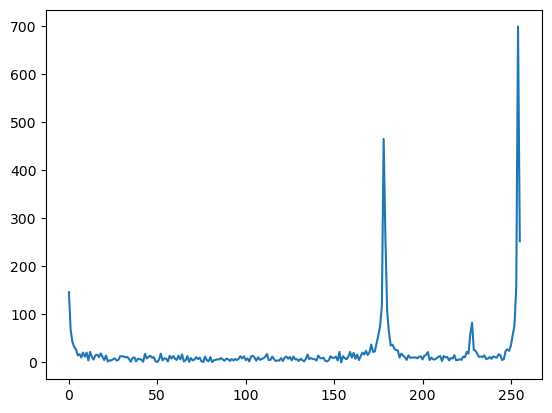

In [125]:
with open('scaling_changed_doppler-no_scal.bin', 'rb') as file:
    binary_data = file.read()
binary_data = binary_data[4:]

word_size_bytes = 4

# Calculate the number of words in the binary data
num_words = len(binary_data) // word_size_bytes
words = []
# Iterate over the words and convert them back to the correct byte order
for i in range(num_words):
    # Extract the word from the binary data
    start_index = i * word_size_bytes
    end_index = start_index + word_size_bytes
    word_bytes = binary_data[start_index:end_index]

    # Convert the byte order
    word = struct.unpack('<I', word_bytes)[0]  # '>' big-endian 
    words.append(word)
    # Print the word
    #print(hex(word))
    hex_string = hex(word)[2:]
    #print(hex_string.zfill(8))
#words = words[1:]
im = [to_16bit_signed_integer(wd>>16) for wd in words]
re = [to_16bit_signed_integer(wd & 0xffff) for wd in words]
mag_array = [0 for i in range(256)]   #####################################
for i in range(len(im)):
    mag_array[i] = (math.sqrt((im[i])**2 + (re[i])**2))

t = np.arange(0,256,1)              #####################################
fig,ax = plt.subplots()
ax.plot(t,mag_array)

In [10]:
len(mag_array)

64

In [134]:
print([hex(wd) for wd in words]) 

['0xf91d0000', '0xfb0008ff', '0xf7ffc8ff', '0x21ffd2ff', '0xbffe000', '0xfeffee00', '0xfe0001ff', '0x3ff', '0xff000000', '0xff0003ff', '0x4ff', '0x400', '0x1000400', '0x1000400', '0x1000300', '0x1000300', '0x1000300', '0x1000300', '0x1000200', '0x1000200', '0x1000100', '0x1000200', '0x100', '0x1000100', '0x100', '0x100', '0x100', '0x100', '0x100', '0x100', '0xff000100', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xff0001ff', '0xfe0002ff', '0xff0002ff', '0xfe0001ff', '0xff0002ff', '0xfe0001ff', '0xff0001ff', '0xff0002ff', '0xff0001ff', '0xfe0001ff', '0xff0001ff', '0xfe0001ff', '0xfe0001ff', '0xfe0001ff', '0xfd0001ff', '0xfd0001ff', '0xfc0001ff', '0xfc0001ff', '0xfc0002ff', '0xfb0003ff', '0xfb0003ff', '0xfb0004ff']


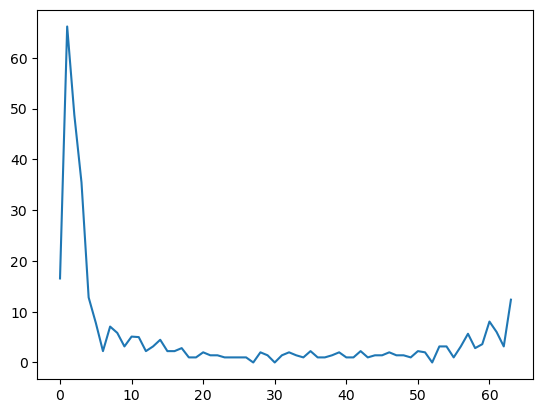

In [ ]:
import socket

UDP_IP = '0.0.0.0'  # zcuplus ip
UDP_PORT = 5001  # Specify the UDP port to listen on

packets = []  # wil be a 2D list

# Create a UDP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind((UDP_IP, UDP_PORT))
fillCnt = 0
while True:
    data, addr = sock.recvfrom(260) #packet reception
    word_array = []
    for i in range(64):
        tm_word = int.from_bytes(data[4*i:4*(i+1)], byteorder='little')
        word_array.append(tm_word)

    im = [to_16bit_signed_integer(wd>>16) for wd in word_array]
    re = [to_16bit_signed_integer(wd & 0xffff) for wd in word_array]
    mag_array = []
    for i in range(len(im)):
        mag_array.append(math.sqrt((im[i])**2 + (re[i])**2))
    packets[packet_index] = mag_array
    fillCnt = fillCnt + 1
    if(fillCnt == 256):
        break


In [ ]:
t = np.arange(0,64,1)
fig,ax = plt.subplots()
ax.plot(t,packets[1])

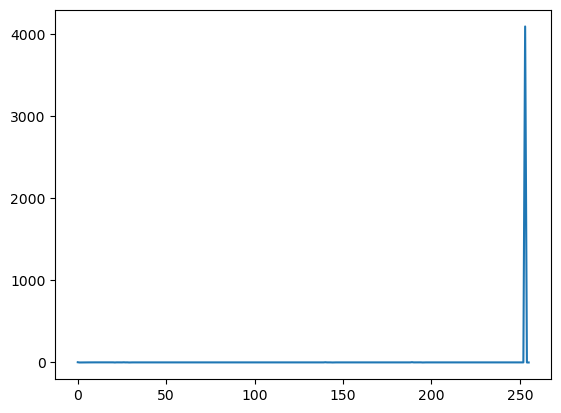

In [62]:
word_array = [0xfffefffe,0x00000000,0x00000000,0x0000ffff,0x0000ffff,0x00000000,0x0000ffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x00000000,0xffffffff,0x0000ffff,0x00000000,0x0000ffff,0xffff0002,0x0000ffff,0xffffffff,0x00000000,0xffff0000,0x0000ffff,0xffff0000,0x0000ffff,0xffff0000,0x0000ffff,0x00000000,0xffff0000,0xffffffff,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffff0000,0xffff0000,0x0000ffff,0xffff0000,0xffffffff,0x00000000,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0xffff0000,0x0000ffff,0x0000ffff,0xfffeffff,0x00000000,0x0000ffff,0x00000000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0x0000ffff,0xffffffff,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0xfffffffe,0x0000ffff,0xffffffff,0x00000000,0x0000ffff,0x00000000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0x0000ffff,0x0000ffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x00000000,0xffffffff,0x0000ffff,0xfffeffff,0xfffffffe,0xffffffff,0xffff0000,0xffff0000,0x0000ffff,0xffffffff,0xffff0000,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xfffefffe,0xffff0000,0xffffffff,0x0000ffff,0x00000000,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x00000000,0xffffffff,0x00000000,0xfffe0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffff0000,0x00000000,0xffffffff,0x00000000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0x0000ffff,0xffff0000,0x00000000,0x0000ffff,0x0000ffff,0xfffdfffe,0x0000ffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x00000000,0xffff0000,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xfffffffe,0x0000ffff,0x0000ffff,0x00000000,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffffffff,0x0000ffff,0x00000000,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0xffffffff,0xffffffff,0xffff0000,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0x0000ffff,0xffffffff,0xffffffff,0xffffffff,0x00000000,0xffff0000,0x00000000,0xfffeffff,0x0000ffff,0x00000000,0xffffffff,0xffff0000,0x0000ffff,0x00000000,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffffff,0xffffffff,0xffffffff,0x0000ffff,0x0000ffff,0xffffefff,0x00000000,0x00000000]
im = [to_16bit_signed_integer(wd>>16) for wd in word_array]
re = [to_16bit_signed_integer(wd & 0xffff) for wd in word_array]
mag_array = []
for i in range(len(im)):
    mag_array.append(math.sqrt((im[i])**2 + (re[i])**2))

t = np.arange(0,256,1)
fig,ax = plt.subplots()
ax.plot(t,mag_array)


In [ ]:
a = [0x40002,0xffc20005]

In [36]:
data_array =[[0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffdff,0xffffffff,0xffffffff,0xfff7ffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffff7f,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffbfeff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffdffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xdfffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffbff,0xffffffff,0xffffffff,0xff7fffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffdfff,0xefffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfeffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffdfff,0xffffffbf,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfeffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfbffffff,0xffffffff,0xffffffff,0xffffffff,0xfbffffff,0xffffff7f,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffbfffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xf7ffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfff7ffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffef,0xffffffff,0xffffffff,0xffffffef,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfbffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffeff,0x7ffffdff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xefffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xff7fffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff],
[0xffff,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0x0,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xfffefffe,0x0,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffff0002,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdfffe,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff],
[0xfffefffe,0xfffefffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffefffd,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xffff0000,0xffff0000,0xffff0001,0xffff0001,0xffff0001,0xffff0000,0x1,0xffff0001,0xffff0001,0xffff0002,0xffff0002,0x2,0x4,0x6,0x30010,0xfffaffeb,0xfffdfff9,0xfffefffc,0xfffefffd,0xfffefffe,0xfffefffe,0xfffefffe,0xfffffffe,0xfffffffe,0xfffeffff,0xffffffff,0xfffffffe,0xffffffff,0xfffffffe,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff],
[0xfffefffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff0000,0x0,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xfffe,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xffff0000,0xffff0001,0xffff0001,0xffff0001,0xffff0002,0xffff0002,0xffff0003,0xffff0005,0xe,0xfffeffee,0xfffefffa,0xfffffffd,0xfffffffd,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdfffe,0xfffeffff],
[0xfffefffd,0xfffefffd,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffffffe,0xffffffff,0xfffe,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0x0,0x1,0x1,0x10002,0x4000b,0xfffdfff9,0xfffefffd,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0001,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffe0000,0xfffe0000,0xfffe0000,0xffff0005,0xfffefffd],
[0xfffffffd,0xfffffffd,0xfffffffd,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xfffffffe,0xffffffff,0xffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xfffe,0xfffe,0xfffe,0xffff,0xffff,0xfffe,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xfffeffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffe0001,0xfffc0006,0xfffefffc],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffe,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xffff,0xffff,0xfffffffe,0xffff,0xfffe,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0x0,0x0,0xffff,0x0,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0x0,0x0,0x0,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xffffffff,0xfffe0000,0xffffffff,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffefffe,0xffff0000],
[0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xfffe,0xfffffffe,0xffff,0x0,0xffffffff,0xffffffff,0xfffe,0xffff,0xffffffff,0xffffffff,0xfffe,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffe0000,0xffffffff,0xfffeffff,0xffffffff,0xfffd0000,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffefffe,0xffff0000],
[0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xffff0000,0xfffeffff,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xfffe0000,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffefffe,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0x0,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0x0,0x0,0xffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffe0000,0xfffeffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffefffe,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0xffff,0xffff,0x0,0x0,0x0,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0x0,0x0,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x0,0xffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffff0000,0x0,0x0,0x0,0xffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xfffe0000,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xfffefffe,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffe,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xfffffffe,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0x0,0xffff,0xffff,0x0,0xffffffff,0x0,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xffffffff,0xfffefffe,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0x0,0x0,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0xffff,0xffffffff,0x0,0x0,0xffff0000,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff,0x0,0xffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0x0,0x0,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0x0,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff,0xffffffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff,0x0,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0xffff,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xfffeffff,0xffffffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0x0,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0x0,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xfffe0000,0xffffffff,0xffffffff,0xfffeffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffff0000,0x0,0xfffeffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xffff0000,0xfffeffff,0x0,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0xffffffff,0xffffffff,0x0,0xffff,0xfffffffe,0xfffffffe,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xfffe,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xffff,0xfffffffe,0xffff,0xffff,0xffff0000,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0xfffe,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xfffe,0xfffe,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0x0,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0x0,0xffff,0x0,0xffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0x0,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xfffeffff,0x0,0xffffffff,0xfffeffff,0xfffeffff,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0xffff,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0xffff,0x0,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffe0000,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xffff0000],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffff,0x0,0xffffffff,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0xfffe0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0x0,0xffffffff,0xfffe,0xffff,0x0,0xffffffff,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0x0,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xfffeffff,0xfffeffff,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xfffffffe,0xffffffff,0xfffe,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0x0,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0x0,0xffffffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xfffe,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0x0,0xffffffff,0x0,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xffff0000,0xfffe0000,0xffffffff,0xfffeffff,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffd,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff0000,0x0,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffffffff,0x0,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffe0000,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xfffe,0xffffffff,0xffffffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xfffe0000,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffe0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffe,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0x0,0xfffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xfffe,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0x0,0x0,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0x0,0xffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xfffe,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff0000,0x0,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0x0,0x0,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0xffff,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xfffe,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0xfffeffff,0xfffeffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xfffeffff,0xfffdffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xfffe,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0xffff,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xfffffffe,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffe,0xffffffff,0xfffe,0xffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0x0,0x0,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0xffff0000,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffff0000,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0x0,0xffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffdffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xfffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0x0,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xfffeffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffdffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xfffe,0xffffffff,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0xffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff0000,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffdffff,0xffff0000],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xfffe,0xffffffff,0xffff,0xffffffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xfffeffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xfffe,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff,0xffff,0x0,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff0000,0x0,0x0,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0x0,0x0,0x0,0xffff0000,0x0,0xffffffff,0x0,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xffff0000,0xfffeffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffff,0xffffffff,0x0,0xffffffff,0x0,0x0,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xfffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xfffe0000,0xfffe0000,0xfffe0000,0xffffffff,0xfffeffff,0xfffeffff,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xffffffff,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0xffff,0x0,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0x0,0xfffffffe,0xffffffff,0xfffe,0xffffffff,0xfffe,0xffffffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0x0,0x0,0x0,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffe0000,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xfffffffe,0xffff,0xffff,0x0,0xffffffff,0xffff,0xfffe,0xfffffffe,0xfffe,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffe0000,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0x0,0xffff,0xffffffff,0xfffe,0xfffffffe,0xffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffffffff,0x0,0xffff,0xffff0000,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xfffffffe,0xfffffffe,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xffffffff,0xfffe0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0xffffffff,0xfffe0000,0xffff0000,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xfffe,0xfffe,0xffff,0xfffffffe,0xffff,0xffff,0xfffe,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0xffff0000,0xfffeffff,0xffffffff,0xfffe0000,0xfffe0000,0xfffdffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xfffe,0xffff,0x0,0xffffffff,0xfffffffe,0xffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffff,0xffff,0x0,0x0,0xffffffff,0x0,0xffff0000,0x0,0x0,0x0,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0x0,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffe0000,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0xfffe,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffff,0xffff0000,0x0,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0xffffffff,0x0,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff0000,0x0,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xfffeffff,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffd0000,0xfffeffff],
[0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xfffffffe,0xffff,0xffff,0xfffe,0xfffe,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0x0,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xfffeffff,0x0,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffff0000,0xfffe0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffd0000,0xfffeffff],
[0xfffeffff,0xfffffffd,0xfffffffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xfffe,0xfffe,0xffffffff,0xffffffff,0xffff,0xfffe,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0x0,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xfffeffff,0x0,0x0,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdffff,0xfffeffff],
[0xfffeffff,0xfffffffd,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xfffe,0xffff,0xffff,0xfffe,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff0000,0x0,0xffff,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xfffeffff,0x0,0x0,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffcffff,0xfffeffff],
[0xfffffffe,0xfffffffd,0xfffffffe,0xffff,0xfffffffe,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xfffffffe,0xffff,0xffff,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x0,0xffff,0xffff,0x0,0xffffffff,0x0,0x0,0xffffffff,0xffff0000,0x0,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xfffeffff,0x0,0x0,0x0,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff,0xffff0000,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xfffeffff,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffcffff,0xfffeffff],
[0xffffffff,0xfffffffd,0xfffffffe,0xffff,0xfffffffe,0xfffffffe,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffffffff,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0x0,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff,0xfffffffe,0x0,0x0,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0x0,0x0,0x0,0xffff0000,0xffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0x0,0xffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffcffff,0xfffeffff],
[0xfffeffff,0xfffffffe,0xfffffffe,0xffff,0xffff,0xfffffffe,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0x0,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x0,0x0,0x0,0xffffffff,0xffff,0x0,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xfffefffe,0x0,0x0,0x0,0x0,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff,0xffff0000,0x0,0x0,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffe0000,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdffff,0xfffeffff],
[0xfffefffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffff,0xffff,0x0,0xffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0x0,0xffffffff,0x0,0xffff0000,0x0,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0xffff,0xffff0000,0x0,0x0,0xffff0000,0xffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xfffefffe,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffffffff,0xffff0000,0xffff,0xffff0000,0xffffffff,0x0,0x0,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xfffe0000,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xfffeffff,0xfffeffff,0xfffeffff,0xfffeffff,0xfffdffff,0xfffeffff]]

data_array = np.array(data_array)

In [126]:
data_array = [[0x200,0x8000,0x0,0x0,0x0,0x0,0x0,0x40000000,0x0,0x0,0x80000000,0x0,0x100,0x0,0xc,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x80000,0x0,0x2000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x10,0x0,0x0,0x0,0x200000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x20,0x0,0x0,0x108,0x0,0x0,0x400,0x0,0x0,0x0,0x0,0x20000,0x400000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x800000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x200,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x800,0x0,0x0,0x0,0x0,0x2000000,0x200000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x80000000,0x0,0x20,0x0,0x8000,0x100000,0x100000,0x0,0x0,0x0,0x0,0x8000000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x8000000,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x2000080,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x4000000,0x80,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0x0],
[0x230012,0x1e0008,0x250016,0x1c0005,0x220014,0x21000a,0x24000a,0x170010,0x14000b,0x1e0009,0x11000c,0x15000e,0x12000b,0x22000d,0x100010,0xa0012,0x1b0008,0x1a0005,0x1a0007,0x120009,0x1b000d,0x13000d,0xd0000,0x13000e,0x18000f,0x190006,0x1a0004,0x15fffc,0x100006,0xf000e,0x170004,0x15ffff,0x80004,0x14fff9,0x180000,0xd000b,0xf0005,0x1a000a,0x170004,0x15fffa,0xd0001,0x140007,0x60005,0xffffd,0xdfff6,0x160006,0x14fff9,0x100002,0x12ffff,0x170008,0x18ffff,0x9fff2,0xb0002,0xbfffd,0x90002,0x180006,0x40003,0xcfffe,0x80000,0x60001,0xcffff,0xafffc,0x120000,0xcfffc,0x100003,0xc0004,0xcfff7,0xdfffa,0x80002,0xbfffd,0xeffff,0x9fff8,0x9fff5,0xffff5,0x70004,0xd0001,0x7fffe,0x11fff4,0x14fff2,0xcfffa,0x4fffa,0xcfff3,0x7fffa,0xdffff,0xffff9,0x2fffc,0xdfffa,0xffffa,0x11fff5,0xefffa,0xd0000,0x60002,0x10fffc,0x1fffe,0xffff,0xaffff,0x7fffc,0xcfff5,0x14fff4,0x8fff9,0x7fff0,0x16fff9,0x11fff9,0x6ffed,0xcfff4,0x10fff2,0x7fff8,0x9fff5,0x4fff8,0x40001,0x9ffff,0x12fff1,0xefffa,0xefff3,0xffff8,0x5fffe,0x5fff7,0xfffe,0x5fff5,0x7fffa,0x6ffef,0xc0001,0x6fff7,0x6fffb,0x8fffd,0xefffb,0x6fff2,0x6fff3,0x8ffe8,0xfffefffa,0x8ffeb,0x5fff4,0x7ffea,0xfffcffed,0xbffee,0x12ffef,0xfffeffef,0x7fff4,0xffeb,0x3ffed,0x1fff0,0x6fff4,0x7fff3,0x4ffec,0x8ffec,0x3fff3,0xfff9ffea,0xcffee,0x2fff4,0x4ffea,0x2ffed,0xfffdffe8,0xfffcffed,0xfffdfff3,0x2ffea,0x1ffda,0x7ffe7,0xfffaffe5,0x2ffe8,0xfffcffde,0xfff6ffdf,0xffe2,0x1ffde,0xfff8ffd4,0xffe9ffd8,0xfff8ffdc,0xfff8ffc8,0xffefffca,0xfff0ffbf,0xffddffba,0xffe9ffa8,0xffd3ff90,0xffb6ff67,0xff7fff02,0xfe00fc50,0x11b01f1,0x7800bf,0x4c0068,0x360044,0x2f003c,0x28002b,0x230020,0x19001e,0x1e0018,0x180011,0x180009,0x150008,0x110003,0x1a0005,0x180006,0x110004,0x120003,0x100005,0xf0001,0x9fffa,0x8fffb,0xd0002,0x9fff2,0x12fffb,0x11fff0,0x8fff6,0xeffe9,0x7ffeb,0xaffef,0x4fff5,0xeffea,0xcffea,0xcffea,0xbffe5,0xeffe7,0xcffe0,0x3ffdc,0x3ffe1,0xdffcf,0xfffeffd7,0x3ffce,0x6ffc1,0x6ffbf,0x5ffab,0xfffaffa2,0xffffff85,0xfff4ff54,0xffe1fef3,0xff9bfcdf,0x7d03ec,0x36012a,0x2500bc,0x1d007a,0x1b0059,0xa0048,0xa0042,0x80032,0xd0031,0xe0027,0x21,0x70024,0x11,0xc0017,0x6001f,0x20016,0xfffb000b,0xfffc000f,0xfffefffc,0xffe90003,0xfff6fffa,0xffeafffc,0xffe7fff5,0xffcdfff2,0xffccffdf,0xff7affb1,0xfdabfe6b,0xed00a6,0x0,0x0,0x0,0x0],
[0xff15fe2b,0xffe3ff9f,0xffc6ff8e,0xffc6ff98,0xffceffa5,0xffcaff96,0xffc4ff88,0xffbfff98,0xffb7ffa6,0xffc9ff9a,0xffc0ffa9,0xffc7ffa5,0xffc3ffab,0xffc6ffa6,0xffc2ffb0,0xffc7ffb3,0xffbfffb2,0xffb9ffb4,0xffc4ffba,0xffc0ffb6,0xffc7ffba,0xffc0ffba,0xffcdffc3,0xffbfffbe,0xffbaffba,0xffc2ffb6,0xffc6ffc8,0xffccffc4,0xffc0ffc7,0xffc4ffcf,0xffc8ffcd,0xffc5ffc5,0xffc4ffd4,0xffbfffc7,0xffc1ffd0,0xffbdffd8,0xffceffd6,0xffc2ffd6,0xffc8ffd1,0xffceffdf,0xffcaffde,0xffcbffda,0xffc6ffdc,0xffbbffe0,0xffc8ffe0,0xffc2ffe6,0xffc7ffe6,0xffceffe5,0xffc1ffda,0xffcbffe7,0xffcaffef,0xffccffee,0xffd4ffe2,0xffc4ffe5,0xffc9ffea,0xffcfffe6,0xffc8ffe5,0xffd0ffe7,0xffc8fff9,0xffd0ffef,0xffc2fff6,0xffc8fff9,0xffcafff3,0xffbefff5,0xffcfffed,0xffcfffee,0xffc7ffed,0xffccfff5,0xffc8fff4,0xffccfff9,0xffcdffee,0xffccfff5,0xffc9fff8,0xffcdfff5,0xffcffff8,0xffc3fff9,0xffc1fff7,0xffc8fffb,0xffc9fffa,0xffc8fffe,0xffcdfff4,0xffc6fff9,0xffcc0002,0xffc8fffb,0xffbcfff6,0xffc1000a,0xffc80002,0xffd3fff9,0xffd20005,0xffc40004,0xffc6000a,0xffcdfffd,0xffcb000c,0xffccfff9,0xffd00006,0xffc80008,0xffd00006,0xffc10007,0xffc80000,0xffd10004,0xffc20009,0xffd20009,0xffd20009,0xffcf0008,0xffd10006,0xffcf000d,0xffcd0008,0xffd1000c,0xffc70013,0xffcd0010,0xffcf000b,0xffd1000f,0xffc7000d,0xffd1000d,0xffd00012,0xffd8000f,0xffd40019,0xffc80007,0xffd10013,0xffcf0018,0xffcc0021,0xffce0015,0xffc80018,0xffd1001f,0xffd0001f,0xffcd001a,0xffd7001a,0xffd80017,0xffd10017,0xffcf0022,0xffd3001b,0xffd00011,0xffc9001b,0xffcd001c,0xffd4001e,0xffc3001c,0xffd1001b,0xffcc0024,0xffd50016,0xffca001c,0xffd20024,0xffce001d,0xffca0020,0xffc3002b,0xffce0021,0xffd3002e,0xffc80027,0xffd30022,0xffce001d,0xffca002c,0xffc50029,0xffce0025,0xffcc001e,0xffd60026,0xffdc0031,0xffc6002a,0xffd1002e,0xffc6001e,0xffcd002a,0xffce002c,0xffd50029,0xffc30024,0xffce0021,0xffce0025,0xffc7002b,0xffcb0025,0xffcd001d,0xffcc0021,0xffd40026,0xffbd001f,0xffc3001d,0xffbb0015,0xffb6000b,0xffb4000a,0xffaeffed,0xffa3ffd3,0xff7fffa4,0xff3aff1c,0xfd75fb7c,0x123030f,0x5c016c,0x350112,0x2700e5,0x900cb,0x700b7,0x200b2,0x500b1,0xfffc00a7,0xfffa00a7,0xfff100a5,0xfff800a2,0x500aa,0xfffb00a9,0xfffd00a4,0xfffe00ad,0xffef00a5,0xfff300b3,0xfff400bf,0x100be,0xbe,0xfff900be,0xfffc00bf,0xfffe00cb,0xfff600dc,0x800dd,0x300dc,0x600eb,0x900fe,0x10010b,0x5011f,0xe0128,0x100133,0x120141,0x170156,0x200170,0x2e0192,0x2f01ad,0x3501d5,0x45020b,0x58023f,0x5d0291,0x7b02e8,0x980361,0xcc041e,0x10d0553,0x1870768,0x2970c0e,0x747219a,0xf697d56d,0xfcaff31b,0xfdf3f85f,0xfe84faa2,0xfec7fbd9,0xfeeffc9c,0xff18fd29,0xff28fd89,0xff35fdd9,0xff57fe06,0xff56fe3d,0xff5dfe6f,0xff74fe8f,0xff70fe9e,0xff6ffebe,0xff77fed3,0xff79fede,0xff7dfef9,0xff85fefc,0xff82ff0c,0xff7fff12,0xff7bff1d,0xff71ff18,0xff65ff25,0xff62ff0e,0xff21fee6,0xfd65fd57,0x770025],
[0xff8dfe89,0xfff0ffb7,0xffe3ffa2,0xffecffaa,0xffe5ffb0,0xffd9ff9f,0xffe4ffac,0xffe7ffa0,0xffd5ffad,0xffdeffb6,0xffdbffb4,0xffdbffb1,0xffd3ffb6,0xffd3ffb3,0xffd3ffbf,0xffcbffba,0xffd9ffc1,0xffd6ffb7,0xffd8ffc5,0xffd8ffb9,0xffd3ffca,0xffcdffbd,0xffd5ffc9,0xffd4ffc6,0xffd0ffc8,0xffd0ffc1,0xffd1ffcb,0xffd3ffc6,0xffd0ffd4,0xffd7ffc8,0xffdaffce,0xffd8ffcf,0xffdcffd5,0xffcdffd5,0xffd3ffd6,0xffd0ffd9,0xffd4ffd2,0xffcfffd5,0xffd0ffda,0xffd2ffda,0xffd1ffe0,0xffd5ffd8,0xffd3ffd8,0xffd6ffd1,0xffccffe0,0xffd9ffe8,0xffd4ffe6,0xffcfffe4,0xffddffe3,0xffdbffe9,0xffd0ffe4,0xffd2ffe5,0xffd3ffea,0xffd0ffe4,0xffd8ffe2,0xffd8ffef,0xffd3ffe2,0xffccffef,0xffd6ffee,0xffdaffea,0xffdaffe9,0xffd9ffeb,0xffd8ffed,0xffcefff1,0xffd8fff2,0xffd2fff2,0xffd5fff6,0xffd5fff1,0xffd9fff7,0xffd1fff4,0xffd1ffec,0xffdaffee,0xffcffff0,0xffd1fff9,0xffd6fff4,0xffd5fff9,0xffe1fff0,0xffdafff1,0xffd2ffec,0xffd1fffc,0xffdafff0,0xffd1fffc,0xffd4fff7,0xffd4fff8,0xffcfffff,0xffd4fff1,0xffd6fff7,0xffd1fff6,0xffd2fffa,0xffdafffc,0xffd2fffa,0xffd4fff6,0xffd9fffa,0xffd2ffff,0xffd80005,0xffd70003,0xffd5fffd,0xffd90006,0xffdc0009,0xffd70013,0xffd50009,0xffd3ffff,0xffd40003,0xffd70002,0xffce0006,0xffd90005,0xffda0005,0xffd1000c,0xffd00009,0xffce000b,0xffd30008,0xffd9000d,0xffda0002,0xffd40003,0xffdb0006,0xffdd0008,0xffe3000c,0xffca000b,0xffdc0006,0xffcc0012,0xffd90007,0xffd40013,0xffd0000e,0xffcb000c,0xffdc001c,0xffdb0019,0xffd5000b,0xffe20017,0xffdb000d,0xffdf0019,0xffd8000d,0xffd50013,0xffd60016,0xffd4000d,0xffdb0010,0xffd40015,0xffd50014,0xffd3001f,0xffd50014,0xffd9000e,0xffda0011,0xffd80018,0xffde0013,0xffd4001e,0xffd70012,0xffdd001b,0xffd70024,0xffda001f,0xffd40026,0xffd2001d,0xffe3001c,0xffd90024,0xffd4001c,0xffcd0024,0xffde001e,0xffd10021,0xffd2001a,0xffd4001d,0xffd80023,0xffcf001c,0xffcd0022,0xffcf002f,0xffcf0030,0xffd70027,0xffdd0022,0xffdc0019,0xffd70026,0xffd50026,0xffd60028,0xffd6001e,0xffd10023,0xffd9001e,0xffe1001b,0xffda0016,0xffd80013,0xffdd0000,0xffe4ffe6,0xffdbffa1,0x17fdbf,0xffcf0197,0xffd400cf,0xffe400a4,0xffcf0093,0xffd9008d,0xffd30080,0xffe50078,0xffce006c,0xffde0076,0xffd90072,0xffce0077,0xffe6007d,0xffda0075,0xffe4007c,0xffd50084,0xffda007d,0xffe40089,0xffd70080,0xffdc008a,0xffd70096,0xffe1008f,0xffdd0095,0xffe500a1,0xffe1009b,0xffda00a2,0xffe400a8,0xffe500b1,0xffd700b3,0xffda00c9,0xffe400d4,0xffea00e3,0xffe800ea,0xffe400fb,0xffe500ff,0xffeb010f,0xffe50126,0xfff4013e,0xfff7015c,0xffe70181,0xfff501a7,0xfff901de,0x7020e,0x6025b,0x1502c9,0x200370,0x340467,0x5a0610,0xa509f3,0x1dc1bc7,0xfd0fdcd6,0xfecff54a,0xff36f9b7,0xff5cfb80,0xff76fc89,0xff87fd36,0xff90fd9b,0xff99fde8,0xff92fe23,0xffa2fe42,0xff97fe89,0xffa8fea9,0xffabfebb,0xffa4fed1,0xffb8feea,0xffb4ff03,0xffadfefe,0xffb0ff14,0xffa7ff1b,0xffa5ff33,0xffb3ff36,0xff9dff38,0xff92ff33,0xff93ff2e,0xff84ff2e,0xff50feeb,0xfdc0fd15,0x80005e],
[0xff15fd19,0xff9dfec8,0xffb4ff1f,0xffb9ff3f,0xffc4ff6c,0xffc1ff79,0xffc8ff89,0xffc7ff9b,0xffbcffa9,0xffc3ffaf,0xffceffab,0xffd4ffb5,0xffd0ffbf,0xffc8ffbe,0xffd3ffc8,0xffd2ffc5,0xffd2ffd4,0xffd5ffd9,0xffd3ffd7,0xffd4ffd4,0xffc6ffdb,0xffcdffdb,0xffd7ffd0,0xffd3ffe2,0xffcbffe4,0xffd8ffe2,0xffe5ffe8,0xffdaffea,0xffd6ffe9,0xffd5ffed,0xffd3ffe9,0xffc9ffee,0xffd7ffec,0xffd9ffe9,0xffe0ffee,0xffd9fff1,0xffd4ffec,0xffd2fff3,0xffe2fff5,0xffd6fff1,0xffd5fff7,0xffd7fff5,0xffcafff1,0xffd7fff7,0xffd2fff4,0xffd8fff7,0xffe1fff9,0xffd90007,0xffdcfffc,0xffd2fffb,0xffd00001,0xffd70001,0xffd8fff9,0xffd80000,0xffd60000,0xffe00001,0xffdafffd,0xffde0000,0xffda0004,0xffdefffe,0xffe00001,0xffd6000b,0xffce0009,0xffe20015,0xffd3000b,0xffda0004,0xffdc0002,0xffdb000b,0xffda000d,0xffe1000f,0xffd9000a,0xffd20008,0xffd5000a,0xffd2000b,0xffdc0018,0xffda0006,0xffdf000f,0xffd80013,0xffd1000a,0xffe30011,0xffda000a,0xffd60013,0xffd90011,0xffd6000b,0xffdb001d,0xffdb0013,0xffe70015,0xffe10014,0xffda0009,0xffe2001a,0xffd9000c,0xffde0014,0xffdc000e,0xffe7000e,0xffe30017,0xffe20016,0xffdc0024,0xffde0019,0xffda001b,0xffd70016,0xffd8001d,0xffda0018,0xffe1001a,0xffe90019,0xffdd0016,0xffe7001f,0xffdf0024,0xffdd001c,0xffe9001c,0xffe30026,0xffe10023,0xffea001c,0xffe20023,0xffe00019,0xffe4001c,0xffde0024,0xffe60024,0xffe30020,0xffe40027,0xffe40027,0xffeb0032,0xffe4002b,0xffe1002c,0xffe60034,0xffe6002f,0xffe5002c,0xffe60032,0xffe2002e,0xfff5002d,0xffeb002f,0xffe3002b,0xffe7003e,0xfff40033,0xfff00041,0xfff00043,0xffe9003d,0xfff40040,0xffe70039,0xffef003e,0xffe70046,0xfff50040,0xfff0004c,0xfff2004f,0xffef0046,0xffef0046,0xffef004d,0xffe80053,0xfff20054,0xffef0055,0xffea0054,0xfff50063,0xffea0057,0xfff6005e,0xffff005e,0xfffc0065,0x67,0xfff70069,0x80072,0x1006b,0x100081,0xc007f,0x40093,0x70095,0x14009c,0x100095,0x1600aa,0x1b00c3,0x2300c0,0x2700d6,0x3a00e7,0x410107,0x520123,0x630151,0x750189,0xa101e3,0xd60276,0x1440362,0x24305e0,0x8f2164e,0xfae2f400,0xfde6fb52,0xfe9bfd2e,0xff00fdf3,0xff2bfe72,0xff47fec3,0xff62fef6,0xff71ff19,0xff7fff41,0xff8fff54,0xff94ff6a,0xff96ff7a,0xff94ff7f,0xffabff8b,0xffa1ff9f,0xffa7ffa3,0xffa4ffae,0xffb3ffb2,0xffb4ffb9,0xffb1ffc5,0xffbbffc6,0xffaeffcc,0xffbdffd4,0xffb5ffd9,0xffbeffe1,0xffc2ffdc,0xffbfffd9,0xffc8ffdd,0xffc6ffea,0xffc8ffea,0xffccffed,0xffc6fff7,0xffcbfff8,0xffc30000,0xffc0fff5,0xffd3fffe,0xffcc000e,0xffd70003,0xffd10008,0xffcc0015,0xffc6001d,0xffd50019,0xffd30025,0xffd3002c,0xffdf004a,0xffdf004b,0xffdb0072,0xfff100bc,0x2a0217,0xff53fd75,0xff94ff46,0xffb9ff95,0xffc0ffc0,0xffc5ffcf,0xffcaffdf,0xffc4ffe6,0xffc5ffe5,0xffd0fff4,0xffcfffe9,0xffcf0003,0xffc9000d,0xffd10015,0xffdd001a,0xffc5001c,0xffd30035,0xffda0033,0xffcc0044,0xffd8004f,0xffd7005c,0xffe20060,0xffdb0082,0xffd6009d,0xffe400db,0xfff90142,0x140249,0x1400af6,0xff42fbb8],
[0xffe1fcb9,0x3efe73,0x28fed4,0x20ff16,0x13ff4a,0x1bff51,0x17ff6f,0x7ff7f,0x7ff8e,0x7ff8f,0xffffff9e,0x9ffb0,0x6ffad,0xfff2ffb0,0xfff8ffbe,0xfff9ffba,0xfffbffc8,0xfff8ffc6,0xfff1ffc5,0xfff6ffc5,0xfff9ffd2,0xfff8ffd1,0xfff7ffce,0xfff7ffc8,0xfffeffdb,0xffdf,0xfffcffd7,0xfffeffd0,0xffefffd8,0xfffeffd5,0xfff7ffde,0xfffaffee,0xffedffea,0xfff3ffe3,0xfff9ffd6,0xfff1ffe4,0xfff7ffd9,0xfff6ffe4,0x3ffee,0xfffaffee,0xfffbffe5,0xfff8ffec,0xfff2ffe6,0xfffdffe5,0xffedffe4,0xfff4ffe0,0xfff9ffe7,0xfff3ffe8,0xfff7ffee,0xffeffff3,0xfff1ffee,0xfffafff7,0xffeafff0,0xffeffff2,0xfff6fff4,0xfff5ffe8,0xfff5fff0,0xfff1ffee,0xfff4fff3,0xfff6ffe5,0xfffcfff7,0xfff5ffef,0xffe6fff4,0xfff4ffeb,0xfff8fffc,0xffedfffc,0xffffffea,0xfff1fffb,0xffeffff6,0xfff6fff6,0xfff6fff2,0xfff4fffa,0xfff4fff4,0xffe8fffe,0xffeefff6,0xfffbfff6,0xffeafffd,0xfff5fffc,0xfffcfff7,0xffeafffa,0xfff5ffff,0xffe8fff5,0xfff0ffeb,0xfff1fff7,0xfff4fffa,0xfff9fff3,0xffedfff5,0xfffb0002,0xffeefffb,0xffeffff7,0xffecfff7,0xfff3fff7,0xfff30006,0xffe3fffc,0xfff5fffd,0xfff5fff8,0xffeffffa,0xfffafff8,0xffedfff2,0xffebfffd,0xfff80005,0xfffcfff7,0xfff2fff7,0xfff80001,0xffef0003,0xfff3ffff,0xfff2fffb,0xfff5fff3,0xfff2fffe,0xfff1fffa,0xfff4ffff,0xfff2fffa,0xfff80001,0xffed0003,0xffed0008,0xffed0003,0xfff3fffd,0xfff50005,0xfff4fffb,0xfff9fffc,0xffee0001,0xfff30006,0xfff4fffc,0xffeefffd,0xfffc000f,0xfff20006,0xfff50001,0xffefffff,0xfff9000b,0xfff10000,0xfff70001,0xffe9fffa,0xfff40008,0xfff60006,0xffed0001,0xfff80006,0xfff8ffff,0xfff00004,0xffeb0000,0xffec000a,0xfff5ffff,0xfff60007,0xffee0007,0xfff30009,0xfff10002,0xffef000a,0xfff70005,0xfff20009,0xfff2fffe,0xfff7000d,0xfff0fffb,0xffed000e,0xfff60003,0xffee000d,0xfff0000a,0xfff2000c,0xfff10010,0xffec0011,0xffec0011,0xfff6000d,0xfff40005,0xfff20012,0xfff5000b,0xfff20018,0xffee0013,0xffff0016,0x1000f,0xffee001b,0xfff10012,0xfffd001a,0xfffc000c,0xfff70023,0xfff9001d,0xfff90022,0xfff8001e,0x80029,0x9002e,0x33004c,0xd8010b,0xff6fff84,0xffc5ffd9,0xffccfff0,0xffd1fffb,0xffdafffa,0xffe10002,0xffe0ffff,0xffe0fffe,0xffe20009,0xffe3ffff,0xffea000a,0xffe80017,0xffed0007,0xffe6000c,0xffe7ffff,0xffe4000b,0xffdf000c,0xffe5000e,0xffeb000e,0xffe40008,0xffe70010,0xfff70016,0xffe3000d,0xffee0016,0xffeb000b,0xffe60019,0xfff60016,0xfff10017,0xffec0016,0xffec0021,0xfff40011,0xffef001a,0xffe1001e,0xffec001c,0xffeb0025,0xffea001c,0xfff0001b,0xfff10024,0xffec002b,0xffea002b,0xffe70030,0xffeb002c,0xffe90034,0xfff2003e,0xffed003b,0xfff60051,0xffff005e,0xfffe0087,0x28012d,0xff81fed1,0xffc6ffc5,0xffd4ffe7,0xffce0000,0xffd70011,0xffdf0011,0xffde001d,0xffd9001e,0xffd60028,0xfff00012,0xffd50032,0xffde003b,0xffd6003d,0xffcf003d,0xffdc0049,0xffd40053,0xffd0005d,0xffd60073,0xffc30078,0xffc60088,0xffc30093,0xffbb00bb,0xffb200ed,0xffe400db,0xfff90142,0x140249,0x1400af6,0xff42fbb8],
[0xff97ff41,0x19003f,0x16002d,0x50021,0x80017,0x160016,0x50012,0xb0008,0xfffa000e,0x13000b,0xd0008,0xe,0xfffd000d,0x10005,0x9000b,0xb,0xe0000,0x80006,0x60005,0x60004,0x3000b,0x80008,0x3,0xfffb0002,0x2ffff,0x160005,0x90000,0xffff0002,0x10005,0xfffe0001,0x7,0x2000b,0x7000e,0xfff40003,0xc0006,0x20009,0x8fffb,0xfffdfffa,0xfff90006,0xb000b,0x70001,0xa,0x6fffa,0x9fffd,0x60007,0x50002,0x30000,0xfffc000b,0xfffe0007,0xfffeffff,0x40007,0xfffffff9,0x5fffc,0x6ffff,0xcfff8,0x80002,0x130000,0x90002,0x70007,0x50001,0xfff9000b,0xfffb0006,0x20003,0xfffc0010,0x70005,0x2ffff,0x40004,0x30007,0x80004,0x50001,0xfff9fffe,0xa0004,0x2fffb,0xfffa0008,0x90003,0x80006,0xe0004,0x60006,0xffff0006,0xfffe0004,0x30008,0xfffe,0x40009,0x70000,0x4000d,0xfffefff4,0x40003,0xfff4fffc,0x10004,0xfffe0006,0xfffa0002,0xfffd0003,0x80005,0xfffb,0x90005,0x6fff9,0x30003,0x90005,0x3,0xffff0003,0x40005,0x2,0x40006,0xffff0002,0xfffa0007,0x20001,0xfffffffc,0xfff3fffd,0x5,0x70002,0x6fffe,0x20001,0x6fffc,0xfffffff8,0xcfffe,0xfff80003,0x4ffff,0xfffb0003,0x60003,0x20002,0x20009,0x2000d,0x80003,0x9ffff,0xfffa0000,0x2fffd,0x20005,0x20003,0x7fffd,0x3fffd,0x5,0x80003,0xffff0001,0x4fffe,0x1000b,0x10007,0x9fffa,0x30007,0x10006,0xfffdfffb,0xfffafffc,0x9fff9,0xffff0001,0xffff0005,0xafffe,0xf000d,0x4fff2,0xfffefffb,0x5fffa,0xffff0002,0x8fffd,0xfffd0000,0x30002,0x1fffb,0x6fff8,0x60001,0xfffcfff8,0x2ffff,0xffff0005,0xdfffa,0x4fffd,0xfffdfffd,0x3fffd,0xfffdfff9,0x5fffc,0x8fff4,0xbfffd,0xfffd0000,0x10fff3,0x6fff5,0x50001,0xfffffffd,0xafffc,0x8fff2,0xdfff9,0x11ffe6,0x18ffeb,0x27ffdb,0x83ff6c,0xffb80053,0xffee001d,0xffeb0015,0xffed0018,0xfff4000b,0xfffb0006,0xfffa000b,0xfffc0003,0xfff30007,0xfff6000d,0xfffe0008,0xffff0005,0xfff70005,0xfffb0001,0x10007,0x50008,0x20003,0xfffb0002,0x70009,0xfff70003,0xf,0xfffd0003,0xfffb0004,0xfffe0011,0xfffcffff,0x4000d,0x60003,0xc0008,0xfffefffe,0xfffb0004,0x70009,0xfff8000f,0xffff0008,0x3fff4,0xfff90003,0x2000b,0xa0008,0xfffc0009,0x50009,0x2000c,0x50004,0xa000c,0xfffa0013,0xfffe0009,0x10010,0x110014,0x50021,0x170035,0x3900a1,0xffa8ff1e,0xffdaffb3,0xfff0ffde,0xffefffde,0xfff0ffe8,0xfff7ffeb,0xfffbffe3,0xffeffff7,0xfff2ffeb,0x16ffdc,0xffedfff3,0xfff7ffe9,0xfffbffec,0xfff7ffeb,0xfff4ffed,0xffffffe8,0xfff8ffee,0xfff6ffe8,0xfff7ffeb,0xfff5ffdc,0xfff2ffdc,0xffedffe0,0xffeeffcd,0xffefffc0,0xffebffa9,0xffdaff5b,0xff5bfd1c,0x21011b],
[0xffbdff5e,0xc0048,0xfffe002c,0x60025,0x6002f,0x4000d,0x10016,0x100011,0x50015,0xc0007,0x120005,0xb000d,0xc0010,0x80008,0xfffc0012,0x70008,0x30012,0xe0007,0x9000e,0x3000e,0x20001,0x80006,0x20002,0x8000c,0x60004,0x60007,0x90009,0xfffd0007,0xfffc0000,0xe000f,0x20014,0x10002,0xd000a,0x70009,0xfffa0003,0x20004,0x10006,0xffff0000,0x1,0x60012,0x3000a,0x3000b,0x20000,0x8,0x60005,0x60005,0xaffff,0xfffa0007,0xffff0007,0x60001,0x40005,0x4fffd,0xffff000a,0xfffd0008,0xa0006,0x5000a,0xf0005,0xf000b,0xfff6,0x6ffff,0xb0000,0x4,0xfff9fffc,0x30006,0xfff80009,0x40007,0xffff0004,0x7000d,0x4fff9,0x3fffe,0xfffffffc,0x80002,0x70002,0x10009,0x7fffe,0x20001,0x60007,0xfffefffb,0xfffc,0x40000,0x5,0xffff0002,0xfffc0004,0xfffd,0xa0000,0x2fffd,0x40000,0x80003,0xa0004,0x20001,0x5ffff,0xaffff,0x20003,0x10003,0xfffb0007,0xfffbffff,0xcfffc,0xfffc0008,0x7fffc,0x60002,0xfffe000c,0x1fff9,0xafff7,0x2fffe,0x30007,0x30003,0xfffefff7,0xcfffa,0x4fffe,0xfffe0000,0xfff60000,0x40004,0x60002,0xafffa,0xfff80004,0xc0004,0x90008,0xffff,0x30002,0xfffb0004,0x3fffa,0x30006,0x4fff9,0xfffc000b,0x20002,0x7fff5,0x7fffe,0x70008,0x90000,0xb0006,0x9fff7,0x80003,0x5000e,0x7fff7,0x9fffd,0x6fff9,0x50007,0x10000,0xfffbfff6,0x1fff8,0x20006,0x7fffb,0xd0007,0x30000,0x5fff9,0x90000,0x6fff1,0x40004,0x2fffb,0xfffdffff,0x30000,0x7fff7,0x1fffc,0x50001,0x3ffff,0x4fff1,0x13fffe,0x40002,0x9fffd,0x5fff5,0x6fffd,0x3fffa,0x3fff2,0x9fffb,0x8fff2,0x60000,0x3ffff,0x2fff7,0x4fff0,0x1ffec,0x5fff3,0xeffec,0x12ffe6,0xdffed,0x12ffdc,0xaffe0,0x1affd0,0x24ffb1,0x7ffedd,0xffba00b2,0xffe00044,0xfff4002a,0xfff2000d,0xfff40019,0xfff90018,0xfff40011,0xfff8000f,0xfffd0019,0x7000e,0x10006,0x30000,0xfff3000e,0x2000d,0xfffe0001,0x1000b,0x1000a,0xfffe0009,0x9,0x2000c,0x10007,0x60001,0xfff8000b,0xfffb000a,0x1000c,0x30006,0xfffafff7,0xfff90005,0x50003,0x60002,0xfffc0009,0xfff80001,0x40003,0x40009,0xfffb0011,0xfffd0000,0xfffc0005,0xd0006,0x60009,0x11000b,0x4000b,0x60005,0xc000b,0x80007,0x80008,0xffff000f,0x11000f,0x1b001d,0x39006a,0xffb7ff6a,0xffe8ffd2,0xffedffdf,0xffe9ffe7,0xfff8fff2,0xfffbffed,0xfff6ffec,0xfffdfffc,0xfffbffe6,0x38ffd0,0xfff1fff7,0xfffefff8,0xffffffe9,0xfffefff2,0xffffffed,0xfffbfff3,0xffffffec,0xfff5ffea,0xfff6ffe9,0xfffeffef,0xffffffdf,0xfff1ffe0,0xffe7ffd5,0xffefffc0,0xffebffa9,0xffdaff5b,0xff5bfd1c,0x21011b],
[0xffbfff73,0x5003e,0xfffe002a,0x40019,0x70029,0x10019,0x3000f,0x80009,0xffff0019,0x30012,0x9000b,0xf000b,0x10011,0x30003,0x8000d,0xfffd000f,0xfffe000a,0xffff000a,0xfffe0006,0x10008,0x9,0x8000c,0x9fffc,0x90009,0xfffc0003,0x4,0xa000c,0xa0005,0x80009,0x4000b,0x10005,0xffff0003,0x90002,0x50002,0xffff0009,0x40008,0xfffd0006,0x40008,0xc0009,0x5fffc,0xc0010,0x100008,0xffff0009,0xdfffb,0x30002,0xa0002,0x9ffff,0xc0008,0xffff,0x9000a,0x7ffff,0x4fffe,0x3fffe,0xdfffd,0xeffff,0x30007,0xfffe0001,0x80000,0x7,0xc0002,0xfff80003,0x30004,0x4000c,0x70003,0x2000e,0xfffdffff,0xfff90002,0x30007,0x60001,0xfffe0007,0xfffc0008,0x10008,0xfffefffe,0x6fffd,0xffff000c,0x9,0xfff5fffe,0xfffd0002,0xfffe000e,0xdfff9,0x1fffe,0xfffa0000,0x40001,0xfff50000,0x7ffff,0x5fffb,0xd0006,0xa0002,0xc0006,0x30007,0xfffd0006,0xa0000,0x4fffb,0xd0005,0xfff90003,0xa0000,0x2,0x90003,0x7fff9,0x20002,0x10008,0xc0000,0xfffd0002,0xfff4,0xd0002,0x4fffe,0x60003,0x80006,0xfffd0003,0xffff0009,0xfffcfffe,0x3fffb,0xfffe0000,0xfffcfffb,0xc0003,0x70005,0x20009,0x3000e,0x2000e,0x7fffb,0x1fff6,0x6fff9,0xbfffb,0x2fff5,0xfffc0006,0x3fffa,0xbfff6,0xffff0005,0x30005,0xdfffc,0xafff6,0x20002,0x70004,0xfffd0008,0xbfffd,0xfffd0005,0x2fff9,0x6fffe,0xfffcfffd,0x10004,0x60004,0x30004,0x140002,0x9fffd,0xbffff,0x90004,0x50002,0x6fff3,0xfffc0000,0x4fffb,0xfffbfffa,0x2fff7,0x3ffff,0x5fffe,0x7ffff,0x6fff6,0x8fffe,0xb0000,0x8fffb,0x2fffc,0xa0003,0x9fffd,0x9fff2,0x2fffc,0xfff1,0x7fff1,0xfffbfff7,0x6ffef,0xbfff3,0xffff3,0x10ffed,0x9fff0,0xafff2,0xeffed,0x12ffe6,0x1affde,0x1fffcd,0x2bffab,0x9afe8d,0xffa900c3,0xffe80053,0xfff50039,0xfff20026,0xfffe0021,0xfff50022,0xfff80010,0xfff70017,0x30012,0xffff000e,0xfffa000f,0xfff3000a,0xfffa0010,0x80006,0xfff30005,0x5000d,0x10007,0xfffefffc,0xfffe0001,0x50007,0x4,0xffff000a,0xffff0009,0xa0007,0x20006,0x7000f,0x3000c,0x1fffe,0x30001,0xb0007,0xfff80001,0x30005,0x20007,0xffff0012,0x60008,0x6000c,0xfffe0008,0x40006,0xfffe0009,0x13fff5,0x3,0x60004,0xfffe000f,0xfff90003,0xfffbffff,0x7000c,0x70018,0xb0017,0x320049,0xffb4ff97,0xffdfffe0,0xffeeffe8,0xfff3fff3,0xffeffff9,0xfff7fff5,0xfff5fff5,0xfff8fff9,0xffe10006,0xfc8001a6,0x27ffde,0x15ffe9,0x2fff2,0xaffea,0x9ffeb,0xfffaffe4,0x2ffeb,0xfff9ffea,0xfff8ffe8,0x3ffeb,0xffffffe2,0xfffbffe1,0xfff8ffd9,0xfff2ffc2,0xfff7ffa3,0xffe9ff55,0xffbcfd22,0xa010a],
[0xffa2ffa4,0xfff7004c,0xfff0002f,0xfffd001b,0x70023,0x70019,0x2000a,0x10018,0xffff0010,0xfffc000d,0x8000f,0x9000a,0x1000c,0x60008,0x70005,0x2000c,0xc,0xffff0012,0x50014,0xfffa0014,0xffff0011,0x2000c,0xffff0002,0xc0005,0xffff0009,0x70010,0x60009,0xfffd0006,0x3000f,0x90007,0xffff000e,0x40002,0x1000c,0x5000c,0x5fffe,0x7000e,0x70001,0xfffd0005,0x50003,0x10002,0x9000b,0x40005,0x10007,0x60003,0xb0003,0xe0009,0xffff0004,0x4fffb,0xffff0009,0x40003,0xfffdfff9,0x60002,0x20002,0x2fffd,0x70006,0xfffe0007,0x50010,0x90004,0x80004,0xbfffb,0x90000,0xfffd0004,0xa0003,0x10003,0x1fffb,0xb000f,0x8,0x60003,0x50001,0x40002,0xfff80003,0xc0000,0x40007,0xfff90007,0xafff9,0x6000e,0x30002,0x70002,0x4,0x70003,0xfff90003,0x9fff0,0xfffc0001,0x4fffa,0xfffd0000,0xfffbfff8,0xb0007,0x60002,0x2fffe,0x50003,0xfffefffb,0x20001,0xffff0007,0x7,0x50000,0x10005,0x50002,0x6,0x10001,0x90005,0x10007,0xfff6,0xfffc0006,0x8fffa,0x8fffb,0x30003,0xfffdfffe,0x10ffff,0x6fffe,0x4fffa,0x60007,0x9fffe,0xfffc0002,0x30005,0x2fffe,0x40004,0x3fffc,0x20001,0x40002,0x1fffd,0xfffe0001,0x1,0x7ffff,0x70004,0x20002,0xafffc,0x7fffb,0x0,0xc0000,0xd0001,0x60004,0xfffb0006,0xfff80000,0x6fffd,0x1fffe,0xb0008,0x60004,0x3fffa,0x30002,0xfffb0007,0x70002,0x1fffb,0xb0005,0x6fffd,0xfffd,0xfffefffe,0x10001,0xfffcfffd,0xfffc0004,0x8fff7,0xfffafffb,0x2fffc,0x2fffb,0xfff80009,0xdfffc,0xefff7,0x4fff2,0xfff7,0xfffcfff8,0x3fff7,0x2fffd,0x5fffd,0xfffd0000,0xafffe,0x3fff6,0x40003,0x9fff6,0x4fff4,0x1afff2,0xbffef,0xaffe5,0x3fff2,0xaffec,0x1fffed,0xeffe0,0x18ffd3,0x20ffc4,0x32ff97,0xb5fe71,0xffa000d1,0xffdd0058,0xffda0033,0xfff70028,0xfff4001f,0x30017,0xfff6001b,0xfffb000c,0xfff7000b,0xfffe0015,0xffff0007,0x20002,0xffff0017,0x90009,0xfffc0006,0x10,0xfffc000b,0x2000f,0x6,0x40003,0xfffd0006,0x5000f,0xfffbfffc,0x2000c,0x50008,0xa000a,0xfffc000d,0xd0000,0x70005,0xafffe,0xfffc000a,0x40004,0x50008,0x7000a,0xfffd0003,0x60009,0x7fffb,0x70003,0x20006,0x9000a,0xfff50001,0x90002,0xfff9fffe,0x20004,0xafff8,0xf0003,0x11000f,0xb0017,0x310031,0xffbbffb0,0xffe1ffdc,0xfff8fffb,0xfffdfffb,0xfff8fff7,0xfff8fffe,0xfffafff1,0x2fff7,0xfff30005,0xff71ffe1,0xfff7,0x2fffa,0xfffffffb,0x1fff8,0x6ffee,0x9fff7,0xfff9ffeb,0xffe9,0x4fffa,0xfff7fff2,0x1ffdb,0xffffffe3,0xfff7ffd7,0xfff9ffc8,0x2ffb2,0x1ff63,0x1bfd45,0xffe600fb],
[0xffa8ff8b,0xffed0041,0xffef0027,0xfff4001e,0xfff30018,0xfff5000a,0x70010,0xfffd000a,0xfff80013,0x5000b,0xf000e,0xfffc0001,0xfffd0016,0x6000a,0xffff0006,0xfffa000e,0x20010,0xfff60005,0x13,0xffff000c,0x30004,0x3000e,0xfffe,0x20004,0xffff0004,0x10007,0x50007,0xffff0004,0xfffe0005,0xfff70009,0xb0007,0x3000c,0x60009,0x4000b,0x40006,0x10001,0x90002,0x60009,0x2ffff,0x60005,0x7,0xfffa,0x10001,0xfff80010,0xfffe0008,0x6000a,0xe0001,0x9fffc,0xa0005,0x20001,0xffff,0x60001,0xd000d,0xfffe0004,0xfffd0008,0x50006,0x20001,0x7000c,0x8fffe,0x9000a,0x70004,0x50001,0xfffe000e,0xfffafffe,0xfffb0010,0x20001,0x30003,0x3000d,0x1ffff,0x60007,0x3fffd,0x20006,0xfff50001,0x10007,0x60008,0x2ffff,0x10000,0xfffe000c,0x30004,0x1fffe,0x5000a,0x1,0x2fffc,0x20005,0x60003,0x6,0x9fffe,0x40005,0x2fffd,0x60005,0x7ffff,0xffff0003,0xffff0007,0x3fffd,0x7fffe,0x5ffff,0x60005,0xd0002,0x60006,0x9fff7,0x50000,0x6fffa,0x2ffff,0xbfffa,0xd0005,0x50009,0x2fffd,0x60009,0x40004,0xfffffff9,0x40008,0xbfffc,0x110005,0xfffb0001,0x5fffe,0xcfffe,0x70000,0x20002,0xfffcfffe,0xfffc,0x90000,0x30000,0xaffff,0xa0007,0x5fffa,0x7fff7,0xfffcfffe,0xc0002,0x6ffff,0x70000,0x3ffff,0x5fffa,0xfffb,0x2ffff,0x4fffa,0xffff9,0x7ffff,0x9ffff,0x5fffb,0x70000,0x4ffff,0xdfffa,0x5fff8,0x6fffa,0xa0000,0x3ffff,0xffff0002,0x50000,0xdfffe,0x4fff7,0x90003,0xfff6fff9,0xfffc,0x13fff5,0x0,0xfffffff3,0x4fff8,0x60003,0xfff4,0x6ffeb,0x1fff6,0x3ffec,0x70003,0xbfff4,0x1fffb,0xbfff9,0xaffee,0x9fff2,0x13fff1,0x7fff2,0x8ffec,0xfffde,0x11fff2,0xdffed,0x13ffdd,0x1fffd1,0x2affc1,0x36ff97,0xe0fe68,0xff7e00df,0xffcd005d,0xfff0003d,0xffef001f,0xfffe0025,0xfff7001c,0xfff50017,0xfffd0019,0x2000a,0xfffc0012,0xfffd000e,0xfffa0009,0xfffb0002,0xfffb000e,0xfffc0009,0x50009,0x2000a,0xfff60004,0x50007,0x4000b,0x90009,0xfffa0002,0xfffb000d,0xfff10005,0xfff40012,0x50001,0xfffe000a,0xfffb0004,0x50004,0x40008,0x1000c,0xa0009,0x30001,0x4000d,0x70008,0x80008,0x20004,0x90002,0x80001,0x2000f,0xfffe0004,0x50002,0x70001,0x50002,0x1000c,0x5000a,0x12000d,0x110007,0x2e0026,0xffbcffd1,0xffecffef,0xfff0ffee,0xfff0fff9,0xfff5fffd,0xfffafff5,0xfffffff5,0xfff9fff3,0xfff9,0xfff80002,0xfffdfff5,0x3fff9,0x9fff7,0xfffffff5,0x1fff6,0x3ffef,0xfff1,0xfffffffb,0xfffefff9,0x4ffe8,0x4ffe5,0x3ffe8,0xfffeffdc,0xfff9ffc8,0x2ffb2,0x1ff63,0x1bfd45,0xffe600fb],
[0xffacff8c,0xfff1003f,0xffe50024,0xfff00016,0xfff9001f,0xfff40012,0xfff7000c,0xffed000e,0xfff50019,0xfffe000f,0x10,0x10000e,0xfff6000c,0x90010,0xfffc0016,0xfff70017,0x60011,0xffff0006,0xffff000f,0xfffe0007,0xfff70009,0xffee000b,0x20003,0x80003,0x50000,0xfffe0008,0xfffe0009,0x50009,0x9,0xfffc0007,0x6,0xfffe0002,0xfffa0009,0x60005,0x30006,0xe0001,0x8,0xfffd000a,0xfffd0001,0x2,0x50003,0x90000,0xffff0006,0x0,0x9fffd,0xcfffc,0xfffe0015,0x120005,0x30009,0xfffd0001,0xfffa000b,0x10001,0x30009,0xfffc0006,0x1fffc,0xffff000a,0x5000d,0x90008,0x7fff8,0x7000a,0x20001,0x4ffff,0xfff8000c,0x30008,0x50005,0x20001,0xfffe0005,0xfffefffc,0xfffe000d,0xfffe0002,0x30001,0xfffc0008,0x8000d,0xffff0007,0x5000f,0x70006,0x60001,0x10004,0x40008,0xfff90003,0xfffc0002,0x40001,0x50001,0x4ffff,0x20001,0x40001,0x60000,0xfff90006,0x4,0xfffe0000,0x7fffc,0x70003,0x10009,0x70006,0xfffd,0x60002,0x11fffb,0x9fffb,0xfff7fffe,0xfffd0005,0x5,0xafffe,0x7fffc,0xa0006,0xfffa,0x100006,0x30004,0xfffbfffa,0x60001,0x90004,0xe0003,0x8fffd,0x3fffd,0xafffe,0xfffffffa,0x4fffe,0x2ffff,0xafffb,0x70000,0x2fffe,0x7fffd,0xfffc0000,0xfffd0009,0x10000,0xc0005,0xffff000b,0xfffefffc,0x8,0x40002,0x5fffc,0x5fff9,0x2fffd,0x80004,0x60005,0xfffefffd,0x50002,0xb0005,0x40003,0x7fff4,0xffff6,0x70008,0x80001,0xfffdfffd,0x1fffe,0x2,0xafffa,0xfffd0009,0x8fff4,0x6ffff,0x70005,0xfffffffa,0x12fff5,0xfffffffb,0x9fff6,0x20000,0xfff8,0xaffff,0xafff9,0xd0004,0x7fff8,0x7fffa,0x4fff6,0xe0002,0x7ffeb,0x7fff7,0xfff6,0xffff7,0xeffed,0xcfff0,0x11ffef,0xcffed,0xfffe4,0x15ffe6,0xfffe9,0x17ffe9,0x17ffdf,0x29ffc3,0x4fff9d,0xfcfe71,0xff7b00d6,0xffd00054,0xffec0034,0xffeb0029,0xffef001f,0xfff20018,0xfffa0012,0xfff00010,0xfffa0008,0xfff8000b,0xfff6000c,0x30007,0xffff0007,0xfffb0005,0xfffe000f,0x6ffff,0xfffe000c,0x6000a,0xfffa0009,0xfffe000c,0xfffd0002,0x20003,0x6000d,0xfffb0004,0x7,0x30009,0x1,0x60004,0x1fffe,0x7fffd,0x20008,0x10009,0x10001,0xd,0x50002,0xfff70005,0x40008,0xa000f,0xfffa0004,0xfffb0009,0xfffefffe,0xffff0009,0xa0008,0x50007,0x8000f,0xc0010,0x100009,0x16000d,0x35001d,0xffb4ffd6,0xfff4fff1,0xfff4fffa,0xfffafff9,0xfffdfff5,0xfffffffe,0xfffcffff,0xfff4fff8,0xfffefffa,0xffff000a,0x4fff9,0x8fff5,0x4fffa,0x5fff2,0xfffefff4,0x3fff9,0x2fffa,0x1ffed,0x3fff5,0xfffdfffb,0xfffbfff0,0xfff7ffe0,0xbffe5,0x4ffd4,0x18ffba,0x1dff84,0xaefdbb,0xffac00e3],
[0xff9effa0,0xffde002d,0xffed0020,0xffee0014,0xfff10019,0xfffd0018,0xfff80007,0xfff50010,0xfff8000e,0xfffb0005,0xfffb000a,0xffff000c,0xfff20009,0xfffc0005,0x60006,0xfff70009,0xfffe0007,0xfffd000e,0x60000,0xfffd0003,0xffff000f,0xfff70006,0xfffd0006,0xfff7fffa,0xfffd0006,0x50006,0x5000a,0xfffdfffc,0x5000e,0x90000,0xfffa0002,0x90002,0xfffe0010,0xfffffffd,0x80006,0x20006,0xfff80005,0x20003,0xfff9fffd,0x4000b,0x20006,0xa0004,0x80004,0xa000b,0xfffc0009,0x4000b,0x80009,0xfffb0000,0x80003,0xfffc0004,0x1000f,0xfffdfffd,0x60004,0xdfffe,0x3fffc,0x80004,0xfff90001,0x10001,0xfffd0004,0x70005,0x40006,0x90004,0xfffc0000,0xfff50002,0xfffbfffd,0x3,0xfffffffa,0xbfffc,0xfffa0007,0x20004,0xfffa0008,0xfff9fffc,0x40009,0x10002,0xfffe0003,0x4fffb,0x30008,0x40003,0x90002,0x40001,0x90002,0xfff9000b,0x6000b,0x40005,0x9ffff,0x60003,0x30007,0xfffd0009,0x50007,0x30003,0x20003,0xfffd0004,0x10007,0xa0004,0xfff7fffd,0xfff7fff3,0xfffd0001,0x60002,0x3fff7,0x60003,0x60006,0xfffc0002,0xfffefff5,0x30002,0x30004,0x3000b,0xfffb0002,0x6,0x4ffff,0xfffb,0x10fffe,0x1fffc,0xefffc,0x7000a,0xfff4fffe,0xfff9,0xfffd0004,0xfffd0004,0x110000,0x4fff6,0x50002,0x10002,0x40009,0xfffe000a,0xd000b,0x50005,0x1fff7,0x20006,0x4fffc,0xfffe0009,0xfffeffff,0x40000,0x6fffb,0x10009,0xfffffffe,0xafff8,0xfffcfff8,0x20003,0xfff90001,0x9fffb,0x50004,0xb0001,0xcfffb,0x5fffe,0x3fffb,0x3fffe,0x1,0xd0002,0xfffdffff,0xefff9,0x30006,0x10fffd,0x6ffff,0xfff2,0x5fff2,0x5fffc,0xbfffe,0xfffdfff8,0x9fff7,0x10003,0x110001,0x6fff6,0xcfff1,0xffff6,0x4fff9,0x1fff1,0x9fff7,0x15fff6,0x15fff3,0xaffef,0x13fff2,0x10ffeb,0xefff4,0x19ffe7,0x1dffeb,0x24ffda,0x32ffc5,0x44ffa4,0x11bfe93,0xff6100d8,0xffc10051,0xffd70036,0xfff50032,0xffe8001e,0xfff70016,0xfff30012,0xfff10010,0xfff0000a,0xe,0xfff80012,0x1000c,0xfff90011,0xfffb0007,0x2000d,0x6,0x10007,0xa0007,0x30002,0x90001,0xfff70007,0xa0007,0xc,0xfff90005,0xfffe0004,0x7000d,0x0,0xfff7000f,0x6fffd,0xfffe,0x10007,0x2000a,0x50015,0x90005,0x30003,0xffff0008,0x20003,0x7ffff,0x3fff8,0x2ffff,0xbfff7,0x60007,0x6fffe,0xc0000,0x90006,0x12fffc,0xa0006,0x10000c,0x370017,0xffbdffe9,0xfff30001,0xfff6fff6,0xfff5fffb,0xfffcfffc,0xfff70004,0xfff9fffa,0xfffc0003,0x8fffb,0xd0008,0x20000,0x2fffb,0x2fff6,0xfffb0001,0x2fff3,0x3fff9,0x6fff5,0x1fff6,0x6fff1,0xafff1,0x5ffec,0x5fff1,0x8fff1,0x1ffd1,0x11ffbf,0x31ff8c,0xe4fdf3,0xff9d00c1],
[0xff75ffb0,0xffd70019,0xffe40013,0xffee000f,0xffeb0011,0xffeb000e,0xfffb000a,0xfff6000a,0xfff5000c,0xffffffff,0x2,0xfffb000c,0xfffc000a,0xfffd,0xfffd0001,0x2fffe,0xffff0003,0xfff30007,0xfffaffff,0xfffa0005,0xfffb0003,0x0,0x1,0xfffb0000,0xfffbfffb,0xfffc0004,0xfffd000a,0xfffcfffe,0xfffe0007,0x1000a,0xffff0002,0x50007,0xfffa0001,0x30002,0x2,0x1ffff,0x4,0xfff90000,0x5ffff,0xffff0000,0x60003,0x6000b,0x70002,0x3fffb,0xfff80007,0xd0004,0x5ffff,0x50002,0xfffc0000,0xfff6000a,0x40001,0xfffd0008,0xc0001,0xfffd0001,0xfffbffff,0xfff90000,0x90003,0xfffd0002,0x30003,0x90005,0xfffe0003,0x3ffff,0xfffc0005,0xa,0x7,0xfff80004,0xffff0006,0x2,0x40006,0x60008,0x2fff9,0xfff90003,0xfffefffc,0xfffa0005,0xfffc0007,0xfff90004,0xfffa000c,0xfffe0007,0x7000c,0xfffc0000,0xfffc0000,0xfffe0000,0x9fffb,0x9fffc,0x50005,0xfffc,0xfff60004,0x30002,0x3fffb,0xfff50006,0x50003,0x7fffe,0x4fffd,0xfffcfffc,0x6000b,0xfffa,0xfffeffff,0xfffd000c,0xfffc000f,0xfffc000b,0xffff0004,0xfffd0002,0xfffaffff,0x4ffff,0x20001,0xc0001,0xf000a,0x50004,0xfffe0008,0x110006,0x2fffb,0x7000c,0xd0002,0x50007,0xfffe0001,0x30008,0x50003,0x10000,0x90004,0x80002,0xfffe0005,0x3fffe,0x5fff8,0x70008,0xfffe0005,0x40001,0x80003,0x20003,0x30008,0xa0004,0x3fffe,0xfffb0009,0xaffff,0xfffffffe,0x50004,0x6fffb,0x10004,0x5ffff,0x1fff6,0x30003,0x1fffa,0xbfffb,0x10008,0x6fffd,0x1fffd,0xdfffd,0x9fffa,0x2fffd,0xffff0000,0x70000,0x70002,0xfffff,0x20005,0x1fffa,0xd0007,0xf0005,0xfffefffa,0xc0000,0x30005,0x40006,0x70008,0xffffffed,0xfff4,0xafffb,0x9fffd,0x7fffe,0x8fff5,0x7fff8,0xbfff2,0x13ffef,0xbfff2,0x14fff7,0x11ffed,0x1cffee,0x22ffed,0x29ffdd,0x34ffd0,0x5fffa7,0x13dfed1,0xff5100a7,0xffb7003d,0xffda002e,0xffe1001f,0xffe20016,0xfff3000f,0xfff0000e,0xffef0012,0xfff40013,0xfff40014,0xfff80009,0xfffd0009,0x70012,0xfff8000d,0xfff10009,0xfff80008,0xfffd0001,0xfffe0004,0xffff000a,0xfffc000b,0x20006,0x20006,0xfff7000f,0x6ffff,0xffff0004,0x30007,0x50004,0x90001,0xfffefffe,0x20002,0xfff90006,0x30001,0xfffe000d,0x3fffe,0xffff,0xfff90003,0x20005,0xfffe0003,0x7,0xfffb,0x5fffd,0x60009,0x80004,0x10004,0x50007,0x8fffa,0x100000,0x160005,0x3c0002,0xffbafff5,0xffed000f,0xfff30000,0xfffc000b,0xffeffff8,0x1fff7,0xfff9fffc,0xfffa0000,0x3ffff,0xfffb0012,0x10003,0x2fffc,0xafff9,0xfffdfffb,0x3fffb,0xfff9ffff,0xefff6,0x6fffb,0xd0000,0x3,0x4fffb,0x2fff4,0x13ffe8,0x6ffea,0x1affdd,0x2fffb1,0x112fe99,0xff860087],
[0xff6bffa1,0xffe70014,0xffe50012,0xffe90008,0xffef000e,0xfffb0001,0xfff80001,0xfff90002,0xfff90004,0xfffd0000,0xfffa000a,0xfff60007,0xfff0000e,0x30004,0x80002,0xfffefffa,0xfff90010,0xfffc0009,0xfffefffb,0xfffd0000,0xfff70002,0xfffcfffd,0x90008,0x20003,0xfffe0005,0xfffbffff,0xfffc0002,0xfffa0006,0x50007,0xfffb0006,0x20005,0x4fffe,0x6000e,0xfffc000d,0xfff40005,0x6,0x9fffd,0xfffe0003,0x20001,0x30005,0xfffdfff8,0xfffa,0x2fffd,0xf0001,0xfffe000a,0x4000b,0x1ffff,0xfff40007,0xfffb0006,0xfffcfffa,0x50003,0xfffc0007,0x10000,0x60009,0xfff70013,0x60003,0x20006,0xfffb0000,0x30008,0x10005,0x20000,0x50007,0xfff90004,0x3fffe,0xfffa0000,0xfffd0009,0x7fffb,0xa000b,0x50006,0x10001,0xfffbffff,0xfffefffb,0x6ffff,0xfffb000e,0x5fffe,0xfffd,0x8ffff,0x3fffe,0xfff5ffff,0x50011,0x4000b,0x7fffe,0xfffd0000,0x20005,0x50003,0x9000a,0xfff8000c,0xfffe0005,0xafffd,0xfffd000f,0x60003,0x90003,0xfffe0005,0x4ffff,0x4,0xfffdfffe,0x60009,0xfffd0004,0x6fffb,0x5,0xa0006,0x7fff7,0x5fffe,0x80003,0x30005,0xdffff,0xfffd,0x20006,0xfff80004,0x90000,0x6fffe,0x7fffc,0xfffe0005,0x8fffc,0x80003,0x30004,0x1ffff,0x50004,0xafffd,0xfff70008,0xffff0004,0xffff0002,0xfffffff3,0xfffdfff2,0x60006,0x7fff8,0xffff0005,0xfffb0005,0x5000d,0x30009,0xfffc,0x50002,0xfffe0002,0x9fffc,0xafffc,0x100008,0x7fffe,0x2,0x6ffff,0x13fffd,0x80001,0xfffcfff4,0x20002,0x50004,0x60002,0x5fffe,0xd0002,0xfffbfff9,0x30003,0x30003,0xfff2,0x3ffff,0x30000,0x4fff5,0x4fffe,0xcfffd,0x12fffa,0x1fffb,0x30006,0xfffffff9,0xb0001,0x50006,0x40002,0x9fff8,0xa0006,0xefff5,0xbfff6,0x10fff8,0x9fff6,0x6ffef,0xffffa,0x12ffeb,0x1dffef,0xbfff8,0x1dffe7,0x20ffe7,0x34ffdc,0x56ffba,0x144fef5,0xff570090,0xffb40038,0xffd10026,0xffe4001c,0xffee0017,0xfff1000c,0xffeb0011,0xffee000a,0xffee0004,0xfff4000a,0xfff50003,0xfff40005,0xfff40009,0xfffe000a,0x60005,0xfffb0009,0xfffb0006,0x1fff7,0xfffd0003,0xfffdfffa,0xfff30002,0xa,0xfffb0002,0xfffd0008,0x2000c,0xb0005,0x80004,0xfffc000b,0xffff0004,0xfffffffe,0xfff6000c,0x7000e,0xfffd0004,0xffff000b,0xffff000d,0xffee0009,0x70007,0x20004,0xfffa000b,0x3,0x4fff9,0xfffd0001,0x7fffb,0x10008,0x60001,0x7000e,0x100003,0x14fff8,0x39fff8,0xffba000a,0xffe7000a,0xfff00002,0xffff0002,0xfff90003,0xfff7fff6,0xfffe0002,0xfff8fff8,0xfffffff9,0xfff6000b,0xfffa0005,0xfffafffc,0x6fffc,0xfffcfffe,0x90003,0x4ffff,0x3fffc,0x2ffff,0x5fffb,0x7fffc,0x7fff4,0x8ffff,0xafff2,0xdffef,0x1bffe2,0x32ffcc,0x116fed8,0xff880067],
[0xff77ff9e,0xffd90013,0xffe7000f,0xffef000d,0xfff2000d,0xfff7fffa,0xfffb0008,0xfffdfffd,0xfff9000a,0xfffc0004,0xfff60004,0xfff7fffd,0xfff80002,0xfff90005,0x30002,0xfff90004,0xfff80011,0xfff70008,0xfffbfffe,0xfff90005,0xfff80006,0xfff7000c,0xfffaffff,0xd0000,0x20001,0xfffffffe,0xfffc0009,0x40005,0xa0001,0x7fffb,0x40000,0x50002,0xfffd0000,0xfff90008,0x40002,0xfffb0003,0xfffe0000,0xfff7fff8,0xfffffffb,0xfffa0000,0xfffefff3,0x70008,0xfffe0005,0x1fffa,0xfff9fff5,0x60000,0x40001,0xfffc0006,0x10006,0x2000b,0x6fffe,0x1fffa,0x3000a,0xfff9ffff,0x7fffd,0xfff70007,0xfffdfffd,0x70000,0x10003,0xfffe0005,0xfffc0004,0xfffa0006,0x6fff2,0x5fff9,0x5,0x2fffd,0xffff0002,0x20008,0xffffffff,0xfffc0008,0x30006,0x10000,0xfffd0005,0x60005,0xffff0001,0xfffafffc,0xfffefffd,0x3fffa,0xfffc0005,0xfff00009,0x4,0xfffb0002,0xffff0000,0xffffc,0x50002,0x10fffb,0xfffa0006,0xfffe0018,0x8000a,0xfffd0002,0xfffe0007,0xfffc0008,0x60003,0x9,0x3000d,0x10000,0x6fffc,0x60008,0x10004,0x30008,0x6fffc,0xfffb0003,0xfffd0005,0x40001,0x4fffc,0xfffbfff9,0x6000d,0x60003,0xbfff4,0x1fffa,0xfff70007,0xfffd0007,0x20005,0x60001,0x4fffc,0x60006,0x7fffc,0xa0008,0xffff0003,0x70007,0x20007,0x20000,0x2fffc,0x80001,0x70000,0xbfffd,0xfffaffff,0x10003,0x10002,0x60009,0xfffbffff,0x60000,0xb0001,0x60005,0x3fff2,0xfffb0001,0x50006,0x1fffb,0x110006,0x12fff6,0x50008,0x6ffff,0x6000c,0x9fffa,0x60005,0x50002,0x6fffe,0x60003,0xdfffd,0x90005,0x9fff8,0x80005,0xdfff8,0xffffffff,0xdfffc,0x3ffff,0xbffff,0x100001,0x7ffff,0xefff9,0xc0001,0xfffa0001,0x90003,0xcfffe,0x30001,0x19fff9,0xafff9,0xcfffe,0x6ffff,0x12fff5,0x18ffef,0xf0000,0x13fff2,0x16fff1,0x19fff1,0x2dffe4,0x35ffe2,0x51ffc4,0x14dff16,0xff4f0083,0xffc10032,0xffd8001d,0xffe3001d,0xffed0010,0xffea0006,0xfff90007,0xfff50013,0xffee0004,0xfff40008,0xfff10007,0xfff70007,0xfffb0009,0x8ffff,0x20005,0xfff9000a,0xfffb0006,0xfff7000a,0x10004,0xfff9fffb,0x9,0xffff0006,0xfff70002,0x50008,0x20006,0xffffffff,0x10004,0xfffd0003,0x3,0x1fff8,0xfffb000e,0xfffe000a,0x50006,0x1,0x20006,0xfff9000d,0x30005,0x30007,0xfff30004,0xfffb0002,0x3fffe,0x7ffff,0x8fffd,0x4fff6,0xa0008,0x7fffd,0x50001,0x10fffd,0x40fffa,0xffb0000a,0xffeb000d,0xfff1000d,0xfff00000,0xfff30001,0xfff20004,0xfff6fffd,0xfffdfffd,0xfff7ffff,0xfffdffff,0xfffefffd,0x4000a,0xfffefffd,0x5fffa,0x3fffa,0xfffb,0x4fff7,0x3fffe,0x11fffe,0xfffffffc,0xdfff5,0x11fff8,0xffff8,0xfffeffed,0x1fffe6,0x30ffd7,0xf3ff2a,0xff8a0045],
[0xff85ffbd,0xffdb0008,0xffeb0005,0xfff00004,0xfff30006,0xfff8fffa,0xfffe0008,0xfffa0007,0xfffc0002,0xfffb,0x30005,0xfffe0002,0x5fffd,0xfffd0008,0xfffdfffd,0x70001,0xfffb0001,0xfff80009,0xfffa0004,0xfffe0001,0xfffe0010,0x10002,0xfffbfff9,0xfffc0003,0xfffc000d,0xfffe0004,0x3fffc,0x30002,0x1000e,0xfffcfffa,0x20001,0x1fffa,0x8,0xfffd0005,0xfffafff9,0xfffc0003,0xffff000a,0xffff0003,0x3fffd,0xfffa,0xafffd,0xfff8fff9,0xffff0002,0x1,0xffff0003,0xfffe0002,0x80001,0xfffb000b,0x2,0x4fffe,0xfff60002,0xfff60000,0x9,0xfffcfff7,0xfffb0000,0xffef000a,0xfffafffa,0x3fffc,0xa0005,0x3,0xfff70003,0x60009,0xfffcffff,0x2fffc,0xafffc,0xfff9,0x3fffc,0xfffe0002,0xfffd0002,0x1,0xfff9fff9,0x20001,0x4fffc,0xffffffff,0x5fffa,0xfffbfffc,0x1ffff,0x70003,0x4fffc,0xa0007,0xfffb0000,0x3,0x40004,0xfffc,0xffff0005,0xafff8,0x3ffff,0x1fffa,0x7ffff,0xfffefffe,0x1fff8,0xfffffffb,0x40003,0x50009,0x8,0x30001,0xa,0x30003,0x20003,0x80003,0x10003,0x30002,0x20003,0x7fffb,0xfffc0000,0x30004,0x40008,0xfffaffff,0x20006,0xfffefffc,0xfffc0006,0x10006,0x4fffe,0xfff7fffb,0xc0000,0xfffc,0x7fffc,0xfff70001,0x60003,0x40001,0xffff,0xfff8fffc,0xfffffffe,0x50001,0x20007,0x18ffff,0xfff40000,0x30000,0x50007,0xefffe,0x30005,0xb0006,0x7ffff,0x50004,0xfffcfffb,0x90003,0x4fff7,0xfffd0002,0x8ffff,0x5ffff,0x8fffd,0x1fffd,0xc0002,0xb0002,0xb0004,0xefff3,0xa0005,0xa0007,0x6fffa,0xfffa0000,0xa0001,0xfffa0002,0x60005,0x30001,0xfffffff6,0x2fff9,0xfffffff4,0x3fff4,0x15fff6,0xafff7,0x5fffb,0x8fff9,0xcfffc,0x7fff6,0x5fffe,0xbffff,0x90001,0x60009,0x10fff7,0x14fffd,0x11fff6,0x10fffc,0x13fff4,0xdfff4,0x19ffed,0x21ffeb,0x34fff0,0x5affca,0x13eff42,0xff580065,0xffbc0027,0xffd4001c,0xffde001a,0xffed000f,0xffe90012,0xfff6000b,0xfff2000c,0xfffc0010,0xfffa0006,0xfff80006,0xfff5000b,0xd,0xfffc0004,0x90003,0x10004,0xfffa0003,0xfff80006,0x5fffb,0xffff0006,0xfffe0007,0xfffa0005,0xfff2fffd,0x30008,0xfff80009,0x1fffd,0xfffe0007,0xfffd0007,0xfffa0000,0x60005,0xffff,0x2000d,0x60002,0xffffffff,0x5000c,0xffff0005,0x3000c,0x50002,0x20003,0x70000,0x30005,0x60002,0x20000,0x4fffc,0x80001,0x90005,0xafffc,0xa0002,0x38fff3,0xffbd000b,0xfff10006,0xfff50009,0xfff10014,0xfffcfffb,0xfff80004,0xfffa0002,0xfffb,0xfffb0000,0xfff90008,0x50002,0x9ffff,0xefffa,0x1000f,0x20002,0x40001,0xfffcfff1,0x30002,0x70009,0x60008,0xfffffffc,0xfffdffff,0xfffbffff,0x9fffa,0x17ffea,0x31ffe4,0xe5ff63,0xff990035],
[0xff55ff87,0xffdb0007,0xffe8fff7,0xffeffff8,0xfff20005,0xffffffff,0xfffe0000,0xfffefffc,0xfff50002,0xfffeffff,0x9,0x1fffa,0xfff6fffb,0x20001,0x20001,0xfffb0002,0x20009,0xfff80001,0x60005,0xffee0004,0xfffbfffe,0xfffffffb,0xfffeffff,0xfffb0000,0xffff,0x90001,0xfffbfffd,0xffff0006,0x4000b,0xfffffff3,0x50004,0xfffc0004,0x70001,0x5,0xfffd0005,0xfffe0004,0x4fffc,0xfffcfffd,0x9,0xfff40006,0x40003,0x10004,0x90000,0x10006,0xffff0006,0x3fffb,0x7,0x6,0x2ffff,0xfff80003,0x40004,0x10003,0x1000b,0xfff7,0xffffffff,0xfffb0006,0x2,0x4fffa,0x30002,0x1000d,0xafffe,0x120000,0xb0000,0x6fffe,0x30007,0xd0004,0x2fffa,0x50002,0xffffffed,0xfffc0001,0xfff20011,0xfffa0007,0x4,0x3fff6,0xfffdfffd,0xfffdfff6,0x30000,0xfffc0009,0x5000c,0x1fffc,0x80004,0xfffe,0xfffcfffb,0x2fffe,0x70003,0x4,0x60006,0x3,0x4,0xfff90001,0x3,0xfffdfffc,0x0,0xfffb0001,0xfff50001,0x40000,0x30004,0xffff0007,0xffff0000,0xfffdfffd,0x6,0x60002,0x7,0x4fffc,0xfff5fffe,0xfffb0004,0x70001,0x120005,0xb0003,0x1fffd,0x10004,0x20004,0xfffeffff,0xfffd0009,0xfff7000c,0x40000,0xb0008,0xfffffffe,0xbfffe,0xfffafff8,0xffff,0x1fffa,0xfffffffb,0xfffc0000,0x10003,0xfffd,0x50006,0xfffcfff7,0x9ffff,0xfff40004,0x90006,0xfff80005,0x30000,0xfffb0004,0x4ffff,0x2fff9,0xffff000a,0x7fffb,0xffff0000,0x40006,0x60002,0xfffefff9,0x2fffd,0x3fffe,0x1fffc,0xfffb,0xfffd0006,0x6fff7,0x70003,0xffff0002,0x70003,0x5fffa,0x40001,0xfff80003,0xc0000,0xcfffe,0x90007,0xfffefffc,0xfffb,0x7fff5,0xafffc,0xbfffe,0x8fffc,0x16fff3,0x120002,0x20000,0xdfffe,0xdffff,0x9fff7,0x6fff6,0xc0001,0x100001,0x17fff2,0x10fffb,0x16fff7,0x2efff8,0x32ffe9,0x54ffdf,0x12fff6d,0xff53004d,0xffc6001f,0xffd80015,0xffe50013,0xffec0004,0xfff60010,0xffee000b,0xffee000d,0xfffd000a,0xfff50007,0x20005,0xfff60006,0xfff9000b,0xfffb0007,0xfffa0007,0xfffa000c,0xfffa0003,0xfffb0000,0xfff10003,0xfff6ffff,0xfff7fffe,0xfffd0007,0xffff0002,0xfffb0008,0xfffc0004,0x2,0xfffefffb,0xfffd0001,0x2,0xfffb000d,0x3ffff,0xffff0001,0xfffc0005,0x6000a,0x10005,0xfffb0007,0x60005,0xa000a,0xfffcfffa,0xfffb000a,0x10007,0x5fffc,0xa0006,0x8fffe,0x70001,0x160009,0x14fffc,0xafff9,0x35ffea,0xffb8000f,0xffe60003,0xfff10008,0x1fffe,0xfff40002,0xfff0000c,0xfff60005,0xfffbffff,0xfffd0004,0xfffa0005,0xfffb000d,0xfff60000,0xfffdffff,0xfffe0002,0x80006,0xfffe0006,0x4fffc,0xfffcfff9,0x4fffe,0x10004,0x40001,0xfffc0007,0x7fffc,0x4ffff,0x17fff2,0x16ffe3,0xb4ff82,0xffaf002a],
[0xff57ff78,0xffe30002,0xfffb0002,0xfff40002,0xfff50006,0xfffcfff8,0xfff30002,0x8fff8,0xfffb0008,0xfffdfffd,0xfff7fff9,0x9fff8,0x5,0xfff8ffff,0xfffefffd,0xfff90009,0xfff80008,0xfff80001,0xfff50001,0xfffffffc,0x80002,0xfff8fff7,0xfffdfff5,0xfffb0004,0x70004,0x4ffff,0x9fff8,0x70001,0xfffd0001,0x8fffb,0x10006,0xa,0x80004,0x8fffd,0xfff90007,0x60000,0xfffeffff,0x4fffd,0xfff7fffb,0xfffefff9,0x2ffff,0x30008,0xfffb0004,0xfffe0003,0x2,0xfff8fffe,0x70006,0xfff8fff6,0x60002,0x70009,0x20008,0xfffbfffd,0xfffa0002,0x30001,0xfff90003,0x2fffd,0x70004,0xfff60002,0xfff80006,0x8fffe,0xffff000a,0x1fffe,0xfffcfff9,0x8fffc,0x70006,0x40004,0x70001,0x50005,0x1000b,0xffff0002,0xfff9fffe,0xffff0000,0xfffcfffb,0xfffd0006,0xfffdfff9,0x30004,0x80002,0xfff90000,0x4fffd,0x9fff9,0xfff8fffd,0xfffcfffe,0xfffd,0x60008,0x10004,0xfffdfffb,0xfff90000,0xfff2ffff,0x5000a,0xffffffff,0xfffffffc,0x3fffd,0x0,0x40002,0xfffafffe,0xfffe0006,0x5,0x40008,0xffff0000,0x30000,0xfffefff3,0x60002,0x40006,0xfffefffe,0x1fff5,0x8fff7,0x3fffb,0xbfffd,0x5fffb,0x60006,0xfff80003,0xb0005,0x7fffe,0xffff0006,0xfffdfffd,0x70005,0xffff0005,0x12fffa,0x2fffb,0x20004,0x2fffd,0x8fff7,0xfffb0001,0x80005,0xfff80000,0x5fffb,0xfffffffb,0x40000,0x7fff8,0xfffefffb,0x70007,0x3fffe,0xd0006,0xfffd0007,0xb0005,0x9ffff,0xffff0004,0xfffaffff,0x90002,0xfffcfffd,0x40001,0x50007,0x50005,0x2ffff,0xcfffe,0x0,0x90002,0x5fffc,0x70000,0xefff9,0xfffd,0x40009,0x3fffe,0xffff0000,0x80000,0xfffbffff,0x70002,0x70002,0xafffb,0xffff0001,0xd0007,0x6fffc,0xb0002,0x8fffc,0xc000f,0xefffe,0x7fffb,0xefffc,0x7fff6,0x7fff8,0x12fffc,0xdfffe,0x14ffff,0xdfff5,0x16fff5,0x27fff4,0x2affea,0x4cffe6,0x125ff8e,0xff6b003f,0xffce001a,0xffd80013,0xffe50016,0xffe70008,0xffe90008,0xfff00013,0xfff4000a,0xfffd0002,0xffef0013,0xfffc000a,0xfff70007,0xfff70008,0xfffb0006,0xfff5fffd,0xfffe000c,0xffff000d,0xfff80007,0xfff6fffd,0xfff70001,0x20002,0xfffc000c,0xfffa0011,0x5ffff,0xfffb0005,0x2fffa,0x40005,0xfff70003,0x2fffd,0xfffbffff,0xffff0000,0x90007,0x40006,0xffff0004,0xb0008,0x1fffd,0x10006,0xffffffff,0xfff80000,0xaffff,0xfffdfffb,0x20007,0x30000,0xd0004,0xfffe0009,0x110002,0x110001,0x13fffe,0x3affeb,0xffaf0015,0xffdf0006,0xfff40002,0xfff80003,0xfffd0005,0xfff40003,0xfffa000a,0xfff90000,0xfffa0002,0x1,0xfff50000,0xfffcffff,0x7ffff,0xfffcfffe,0xfffbfffb,0xfff50008,0xfffcfffe,0x10001,0xfff6fffa,0xffff0006,0xfff80001,0xfff9fffe,0x30005,0x5fffd,0x14fffa,0x14ffec,0x95ffb5,0xffbc001b],
[0xff53ff77,0xffea0001,0xfff8fffc,0xfff5fffc,0xfff6fffe,0xfffefffa,0xfff6fffb,0x1fff9,0xfff80005,0x5fff8,0xfffb,0x20004,0xfffe,0xfffd000c,0x80006,0x2fffe,0x40003,0xfff40000,0x5fffa,0x8fffd,0xfffefff7,0xfffefff6,0x2fff3,0x5ffff,0xfffb0002,0xfff7fff8,0xfffdfffc,0x2ffff,0x1fffb,0xfffefffd,0x7fffd,0xfffcfffe,0x20005,0xfffbfffc,0x10007,0xfffc000c,0x5,0xfffc0000,0x30004,0xfffa0006,0x20003,0x10002,0x60005,0x0,0x30001,0x4fffd,0xfffcfffe,0xfff6,0xbfffe,0x70002,0x7fffa,0xc000b,0x1fffb,0xfffe0007,0xfff6,0xfffc0007,0xfffdfff9,0xfffe,0x2,0x80004,0xe0005,0x2fffe,0x30008,0x2,0x20006,0x5000b,0x4000a,0x30001,0xfffd0003,0xfffd0005,0xfffeffff,0x2ffff,0xffff0006,0x60000,0xfffb0006,0xfffefff7,0x50007,0xfff6fffe,0x40005,0x50004,0xfff90007,0x0,0x40006,0x10006,0xfff90007,0xfffafff7,0x3fff6,0xfff60004,0x4,0x2fff6,0xfffefffa,0xffff0004,0x2000f,0x40003,0xfffe0006,0x50003,0xfff70009,0xd0007,0xfff80004,0xfffefffe,0xfffc0001,0xfffefffd,0x10005,0xfffdfff4,0x10009,0x8fff8,0x1ffff,0x60005,0xfffd0007,0xfffb0006,0x30005,0xfffb0003,0x6fff2,0x3fffe,0x50005,0x70004,0xfffd0004,0x40001,0xfffffffa,0x3fffe,0x30004,0x4fffe,0xfffc0006,0x40008,0x10006,0xfffcfffc,0xfffe000b,0xfffffffe,0xfffdffff,0xfffffffc,0x20001,0xffff0007,0x1,0x80005,0x40008,0xfff2ffee,0xfffd0005,0x5ffff,0x10007,0xfffdfffa,0x4,0xd0003,0xffff0000,0xfffe,0x1fffd,0x6fffc,0x60001,0x60001,0x0,0x20006,0xfffbfffe,0x20007,0x9fff7,0x3fff5,0x7fff5,0x40005,0x6fffe,0x40004,0x6fffc,0xafff7,0xf0006,0x5fff5,0x3fff5,0x6ffff,0x30000,0x70000,0x3fff9,0x90001,0xb0000,0x60000,0x10fffa,0xf0009,0x11fffe,0xbffee,0x1cfff6,0x1bfff8,0x27fff5,0x43ffe7,0x100ffac,0xff730025,0xffca001c,0xffe00009,0xffed0009,0xfff1ffff,0xfff70014,0xffec000b,0xfff80005,0xfff0ffff,0xffee0002,0xffff0005,0xfff00003,0xfffd0004,0xfffefffc,0xfff8000a,0xfff50003,0xfff8000a,0xfffc0005,0xfffb0002,0xfffafffb,0x10004,0x5000a,0xfff6000b,0xfffb0007,0xfff90006,0x50001,0x30006,0xfff7000b,0xfff70009,0xfffdfffc,0xfff8fff9,0x40002,0xfff8fffd,0x3fffc,0x30007,0xfffbffff,0xfffd0007,0x60001,0xfffaffff,0x50004,0x9fff7,0x20007,0xfffdfffa,0x7fffb,0xffff0006,0x6000a,0xaffff,0xefffe,0x3bffe9,0xffb70014,0xffea000d,0xfff4fffc,0xfff60004,0xfffa,0xfff30008,0xfffffff5,0xfffd0000,0xfff50008,0x40001,0xfff4fffe,0xfffd0006,0xfffcfffe,0xfffafffb,0xfff9ffff,0xfffd0009,0xfffafffa,0x80005,0xfffe0001,0xfffe0003,0xfff80002,0xfff60002,0xfffe0009,0x20000,0xafffd,0x1ffeb,0x6cffc4,0xffbe000f],
[0xff58ff7f,0xfff4fffb,0xfff4fff4,0xfff0fffd,0xfffefffc,0x40007,0xfffcfff6,0xfffdfff5,0xfffa0004,0x4fff0,0x110005,0x70004,0x20000,0x3000d,0x7fffd,0x3fffb,0xfff90000,0xfffcfff7,0xfffd0006,0x40007,0x6fffb,0xfffcfff8,0xfffcfff9,0xfffefffb,0xfffefff7,0xfff90009,0xfff90005,0x7fffe,0x1fffc,0xfffc0008,0x6fffa,0x2fff8,0xffff000f,0xfffeffff,0xfff90000,0x10005,0x70004,0xfffc0006,0xfff2fff9,0x10002,0xfffefffe,0xffff,0xfffb0009,0x80002,0x8fff6,0xffff0005,0x80009,0xa0007,0x10003,0x40006,0x80000,0xfffe0003,0x7fffd,0xfff60005,0xfff8ffff,0x2fffc,0xfffffff6,0xfffffffc,0x3fff6,0x80006,0xfffd0003,0x7fffd,0x2fffc,0x9000a,0x3fff6,0x20003,0x40004,0x4fffd,0xfffd0002,0x50003,0x5ffff,0xfffcfffa,0x80004,0xffff0004,0x2,0x40006,0xc0008,0x70001,0xa0005,0xfffa0001,0x3fffc,0x5fffc,0xffff0002,0xfffdfffe,0xfffd0006,0x10001,0xfff90000,0x9fffa,0xfffd0000,0x4fff7,0xfff80006,0x70006,0x60009,0x3fffe,0xfffe0006,0x40000,0xfff80001,0x90008,0xfffe0001,0x0,0x1,0xfffb0009,0x110005,0x3fffb,0x5ffff,0x40006,0x2fffd,0x30006,0xfffb0005,0x6fff5,0x70001,0x1000e,0x1ffff,0x2,0x70007,0x20002,0xfff90002,0x4ffff,0xfffdffff,0x4fffd,0x10007,0x2ffff,0x20000,0xa0003,0xfffcffff,0x1fff1,0xfffefffa,0xfffdfffd,0xfffeffff,0xfffa,0x80004,0xa0006,0x60001,0xfffe,0x30008,0x30001,0x2,0xfffe0003,0xfff60006,0x1fff9,0x40004,0x1fffd,0xfffbfffe,0x4fffe,0xfffdfffb,0x4fffe,0x60002,0x10008,0x1,0x90000,0xfffffffb,0xfffa0005,0x90003,0x10000,0x4fff5,0xfffe0001,0x60009,0x40003,0x6fffa,0xfffffffe,0x4fffc,0x10008,0x30007,0xfffdfff7,0x5ffff,0x130005,0x70003,0x4fff9,0xefffd,0x11fffd,0xe0004,0x4fff9,0x13fff6,0xb0000,0x140003,0x22fffc,0x2afff8,0x44ffef,0xd9ffc9,0xff7b0016,0xffd0000d,0xffdf0007,0xffee0011,0xffeffffc,0xfff80007,0xfff60008,0xfff30008,0xfff3000d,0x7fffc,0xfffa0006,0xfffdfffc,0xfffc0009,0xfffb0004,0x3,0x30006,0xfff8fffe,0x9ffff,0xfff5fffa,0xfffe0001,0xfffd0002,0xfff80008,0x9ffff,0x30001,0xfffa0008,0x40003,0xffff0006,0x3000f,0xfffafffc,0xfffdfffc,0x9fffc,0x5fff5,0x100001,0x30003,0x10002,0xffffffff,0x50004,0x1fff9,0x9fffe,0x10002,0x2fff8,0x10000,0xfffbfffe,0x40000,0xafffd,0xfffffffa,0x60000,0x10fff7,0x3dffed,0xffba001a,0xffe8000f,0xffe70008,0xfff20008,0xfffefffc,0xfffefffc,0xffff0004,0xfff7fffd,0x1,0xfff60001,0xfffb0005,0x20005,0xfffaffff,0x60003,0xfff60001,0x30003,0xfff9fff7,0x10007,0xfffb0007,0xfff90002,0xfffb0002,0xfffa000b,0xfffe0004,0xfff60003,0x5fff4,0x1fffa,0x3dffd0,0xffe80006],
[0xff53ff6a,0xfff0fffb,0xfff9,0xfff6fffd,0xfff8fffd,0xfffdffff,0xefff8,0x50005,0xfffe,0xfffe,0x4fff9,0x9,0xfffe0004,0x20008,0xfff6fffd,0xffff0000,0xfff8fff7,0xfffbfffe,0xfffd0004,0x50001,0x5fffe,0xffff000a,0x3fffb,0xfffc0001,0x20008,0x4fffd,0xfff5fffc,0x5fff9,0x1fffb,0xfffa0003,0x20005,0xffff000c,0xc,0xfffa,0x1,0xffff0003,0x70001,0x20003,0xfffcfffb,0x80003,0x2fff8,0x30001,0x4fff6,0x3fffd,0x4fffc,0xfffa0001,0x50003,0x40008,0x5,0x2,0x10004,0x2ffff,0x3fffe,0x0,0xfffcfff7,0xffff0000,0xfff6fffe,0xffff0000,0x20004,0x50001,0x10003,0x4fff8,0xfff9fffd,0xffff0000,0x6000d,0xfffc0005,0x10003,0x1ffff,0x5000c,0x5fffc,0xc,0x2fff9,0xfffefffb,0x10001,0xffff0009,0x1000e,0xfffefffe,0x70006,0xfffffffe,0xffff0005,0x90000,0xffffd,0xffff000b,0x50001,0x40000,0xfffd0005,0x30005,0x8fffe,0x2000a,0x7fffc,0xafffd,0x3,0x3,0xffff000d,0xfffdfffc,0x40001,0xffff0006,0xfffbfffc,0xfffd0006,0xfffb0001,0x2,0x5,0x9ffff,0xfff9fffb,0xfffbfff9,0x90003,0x3ffff,0xfffffff8,0xfff7fffe,0xfffcfff7,0xfffa,0x40002,0x60014,0xfffd0002,0x10001,0x20003,0x4,0xfffd0004,0xfffafffe,0x20001,0xfffefffb,0xfffdfffb,0xfffdffff,0x30007,0xcfff6,0x140006,0xfffffffa,0x2fff8,0xfff70004,0xb0006,0xffff000a,0xfffb0005,0x40005,0xfffa0008,0xfff9,0xfffbfffc,0xfff9ffff,0x3fffd,0x7ffff,0x70002,0x1000b,0x4fffa,0xffff0005,0xfffd0003,0x50004,0xa0005,0x20006,0xe0000,0x5ffff,0x1,0xfffffff9,0x20000,0xfffd0007,0x10007,0xc0002,0x2fff8,0xfff9ffff,0xfffa0001,0x5fffb,0x40006,0x70003,0xfff90010,0x30006,0x80002,0x4fffe,0x90006,0xfffe0007,0x40000,0x70001,0x5fff6,0xc0003,0xfff4,0x150009,0x16fffd,0x15fffb,0x170000,0x28fffa,0x29fff9,0xc2ffdd,0xff9c0012,0xffd50003,0xffe2000b,0xffe8fffe,0xffee0004,0xfff80000,0xfff4fffa,0xfffa0004,0xfff8fffa,0xfff60007,0xfffe0002,0xfff8fffd,0xfff4fff7,0xfffcfffd,0xfff30000,0x2fffc,0xfffd0001,0x10000,0xfffafffc,0xfffc0005,0x10000,0x70003,0x20003,0x40006,0x30005,0x50005,0x1fffa,0x70002,0x1,0xfffd0003,0xfffefffe,0xfff8fffd,0x20004,0x1,0x20006,0x5fff9,0x10007,0x5fff9,0x3fffe,0xfffbfff3,0x80002,0x90005,0xfffffff9,0x20006,0xfffefffc,0xcfff9,0xffffb,0xa0001,0x33fff1,0xffbb0021,0xffeb000c,0xfffc000a,0xfffd0008,0xfff90009,0xfff6fffd,0xffff000a,0xffff0009,0xfff3ffff,0xfff60005,0x90006,0xfff7fff9,0xfffd0004,0xfff9fffd,0xfffbfffc,0x2fffe,0xfff60001,0xfff30007,0xfffe,0xfff80009,0xfff7fff6,0xfffafffe,0xfff50004,0xfffa0004,0xfffffffb,0xfffcfffa,0xdffca,0xfff50007],
[0xff66ff5a,0xfffafff7,0xafff9,0x2fff1,0x1,0x3fffb,0xfffdfff8,0xfffd,0xffff0000,0x2fffa,0xffff0000,0x1fff2,0x10001,0x7ffff,0xfffbfff8,0xfffc0007,0xfff90003,0xfffdfffc,0xfffa0001,0xfffc0000,0xafff5,0xfff6fffb,0xfff7fffc,0x1fff2,0xbffff,0x4fffb,0x2fff4,0xfffd0001,0x20004,0x1ffff,0x5,0xfffefffe,0x5fffe,0x1fffd,0x2,0x2fff9,0xfff90002,0xfffa0000,0x5ffff,0xfff6ffff,0x20002,0xfffc,0x5ffff,0xffff000c,0xfffc0000,0x40001,0xe0000,0x3fffb,0x4000d,0xa0006,0x3fffb,0x60007,0x6ffff,0x30002,0xbfffc,0x1fffa,0xfffc0002,0xfffafffd,0xfff80003,0xfffe0003,0xfffe0007,0x40006,0xfffdfff6,0xffff0003,0xffff0009,0x10002,0x3ffff,0x4fffe,0xfffd0000,0x3fffd,0xfffa0001,0x6fff6,0x1fffd,0x2fffb,0x9fffa,0x10005,0x10005,0xfff80008,0x1ffff,0xfffe,0x10002,0xffff0001,0xfffbfff8,0x5ffff,0xfffefffb,0xfffffffd,0xfff00001,0x50007,0x10002,0x70004,0x30002,0x6fffd,0xfffd0001,0xfffefffb,0xfffefff9,0x7fffb,0xfffafff9,0xfff20005,0x20000,0x50001,0x2,0xfffe0002,0x60004,0x3000a,0xfffffffd,0x2fffc,0xc0003,0xdfffd,0x7fffe,0xfff5fff7,0x50001,0xfffb,0xfff3,0xfffc0003,0x6fff4,0xfff6,0x80003,0x40002,0xfffffff7,0x80009,0x4fff2,0xfff5fffb,0x50001,0xfffe0006,0xa0005,0x2fffc,0xfffc0005,0xfff90002,0x4fffe,0x4fffa,0xffff0000,0x30001,0x6,0x7000b,0x2fffc,0x10004,0x3fffb,0x0,0x40005,0x2fffd,0x20007,0x1fffb,0x0,0x50003,0x40002,0x30006,0x4ffff,0x40004,0x7,0x3fffc,0x2ffee,0x70004,0x1fffe,0x5fff6,0xfffb,0x7fffe,0xfffefffd,0xffff0005,0x2fffc,0xfffffff7,0x4fffd,0xffff0001,0x60003,0x40005,0xefffb,0xe0005,0x50004,0x40002,0xa0004,0xcfff8,0x50000,0x20006,0x12ffff,0x16fff1,0x15fff9,0x14fffd,0x16fffb,0x2cfff5,0xa7ffee,0xffa3000e,0xffe40002,0xfff40002,0xfff60003,0xfff00002,0xfff0ffff,0x11,0xfff9000b,0xfffcfffb,0xfffc0004,0xfff80001,0xfff40003,0xfffe000a,0x3ffff,0x0,0xa0006,0xfff60007,0x1000b,0x1ffff,0xfffd0001,0xffffffff,0xfffe0006,0xfff20001,0x20007,0x6fffa,0x2fff5,0xafff3,0xfffbfffe,0xfffd000a,0x80003,0xffffffff,0xfffd0002,0x50007,0xfffa0003,0xfff60002,0x2ffff,0x10006,0xfff9fffa,0xfffafff9,0x2fff9,0xfffd0002,0x10004,0x4fff7,0x7fffc,0x30002,0x70003,0x5ffff,0xfffefff5,0x34fff0,0xffbb0020,0xffeb000b,0xffef000e,0xfff60007,0xfff3ffff,0xfff5ffff,0xfff30000,0xfff70008,0xfff90002,0xfff2fffd,0x20001,0xfffaffff,0x3ffff,0x0,0xfffe0001,0x2000a,0xfffd0003,0xfff80004,0xfff70004,0x20001,0xfff90003,0xffeffff9,0xfffcffff,0xffe7fff6,0xffffffff,0xfff4fffc,0xffedffbc,0xfff4000c],
[0xff6eff5e,0xfff6fff7,0xfffdfff3,0xfffffff9,0x4ffff,0xfffdfff5,0xfffe,0x50008,0x90003,0x2fff9,0xffff0000,0x0,0xfff9fffc,0xfffffffe,0x30004,0xfffc0003,0xfffe,0x40000,0x0,0xfffffffa,0x9fffc,0x7fffd,0x6fffa,0x7fffc,0x60007,0xffff0008,0x120002,0x30006,0x20000,0xe0005,0xbffff,0xfffe0002,0x120005,0xffff0001,0x1fffc,0xfff9fffb,0x5,0xb0000,0x6fff7,0xfffbfffc,0x2fffc,0xfffffffc,0x10001,0x20005,0x5fffb,0x4fffa,0x50002,0xfffa0003,0xfff80010,0xfffc0003,0x4ffff,0xffff0001,0x60001,0x10008,0xfffefff9,0x80002,0x1fffe,0x1000c,0xfffd0004,0xfffdfffe,0x7ffff,0xfffd0004,0xfffd,0xfffa0001,0x90001,0xfffd0001,0x70004,0xfffefff8,0x50007,0x10008,0x4ffff,0x10000,0xfffe0005,0xfffd000b,0xc0004,0x2ffff,0xe0000,0x40003,0xfffb0004,0x30004,0x20003,0x5,0xfffd0003,0xfffe0005,0xffff0000,0xfffe0004,0xfffb0006,0x40002,0x50002,0x5fffe,0x7fff9,0xfffcfff9,0x1000e,0x4000c,0xfffb0003,0xfffcfff2,0xfffb0007,0xfffb0007,0x4,0xfffefffa,0xa0002,0x3fffd,0x40005,0xafff4,0xffff0004,0x80001,0x6fffd,0x30005,0x30003,0xfff90003,0xfffefffe,0xfffa0004,0x4,0xfffafffd,0x3fffa,0x10003,0x10007,0x6000a,0x50000,0x1fffe,0xfff7,0xfff80005,0xfffd0006,0xfff90006,0xfffffffe,0x10006,0x20005,0x50006,0x20004,0xfffe0000,0xfffd000d,0xc000b,0xfffdfffd,0x6fffd,0x30003,0x3fffc,0x5fffa,0xfffdfffe,0x2,0x60007,0x80007,0x3ffff,0x1fffa,0xffff0003,0x50002,0x20006,0xfffffff5,0x1fff7,0x20002,0xfffd,0x60005,0xefffb,0x9fffd,0x40006,0xfffe,0xfffd000c,0xffff0000,0x10005,0x3fffb,0x2fff8,0xfffd0004,0xb000c,0xffff,0x8fff9,0xfff7,0x40005,0x3,0x9fffa,0xd0002,0x30002,0xcfffe,0x6fff0,0xdfffa,0x8fffa,0xefffe,0x15fffe,0x12ffff,0x1ffff4,0x72ffea,0xffb50005,0xffea000a,0xffe9000b,0xfff9fffc,0xfff8000c,0xfffe0004,0xfffb0000,0xfff40007,0xfff20002,0xfffb0003,0xfffbfffe,0x90002,0xfffe0004,0xfffbfffd,0x1000a,0x10006,0x20002,0x6,0xfffdfffd,0xfff8fffe,0xfff50006,0x20008,0xfffafffd,0xffff0000,0x60005,0x4ffff,0x30007,0x100004,0x10004,0xfff30003,0xfffdfffe,0x7fffe,0x40003,0x1fffc,0xfffefffc,0xfff80006,0x1000d,0x70003,0x20002,0x10001,0xfffbfffa,0xfffc0004,0xffff0000,0xfffd0005,0xfffff,0x8fffe,0x8fffe,0x110003,0x33ffe1,0xffbc0018,0xfff10001,0xfff8ffff,0xfff40008,0xfff4fffc,0xfff4fffa,0xffec000a,0xfff80004,0xfffd0003,0x20008,0xfff5fffc,0x20006,0xfff4,0xfffcfffa,0x5fffb,0xffed0001,0xfffd0004,0xfffb0001,0xfff60005,0xfff80002,0xfff70005,0xffeefffa,0xfff0fff9,0xfff7fffe,0xfffefffe,0xffe5ffee,0xffcfffab,0x10022],
[0xff7dff6e,0xfffa0004,0xfffafffe,0xffef,0xfffe000e,0x6fffb,0xafff4,0x7ffff,0xfffc0008,0xa0005,0x2fffc,0xfffd,0xfffbfffb,0x7fffc,0x2fffc,0x2,0x60009,0x10007,0x8ffff,0x3fffe,0x1fff7,0x7fff6,0x4ffff,0xfffd0001,0xffff0001,0xfffb000b,0x3fffb,0xfffffffc,0xfffc0008,0xffff0004,0x20001,0xfffdffff,0x1ffff,0xfff9fffa,0x70000,0xfffa0007,0x70001,0x10001,0xfffe0007,0x20004,0x70004,0x1fff4,0x10007,0x8fffe,0xfffdfff8,0xfffb,0xdfffa,0xffff0004,0xfffcfff6,0xfff7fff9,0x10002,0x2fffd,0x40003,0xfffbfffe,0xfff40001,0xbfff5,0xffff0002,0x10004,0x10009,0x1ffff,0x6fffa,0xfffc0005,0x4ffff,0xfffefffb,0x3fffe,0x20004,0xfffe0003,0xfffbfffa,0x1fff8,0xfffe0001,0xfff60001,0x20004,0x6,0x50004,0xfffe0004,0xfffffff8,0x7fffe,0x60006,0xfffafffe,0x9ffff,0xffff0003,0x30004,0xfffeffff,0xfffe0006,0xfff7fffb,0x1fff9,0x6,0x90000,0x3fffb,0xfffcfff9,0x80002,0xfffc0002,0xfff30006,0x9fffb,0x10003,0x10001,0x60001,0x20002,0xfff80008,0xfffb0005,0xfff9,0x90003,0x3ffff,0x50002,0x1ffff,0x40005,0x20000,0xfff90003,0xfffe0010,0x10002,0xafffd,0x50009,0xfffa0000,0x2fffe,0x2fff9,0xfffc0002,0x90000,0x70006,0x10002,0x10002,0x4fff8,0xfff9fff9,0xfffffff3,0x1000b,0x8fff9,0x110001,0x80009,0xfff8,0xfffb0004,0xaffff,0xfffe0002,0x4ffff,0x4ffff,0x1fff9,0x4,0xfffd0007,0x10002,0xfff9fff5,0x1fffc,0xfffffffb,0x30001,0x60003,0x2ffff,0xfffcfff5,0x4fffe,0xfffffffa,0xfffafffe,0x1ffff,0x4000c,0x3fffb,0x20002,0x3fff6,0xffff0006,0x4000d,0x40001,0x10003,0xfff8fff7,0xfffffffb,0x2fffd,0x6fff8,0x60002,0xfffcfffb,0x10004,0x110004,0x2fffa,0x80001,0x10000,0xfffdfffa,0x6,0x20001,0x7fffd,0xfffa0000,0xf0000,0xafffa,0x9000a,0x190008,0xcfff4,0x18fffc,0x5fffea,0xffd60005,0xfff80000,0xfff90007,0xfffafffb,0x1,0xfff9fffd,0x4fffe,0xfff6fffb,0xfffbfff7,0x40002,0xfffefffd,0xfff7fff8,0x70008,0x5fffc,0x10007,0xfffd000b,0xa0005,0xfff80007,0x40006,0xfffe0006,0xfffc0000,0x20002,0xfffa0001,0x1fffa,0x4fffa,0x6000c,0xb0001,0x7fff9,0x20000,0xfff5fff8,0x8fff8,0x6fffb,0x10004,0xfffa0000,0xfff40005,0xfffdfffb,0x1fffb,0x2fffc,0x3fffd,0x8fffc,0x2fff5,0x30001,0xfffbfffb,0xfff40005,0x6fffe,0x90001,0xbfff7,0x170001,0x34ffeb,0xffc90022,0xffe90006,0xffed0004,0xfffe000a,0xfff60009,0xfffefffd,0xfff90003,0xfff70009,0xfffc0003,0xfffe000f,0xfffafffe,0xfff50005,0x30001,0xfffdffff,0xfffd,0xfffb0002,0xfff9ffff,0xfff60007,0xfff7fffd,0xfff70006,0xfffbfffb,0xffec0003,0xfff0fff6,0xfff1fff5,0xfff4fff6,0xffebffec,0xffbfff9e,0xa001f],
[0xff7aff68,0x30007,0x8fffa,0x1fffb,0x2ffff,0x8fffb,0x5fff5,0x90001,0xfff5fffc,0x3fffd,0xfff9fff9,0x5000a,0xfffdffff,0x4fff9,0x50004,0xfffd0002,0x50008,0x50001,0x4fff4,0x0,0x2fffd,0x1fffa,0x1fffe,0xffff0001,0x6fff7,0x5fff7,0x6,0xfffa0006,0x50002,0xfffdfffe,0xcfffa,0x10006,0x5fff8,0x7fffb,0x3fffb,0xfffafffc,0x30001,0xfffdfffb,0xfffaffff,0xfffe0006,0x60000,0x30005,0xffff000b,0xfffa0005,0x2fffa,0xfff9fffa,0x80002,0x2fffe,0xfffafffe,0xfffcfff7,0xbfffd,0xfffcffff,0xfffd000e,0x9fffc,0x8fffa,0x12fff9,0x2fffe,0x1fffe,0xfffffff8,0xfffdfffd,0x30003,0xfffd0002,0xc0007,0x40008,0x40000,0x10003,0xfff9000b,0x1fffe,0xfffafffb,0xb000a,0x7fff7,0x5,0x20008,0xfffbffff,0xffff0003,0x30001,0x7fff0,0xc0001,0xfffd0000,0x8ffff,0x0,0x4fffe,0xfffa,0x6fffd,0x20009,0x50003,0x3fff9,0xfffafffe,0x30009,0x40003,0x30003,0x1fffc,0x0,0x5fffe,0x5fffd,0xfffcfff7,0xfffb0009,0x50006,0x40003,0xfff6fffb,0x70008,0x20000,0xfffffffd,0x50003,0xfff2ffff,0xfffb0005,0xfffffff6,0x5fff7,0x40006,0xfffe0002,0x60009,0x2000a,0x20009,0x40005,0xffff,0x0,0xfffb0007,0x20003,0x30004,0x30006,0xfffd,0x40002,0xfff7fffa,0x70000,0x10000,0xbfffd,0x40003,0xfffe0003,0x40002,0xa0001,0x50010,0x60000,0xfffffffd,0xfffd0000,0xfffd0004,0xfffcfffa,0x7fffe,0xfffffffa,0xfffcfff9,0xa0003,0x5ffff,0xfffffffe,0x80002,0x70004,0xfffd0004,0x70004,0xfff7000a,0x4fff9,0xfffafffb,0xfffe0000,0xfffdffff,0x10001,0x50005,0x30009,0x80008,0xbfff8,0xfffa,0xfffc0002,0x2fff7,0xfff8fff5,0x50001,0x40004,0x5fff6,0x10002,0x60001,0xfff8ffff,0xdfffd,0x2fff7,0xbfffb,0x5ffff,0xfffd0004,0x3fffa,0xa0001,0xfffeffff,0xdfffe,0xfffcfffc,0x12fff7,0x19fffd,0x3cffde,0xffdf0009,0xffeb0010,0xfffd0003,0xfffd0000,0xfff30002,0xfff80004,0xfff90005,0x10000,0x9fffb,0x6fffa,0x30007,0xfffb0005,0x90005,0x2fffa,0xfffc0004,0xfffd,0xfffefffc,0x8fff8,0xfffafffe,0xfff9000a,0xfff60006,0xfffc0004,0xfffdfffc,0xffff0001,0xfffc0008,0x40000,0x6,0xfffc0005,0x1fff6,0xfffdfffb,0xefff7,0xfffbfffe,0x1ffff,0xfffc0006,0x2fffc,0x20000,0x3fffd,0x1fff6,0xfffe0004,0xffff0005,0xfffdfff8,0xfffdfffe,0xfffd,0x70001,0x5fff7,0xffff8,0x6fff5,0x16fffc,0x2dffe9,0xffc7001b,0xffeb0015,0xfff90006,0xfff90002,0xfff30009,0xfff7fffd,0xfffb0005,0xfffc0000,0xfff60001,0xfffe0004,0xfffc0002,0xfffa000a,0xfff80008,0xfffefff6,0xfffc0004,0xfff7000b,0xfffa0001,0xfff60004,0xfff70004,0xffeefffa,0xfff8fffe,0xfff5fffd,0xffe7fffc,0xfff6fffa,0xfff3fff9,0xffe7ffe5,0xffbfff8f,0x17001a],
[0xff7eff6b,0xfffe000c,0xfff90003,0x4fff8,0xfffefffd,0xfffefff9,0x3fffe,0x30003,0xcfffc,0x80001,0xffff0002,0xffff0002,0xfffa,0x5fffd,0xfffb,0x80002,0x20008,0x1fff9,0x10000,0x3fff7,0xfffc0005,0xfffe0002,0x20004,0x30004,0x4fff9,0x2ffff,0x80001,0x3fffa,0x2fffb,0x60009,0x60002,0x7,0xfffffffb,0x5ffee,0x4000a,0xfffefffc,0x6fffb,0xfffd0000,0xfffbfffd,0xfffffffd,0x5ffff,0x5fffb,0xffff,0x40004,0xfffc0002,0x1fff9,0xfffc0003,0x5fffd,0xfffdfffd,0xfffcfffe,0x4fff8,0xffeffffc,0xffff0009,0x4fffc,0xffff0006,0x80003,0xc0006,0x60002,0x90007,0x7fffd,0x30000,0x7fff8,0x1fffa,0xfffafffe,0xb,0x2fffb,0x7fffd,0xfffe,0x0,0xafffe,0xffff0009,0xfffe0004,0xfff9fffa,0x90004,0xfffafff8,0x3000a,0x5fffe,0xfffefff6,0xffffffff,0xfffe0004,0x9000a,0x30001,0x1fffe,0x50003,0x10005,0x50002,0xfffd0001,0xfffc,0xfffcfffe,0x5fffe,0x10005,0x3fff5,0x80007,0xfffd0001,0xfffc0001,0x40000,0x2,0x20005,0xffff,0x3fffa,0x40003,0xfff9000a,0x40000,0x50014,0xfffe0001,0x90001,0xc0006,0x9fffe,0x5fffd,0x6fffd,0x50007,0xfffe000e,0xfffd0001,0x50008,0x3fff1,0xfffd0000,0x70008,0x80004,0x90000,0xfffe0008,0xfffafff9,0x3fffe,0xfffc,0x50006,0x8fffb,0x1fff7,0x5fffe,0xc0004,0x40005,0x90004,0xffff0003,0xfffefffd,0x3fffe,0xfff70000,0x80009,0x9fffd,0x3fffa,0xfffeffff,0x5ffff,0xfffb,0x2fffd,0x40004,0xfffb0009,0xfffdffff,0x20000,0x3fff6,0xfff6fffb,0x60001,0x6,0x4ffff,0xfff9fff7,0x2fff0,0x2,0x60001,0x30002,0x40000,0xfff70000,0xfffafffd,0xb0002,0x1,0xfffffff8,0x10002,0xfffeffff,0xfff6,0x3fffa,0x2fffe,0x5ffff,0xfffb,0x3fffd,0xfffdfffc,0xffffffff,0xb0006,0x5000c,0xfffeffff,0xdfffa,0xfffbfff3,0x6ffff,0x6fffa,0x1effe6,0xfff10017,0xfff60011,0x6,0xfffffffb,0xfff70000,0x90007,0xfffe0005,0x6,0xfffe0008,0x30002,0x60000,0xfffd0004,0x20007,0xfffe0001,0xfffa0004,0x3ffff,0x50003,0x90000,0x8,0x20003,0xfff8fffe,0x3000a,0xbfffa,0xfff40001,0xfffcfffc,0xfffffffe,0xffff0007,0x3,0x2fffd,0xfff8,0x7fffa,0xfffe0006,0x40004,0xfff90002,0x3fffc,0x5ffff,0x9ffee,0x60002,0xfffd0008,0x6fffe,0x80003,0x90004,0xfffdfff2,0x5fff9,0x7fff7,0x9fffd,0xbfff8,0x8fff6,0x25ffef,0xffc90017,0xffee0007,0xfff60002,0xffff0007,0xfff8fffd,0xffff0006,0xfff0ffff,0xfff30005,0x40003,0xfffa0001,0xfffcffff,0xfff80004,0x60006,0xfff4fffe,0xfff90003,0xfff90003,0xfffffff9,0xfff30000,0xfff70005,0xfff7,0xfff80000,0xffeffffa,0xffedfff8,0xffedfff4,0xffedfff2,0xffe4ffe3,0xffb4ff7e,0x60034],
[0xff93ff73,0x2000e,0x60004,0xfffefffa,0x20004,0xfffffff5,0xfffb0000,0x4ffff,0x30007,0xafffb,0xb0002,0xb0000,0x6ffff,0x9fffc,0x4000c,0xcfff7,0x3000b,0x50001,0x70004,0x70000,0x30001,0xfff9fffc,0x40009,0x30002,0xfff7,0x9ffff,0x5fffe,0xfffafffd,0xcfff7,0x2fff7,0x50005,0xfffe000d,0x5fffe,0x5fffd,0xfffbfff9,0x8fff6,0x2fffc,0xfff9fffc,0x1fffd,0xfffefffb,0xfff8fffb,0x0,0x8fff9,0xffff0001,0x7fff5,0x60001,0xfffd0001,0x40002,0xfffffff5,0x7fffc,0xfffffffe,0xfffb,0x20003,0x4fff9,0xfffbffff,0x70006,0x50007,0x4fff7,0x1000b,0x7fffd,0xfffdfffc,0x3fffb,0xeffff,0x30008,0x80002,0xffff0008,0x90004,0x50008,0xfffefffd,0xffff,0xfff7fffc,0x30003,0x30000,0x2,0x90003,0xfffcfffc,0x3fffe,0x30007,0x3ffff,0xfffa0007,0xfffb0001,0x10000,0xffff,0xfffb0001,0x10003,0xb0001,0x1fff6,0xfffc0000,0xffff0001,0xfffcfffc,0xfffdfffc,0xfffeffff,0xfffc,0x90001,0x20008,0x40002,0xfffd0004,0xffff0003,0xfff70002,0x3fffe,0xc0003,0xffef0001,0xfffcfffd,0x2000a,0x50004,0xdfff9,0x80000,0x30003,0xfffe0004,0xfffbffff,0xfffefffd,0xffff0006,0xfffbfff7,0xfffc0000,0x50007,0x30010,0x40004,0xbfff9,0x100009,0xfffefffa,0xfffe0003,0x70006,0xfff20000,0xffff0001,0xfff80000,0xfffdfff8,0x30004,0xfffb0007,0x1ffff,0x1fffc,0xfff9fffd,0x80000,0xfffe0003,0xfffd0003,0x4fffe,0x80003,0x4ffff,0x1,0xfffc0002,0xfff9fffd,0x30008,0xfffcfffa,0x2,0xfffd0006,0x50006,0xfffffff9,0xfff60009,0x3fffb,0x60004,0x20002,0xffff0006,0x2fff9,0xfffd0001,0x1fff9,0xfff50001,0xfff7fffc,0xfffb,0xffff,0xefffc,0xfffefff7,0x6ffff,0x40006,0xb0006,0xfffa,0xfff90005,0x20004,0xfffe0000,0x60008,0xfffb0002,0xfff9fff7,0xdfffc,0x6fff9,0xa0004,0x40002,0x9fffb,0xffffffff,0x4fff6,0x4ffef,0x4ffc6,0xfffe0020,0xffff000e,0xc0007,0xfffe0006,0xfff6ffff,0x10005,0x50006,0x80007,0xfffafffa,0x1fff9,0x10002,0xfffffffd,0x30009,0x40000,0x50005,0xfffffff9,0xfff30000,0x40002,0x2ffff,0x40001,0x70002,0x4fffd,0x40000,0x6fffc,0xfffefffa,0x2fff9,0xfffa0001,0xfffd,0x30002,0x7fff4,0x1fffc,0x10006,0x10001,0x4000a,0xfff9000b,0x60005,0x1fffb,0xfffd0000,0xfff8fffa,0x40000,0x20002,0x6ffff,0x3fffb,0x5fffe,0xafff0,0x7fffa,0xefff8,0x11fff5,0x23ffe3,0xffc0001e,0xfff40009,0xfff40004,0xfff8fffd,0xfff20005,0xfffc000a,0xfff90001,0xfffb000a,0xfff70004,0xfff50004,0xfffafffe,0x1fff8,0x30005,0xfffbffff,0xfffaffff,0xfffe0003,0xfff90001,0xfffffffd,0xfff90001,0xfff4fffb,0xfffafffe,0x2fff8,0xffef0001,0xfff2fff6,0xfff4fff1,0xffe9ffe1,0xffc5ff76,0x90032],
[0xff95ff81,0x20006,0xfffa0004,0x50005,0x8000b,0x20003,0x6fff9,0xfffefffa,0xfffa000b,0xdffff,0xfffa,0x1,0x50002,0x3fff9,0x30006,0x50003,0x10009,0xfffe0002,0xfff9000b,0x4fffa,0xfff8fffd,0xfff8fffd,0x90002,0xfffafffc,0x5ffff,0x60005,0x9fffb,0x70003,0x5fff6,0x2fff6,0xb0003,0xfffd0002,0xfffe0002,0x20005,0x2fffd,0xfffd0002,0xfffefffc,0xfffcfffd,0x70008,0x7fffe,0xa,0x70006,0xffffffff,0x30004,0xffffffff,0xd0000,0xfffd0005,0x40004,0xffff0007,0x2000d,0x60002,0xffff0007,0x3fffe,0xfffffffd,0xfff6fffd,0x8fffc,0x60000,0x20006,0xfffa0002,0xfffdfffd,0xfff50004,0x50005,0xcffff,0x30006,0x3fffb,0xfffbfffc,0x2,0x60000,0x5,0xfff2,0x8fffd,0xffff0001,0xfffffff8,0x2ffff,0xfffbffff,0x5fffb,0x10000,0xfff4fffb,0x70003,0x1,0xfffc,0xfffc0004,0xfffb0004,0x2ffff,0xfffd0008,0x0,0xfff9fffe,0x9,0x9,0xfffe0005,0xfffdfffb,0x90009,0xfffafff9,0xafffc,0x70007,0xfffdfffd,0xfff90001,0xfffe0001,0x1fffc,0x3fffc,0xffff0006,0xfffdfffd,0xfffd0004,0xfff4fffc,0xb0002,0xfffe0004,0xa000b,0x5fffc,0x1ffff,0xa0004,0x1,0xffff,0xc0007,0xffffffff,0x8ffff,0xfffafffe,0xfffb0002,0x30006,0x3fffa,0xc,0x2000f,0xfff80002,0x1fffe,0x70001,0x10004,0xfffdfff4,0xd0005,0xa000b,0x1fffd,0xfff3fff9,0xfffd0004,0x20008,0xfffafffe,0x60007,0xfff6fffa,0x90006,0xa0000,0xfffd0000,0x30001,0x1fffc,0x70000,0xfffb0001,0x60007,0x40000,0xffff0008,0x5fff8,0x9fffc,0xfffdfffd,0xefff9,0x2fffd,0xfffd,0xc0003,0x60000,0x10003,0xfff8fffd,0xfffcffff,0xfff9fffb,0x8fffb,0x4fff8,0x8fff9,0x3fff7,0xfffbfffe,0x60009,0xfffbffff,0x5fffb,0x7fffb,0x10002,0x7fff6,0xfffd,0xfffdfff4,0xfffffff9,0xbfffb,0x7fffe,0xfffcfffc,0x3fffe,0x8fff5,0xfffbfff3,0xbffef,0xffeeffb9,0xfffe0024,0x2000f,0xa0008,0x60007,0xfff90000,0x60007,0x70001,0xfffcfff9,0x7fffa,0x4fffc,0x20004,0x8fff7,0xffff0005,0x30003,0x20000,0xc0004,0x60002,0x40009,0xaffff,0xa000d,0x1fffd,0xfffb0002,0xfffe0001,0xfffdffff,0xfffcfff9,0x50004,0x4fffa,0x30002,0xfffd0003,0xbfffe,0x40004,0xd0003,0xfffffff8,0x80011,0x5,0x90005,0xfffdffff,0x3fff6,0x5fffd,0xfffd0000,0xfffd0004,0xffff0005,0xfffefffd,0x1fffd,0x3,0x100001,0xbfffa,0xdfff8,0x27ffdc,0xffc5001e,0xffea0009,0xffedfffd,0xfff90001,0xfff40009,0xfff0fffd,0xfffffff3,0xfff7fffc,0xfffbffff,0xfff30003,0xfffb0007,0xa0002,0x40009,0xfffaffff,0xfff60000,0xfff30002,0xfffafff4,0xfffe0000,0xfffc0008,0x10003,0xfff4,0xfff90009,0xfff4fff9,0xffeffff2,0xffedffee,0xffeeffdc,0xffbeff70,0x60034],
[0xff90ff88,0xfffb0005,0x1ffff,0xb0001,0x11,0xfffdfffe,0xefff6,0xfffcffff,0xfffd,0x7fffc,0xffff8,0x3,0xffffffff,0xffff0001,0xfff6fffc,0x90003,0xfffe0007,0x90001,0x10005,0x2,0x1,0x2fffe,0x5ffff,0x6fffc,0x30009,0x20002,0xfff9fffb,0x20000,0x4fffe,0x6fffa,0x4fff7,0xfff7,0x30004,0xfffb0009,0x20003,0xfff90004,0x50001,0x70000,0xfffe0001,0xfffffffd,0xfffc0001,0xfffdfff7,0x30007,0xfffc0001,0x40003,0xfffc0008,0xfffd0002,0x20005,0xffff0003,0x6000d,0x10003,0x4fff7,0xfffbfff8,0x60003,0xfffdfffe,0x100006,0xefffe,0x30002,0x4fffe,0x4,0xfffe0006,0xfff70000,0xfffe,0x40001,0x40006,0x50006,0x50002,0x40005,0x2fffe,0x6fff9,0x70002,0xfff9fffa,0xbfffe,0xffffffff,0xfff4,0x60004,0x2,0xfffffff9,0x1000f,0xa0009,0xfffffff6,0xffff0000,0xfffcfffb,0xfffe0009,0x4fffe,0x6fffc,0xfffbfffb,0xfffafffd,0x0,0x70006,0x50001,0xefffa,0xfff90001,0x40003,0xfffe000a,0x40001,0x90001,0x20007,0x7fffb,0x20009,0xfffdffff,0xfffdfff6,0xfff30005,0xfff4fffd,0x6fffc,0xfff70001,0x3fffa,0x2fff9,0x8fff8,0x30000,0xfffd,0x4fffd,0xfffd000a,0xfffe,0xfffefff7,0xa0004,0xfff3fffc,0xfffffffb,0x50008,0x5fffc,0x30001,0xfffdfffa,0xaffff,0x6fff5,0xfffd000c,0x4fff8,0xfff7fffd,0x3fff8,0xfffcfff8,0xfff20000,0xfffe0001,0xfffafffa,0xfff8,0x40002,0xfffc0002,0xfffdfffb,0x1fffb,0xffff0004,0xfffe000b,0xfffdfffc,0xf0006,0x1fff5,0x50004,0x6,0x60000,0xfff8fff6,0x80002,0x3fffe,0xfffffffe,0x3fffc,0x10000,0xfffffffd,0xfffdfffd,0x4fffc,0xfffdffff,0x10002,0x4fffa,0xfffa0001,0xf0003,0xfffffffe,0xffff,0xfffcfff3,0x60003,0xfff20000,0xfff60001,0xfffc,0x9fff8,0xfffffffc,0x2,0xc0000,0x60000,0xfff5fffa,0xafff4,0x1,0xfffefff7,0xfff9fff8,0xfffeffec,0x4ffe3,0xffe8ffa4,0x150033,0x30016,0x90006,0x70001,0xfffc0000,0xa0007,0xb,0xfffc0006,0x20008,0xfffe0008,0x80002,0x80008,0x30010,0xfffcfffe,0x10000,0xfff60001,0xffff0002,0x40004,0x30009,0xfffd0008,0xfff8fffd,0x20008,0xfffdfffc,0x1fffc,0x40003,0x8,0xfffb0007,0xfffeffff,0xffff0000,0xffff0006,0xffff0000,0x50008,0x4,0x30005,0xfff8fff9,0x50000,0x30008,0x20001,0x8fffa,0x7ffff,0x9fff7,0x60001,0xfffa0004,0x10002,0xbfffc,0x6fff6,0x9fffb,0xffff5,0x32ffde,0xffc70025,0xffe6000c,0xfff90008,0xfff00008,0xfff8000c,0xfffe0006,0xfffa0002,0xfff80002,0xfffd000c,0xfffffffa,0xfff70009,0x30005,0x1,0x40008,0x80000,0xfff7fff8,0xfff9fff8,0xfffcfffe,0xfff10007,0x10004,0xb0000,0xfff70003,0xfff0ffff,0xffeefff2,0xfff4fff5,0xffe8ffdd,0xffd2ff6f,0x40035],
[0xff8dff7c,0xfffb0007,0xfffcfff9,0xfffcfffa,0x40006,0xfffc0002,0x1fff2,0x6ffff,0x3fff9,0x50008,0xffffd,0xfffa0005,0x30002,0x3fff8,0x1fff8,0x80000,0x60001,0x4fffb,0x10000,0x3fffb,0xfff90000,0xfffdfffa,0x1fffd,0xd0001,0xfffc0008,0xfffcffff,0x80000,0x8fffd,0xfffcfffb,0xfffefff4,0x8fffa,0xfffd0001,0xb000d,0x40007,0xfffbfffa,0x6fffe,0x20004,0xfffc0001,0xfffcfffd,0x5fffd,0xfffe0007,0x10009,0x50006,0x90003,0xfffd0008,0xfffd,0x4ffff,0x2ffff,0x20003,0xfffdfffe,0x8000f,0xfffbfffd,0x8fff3,0xbfffb,0x8fffc,0x5fffb,0xfff9fffb,0x0,0x10000,0x6ffff,0x4ffff,0x10004,0xfff8ffff,0xfffc0000,0xfff6fffb,0x20005,0x70008,0xfffe0006,0x90009,0xfffcfff7,0x10000,0x4fffb,0xfffefffc,0x4fffb,0xfffffffd,0xfffe0002,0x30007,0x20001,0x2ffff,0x10005,0xfffffff5,0xfffd0002,0x40008,0x7fff7,0x40000,0xfffbfffc,0x2fffd,0xfffa0005,0x3fffe,0x8fffd,0xa0001,0x2,0xafff5,0x40002,0x8fffa,0xb0000,0xfffb0001,0x30003,0xfffdffff,0xfff9fffd,0xfffdffff,0xfffe0000,0xfffffffb,0x7ffff,0xfffdfff7,0xfff6,0xfff9fff9,0xfffdfff8,0xfffc,0x4fffc,0x7fffd,0x40004,0x30001,0x40002,0x1fffa,0xfff9fffd,0x2fffa,0xfffd0004,0xfffcfff9,0xfffcffff,0xfffbfffa,0xfff90002,0x60001,0xe0003,0xfffc0006,0xfffa0007,0xfffbfffb,0xfffafffd,0xfffb0004,0xfff9ffff,0x6fffc,0x60007,0xfffd0009,0x7fffb,0xfff6,0xd0004,0xfffffff7,0x50002,0x60004,0xfffffffd,0x6fff3,0xfff1,0xfff5fffe,0x40003,0xfff90001,0xfffffffe,0xfff9,0x30003,0xfffffffc,0xfffc0002,0xfffcfff7,0x1fffc,0xafffb,0xfff6fffd,0xfffcfff6,0xfff10006,0x3fffc,0xfffe0000,0x5fffb,0xfff70001,0xfff60000,0x70004,0x5,0xfffbfffd,0xfff5,0xbfffe,0x3fff4,0x3fff7,0x2ffff,0xfffefff7,0xfffc,0x7fff3,0x2fffc,0xc0005,0xffea,0xfffdfff1,0xfff8ffed,0x1ffdf,0xffd5ff87,0x190046,0x7000d,0x70005,0x60006,0x50006,0xa0008,0xfffe0005,0x10005,0xffff0005,0x20006,0x10001,0x50001,0x5,0x20009,0x9000b,0xfffd0005,0x20007,0x10003,0x30002,0xfffdffff,0xfffffff9,0xafffa,0x50001,0xfffe0004,0x3000a,0x10003,0x6fffb,0xfffb0002,0xfffe0002,0x4ffff,0x3ffff,0x1fffd,0x90001,0x7fffe,0xfffb0002,0x3fffd,0xfffffff9,0xfff90000,0xfff9fffa,0x8000a,0x5fffe,0xdfffe,0x20000,0xfffe0003,0x1,0xafff4,0xc0000,0x13fff5,0x28ffde,0xffc4001f,0xffe1000b,0xfff80011,0xfff8000b,0xfff9fffe,0x1,0xc,0xfff10001,0xfff8fffe,0xfffe0000,0xfff40004,0xfff70003,0x5fffd,0x40003,0xfffdfffe,0xfffafff7,0xfffefff8,0xffff0006,0xfffc0003,0xfffc0001,0x10003,0xffecfffb,0xfff20000,0xfffbfff0,0x4ffef,0xffebffda,0xffd7ff74,0x8002c],
[0xff93ff7e,0xfffd0000,0xfff90006,0x6fffa,0xfffd0002,0x5fffb,0xfffefffd,0xfffd0000,0x4fffc,0x6fffa,0x5fff4,0xfffe000b,0x1fffe,0x6fffb,0x50005,0x40004,0x40002,0xfffffff8,0x3fff9,0xa0003,0xfff8fffa,0xfff90007,0xfffd000a,0x1ffff,0x5fffc,0xfffdfffd,0xc0001,0x2fffb,0x8fffc,0x60000,0x30000,0x10000,0xa000c,0xffff0003,0x1ffff,0xfffdfffb,0x3fffe,0x1fffd,0x4fffd,0x10004,0xffff0009,0x5ffff,0xfffffffc,0x3fffc,0xfffe0007,0xfffc000b,0x2,0x2fffc,0x30002,0x50001,0x8fff6,0xfffd,0x30006,0xfffefffe,0xb0002,0x3fffe,0xfff9ffff,0xfff30001,0x5fff8,0x2fff7,0xfffb0007,0x30002,0x20003,0x60002,0x2fff9,0xfffc0003,0xfff9,0x40004,0x1,0x50005,0x1000a,0xfff4ffff,0x1fffa,0x7fffc,0x10006,0xfffb,0xfffe0003,0xfffa0008,0xffff,0x100009,0xcfff5,0x3ffff,0x8fffb,0x9fffe,0x3ffff,0x7fff2,0x3fff6,0xfffb0003,0x4fff8,0xfffd0001,0x20002,0xfffdffff,0x60002,0x4fff6,0xfffafff6,0x20001,0xfffffffd,0xfff90000,0xfffdfffe,0x4ffff,0xffff0003,0x4000a,0xfffd0001,0xfffefffd,0x8fffa,0xfffa0004,0xfff50000,0x3fffb,0x7fff9,0x60001,0x30002,0x1fff8,0xfffdfff7,0x3ffff,0x3fffd,0x1fff8,0x3fffd,0x5ffff,0xfffdfffb,0x130003,0xfff90001,0xfffe0004,0xfffd0006,0x3fffb,0xfff6fffe,0xfffffffa,0x3fff3,0xfffefff7,0xffff0000,0xfffc0001,0xfff4,0x10008,0xfffb000c,0xfffffffc,0x1fff2,0xfffe0008,0x10000,0x2fffe,0x30000,0xfffd0005,0x10005,0xfffbfff8,0xfffbfff7,0x3fff6,0x6fffb,0x10009,0x90002,0xfff80009,0xfffe,0x1fffa,0x0,0x3ffff,0xffff0001,0x40006,0xfffbfffe,0xfff7,0xfff7fffd,0xfff7ffff,0x2fff9,0x2fffe,0xfffbfff9,0x4fff8,0xafffc,0x2fff7,0x70000,0xfffd,0x5fffc,0xfff8,0x6fff2,0xfff9fff4,0xffffffee,0xfff7fff9,0xfff4fffc,0x10001,0xfff9fffa,0xfffb,0xfff9ffe9,0xfff7ffd2,0xffd3ff78,0x1e005c,0xb001d,0x80010,0xa000c,0xd000d,0xb000f,0x30002,0x50000,0xffff0007,0x3fffd,0xcfffe,0x30009,0x80009,0xfffd,0x5ffff,0x10002,0xfffb0000,0x20003,0x4ffff,0x60005,0xffff0007,0x10000,0x4fffe,0xfffe0000,0x8fff7,0xbfffc,0xfffb0007,0xfffe0000,0xfffc0003,0x40009,0x30003,0x30000,0x70004,0xfffefff7,0x5ffff,0xfffefffb,0xfffb0001,0xfffbfff5,0x1fffb,0x5fffd,0xffff0001,0x80004,0x90006,0xffff0007,0x9fff7,0x6fff8,0xafffb,0xefffe,0x27ffdd,0xffcd0025,0xffed000e,0xfff1000c,0xfff40006,0xfffa0000,0xfff60003,0xfff70004,0xfff6fffe,0xfffdfffe,0x70009,0xfffefffc,0xfff6ffff,0xfff90000,0x4,0xfffc0003,0x30002,0xafffa,0xfffb0005,0x10009,0xfff70003,0xfff8ffff,0xffeffff3,0xfff7fff8,0xffeefff6,0xffffffe8,0xffedffd7,0xffdfff7b,0xfffe0029],
[0xffa9ffad,0xffff0003,0xfff8fffb,0xfffc0004,0xfffd0007,0xfffffff4,0xfffffff5,0x7fff8,0xfffd0004,0x6fffb,0x40000,0xfffc0001,0xfffa0008,0xfffffffc,0x60005,0xfffb0001,0xfffa0008,0x0,0xfffd000d,0x2,0x1fff7,0xfffd0005,0x8fff7,0xfffbfffe,0x90004,0x3000b,0x8fff8,0x6fff8,0xffff0008,0x5fff7,0x3,0xfffcfff9,0x40002,0xfffd0004,0x80001,0x6fffb,0x70003,0xfffe0001,0xfffc0005,0x30005,0x6,0x11fffb,0x7fff9,0xb0008,0x7fff7,0xaffff,0xfff50001,0x1fff1,0x7fff4,0x7fffb,0x5fff7,0xfffbfff7,0xc0004,0x1fff4,0xcfffb,0xfffc0008,0xfffe0004,0xfffdfff6,0x30005,0x10001,0xfffbfffe,0x80003,0x20004,0xfffe0006,0xfffd0001,0x4fffd,0x8fff8,0x3fffb,0xfffefff8,0x2fffc,0x4fffd,0xfffffffa,0x3fffd,0x5fffa,0x3fff8,0xbffff,0x2000a,0xfffefffd,0x3fffb,0x20005,0xffff0002,0xfffcfff7,0x4fffb,0xffff0000,0xfffefffb,0x6fff1,0x5fff7,0x40002,0x2fffe,0xfffcfffb,0xfff9fffe,0x7fffa,0xfff40008,0xfff8fffe,0x4000c,0xfffb0004,0x0,0x7fff7,0xfff6fff7,0x50003,0x1ffff,0xfffdffff,0x3,0xfffa0001,0x8fffc,0xfffb0000,0xfff9fffd,0x3fffa,0x40000,0xfffd0002,0xfffeffff,0x70001,0x10007,0x60004,0x70002,0xfff6,0x20001,0x10001,0xfffffffb,0x10005,0xfff5fffb,0xfffcffff,0xfff9,0xbfffe,0x20002,0x80006,0x3fffe,0xfff80009,0x30003,0xfffe0005,0x40000,0x20008,0x6fffe,0x5fffd,0xfffdfff9,0xfffdfffc,0xfffdfffe,0xfffdfffd,0x7,0xffff0003,0x5ffff,0x5fffa,0xfff6,0x4ffff,0xfffffffe,0xfffe000a,0xfff9000a,0xfffafff7,0xfffc0000,0xfffefff9,0xfffafff7,0x8fffc,0x10005,0x10fffc,0xffff0000,0xfff9,0xfffdfffe,0xfff9,0xffff0007,0x1fff8,0x7fff9,0xfff9fffd,0x40001,0x1fff1,0x2fff8,0x1fff8,0xfffbfffa,0xfffefff9,0xfffefffb,0xfffffffa,0x5fff1,0x2fff4,0xfffdfff9,0x3,0x7fff8,0xfff7ffe8,0xfff6ffea,0xfffeffd7,0xffd8ff62,0x17005e,0xa0023,0x90010,0x6000d,0xfffa000e,0x3000e,0x9,0x40009,0x40006,0x10008,0x6fffe,0xa0007,0x20003,0xffffffff,0xa0001,0xffff0008,0xfffa0004,0x8fffd,0x10005,0x6000b,0xffff0000,0x50003,0xafff7,0x7fff3,0xfff9fff7,0x2fffd,0xfffcfff7,0xfffd0001,0xfff9fff9,0xfffb0004,0x5,0x30004,0xfffdfff4,0x4fff4,0x2000b,0xfffc0005,0x30003,0xfffa0000,0x3fff9,0xfffafffc,0x1ffff,0x3ffff,0xafff7,0x7fffc,0x70002,0xbfffb,0x11fff6,0x4fff9,0x29ffdb,0xffcc001c,0xffeb0012,0xfff80008,0xfff70004,0x1,0x70001,0xfff90004,0x3fffd,0xfffafffa,0x30007,0xfff90006,0xfff80000,0xfffc0005,0xfff70000,0x70003,0x80007,0xfffb0002,0xfff30006,0xfff9fff6,0xfffcfff8,0xfffdfffe,0xfff5fff8,0xffeffffb,0xfff7fffa,0xfffcfff6,0xfff0ffde,0xffe0ff81,0xfffa0025],
[0xff79ff8f,0xfffffff8,0xfffcfffd,0x5,0x80006,0x4fffc,0xfffd,0x6fffa,0x20002,0x2ffff,0x7ffff,0x3ffff,0x30001,0x50002,0x40001,0x10004,0xfff7fffd,0xfffa0002,0xa0003,0xfff7fffd,0xfffb0002,0xfffffff6,0xfffdfffb,0x1fffc,0x30001,0x40001,0x4fff4,0xfffe0002,0x3fffe,0xfffe0003,0x10fff9,0xffff0001,0x30004,0x10006,0x50003,0xfffcfffd,0xfffe0004,0xfff8fff3,0xfffefffc,0x2ffff,0x2fff6,0x30002,0x6fffd,0xfff80005,0xf0004,0xcfffb,0x70002,0x2fffb,0xfffb,0xfffa0001,0xfffd,0x10003,0x3ffff,0x2fffa,0x5fff6,0xfffd0006,0xfffffffc,0xffff0006,0xfff7fff8,0xfff90002,0xfff7fffb,0x30000,0xfff20001,0x7fffd,0x6fffe,0x30002,0x3fff8,0xdfffb,0xffff0005,0x50002,0xfffc0001,0x2fff6,0x20002,0x1ffff,0x30000,0xfffffff0,0x10002,0x9fffd,0x4ffff,0x11fffa,0x2fff9,0xfffafffc,0x40000,0xfffbfff8,0xfff8fff6,0xffff0003,0x5fff6,0x3,0x10008,0xfffc0004,0x4fffe,0xfff70006,0x6fffc,0xfffdfffc,0xfffefffb,0xffff0003,0x4,0xbfffd,0xfffbfffd,0xfffa0007,0xafffd,0x40003,0x60005,0x10006,0x30007,0xfff6fffe,0x10002,0x3000a,0x5000a,0xa,0xffff0001,0xfffeffff,0xfff8fffe,0x3ffff,0x7fffb,0x2fffa,0x5fffc,0x0,0xfffdfffd,0x70004,0x2fffd,0x9fffe,0x4fffa,0xfff60001,0x4ffed,0xafffc,0xfffefff4,0x3fff8,0xffff0003,0xbfffb,0x1fffa,0x4fffc,0xfffc0001,0xfffb,0x3fffd,0xfffefff7,0x3,0x3,0x5,0xfffdfffe,0xc0003,0x40005,0xfff5fff9,0x6fff7,0x1fff9,0x2,0x30001,0x40000,0x20002,0xfffbfffd,0x8,0x5fff0,0x20001,0xffff0004,0x1fffd,0x7fff8,0x30001,0xfff3fff7,0x4fff5,0xfffcfffe,0xfffa0003,0x2fffb,0xfff5,0x60008,0xfffdfffd,0xfffdfff7,0xfff3ffff,0xfff9fff9,0xffff0002,0xfffbfff9,0xfffbfffd,0xfff8fffb,0xfff9fffa,0x9fffb,0xfffbfff1,0xffeb,0x1ffe3,0xfff9ffc7,0xffdbff48,0x1a005d,0x60024,0x3001f,0x1000c,0xfffe0007,0xfff80010,0x20001,0x40002,0xffff0003,0xfffe0004,0x4000e,0x2000b,0x50004,0xfffe0004,0xfffd0005,0xfffffffb,0xfffe000a,0x7fffe,0x1fffd,0x30008,0x10007,0x2fff7,0x30009,0x90003,0xfffcfffd,0xfffefffc,0xfff90005,0xfffdfffd,0x20005,0x4ffff,0xfffa0002,0xefff6,0xfff80001,0x10001,0x10000,0x40002,0x90003,0x90005,0x2fffe,0x4fffa,0x20003,0x7fffe,0x4fff8,0x1,0x80000,0x5fff7,0xfffdfff4,0x7fff5,0x26ffda,0xffd10027,0xfff5000d,0xfff30016,0xfffe000c,0x6fffc,0x50005,0x1fffe,0xfff80001,0xfffe0003,0x40003,0x40003,0xfff70001,0x6fffa,0xfff9fff7,0xffff,0xfff50000,0xfffcfff7,0x80000,0xfffb0003,0x5,0xfff90001,0xfff4fffd,0xfff00002,0xffeffff8,0xfffeffef,0xfffdffdd,0xffe0ff96,0xffff002a],
[0xff73ff8d,0xfff8fff8,0xfffb,0x3fff5,0x4fffc,0x2fffc,0x30003,0x1fff8,0x7fffc,0x5fff8,0x2fff6,0x7ffef,0xaffff,0x20001,0x60007,0x7fffc,0xfffcfffb,0x3fffb,0xfffbfffb,0x3fff3,0xfffb0003,0xfff6fff6,0xfffefff6,0x2fffa,0x9000c,0x20002,0xefff8,0x6fff6,0xfffa0000,0x30000,0x8fffe,0x6ffff,0x50001,0x3fff9,0xfffc,0x50001,0xfff9fffe,0x9fff5,0x50001,0x7fff8,0xfffdfff2,0xfffbfffd,0xfff60004,0x10001,0x2fffd,0x60003,0xa0006,0xb0000,0x30009,0x9fffe,0x40006,0x30002,0xfffffffc,0xfffafffb,0xffff,0x2fffd,0x90000,0xfffd0003,0xfffcfffe,0x50003,0x10003,0x1fffd,0x90004,0x30008,0xfffd0001,0x5fffe,0xc0005,0xb0000,0x60004,0xfffe0012,0x4fffa,0x1fffa,0xfffefffd,0x2fffe,0xffff000a,0xfffbfff9,0x0,0xfffb0000,0xb,0x4,0xfffffff9,0xfffc0004,0xfffa0008,0xfffffffc,0xfffefff8,0xfffa,0x70003,0x10004,0xfffcffff,0x1fffe,0x3,0xfffffff9,0x30002,0xfffcfff8,0xffff,0xfffcfffb,0xfffe0000,0xfff7fffa,0x4ffff,0x1fffb,0x5fff7,0x6fff9,0x70001,0x10008,0x20005,0xfffffffe,0xffff0005,0xfffe0001,0x80005,0xfffffff6,0x5fffc,0xfff9fffe,0x5fffc,0xfff4,0x6ffff,0x60004,0x9ffff,0xffff0003,0xfffa0009,0x60004,0xfffcfffc,0xfffffffa,0x4fffd,0x10004,0xfffefffe,0xc0002,0x6fff9,0xfffb0001,0x90003,0xfffcfffa,0x4fffd,0xfff60000,0xfffefffc,0xfffdffff,0x50002,0x3fff8,0xfffe0004,0xfffa,0xfff8fff6,0x3fff9,0x2fffd,0xffeefffc,0x2fffd,0xfffdfffe,0xfff9fffb,0xfffafffb,0xfffd0009,0x60006,0xfff90002,0xfffb,0xfffd0004,0xdfff7,0xfff70005,0x2fffb,0xfffffffb,0xfffafffc,0x80004,0xfffcfff2,0x50001,0x2fffb,0xfffc,0x4fff5,0x3fff0,0x7,0xfff5,0x1fff8,0x5fffe,0x1fffa,0x20002,0x5fff9,0xfffa0000,0xfffcfff4,0x1fff9,0xfffbfff3,0xfffdffe8,0x4ffef,0x4ffdc,0xfff7ffc4,0xffd8ff42,0xb006a,0x2a,0xb0018,0xd0013,0xfffd0003,0xfffd0006,0x13000d,0x1000a,0x10002,0x6fffd,0xd0007,0x4000a,0xffff0001,0x70003,0x2000e,0xa0009,0x6fffd,0xaffff,0xfffe0006,0xfff90003,0x1fffc,0x40002,0x40006,0x20009,0x1000d,0x6000a,0xfffc0002,0x2fffa,0x2fff8,0xfffeffff,0xfffd0000,0x1fff9,0x20008,0x4fff5,0x0,0x10006,0xfffe0002,0xa0007,0x10008,0x50000,0xbffff,0x20000,0xfffc0000,0xfffdfffd,0xc0002,0xfffbfffd,0x4ffff,0x3fff7,0x2cffdb,0xffd4002b,0xfff20018,0xfff1000e,0xfff50009,0x10002,0xc000f,0xfff30005,0x30004,0xffff,0xfffffffd,0x60000,0xfffbfffe,0xfffffffd,0x30000,0xfffaffff,0xfff70006,0xfffffffa,0xfffb0000,0xfff70006,0xfff5fffe,0x10000,0xffecfff9,0xfff5fffc,0xfff3fff9,0xfffdfffc,0xfff1ffe4,0xffd7ff9c,0xfffd0025],
[0xff72ff91,0x10003,0x60001,0x6fff8,0xb0004,0xbfffc,0xbfffe,0xfffafffc,0x80000,0x7fffc,0xafff3,0x8,0x10002,0xffff0001,0x0,0xfffcfff8,0xfff8,0x80003,0x3fff6,0xffff,0xfff90006,0xbfffe,0xfffcfffd,0x20002,0x60000,0x110001,0x2fff8,0xb0007,0xfff9ffff,0xbffff,0xfffe0000,0x5fffe,0xfff3fff6,0xfffc0001,0x50004,0xfffe0007,0x2fff9,0x3fff3,0x70000,0x5fffe,0xfffafff7,0xfff8fffb,0xeffff,0x6fff7,0x1fffa,0xfffe0002,0x70008,0x2fff6,0x3000e,0xb0007,0x8fffa,0x4fff6,0xfff7000c,0xfffb0004,0xffff0002,0xfff60005,0xafffa,0xfff80000,0xb0007,0x50009,0x40002,0x80003,0x5fffb,0xfff30002,0x1fffe,0xfffc,0xfffc0002,0xffff0001,0xfff3,0x7ffff,0xfffd0007,0xfffd0000,0xfffe0003,0xfff9,0xffff0000,0xffffffff,0x1fff9,0x3fff9,0xa0005,0x20003,0xfffe,0xfffc0006,0x2fffb,0x60002,0x30002,0xfffffffc,0x10000,0xfff00001,0x5fff7,0xfffafffc,0x3fffe,0xfffa0001,0xfffe0001,0xfffe,0x2fffb,0x1fffb,0x2fffb,0xfffb0001,0xfff90003,0xfffdfffc,0xfff90005,0x3fff7,0xefffd,0xffff0000,0xfffdfffa,0xffffffff,0x10000,0x10005,0x60009,0x9fffc,0xfffe,0xfffafffa,0x3fffc,0xfffefff9,0xfffbfff9,0x6fffb,0x20008,0xfffe0007,0x50009,0x20001,0x30007,0x3fffe,0x1fffa,0x60000,0xfffefffe,0xb0000,0x2fffa,0x1fffc,0xaffff,0xafff7,0x90005,0xfff5fffa,0x1fffe,0x4fff4,0xfff20002,0xfffcfffc,0xfff9fff9,0x60001,0xfff8fff9,0x2ffff,0x30000,0x10000,0xfffbfff7,0xfffffffe,0x2fff8,0xfffe0002,0xffff0003,0x1ffff,0x20000,0xfffefff5,0xfff9ffed,0xfffcfffe,0x6fffa,0x30000,0xfffcfff2,0xfffffffb,0x7fff8,0xfffc0002,0x7fffd,0xfffcffff,0x2fff7,0x5fffc,0xfffffff2,0xffff0004,0xfffbfff1,0xfff2,0x1fff0,0x8fff2,0x5ffff,0x5fff4,0x2fff7,0x3fff4,0xfffafff7,0x2fff4,0xfffaffef,0xfff5ffe9,0xfffaffe1,0xfffdffd9,0xfff2ff37,0xe0066,0x10030,0xfffa0017,0x90015,0xfffe0015,0x40004,0x110010,0x6000b,0x4000d,0x9000b,0x9,0xfff50004,0xc0005,0xb0006,0x30004,0x30007,0x10002,0x5000a,0xffff,0x10003,0xfffb000a,0xfff7fffe,0xfffd0009,0x90002,0x50004,0xe0008,0x80001,0x5ffff,0x5fffe,0xffff0000,0x90004,0xbfffe,0x4fffb,0x8ffff,0x5ffff,0xfff8000c,0x5,0x9fffe,0x10005,0x4fffa,0x20008,0xfffd0007,0xffff0004,0xfff7fffb,0xd0002,0x7fffa,0x7fff4,0x4ffee,0x1cffde,0xffe0002f,0xfff10017,0x10006,0xfffa0007,0xfffe0007,0xfffa000d,0xfff9fffd,0xfff8fffe,0xfff50005,0xfffe0004,0x50001,0xefff0,0x2fffb,0xfff50001,0xfffd0004,0xfffe0004,0xfffbfffb,0x20000,0xfff80002,0xfffd000b,0x5fffe,0xfff2fffc,0xffe8fff6,0xfff4fffc,0xfff3fffb,0xffebffe6,0xffceffa5,0x20013],
[0xff75ff97,0xc0005,0xfffafffa,0x3fff9,0xb,0x5fffe,0x120001,0x1fff8,0x10003,0x40000,0x4fffe,0x90005,0xfffe0000,0xb,0x10008,0x9fffe,0x2fffe,0xc0005,0xfff4fff9,0x3,0xfffe,0x5fffe,0xbfff5,0xdfff6,0xfffdfffa,0x10fffc,0xb0003,0xa0002,0x3,0xfff8ffff,0x8fff4,0x30000,0xfffffff2,0xfffb0001,0xfffa,0xfffffffb,0xa0005,0x8fff9,0x30008,0x30005,0x1fff8,0xefffe,0x3fffb,0xfffdfff9,0x5fffb,0x30001,0xafffc,0x12fffd,0x40006,0xfffefff3,0x30009,0x10004,0x50004,0xfffcfffa,0xfffe0007,0xfff9fffb,0xd0006,0xfffe0003,0x50002,0xfff9fffc,0x20006,0x3fffc,0xfffd0005,0xfffdfffe,0x4fffe,0xfff8fffe,0xfffd0004,0x10005,0x30008,0x9,0xafffc,0xfff5fffa,0xfffd0005,0x70002,0x5fffe,0xc0000,0x90000,0xfffffffe,0x10008,0x1fffb,0xfff50007,0xfffdfffd,0xfffffffa,0x6fff8,0xffff0000,0xfffffff7,0x1fff9,0xfffd0004,0xfffaffff,0xfffeffff,0x2fffd,0x2fff9,0x80000,0xfffb0002,0xfffcfff7,0x2fffb,0x2fffd,0xfff7fffa,0x4fffb,0xfff9ffee,0xfffefffc,0x11fff1,0x2ffee,0x3,0x10006,0xfffa0002,0xfffbfffc,0xfffe,0x80007,0xfffcfffa,0x1fffc,0x2fffd,0xfffefffc,0x2fff7,0x20003,0x3fff9,0x20005,0xfffc0001,0xfffb0003,0x3fff4,0x3fff6,0x5fff4,0x10002,0x2fffd,0x20001,0x2fff5,0xfffc0007,0xfffc,0x7ffff,0x10006,0x14fffe,0xfff8fffd,0xfff8fffb,0xfffdfff5,0xfffefffa,0xfffeffff,0xfffb000a,0xfffa0007,0x30002,0x2fff9,0x40002,0x6,0xfffdfff9,0x2fff2,0xfffffffd,0x2,0xfffafffc,0x7fff8,0x20008,0xfffb,0xfffc0002,0x70005,0x3fff8,0x3fff3,0xfffbfff7,0x30005,0x4fff2,0xafff8,0xfffefff2,0x40001,0x9fff3,0x4ffee,0xfffdfffa,0x6fff8,0xfffd,0xfffdfffb,0x2ffff,0xfffefff2,0x7fff6,0xfff0,0xfff6,0x10000,0xfff6fff9,0x5ffec,0xfffeffed,0x2ffe5,0xfffdffdd,0x4ffbd,0x1ff38,0xfff8006b,0x6002a,0xc0013,0xfff60008,0xfff9000b,0x40003,0xb000e,0xffff0008,0x5,0x30000,0xffff0006,0xfffd0007,0x20009,0x4fffc,0x90009,0x6,0xfffe000b,0x30009,0x5ffff,0x80004,0xfffe000a,0xfff90001,0x20009,0x1fffd,0x4fffc,0xffff0007,0xfffbfffa,0x3fffe,0x20003,0x1ffff,0xa0003,0x50003,0xfff9ffff,0x60004,0x60002,0x6fffe,0xfff90003,0x2,0xfffe0004,0x20002,0x7fffe,0x6fffe,0xfffdfffe,0xfffd0009,0xfffdfffa,0x90004,0xbfffd,0xdfffb,0x17ffd6,0xffd60030,0xfff40015,0xfff70009,0xfffd000c,0xfffc0002,0xfffa0007,0xfffc0001,0xfff9000b,0xfff7000b,0xa000b,0x1,0xfff4fffb,0xffff0003,0xfffffffb,0xfff5fffe,0x20006,0x1ffff,0xfff6fffd,0xfff70008,0xfff10004,0xfffbfff8,0xfff10001,0xfff90002,0xfff4fff9,0xfff3fff4,0xffeeffe7,0xffc1ffaf,0x30013],
[0xff5fff9b,0xfffcfffc,0x5fffc,0xdfff6,0xc0001,0x7fff0,0xfffafffb,0x7fffa,0x80002,0x6fffe,0x70002,0x9fffc,0xa0004,0xfffafffe,0x4000b,0xdffff,0x3fffb,0xfffb0004,0x30004,0x20007,0xfffefffd,0x60009,0x6fff0,0x4fff8,0xaffff,0x4ffff,0x3fffe,0x5fffd,0xfff8fffa,0xfffdfffb,0xa0000,0xfffd0003,0xefffd,0x2fffa,0x3fffa,0xfffc,0xf000c,0x50000,0x70002,0x8fff4,0x50000,0x5ffff,0xfffafffc,0xfff70005,0x80001,0x3fff8,0xfffdfffe,0x50002,0x90004,0x10001,0xfffcffff,0xfffd0001,0x50002,0x6fffe,0x4fffe,0xffff0003,0xfffeffff,0x7fffc,0x2,0xfff7fffb,0x70006,0x8fffa,0xfffc0000,0x50001,0xfffefffc,0x40005,0xfffb000a,0x2fff9,0x60008,0x8fffe,0xfffd0004,0xfffcfffa,0xfffc0002,0xbfffa,0x30003,0x30000,0xa000d,0x20005,0x60004,0x8fff6,0xfffe0006,0x2fffa,0x1fffd,0xffffd,0x30006,0xfffe0004,0xfffefff8,0xffff0001,0x0,0x20005,0x60000,0x8fff8,0x3fffe,0x3,0x8000d,0xfffbfff8,0x20005,0xfffcfffe,0xfffefff9,0xfff9fff7,0xfffdfffe,0xdfffc,0x2fff7,0x3,0x1000a,0x50003,0xfffbfff9,0xfff80009,0xfff9fffe,0xe0002,0x10000,0xfffdfffd,0xfffffff6,0x1fffd,0x8fffa,0xb0005,0x5fffa,0xffffffff,0xffff,0xfffdfffc,0x8fff8,0x4fffd,0x40003,0x6ffff,0xfffefffb,0x30000,0x8fffd,0xfff80001,0x1000b,0x2,0x9fff9,0xfffb0001,0xfffe0005,0xffff0003,0xfff9fff9,0xfffd,0xfffefffa,0xffffffff,0xfffefffb,0x6fffe,0x1ffff,0x50003,0xfff7fff9,0xfff80001,0x8,0xfffffffc,0xfffdfffe,0xffff0004,0x6fffb,0x8fff8,0x3fffc,0x2fffb,0xfffd0006,0xfffdfffc,0x40000,0x10003,0x7ffef,0x1fffa,0x2fff3,0xfff8fff7,0x4fff6,0x5fff5,0x4ffef,0x60009,0x1fffc,0xfffdfff2,0xfffffff0,0x7fff2,0xfffffff3,0x4ffed,0xfff7,0xfffcffef,0xfffafff1,0xfffdfff0,0x4ffeb,0x5ffea,0x2ffe1,0x4ffc4,0x14ff37,0xfff90068,0x27,0x40018,0xf0012,0xfffc000b,0xfffd0004,0xfffe0009,0x30011,0xfffe0005,0xfff80003,0x4000d,0x1000c,0xfffffffa,0xa0006,0xfffa0008,0x1fffe,0x10002,0xfffb0004,0xfffe,0xfffb000a,0x30002,0xfffcfffd,0x30003,0x20002,0xfffb0008,0xfffe0002,0xfffdfffc,0xfffd0002,0x50001,0x20001,0xfffe0001,0x9000b,0xfffffffe,0xfffb0000,0x30005,0xfffffff6,0xfff90002,0x60002,0xfffbfff7,0x5fffd,0xfffdffff,0xfffd0003,0xfff4ffff,0x30002,0x6fffc,0xfffbfffe,0x7fff6,0x4fff4,0x1bffdf,0xffdd0038,0xfff3000f,0xffef0009,0xfff80009,0xfffd0000,0xfff0000b,0xfff8ffff,0xfffffffd,0xffff000a,0x10001,0xfff9fffd,0xfffe,0x9fff7,0x1fffc,0xfffa0002,0xfff10001,0xffff,0xfffa000a,0xfffb0007,0xfffdfffd,0xffeffff7,0xfff50008,0xffef0004,0xfff3ffef,0xfff9fff7,0xffe4ffe7,0xffacffb5,0xa001a],
[0xff5aff84,0xfffb0003,0x5fffa,0x3fffe,0xafffd,0xbfff9,0x8fffe,0x3fff5,0x70001,0x50002,0xcfffb,0xffff0001,0x8ffff,0x3fffb,0x4,0x9fff7,0x70004,0xffff0002,0xfffbfffd,0xfff40003,0x90008,0x110000,0x90005,0x3fff1,0xfffcfff6,0xfff8,0x30004,0x7fffd,0x3fffe,0x1,0xffff0005,0x20008,0x11fff9,0xa0001,0x60006,0xfffffff8,0x20000,0x1fffc,0x2ffff,0x80000,0x40001,0x8fffd,0xfffdffff,0xafffa,0xfffa0002,0xfffd,0x50000,0x2fffa,0xfffc0003,0x90006,0x10ffff,0xfffe0001,0x3,0xfffafff9,0x10003,0xfffe0006,0x7fffd,0xfffffff6,0xfffdfffe,0xfffafff7,0xffff0006,0x3fffd,0xfffefffd,0xfffa0004,0x6,0x5,0xffffffff,0x4fffb,0x3fffd,0xb0000,0x60005,0x2fffe,0x70003,0x0,0x4000a,0x4000b,0x80003,0x70001,0x20005,0x80000,0x8000a,0x3fffc,0xffff,0x30003,0x4000a,0xfffc0002,0x30002,0x3fffa,0x3ffff,0x2ffff,0x4fff5,0xfffa,0xfffe,0x1fffa,0x2fffb,0xfffd0005,0x6fff8,0x5fffc,0xfffbfff8,0xfffc,0x50002,0x1fffb,0xfffcfffc,0xfffdffff,0x50001,0xafffa,0x7fff7,0xfffd000d,0x1,0x20006,0x3fffd,0xfff90001,0x30001,0x4fff9,0xfff9fff7,0xb0008,0xfffffffb,0x3fffe,0xcffff,0x20003,0x1fffd,0xfffbffff,0x1fffe,0xb0009,0x0,0xffff0000,0xfffcfffe,0x30001,0xfffefffc,0xfff9ffff,0x5fffe,0x1,0x9ffff,0xfff70002,0xfffffffc,0xfff8fffb,0xffff0003,0x1fff9,0xfffc,0x6ffff,0xfffdfff7,0x20004,0xfffffffd,0xfffcfffb,0x60004,0x2ffff,0x1fffc,0xfff9fffe,0x20001,0xfff8fff3,0x5000a,0x8ffff,0x2fffb,0xfff9fffc,0xfffafffa,0x4fff8,0xfffe,0x8fffd,0xfff4,0x5fff5,0x6fffe,0x7fff9,0x3fff9,0xfffcfff3,0x2,0x4fff4,0x4fff0,0xfffefff5,0x5fff5,0xfffeffee,0x3fffa,0xfff2fff2,0x8fff7,0x2ffed,0xfff6ffe8,0xfffeffee,0x9ffe6,0x6ffc0,0x22ff35,0xfff30064,0xfffb002c,0xfffc000e,0xe0010,0x40007,0xfffd0008,0x6fffd,0x1000f,0x20008,0xfffe0007,0xfff9000c,0xfff80000,0x3fffe,0xa,0x3000b,0x20008,0xffff0000,0x1fffd,0x50007,0xfffe0000,0xfff9ffff,0xfffe0004,0x40003,0x60001,0xfffe0003,0xfffa0004,0xfff60002,0x4,0xfffe0003,0xa0004,0xf0000,0xafffe,0xfffb0006,0xffff0004,0xfffa0009,0x10002,0xfffc0000,0x60002,0xfffc0000,0xfffdfffb,0xfff7fff0,0xfffffffb,0xfffefffe,0x1fff9,0xfffefff9,0x1fff8,0xfff1,0xfffffff6,0x1bffd3,0xffdf0033,0xfff80017,0xfff40012,0xfffb0002,0xfffcfffe,0xfff6fffd,0xfffcfffe,0x50009,0xfffc0001,0x70002,0xfff8000a,0x20004,0xfffd0004,0x3ffff,0xfff70008,0xfff2fff5,0xfff40004,0xfff90005,0xfff40000,0xfffe0006,0xfff6fffc,0xfffafff9,0xffef0007,0xfff3fffe,0xfff0fff6,0xffe0ffed,0xffa5ffab,0x2a000f],
[0xff67ff7e,0xfff70004,0xfffcfff9,0x8fffd,0x50006,0x1fff7,0xdfff7,0x1fff7,0xffff0002,0x3fffe,0xc0001,0x5ffff,0x3fff8,0xfffc0008,0x50008,0xfffcfff9,0xfffc000a,0xfff7fffb,0x70005,0xfffa,0xfffd0001,0x90001,0x4fff8,0xfffcfff5,0x10002,0x8fffc,0x6000a,0x8fff8,0xfffe0008,0x80004,0x4ffff,0x6fffe,0x30006,0x60002,0xfffb,0xfffc0004,0x3ffff,0x30003,0xc0003,0xdfffe,0x50000,0x30000,0x20002,0x7fffe,0xfff8ffff,0x60003,0x9fffb,0x6fff6,0x2fffa,0x2fffa,0xa0003,0x1fffe,0x30009,0xfffefff6,0x70004,0x3fffc,0x5fffd,0xfffe0000,0x7fffa,0x90003,0xfffc0004,0x6fffd,0x50007,0x3,0xfffdfffc,0x1fffa,0xfffefffd,0xfff8fffb,0x1fffc,0xfffd0000,0xfff70008,0x0,0x4fff8,0x10002,0x50007,0xc0000,0x2fffe,0x6fff6,0x1fffc,0x4fffc,0x70001,0xfff6,0x9fffb,0xa0000,0x6ffff,0x3fffa,0xafff9,0xfffbfffe,0xffff0004,0x3ffff,0x70002,0x5fff6,0xcfff8,0x40001,0x70002,0x2fffe,0xfffafffb,0xfffdfff0,0xfff7fffe,0xa0003,0x30000,0x5fff6,0xfffc0000,0x4,0x5fff9,0xffff0005,0xffff0004,0x60005,0x30002,0xc0007,0xfff9,0x20008,0xfffdffff,0xfff10001,0x2fffe,0x80001,0x4fffd,0x3fff8,0x50003,0x3fff7,0x6ffff,0xbfffb,0x30005,0x40006,0xfffbfffc,0x50005,0x60001,0xfffdffff,0x10004,0x20005,0x2fffb,0xfff9fffd,0xfffb0005,0x5fff0,0xfffdfff6,0x1fffc,0x7fffe,0xfffcfff6,0xc0000,0xfffffffd,0xfffcfffd,0xfffdfffd,0xfffe0001,0x70002,0x5fff7,0xfffefffb,0xfffa0001,0x0,0x4fffd,0xfffcfffc,0x30001,0x1fffb,0x20001,0xfffc0002,0xfffbfffb,0x80003,0x7fff6,0x6fffd,0xfffdfffb,0x1fff7,0x6fff5,0x2fff8,0x5fff5,0xffff,0x30002,0xfffb,0xfff6fff9,0xfff1,0x1fff0,0x2fff1,0xfffafff0,0x10ffee,0x8ffef,0xfffdfff4,0xffffffef,0x1ffed,0x2ffe3,0x1affc9,0x29ff3c,0xfff4006b,0xffff0022,0xfff5001c,0xfffd0012,0xfffc0016,0xfffe0010,0x7000a,0xfffb0003,0x10009,0xfffc000a,0xd000b,0xffff0009,0xd0006,0xfffb0002,0xfff50003,0xfff7000a,0xfffc0002,0x7,0xe,0x10001,0x10004,0xfff80003,0x60008,0x10002,0xfffa0002,0x50000,0xffffffff,0xfffe0005,0x8fffc,0x7fffc,0xfffdfffe,0xa,0xfffc,0xcfffd,0xfffd0002,0x50000,0xfffefffc,0x40002,0xfff7fffa,0x20000,0xfff90002,0x6fff4,0x4fff5,0xfffffff7,0x1fff7,0xbfff8,0x1fff1,0x6ffed,0x14ffd9,0xffe50045,0xfff70012,0xfff4000b,0xfff20003,0x30011,0xffee000c,0xfffa0004,0xfffe0001,0xfffc0003,0xfff8fffc,0xfff60007,0x1fff8,0xfffd0003,0xfffd0001,0xffee0005,0xfffa0000,0xfff9fffb,0xfff40000,0xfff10009,0xfff8fffe,0xfff2fffe,0xfffbfffa,0xfff20005,0xffe8fffd,0xfff4fff8,0xffdeffe9,0xffa0ffad,0x14001e],
[0xff70ff90,0x50004,0x3fffa,0x2ffff,0x4fffe,0x1fff5,0x5ffff,0x7fffe,0xf0000,0x4fff8,0xd0000,0x40001,0x40003,0xfffefffe,0x50000,0xfffdfffd,0x50009,0xfff70004,0xbfffe,0x8fffc,0xfffe0005,0xfff9fffc,0xafffc,0x8fff0,0xfffc,0xfff80001,0xfffcfffa,0xfffc,0x4fff5,0x30001,0x10001,0x20007,0x3fffe,0x4fffa,0xfffcfffe,0xfffcfffa,0x90003,0x80004,0x9fffe,0x0,0xfffb0002,0x50004,0x80001,0xffff0006,0x10002,0xfffe0003,0xfffffffb,0x40001,0xfffd0008,0x80002,0xfffffff8,0x2fffc,0x70004,0x1fffd,0xe0007,0x1fffb,0xfffb,0xfffb,0x40008,0x20006,0xb0001,0xfffc0002,0xfffcfffe,0xfffefff6,0x5fff7,0xfffcfff9,0xaffff,0xfffa,0xfffd0000,0xa0002,0x10005,0xfffcfff5,0x30006,0x50005,0x20001,0x7fff5,0xfffd0000,0x20003,0x9fffb,0x8fffa,0x40004,0xfffdfffc,0x5fffd,0xfff90002,0x40007,0x60000,0xfffcfff8,0x5ffff,0xfff80005,0x5fffb,0x10010,0xfffffffb,0x40001,0xfffdfff4,0x7fffe,0xfffdfffd,0xfffd,0xffffffff,0x20000,0x6fff9,0x10001,0xfffd0001,0x4fffd,0xfffbfff8,0xfffdfff7,0x1fffa,0xfffff,0x2,0xafffd,0xb0000,0xffff,0xfffcfffe,0x20000,0xb0001,0x20000,0x2,0xffffb,0xbfff9,0xfffc,0xffff0000,0x5,0xcffef,0xfffcfffd,0x2fffe,0xfffbfffe,0x6000a,0x40007,0xfffb,0x4fff6,0x2,0x2fffe,0x40000,0x50002,0xcfffa,0x80001,0xffff0002,0xfffefffa,0xfffafffb,0xfffb0000,0x3fffb,0x1fff5,0xfffbfffd,0xffff,0x2ffff,0xfffa0002,0x13fff5,0x3fffb,0x20002,0x40000,0xffff0001,0x6fff6,0xfffdfffa,0xfffe0005,0x3fffd,0x5fff9,0x7fff8,0xfffffffc,0x90001,0x3fff0,0xffff0002,0x4fff4,0x4fff7,0xfffc0001,0x4fff8,0x5fff6,0xfffcfffa,0xfffffff7,0x5fff9,0x4fff2,0xbfff6,0xfffefff8,0x4fffc,0x8fff4,0xfffcfff2,0x8fff4,0x6ffee,0x3ffef,0x11ffd4,0x39ff5b,0xffe60061,0xfff20024,0xfff6001c,0xfffe0017,0x1000d,0xfffe0012,0x2,0xfffa0006,0x7,0xffff000d,0x60000,0xfffc0009,0x80000,0xfff7ffff,0xfff90003,0xfff60000,0x1fff4,0xfffc0002,0xfffc000d,0xfffcfff9,0xfffcfff9,0xfffafffe,0x60002,0xfff70000,0xfffc0005,0xfffc0003,0xfffffff4,0xfff5fff9,0xfffb0005,0xfffbfffc,0xfffffffe,0xffff0004,0xffffffff,0x80006,0xfffd,0xfffefffc,0xfff90001,0xfff9fffd,0xfffbfffa,0xfff8fff7,0x4000b,0x30004,0x1fffc,0xfff9fff3,0x30000,0x7fffc,0xfff6,0xfffbfff4,0x14ffd8,0xffe3003d,0xfffe0013,0xfffa0009,0xfffe000a,0x20007,0x2fff5,0xfff50006,0xfffb000e,0xb000b,0x10011,0xfffb0005,0xfffb0006,0xfffe0003,0xfffb0002,0xfff8fffc,0xfffb0003,0xfff50004,0xfffd0004,0xfffbfff9,0xfff20007,0xfffcfffc,0xfff2fffe,0xfff4fffc,0xffeafff7,0xfff9fff7,0xffe2ffeb,0xff8fffad,0x24001d],
[0xff69ff86,0xc0000,0xfffefffc,0xfffdfffe,0x4fffb,0x8fffd,0x4fff6,0x5fffe,0x6fffe,0x2fff6,0x5fffc,0x5000a,0x1fff7,0xfffdfff5,0x70000,0x2fff4,0xfffe0006,0xfffffffb,0x6ffff,0x9fffa,0xfffb0001,0x4fff7,0x8fffe,0x60003,0xfffe0001,0xafff9,0xfff60000,0x50000,0xfffc000e,0x50002,0x30001,0xfffa0001,0xffff0003,0x4,0x5fff8,0xfffb,0x8fffd,0x40002,0x3fffe,0xc0005,0x60002,0x10001,0xfffefffa,0x30007,0x3fffd,0xfffc0001,0xffff0001,0x0,0xe0003,0x80005,0xfffb000d,0x70005,0xafffd,0xfffd0000,0x1fffe,0x50004,0xfffb,0x5ffff,0x3ffff,0x3fff7,0x60002,0x3fffe,0x4fff6,0x20008,0xfffe0001,0x4fff8,0xffff,0x2ffff,0xfffafffe,0x4fff8,0xfff2fffb,0xfffdfff6,0xdfffc,0xafffe,0xfffcfffa,0x8fffb,0xafffb,0x10005,0xbfffa,0xdfff7,0x40005,0x40002,0x3fffd,0x30007,0x50003,0x9fff7,0xb0003,0xfff9fff8,0xfffefff5,0x7fff3,0x50004,0xfffd000e,0x90001,0x6fff7,0x4fffb,0xffffffff,0xfff9fff9,0x60001,0xfff90001,0x50001,0x10000,0x3fff8,0x6fff9,0x6fffb,0xfffd,0x30007,0x7fffd,0x3,0x6fffc,0x70002,0x10000,0xfff50000,0x30000,0xfffb0004,0xfffcfffe,0xfffcfffe,0x3fff5,0xfff5fffa,0xfffc0004,0x30006,0x3fff3,0xfffffffe,0xfffbfffe,0x60003,0xfffffffa,0x70007,0x3fffa,0x7fffb,0x30006,0x8fff7,0x2fffc,0x70002,0x3fff8,0x40008,0x7fffb,0x2fff8,0xfffdffff,0x6fff9,0xfffe0006,0x7fffc,0xfffffffe,0xffff0001,0xfffcfff7,0xfffdfffe,0xfff70000,0x80002,0x5fffd,0xfffbfff9,0xfff40005,0xfffbfff6,0x3fffd,0xfffafff9,0x3fffb,0x20007,0xbfff7,0xfff5fff8,0xfffdfffc,0x20005,0x8fffb,0xfffbfff4,0x4fffc,0x3ffff,0x2fff3,0xfffafffc,0x7fffc,0x30001,0x50005,0x2fff9,0x1fff9,0x6fffb,0x7fff3,0xfffbfffb,0x7fff8,0x3fff7,0x7ffec,0x1ffef,0xbfff2,0xcffd6,0x30ff60,0xffe7004f,0xfff90019,0xfff70012,0x1000c,0x40005,0x20007,0xfff6ffff,0xb000b,0xfffa0002,0x4000d,0xfffdfffd,0x20000,0xfffefffb,0xfffaffff,0x30007,0x3000b,0xfffd000c,0x60008,0xfffbfffd,0x4fff3,0xfffffffb,0xfffe0001,0xfffdfffa,0x3fffd,0x30005,0x1,0xfffd000b,0x4fffd,0x10009,0x20001,0xfffa0003,0xfffdfffd,0x30009,0xfffe0005,0xa0006,0xfffcfff1,0x9fffe,0xfffb0001,0x80000,0xfff90000,0xfffb0003,0x2,0xfffdfff5,0xfff6ffff,0xfffefffe,0x6fff2,0x1fff2,0x6ffee,0x10ffca,0xffe30042,0xfff70020,0xfff0000d,0xfff60012,0xfffc0003,0xffecffff,0xfffe0008,0xfffc0002,0xfff7fffe,0xfffc000d,0xfff70005,0x1fffb,0xffff0006,0xfffb0003,0xfff70000,0xfffcffff,0x3,0xfffd0007,0xfff4fffd,0xfff6000f,0x1fffd,0xfff7000a,0xffed0002,0xffdbfffe,0xfff1fffa,0xffe4fff0,0xff90ff8e,0x220016],
[0xff69ff7c,0x30004,0xa0002,0x20002,0x6000b,0xb0000,0xfffefffb,0xfff7fffc,0x6000a,0x9fffe,0x9fff2,0x30006,0x6fffe,0x10004,0x50004,0xfff90007,0x2000f,0x80006,0x90000,0xffff0005,0xfffdfffd,0x3fff7,0x50002,0x50002,0x60003,0xfffc,0xfffefff6,0x7fffa,0x50006,0x5ffff,0xfffc,0x1fffc,0xfffd0001,0x3fff6,0x6fff9,0x6fff8,0x1,0x5fffd,0xa0009,0x20001,0x60003,0xbfff4,0xc0004,0x20008,0x20001,0x60004,0x20006,0x2fffd,0xfffcfff7,0xfffa0000,0xfffffffe,0x1ffff,0x40001,0xffffffff,0xfffffffa,0x5ffff,0xfff9fffe,0x7fffd,0x20005,0xfffdfffc,0xc0005,0xb0000,0x40009,0xfff80001,0xffff0006,0x20002,0x6000d,0x50008,0xfffbfff5,0x2fffb,0x5fffe,0x20001,0x60005,0xbfffd,0xc0004,0xe0006,0x7fff7,0xfffd0001,0x60001,0xfffb0005,0xfffe000c,0xbfffb,0x70001,0xfff6,0xeffff,0x0,0x9fffa,0xfff5fff6,0x50005,0x20001,0x3fff6,0x50007,0x2ffff,0xffff0008,0x10004,0xfff9fffe,0xfffc0000,0xfffd0000,0xfffafffd,0xfffafffb,0xa0001,0x1fff8,0x1ffff,0x5fffa,0xfffb0006,0x1fff6,0xfffefffc,0x40003,0x60003,0x2fffe,0x8fff1,0xfffffffe,0x2fffb,0x7fffb,0xfffbfffb,0x50000,0xfffffffd,0x9fff2,0xfffb000b,0xf0006,0xfffb000a,0xfffefff8,0xfffd0001,0x60000,0x40002,0x3fffe,0xfffc,0x8fffd,0x3fffe,0x2fffe,0x4fffd,0xfffefff5,0x5fff6,0xfffe0000,0xfffa000c,0x90000,0xfff9ffff,0x7fffc,0x4ffff,0xfffdfffa,0x60004,0xfffefffa,0xa0001,0x50002,0xfffb0002,0xafffc,0x8fffd,0xfffcfffc,0x90007,0xfff9fffe,0x10003,0x2fffd,0x3fffc,0xfffc0004,0x40002,0xfffe0000,0x60007,0xfffdfff8,0x4fff9,0xfffc0001,0x8fffe,0xfffcffff,0xfffa,0x8fffe,0x4fff4,0x2fffd,0xdfff4,0xfffefff3,0x5fffa,0xfffaffec,0xfffdfff7,0xdfffd,0x4fff2,0x2fff0,0xfff5,0x10fff2,0xbffec,0x9ffdd,0x3dff81,0xffec003f,0x1c,0x50010,0xfffb0008,0xffff000a,0x4000d,0x40002,0xfffafffb,0x90004,0xffff0006,0xfff8fffd,0x2ffff,0x2ffff,0xfffd0008,0x4ffff,0x2000a,0xfffd0000,0x10009,0xffff0003,0xfffafffe,0xfffcfffe,0xfffdfff9,0xb0004,0xfff90005,0x40005,0xfffcfff6,0xfffa0007,0x10001,0xfffe0005,0x7fffd,0xfffd0001,0x70004,0x3fffb,0x6fffb,0xfffe0001,0xfffbfffe,0x6fff4,0x1fffb,0xd0002,0x5fff8,0xfff4fff9,0xfffeffff,0xfff9fff7,0xfffcfffd,0xfffbfff0,0x5ffef,0x6fff5,0x2ffe2,0x15ffc2,0xfff0004c,0xfffa0020,0xfff60012,0xfffe0008,0x7,0xfff40000,0xfff8fffe,0x3000a,0x2fffb,0xd0000,0x4fffe,0x10005,0x2fffc,0xfffe,0x3fffc,0x40000,0xfffc,0xfffd0009,0xfffcfff9,0xfffcfff7,0x2fffd,0xfffafff8,0xffeefffd,0xffebfffd,0xffebfff9,0xffe4ffe7,0xff88ff87,0x280025],
[0xff72ff73,0x30000,0x3fffd,0x1fffe,0x2000a,0xffff5,0x5fff6,0xcfff8,0x110002,0x2fffb,0xe0003,0x20005,0xfffeffff,0x60004,0x8fffb,0x90006,0x10006,0x1fffa,0x80005,0xfffefff9,0xfff80000,0x1000c,0x8fffa,0x4fffd,0xfffaffff,0x1fff9,0xfffb0003,0x5fffb,0xfffefff6,0x5fff4,0xafffc,0x30000,0x8,0x3,0x2fffd,0x2,0xfff5ffff,0x6fffd,0x1fffe,0x70002,0xfffd0006,0x3fffc,0xc0008,0x3fffe,0x0,0x30004,0xfffefff4,0xfffdfff8,0x40002,0x2ffff,0xfff50005,0x20006,0x7fffb,0xfffdfffe,0x2fff7,0xfffbfffb,0x6ffff,0xefff4,0x5fffe,0xcfffa,0x50005,0xfffdfffb,0x5fffe,0xffff0002,0xaffff,0x80003,0x4000a,0x50007,0x20007,0xfffa0005,0x4fffd,0x50001,0xfffa0001,0x4fffa,0xfffa,0xc0005,0xfff9,0xfff9,0x70002,0x2fffe,0xfffd0009,0xfffefffd,0xfffeffff,0xfffefffd,0x1,0x70002,0x4fffd,0x7fffa,0xa,0xfffdfffe,0x50002,0x30001,0x1ffff,0x30003,0xffff,0x3fffc,0xa0000,0x3fffa,0xc0002,0xfffdfff9,0x80001,0x9fff7,0xfffefffd,0x9fffe,0xfffbfffa,0xfffd0003,0xfffffffd,0x90004,0x3fff2,0x3fffa,0xfffefff6,0x50000,0x1fff1,0x2fffc,0x5fff2,0x50004,0x2fffb,0xfffb0000,0xfffcfffb,0x4fff6,0xafff5,0xfffdfffd,0xfff1ffff,0x40005,0x3fff9,0xffff0001,0x80004,0x40001,0xafffb,0xfffcfff5,0xfff7fffd,0x8fff9,0x6fffd,0x90002,0x3fffc,0x1ffff,0xffff0001,0xfffcfffb,0x4fffe,0x8fffd,0xfffdffff,0x20002,0x30004,0xfffdfffd,0x3fffa,0xfff80005,0xfffbfff5,0x60001,0x4fff7,0x7fff4,0x70002,0x3fffa,0xfffd,0x7fffd,0xfffc0008,0x6fffb,0xfffdfffa,0x6fff9,0x60000,0x8fff7,0x30005,0x2fff6,0x9fff8,0x7fff9,0xcfffc,0x3fff5,0x2fffa,0x5fffc,0x3fff4,0x3fff9,0x2fff8,0xfffe9,0xfffbfff9,0xfffb,0x2fffa,0xffff0,0x5fff4,0x9ffe4,0x2aff91,0xffe30032,0xfffa0017,0xfff1000f,0xfffd0003,0x10003,0x70003,0xfffb0000,0xfffbfffd,0x14,0x60003,0x30004,0x4fffe,0xffff0001,0x6fffb,0xfff3fffa,0x4fffe,0x1fffc,0x50004,0xfffa,0xaffff,0x4fff5,0xfffc0003,0xfffdfffe,0x1,0xfff3ffff,0x30000,0xffff0006,0x80005,0xfffafffe,0xd0001,0x3ffff,0x50001,0x8fffa,0xfffefffa,0x70000,0xcfff9,0xc0005,0x0,0x4fffa,0xfffefffd,0xfff80006,0x3fff4,0x1fff2,0xfffbfffb,0xfff7,0xdfff1,0x8fff3,0x3fff0,0x7ffbe,0xfff1004e,0xfff80015,0x10006,0xfffa000a,0x8000e,0xfffffff6,0xfff50011,0xffff0003,0xfffc0000,0xfff6,0xfffcfffe,0x10002,0xfffdfff4,0x50000,0xfffa0001,0xfff8fff6,0xfff4,0xfff90001,0x2,0x2fff7,0xfff7fffc,0xfff0fff9,0xfff60000,0xffeefff7,0xfff8ffed,0xffe7ffea,0xff95ff82,0x200027],
[0xff82ff8b,0xfffaffff,0xfff80000,0x7fffd,0x60006,0x11fffc,0xfffefffe,0x1fff6,0x40007,0x60000,0xbfffa,0xfffd0005,0xfffd0004,0xfff70000,0x7fffc,0xffff0008,0x1fffd,0xe0000,0xe0001,0xafffc,0xfff5,0x70007,0x8fff9,0x80008,0xfffbffff,0xfffffffe,0xfffffffd,0x40002,0xfffdfff8,0x70004,0x6fffb,0x1fff8,0x6,0xffff0007,0x8fff8,0x2ffff,0xfffd0000,0x7fff9,0x3fffe,0x60001,0x50008,0xfffffffa,0x1fffe,0xfffefffb,0x3ffff,0xfffefff9,0xfffc0004,0xa000c,0xfffffffb,0xfffa0001,0xfffd0004,0x10003,0x2fff8,0x3fffe,0xfffb0000,0x60000,0x30006,0xc0006,0x1fffe,0x30004,0xfffdfffe,0xfffe0002,0x9fffb,0xfff9000d,0xfffc0001,0xfffb0000,0x6,0xfffdfffe,0x9fffd,0xfffffff5,0xfff9,0xfff9,0x30004,0x2fffc,0xfffefffb,0xb0001,0xfffdfffb,0x30001,0x70007,0x2fff9,0xfff9000f,0xfff80005,0x30000,0x6fff8,0xfffd0006,0x40001,0x3fffa,0x1fffa,0x40001,0xfffbfffa,0x60002,0xbfff8,0xfffffffc,0xffff0001,0x5fffb,0x10008,0xfffe0004,0xfffffff2,0x50008,0x50003,0x6fffb,0xffff0002,0x1fffc,0xffff0004,0x10002,0x30003,0x10008,0xfffcfff9,0xa0003,0x30006,0x90001,0xfffffffd,0xfffe0004,0xfffcfffd,0xfff8fff9,0xfff8ffff,0x6fff7,0xffff0003,0xfffaffff,0x40002,0xfff7fffa,0xfffbfffb,0xfffffffa,0x3fffa,0xa0002,0xfffd0000,0x20001,0xfff9fffe,0x8fffd,0x9fffc,0xffff0000,0x7fffd,0x80000,0xffff0000,0xfff7fff7,0x60004,0x40003,0x40000,0xfffe0000,0x9fff5,0xfff5,0xfffcfffe,0xfff90001,0x3fff6,0x2fff4,0xfff8fff8,0x0,0x4,0xfff7fffb,0x2fffa,0xfffffffb,0x5fffe,0x2,0xbfff9,0xfff9fffb,0x5,0xffff,0xffff0000,0x90001,0x6fff9,0xfffdfffd,0xfffffffe,0xfffefffa,0x80004,0x8fffd,0x8fffa,0xfffc0002,0xfffefffe,0x5fffb,0xfffefffe,0x5fff8,0x6fffc,0xefffc,0x1fff1,0x5fffd,0x5fff6,0x1fff2,0xeffe0,0x1fffa5,0xfff5002d,0xfffb0017,0xfff5000c,0xfffa0009,0xffff0009,0x5000c,0x1000b,0xfffd0000,0xffffb,0x1,0xfff50006,0x4fffb,0x3fffc,0x20003,0xfff8fff6,0x10fff8,0x2,0x30000,0xfffcfff9,0x10000,0xcffff,0x30001,0x3fffa,0xfffc0001,0xfffdfffe,0xfffe,0x0,0x3000a,0x2fffc,0xffffffff,0xfffcfffd,0x10008,0xfffffff2,0xfffafff8,0xd0000,0xfffc,0xfffd0002,0xfffcfff9,0x1fffa,0xfffcfff8,0xfffb0007,0xfffafffb,0x5fff6,0xfffaffff,0xafff5,0x3fff3,0x5ffef,0x6ffe7,0xcffbc,0xfff70052,0xfffd001d,0xfffa000f,0xfff80014,0xffff0005,0xfff30003,0xffff0001,0xfff70002,0xfffffffc,0xfffdfffe,0xfff50003,0xfff90000,0xfffdfff5,0xfffa0000,0x20005,0x3fffb,0xfff3fff4,0xfffc0005,0xfff80007,0xfff6fffa,0xffff0001,0xfff3fffb,0xfff5ffff,0xffed0005,0xfff4fff1,0xffe6ffe7,0xffabff83,0x11002b],
[0xff7bff84,0xfff40005,0xfffcfffe,0x9fffe,0x20002,0xfffdfffa,0x15fffc,0x7ffff,0x40003,0x7fffe,0xefffe,0x70004,0x3,0x50006,0xcfff9,0xfffe0000,0x5fffa,0x8fffb,0x1fff9,0x3fff0,0xfffdffff,0xc,0x6fffc,0xfffefffb,0xb0002,0x80008,0xffff0002,0xd0000,0x4fffd,0x9ffff,0x90000,0xfffdffff,0x6fff9,0x30004,0xfffd0002,0x80000,0x5fffa,0xfffffff9,0x5ffff,0x6fffa,0xdfffd,0x4fff2,0x1fffe,0x4fff8,0xbffff,0x5fff9,0xfffdfffe,0x5fff9,0xfff7,0x4ffff,0xfffafff9,0xfffffffe,0xfffbfffd,0x9ffff,0xfffffffa,0xd0001,0x6fffd,0x7fffe,0xfffc0000,0x30002,0x60007,0x50003,0x50004,0x6,0xfff80007,0x8ffff,0x50000,0x60000,0x1fffc,0x3fff9,0x20000,0x8fffd,0x6fffe,0x2ffff,0xfffffffe,0x110009,0x5ffef,0x9fffc,0xa0006,0xfffefffb,0x5000c,0xfff9ffff,0x1fffc,0xfffeffff,0x5ffff,0xffff0000,0x10005,0x3fffe,0x3,0x8ffff,0x1fff7,0x4fffe,0x60005,0xc0004,0xfffc0000,0x7fffe,0x70008,0x90001,0x9fffc,0xfffbfffd,0x6fffe,0xfff5fffc,0xcfffa,0xfffb,0xfffa0000,0xffff0001,0x7fff3,0x6fffb,0xfffd0002,0xfffcfffe,0x1000a,0x50004,0xcfffe,0xfffd0001,0x30000,0xfffbfffb,0x3000a,0xfffefff0,0xfffefff5,0xfff8fff6,0x1fffd,0x6fffd,0xfff6fff8,0x3fffc,0x8fffe,0xfff90003,0x20000,0x40002,0x7fff6,0xb0006,0xfffb0008,0xcffff,0x3fff4,0xfffe,0x3fff4,0xa0001,0x1fffc,0x3ffff,0x5fffb,0x7fffc,0x60002,0x2ffff,0xfffc0000,0x3ffff,0x70006,0xfffafff9,0xfffcfffc,0xfffffff7,0xfffafffa,0xfffcfffe,0xfffe,0x80002,0xfff8,0x3fff2,0xefffd,0xfff9fff0,0x3ffff,0xffff,0xfff6fffe,0xfffdfffc,0x50006,0x6fff7,0x4ffff,0xbfff6,0x4fff9,0xfffafff6,0xfffa0000,0xfff6fff7,0x7fffa,0xfffffffc,0xfffb0008,0xfffdfff5,0x8fff6,0xfffefffe,0xfffefff5,0x9fff6,0x2fff2,0xdffe9,0x14ffbd,0xffff0024,0x1000d,0x7000b,0xfff70003,0xcffff,0xa0005,0x40002,0xfff80003,0x40004,0x9fffc,0x7fff8,0x3fffe,0xfffb,0x2ffff,0xfffc0004,0xfffffff8,0x7fff8,0xfff8,0xfffe0000,0xfffdfffe,0x10001,0xffff0001,0xfffffffe,0x4fff8,0xfffa,0x80003,0xfffbfff9,0x1fffb,0xfff70004,0xa0002,0x3fffb,0x7fffa,0xafff8,0xfffafffe,0xfffc0001,0x3fffb,0x1fffc,0xfffcfffe,0xfffcfffd,0xfffcfffc,0xfffc,0xfff9fff9,0x1fff5,0xfff3fffc,0x6fff5,0xfff0,0x1fff2,0xfff8ffe1,0xcffbe,0xfff40050,0x1f,0xffff0015,0xfffa0007,0xfff1fffc,0xfffcffff,0xfffe0001,0xfff8ffff,0x6fffb,0x7fff9,0x6fff9,0xffeb0007,0x4ffff,0xfff1fffd,0xfffd0005,0x1fffd,0xfffffffb,0xfffc,0xfff6fffc,0xfff50003,0xfff5fffa,0xfff9fffa,0xfff4fff8,0xfff50001,0xfff7ffec,0xffecffe5,0xffb9ff81,0x120022],
[0xff73ff81,0xfffafff8,0x1fff5,0x2fffd,0x60006,0xfffe,0x8fffb,0x30007,0xfff80000,0xafffd,0x2000b,0xbffff,0xfffb0003,0x6fff9,0xafff9,0x6fffe,0xfff9,0x4fffd,0x10003,0x90001,0x5fff9,0xfffd0006,0x20003,0x4fffb,0x3fffc,0x3000c,0x3fff9,0xfffb0003,0xefffa,0x20004,0xffff,0x7fffe,0x10fff0,0x5fffe,0x60004,0xfffd0000,0x5fffd,0x40001,0xfffd0000,0xfffcfffd,0x50005,0x3,0x60000,0xbfff7,0x90005,0x50003,0x4fff6,0xfffe,0xffff,0x9fffe,0xfff60007,0x8fff9,0xfffdfffb,0x8fffe,0x10002,0xfffffffd,0x40002,0xfffafffc,0x4,0x20002,0xfffefffb,0x4fffd,0x50003,0xfffa,0x40008,0x3fffd,0xfffafffb,0xfffb0002,0x5fffa,0xfffefffa,0x20003,0xfffe0004,0xfffefffe,0xdfff5,0x1fffa,0xfffdfffb,0xfff5fffe,0x60002,0x20008,0xfffdfffe,0x9fff9,0xffedfffa,0xc0000,0x10000,0xfffefffd,0x20001,0x2fffc,0x40003,0x9fff9,0x4fffb,0x30007,0xfffdfff4,0xb0002,0xfffc0002,0xfffd,0x1fffb,0xd0003,0xfffe0007,0x3fff6,0xb0004,0x1ffff,0xfffdfffa,0x5ffff,0x60000,0x10007,0x2,0x2fffb,0xfffdfffb,0x8fffa,0x4fffd,0xfffffff7,0xfffe0002,0x2fffb,0xfffdfff6,0x20002,0xfffe0000,0x10004,0x80004,0xfffbfffc,0xcfff7,0x50000,0xffff0001,0x2ffff,0xfff7fff4,0x2,0xfff90004,0xffff0007,0xfff80001,0x9fff5,0xffffffff,0x40003,0x50002,0x3fff4,0x0,0x3fff6,0x4000a,0xfff60008,0xa000d,0xfffe0001,0xc0001,0x3fffd,0x90001,0xfffe000d,0xfffffffd,0xfffe0003,0x20000,0xfff9fffb,0x10002,0xfffa0004,0x10002,0x70005,0xfffbfffd,0xfffdfffc,0xfff7,0xfffcfffb,0x40008,0xfffb0005,0xfffe000a,0xfffdfffc,0xfffefffb,0x3fff5,0xffff0003,0xfffdfffd,0xa0003,0x4fff1,0x9,0xfffffff1,0xfff7fff4,0x3ffff,0xfff90005,0xfff5fffd,0xffed0006,0x3fff9,0xfffefff2,0xffef0004,0xfffefff8,0x7fff6,0xfffafff7,0xfffaffd5,0xc0019,0x5000e,0xffff0007,0x90005,0xfffd0001,0xfffd0001,0x6fffa,0xfff70005,0x8,0x6fffb,0xfffafffe,0xfffd0002,0x4ffff,0xfffe,0x6fff7,0xfff3ffff,0x4fffc,0xfffcffff,0xfffb,0x60002,0xfff6fffd,0x20000,0x1fff3,0x2fff4,0xfffefffe,0x30004,0xfffc0002,0x40001,0xfffa,0xfffb0002,0x3fff7,0xfff5,0x4fffc,0x10000,0x60001,0xfffe,0xbfffb,0x1fff6,0x8fffc,0xfffdfffe,0xfffefff7,0xfffafff9,0x1fffb,0x5fff2,0x4fffe,0xfffeffea,0x5fff6,0xffeb,0x5ffab,0xfff80056,0xfffd001a,0xfff90013,0xfff60009,0xfff90000,0xfffc0008,0xfff90002,0xfff4fffe,0xfffa0006,0x30000,0xfff80005,0xfffe0007,0x6,0x6ffff,0x40001,0xfff90000,0xffff000a,0xffff0001,0xfff60007,0x30008,0x1fff8,0xffeefffc,0xffedfffb,0xfff1ffff,0xfffbffee,0xffefffe7,0xffc4ff96,0xe0020],
[0xff80ff84,0x10003,0x2fff8,0xcfffb,0x40006,0x1fff9,0x60009,0xdfff3,0x30004,0x8fff6,0xaffff,0x30001,0x7,0x60004,0x10004,0x2fffd,0xcfffc,0xfffd0004,0xafffe,0xffff0004,0xfff1fffe,0x10005,0xffffffff,0xfffcfff9,0xfffdfffa,0x40000,0x9fffb,0xefffc,0x2fffc,0xfffbfff3,0x80003,0xfffdfffa,0x30001,0xfffcfffb,0x30003,0xfffd0000,0x4fffc,0x2fffd,0xfffbfffb,0xafffc,0x3,0x7fff9,0xfffffffb,0x3,0x2fffe,0x9ffff,0xfffd0001,0x70004,0x40006,0x60003,0x3fff3,0x1fffd,0xfff9fffd,0x0,0x1fffa,0xfff90000,0xfffe0002,0x30000,0xffff,0xfffefff8,0x1fff9,0xd0006,0xfffdfff4,0xd0009,0x20000,0xfffcfffd,0x1fffb,0xafffa,0xfff80002,0x20002,0xfffefff9,0xfffbfffb,0x2fffc,0x5fff6,0xfff8fff5,0x30007,0x30002,0xfffe0001,0x1fff7,0x3ffff,0x40003,0xffedfffd,0x7fffc,0x40004,0x8fff4,0xfffc0006,0xffffffff,0xfff8fff6,0x50007,0xfffcfffe,0xfff90000,0xfff3fffa,0x7ffff,0xfffefff9,0xfffefffc,0xfffcffff,0x3fff9,0x10002,0xfff9,0xafffd,0x3fffb,0xfff4,0xfffcffeb,0xfffffff6,0xfffdfff8,0xfffd0001,0x8fffe,0x20009,0x70000,0xa0001,0xfffdfff4,0x3fff7,0x4fff2,0x3,0x7fffb,0x60000,0x4fffe,0x9fff9,0xfff1ffff,0xe0006,0x5fffc,0x60002,0xffff0003,0x2,0xffffffff,0x6,0xfffa0003,0xfffdfff7,0x60006,0xfffefff6,0xfffefffa,0x90000,0x6fffc,0x3fffd,0xffff000a,0xfff20003,0x3fff9,0xfffe0007,0x5ffed,0xfffcffff,0x2fff7,0x1fffe,0x40002,0x70005,0xfffefffd,0x8ffff,0x4fff6,0x6fff8,0x0,0xffffffff,0xfff90003,0x20000,0xfffa0001,0xfffaffff,0x8fffd,0xe0002,0xffff,0xfff9,0xfffc0002,0x50003,0x3fff8,0xfffe,0x4ffff,0xfffdffff,0x1fffc,0xfff5fffa,0xfff90001,0xfff60001,0xffffffff,0x30001,0xfffbfff8,0x1fff6,0xfff2fffe,0xfffcfff8,0xfff6fffe,0xfff30002,0x4fffb,0xfff1fff1,0xffdfffda,0x13000c,0xb0000,0x3fffc,0xffff0006,0xc0004,0x30003,0x30000,0x8fffc,0x2fffb,0xc0005,0xfffefff9,0xfffffff5,0x6fffe,0x8fffe,0x30001,0xfff6fffa,0xffffd,0xcfff2,0xfffbffff,0xb0002,0xfff8fffa,0xfffe0006,0x2fffb,0x1,0x80004,0xfffefff7,0xafff7,0x8fff2,0xfffffff9,0x1fffa,0x40002,0x1fffe,0x1fffe,0xfffdfffd,0x20004,0x60001,0x80007,0x7fffd,0xfff9,0xfffa,0xfffcfff7,0xfff5fff5,0xfff1fff9,0x5fff5,0x5fff2,0x6fff4,0xfff9ffe7,0xffffffdf,0x6ffab,0xffff005f,0xffff0023,0x2000b,0xfff80008,0xfff70005,0xfffb000c,0xfff8000a,0xfff7fffd,0xfff3000e,0xfff4fffa,0xfffa0004,0xfffa0006,0x40003,0xffff0000,0x4fffe,0x5,0x20002,0xfffafff9,0x20004,0xfffc0000,0x10fffd,0xfffb0008,0xfff0fff8,0xfff2fff9,0xfffaffea,0xffebffe2,0xffccffaf,0xffff0019],
[0xffa4ffb2,0x6ffff,0x4fffe,0x3fffa,0x30000,0x9fffa,0x8fffc,0xbfff7,0x6fff3,0x2,0x90002,0x30009,0x40004,0xffff0003,0xeffff,0xfffe0001,0xfffdfffb,0xfffb0009,0x80007,0xb0003,0xfff70003,0xfff80004,0xfffafffc,0x5fffc,0xfffbfff8,0xfffdffff,0x7ffff,0xfffffff9,0x40002,0x30000,0x3fffd,0xfffd0001,0x70003,0xfffefffb,0xffff,0x9fffc,0x6ffff,0x4ffff,0x6fffc,0xfffbfffe,0x20004,0x4fffa,0x3fffd,0x50003,0x20002,0x30000,0x6fff4,0xfff9fffb,0x6fffb,0x8,0xfffafff9,0xfffd0003,0xfffdfffa,0x2fff7,0x7fffa,0xfffb0001,0x0,0x8fffd,0xfffdfffc,0x8fff9,0x5fffe,0x20000,0xfffd0005,0xf0000,0x4fffe,0x5ffff,0xfffffff7,0xfffc0002,0x5fffc,0x5fffe,0xffffffff,0xffff,0x3fffb,0xafff7,0x9fff7,0x7fffc,0xfffa0008,0x6fffb,0x1fffa,0x50005,0x0,0xfffdfff7,0xbfff6,0x3fffa,0x1fffa,0xfffd0001,0xfffc0002,0x3fffa,0xfffd0003,0x1fffb,0x60000,0xfff80002,0xe000c,0x60002,0xfffe0005,0x80001,0x10006,0xfff8fff4,0x3,0x60001,0x6fffb,0x40002,0xfffc0005,0xfffffff7,0x1ffff,0xafff9,0x2fffd,0xfffcfff2,0x6fffe,0xfffcfff4,0xfff9,0x30004,0x6fffb,0x5fffa,0xfffb0000,0x4fffc,0xfffc0000,0xfffd0000,0x4ffff,0x10005,0x8fff8,0x5fff6,0xdfffc,0xfff9fffb,0x80003,0x4000a,0xfffb0000,0x11fffb,0x4fffe,0x30008,0x1,0x30002,0x60005,0x70007,0x1ffff,0x70003,0x60000,0xfffcfff9,0xfffd,0x6ffff,0x60002,0xfffe0007,0x40001,0xa,0x6fffb,0xfffafff5,0xfffe0002,0xfffeffff,0x2fffb,0xfff80001,0x60003,0xfffefffa,0x7fff6,0x40002,0xfff9fffd,0xfffd0003,0x30003,0xfffefff7,0x40000,0x6fff6,0xfffefffe,0x10001,0x90001,0xfffa0001,0xfff9fffb,0x5fffc,0xfffdfffa,0xfffd000d,0xfffa0005,0x3fff9,0x5fff6,0x3fffc,0xfffdfffd,0xfffe0004,0xfff9fffc,0xfff5fff5,0x20002,0xffeffff4,0xffb1fff3,0x230003,0x1affff,0xcfffd,0x10001,0x9fff9,0xfffb0003,0x2fffe,0x40003,0x40009,0xb0001,0x9fff9,0xffff,0x6fffb,0xfffa,0x1fff9,0xfffffffc,0x1fffd,0x50001,0xa0003,0xfffb0001,0xfffdfffc,0xfffffffc,0x5fff8,0x40000,0xefff6,0x20004,0x2fffa,0x40000,0x3fffa,0x0,0x4fff6,0xd0004,0x6fff9,0xfffa,0x4fff9,0x2fffa,0x4fffa,0xfff6,0xfffa,0xfff2,0xfffbfff4,0x5fffa,0xfffcfff5,0x5fff9,0x3fff2,0x4ffef,0xfffbffef,0xfffcffdb,0x1ffb0,0xfff8006d,0x50026,0xfffb0017,0x30010,0xfffd000f,0xfffd0006,0x9000a,0x70005,0xfffe0000,0xfff5ffff,0xfffd,0x110003,0x5fffe,0x70004,0x4ffff,0xffff0006,0xfff8fffe,0xfff7fff9,0xfffa0001,0xfff40004,0xfffbffff,0xfff70002,0xffe4fff4,0xfff90001,0xfff7fff8,0xffe7fff0,0xffdeffb3,0x50014],
[0xff83ff9c,0xfffcfffd,0xfff1fff5,0x5fff5,0xfffcfffe,0x3fffa,0x1fffb,0xfffffff9,0x80001,0x50001,0x10006,0x80004,0xfff6fff7,0x8fffe,0x1fffb,0xfff5000b,0xfffa0001,0x4fffd,0x20003,0x7fff7,0xffff0006,0xfff70004,0x2fffc,0xfffb,0xfffcfffa,0x4fff8,0xfffdfffb,0x5fff6,0x3fffc,0x90003,0xa0001,0xfffd,0x40005,0xbfff6,0xfffc0000,0xfffbfffe,0xfff8fffe,0xfff7fffd,0x1fffa,0x3fff6,0x2fffb,0x1fffa,0x70006,0x50007,0x80002,0xa0003,0x2ffff,0xfffa0000,0x1fffe,0xffff0003,0x90007,0xffff,0xbffff,0xfff9fffc,0x60004,0xfffffff2,0xfffb0003,0x7fff4,0xfffefff4,0xfffbffff,0xfffffffc,0x10006,0xfffefffe,0xcfffa,0xfffbfff8,0x1ffff,0x1fffd,0x4fffe,0x10002,0xfffe0001,0x8fffa,0x3fffc,0xfff6,0xfffefffb,0x80000,0x5fff7,0xfffafffa,0xafffa,0x90000,0x10001,0x70008,0xfffafffe,0x4fffa,0x30004,0xfffa0002,0x6fff9,0xfffefffc,0x3fffd,0x1000b,0xfffefff9,0xfff9,0xfffbfffe,0x6000a,0x7,0x50006,0xfffcfff5,0xf0000,0xfff7fff9,0xfffefff7,0x20005,0xfffc,0xffff0005,0x50008,0x7ffff,0xfffe0005,0x10000,0x20001,0xfffaffff,0x9fffd,0x10001,0x3fffe,0x30002,0xfffe0007,0xfff3fffe,0x4fffa,0x5fff2,0xffff0004,0x50007,0x1fff9,0xfffbfffd,0xfff70000,0xfffefff9,0xfffafffa,0xfffa0002,0xfffafffd,0xfffc0004,0xc0007,0x4fff9,0xd0002,0xfffbffff,0x2fffe,0xfffefff7,0x80001,0xfff50008,0xfffe,0xd0001,0x9,0xfffdffff,0xfff6,0x40001,0x9fffa,0x2fffe,0xfffefff4,0x2fffe,0xfffb0003,0x1fffd,0xfff8000e,0xfff70001,0xffff,0xfffffff7,0xfff3fffd,0xffff,0xafffc,0xfff7fff6,0x7fffe,0x5fffd,0x90009,0x2fff3,0x3fffd,0xfffffffc,0x40005,0xaffff,0x1ffff,0x10001,0xfff6fff8,0xfffa0000,0x2ffff,0x3ffff,0xfff40007,0xfff8ffff,0x6fff8,0xfff6fffc,0xfffbfff9,0xfffe0007,0xfff7,0xfff5fffb,0xffe8fff8,0xffe0fff9,0xff8effea,0x460003,0x1f0006,0x14fffe,0xf000a,0xfffffffc,0x7fff9,0x5fff9,0x5fff8,0xfffefffb,0x6fff8,0xfffefff9,0x9fffc,0x70001,0xdfffe,0x7fff7,0x10003,0x7fff4,0xfff9,0xa,0x50003,0x40001,0xfff3fffe,0xfffe0010,0xafffd,0xfffdfffe,0x5fff7,0xfffefffc,0x3ffff,0x6fffc,0xfffe0002,0x8ffff,0x10fff7,0x6fff6,0x1fff7,0x2fff2,0xfffffffd,0xfff70000,0x4fffd,0xfff90003,0x2fff8,0xfffdfffe,0x3ffec,0xfffcfff9,0x11fffb,0x3fff4,0x1fff2,0x3ffec,0x3ffe0,0x4ff9b,0x4006d,0xfffa002c,0x20011,0xfffe000f,0xfff2000c,0x10002,0xfff70000,0x1000d,0xfff70002,0xa0007,0x20006,0x40009,0xfffc0000,0xfffd0004,0x70000,0x3fffe,0xfff60002,0xe,0xfffc0003,0xfff60004,0xfffd0006,0xfff90000,0xfff6fff8,0xfff7ffff,0xfff7fffa,0xffeafff3,0xffcfffce,0x7000f],
[0xff75ff9e,0x2fff2,0xfffbfff9,0x5ffff,0xfff2fffe,0x4fff5,0xafffe,0x60001,0x8fffa,0x4fff6,0x3fff6,0xfffa,0xfff90003,0x9fffd,0x40000,0xfffdffff,0x1fffc,0x3fff9,0x6fff5,0xfffefff3,0xb0002,0xfff9fff8,0x1ffff,0x5fff9,0x10000,0x4fff7,0x2ffef,0x3fffc,0x80000,0xf0000,0x2fff9,0xfffffffd,0xffff0011,0xfffcffff,0xfffffff0,0xfffe0000,0x6fffc,0x30002,0x3,0xbfff9,0xfffc000b,0xfffe0002,0xfffd000c,0xfffa0001,0x10007,0xffff0003,0x1fffc,0x4ffff,0xfffffffb,0xa0000,0xaffff,0x9fffa,0x40000,0xfff8fffa,0xfffd0004,0x7fffe,0x50002,0x1fffa,0x2fff8,0x2fffc,0xffff0000,0xfffa000f,0x9fffe,0x50004,0x80001,0x3fff8,0xfff9fffc,0x10008,0x4fffe,0xfffb0001,0x60000,0x2,0xfffdffff,0xfffffff7,0x50003,0x1fffe,0xffff,0xfffffff9,0xfff9ffff,0x60002,0xcfff8,0x70002,0xfffc0005,0x2fff9,0x3fffe,0xbfff9,0x2fff7,0xfffffffc,0x2000a,0x5fffd,0x1fff7,0x2fff4,0xfffd0000,0x30006,0x9fffe,0xfffbfff6,0x2fffe,0x1fff8,0xaffff,0x30004,0x6fffd,0xfff8fffa,0x5fffe,0x5fff9,0x2fff9,0x10005,0x7fffd,0x40000,0x40008,0x9fffd,0xfffeffff,0xefff6,0xdfff7,0x3ffff,0x8fff5,0x1fffb,0x3,0x20001,0xfff5fffe,0x70005,0x10002,0x2fffc,0x10000,0x2fff9,0xfffafffa,0x1fffc,0x50003,0xfffa0003,0x70002,0x6fff4,0x40002,0x40002,0x6fffb,0x50005,0x4,0xfff3fff6,0x1,0xfffefff9,0xffff0004,0xfffc0001,0xfffbfff9,0x4fff3,0xfffa0000,0xfff9,0x1fff7,0xfffffffe,0xfffe0002,0x6fffc,0x6fffb,0x80000,0xfffcfffe,0xfffbfffb,0x4,0xfff50002,0xfffa0004,0x0,0xfff8fff7,0xfffc0001,0x1fffa,0xfffcfffa,0x40002,0xfffc0000,0xfffcfff0,0x40008,0x7fff7,0xfff2fffc,0xfff5fffa,0xfffefff9,0x1,0xfff70000,0xfff70001,0xfff90001,0xffedfff5,0xfff10000,0xffecffff,0xffeefff1,0xffe50006,0xffd6fff9,0xff5cffec,0x5f0008,0x29fffb,0xe0006,0xe0002,0xd0001,0x12fff6,0xbfffd,0xcfff9,0xffff0000,0x3fff7,0xfffffff9,0x60000,0x60009,0x8fffb,0x80001,0xafffc,0xcfffe,0xa0007,0x6000c,0xfffefffc,0xfffafffd,0x90000,0x10005,0xbfff5,0x9fffd,0xd0004,0xafffd,0x40000,0x8fff5,0x1fffb,0xefff9,0xfff6fffb,0x4ffff,0xfff6fff7,0x6fff9,0xfffefffa,0xfffcfffe,0xfffd,0xfff8,0x5fffc,0x1fff7,0xfffb,0x5ffff,0x6ffec,0xfff1,0xfffdffe9,0x1fff3,0xfffeffd7,0x1ffa3,0xfffb0072,0x60023,0xfff9000b,0xfff0000b,0xfffc0010,0x7,0xfff30004,0xc,0xfffc000e,0x60013,0xfff30009,0xfffe0008,0xfffe0006,0xfffffffb,0xfffc0006,0x2fffe,0xfff50001,0xfffb0000,0xffee000b,0xfffc0006,0xfffffffc,0xfffc0008,0xfffffffe,0xfff60002,0xfff7fffd,0xffeb0003,0xffc2fff6,0x10fffa],
[0xff74ff9a,0x5fff2,0xfffafff0,0x5fff5,0xfff9,0x8fff3,0x7fff9,0x4fffa,0x5000a,0xfffc,0x6fff1,0x50001,0x80003,0xcfff7,0xafff6,0x7000e,0xfffffffa,0xfff8000a,0x6fff6,0x70000,0x7ffff,0xfff6,0xc0002,0x40001,0x6fff9,0x4fff4,0x5fffe,0x8fff8,0x2fff3,0x4fff2,0x8fffe,0x20006,0x0,0xb0002,0x30001,0xfffefff9,0x2fffc,0x20004,0xfffffffc,0x20000,0x8fffc,0xfff50002,0x9fff8,0xb0004,0xc0000,0x30002,0x6fff8,0x7ffff,0x2fff4,0xfff60002,0x1fffd,0x1fffe,0xfffdfff5,0xfffdfffe,0x2fffb,0x50003,0x9fffd,0x2fff9,0xfffeffff,0x4fff6,0xffff0000,0x3fff5,0xfffe0008,0x80007,0x6fffc,0x30000,0xfffcfffe,0x20000,0x70000,0xdfffd,0x8000b,0xfffe,0xfffb,0xfffd0001,0x10fff9,0xfffcfffb,0xfffbffff,0x70000,0xfffefff4,0x7fff5,0x20001,0x2ffff,0x70005,0xfffffff8,0x4,0xffff,0x1fff1,0x9fff8,0xfffbfff9,0x3fffa,0xfff0fff8,0xfff4,0x5fffe,0xfffffffc,0xfffbfffa,0xfffbfffd,0xfff50000,0x2fff8,0xfffd0001,0x40004,0xfffefff6,0x2ffff,0xfffb0003,0x10ffff,0xfff4,0xfff6ffff,0xfffbffff,0xffff0001,0x2fffe,0x7fff9,0x4ffff,0x3fff4,0xc0003,0x5fffb,0xfff8fff6,0xfffdfffc,0x3ffff,0xfff70003,0xfffefff9,0xfffffffc,0x6fff8,0x7fffe,0x4fff7,0xfffcfffd,0x3fff9,0x30002,0xfffdffff,0xfffe0003,0x4fffe,0x7fffe,0x20003,0xffffffff,0x2fffb,0xfff9fffd,0xfff5fffc,0xfff90001,0xfffc0001,0xfffe0002,0xfff90006,0x3fff0,0x2fff9,0x6fffc,0x5fffa,0xfffc,0xa0001,0xfff60002,0xfffc000e,0xfffefffb,0x9fffd,0xfff8fff7,0xfff4fff7,0xfffcfffe,0xfffcfffd,0xfff8fffd,0xfffc,0xfffcfffa,0xfff4fff9,0xfff3fffc,0xfffefff8,0x20001,0xfffb,0xfff6fffd,0xfffbfff6,0x1fffc,0x6,0xfffafffb,0xfff50009,0xfff6fffd,0xfffefff9,0xfff8fff9,0xfff9fff9,0xfffbfffd,0xfff2fffd,0xfff50002,0xfff1fff0,0xffecfffa,0xffe7fff9,0xffcffff8,0xff2dffe5,0x70000c,0x320000,0x1dfff8,0xd0001,0x14fff7,0x17fffe,0xcfff9,0x14fff6,0x8fff7,0xafff8,0x11fff4,0x70002,0x80006,0x6fff0,0xfffffffe,0xfffffff9,0x9fffa,0x10001,0xfffdfff5,0xfffffffe,0xafffd,0x11fffd,0x30003,0xaffff,0x2ffff,0x4ffff,0x1ffff,0xfffdfffb,0x8000c,0x7fffe,0x1fffb,0xfff9fff0,0xafffb,0xfffefffa,0x3fffa,0x2fff4,0xfffdffff,0x9fffb,0xfff4,0x1fff8,0x6fff4,0xfff8fffd,0x5fff4,0x2fff5,0xfff7,0x6ffef,0x4ffeb,0x3ffda,0xffffff9d,0xfffb0079,0xfff50028,0xfff40022,0xfffa0012,0xfff80005,0x30001,0xfffa0002,0xafff9,0xfffa0003,0xfff70001,0xfffc000b,0xfff50005,0x50001,0x1fff9,0x30003,0xfff50009,0xfffcfffe,0xfff9fffe,0xfffd0005,0xffff000f,0x40003,0xfff90006,0xfff40006,0xfffe0009,0xfffa0002,0xfff3fff8,0xffbc0012,0x15ffee],
[0xff87ffa4,0x5fff3,0x4fff3,0xcffea,0xcfffe,0x4fff3,0x11ffeb,0xfffffff9,0x3ffff,0xefff7,0x4fffb,0x7fff5,0xefff9,0x10ffef,0x3fff3,0x7fffd,0xafffe,0x40002,0x4fffe,0x50001,0x50008,0x10005,0x5fffc,0xd0001,0x2fffa,0xfff90001,0xdffef,0x9fffc,0x40004,0x4fffa,0xb0002,0x1fffe,0xfffbfffd,0xfffafff6,0x3fffc,0x8ffff,0xfff30004,0xfffd0005,0x3fff6,0xfffffffc,0xfffdfffd,0x6fff9,0x3fffe,0xc000f,0x1fffc,0x100008,0x4fffa,0x5fff3,0x10fffc,0x5fffd,0x90005,0xbfff9,0xfffcffff,0xffff0002,0xfffffffe,0xfffe,0xfffa0005,0x3ffff,0xa0000,0x90002,0xfffffffc,0xfffbfff8,0x4fffa,0xfff80000,0x4fffb,0xfff90003,0x6fffa,0x5,0xfffafffe,0xfffcffff,0xfff70001,0x1fff5,0x2fffb,0x20000,0x10004,0x40000,0x30000,0xfff80003,0xffffffff,0xfffdfff7,0x90005,0x7fff0,0xfff90005,0x50001,0x10003,0x2fffd,0xfffffffc,0xfff8ffff,0x3fffe,0xfff9fffc,0x10003,0xfffdfffe,0x6fff7,0xfffefffd,0x2fff7,0xffff,0xfffdfff3,0x8ffff,0x4fff0,0x5fffe,0xfff9fffc,0x50009,0xfffe0005,0x4fff9,0xfffefff3,0x10004,0x50003,0xfffe0007,0x4ffff,0xfffd0007,0x30006,0x70002,0x2fff6,0x20002,0xfffffffb,0xffff0002,0xfff9fffd,0xfffdfffd,0xfffefffd,0xfffd0001,0x50002,0x10006,0x6fffd,0x4fffa,0xfff9,0xfffdffff,0x50001,0x60006,0x1fffc,0xfff80000,0x50009,0xfff7fffb,0xffff0000,0xfffffffd,0x70000,0xfffb,0xfffdfff4,0x3fffc,0xfff7fffa,0xfff9fffc,0xfffc0001,0xfff9,0xfffbfff6,0xfff8fffa,0xfffefffd,0x50000,0xfffcfff7,0xfffcffff,0x8fff8,0x5,0x40006,0x60005,0xfffb0002,0x10003,0xfff5fff3,0xfffcfffb,0x1fffd,0x2ffff,0xbfff5,0x60001,0xfff6,0xfffffffb,0xfffb0004,0xfffc000b,0xfff60009,0xfffcffff,0xfff8fff3,0xfffb,0xfff7fffe,0xfff6fff8,0xfff9,0xfff7fffa,0xffecfff6,0xffecfffa,0xfff0fff2,0xffe5fff7,0xffdcffef,0xffb9ffec,0xff04ffd8,0x8d000f,0x37000a,0x2a0009,0x1d0000,0xe0000,0x170003,0xdfffe,0x60003,0x2fff8,0xefffb,0x50003,0x9fffe,0xa0002,0x80001,0x7fffc,0x7ffff,0x30005,0xfffdfffb,0x3fffc,0x7fffb,0x20001,0xcfffd,0xfffbfff8,0x60005,0x2fffe,0xfffdfffc,0x5ffff,0x20007,0xfffe0008,0x5fff6,0xfffefff5,0x1fff5,0x4fffd,0x1fffb,0xfffefffc,0x50004,0x8fffa,0xfffffff4,0xfffffff6,0xffff0001,0xfffdfffd,0xfffffff5,0xfffffff1,0x3fff9,0xfffbfff8,0xaffec,0x2ffea,0x8ffd6,0x1ff8f,0x8e,0xfff8002e,0xfffa0015,0xfff80012,0x11,0x10005,0x30004,0xfffe0006,0xfffa000d,0x10006,0x30004,0x10003,0x6,0x20003,0xffff000b,0xfffe0005,0x20001,0x11,0xc,0xfff4000b,0xfffc0000,0xfff10003,0xfff00001,0xfff30006,0xfff60003,0xffe90008,0xff9c003e,0x1effcf],
[0xff6affb7,0x2ffed,0xfffdfff2,0x6fff6,0xe0002,0x7fff1,0xeffef,0x8fff6,0xfffffff1,0x14fff8,0xbfffa,0x8fff7,0xffff0004,0x70003,0xfffefff0,0x7fffa,0xb0008,0x7fff8,0xfffcfffe,0x4fffd,0x2fff9,0x7fff4,0x9fff4,0x80003,0xb0000,0x8fff7,0x110003,0xb0000,0xcfffa,0x8fffd,0xe0000,0xfffdfffa,0x90001,0x4fff5,0x4fff8,0xfffa0001,0x6ffff,0xfffaffff,0xafff9,0x9fff6,0xa0006,0xafffb,0xfff9fff5,0x3fffd,0x10001,0x60001,0xfffcffff,0xcfff9,0xfffefffb,0x4fffc,0x1fffc,0x60003,0x7fffd,0xfff5,0x6fffe,0xffff5,0xfffffffc,0x9fffd,0x6fffb,0x10000,0x3000b,0x3fffd,0xfffffffa,0x70005,0x2fff9,0xfffcfff6,0xfffffffc,0x9fff5,0xcfff8,0xa0000,0x6fffc,0xcfff2,0x4fffc,0xfffc0002,0xfffe0001,0x10002,0x30002,0x1fffc,0xfff7fffb,0xbfff7,0x20004,0x2fffe,0x5fffa,0xfffffffb,0xfffd0005,0xfffdffff,0x2fffb,0x1fffd,0x7fff8,0x3,0xfffc0004,0x9ffff,0x10004,0xfff3,0x8fffa,0x3fff7,0x1fff9,0x5fffe,0xfffffffb,0xfffd0006,0x7ffff,0x3fffb,0x10004,0x8fff6,0x1fffc,0xfff7fff5,0xfff9fffd,0x6fff4,0x70001,0xfff7fff8,0xfffb0004,0xfffb0009,0x30002,0x9fffe,0x4fffa,0x120002,0x6fffe,0x4fff7,0x80001,0xfffdfff5,0x5fffa,0xfffdfffb,0xaffff,0x7fff5,0xfffa0004,0xfff60001,0xfffbfffe,0xbfffb,0xfffeffff,0xfffdfff8,0x5fff9,0x1ffff,0x4fffd,0x4fff8,0xfff5fff7,0x50004,0xfff5fff9,0xfffa0002,0xfffeffff,0xfffafffa,0x40004,0xfffc0003,0x5fffd,0x1fffa,0xfff90003,0xfffffffc,0x40002,0xfffcffff,0xfffb0002,0x3,0xfffbfff6,0xfffdfff7,0xfffafff6,0xfffcfff7,0xfff9fff2,0xfffefffa,0xfffafffd,0xfff3,0xfffa0001,0xfff7fffa,0x6fff0,0xfff3fffa,0xfff7ffff,0xfffcfffc,0xfff5fffd,0xfff4ffed,0xfffbfff8,0xfffffffc,0x2fffe,0xfffd,0xffeffff9,0xfff3fffb,0xfff3fff8,0xffe30002,0xffeffffc,0xffdbfffa,0xffdefff7,0xffb9ffe9,0xfecbffb9,0x9f001a,0x3cffff,0x250002,0x14ffff,0x1a0006,0x1d0001,0x120001,0xc0002,0xcfffb,0x50009,0xf0000,0xcffff,0x3fffd,0x60005,0x130000,0x9ffff,0x2fffd,0x4fffb,0x6fff6,0x5fff8,0xdfff7,0x6fff8,0x5fff7,0x3fffd,0x3fff4,0x180000,0x6fff8,0x8fffe,0x8fffc,0x7fffb,0xefffd,0xfff9fff8,0xffff8,0xfffcfffe,0x3fffc,0x8fff9,0xcfffa,0x2fff4,0x2fffd,0x4fff9,0x4fff9,0x1fff4,0xfffefff7,0xfffafff0,0xfff4,0xfffeffe8,0xfffaffed,0x8ffd4,0xff93,0xfff4008b,0xfffd002b,0xfffc0015,0xfffa000f,0x6000a,0x1000d,0xfffe0007,0xffff0003,0xffff0001,0x20003,0x4,0x40006,0x7,0x1000c,0xfff70004,0x7000c,0xfffd0003,0xfffd0011,0xfff40011,0xfffc0007,0x1ffff,0xfff70000,0xffef000a,0xffe6000e,0xfff0000a,0xffd7000f,0xff6c0054,0x29ffd1],
[0xff49ffb2,0x9ffe5,0x6fff1,0x9ffe5,0xcfff5,0xbfff2,0xcfff1,0xafff3,0x30001,0xbffed,0xcfffc,0x6fff9,0x40004,0x60006,0x80004,0x4fff7,0xbfffc,0xcfffe,0xbffff,0xffff6,0x9fffa,0x7fffa,0x1fff1,0xfffeffff,0x5ffff,0xfffefff6,0x2fffb,0x30003,0xfffffff4,0xcffef,0xfffcfffc,0x8fff8,0xefffe,0xfffb,0xfffffffc,0x6fffc,0x8fff9,0xfffefff2,0xcfffb,0xfffdffef,0xcffff,0xfffffffa,0xfffafff6,0x3fffa,0x8fffb,0xa0004,0x5fffa,0x3fff4,0xc0001,0xb0004,0x6ffff,0x80005,0x4fff9,0xfffefff4,0x8fffb,0x100001,0x2fff9,0xfffefff8,0x1fffc,0x7fffa,0xfffe,0x3fff9,0xfffd,0x80002,0x50004,0xfff70004,0xfffbfff9,0x2fff7,0x60003,0xffff0000,0x7fffe,0x2fffc,0x9fff8,0x8fff9,0xfffdfff7,0x7fffe,0x80002,0x3fffc,0xfff9fffb,0xcfff6,0x20003,0x9fffc,0xd0008,0x2fffb,0xbfff3,0xfffd0003,0xafff9,0x1fff8,0xfffffffd,0x1fff3,0x5fff0,0x20001,0x60001,0xefffa,0xffffffff,0x4fffe,0x1fffe,0xfffcfff9,0x6fff9,0x40003,0xfffcfff9,0x4fffc,0xfffe0001,0x1fff8,0x6,0x40005,0x30000,0xffff,0xfffafffe,0xfffa0001,0xfffefffe,0x10002,0x80004,0xfffffff2,0x30002,0x1fff8,0x2fff4,0xfffcfff5,0x3fffc,0xffffffff,0x50003,0xfffc0006,0xfffe0005,0xfffefffd,0xfff5,0xfffbfffb,0xfffffff7,0x90000,0xfff5fff6,0xfff3fffc,0xc0001,0x11fffb,0xfffffffb,0xfffa,0x2fff8,0x20009,0x2ffff,0xfffdfff8,0x3fff9,0xfff9fffa,0xfffdfffe,0x40005,0xfffa0000,0x1fff8,0xfff60001,0xfff90006,0xfffc0002,0xfffefff7,0xfffa0000,0xfffbfffb,0xfffcfff4,0xfff8,0xfffefff8,0x7fffd,0xfff3,0xfffe0003,0xfffe,0xfffdfff5,0xfffefffa,0x1fffd,0xfff7fff5,0xfffcfff7,0x3fff9,0xfff60000,0x2fffc,0xfff70000,0xfffafff5,0xfff4fff1,0xfff5fff2,0xfff30004,0xffeefff0,0xffeffff4,0xffecfff8,0xffe8fff8,0xffea0001,0xffddffef,0xffd3ffe9,0xffb2ffe1,0xfeaaff97,0xb30035,0x510013,0x26000d,0x250003,0x1d0002,0x170006,0x120004,0x140008,0xc0004,0x10fffb,0xa0009,0x5000a,0xdfffe,0x11fffc,0xcfff1,0xe0008,0xefffb,0x2fffb,0xfffe,0x5fffb,0x100007,0x10fff6,0x30004,0x3fff6,0x8fffa,0x50002,0xfff90000,0xbfffb,0x9fff8,0xf0006,0xfffa,0x3fff2,0xfffa0003,0xc0008,0xcfff7,0x20000,0x7ffff,0x40002,0xfff5,0x4fff8,0x3fff8,0xfffdfff0,0x7fff4,0x9ffe9,0xfffdffef,0xfffcffe5,0xfffaffdb,0xfff6ffd0,0x2ff84,0x100a4,0x60035,0xfffa001d,0xfff90016,0xfff9000b,0x1000b,0x3000d,0xfff0000a,0xfffc000a,0xfff6000d,0xfffdfffd,0xfffafffe,0xa0008,0xfffbfff6,0xffff000d,0xffff0001,0xfffc0009,0xfffe0005,0xfffe000c,0xfff60008,0xfff30009,0xfff70004,0xfff6000d,0xffe90007,0xfff60011,0xffd20021,0xff2e0075,0x39ffca],
[0xff46ffa2,0x1bffe8,0x13fff1,0x10ffee,0xdfff5,0x7ffe9,0xbfff2,0xcfff5,0xafff0,0xffff5,0x14fffb,0xdfff6,0x7fff9,0x100001,0x6ffff,0x110005,0x9fffd,0x8fff0,0xefff4,0xafff8,0x8fffb,0xa0000,0x5fffd,0xdfffb,0x60003,0x9fffa,0x9fffc,0x6fff7,0x40005,0x5fff6,0xdfffa,0x4fff9,0x3fffe,0x90001,0xfff9fffc,0x5fffb,0xfffffffa,0x50002,0x8fffb,0x4fff8,0xe0004,0xa0004,0xcfffd,0x10fff8,0x90002,0x3fff7,0x4fff9,0x20009,0x5fffb,0xfffdfffd,0xfffbfffd,0x50006,0x10003,0x7fffe,0x3ffee,0x5,0xfffdfffe,0x1ffed,0x1fffb,0xdfffd,0x8fffa,0xffffffef,0x50003,0xb0006,0x40000,0x4fffe,0x6fffb,0x10001,0xd0003,0xe0007,0xfffdfffd,0x2fffe,0xfffe,0x2fffd,0x9000a,0x80001,0x6fffb,0xbfffc,0x5fff9,0x2fffc,0xfff9,0x6ffff,0x6fffd,0x3fff4,0xfffffff3,0x5fffb,0xcffff,0x30000,0xfffffffb,0xffffc,0xfff7,0xfffdfff9,0xfff7fffc,0x1,0x7fffd,0x1fffb,0x2fffa,0x7fff6,0x60000,0x3fff5,0xfffbfffe,0x40000,0x10006,0xa0001,0x1fff4,0x4000a,0x4fff6,0xfffdfffa,0x3fffd,0xfffefffe,0x3fffc,0xfffdfffe,0xfff8,0x6fffb,0xfffffffb,0xfffd0000,0xfffdfffc,0x5ffff,0x7fffa,0xfff6fff9,0xfffefffb,0xfffbfffd,0x2fff3,0x80001,0x30007,0xfffc0001,0xfff7,0x1ffff,0xfffe0002,0x60001,0xfffd0006,0x5fff7,0xfff7fff7,0xfffafff6,0x3fff6,0x8fffa,0x5ffff,0x5fff5,0xfffd0007,0xfffd0001,0x3fff7,0xfffc0000,0xffefffff,0xfffefff5,0x5fffb,0xfffbfffb,0xfffafffe,0xfffffff0,0xfffafffc,0xfff3000d,0x6fffe,0xfff8fffa,0x1fffb,0xfffdfffc,0xfff90002,0xfffafff9,0x6fffc,0xfff6ffff,0xfffffffb,0xfff7fff8,0xfff8fffe,0xfff5fff4,0xffee0000,0xfffafff1,0xfff80000,0xfff8fff0,0xfff3fff4,0xffedfffc,0xfff6fff5,0xfff6fffd,0xffeefff4,0xfff4fffb,0xffeaffe7,0xfff1fff1,0xffe6fff2,0xffdfffea,0xffcdffea,0xff97ffd7,0xfe82ff6a,0xd10049,0x56001c,0x37000b,0x2a0008,0x19000d,0x1e0004,0x150005,0x100007,0xafff4,0x150003,0xdfffe,0xa0003,0x7fffd,0x8fffc,0x50003,0x50000,0x14fff8,0x60000,0x40009,0xbfffe,0x8fff6,0x30001,0x11fffa,0x9fffe,0xfffa,0x7fff7,0x7fff6,0x8ffef,0x6fff4,0x80005,0x2fffc,0xfffcfffa,0x70002,0x11fffc,0x4fff3,0x70000,0xfffefff6,0x6,0x5fff1,0x8fffd,0x9fffd,0xfff9fffa,0x8ffe5,0x7fff4,0xeffee,0x2ffe9,0xfffdffe0,0xfffdffda,0xfffdff7e,0x500ad,0xfff90034,0xfff6001e,0xffff0019,0x1000c,0xfff70014,0x40014,0xfff90002,0x14,0x10010,0xfffe000c,0x10005,0x50009,0xfff40003,0xfffa000c,0xfff3000b,0xffee000b,0xfffffffe,0xfff70002,0xfff8000b,0xfff9000d,0xfff5000f,0xffef0005,0xffe4000c,0xffde000f,0xffc50014,0xff07007a,0x5affc5],
[0xff64ff8f,0x18ffe9,0x1fffeb,0x14fff3,0x15fff9,0xbfff1,0x17fff8,0x2fff3,0xafffb,0xdfff1,0x13fff2,0x12fff2,0xefff3,0xcfff4,0x80000,0x160004,0xcfffa,0xefffb,0xffff,0x2fffa,0x5fffc,0x5ffff,0x4fff8,0xafff5,0x8fffc,0x3fffb,0x7fff7,0xcfff9,0x40000,0xf0001,0x8fffd,0x10fffa,0xfff9,0xafffb,0xafff9,0x8fff8,0xefffa,0x3fff4,0x1fffc,0x2ffef,0x50001,0x11fffe,0x3fff7,0xfffffffb,0x3fffb,0xfff8fffb,0x8fffb,0x4fffc,0x10003,0x11fffa,0xfffc0000,0x40002,0x30000,0xcfff6,0x1fffb,0x10001,0x3fffa,0x10001,0xbffff,0x8fffd,0x4fffe,0xbffff,0x6fffd,0x2fff8,0xffff6,0x10fffb,0x60000,0xafffc,0x8fffa,0xafffe,0x4fff9,0x3fffb,0x30003,0xfffffff8,0x1fffa,0xffff5,0x30001,0xfff9fff0,0xfffcfff6,0x8fffe,0xdfffe,0x30004,0xfffe0005,0x4fff5,0xbfff7,0x70000,0xffff0006,0x2fff8,0x80000,0xd0005,0x3fffd,0x8fffa,0xfffd,0xffffffff,0x20006,0xfffffff4,0xfffcfff3,0x5fffe,0x9fff5,0xffff,0xfffa,0x30000,0xfffdfffc,0xfffefff7,0x5fffd,0x3fff6,0x8fff2,0x30002,0x2,0x1fff7,0xfffefff7,0xfffcfffa,0x3ffff,0x30007,0xfffafff7,0x10001,0xfffefffe,0x9fff8,0xfffefff5,0xfffefff8,0x1,0x20000,0xffff0000,0xfff7fffa,0xfffbfffc,0x8fff9,0xdfff1,0xfffd0004,0x2ffff,0xfffd0002,0x4fff7,0x20002,0x2ffff,0x1fff6,0xfffdfffa,0x2fff5,0xfff9fff4,0xfffffffa,0xfff4ffff,0xfff8fffe,0xfff8fff6,0xfffc,0xfffe,0xfffcffff,0xfffffffc,0xfff8fff4,0xfffffff6,0x50000,0xfffc0001,0xfff1fffe,0x2fffb,0xfff3fff7,0xfffafff9,0xfffffffb,0xfffefffe,0xfff6fff9,0xfff4ffec,0xfffefffd,0xfffefffc,0xfffcfffd,0x1fff8,0xfff3fff4,0xfffdfff7,0xfff70003,0x5fff1,0xfff1fff5,0xffeefff0,0xfff6fff5,0xfff6fff3,0xfff2fff8,0xfff1fff4,0xfff1fff5,0xfff1fff3,0xffe2ffea,0xffd9ffee,0xffd0ffe7,0xffc9ffe9,0xff99ffc5,0xfe68ff43,0xe10060,0x55001d,0x35000f,0x2e000f,0x23000a,0x210000,0x170009,0x160002,0x180009,0x1dfffe,0x11fffc,0xcfff9,0x60008,0x70000,0xfffd0000,0xe0004,0x7fffd,0xcfffc,0x100001,0x7ffef,0x4ffef,0x100000,0xbfff6,0xdfffc,0x50001,0xeffef,0x9ffff,0xfffafffe,0xffffa,0x3fffe,0xfffdfffb,0xfffdfffd,0x8,0xaffea,0x5fffd,0x5fffc,0xafff6,0x5fff9,0x7fff7,0xfffffff9,0xfffffffa,0x2fff5,0x7fff0,0x2fff7,0xffffffe3,0x6ffe6,0xfffdffe9,0xfffaffd2,0xfff8ff6d,0x700ba,0x70049,0x20026,0x40017,0x30016,0xfff8000e,0xfffd000d,0xffff0014,0xfffa0006,0xfff70009,0xffff000a,0xfff60009,0x6ffff,0x10004,0xfffd0008,0xfff90008,0x5000b,0x5,0xfffd0007,0xfff00000,0xfff7ffff,0xffed0010,0xffea000a,0xffdb000f,0xffd7000f,0xffab001a,0xfebb0077,0x74ffbe],
[0xff44ffa8,0x27ffeb,0x14ffee,0x19ffee,0x18fffd,0x16fff1,0xffff7,0x13ffee,0x60004,0x12fff4,0xcfffa,0x18fff7,0xcfffe,0x5fffe,0xb0000,0xafffa,0x4fffb,0xbfffc,0x9fff8,0xefffa,0x15ffff,0x3fffd,0xafff8,0xdffff,0x60002,0x80006,0xf0001,0x2fffa,0xfff8ffff,0xf0003,0x120007,0x6fff7,0x5fff9,0x4fffc,0x3fffc,0xe0001,0xafffe,0x6fff9,0x110001,0x6fffe,0xdfff8,0x7fffc,0x6fffd,0x2fffb,0x3fffb,0x10009,0x4fff8,0x3fffb,0xfff6,0xefffd,0x5fff9,0xfffdfffe,0x4fff9,0x6fffd,0xa0002,0xbfffa,0x8fff9,0xcfff9,0xefff9,0xaffec,0x2fffe,0x80000,0x5fffd,0x1fff9,0x60000,0xa0000,0x7fffe,0xafff9,0x4fff2,0xbfff9,0xfffc0002,0x60001,0x9fff8,0x40000,0xc,0xfffb0005,0x7ffed,0x8fff9,0x7fffd,0x3fff8,0x8fffc,0x3fff9,0xfffc,0x8fffb,0x9fffa,0xffff0004,0x2fff9,0xfffeffff,0x1fffe,0x50004,0x1fff9,0x8ffef,0xfffbffff,0x8fffd,0xfffffffb,0x6fff6,0x3fff7,0xfffefff4,0x8fff3,0x1,0xfff2fff4,0xfff7,0xfffcfffd,0xfff70007,0xfff9fffd,0xfff7fff8,0xfffdfffd,0x80000,0x8fff3,0x60008,0x40001,0xfffeffff,0x4fffb,0xfff7fff4,0xfffefffc,0xffff000b,0xb0000,0x1fff9,0xfffdfff6,0xfffe0007,0xfffcfffe,0xfffffff1,0x5fff4,0x2fff8,0x4fff9,0x2fffc,0xfff8,0x8fff6,0xfffc,0x6fffb,0xfffbfff7,0xfffa,0xffef,0x1fffd,0xfff6fffa,0x50002,0xfff6fff6,0x5fffa,0x1fff3,0xfffcfffc,0x4fffc,0x4,0xfffbffef,0xfffffffc,0xdfff4,0xfffffffd,0xfffefff4,0x2fff8,0xfffbfff4,0xfff9fff8,0x4ffeb,0xfff2fff9,0xfff9ffff,0xfffcfffa,0xfff3,0xfff7fff6,0xfffcfffe,0xfff2fff4,0xfffbfff3,0xfff6fff0,0xfffafff6,0xfffafff3,0xfff2ffef,0xfff2fff5,0xfff8fff0,0xfff4fff7,0xfff1fff1,0xfff0fff7,0xfff5fff0,0xfff2fff7,0xffecfffd,0xfff5fff4,0xfff4fff5,0xffe4ffea,0xffd9ffec,0xffd2ffdb,0xffc2ffde,0xff8cffb7,0xfe46ff00,0xf4007d,0x610032,0x340023,0x21001a,0x27000a,0x190013,0x180007,0x1a000d,0x13fffd,0x160001,0x18fffc,0xc0000,0x150005,0x120008,0xb0001,0x90003,0xffff0001,0xf0000,0x30007,0xa0008,0xdfffd,0x12fff8,0xcfff4,0x10008,0x7fffa,0xfffcfff6,0x50000,0x9fffa,0xefff5,0x9ffff,0x90004,0x3fffe,0xa0000,0x6fff5,0xfffffffe,0x6fffa,0x5fff8,0xfffafffb,0xdfff3,0x7fff4,0x9fff3,0x8fff7,0x5fff5,0x3ffec,0x5ffe4,0x8ffe4,0x6ffd7,0xfffdffd1,0x3ff58,0xa00d1,0xfffc0043,0x80027,0x1001a,0x70019,0xffff0013,0x40013,0xfff6000b,0xfffb000f,0xfff6000f,0x10004,0x40005,0xfffc000b,0xfffa0008,0x50006,0xfffa0001,0xfffd0004,0xffff000d,0xfff60008,0xfff70008,0xfff20004,0xffe7000c,0xffe2000c,0xffdb000d,0xffd7000a,0xffa0000f,0xfe79006d,0x8cffdf],
[0xff28ff9d,0x28ffea,0x25fff1,0x18ffea,0x18fff9,0x19fff3,0x15ffee,0x16fff5,0x1cfffc,0x18fffa,0x14fff4,0x170003,0xafff5,0x11fffa,0xfffeffff,0xd0004,0xefff6,0xe0007,0xd0004,0xafffb,0xfff3,0xcfffb,0xdfff1,0x5fffd,0x90008,0xbfff8,0xbfff6,0x80002,0x6fffe,0xfffe0000,0x13fff9,0x9fffd,0x3,0xfffefffe,0x70000,0x90001,0xfffffffd,0x5fffe,0xfffcfff9,0xc0007,0x9fffb,0x110001,0x10fff8,0x7fffa,0x3ffff,0x110006,0x1fffd,0xd0003,0x5fff7,0x2fff9,0x8fff6,0x80000,0x11fff9,0xd0006,0xefff8,0x3fffc,0xfffb,0xfffeffec,0x20001,0x2fffc,0x8fffb,0xfffcfffe,0xbfffe,0x9fff9,0xc0001,0xfffc0001,0x30000,0xfffefff8,0xfff8fffa,0xb0000,0xa0001,0xfff80006,0xfffffffa,0xafffd,0x2fff2,0x70002,0x2fffd,0x2fff7,0x1fffa,0xfffffff6,0xfffe0002,0xfffe,0x1fffb,0x4fffa,0x5fffb,0x40000,0x1fff8,0x70000,0x7fff6,0xffff,0xbfffb,0x3fff7,0x1fffa,0xfffdfff8,0x6fff9,0x80006,0x7fff6,0x1fff3,0x2fffc,0xfffdfffe,0x1,0x0,0xefffc,0x2fff3,0x7fffe,0xfff7fffd,0xfffffffb,0x7fff6,0x8fff8,0xafff7,0xfffffff8,0x4fff2,0xfffa,0xfffffff5,0xfffbfffd,0xfff5fff3,0xfffcfffa,0xfffe0002,0xfffafff8,0xfffffffe,0x1fffe,0xfff8fff3,0xfffdfff3,0x2fff3,0x6ffff,0x10fffd,0x7fff7,0x2fff7,0x2fffb,0x1fff8,0xfff7,0xfffbfff4,0x5fffc,0x1fff1,0xfffefff5,0x5fff2,0x2fffe,0xfffffffd,0xfffa,0xffff,0xfff9ffff,0xfffd0003,0xfffbffea,0x3fff3,0x4fffb,0x1fff8,0xfffdffef,0xfffffff4,0xfff4,0xfff2ffec,0xfffffff3,0xfffd0000,0xfffdfff4,0xfffdfffc,0xfffcfff3,0xfffffffc,0xfffcfff6,0x4fff9,0x9fff5,0xffecffed,0xfffa,0xfff6fff9,0xfff7fffd,0xfffeffef,0xfff8ffec,0xfffcfff8,0xfff5fff5,0xfff8fff4,0xfff6ffee,0xfff0ffef,0xffe8ffef,0xffe6ffe6,0xfff0ffec,0xffefffda,0xffd4ffdd,0xffccffe0,0xffc1ffcf,0xff8affaa,0xfe36febf,0x10000a3,0x600042,0x450026,0x320011,0x2a0010,0x1d0010,0x180007,0x1b0000,0x170004,0x1c0007,0xf0004,0x130008,0x60008,0x60003,0xa0008,0xe000a,0x6fffc,0x10ffff,0x70003,0xafff7,0x80006,0xd0002,0xd0002,0x10fff7,0xfffdfffe,0xdfffa,0x2ffff,0x8fff6,0xcfff6,0x60004,0xf0002,0x7fff0,0x1fffd,0xfffd0004,0xfff8fffb,0x9fffb,0xdfff5,0xfffdfff5,0x2fffc,0x9ffee,0x1ffee,0x2ffed,0x7fff1,0x9ffef,0x2ffea,0x4ffdf,0x5ffdc,0x3ffc2,0x2ff48,0x700dd,0xfffe0048,0xfffb002c,0x18,0xfffc0014,0xffff0009,0xffff0014,0xfff6000c,0x6,0xfff80007,0xfff6000c,0x1000e,0x70007,0xffff000e,0xfffd0008,0xfff9fffd,0x50005,0xffee000d,0xfff00009,0xfff20007,0xfff10005,0xffe80010,0xffe1ffff,0xffd80008,0xffd50005,0xffa00013,0xfe39003a,0xaaffde],
[0xff29ff72,0x28fff4,0x2bfff1,0x26fffa,0x1cfff4,0x1affff,0x22fff2,0x170000,0x19fffc,0xffffb,0x11fffa,0x19fff9,0xbfffc,0xffff5,0x10fffc,0x110002,0x140006,0x50006,0x8fffc,0xafffc,0xc0001,0x17000a,0xbfff7,0xdfffc,0xb0007,0x15fff7,0x6fff0,0x50004,0xe0001,0xcfff8,0x15fffe,0x8fff8,0x9ffff,0xafffa,0xafffc,0x120002,0xbfffb,0x1fff6,0x10fff8,0xafff8,0x15fffa,0x9fffa,0x11fffd,0xffff5,0xd0003,0x60000,0x100005,0xc0003,0x7ffff,0x4fffe,0x80005,0x4fffc,0x40000,0x40000,0x1fff8,0x6ffff,0xcfffe,0xbfff6,0x9fff9,0x3fff9,0xdfffd,0x9ffff,0x3fff6,0x12ffef,0xbfff6,0x60000,0x2ffff,0xfff90006,0x8fffb,0xbfff7,0x5fffc,0xafffb,0x5fff7,0x5fff9,0x50001,0x8fff7,0xefff8,0x50003,0xfffafff8,0x5fffa,0x6fff5,0x13fff7,0xafffa,0x3fffe,0xcfff7,0x3fffb,0x3fffe,0x3ffff,0xfffcfffc,0xfffff,0x70000,0x7fff2,0x5fff6,0xfffefff9,0xfff7fffa,0x10002,0xbfff5,0x7fffc,0xafffe,0xafffe,0x7fffc,0x40002,0x1fff4,0x1fff8,0xfffafffa,0xfffa0004,0xbfff8,0x30004,0x60005,0x8ffff,0x1fffe,0xfffdfff4,0x2fffb,0x5fff6,0x2fffd,0x4fffe,0xfffcfff4,0xafff3,0x1ffff,0x40000,0xfff7,0xfffffff3,0xfffffff5,0xfff9000a,0xfff3,0x160000,0x4fff7,0x20000,0x5fff6,0x4fff2,0x9fff6,0x8fffc,0x2ffff,0x1fff6,0xfffffff1,0xfffafffa,0xfffffffd,0x8fff3,0xfffcfffd,0x2fff9,0x2fff6,0xfff7fff5,0x6ffee,0x2fff0,0x7fffd,0xfffdffef,0xfff9fff7,0xfff6fffa,0xfff4,0xfff3fff9,0xfff4fff2,0xfffefff5,0x4fff3,0x1fff9,0xfff5fffa,0xfff5fffb,0xfffbfff8,0xfffafffd,0xfff4ffea,0xfffdffeb,0xfffbfff6,0xfffafff5,0xfff6fff3,0xfffaffef,0xfff2ffee,0xfffbfff2,0xfff9fff6,0xfff3ffeb,0xffecffee,0xffe5ffeb,0xfff8fff0,0xfff4ffe5,0xffe4ffe7,0xffebffe4,0xffd4ffd8,0xffcfffd1,0xffb5ffbf,0xff8aff89,0xfe21fe7e,0x10800ca,0x6c004e,0x420036,0x3f001b,0x25001d,0x220014,0x200007,0x180014,0x11000f,0x11000c,0x120005,0x1b0008,0xc0006,0xf0002,0x140009,0xcfffc,0xffffe,0xd0000,0xcfffd,0xc0004,0xcfffd,0x90002,0xafffe,0xfffd0002,0xafffa,0x70004,0x30005,0xfffefffd,0xefffe,0x1fffa,0x5ffff,0x3fffa,0x8fffa,0xfffefff5,0x9fff4,0x4fff3,0x5fff7,0xcfff8,0xfffdffeb,0xfff4fffc,0x1fff1,0xfff3,0xfffffffd,0x6fff4,0x4ffe5,0x8ffdc,0x3ffcf,0x3ffba,0xfffdff34,0x600fa,0x60050,0x80031,0xffff001f,0x20024,0xfffb0015,0xffff0015,0xfffd0010,0x14,0x50004,0xfffe0010,0xfffafffe,0xfffc0009,0xd,0xfffb0003,0xfffe0003,0xfff7fffc,0x30011,0xfff1000c,0xffec0006,0xffec0002,0xffdd0003,0xffda0008,0xffd20000,0xffcd0006,0xff85fffa,0xfdf8000d,0xc3fff2],
[0xff71ff7e,0x410000,0x1fffff,0x2cfff7,0x240005,0x250000,0x12fff8,0x25fff8,0x140000,0x120008,0xcfffe,0x17ffff,0xf0006,0xffff4,0x140001,0x9ffff,0x11000a,0x150000,0xbfffe,0xdfff5,0xbfffe,0xcffff,0x7ffff,0x9fffb,0x17fff7,0x10fff8,0xfffff,0xe0001,0x13ffff,0x4fffd,0x13fffe,0xb0007,0x11000e,0x7fff8,0x9fff9,0x9fffc,0xefffa,0x60004,0x8fffa,0xffff,0x9fffc,0xe0001,0x170000,0xefff6,0x3fffa,0x110002,0xd0007,0xdfff7,0x30002,0x60003,0xbfff8,0x13ffff,0xa0000,0x6fffa,0x9fff5,0x90000,0x8fffd,0xfffcfff9,0xcfffc,0xcfffb,0xbffff,0x7fff4,0x60004,0xfffffffa,0x6fff5,0xbfff9,0x60002,0x2ffff,0x6fffe,0x8fff7,0x8fff6,0x5fffc,0x80001,0x7fffe,0xa0005,0x7fff7,0x5fff9,0x100001,0xafffd,0x70000,0xafffd,0xf0003,0xfffb0008,0x10005,0x7ffff,0x30002,0xdfffb,0xb0003,0x8fff5,0x2fffa,0x6fff8,0x8fff7,0xa0003,0x9fff6,0xfffcfffd,0x3,0x6fffe,0xfff8fff6,0xbfffa,0x2fffd,0x5fff5,0x9fff7,0x3fff6,0xfffe,0xffffa,0xefff8,0x2ffef,0xafff0,0x4fff8,0xcfffb,0x7ffff,0x8fffb,0x90004,0xffffc,0x8fffa,0x8ffff,0x4fff7,0xfffeffff,0x7fff9,0x10005,0xafff7,0x5fff4,0x1fffe,0xfffdfff4,0xfff6,0xfffa,0xcfff2,0xfffc,0x3fffa,0xdfff9,0x0,0xfffbfffc,0x20003,0x1fff7,0xfffd0003,0x5ffff,0xbffff,0xffffffff,0xfffefff5,0x6fffa,0xfffdfff5,0xfffffff9,0xfff5,0xfffefffa,0x40000,0xfffefffa,0xfffffff0,0x8fffa,0x60000,0xfffefff1,0xfff3fff7,0x2ffe9,0xfffffff1,0x2fff6,0x2ffef,0xfffafff9,0xfffdffee,0xfff6fff0,0xfff2fff3,0xfffcffee,0xfff4fff3,0xfffdfff2,0xfff8fffa,0x1fffe,0xfff4fff0,0xfff9ffee,0xfff6ffeb,0xffedfff5,0xfffcffe8,0xffebffe7,0xfff7ffe3,0xfff5ffde,0xffddffde,0xffddffd8,0xffe6ffd2,0xffd5ffca,0xffb6ffbc,0xff84ff83,0xfe23fe2a,0x10d00f5,0x75005b,0x46003f,0x3d002a,0x1d000f,0x29001c,0x1b000f,0x1a0010,0x90009,0x160006,0x17000c,0x14000a,0x15000c,0x12000b,0xe0001,0x11fffd,0x120005,0x7fffc,0x10fff8,0x70005,0xb0007,0xc0003,0x6fffe,0x10fffa,0x9fffa,0xe0007,0x8fff8,0xfffc000c,0xcfffe,0xf0004,0x4fff6,0xdfffc,0x8fffe,0xefffd,0xefff4,0xfff8fffe,0xcfffa,0x4fffc,0xbfff2,0x4ffec,0x2ffee,0x3ffee,0x3ffef,0x9ffec,0x7ffde,0xfff7ffd7,0xfffeffc7,0xfffaffa5,0xfff6ff13,0x30120,0xa0062,0xfffe0037,0x10028,0x30028,0x3001b,0x20011,0xfff90013,0xfff6000e,0xf0001,0xfffc0006,0xffff000e,0xfffc0001,0xfff50004,0xfffc0006,0xffee000c,0xfff00000,0xfffb0005,0xffea0007,0xffec000a,0xffecfffe,0xffe20003,0xffdf0001,0xffccfffa,0xffbdffff,0xff80ffed,0xfdc0ffcd,0xcf0009],
[0xff4fff9a,0x3efffc,0x34000a,0x210009,0x20000c,0x28fff9,0x1fffff,0x17fffc,0x1f000d,0x200004,0x110006,0x1a000a,0xd0000,0x1cfff4,0x140003,0x190000,0xf0002,0x12ffff,0xefffa,0x9fffb,0x80003,0x170004,0x100000,0xd0003,0x4fffd,0xafffe,0x10fffa,0x8fffe,0x110002,0x11fff5,0x15fffc,0xa0001,0x80008,0x9fffa,0x120006,0x10fffe,0x90005,0xc0004,0xbfff3,0xefffd,0xefff8,0xfffe0001,0xaffff,0x6fffe,0x6fffd,0x16fff7,0xffffe,0x5fffa,0xcfffc,0x60003,0x10fffc,0x3fffe,0x9ffff,0xf0006,0xcfff4,0x2fff9,0x50000,0xd0003,0x11fffc,0xcfffb,0x80000,0x50002,0x2fff9,0xdfffb,0x50004,0x10fff7,0xbfffd,0xcfff7,0xbfffa,0x5fff7,0xafffc,0x2fff7,0x5ffff,0x40009,0xbfff6,0xfffd0003,0x6fff7,0x50007,0xefff9,0x80000,0x9fff9,0x80000,0x3fffe,0x1fffa,0xafffe,0x5fff8,0xfffdffee,0xfff9,0x7fffd,0x7fffc,0x5ffff,0x8fffb,0x9fffd,0x30000,0x6fffa,0x8fff9,0x6fff6,0xefffe,0xfffffff7,0x1fff3,0x2fff2,0xafffe,0x6fff6,0x1fff6,0x11ffef,0xcfff0,0x3fffd,0xfffd0001,0xbfff4,0x9fff7,0x2fffe,0x2fffc,0x4fffc,0xcfffd,0xfffefff4,0xfffcfff6,0x10fff8,0x5fff5,0x1fff3,0x7fff6,0xafffc,0x3fffa,0x2fffe,0x8fffc,0x3fff1,0xfff9fff4,0x2fff1,0x6ffff,0x5fff4,0xfffbfff8,0x2fff3,0x4fffd,0x7fffb,0xcfff3,0x4fff7,0xfffdfffc,0xfffefff1,0x10000,0xafffc,0xfffcfff1,0xfff8fff3,0x5ffed,0xfffefff9,0xfffa,0xfffffff5,0xfffbffef,0xfff8fff4,0xfffffff0,0x2fff9,0xfffdfff9,0x1fff5,0xfff4,0xfffefff1,0xfffdffeb,0x1fffa,0xfffdffe8,0xfff6fffa,0xfffffffb,0xffeefff7,0xfffcfff2,0xfff1ffef,0x1ffeb,0xfffdffeb,0xfffbffea,0xfffbffed,0xfff3ffec,0xfff0ffe4,0xfff6ffe6,0xffecffe7,0xfff2ffe5,0xfff6ffe4,0xffefffe6,0xffeeffda,0xffeaffd2,0xffe6ffd4,0xffceffbe,0xffbfffab,0xff87ff66,0xfe0afddb,0x109012c,0x630066,0x400042,0x3b0030,0x1e001e,0x250017,0x1d0016,0x14001a,0x20000e,0x20000e,0x180009,0xffffb,0x110003,0x13000a,0xaffff,0xa0008,0x110009,0xcfff9,0x6ffff,0x110008,0xd0003,0x140001,0xefffd,0x80003,0x13fff4,0x13fffb,0x5fffa,0xefff1,0x11fff4,0x3fffa,0xdfffd,0xfff2,0x2fffe,0xffff0,0x9fffa,0x3fff0,0x4ffff,0xfffefff7,0x1fff1,0x4fff4,0x5ffed,0x1fff9,0xffea,0xfffeffdd,0x5ffe2,0x3ffe5,0xfff6ffc3,0xfff5ff9b,0xfff2fefb,0x19014f,0xd0068,0x5003e,0x60021,0xffff0025,0xfffa001b,0xfffc0013,0xfffc0019,0x10,0xe000a,0x3,0x50006,0x3000e,0xfff50010,0x20008,0xffff0007,0xfffb000e,0xfff6fffe,0xfff30003,0xffec0005,0xfff6fffd,0xffe10000,0xffd7fffa,0xffcbfff2,0xffb6ffee,0xff7cffeb,0xfda2ff7a,0xdf002e],
[0xff17ff9b,0x49000b,0x2d0003,0x2bfffb,0x250005,0x1b0007,0x210000,0x250009,0x150000,0x1d0009,0x18000a,0x11000c,0x1d000c,0x1b0003,0x150011,0x17fffd,0x15000a,0x120007,0xafff4,0x18fff8,0x11fffd,0xbffff,0x90002,0x12fff9,0x90001,0x120003,0xd0000,0xc0004,0x70001,0xffff0,0x90005,0x110006,0x60001,0x80008,0xfffefff7,0xcfffb,0x140001,0x110003,0x80005,0x11fff9,0x110005,0x8fffe,0xa0008,0xcfffb,0xefffc,0xcfffd,0x140003,0xb0007,0x1fff6,0xd0006,0x140003,0x17ffff,0x10fff8,0x6fff9,0x120002,0x9fffa,0x7fffb,0x3fffa,0xdfffe,0xffffb,0x60004,0x6fffa,0x110001,0x20000,0xdfffd,0xfffc0002,0x8fff1,0x10fffe,0xafffe,0xfffd,0x12fffe,0xe0002,0x8fffa,0x11fffb,0x6fffb,0x30000,0x90002,0xbfffc,0x20001,0xafff9,0x2fffc,0xefff3,0xfffffff2,0xc0000,0x7fff2,0xa000c,0x90000,0xfff9fff2,0xa0003,0x9fff0,0x7fffb,0x6fffb,0x2fffb,0xfffffffc,0x2fffc,0x7fffa,0x6fffe,0x10fff8,0xbfffb,0x8fff7,0xfffbfffb,0xfffefffb,0x4ffff,0x1fff8,0x9fffb,0x11fff9,0xafffb,0xfff7,0x8fff7,0x6ffff,0x12fffe,0xfffefff4,0xb0000,0x3fffd,0x1fffd,0x1fffa,0x6fff3,0xafff8,0xbfff6,0x1fffe,0x4fffa,0x5fffa,0x5fff9,0x9fff7,0xbfff3,0x4fff3,0xbfffe,0x2fff0,0xdfff9,0xdfffa,0xfffffffb,0x7ffe9,0x80000,0xfffefffa,0x3fff6,0x5ffea,0x8fff6,0xfffb,0x6fff4,0x4fff8,0x4fff1,0xfffa,0x9fff5,0x8fff6,0x6fff4,0xfff5ffe5,0x5fff3,0xfff8fffc,0x5fff9,0xfffdfff5,0xfffdfff9,0x5fff6,0x7fffb,0xfff8ffe5,0x60001,0xfffcfff9,0xfffbfff4,0xfffbfff6,0xffefffed,0x1fff7,0xfffdfff3,0xffffffe7,0xfff9ffed,0xfff6ffeb,0xfff4ffea,0xfff0ffe9,0xfff9ffde,0xfff3ffe6,0xffedffe3,0xfff6ffe4,0xffe9ffe8,0xfff3ffdb,0xfff3ffd7,0xffdfffc7,0xffe6ffc5,0xffd2ffad,0xffc0ff8f,0xff7fff51,0xfe17fd72,0x117015c,0x660083,0x450050,0x300040,0x2a002e,0x290023,0x1f0013,0x1c0020,0x16000d,0x15000d,0x130010,0x1b0004,0x160018,0xf0007,0x9000b,0xe0003,0x150004,0xf0007,0xa0000,0xffff,0x6fffe,0x10fffe,0x15ffff,0x6fffa,0x6fff3,0x10ffff,0xcfff9,0x70004,0xafff6,0x8fffc,0xaffff,0xdfff2,0x2fffe,0xefffa,0x4fff3,0xbfff3,0x7fff2,0x8ffeb,0x7fff2,0x4ffeb,0x4ffea,0xfffeffef,0x1ffe4,0x1ffe4,0x5ffd4,0x6ffc5,0xffffffbb,0xfffeff86,0xffecfeb5,0x2401a4,0x70083,0xa0051,0x1003f,0x4001f,0x40017,0x90018,0xa0022,0x9000c,0xe0007,0xfffa000d,0xfffc0006,0xa0012,0xfff70009,0xffff000c,0xfff80004,0xfffefffb,0xffed0006,0xfff60006,0xfff30001,0xffeefffd,0xffdbffff,0xffd1ffff,0xffd8fffc,0xffbcffe9,0xff79ffd1,0xfd97ff1e,0xe4004e],
[0xfedcff4a,0x430016,0x330016,0x300013,0x270017,0x280003,0x1e0006,0x1d000b,0x1e000e,0x1b0006,0x150011,0x1e000a,0x1a0000,0x180005,0x110002,0x130007,0x100010,0x160004,0x19000a,0xc0000,0x180002,0x17fff6,0xf0009,0x10000a,0x130000,0x110003,0x17fff5,0xb0004,0x10000b,0x11000b,0xa0005,0xa0005,0x110001,0x90005,0xe0007,0x180005,0x170006,0xd0003,0x110001,0x110002,0xe0000,0x14ffff,0x1bfffe,0x12fff6,0x13fff9,0x140000,0x50002,0x10fffe,0xbfffa,0x100009,0x1b0002,0xb0000,0xffff6,0x6000b,0xefffa,0x90001,0xb0004,0x10ffff,0x10fff4,0x10fffc,0x4fffc,0xdfffc,0x5fffc,0xfffd0005,0x6fff8,0xafffe,0xf0001,0x60001,0xffff8,0xbffff,0x12fff9,0xdfff9,0xdfff9,0x20008,0x30003,0xa0000,0xefffd,0x6fffb,0x50000,0x8fff9,0x8fffa,0xb0004,0x2ffff,0x14fffd,0x5ffff,0xbfffe,0xcfff7,0x6fffd,0xdfff9,0x14fffd,0x4fffd,0x5fff9,0x5fff8,0x9fff9,0xffffa,0xcffff,0x4fff9,0x7fff8,0xe0002,0x6fffc,0x4ffff,0x10002,0x6fffc,0x7fff4,0x15fff3,0x3fff6,0xfffcfffb,0x16fffc,0x8fff7,0x5fff7,0x5fffa,0x70001,0xffff0006,0x3fffe,0xb0000,0x7fffc,0xbfff8,0xffffa,0xdfff6,0xbfff7,0x6fff7,0xcfffc,0x3fff5,0xfffcfffa,0x4fffb,0x6fff3,0xfffefff3,0x15fffd,0xcfff2,0xafffe,0x6fff7,0xfff6fff6,0x1fffa,0xfff9fff8,0x1fff5,0x5fff1,0x5fff5,0xbffff,0xfffafff9,0xefffc,0xfffbfff9,0x2fff9,0x2fffe,0x7fff5,0x3fff5,0xfff0,0xfff8fff6,0xcfffb,0x2fff8,0xfffcfff6,0xfff3fff4,0x2fff0,0xfffdfff6,0xfffbffea,0x4ffef,0x5fff2,0xfffcffea,0xffffffea,0x8ffe8,0xfffeffec,0xfffeffe2,0xffe2,0x4ffe8,0xfff9ffeb,0xfffafff4,0xfff9ffe4,0x2ffe5,0x1ffe2,0xfff1ffdd,0xfffaffe2,0xffeaffd9,0xfff4ffd4,0xfff1ffd9,0xffe4ffc8,0xffd3ffc1,0xffd2ffab,0xffb9ff8b,0xff87ff28,0xfe15fcef,0x110019d,0x74009e,0x470063,0x380045,0x2e0036,0x1c0024,0x1f001a,0x1b000b,0x120013,0x230013,0x170012,0x80001,0x90008,0x60008,0x20000c,0x120004,0x20000,0x140005,0x1afffd,0xd0002,0xffffd,0xefff6,0xd0000,0x8fffc,0xdfff0,0xb0004,0xffff6,0xbfffe,0x8fff6,0xb0007,0x5fffa,0x7fff7,0xbfff3,0xcffed,0x8fff7,0xffee,0x3fff4,0x5ffef,0x3ffec,0x4ffed,0xeffeb,0x6ffe5,0xfffdffd4,0x1ffd3,0x2ffc6,0x7ffbe,0xfffeff97,0xffefff5a,0xffd7fe37,0x300241,0x1b00b5,0x50065,0x1004a,0x20036,0xd0027,0x10024,0xfffa0024,0x1001d,0x5000f,0x50016,0x2000c,0x30013,0xb,0x4000e,0xfffc0006,0xfff9000a,0xfffa0011,0xfff4000a,0xffed0005,0xfff1fffc,0xffe0fffd,0xffd5fffd,0xffc9ffed,0xffc4ffe4,0xff7cffc1,0xfd8ffeba,0xe70080]]

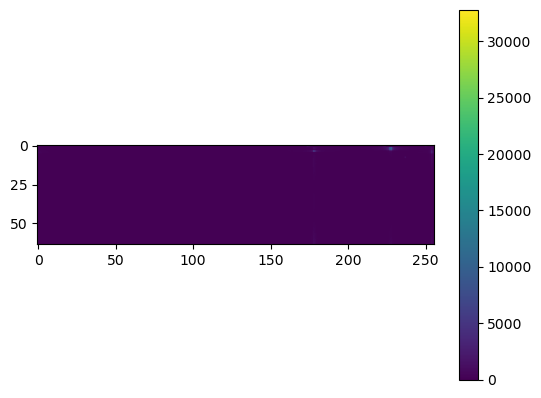

In [127]:
complex_array = []
real_array = []
im_array = []
for data_idx in range(len(data_array)):
    im = [to_16bit_signed_integer(wd>>16) for wd in data_array[data_idx]]
    re = [to_16bit_signed_integer(wd & 0xffff) for wd in data_array[data_idx]]
    real_array.append(re)
    im_array.append(im)
    temp = []
    for i in range(len(im)):
        temp.append(complex(re[i],im[i]))
    complex_array.append(temp)
    
complex_array = np.array(complex_array)
plt.imshow(abs(complex_array))

# Add colorbar for reference
plt.colorbar()

# Display the plot
plt.show()

In [131]:
result = np.array(abs(complex_array))
matlab_dict = {'matlab_array':result}
file_path = 'results.mat'
savemat(file_path, matlab_dict)

In [10]:
data_mag_array = np.array([[0x5803e758,0xb3d107,0x12008245,0x50a3e2c0,0xd6648b8d,0x78bba1a9,0x159174b2,0xc01760ed,0x1a148021,0x8d8091e,0xcd01c613,0x60e25e20,0xc5e807e3,0x183192a2,0xa0015f4c,0x226cb1a,0x43ba121c,0xa2ca08a,0x11281106,0xd7c3553,0x822ec885,0x9b04010c,0x988ca6c,0x9900203,0xe0a5b1c4,0x4b10a144,0x816d91d,0x80418007,0xc48100a3,0xe4e00f1,0x54600313,0x2218acf6,0x8c20d7e5,0x95c3062f,0x316bca78,0x433128b1,0x12270080,0x4901807a,0xa242a511,0xb032042f,0x10165e8a,0xa83f044a,0xc1841308,0x257081a7,0x18181579,0xcdd9400,0xcdda52f4,0x520160c,0x54021527,0xbc2d142a,0x11848c75,0x1ff50c42,0x720905a,0x91481c08,0x93061955,0x5203e68,0xc394cc4b,0x12550230,0x22424d73,0x4635aa3c,0x404a173,0x1329012d,0x12248984,0x3201504e,0x41482738,0x59118969,0xd33e8e87,0x38698540,0xaeb45744,0x121340e4,0xe114e410,0x242106b5,0x82c01163,0xb82d1ccd,0xb1869c29,0x3785831,0x5226331e,0x8e0da550,0x4d94c81e,0x40780e05,0xf821f8c0,0x11e88c26,0xec9400cd,0x32bee629,0xe0b451c0,0x116d0819,0x881a1a0,0x94c004b4,0x9924f7fd,0x23018c5,0xbd446604,0x322c459c,0x3eaa9923,0x9a57608,0x5275ed01,0x9651918d,0x8464c6c6,0x6448512,0xc6259fe2,0xc9434000,0x500240ae,0x44180488,0xa0067a22,0xc9536a04,0x9640ba7a,0x1e143ed4,0x91c24b6f,0x50251538,0xf4200651,0x1b21236e,0xa1160104,0x3598020,0xc3d1c324,0x19641460,0x9e99295,0x488868c9,0x61338c0a,0x40460493,0x84720df0,0x19b48053,0x70028434,0x52c502c1,0x83a6ccaa,0x6c2a41a3,0x289149a2,0x41ec618,0x63c41203,0x4693345b,0xa8eb2427,0x90cba15,0x4ed10b5c,0xbdcc804,0x71296482,0x1ba37972,0xa5240421,0x8206d81f,0xb508c160,0x91c0a66,0x6e3a2148,0x4dc0e82a,0x86a781fb,0xf2492451,0x69058344,0xa781429,0x48b1805b,0x7599aac1,0x35048541,0xda53168e,0x49614ab,0x58805d0e,0xe688821,0xa2c010c7,0x918d0a34,0x38258243,0xe963ecc,0x1a405272,0xd0401ae,0xd24844b2,0xc4e094c8,0xaa099a04,0x8ab1032d,0x56bdaf2,0x9609c9,0x10634023,0x80c226b4,0xa2670000,0x9ea5,0xc253002,0x58645,0x48378d82,0x8a103102,0x74106006,0x249a22c7,0x901c1651,0x39114147,0xe69ccc62,0x21220988,0x1904aa51,0x388e9924,0xa88ae87c,0x71963533,0x2daa871,0x34298483,0xa5cb590,0x18502046,0xcb13a71,0x804ea9c5,0x787023a6,0x40231a11,0xe7111058,0x48720632,0x1300a156,0x14d2271,0xe0556736,0x8220aa40,0xb8b09109,0xe05a263,0xca020089,0xcde36221,0x58ba98c2,0x766012b0,0x1a695902,0x8e6c0382,0x470072e8,0x254e0601,0x4075b083,0xb285c456,0xca00d5a1,0x40cc2211,0xca549023,0x83a08080,0x25815210,0x91862b6b,0xb2538000,0xc0322267,0xbb84cac0,0xcc94b469,0x125d0250,0xec263965,0x99960023,0x205b0315,0x9c7902c,0x1040077,0x82158964,0x964b8aa1,0xc8d432c4,0xa84576b0,0xb1198012,0x6a039bc0,0x45c80449,0xc76098de,0x5314800e,0x291b3b0d,0x96c4a888,0xc42223c5,0x256f0074,0x344704a0,0xc9914593,0xaa386616,0x3f5d90c0,0x110d0ada,0x9c379c91,0x85016082,0x650c4828,0xcfe24a,0x6fbd8411,0x49811701,0x1a963038,0x923682c6,0x680002dc,0x63611285,0x8849d850,0xa3911cd4,0xa9197894,0x60081159,0xfc0014e8],
[0x230012,0x1e0008,0x250016,0x1c0005,0x220014,0x21000a,0x24000a,0x170010,0x14000b,0x1e0009,0x11000c,0x15000e,0x12000b,0x22000d,0x100010,0xa0012,0x1b0008,0x1a0005,0x1a0007,0x120009,0x1b000d,0x13000d,0xd0000,0x13000e,0x18000f,0x190006,0x1a0004,0x15fffc,0x100006,0xf000e,0x170004,0x15ffff,0x80004,0x14fff9,0x180000,0xd000b,0xf0005,0x1a000a,0x170004,0x15fffa,0xd0001,0x140007,0x60005,0xffffd,0xdfff6,0x160006,0x14fff9,0x100002,0x12ffff,0x170008,0x18ffff,0x9fff2,0xb0002,0xbfffd,0x90002,0x180006,0x40003,0xcfffe,0x80000,0x60001,0xcffff,0xafffc,0x120000,0xcfffc,0x100003,0xc0004,0xcfff7,0xdfffa,0x80002,0xbfffd,0xeffff,0x9fff8,0x9fff5,0xffff5,0x70004,0xd0001,0x7fffe,0x11fff4,0x14fff2,0xcfffa,0x4fffa,0xcfff3,0x7fffa,0xdffff,0xffff9,0x2fffc,0xdfffa,0xffffa,0x11fff5,0xefffa,0xd0000,0x60002,0x10fffc,0x1fffe,0xffff,0xaffff,0x7fffc,0xcfff5,0x14fff4,0x8fff9,0x7fff0,0x16fff9,0x11fff9,0x6ffed,0xcfff4,0x10fff2,0x7fff8,0x9fff5,0x4fff8,0x40001,0x9ffff,0x12fff1,0xefffa,0xefff3,0xffff8,0x5fffe,0x5fff7,0xfffe,0x5fff5,0x7fffa,0x6ffef,0xc0001,0x6fff7,0x6fffb,0x8fffd,0xefffb,0x6fff2,0x6fff3,0x8ffe8,0xfffefffa,0x8ffeb,0x5fff4,0x7ffea,0xfffcffed,0xbffee,0x12ffef,0xfffeffef,0x7fff4,0xffeb,0x3ffed,0x1fff0,0x6fff4,0x7fff3,0x4ffec,0x8ffec,0x3fff3,0xfff9ffea,0xcffee,0x2fff4,0x4ffea,0x2ffed,0xfffdffe8,0xfffcffed,0xfffdfff3,0x2ffea,0x1ffda,0x7ffe7,0xfffaffe5,0x2ffe8,0xfffcffde,0xfff6ffdf,0xffe2,0x1ffde,0xfff8ffd4,0xffe9ffd8,0xfff8ffdc,0xfff8ffc8,0xffefffca,0xfff0ffbf,0xffddffba,0xffe9ffa8,0xffd3ff90,0xffb6ff67,0xff7fff02,0xfe00fc50,0x11b01f1,0x7800bf,0x4c0068,0x360044,0x2f003c,0x28002b,0x230020,0x19001e,0x1e0018,0x180011,0x180009,0x150008,0x110003,0x1a0005,0x180006,0x110004,0x120003,0x100005,0xf0001,0x9fffa,0x8fffb,0xd0002,0x9fff2,0x12fffb,0x11fff0,0x8fff6,0xeffe9,0x7ffeb,0xaffef,0x4fff5,0xeffea,0xcffea,0xcffea,0xbffe5,0xeffe7,0xcffe0,0x3ffdc,0x3ffe1,0xdffcf,0xfffeffd7,0x3ffce,0x6ffc1,0x6ffbf,0x5ffab,0xfffaffa2,0xffffff85,0xfff4ff54,0xffe1fef3,0xff9bfcdf,0x7d03ec,0x36012a,0x2500bc,0x1d007a,0x1b0059,0xa0048,0xa0042,0x80032,0xd0031,0xe0027,0x21,0x70024,0x11,0xc0017,0x6001f,0x20016,0xfffb000b,0xfffc000f,0xfffefffc,0xffe90003,0xfff6fffa,0xffeafffc,0xffe7fff5,0xffcdfff2,0xffccffdf,0xff7affb1,0xfdabfe6b,0xed00a6,0xa3911cd4,0xa9197894,0x60081159,0xfc0014e8],
[0xff15fe2b,0xffe3ff9f,0xffc6ff8e,0xffc6ff98,0xffceffa5,0xffcaff96,0xffc4ff88,0xffbfff98,0xffb7ffa6,0xffc9ff9a,0xffc0ffa9,0xffc7ffa5,0xffc3ffab,0xffc6ffa6,0xffc2ffb0,0xffc7ffb3,0xffbfffb2,0xffb9ffb4,0xffc4ffba,0xffc0ffb6,0xffc7ffba,0xffc0ffba,0xffcdffc3,0xffbfffbe,0xffbaffba,0xffc2ffb6,0xffc6ffc8,0xffccffc4,0xffc0ffc7,0xffc4ffcf,0xffc8ffcd,0xffc5ffc5,0xffc4ffd4,0xffbfffc7,0xffc1ffd0,0xffbdffd8,0xffceffd6,0xffc2ffd6,0xffc8ffd1,0xffceffdf,0xffcaffde,0xffcbffda,0xffc6ffdc,0xffbbffe0,0xffc8ffe0,0xffc2ffe6,0xffc7ffe6,0xffceffe5,0xffc1ffda,0xffcbffe7,0xffcaffef,0xffccffee,0xffd4ffe2,0xffc4ffe5,0xffc9ffea,0xffcfffe6,0xffc8ffe5,0xffd0ffe7,0xffc8fff9,0xffd0ffef,0xffc2fff6,0xffc8fff9,0xffcafff3,0xffbefff5,0xffcfffed,0xffcfffee,0xffc7ffed,0xffccfff5,0xffc8fff4,0xffccfff9,0xffcdffee,0xffccfff5,0xffc9fff8,0xffcdfff5,0xffcffff8,0xffc3fff9,0xffc1fff7,0xffc8fffb,0xffc9fffa,0xffc8fffe,0xffcdfff4,0xffc6fff9,0xffcc0002,0xffc8fffb,0xffbcfff6,0xffc1000a,0xffc80002,0xffd3fff9,0xffd20005,0xffc40004,0xffc6000a,0xffcdfffd,0xffcb000c,0xffccfff9,0xffd00006,0xffc80008,0xffd00006,0xffc10007,0xffc80000,0xffd10004,0xffc20009,0xffd20009,0xffd20009,0xffcf0008,0xffd10006,0xffcf000d,0xffcd0008,0xffd1000c,0xffc70013,0xffcd0010,0xffcf000b,0xffd1000f,0xffc7000d,0xffd1000d,0xffd00012,0xffd8000f,0xffd40019,0xffc80007,0xffd10013,0xffcf0018,0xffcc0021,0xffce0015,0xffc80018,0xffd1001f,0xffd0001f,0xffcd001a,0xffd7001a,0xffd80017,0xffd10017,0xffcf0022,0xffd3001b,0xffd00011,0xffc9001b,0xffcd001c,0xffd4001e,0xffc3001c,0xffd1001b,0xffcc0024,0xffd50016,0xffca001c,0xffd20024,0xffce001d,0xffca0020,0xffc3002b,0xffce0021,0xffd3002e,0xffc80027,0xffd30022,0xffce001d,0xffca002c,0xffc50029,0xffce0025,0xffcc001e,0xffd60026,0xffdc0031,0xffc6002a,0xffd1002e,0xffc6001e,0xffcd002a,0xffce002c,0xffd50029,0xffc30024,0xffce0021,0xffce0025,0xffc7002b,0xffcb0025,0xffcd001d,0xffcc0021,0xffd40026,0xffbd001f,0xffc3001d,0xffbb0015,0xffb6000b,0xffb4000a,0xffaeffed,0xffa3ffd3,0xff7fffa4,0xff3aff1c,0xfd75fb7c,0x123030f,0x5c016c,0x350112,0x2700e5,0x900cb,0x700b7,0x200b2,0x500b1,0xfffc00a7,0xfffa00a7,0xfff100a5,0xfff800a2,0x500aa,0xfffb00a9,0xfffd00a4,0xfffe00ad,0xffef00a5,0xfff300b3,0xfff400bf,0x100be,0xbe,0xfff900be,0xfffc00bf,0xfffe00cb,0xfff600dc,0x800dd,0x300dc,0x600eb,0x900fe,0x10010b,0x5011f,0xe0128,0x100133,0x120141,0x170156,0x200170,0x2e0192,0x2f01ad,0x3501d5,0x45020b,0x58023f,0x5d0291,0x7b02e8,0x980361,0xcc041e,0x10d0553,0x1870768,0x2970c0e,0x747219a,0xf697d56d,0xfcaff31b,0xfdf3f85f,0xfe84faa2,0xfec7fbd9,0xfeeffc9c,0xff18fd29,0xff28fd89,0xff35fdd9,0xff57fe06,0xff56fe3d,0xff5dfe6f,0xff74fe8f,0xff70fe9e,0xff6ffebe,0xff77fed3,0xff79fede,0xff7dfef9,0xff85fefc,0xff82ff0c,0xff7fff12,0xff7bff1d,0xff71ff18,0xff65ff25,0xff62ff0e,0xff21fee6,0xfd65fd57,0x770025],
[0xff8dfe89,0xfff0ffb7,0xffe3ffa2,0xffecffaa,0xffe5ffb0,0xffd9ff9f,0xffe4ffac,0xffe7ffa0,0xffd5ffad,0xffdeffb6,0xffdbffb4,0xffdbffb1,0xffd3ffb6,0xffd3ffb3,0xffd3ffbf,0xffcbffba,0xffd9ffc1,0xffd6ffb7,0xffd8ffc5,0xffd8ffb9,0xffd3ffca,0xffcdffbd,0xffd5ffc9,0xffd4ffc6,0xffd0ffc8,0xffd0ffc1,0xffd1ffcb,0xffd3ffc6,0xffd0ffd4,0xffd7ffc8,0xffdaffce,0xffd8ffcf,0xffdcffd5,0xffcdffd5,0xffd3ffd6,0xffd0ffd9,0xffd4ffd2,0xffcfffd5,0xffd0ffda,0xffd2ffda,0xffd1ffe0,0xffd5ffd8,0xffd3ffd8,0xffd6ffd1,0xffccffe0,0xffd9ffe8,0xffd4ffe6,0xffcfffe4,0xffddffe3,0xffdbffe9,0xffd0ffe4,0xffd2ffe5,0xffd3ffea,0xffd0ffe4,0xffd8ffe2,0xffd8ffef,0xffd3ffe2,0xffccffef,0xffd6ffee,0xffdaffea,0xffdaffe9,0xffd9ffeb,0xffd8ffed,0xffcefff1,0xffd8fff2,0xffd2fff2,0xffd5fff6,0xffd5fff1,0xffd9fff7,0xffd1fff4,0xffd1ffec,0xffdaffee,0xffcffff0,0xffd1fff9,0xffd6fff4,0xffd5fff9,0xffe1fff0,0xffdafff1,0xffd2ffec,0xffd1fffc,0xffdafff0,0xffd1fffc,0xffd4fff7,0xffd4fff8,0xffcfffff,0xffd4fff1,0xffd6fff7,0xffd1fff6,0xffd2fffa,0xffdafffc,0xffd2fffa,0xffd4fff6,0xffd9fffa,0xffd2ffff,0xffd80005,0xffd70003,0xffd5fffd,0xffd90006,0xffdc0009,0xffd70013,0xffd50009,0xffd3ffff,0xffd40003,0xffd70002,0xffce0006,0xffd90005,0xffda0005,0xffd1000c,0xffd00009,0xffce000b,0xffd30008,0xffd9000d,0xffda0002,0xffd40003,0xffdb0006,0xffdd0008,0xffe3000c,0xffca000b,0xffdc0006,0xffcc0012,0xffd90007,0xffd40013,0xffd0000e,0xffcb000c,0xffdc001c,0xffdb0019,0xffd5000b,0xffe20017,0xffdb000d,0xffdf0019,0xffd8000d,0xffd50013,0xffd60016,0xffd4000d,0xffdb0010,0xffd40015,0xffd50014,0xffd3001f,0xffd50014,0xffd9000e,0xffda0011,0xffd80018,0xffde0013,0xffd4001e,0xffd70012,0xffdd001b,0xffd70024,0xffda001f,0xffd40026,0xffd2001d,0xffe3001c,0xffd90024,0xffd4001c,0xffcd0024,0xffde001e,0xffd10021,0xffd2001a,0xffd4001d,0xffd80023,0xffcf001c,0xffcd0022,0xffcf002f,0xffcf0030,0xffd70027,0xffdd0022,0xffdc0019,0xffd70026,0xffd50026,0xffd60028,0xffd6001e,0xffd10023,0xffd9001e,0xffe1001b,0xffda0016,0xffd80013,0xffdd0000,0xffe4ffe6,0xffdbffa1,0x17fdbf,0xffcf0197,0xffd400cf,0xffe400a4,0xffcf0093,0xffd9008d,0xffd30080,0xffe50078,0xffce006c,0xffde0076,0xffd90072,0xffce0077,0xffe6007d,0xffda0075,0xffe4007c,0xffd50084,0xffda007d,0xffe40089,0xffd70080,0xffdc008a,0xffd70096,0xffe1008f,0xffdd0095,0xffe500a1,0xffe1009b,0xffda00a2,0xffe400a8,0xffe500b1,0xffd700b3,0xffda00c9,0xffe400d4,0xffea00e3,0xffe800ea,0xffe400fb,0xffe500ff,0xffeb010f,0xffe50126,0xfff4013e,0xfff7015c,0xffe70181,0xfff501a7,0xfff901de,0x7020e,0x6025b,0x1502c9,0x200370,0x340467,0x5a0610,0xa509f3,0x1dc1bc7,0xfd0fdcd6,0xfecff54a,0xff36f9b7,0xff5cfb80,0xff76fc89,0xff87fd36,0xff90fd9b,0xff99fde8,0xff92fe23,0xffa2fe42,0xff97fe89,0xffa8fea9,0xffabfebb,0xffa4fed1,0xffb8feea,0xffb4ff03,0xffadfefe,0xffb0ff14,0xffa7ff1b,0xffa5ff33,0xffb3ff36,0xff9dff38,0xff92ff33,0xff93ff2e,0xff84ff2e,0xff50feeb,0xfdc0fd15,0x80005e],
[0xff15fd19,0xff9dfec8,0xffb4ff1f,0xffb9ff3f,0xffc4ff6c,0xffc1ff79,0xffc8ff89,0xffc7ff9b,0xffbcffa9,0xffc3ffaf,0xffceffab,0xffd4ffb5,0xffd0ffbf,0xffc8ffbe,0xffd3ffc8,0xffd2ffc5,0xffd2ffd4,0xffd5ffd9,0xffd3ffd7,0xffd4ffd4,0xffc6ffdb,0xffcdffdb,0xffd7ffd0,0xffd3ffe2,0xffcbffe4,0xffd8ffe2,0xffe5ffe8,0xffdaffea,0xffd6ffe9,0xffd5ffed,0xffd3ffe9,0xffc9ffee,0xffd7ffec,0xffd9ffe9,0xffe0ffee,0xffd9fff1,0xffd4ffec,0xffd2fff3,0xffe2fff5,0xffd6fff1,0xffd5fff7,0xffd7fff5,0xffcafff1,0xffd7fff7,0xffd2fff4,0xffd8fff7,0xffe1fff9,0xffd90007,0xffdcfffc,0xffd2fffb,0xffd00001,0xffd70001,0xffd8fff9,0xffd80000,0xffd60000,0xffe00001,0xffdafffd,0xffde0000,0xffda0004,0xffdefffe,0xffe00001,0xffd6000b,0xffce0009,0xffe20015,0xffd3000b,0xffda0004,0xffdc0002,0xffdb000b,0xffda000d,0xffe1000f,0xffd9000a,0xffd20008,0xffd5000a,0xffd2000b,0xffdc0018,0xffda0006,0xffdf000f,0xffd80013,0xffd1000a,0xffe30011,0xffda000a,0xffd60013,0xffd90011,0xffd6000b,0xffdb001d,0xffdb0013,0xffe70015,0xffe10014,0xffda0009,0xffe2001a,0xffd9000c,0xffde0014,0xffdc000e,0xffe7000e,0xffe30017,0xffe20016,0xffdc0024,0xffde0019,0xffda001b,0xffd70016,0xffd8001d,0xffda0018,0xffe1001a,0xffe90019,0xffdd0016,0xffe7001f,0xffdf0024,0xffdd001c,0xffe9001c,0xffe30026,0xffe10023,0xffea001c,0xffe20023,0xffe00019,0xffe4001c,0xffde0024,0xffe60024,0xffe30020,0xffe40027,0xffe40027,0xffeb0032,0xffe4002b,0xffe1002c,0xffe60034,0xffe6002f,0xffe5002c,0xffe60032,0xffe2002e,0xfff5002d,0xffeb002f,0xffe3002b,0xffe7003e,0xfff40033,0xfff00041,0xfff00043,0xffe9003d,0xfff40040,0xffe70039,0xffef003e,0xffe70046,0xfff50040,0xfff0004c,0xfff2004f,0xffef0046,0xffef0046,0xffef004d,0xffe80053,0xfff20054,0xffef0055,0xffea0054,0xfff50063,0xffea0057,0xfff6005e,0xffff005e,0xfffc0065,0x67,0xfff70069,0x80072,0x1006b,0x100081,0xc007f,0x40093,0x70095,0x14009c,0x100095,0x1600aa,0x1b00c3,0x2300c0,0x2700d6,0x3a00e7,0x410107,0x520123,0x630151,0x750189,0xa101e3,0xd60276,0x1440362,0x24305e0,0x8f2164e,0xfae2f400,0xfde6fb52,0xfe9bfd2e,0xff00fdf3,0xff2bfe72,0xff47fec3,0xff62fef6,0xff71ff19,0xff7fff41,0xff8fff54,0xff94ff6a,0xff96ff7a,0xff94ff7f,0xffabff8b,0xffa1ff9f,0xffa7ffa3,0xffa4ffae,0xffb3ffb2,0xffb4ffb9,0xffb1ffc5,0xffbbffc6,0xffaeffcc,0xffbdffd4,0xffb5ffd9,0xffbeffe1,0xffc2ffdc,0xffbfffd9,0xffc8ffdd,0xffc6ffea,0xffc8ffea,0xffccffed,0xffc6fff7,0xffcbfff8,0xffc30000,0xffc0fff5,0xffd3fffe,0xffcc000e,0xffd70003,0xffd10008,0xffcc0015,0xffc6001d,0xffd50019,0xffd30025,0xffd3002c,0xffdf004a,0xffdf004b,0xffdb0072,0xfff100bc,0x2a0217,0xff53fd75,0xff94ff46,0xffb9ff95,0xffc0ffc0,0xffc5ffcf,0xffcaffdf,0xffc4ffe6,0xffc5ffe5,0xffd0fff4,0xffcfffe9,0xffcf0003,0xffc9000d,0xffd10015,0xffdd001a,0xffc5001c,0xffd30035,0xffda0033,0xffcc0044,0xffd8004f,0xffd7005c,0xffe20060,0xffdb0082,0xffd6009d,0xffe400db,0xfff90142,0x140249,0x1400af6,0xff42fbb8],
[0xffe1fcb9,0x3efe73,0x28fed4,0x20ff16,0x13ff4a,0x1bff51,0x17ff6f,0x7ff7f,0x7ff8e,0x7ff8f,0xffffff9e,0x9ffb0,0x6ffad,0xfff2ffb0,0xfff8ffbe,0xfff9ffba,0xfffbffc8,0xfff8ffc6,0xfff1ffc5,0xfff6ffc5,0xfff9ffd2,0xfff8ffd1,0xfff7ffce,0xfff7ffc8,0xfffeffdb,0xffdf,0xfffcffd7,0xfffeffd0,0xffefffd8,0xfffeffd5,0xfff7ffde,0xfffaffee,0xffedffea,0xfff3ffe3,0xfff9ffd6,0xfff1ffe4,0xfff7ffd9,0xfff6ffe4,0x3ffee,0xfffaffee,0xfffbffe5,0xfff8ffec,0xfff2ffe6,0xfffdffe5,0xffedffe4,0xfff4ffe0,0xfff9ffe7,0xfff3ffe8,0xfff7ffee,0xffeffff3,0xfff1ffee,0xfffafff7,0xffeafff0,0xffeffff2,0xfff6fff4,0xfff5ffe8,0xfff5fff0,0xfff1ffee,0xfff4fff3,0xfff6ffe5,0xfffcfff7,0xfff5ffef,0xffe6fff4,0xfff4ffeb,0xfff8fffc,0xffedfffc,0xffffffea,0xfff1fffb,0xffeffff6,0xfff6fff6,0xfff6fff2,0xfff4fffa,0xfff4fff4,0xffe8fffe,0xffeefff6,0xfffbfff6,0xffeafffd,0xfff5fffc,0xfffcfff7,0xffeafffa,0xfff5ffff,0xffe8fff5,0xfff0ffeb,0xfff1fff7,0xfff4fffa,0xfff9fff3,0xffedfff5,0xfffb0002,0xffeefffb,0xffeffff7,0xffecfff7,0xfff3fff7,0xfff30006,0xffe3fffc,0xfff5fffd,0xfff5fff8,0xffeffffa,0xfffafff8,0xffedfff2,0xffebfffd,0xfff80005,0xfffcfff7,0xfff2fff7,0xfff80001,0xffef0003,0xfff3ffff,0xfff2fffb,0xfff5fff3,0xfff2fffe,0xfff1fffa,0xfff4ffff,0xfff2fffa,0xfff80001,0xffed0003,0xffed0008,0xffed0003,0xfff3fffd,0xfff50005,0xfff4fffb,0xfff9fffc,0xffee0001,0xfff30006,0xfff4fffc,0xffeefffd,0xfffc000f,0xfff20006,0xfff50001,0xffefffff,0xfff9000b,0xfff10000,0xfff70001,0xffe9fffa,0xfff40008,0xfff60006,0xffed0001,0xfff80006,0xfff8ffff,0xfff00004,0xffeb0000,0xffec000a,0xfff5ffff,0xfff60007,0xffee0007,0xfff30009,0xfff10002,0xffef000a,0xfff70005,0xfff20009,0xfff2fffe,0xfff7000d,0xfff0fffb,0xffed000e,0xfff60003,0xffee000d,0xfff0000a,0xfff2000c,0xfff10010,0xffec0011,0xffec0011,0xfff6000d,0xfff40005,0xfff20012,0xfff5000b,0xfff20018,0xffee0013,0xffff0016,0x1000f,0xffee001b,0xfff10012,0xfffd001a,0xfffc000c,0xfff70023,0xfff9001d,0xfff90022,0xfff8001e,0x80029,0x9002e,0x33004c,0xd8010b,0xff6fff84,0xffc5ffd9,0xffccfff0,0xffd1fffb,0xffdafffa,0xffe10002,0xffe0ffff,0xffe0fffe,0xffe20009,0xffe3ffff,0xffea000a,0xffe80017,0xffed0007,0xffe6000c,0xffe7ffff,0xffe4000b,0xffdf000c,0xffe5000e,0xffeb000e,0xffe40008,0xffe70010,0xfff70016,0xffe3000d,0xffee0016,0xffeb000b,0xffe60019,0xfff60016,0xfff10017,0xffec0016,0xffec0021,0xfff40011,0xffef001a,0xffe1001e,0xffec001c,0xffeb0025,0xffea001c,0xfff0001b,0xfff10024,0xffec002b,0xffea002b,0xffe70030,0xffeb002c,0xffe90034,0xfff2003e,0xffed003b,0xfff60051,0xffff005e,0xfffe0087,0x28012d,0xff81fed1,0xffc6ffc5,0xffd4ffe7,0xffce0000,0xffd70011,0xffdf0011,0xffde001d,0xffd9001e,0xffd60028,0xfff00012,0xffd50032,0xffde003b,0xffd6003d,0xffcf003d,0xffdc0049,0xffd40053,0xffd0005d,0xffd60073,0xffc30078,0xffc60088,0xffc30093,0xffbb00bb,0xffb200ed,0xffddffc3,0xffdcffae,0xffbcff5f,0xfef4fd39,0x5500fe],
[0xff97ff41,0x19003f,0x16002d,0x50021,0x80017,0x160016,0x50012,0xb0008,0xfffa000e,0x13000b,0xd0008,0xe,0xfffd000d,0x10005,0x9000b,0xb,0xe0000,0x80006,0x60005,0x60004,0x3000b,0x80008,0x3,0xfffb0002,0x2ffff,0x160005,0x90000,0xffff0002,0x10005,0xfffe0001,0x7,0x2000b,0x7000e,0xfff40003,0xc0006,0x20009,0x8fffb,0xfffdfffa,0xfff90006,0xb000b,0x70001,0xa,0x6fffa,0x9fffd,0x60007,0x50002,0x30000,0xfffc000b,0xfffe0007,0xfffeffff,0x40007,0xfffffff9,0x5fffc,0x6ffff,0xcfff8,0x80002,0x130000,0x90002,0x70007,0x50001,0xfff9000b,0xfffb0006,0x20003,0xfffc0010,0x70005,0x2ffff,0x40004,0x30007,0x80004,0x50001,0xfff9fffe,0xa0004,0x2fffb,0xfffa0008,0x90003,0x80006,0xe0004,0x60006,0xffff0006,0xfffe0004,0x30008,0xfffe,0x40009,0x70000,0x4000d,0xfffefff4,0x40003,0xfff4fffc,0x10004,0xfffe0006,0xfffa0002,0xfffd0003,0x80005,0xfffb,0x90005,0x6fff9,0x30003,0x90005,0x3,0xffff0003,0x40005,0x2,0x40006,0xffff0002,0xfffa0007,0x20001,0xfffffffc,0xfff3fffd,0x5,0x70002,0x6fffe,0x20001,0x6fffc,0xfffffff8,0xcfffe,0xfff80003,0x4ffff,0xfffb0003,0x60003,0x20002,0x20009,0x2000d,0x80003,0x9ffff,0xfffa0000,0x2fffd,0x20005,0x20003,0x7fffd,0x3fffd,0x5,0x80003,0xffff0001,0x4fffe,0x1000b,0x10007,0x9fffa,0x30007,0x10006,0xfffdfffb,0xfffafffc,0x9fff9,0xffff0001,0xffff0005,0xafffe,0xf000d,0x4fff2,0xfffefffb,0x5fffa,0xffff0002,0x8fffd,0xfffd0000,0x30002,0x1fffb,0x6fff8,0x60001,0xfffcfff8,0x2ffff,0xffff0005,0xdfffa,0x4fffd,0xfffdfffd,0x3fffd,0xfffdfff9,0x5fffc,0x8fff4,0xbfffd,0xfffd0000,0x10fff3,0x6fff5,0x50001,0xfffffffd,0xafffc,0x8fff2,0xdfff9,0x11ffe6,0x18ffeb,0x27ffdb,0x83ff6c,0xffb80053,0xffee001d,0xffeb0015,0xffed0018,0xfff4000b,0xfffb0006,0xfffa000b,0xfffc0003,0xfff30007,0xfff6000d,0xfffe0008,0xffff0005,0xfff70005,0xfffb0001,0x10007,0x50008,0x20003,0xfffb0002,0x70009,0xfff70003,0xf,0xfffd0003,0xfffb0004,0xfffe0011,0xfffcffff,0x4000d,0x60003,0xc0008,0xfffefffe,0xfffb0004,0x70009,0xfff8000f,0xffff0008,0x3fff4,0xfff90003,0x2000b,0xa0008,0xfffc0009,0x50009,0x2000c,0x50004,0xa000c,0xfffa0013,0xfffe0009,0x10010,0x110014,0x50021,0x170035,0x3900a1,0xffa8ff1e,0xffdaffb3,0xfff0ffde,0xffefffde,0xfff0ffe8,0xfff7ffeb,0xfffbffe3,0xffeffff7,0xfff2ffeb,0x16ffdc,0xffedfff3,0xfff7ffe9,0xfffbffec,0xfff7ffeb,0xfff4ffed,0xffffffe8,0xfff8ffee,0xfff6ffe8,0xfff7ffeb,0xfff5ffdc,0xfff2ffdc,0xffedffe0,0xffeeffcd,0xffddffc3,0xffdcffae,0xffbcff5f,0xfef4fd39,0x5500fe],
[0xffbdff5e,0xc0048,0xfffe002c,0x60025,0x6002f,0x4000d,0x10016,0x100011,0x50015,0xc0007,0x120005,0xb000d,0xc0010,0x80008,0xfffc0012,0x70008,0x30012,0xe0007,0x9000e,0x3000e,0x20001,0x80006,0x20002,0x8000c,0x60004,0x60007,0x90009,0xfffd0007,0xfffc0000,0xe000f,0x20014,0x10002,0xd000a,0x70009,0xfffa0003,0x20004,0x10006,0xffff0000,0x1,0x60012,0x3000a,0x3000b,0x20000,0x8,0x60005,0x60005,0xaffff,0xfffa0007,0xffff0007,0x60001,0x40005,0x4fffd,0xffff000a,0xfffd0008,0xa0006,0x5000a,0xf0005,0xf000b,0xfff6,0x6ffff,0xb0000,0x4,0xfff9fffc,0x30006,0xfff80009,0x40007,0xffff0004,0x7000d,0x4fff9,0x3fffe,0xfffffffc,0x80002,0x70002,0x10009,0x7fffe,0x20001,0x60007,0xfffefffb,0xfffc,0x40000,0x5,0xffff0002,0xfffc0004,0xfffd,0xa0000,0x2fffd,0x40000,0x80003,0xa0004,0x20001,0x5ffff,0xaffff,0x20003,0x10003,0xfffb0007,0xfffbffff,0xcfffc,0xfffc0008,0x7fffc,0x60002,0xfffe000c,0x1fff9,0xafff7,0x2fffe,0x30007,0x30003,0xfffefff7,0xcfffa,0x4fffe,0xfffe0000,0xfff60000,0x40004,0x60002,0xafffa,0xfff80004,0xc0004,0x90008,0xffff,0x30002,0xfffb0004,0x3fffa,0x30006,0x4fff9,0xfffc000b,0x20002,0x7fff5,0x7fffe,0x70008,0x90000,0xb0006,0x9fff7,0x80003,0x5000e,0x7fff7,0x9fffd,0x6fff9,0x50007,0x10000,0xfffbfff6,0x1fff8,0x20006,0x7fffb,0xd0007,0x30000,0x5fff9,0x90000,0x6fff1,0x40004,0x2fffb,0xfffdffff,0x30000,0x7fff7,0x1fffc,0x50001,0x3ffff,0x4fff1,0x13fffe,0x40002,0x9fffd,0x5fff5,0x6fffd,0x3fffa,0x3fff2,0x9fffb,0x8fff2,0x60000,0x3ffff,0x2fff7,0x4fff0,0x1ffec,0x5fff3,0xeffec,0x12ffe6,0xdffed,0x12ffdc,0xaffe0,0x1affd0,0x24ffb1,0x7ffedd,0xffba00b2,0xffe00044,0xfff4002a,0xfff2000d,0xfff40019,0xfff90018,0xfff40011,0xfff8000f,0xfffd0019,0x7000e,0x10006,0x30000,0xfff3000e,0x2000d,0xfffe0001,0x1000b,0x1000a,0xfffe0009,0x9,0x2000c,0x10007,0x60001,0xfff8000b,0xfffb000a,0x1000c,0x30006,0xfffafff7,0xfff90005,0x50003,0x60002,0xfffc0009,0xfff80001,0x40003,0x40009,0xfffb0011,0xfffd0000,0xfffc0005,0xd0006,0x60009,0x11000b,0x4000b,0x60005,0xc000b,0x80007,0x80008,0xffff000f,0x11000f,0x1b001d,0x39006a,0xffb7ff6a,0xffe8ffd2,0xffedffdf,0xffe9ffe7,0xfff8fff2,0xfffbffed,0xfff6ffec,0xfffdfffc,0xfffbffe6,0x38ffd0,0xfff1fff7,0xfffefff8,0xffffffe9,0xfffefff2,0xffffffed,0xfffbfff3,0xffffffec,0xfff5ffea,0xfff6ffe9,0xfffeffef,0xffffffdf,0xfff1ffe0,0xffe7ffd5,0xfff2ffc2,0xfff7ffa3,0xffe9ff55,0xffbcfd22,0xa010a],
[0xffbfff73,0x5003e,0xfffe002a,0x40019,0x70029,0x10019,0x3000f,0x80009,0xffff0019,0x30012,0x9000b,0xf000b,0x10011,0x30003,0x8000d,0xfffd000f,0xfffe000a,0xffff000a,0xfffe0006,0x10008,0x9,0x8000c,0x9fffc,0x90009,0xfffc0003,0x4,0xa000c,0xa0005,0x80009,0x4000b,0x10005,0xffff0003,0x90002,0x50002,0xffff0009,0x40008,0xfffd0006,0x40008,0xc0009,0x5fffc,0xc0010,0x100008,0xffff0009,0xdfffb,0x30002,0xa0002,0x9ffff,0xc0008,0xffff,0x9000a,0x7ffff,0x4fffe,0x3fffe,0xdfffd,0xeffff,0x30007,0xfffe0001,0x80000,0x7,0xc0002,0xfff80003,0x30004,0x4000c,0x70003,0x2000e,0xfffdffff,0xfff90002,0x30007,0x60001,0xfffe0007,0xfffc0008,0x10008,0xfffefffe,0x6fffd,0xffff000c,0x9,0xfff5fffe,0xfffd0002,0xfffe000e,0xdfff9,0x1fffe,0xfffa0000,0x40001,0xfff50000,0x7ffff,0x5fffb,0xd0006,0xa0002,0xc0006,0x30007,0xfffd0006,0xa0000,0x4fffb,0xd0005,0xfff90003,0xa0000,0x2,0x90003,0x7fff9,0x20002,0x10008,0xc0000,0xfffd0002,0xfff4,0xd0002,0x4fffe,0x60003,0x80006,0xfffd0003,0xffff0009,0xfffcfffe,0x3fffb,0xfffe0000,0xfffcfffb,0xc0003,0x70005,0x20009,0x3000e,0x2000e,0x7fffb,0x1fff6,0x6fff9,0xbfffb,0x2fff5,0xfffc0006,0x3fffa,0xbfff6,0xffff0005,0x30005,0xdfffc,0xafff6,0x20002,0x70004,0xfffd0008,0xbfffd,0xfffd0005,0x2fff9,0x6fffe,0xfffcfffd,0x10004,0x60004,0x30004,0x140002,0x9fffd,0xbffff,0x90004,0x50002,0x6fff3,0xfffc0000,0x4fffb,0xfffbfffa,0x2fff7,0x3ffff,0x5fffe,0x7ffff,0x6fff6,0x8fffe,0xb0000,0x8fffb,0x2fffc,0xa0003,0x9fffd,0x9fff2,0x2fffc,0xfff1,0x7fff1,0xfffbfff7,0x6ffef,0xbfff3,0xffff3,0x10ffed,0x9fff0,0xafff2,0xeffed,0x12ffe6,0x1affde,0x1fffcd,0x2bffab,0x9afe8d,0xffa900c3,0xffe80053,0xfff50039,0xfff20026,0xfffe0021,0xfff50022,0xfff80010,0xfff70017,0x30012,0xffff000e,0xfffa000f,0xfff3000a,0xfffa0010,0x80006,0xfff30005,0x5000d,0x10007,0xfffefffc,0xfffe0001,0x50007,0x4,0xffff000a,0xffff0009,0xa0007,0x20006,0x7000f,0x3000c,0x1fffe,0x30001,0xb0007,0xfff80001,0x30005,0x20007,0xffff0012,0x60008,0x6000c,0xfffe0008,0x40006,0xfffe0009,0x13fff5,0x3,0x60004,0xfffe000f,0xfff90003,0xfffbffff,0x7000c,0x70018,0xb0017,0x320049,0xffb4ff97,0xffdfffe0,0xffeeffe8,0xfff3fff3,0xffeffff9,0xfff7fff5,0xfff5fff5,0xfff8fff9,0xffe10006,0xfc8001a6,0x27ffde,0x15ffe9,0x2fff2,0xaffea,0x9ffeb,0xfffaffe4,0x2ffeb,0xfff9ffea,0xfff8ffe8,0x3ffeb,0xffffffe2,0xfffbffe1,0xfff8ffd9,0xfff2ffc2,0xfff7ffa3,0xffe9ff55,0xffbcfd22,0xa010a],
[0xffa2ffa4,0xfff7004c,0xfff0002f,0xfffd001b,0x70023,0x70019,0x2000a,0x10018,0xffff0010,0xfffc000d,0x8000f,0x9000a,0x1000c,0x60008,0x70005,0x2000c,0xc,0xffff0012,0x50014,0xfffa0014,0xffff0011,0x2000c,0xffff0002,0xc0005,0xffff0009,0x70010,0x60009,0xfffd0006,0x3000f,0x90007,0xffff000e,0x40002,0x1000c,0x5000c,0x5fffe,0x7000e,0x70001,0xfffd0005,0x50003,0x10002,0x9000b,0x40005,0x10007,0x60003,0xb0003,0xe0009,0xffff0004,0x4fffb,0xffff0009,0x40003,0xfffdfff9,0x60002,0x20002,0x2fffd,0x70006,0xfffe0007,0x50010,0x90004,0x80004,0xbfffb,0x90000,0xfffd0004,0xa0003,0x10003,0x1fffb,0xb000f,0x8,0x60003,0x50001,0x40002,0xfff80003,0xc0000,0x40007,0xfff90007,0xafff9,0x6000e,0x30002,0x70002,0x4,0x70003,0xfff90003,0x9fff0,0xfffc0001,0x4fffa,0xfffd0000,0xfffbfff8,0xb0007,0x60002,0x2fffe,0x50003,0xfffefffb,0x20001,0xffff0007,0x7,0x50000,0x10005,0x50002,0x6,0x10001,0x90005,0x10007,0xfff6,0xfffc0006,0x8fffa,0x8fffb,0x30003,0xfffdfffe,0x10ffff,0x6fffe,0x4fffa,0x60007,0x9fffe,0xfffc0002,0x30005,0x2fffe,0x40004,0x3fffc,0x20001,0x40002,0x1fffd,0xfffe0001,0x1,0x7ffff,0x70004,0x20002,0xafffc,0x7fffb,0x0,0xc0000,0xd0001,0x60004,0xfffb0006,0xfff80000,0x6fffd,0x1fffe,0xb0008,0x60004,0x3fffa,0x30002,0xfffb0007,0x70002,0x1fffb,0xb0005,0x6fffd,0xfffd,0xfffefffe,0x10001,0xfffcfffd,0xfffc0004,0x8fff7,0xfffafffb,0x2fffc,0x2fffb,0xfff80009,0xdfffc,0xefff7,0x4fff2,0xfff7,0xfffcfff8,0x3fff7,0x2fffd,0x5fffd,0xfffd0000,0xafffe,0x3fff6,0x40003,0x9fff6,0x4fff4,0x1afff2,0xbffef,0xaffe5,0x3fff2,0xaffec,0x1fffed,0xeffe0,0x18ffd3,0x20ffc4,0x32ff97,0xb5fe71,0xffa000d1,0xffdd0058,0xffda0033,0xfff70028,0xfff4001f,0x30017,0xfff6001b,0xfffb000c,0xfff7000b,0xfffe0015,0xffff0007,0x20002,0xffff0017,0x90009,0xfffc0006,0x10,0xfffc000b,0x2000f,0x6,0x40003,0xfffd0006,0x5000f,0xfffbfffc,0x2000c,0x50008,0xa000a,0xfffc000d,0xd0000,0x70005,0xafffe,0xfffc000a,0x40004,0x50008,0x7000a,0xfffd0003,0x60009,0x7fffb,0x70003,0x20006,0x9000a,0xfff50001,0x90002,0xfff9fffe,0x20004,0xafff8,0xf0003,0x11000f,0xb0017,0x310031,0xffbbffb0,0xffe1ffdc,0xfff8fffb,0xfffdfffb,0xfff8fff7,0xfff8fffe,0xfffafff1,0x2fff7,0xfff30005,0xff71ffe1,0xfff7,0x2fffa,0xfffffffb,0x1fff8,0x6ffee,0x9fff7,0xfff9ffeb,0xffe9,0x4fffa,0xfff7fff2,0x1ffdb,0xffffffe3,0xfff7ffd7,0xfff9ffc8,0x2ffb2,0x1ff63,0x1bfd45,0xffe600fb],
[0xffa8ff8b,0xffed0041,0xffef0027,0xfff4001e,0xfff30018,0xfff5000a,0x70010,0xfffd000a,0xfff80013,0x5000b,0xf000e,0xfffc0001,0xfffd0016,0x6000a,0xffff0006,0xfffa000e,0x20010,0xfff60005,0x13,0xffff000c,0x30004,0x3000e,0xfffe,0x20004,0xffff0004,0x10007,0x50007,0xffff0004,0xfffe0005,0xfff70009,0xb0007,0x3000c,0x60009,0x4000b,0x40006,0x10001,0x90002,0x60009,0x2ffff,0x60005,0x7,0xfffa,0x10001,0xfff80010,0xfffe0008,0x6000a,0xe0001,0x9fffc,0xa0005,0x20001,0xffff,0x60001,0xd000d,0xfffe0004,0xfffd0008,0x50006,0x20001,0x7000c,0x8fffe,0x9000a,0x70004,0x50001,0xfffe000e,0xfffafffe,0xfffb0010,0x20001,0x30003,0x3000d,0x1ffff,0x60007,0x3fffd,0x20006,0xfff50001,0x10007,0x60008,0x2ffff,0x10000,0xfffe000c,0x30004,0x1fffe,0x5000a,0x1,0x2fffc,0x20005,0x60003,0x6,0x9fffe,0x40005,0x2fffd,0x60005,0x7ffff,0xffff0003,0xffff0007,0x3fffd,0x7fffe,0x5ffff,0x60005,0xd0002,0x60006,0x9fff7,0x50000,0x6fffa,0x2ffff,0xbfffa,0xd0005,0x50009,0x2fffd,0x60009,0x40004,0xfffffff9,0x40008,0xbfffc,0x110005,0xfffb0001,0x5fffe,0xcfffe,0x70000,0x20002,0xfffcfffe,0xfffc,0x90000,0x30000,0xaffff,0xa0007,0x5fffa,0x7fff7,0xfffcfffe,0xc0002,0x6ffff,0x70000,0x3ffff,0x5fffa,0xfffb,0x2ffff,0x4fffa,0xffff9,0x7ffff,0x9ffff,0x5fffb,0x70000,0x4ffff,0xdfffa,0x5fff8,0x6fffa,0xa0000,0x3ffff,0xffff0002,0x50000,0xdfffe,0x4fff7,0x90003,0xfff6fff9,0xfffc,0x13fff5,0x0,0xfffffff3,0x4fff8,0x60003,0xfff4,0x6ffeb,0x1fff6,0x3ffec,0x70003,0xbfff4,0x1fffb,0xbfff9,0xaffee,0x9fff2,0x13fff1,0x7fff2,0x8ffec,0xfffde,0x11fff2,0xdffed,0x13ffdd,0x1fffd1,0x2affc1,0x36ff97,0xe0fe68,0xff7e00df,0xffcd005d,0xfff0003d,0xffef001f,0xfffe0025,0xfff7001c,0xfff50017,0xfffd0019,0x2000a,0xfffc0012,0xfffd000e,0xfffa0009,0xfffb0002,0xfffb000e,0xfffc0009,0x50009,0x2000a,0xfff60004,0x50007,0x4000b,0x90009,0xfffa0002,0xfffb000d,0xfff10005,0xfff40012,0x50001,0xfffe000a,0xfffb0004,0x50004,0x40008,0x1000c,0xa0009,0x30001,0x4000d,0x70008,0x80008,0x20004,0x90002,0x80001,0x2000f,0xfffe0004,0x50002,0x70001,0x50002,0x1000c,0x5000a,0x12000d,0x110007,0x2e0026,0xffbcffd1,0xffecffef,0xfff0ffee,0xfff0fff9,0xfff5fffd,0xfffafff5,0xfffffff5,0xfff9fff3,0xfff9,0xfff80002,0xfffdfff5,0x3fff9,0x9fff7,0xfffffff5,0x1fff6,0x3ffef,0xfff1,0xfffffffb,0xfffefff9,0x4ffe8,0x4ffe5,0x3ffe8,0xfffeffdc,0x2ffcb,0xaffb3,0xeff70,0x77fd72,0xffc500f0],
[0xffacff8c,0xfff1003f,0xffe50024,0xfff00016,0xfff9001f,0xfff40012,0xfff7000c,0xffed000e,0xfff50019,0xfffe000f,0x10,0x10000e,0xfff6000c,0x90010,0xfffc0016,0xfff70017,0x60011,0xffff0006,0xffff000f,0xfffe0007,0xfff70009,0xffee000b,0x20003,0x80003,0x50000,0xfffe0008,0xfffe0009,0x50009,0x9,0xfffc0007,0x6,0xfffe0002,0xfffa0009,0x60005,0x30006,0xe0001,0x8,0xfffd000a,0xfffd0001,0x2,0x50003,0x90000,0xffff0006,0x0,0x9fffd,0xcfffc,0xfffe0015,0x120005,0x30009,0xfffd0001,0xfffa000b,0x10001,0x30009,0xfffc0006,0x1fffc,0xffff000a,0x5000d,0x90008,0x7fff8,0x7000a,0x20001,0x4ffff,0xfff8000c,0x30008,0x50005,0x20001,0xfffe0005,0xfffefffc,0xfffe000d,0xfffe0002,0x30001,0xfffc0008,0x8000d,0xffff0007,0x5000f,0x70006,0x60001,0x10004,0x40008,0xfff90003,0xfffc0002,0x40001,0x50001,0x4ffff,0x20001,0x40001,0x60000,0xfff90006,0x4,0xfffe0000,0x7fffc,0x70003,0x10009,0x70006,0xfffd,0x60002,0x11fffb,0x9fffb,0xfff7fffe,0xfffd0005,0x5,0xafffe,0x7fffc,0xa0006,0xfffa,0x100006,0x30004,0xfffbfffa,0x60001,0x90004,0xe0003,0x8fffd,0x3fffd,0xafffe,0xfffffffa,0x4fffe,0x2ffff,0xafffb,0x70000,0x2fffe,0x7fffd,0xfffc0000,0xfffd0009,0x10000,0xc0005,0xffff000b,0xfffefffc,0x8,0x40002,0x5fffc,0x5fff9,0x2fffd,0x80004,0x60005,0xfffefffd,0x50002,0xb0005,0x40003,0x7fff4,0xffff6,0x70008,0x80001,0xfffdfffd,0x1fffe,0x2,0xafffa,0xfffd0009,0x8fff4,0x6ffff,0x70005,0xfffffffa,0x12fff5,0xfffffffb,0x9fff6,0x20000,0xfff8,0xaffff,0xafff9,0xd0004,0x7fff8,0x7fffa,0x4fff6,0xe0002,0x7ffeb,0x7fff7,0xfff6,0xffff7,0xeffed,0xcfff0,0x11ffef,0xcffed,0xfffe4,0x15ffe6,0xfffe9,0x17ffe9,0x17ffdf,0x29ffc3,0x4fff9d,0xfcfe71,0xff7b00d6,0xffd00054,0xffec0034,0xffeb0029,0xffef001f,0xfff20018,0xfffa0012,0xfff00010,0xfffa0008,0xfff8000b,0xfff6000c,0x30007,0xffff0007,0xfffb0005,0xfffe000f,0x6ffff,0xfffe000c,0x6000a,0xfffa0009,0xfffe000c,0xfffd0002,0x20003,0x6000d,0xfffb0004,0x7,0x30009,0x1,0x60004,0x1fffe,0x7fffd,0x20008,0x10009,0x10001,0xd,0x50002,0xfff70005,0x40008,0xa000f,0xfffa0004,0xfffb0009,0xfffefffe,0xffff0009,0xa0008,0x50007,0x8000f,0xc0010,0x100009,0x16000d,0x35001d,0xffb4ffd6,0xfff4fff1,0xfff4fffa,0xfffafff9,0xfffdfff5,0xfffffffe,0xfffcffff,0xfff4fff8,0xfffefffa,0xffff000a,0x4fff9,0x8fff5,0x4fffa,0x5fff2,0xfffefff4,0x3fff9,0x2fffa,0x1ffed,0x3fff5,0xfffdfffb,0xfffbfff0,0xfff7ffe0,0xbffe5,0x2ffcb,0xaffb3,0xeff70,0x77fd72,0xffc500f0],
[0xff9effa0,0xffde002d,0xffed0020,0xffee0014,0xfff10019,0xfffd0018,0xfff80007,0xfff50010,0xfff8000e,0xfffb0005,0xfffb000a,0xffff000c,0xfff20009,0xfffc0005,0x60006,0xfff70009,0xfffe0007,0xfffd000e,0x60000,0xfffd0003,0xffff000f,0xfff70006,0xfffd0006,0xfff7fffa,0xfffd0006,0x50006,0x5000a,0xfffdfffc,0x5000e,0x90000,0xfffa0002,0x90002,0xfffe0010,0xfffffffd,0x80006,0x20006,0xfff80005,0x20003,0xfff9fffd,0x4000b,0x20006,0xa0004,0x80004,0xa000b,0xfffc0009,0x4000b,0x80009,0xfffb0000,0x80003,0xfffc0004,0x1000f,0xfffdfffd,0x60004,0xdfffe,0x3fffc,0x80004,0xfff90001,0x10001,0xfffd0004,0x70005,0x40006,0x90004,0xfffc0000,0xfff50002,0xfffbfffd,0x3,0xfffffffa,0xbfffc,0xfffa0007,0x20004,0xfffa0008,0xfff9fffc,0x40009,0x10002,0xfffe0003,0x4fffb,0x30008,0x40003,0x90002,0x40001,0x90002,0xfff9000b,0x6000b,0x40005,0x9ffff,0x60003,0x30007,0xfffd0009,0x50007,0x30003,0x20003,0xfffd0004,0x10007,0xa0004,0xfff7fffd,0xfff7fff3,0xfffd0001,0x60002,0x3fff7,0x60003,0x60006,0xfffc0002,0xfffefff5,0x30002,0x30004,0x3000b,0xfffb0002,0x6,0x4ffff,0xfffb,0x10fffe,0x1fffc,0xefffc,0x7000a,0xfff4fffe,0xfff9,0xfffd0004,0xfffd0004,0x110000,0x4fff6,0x50002,0x10002,0x40009,0xfffe000a,0xd000b,0x50005,0x1fff7,0x20006,0x4fffc,0xfffe0009,0xfffeffff,0x40000,0x6fffb,0x10009,0xfffffffe,0xafff8,0xfffcfff8,0x20003,0xfff90001,0x9fffb,0x50004,0xb0001,0xcfffb,0x5fffe,0x3fffb,0x3fffe,0x1,0xd0002,0xfffdffff,0xefff9,0x30006,0x10fffd,0x6ffff,0xfff2,0x5fff2,0x5fffc,0xbfffe,0xfffdfff8,0x9fff7,0x10003,0x110001,0x6fff6,0xcfff1,0xffff6,0x4fff9,0x1fff1,0x9fff7,0x15fff6,0x15fff3,0xaffef,0x13fff2,0x10ffeb,0xefff4,0x19ffe7,0x1dffeb,0x24ffda,0x32ffc5,0x44ffa4,0x11bfe93,0xff6100d8,0xffc10051,0xffd70036,0xfff50032,0xffe8001e,0xfff70016,0xfff30012,0xfff10010,0xfff0000a,0xe,0xfff80012,0x1000c,0xfff90011,0xfffb0007,0x2000d,0x6,0x10007,0xa0007,0x30002,0x90001,0xfff70007,0xa0007,0xc,0xfff90005,0xfffe0004,0x7000d,0x0,0xfff7000f,0x6fffd,0xfffe,0x10007,0x2000a,0x50015,0x90005,0x30003,0xffff0008,0x20003,0x7ffff,0x3fff8,0x2ffff,0xbfff7,0x60007,0x6fffe,0xc0000,0x90006,0x12fffc,0xa0006,0x10000c,0x370017,0xffbdffe9,0xfff30001,0xfff6fff6,0xfff5fffb,0xfffcfffc,0xfff70004,0xfff9fffa,0xfffc0003,0x8fffb,0xd0008,0x20000,0x2fffb,0x2fff6,0xfffb0001,0x2fff3,0x3fff9,0x6fff5,0x1fff6,0x6fff1,0xafff1,0x5ffec,0x5fff1,0x8fff1,0x1ffd1,0x11ffbf,0x31ff8c,0xe4fdf3,0xff9d00c1],
[0xff82ffb2,0xffe30024,0xffe4001e,0xffe50008,0xfff60015,0xfff80007,0xfffd0007,0xfffa0009,0xfffa0017,0xfffd0000,0x1000b,0xfff80005,0xfff80006,0x60009,0x40010,0xfffa0004,0xfff40008,0xfffd000c,0x60009,0xffff0009,0xfff7000c,0xffff,0xfff50009,0xffff,0xfffe0006,0xfffc000c,0x40002,0xffff0005,0xffff000b,0x20004,0xfff70006,0x60003,0xfff20004,0xfffbffff,0x10007,0x40007,0xffff0006,0xfffcfffe,0x20013,0xfffe0009,0xa0000,0xc0005,0x8000f,0x30000,0x30005,0x4fffe,0xfffdfffb,0x30002,0x5000b,0x30007,0xfffe0007,0xfff60003,0x4ffff,0x20007,0x10000,0xfffd0002,0xfffdfffe,0x30009,0x4fffd,0xffff000b,0x40006,0x9ffff,0x5000d,0x90004,0x90009,0xfffffffb,0x70004,0xafffe,0x80010,0x5,0x7fffe,0xc000c,0xd0006,0x70009,0x60004,0xfffafffa,0xfffc0001,0x9ffff,0x5ffff,0x40004,0x7,0x2ffff,0xfffb0001,0xfffc0003,0x30006,0xfffe0001,0x40009,0xffff0007,0xd0006,0x9fffe,0x50011,0x90003,0x90007,0xfffb0003,0x9fffe,0x20004,0x20004,0xfffd0005,0x30001,0x1000b,0xfffcfffb,0xfffffff9,0x8fffb,0x80001,0xcffff,0x40003,0x4fffa,0x40004,0xfff90007,0x10001,0x8fff9,0x10009,0x30007,0x40004,0x6fffd,0x4fffb,0xfff80003,0x8fff4,0x10001,0x1fffd,0x4fff7,0x40004,0x8fffd,0xfffc0006,0xa0006,0x1fff7,0xfff9fffd,0x80003,0x20000,0xfffffff7,0x8,0x8fffd,0xbfffc,0x2fff5,0xa0000,0x5fffe,0xfffe000c,0x50001,0x1,0x4fffb,0x9ffff,0x70000,0x3000a,0x60003,0xfffe0004,0x6fffe,0x50000,0x50003,0xfffd0000,0x80009,0x3fffb,0x1fff8,0x80002,0x9fff8,0xbfffc,0xe0008,0xc0001,0x8fff6,0xbfff8,0x3fffa,0xfffff,0x9fffd,0x9ffe9,0xefffd,0xbfffc,0x16fff6,0x8fff6,0x8fff5,0x13fff9,0x11fff8,0x10fffb,0xcfff6,0x13ffea,0x17ffed,0x18ffe8,0x23ffe1,0x30ffcb,0x5affb1,0x133feaf,0xff6000c9,0xffc0004c,0xffdc0037,0xffe90021,0xffe7001f,0xfff20013,0xffea000c,0xfff60013,0xffee0010,0xfff50012,0xfff70012,0xffee000f,0xfffe000a,0xffff0009,0x1000c,0x3000d,0xffff,0xfffd0011,0x1000d,0x10009,0xfffb0007,0xfffd0006,0x20004,0xffff000a,0x40011,0xfffc0003,0xfffd0005,0xfff7fffd,0x20008,0x7,0x10000,0x10005,0x20008,0xa0000,0xd,0x20006,0x2000c,0x70005,0xfffc0009,0xfffe000b,0xa,0x60004,0x50001,0xffff000f,0xffff0001,0xf0003,0x110009,0x190005,0x370008,0xffbcfff2,0xfff1fffe,0xfff40006,0xfffc0004,0x6ffff,0xfffcfffe,0xfffffffb,0xfffefff8,0xfffcfff4,0x60012,0xfff2fffe,0xfffcfff6,0x2fff5,0x6ffff,0xfffffff4,0xfff8fffc,0xfffafff5,0x4fff2,0x30004,0x9fffc,0x3fff6,0x8fff1,0x11ffe5,0x8ffea,0x1effc8,0x31ff9e,0x10afe52,0xff8e009d],
[0xff75ffb0,0xffd70019,0xffe40013,0xffee000f,0xffeb0011,0xffeb000e,0xfffb000a,0xfff6000a,0xfff5000c,0xffffffff,0x2,0xfff60007,0xfff0000e,0x30004,0x80002,0xfffefffa,0xfff90010,0xfffc0009,0xfffefffb,0xfffd0000,0xfff70002,0xfffcfffd,0x90008,0x20003,0xfffe0005,0xfffbffff,0xfffc0002,0xfffa0006,0x50007,0xfffb0006,0x20005,0x4fffe,0x6000e,0xfffc000d,0xfff40005,0x6,0x9fffd,0xfffe0003,0x20001,0x30005,0xfffdfff8,0xfffa,0x2fffd,0xf0001,0xfffe000a,0x4000b,0x1ffff,0xfff40007,0xfffb0006,0xfffcfffa,0x50003,0xfffc0007,0x10000,0x60009,0xfff70013,0x60003,0x20006,0xfffb0000,0x30008,0x10005,0x20000,0x50007,0xfff90004,0x3fffe,0xfffa0000,0xfffd0009,0x7fffb,0xa000b,0x50006,0x10001,0xfffbffff,0xfffefffb,0x6ffff,0xfffb000e,0x5fffe,0xfffd,0x8ffff,0x3fffe,0xfff5ffff,0x50011,0x4000b,0x7fffe,0xfffd0000,0x20005,0x50003,0x9000a,0xfff8000c,0xfffe0005,0xafffd,0xfffd000f,0x60003,0x90003,0xfffe0005,0x4ffff,0x4,0xfffdfffe,0x60009,0xfffd0004,0x6fffb,0x5,0xa0006,0x7fff7,0x5fffe,0x80003,0x30005,0xdffff,0xfffd,0x20006,0xfff80004,0x90000,0x6fffe,0x7fffc,0xfffe0005,0x8fffc,0x80003,0x30004,0x1ffff,0x50004,0xafffd,0xfff70008,0xffff0004,0xffff0002,0xfffffff3,0xfffdfff2,0x60006,0x7fff8,0xffff0005,0xfffb0005,0x5000d,0x30009,0xfffc,0x50002,0xfffe0002,0x9fffc,0xafffc,0x100008,0x7fffe,0x2,0x6ffff,0x13fffd,0x80001,0xfffcfff4,0x20002,0x50004,0x60002,0x5fffe,0xd0002,0xfffbfff9,0x30003,0x30003,0xfff2,0x3ffff,0x30000,0x4fff5,0x4fffe,0xcfffd,0x12fffa,0x1fffb,0x30006,0xfffffff9,0xb0001,0x50006,0x40002,0x9fff8,0xa0006,0xefff5,0xbfff6,0x10fff8,0x9fff6,0x6ffef,0xffffa,0x12ffeb,0x1dffef,0xbfff8,0x1dffe7,0x20ffe7,0x34ffdc,0x56ffba,0x144fef5,0xff570090,0xffb40038,0xffd10026,0xffe4001c,0xffee0017,0xfff1000c,0xffeb0011,0xffee000a,0xffee0004,0xfff4000a,0xfff50003,0xfff40005,0xfff40009,0xfffe000a,0x60005,0xfffb0009,0xfffb0006,0x1fff7,0xfffd0003,0xfffdfffa,0xfff30002,0xa,0xfffb0002,0xfffd0008,0x2000c,0xb0005,0x80004,0xfffc000b,0xffff0004,0xfffffffe,0xfff6000c,0x7000e,0xfffd0004,0xffff000b,0xffff000d,0xffee0009,0x70007,0x20004,0xfffa000b,0x3,0x4fff9,0xfffd0001,0x7fffb,0x10008,0x60001,0x7000e,0x100003,0x14fff8,0x39fff8,0xffba000a,0xffe7000a,0xfff00002,0xffff0002,0xfff90003,0xfff7fff6,0xfffe0002,0xfff8fff8,0xfffffff9,0xfff6000b,0xfffa0005,0xfffafffc,0x6fffc,0xfffcfffe,0x90003,0x4ffff,0x3fffc,0x2ffff,0x5fffb,0x7fffc,0x7fff4,0x8ffff,0xafff2,0xdffef,0x1bffe2,0x32ffcc,0x116fed8,0xff880067],
[0xff6bffa1,0xffe70014,0xffe50012,0xffe90008,0xffef000e,0xfffb0001,0xfff80001,0xfff90002,0xfff90004,0xfffd0000,0xfffa000a,0xfff60007,0xfff0000e,0x30004,0x80002,0xfffefffa,0xfff90010,0xfffc0009,0xfffefffb,0xfffd0000,0xfff70002,0xfffcfffd,0x90008,0x20003,0xfffe0005,0xfffbffff,0xfffc0002,0xfffa0006,0x50007,0xfffb0006,0x20005,0x4fffe,0x6000e,0xfffc000d,0xfff40005,0x6,0x9fffd,0xfffe0003,0x20001,0x30005,0xfffdfff8,0xfffa,0x2fffd,0xf0001,0xfffe000a,0x4000b,0x1ffff,0xfff40007,0xfffb0006,0xfffcfffa,0x50003,0xfffc0007,0x10000,0x60009,0xfff70013,0x60003,0x20006,0xfffb0000,0x30008,0x10005,0x20000,0x50007,0xfff90004,0x3fffe,0xfffa0000,0xfffd0009,0x7fffb,0xa000b,0x50006,0x10001,0xfffbffff,0xfffefffb,0x6ffff,0xfffb000e,0x5fffe,0xfffd,0x8ffff,0x3fffe,0xfff5ffff,0x50011,0x4000b,0x7fffe,0xfffd0000,0x20005,0x50003,0x9000a,0xfff8000c,0xfffe0005,0xafffd,0xfffd000f,0x60003,0x90003,0xfffe0005,0x4ffff,0x4,0xfffdfffe,0x60009,0xfffd0004,0x6fffb,0x5,0xa0006,0x7fff7,0x5fffe,0x80003,0x30005,0xdffff,0xfffd,0x20006,0xfff80004,0x90000,0x6fffe,0x7fffc,0xfffe0005,0x8fffc,0x80003,0x30004,0x1ffff,0x50004,0xafffd,0xfff70008,0xffff0004,0xffff0002,0xfffffff3,0xfffdfff2,0x60006,0x7fff8,0xffff0005,0xfffb0005,0x5000d,0x30009,0xfffc,0x50002,0xfffe0002,0x9fffc,0xafffc,0x100008,0x7fffe,0x2,0x6ffff,0x13fffd,0x80001,0xfffcfff4,0x20002,0x50004,0x60002,0x5fffe,0xd0002,0xfffbfff9,0x30003,0x30003,0xfff2,0x3ffff,0x30000,0x4fff5,0x4fffe,0xcfffd,0x12fffa,0x1fffb,0x30006,0xfffffff9,0xb0001,0x50006,0x40002,0x9fff8,0xa0006,0xefff5,0xbfff6,0x10fff8,0x9fff6,0x6ffef,0xffffa,0x12ffeb,0x1dffef,0xbfff8,0x1dffe7,0x20ffe7,0x34ffdc,0x56ffba,0x144fef5,0xff570090,0xffb40038,0xffd10026,0xffe4001c,0xffee0017,0xfff1000c,0xffeb0011,0xffee000a,0xffee0004,0xfff4000a,0xfff50003,0xfff40005,0xfff40009,0xfffe000a,0x60005,0xfffb0009,0xfffb0006,0x1fff7,0xfffd0003,0xfffdfffa,0xfff30002,0xa,0xfffb0002,0xfffd0008,0x2000c,0xb0005,0x80004,0xfffc000b,0xffff0004,0xfffffffe,0xfff6000c,0x7000e,0xfffd0004,0xffff000b,0xffff000d,0xffee0009,0x70007,0x20004,0xfffa000b,0x3,0x4fff9,0xfffd0001,0x7fffb,0x10008,0x60001,0x7000e,0x100003,0x14fff8,0x39fff8,0xffba000a,0xffe7000a,0xfff00002,0xffff0002,0xfff90003,0xfff7fff6,0xfffe0002,0xfff8fff8,0xfffffff9,0xfff6000b,0xfffa0005,0xfffafffc,0x6fffc,0xfffcfffe,0x90003,0x4ffff,0x3fffc,0x2ffff,0x5fffb,0x7fffc,0x7fff4,0x8ffff,0xafff2,0xdffef,0x1bffe2,0x32ffcc,0x116fed8,0xff880067],
[0xff77ff9e,0xffd90013,0xffe7000f,0xffef000d,0xfff2000d,0xfff7fffa,0xfffb0008,0xfffdfffd,0xfff9000a,0xfffc0004,0xfff60004,0xfff7fffd,0xfff80002,0xfff90005,0x30002,0xfff90004,0xfff80011,0xfff70008,0xfffbfffe,0xfff90005,0xfff80006,0xfff7000c,0xfffaffff,0xd0000,0x20001,0xfffffffe,0xfffc0009,0x40005,0xa0001,0x7fffb,0x40000,0x50002,0xfffd0000,0xfff90008,0x40002,0xfffb0003,0xfffe0000,0xfff7fff8,0xfffffffb,0xfffa0000,0xfffefff3,0x70008,0xfffe0005,0x1fffa,0xfff9fff5,0x60000,0x40001,0xfffc0006,0x10006,0x2000b,0x6fffe,0x1fffa,0x3000a,0xfff9ffff,0x7fffd,0xfff70007,0xfffdfffd,0x70000,0x10003,0xfffe0005,0xfffc0004,0xfffa0006,0x6fff2,0x5fff9,0x5,0x2fffd,0xffff0002,0x20008,0xffffffff,0xfffc0008,0x30006,0x10000,0xfffd0005,0x60005,0xffff0001,0xfffafffc,0xfffefffd,0x3fffa,0xfffc0005,0xfff00009,0x4,0xfffb0002,0xffff0000,0xffffc,0x50002,0x10fffb,0xfffa0006,0xfffe0018,0x8000a,0xfffd0002,0xfffe0007,0xfffc0008,0x60003,0x9,0x3000d,0x10000,0x6fffc,0x60008,0x10004,0x30008,0x6fffc,0xfffb0003,0xfffd0005,0x40001,0x4fffc,0xfffbfff9,0x6000d,0x60003,0xbfff4,0x1fffa,0xfff70007,0xfffd0007,0x20005,0x60001,0x4fffc,0x60006,0x7fffc,0xa0008,0xffff0003,0x70007,0x20007,0x20000,0x2fffc,0x80001,0x70000,0xbfffd,0xfffaffff,0x10003,0x10002,0x60009,0xfffbffff,0x60000,0xb0001,0x60005,0x3fff2,0xfffb0001,0x50006,0x1fffb,0x110006,0x12fff6,0x50008,0x6ffff,0x6000c,0x9fffa,0x60005,0x50002,0x6fffe,0x60003,0xdfffd,0x90005,0x9fff8,0x80005,0xdfff8,0xffffffff,0xdfffc,0x3ffff,0xbffff,0x100001,0x7ffff,0xefff9,0xc0001,0xfffa0001,0x90003,0xcfffe,0x30001,0x19fff9,0xafff9,0xcfffe,0x6ffff,0x12fff5,0x18ffef,0xf0000,0x13fff2,0x16fff1,0x19fff1,0x2dffe4,0x35ffe2,0x51ffc4,0x14dff16,0xff4f0083,0xffc10032,0xffd8001d,0xffe3001d,0xffed0010,0xffea0006,0xfff90007,0xfff50013,0xffee0004,0xfff40008,0xfff10007,0xfff70007,0xfffb0009,0x8ffff,0x20005,0xfff9000a,0xfffb0006,0xfff7000a,0x10004,0xfff9fffb,0x9,0xffff0006,0xfff70002,0x50008,0x20006,0xffffffff,0x10004,0xfffd0003,0x3,0x1fff8,0xfffb000e,0xfffe000a,0x50006,0x1,0x20006,0xfff9000d,0x30005,0x30007,0xfff30004,0xfffb0002,0x3fffe,0x7ffff,0x8fffd,0x4fff6,0xa0008,0x7fffd,0x50001,0x10fffd,0x40fffa,0xffb0000a,0xffeb000d,0xfff1000d,0xfff00000,0xfff30001,0xfff20004,0xfff6fffd,0xfffdfffd,0xfff7ffff,0xfffdffff,0xfffefffd,0x4000a,0xfffefffd,0x5fffa,0x3fffa,0xfffb,0x4fff7,0x3fffe,0x11fffe,0xfffffffc,0xdfff5,0x11fff8,0xffff8,0xfffeffed,0x1fffe6,0x30ffd7,0xf3ff2a,0xff8a0045],
[0xff85ffbd,0xffdb0008,0xffeb0005,0xfff00004,0xfff30006,0xfff8fffa,0xfffe0008,0xfffa0007,0xfffc0002,0xfffb,0x30005,0xfffe0002,0x5fffd,0xfffd0008,0xfffdfffd,0x70001,0xfffb0001,0xfff80009,0xfffa0004,0xfffe0001,0xfffe0010,0x10002,0xfffbfff9,0xfffc0003,0xfffc000d,0xfffe0004,0x3fffc,0x30002,0x1000e,0xfffcfffa,0x20001,0x1fffa,0x8,0xfffd0005,0xfffafff9,0xfffc0003,0xffff000a,0xffff0003,0x3fffd,0xfffa,0xafffd,0xfff8fff9,0xffff0002,0x1,0xffff0003,0xfffe0002,0x80001,0xfffb000b,0x2,0x4fffe,0xfff60002,0xfff60000,0x9,0xfffcfff7,0xfffb0000,0xffef000a,0xfffafffa,0x3fffc,0xa0005,0x3,0xfff70003,0x60009,0xfffcffff,0x2fffc,0xafffc,0xfff9,0x3fffc,0xfffe0002,0xfffd0002,0x1,0xfff9fff9,0x20001,0x4fffc,0xffffffff,0x5fffa,0xfffbfffc,0x1ffff,0x70003,0x4fffc,0xa0007,0xfffb0000,0x3,0x40004,0xfffc,0xffff0005,0xafff8,0x3ffff,0x1fffa,0x7ffff,0xfffefffe,0x1fff8,0xfffffffb,0x40003,0x50009,0x8,0x30001,0xa,0x30003,0x20003,0x80003,0x10003,0x30002,0x20003,0x7fffb,0xfffc0000,0x30004,0x40008,0xfffaffff,0x20006,0xfffefffc,0xfffc0006,0x10006,0x4fffe,0xfff7fffb,0xc0000,0xfffc,0x7fffc,0xfff70001,0x60003,0x40001,0xffff,0xfff8fffc,0xfffffffe,0x50001,0x20007,0x18ffff,0xfff40000,0x30000,0x50007,0xefffe,0x30005,0xb0006,0x7ffff,0x50004,0xfffcfffb,0x90003,0x4fff7,0xfffd0002,0x8ffff,0x5ffff,0x8fffd,0x1fffd,0xc0002,0xb0002,0xb0004,0xefff3,0xa0005,0xa0007,0x6fffa,0xfffa0000,0xa0001,0xfffa0002,0x60005,0x30001,0xfffffff6,0x2fff9,0xfffffff4,0x3fff4,0x15fff6,0xafff7,0x5fffb,0x8fff9,0xcfffc,0x7fff6,0x5fffe,0xbffff,0x90001,0x60009,0x10fff7,0x14fffd,0x11fff6,0x10fffc,0x13fff4,0xdfff4,0x19ffed,0x21ffeb,0x34fff0,0x5affca,0x13eff42,0xff580065,0xffbc0027,0xffd4001c,0xffde001a,0xffed000f,0xffe90012,0xfff6000b,0xfff2000c,0xfffc0010,0xfffa0006,0xfff80006,0xfff5000b,0xd,0xfffc0004,0x90003,0x10004,0xfffa0003,0xfff80006,0x5fffb,0xffff0006,0xfffe0007,0xfffa0005,0xfff2fffd,0x30008,0xfff80009,0x1fffd,0xfffe0007,0xfffd0007,0xfffa0000,0x60005,0xffff,0x2000d,0x60002,0xffffffff,0x5000c,0xffff0005,0x3000c,0x50002,0x20003,0x70000,0x30005,0x60002,0x20000,0x4fffc,0x80001,0x90005,0xafffc,0xa0002,0x38fff3,0xffbd000b,0xfff10006,0xfff50009,0xfff10014,0xfffcfffb,0xfff80004,0xfffa0002,0xfffb,0xfffb0000,0xfff90008,0x50002,0x9ffff,0xefffa,0x1000f,0x20002,0x40001,0xfffcfff1,0x30002,0x70009,0x60008,0xfffffffc,0xfffdffff,0xfffbffff,0x4ffff,0x17fff2,0x16ffe3,0xb4ff82,0xffaf002a],
[0xff55ff87,0xffdb0007,0xffe8fff7,0xffeffff8,0xfff20005,0xffffffff,0xfffe0000,0xfffefffc,0xfff50002,0xfffeffff,0x9,0x1fffa,0xfff6fffb,0x20001,0x20001,0xfffb0002,0x20009,0xfff80001,0x60005,0xffee0004,0xfffbfffe,0xfffffffb,0xfffeffff,0xfffb0000,0xffff,0x90001,0xfffbfffd,0xffff0006,0x4000b,0xfffffff3,0x50004,0xfffc0004,0x70001,0x5,0xfffd0005,0xfffe0004,0x4fffc,0xfffcfffd,0x9,0xfff40006,0x40003,0x10004,0x90000,0x10006,0xffff0006,0x3fffb,0x7,0x6,0x2ffff,0xfff80003,0x40004,0x10003,0x1000b,0xfff7,0xffffffff,0xfffb0006,0x2,0x4fffa,0x30002,0x1000d,0xafffe,0x120000,0xb0000,0x6fffe,0x30007,0xd0004,0x2fffa,0x50002,0xffffffed,0xfffc0001,0xfff20011,0xfffa0007,0x4,0x3fff6,0xfffdfffd,0xfffdfff6,0x30000,0xfffc0009,0x5000c,0x1fffc,0x80004,0xfffe,0xfffcfffb,0x2fffe,0x70003,0x4,0x60006,0x3,0x4,0xfff90001,0x3,0xfffdfffc,0x0,0xfffb0001,0xfff50001,0x40000,0x30004,0xffff0007,0xffff0000,0xfffdfffd,0x6,0x60002,0x7,0x4fffc,0xfff5fffe,0xfffb0004,0x70001,0x120005,0xb0003,0x1fffd,0x10004,0x20004,0xfffeffff,0xfffd0009,0xfff7000c,0x40000,0xb0008,0xfffffffe,0xbfffe,0xfffafff8,0xffff,0x1fffa,0xfffffffb,0xfffc0000,0x10003,0xfffd,0x50006,0xfffcfff7,0x9ffff,0xfff40004,0x90006,0xfff80005,0x30000,0xfffb0004,0x4ffff,0x2fff9,0xffff000a,0x7fffb,0xffff0000,0x40006,0x60002,0xfffefff9,0x2fffd,0x3fffe,0x1fffc,0xfffb,0xfffd0006,0x6fff7,0x70003,0xffff0002,0x70003,0x5fffa,0x40001,0xfff80003,0xc0000,0xcfffe,0x90007,0xfffefffc,0xfffb,0x7fff5,0xafffc,0xbfffe,0x8fffc,0x16fff3,0x120002,0x20000,0xdfffe,0xdffff,0x9fff7,0x6fff6,0xc0001,0x100001,0x17fff2,0x10fffb,0x16fff7,0x2efff8,0x32ffe9,0x54ffdf,0x12fff6d,0xff53004d,0xffc6001f,0xffd80015,0xffe50013,0xffec0004,0xfff60010,0xffee000b,0xffee000d,0xfffd000a,0xfff50007,0x20005,0xfff60006,0xfff9000b,0xfffb0007,0xfffa0007,0xfffa000c,0xfffa0003,0xfffb0000,0xfff10003,0xfff6ffff,0xfff7fffe,0xfffd0007,0xffff0002,0xfffb0008,0xfffc0004,0x2,0xfffefffb,0xfffd0001,0x2,0xfffb000d,0x3ffff,0xffff0001,0xfffc0005,0x6000a,0x10005,0xfffb0007,0x60005,0xa000a,0xfffcfffa,0xfffb000a,0x10007,0x5fffc,0xa0006,0x8fffe,0x70001,0x160009,0x14fffc,0xafff9,0x35ffea,0xffb8000f,0xffe60003,0xfff10008,0x1fffe,0xfff40002,0xfff0000c,0xfff60005,0xfffbffff,0xfffd0004,0xfffa0005,0xfffb000d,0xfff60000,0xfffdffff,0xfffe0002,0x80006,0xfffe0006,0x4fffc,0xfffcfff9,0x4fffe,0x10004,0x40001,0xfffc0007,0x7fffc,0x4ffff,0x17fff2,0x16ffe3,0xb4ff82,0xffaf002a],
[0xff53ff77,0xffea0001,0xfff8fffc,0xfff5fffc,0xfff6fffe,0xfffefffa,0xfff6fffb,0x1fff9,0xfff80005,0x5fff8,0xfffb,0x20004,0xfffe,0xfffd000c,0x80006,0x2fffe,0x40003,0xfff40000,0x5fffa,0x8fffd,0xfffefff7,0xfffefff6,0x2fff3,0x5ffff,0xfffb0002,0xfff7fff8,0xfffdfffc,0x2ffff,0x1fffb,0xfffefffd,0x7fffd,0xfffcfffe,0x20005,0xfffbfffc,0x10007,0xfffc000c,0x5,0xfffc0000,0x30004,0xfffa0006,0x20003,0x10002,0x60005,0x0,0x30001,0x4fffd,0xfffcfffe,0xfff6,0xbfffe,0x70002,0x7fffa,0xc000b,0x1fffb,0xfffe0007,0xfff6,0xfffc0007,0xfffdfff9,0xfffe,0x2,0x80004,0xe0005,0x2fffe,0x30008,0x2,0x20006,0x5000b,0x4000a,0x30001,0xfffd0003,0xfffd0005,0xfffeffff,0x2ffff,0xffff0006,0x60000,0xfffb0006,0xfffefff7,0x50007,0xfff6fffe,0x40005,0x50004,0xfff90007,0x0,0x40006,0x10006,0xfff90007,0xfffafff7,0x3fff6,0xfff60004,0x4,0x2fff6,0xfffefffa,0xffff0004,0x2000f,0x40003,0xfffe0006,0x50003,0xfff70009,0xd0007,0xfff80004,0xfffefffe,0xfffc0001,0xfffefffd,0x10005,0xfffdfff4,0x10009,0x8fff8,0x1ffff,0x60005,0xfffd0007,0xfffb0006,0x30005,0xfffb0003,0x6fff2,0x3fffe,0x50005,0x70004,0xfffd0004,0x40001,0xfffffffa,0x3fffe,0x30004,0x4fffe,0xfffc0006,0x40008,0x10006,0xfffcfffc,0xfffe000b,0xfffffffe,0xfffdffff,0xfffffffc,0x20001,0xffff0007,0x1,0x80005,0x40008,0xfff2ffee,0xfffd0005,0x5ffff,0x10007,0xfffdfffa,0x4,0xd0003,0xffff0000,0xfffe,0x1fffd,0x6fffc,0x60001,0x60001,0x0,0x20006,0xfffbfffe,0x20007,0x9fff7,0x3fff5,0x7fff5,0x40005,0x6fffe,0x40004,0x6fffc,0xafff7,0xf0006,0x5fff5,0x3fff5,0x6ffff,0x30000,0x70000,0x3fff9,0x90001,0xb0000,0x60000,0x10fffa,0xf0009,0x11fffe,0xbffee,0x1cfff6,0x1bfff8,0x27fff5,0x43ffe7,0x100ffac,0xff730025,0xffca001c,0xffe00009,0xffed0009,0xfff1ffff,0xfff70014,0xffec000b,0xfff80005,0xfff0ffff,0xffee0002,0xffff0005,0xfff00003,0xfffd0004,0xfffefffc,0xfff8000a,0xfff50003,0xfff8000a,0xfffc0005,0xfffb0002,0xfffafffb,0x10004,0x5000a,0xfff6000b,0xfffb0007,0xfff90006,0x50001,0x30006,0xfff7000b,0xfff70009,0xfffdfffc,0xfff8fff9,0x40002,0xfff8fffd,0x3fffc,0x30007,0xfffbffff,0xfffd0007,0x60001,0xfffaffff,0x50004,0x9fff7,0x20007,0xfffdfffa,0x7fffb,0xffff0006,0x6000a,0xaffff,0xefffe,0x3bffe9,0xffb70014,0xffea000d,0xfff4fffc,0xfff60004,0xfffa,0xfff30008,0xfffffff5,0xfffd0000,0xfff50008,0x40001,0xfff4fffe,0xfffd0006,0xfffcfffe,0xfffafffb,0xfff9ffff,0xfffd0009,0xfffafffa,0x80005,0xfffe0001,0xfffe0003,0xfff80002,0xfff60002,0xfffe0009,0x20000,0xafffd,0x1ffeb,0x6cffc4,0xffbe000f],
[0xff53ff77,0xffea0001,0xfff8fffc,0xfff5fffc,0xfff6fffe,0xfffefffa,0xfff6fffb,0x1fff9,0xfff80005,0x5fff8,0xfffb,0x20004,0xfffe,0xfffd000c,0x80006,0x2fffe,0x40003,0xfff40000,0x5fffa,0x8fffd,0xfffefff7,0xfffefff6,0x2fff3,0x5ffff,0xfffb0002,0xfff7fff8,0xfffdfffc,0x2ffff,0x1fffb,0xfffefffd,0x7fffd,0xfffcfffe,0x20005,0xfffbfffc,0x10007,0xfffc000c,0x5,0xfffc0000,0x30004,0xfffa0006,0x20003,0x10002,0x60005,0x0,0x30001,0x4fffd,0xfffcfffe,0xfff6,0xbfffe,0x70002,0x7fffa,0xc000b,0x1fffb,0xfffe0007,0xfff6,0xfffc0007,0xfffdfff9,0xfffe,0x2,0x80004,0xe0005,0x2fffe,0x30008,0x2,0x20006,0x5000b,0x4000a,0x30001,0xfffd0003,0xfffd0005,0xfffeffff,0x2ffff,0xffff0006,0x60000,0xfffb0006,0xfffefff7,0x50007,0xfff6fffe,0x40005,0x50004,0xfff90007,0x0,0x40006,0x10006,0xfff90007,0xfffafff7,0x3fff6,0xfff60004,0x4,0x2fff6,0xfffefffa,0xffff0004,0x2000f,0x40003,0xfffe0006,0x50003,0xfff70009,0xd0007,0xfff80004,0xfffefffe,0xfffc0001,0xfffefffd,0x10005,0xfffdfff4,0x10009,0x8fff8,0x1ffff,0x60005,0xfffd0007,0xfffb0006,0x30005,0xfffb0003,0x6fff2,0x3fffe,0x50005,0x70004,0xfffd0004,0x40001,0xfffffffa,0x3fffe,0x30004,0x4fffe,0xfffc0006,0x40008,0x10006,0xfffcfffc,0xfffe000b,0xfffffffe,0xfffdffff,0xfffffffc,0x20001,0xffff0007,0x1,0x80005,0x40008,0xfff2ffee,0xfffd0005,0x5ffff,0x10007,0xfffdfffa,0x4,0xd0003,0xffff0000,0xfffe,0x1fffd,0x6fffc,0x60001,0x60001,0x0,0x20006,0xfffbfffe,0x20007,0x9fff7,0x3fff5,0x7fff5,0x40005,0x6fffe,0x40004,0x6fffc,0xafff7,0xf0006,0x5fff5,0x3fff5,0x6ffff,0x30000,0x70000,0x3fff9,0x90001,0xb0000,0x60000,0x10fffa,0xf0009,0x11fffe,0xbffee,0x1cfff6,0x1bfff8,0x27fff5,0x43ffe7,0x100ffac,0xff730025,0xffca001c,0xffe00009,0xffed0009,0xfff1ffff,0xfff70014,0xffec000b,0xfff80005,0xfff0ffff,0xffee0002,0xffff0005,0xfff00003,0xfffd0004,0xfffefffc,0xfff8000a,0xfff50003,0xfff8000a,0xfffc0005,0xfffb0002,0xfffafffb,0x10004,0x5000a,0xfff6000b,0xfffb0007,0xfff90006,0x50001,0x30006,0xfff7000b,0xfff70009,0xfffdfffc,0xfff8fff9,0x40002,0xfff8fffd,0x3fffc,0x30007,0xfffbffff,0xfffd0007,0x60001,0xfffaffff,0x50004,0x9fff7,0x20007,0xfffdfffa,0x7fffb,0xffff0006,0x6000a,0xaffff,0xefffe,0x3bffe9,0xffb70014,0xffea000d,0xfff4fffc,0xfff60004,0xfffa,0xfff30008,0xfffffff5,0xfffd0000,0xfff50008,0x40001,0xfff4fffe,0xfffd0006,0xfffcfffe,0xfffafffb,0xfff9ffff,0xfffd0009,0xfffafffa,0x80005,0xfffe0001,0xfffe0003,0xfff80002,0xfff60002,0xfffe0009,0x20000,0xafffd,0x1ffeb,0x6cffc4,0xffbe000f],
[0xff58ff7f,0xfff4fffb,0xfff4fff4,0xfff0fffd,0xfffefffc,0x40007,0xfffcfff6,0xfffdfff5,0xfffa0004,0x4fff0,0x110005,0x70004,0x20000,0x3000d,0x7fffd,0x3fffb,0xfff90000,0xfffcfff7,0xfffd0006,0x40007,0x6fffb,0xfffcfff8,0xfffcfff9,0xfffefffb,0xfffefff7,0xfff90009,0xfff90005,0x7fffe,0x1fffc,0xfffc0008,0x6fffa,0x2fff8,0xffff000f,0xfffeffff,0xfff90000,0x10005,0x70004,0xfffc0006,0xfff2fff9,0x10002,0xfffefffe,0xffff,0xfffb0009,0x80002,0x8fff6,0xffff0005,0x80009,0xa0007,0x10003,0x40006,0x80000,0xfffe0003,0x7fffd,0xfff60005,0xfff8ffff,0x2fffc,0xfffffff6,0xfffffffc,0x3fff6,0x80006,0xfffd0003,0x7fffd,0x2fffc,0x9000a,0x3fff6,0x20003,0x40004,0x4fffd,0xfffd0002,0x50003,0x5ffff,0xfffcfffa,0x80004,0xffff0004,0x2,0x40006,0xc0008,0x70001,0xa0005,0xfffa0001,0x3fffc,0x5fffc,0xffff0002,0xfffdfffe,0xfffd0006,0x10001,0xfff90000,0x9fffa,0xfffd0000,0x4fff7,0xfff80006,0x70006,0x60009,0x3fffe,0xfffe0006,0x40000,0xfff80001,0x90008,0xfffe0001,0x0,0x1,0xfffb0009,0x110005,0x3fffb,0x5ffff,0x40006,0x2fffd,0x30006,0xfffb0005,0x6fff5,0x70001,0x1000e,0x1ffff,0x2,0x70007,0x20002,0xfff90002,0x4ffff,0xfffdffff,0x4fffd,0x10007,0x2ffff,0x20000,0xa0003,0xfffcffff,0x1fff1,0xfffefffa,0xfffdfffd,0xfffeffff,0xfffa,0x80004,0xa0006,0x60001,0xfffe,0x30008,0x30001,0x2,0xfffe0003,0xfff60006,0x1fff9,0x40004,0x1fffd,0xfffbfffe,0x4fffe,0xfffdfffb,0x4fffe,0x60002,0x10008,0x1,0x90000,0xfffffffb,0xfffa0005,0x90003,0x10000,0x4fff5,0xfffe0001,0x60009,0x40003,0x6fffa,0xfffffffe,0x4fffc,0x10008,0x30007,0xfffdfff7,0x5ffff,0x130005,0x70003,0x4fff9,0xefffd,0x11fffd,0xe0004,0x4fff9,0x13fff6,0xb0000,0x140003,0x22fffc,0x2afff8,0x44ffef,0xd9ffc9,0xff7b0016,0xffd0000d,0xffdf0007,0xffee0011,0xffeffffc,0xfff80007,0xfff60008,0xfff30008,0xfff3000d,0x7fffc,0xfffa0006,0xfffdfffc,0xfffc0009,0xfffb0004,0x3,0x30006,0xfff8fffe,0x9ffff,0xfff5fffa,0xfffe0001,0xfffd0002,0xfff80008,0x9ffff,0x30001,0xfffa0008,0x40003,0xffff0006,0x3000f,0xfffafffc,0xfffdfffc,0x9fffc,0x5fff5,0x100001,0x30003,0x10002,0xffffffff,0x50004,0x1fff9,0x9fffe,0x10002,0x2fff8,0x10000,0xfffbfffe,0x40000,0xafffd,0xfffffffa,0x60000,0x10fff7,0x3dffed,0xffba001a,0xffe8000f,0xffe70008,0xfff20008,0xfffefffc,0xfffefffc,0xffff0004,0xfff7fffd,0x1,0xfff60001,0xfffb0005,0x20005,0xfffaffff,0x60003,0xfff60001,0x30003,0xfff9fff7,0x10007,0xfffb0007,0xfff90002,0xfffb0002,0xfffa000b,0xfffe0004,0xfff60003,0x5fff4,0x1fffa,0x3dffd0,0xffe80006],
[0xff53ff6a,0xfff0fffb,0xfff9,0xfff6fffd,0xfff8fffd,0xfffdffff,0xefff8,0x50005,0xfffe,0xfffe,0x4fff9,0x9,0xfffe0004,0x20008,0xfff6fffd,0xffff0000,0xfff8fff7,0xfffbfffe,0xfffd0004,0x50001,0x5fffe,0xffff000a,0x3fffb,0xfffc0001,0x20008,0x4fffd,0xfff5fffc,0x5fff9,0x1fffb,0xfffa0003,0x20005,0xffff000c,0xc,0xfffa,0x1,0xffff0003,0x70001,0x20003,0xfffcfffb,0x80003,0x2fff8,0x30001,0x4fff6,0x3fffd,0x4fffc,0xfffa0001,0x50003,0x40008,0x5,0x2,0x10004,0x2ffff,0x3fffe,0x0,0xfffcfff7,0xffff0000,0xfff6fffe,0xffff0000,0x20004,0x50001,0x10003,0x4fff8,0xfff9fffd,0xffff0000,0x6000d,0xfffc0005,0x10003,0x1ffff,0x5000c,0x5fffc,0xc,0x2fff9,0xfffefffb,0x10001,0xffff0009,0x1000e,0xfffefffe,0x70006,0xfffffffe,0xffff0005,0x90000,0xffffd,0xffff000b,0x50001,0x40000,0xfffd0005,0x30005,0x8fffe,0x2000a,0x7fffc,0xafffd,0x3,0x3,0xffff000d,0xfffdfffc,0x40001,0xffff0006,0xfffbfffc,0xfffd0006,0xfffb0001,0x2,0x5,0x9ffff,0xfff9fffb,0xfffbfff9,0x90003,0x3ffff,0xfffffff8,0xfff7fffe,0xfffcfff7,0xfffa,0x40002,0x60014,0xfffd0002,0x10001,0x20003,0x4,0xfffd0004,0xfffafffe,0x20001,0xfffefffb,0xfffdfffb,0xfffdffff,0x30007,0xcfff6,0x140006,0xfffffffa,0x2fff8,0xfff70004,0xb0006,0xffff000a,0xfffb0005,0x40005,0xfffa0008,0xfff9,0xfffbfffc,0xfff9ffff,0x3fffd,0x7ffff,0x70002,0x1000b,0x4fffa,0xffff0005,0xfffd0003,0x50004,0xa0005,0x20006,0xe0000,0x5ffff,0x1,0xfffffff9,0x20000,0xfffd0007,0x10007,0xc0002,0x2fff8,0xfff9ffff,0xfffa0001,0x5fffb,0x40006,0x70003,0xfff90010,0x30006,0x80002,0x4fffe,0x90006,0xfffe0007,0x40000,0x70001,0x5fff6,0xc0003,0xfff4,0x150009,0x16fffd,0x15fffb,0x170000,0x28fffa,0x29fff9,0xc2ffdd,0xff9c0012,0xffd50003,0xffe2000b,0xffe8fffe,0xffee0004,0xfff80000,0xfff4fffa,0xfffa0004,0xfff8fffa,0xfff60007,0xfffe0002,0xfff8fffd,0xfff4fff7,0xfffcfffd,0xfff30000,0x2fffc,0xfffd0001,0x10000,0xfffafffc,0xfffc0005,0x10000,0x70003,0x20003,0x40006,0x30005,0x50005,0x1fffa,0x70002,0x1,0xfffd0003,0xfffefffe,0xfff8fffd,0x20004,0x1,0x20006,0x5fff9,0x10007,0x5fff9,0x3fffe,0xfffbfff3,0x80002,0x90005,0xfffffff9,0x20006,0xfffefffc,0xcfff9,0xffffb,0xa0001,0x33fff1,0xffbb0021,0xffeb000c,0xfffc000a,0xfffd0008,0xfff90009,0xfff6fffd,0xffff000a,0xffff0009,0xfff3ffff,0xfff60005,0x90006,0xfff7fff9,0xfffd0004,0xfff9fffd,0xfffbfffc,0x2fffe,0xfff60001,0xfff30007,0xfffe,0xfff80009,0xfff7fff6,0xfffafffe,0xfff50004,0xfff60003,0x5fff4,0x1fffa,0x3dffd0,0xffe80006],
[0xff66ff5a,0xfffafff7,0xafff9,0x2fff1,0x1,0x3fffb,0xfffdfff8,0xfffd,0xffff0000,0x2fffa,0xffff0000,0x1fff2,0x10001,0x7ffff,0xfffbfff8,0xfffc0007,0xfff90003,0xfffdfffc,0xfffa0001,0xfffc0000,0xafff5,0xfff6fffb,0xfff7fffc,0x1fff2,0xbffff,0x4fffb,0x2fff4,0xfffd0001,0x20004,0x1ffff,0x5,0xfffefffe,0x5fffe,0x1fffd,0x2,0x2fff9,0xfff90002,0xfffa0000,0x5ffff,0xfff6ffff,0x20002,0xfffc,0x5ffff,0xffff000c,0xfffc0000,0x40001,0xe0000,0x3fffb,0x4000d,0xa0006,0x3fffb,0x60007,0x6ffff,0x30002,0xbfffc,0x1fffa,0xfffc0002,0xfffafffd,0xfff80003,0xfffe0003,0xfffe0007,0x40006,0xfffdfff6,0xffff0003,0xffff0009,0x10002,0x3ffff,0x4fffe,0xfffd0000,0x3fffd,0xfffa0001,0x6fff6,0x1fffd,0x2fffb,0x9fffa,0x10005,0x10005,0xfff80008,0x1ffff,0xfffe,0x10002,0xffff0001,0xfffbfff8,0x5ffff,0xfffefffb,0xfffffffd,0xfff00001,0x50007,0x10002,0x70004,0x30002,0x6fffd,0xfffd0001,0xfffefffb,0xfffefff9,0x7fffb,0xfffafff9,0xfff20005,0x20000,0x50001,0x2,0xfffe0002,0x60004,0x3000a,0xfffffffd,0x2fffc,0xc0003,0xdfffd,0x7fffe,0xfff5fff7,0x50001,0xfffb,0xfff3,0xfffc0003,0x6fff4,0xfff6,0x80003,0x40002,0xfffffff7,0x80009,0x4fff2,0xfff5fffb,0x50001,0xfffe0006,0xa0005,0x2fffc,0xfffc0005,0xfff90002,0x4fffe,0x4fffa,0xffff0000,0x30001,0x6,0x7000b,0x2fffc,0x10004,0x3fffb,0x0,0x40005,0x2fffd,0x20007,0x1fffb,0x0,0x50003,0x40002,0x30006,0x4ffff,0x40004,0x7,0x3fffc,0x2ffee,0x70004,0x1fffe,0x5fff6,0xfffb,0x7fffe,0xfffefffd,0xffff0005,0x2fffc,0xfffffff7,0x4fffd,0xffff0001,0x60003,0x40005,0xefffb,0xe0005,0x50004,0x40002,0xa0004,0xcfff8,0x50000,0x20006,0x12ffff,0x16fff1,0x15fff9,0x14fffd,0x16fffb,0x2cfff5,0xa7ffee,0xffa3000e,0xffe40002,0xfff40002,0xfff60003,0xfff00002,0xfff0ffff,0x11,0xfff9000b,0xfffcfffb,0xfffc0004,0xfff80001,0xfff40003,0xfffe000a,0x3ffff,0x0,0xa0006,0xfff60007,0x1000b,0x1ffff,0xfffd0001,0xffffffff,0xfffe0006,0xfff20001,0x20007,0x6fffa,0x2fff5,0xafff3,0xfffbfffe,0xfffd000a,0x80003,0xffffffff,0xfffd0002,0x50007,0xfffa0003,0xfff60002,0x2ffff,0x10006,0xfff9fffa,0xfffafff9,0x2fff9,0xfffd0002,0x10004,0x4fff7,0x7fffc,0x30002,0x70003,0x5ffff,0xfffefff5,0x34fff0,0xffbb0020,0xffeb000b,0xffef000e,0xfff60007,0xfff3ffff,0xfff5ffff,0xfff30000,0xfff70008,0xfff90002,0xfff2fffd,0x20001,0xfffaffff,0x3ffff,0x0,0xfffe0001,0x2000a,0xfffd0003,0xfff80004,0xfff70004,0x20001,0xfff90003,0xffeffff9,0xfffcffff,0xffe7fff6,0xffffffff,0xfff4fffc,0xffedffbc,0xfff4000c],
[0xff6eff5e,0xfff6fff7,0xfffdfff3,0xfffffff9,0x4ffff,0xfffdfff5,0xfffe,0x50008,0x90003,0x2fff9,0xffff0000,0x0,0xfff9fffc,0xfffffffe,0x30004,0xfffc0003,0xfffe,0x40000,0x0,0xfffffffa,0x9fffc,0x7fffd,0x6fffa,0x7fffc,0x60007,0xffff0008,0x120002,0x30006,0x20000,0xe0005,0xbffff,0xfffe0002,0x120005,0xffff0001,0x1fffc,0xfff9fffb,0x5,0xb0000,0x6fff7,0xfffbfffc,0x2fffc,0xfffffffc,0x10001,0x20005,0x5fffb,0x4fffa,0x50002,0xfffa0003,0xfff80010,0xfffc0003,0x4ffff,0xffff0001,0x60001,0x10008,0xfffefff9,0x80002,0x1fffe,0x1000c,0xfffd0004,0xfffdfffe,0x7ffff,0xfffd0004,0xfffd,0xfffa0001,0x90001,0xfffd0001,0x70004,0xfffefff8,0x50007,0x10008,0x4ffff,0x10000,0xfffe0005,0xfffd000b,0xc0004,0x2ffff,0xe0000,0x40003,0xfffb0004,0x30004,0x20003,0x5,0xfffd0003,0xfffe0005,0xffff0000,0xfffe0004,0xfffb0006,0x40002,0x50002,0x5fffe,0x7fff9,0xfffcfff9,0x1000e,0x4000c,0xfffb0003,0xfffcfff2,0xfffb0007,0xfffb0007,0x4,0xfffefffa,0xa0002,0x3fffd,0x40005,0xafff4,0xffff0004,0x80001,0x6fffd,0x30005,0x30003,0xfff90003,0xfffefffe,0xfffa0004,0x4,0xfffafffd,0x3fffa,0x10003,0x10007,0x6000a,0x50000,0x1fffe,0xfff7,0xfff80005,0xfffd0006,0xfff90006,0xfffffffe,0x10006,0x20005,0x50006,0x20004,0xfffe0000,0xfffd000d,0xc000b,0xfffdfffd,0x6fffd,0x30003,0x3fffc,0x5fffa,0xfffdfffe,0x2,0x60007,0x80007,0x3ffff,0x1fffa,0xffff0003,0x50002,0x20006,0xfffffff5,0x1fff7,0x20002,0xfffd,0x60005,0xefffb,0x9fffd,0x40006,0xfffe,0xfffd000c,0xffff0000,0x10005,0x3fffb,0x2fff8,0xfffd0004,0xb000c,0xffff,0x8fff9,0xfff7,0x40005,0x3,0x9fffa,0xd0002,0x30002,0xcfffe,0x6fff0,0xdfffa,0x8fffa,0xefffe,0x15fffe,0x12ffff,0x1ffff4,0x72ffea,0xffb50005,0xffea000a,0xffe9000b,0xfff9fffc,0xfff8000c,0xfffe0004,0xfffb0000,0xfff40007,0xfff20002,0xfffb0003,0xfffbfffe,0x90002,0xfffe0004,0xfffbfffd,0x1000a,0x10006,0x20002,0x6,0xfffdfffd,0xfff8fffe,0xfff50006,0x20008,0xfffafffd,0xffff0000,0x60005,0x4ffff,0x30007,0x100004,0x10004,0xfff30003,0xfffdfffe,0x7fffe,0x40003,0x1fffc,0xfffefffc,0xfff80006,0x1000d,0x70003,0x20002,0x10001,0xfffbfffa,0xfffc0004,0xffff0000,0xfffd0005,0xfffff,0x8fffe,0x8fffe,0x110003,0x33ffe1,0xffbc0018,0xfff10001,0xfff8ffff,0xfff40008,0xfff4fffc,0xfff4fffa,0xffec000a,0xfff80004,0xfffd0003,0x20008,0xfff5fffc,0x20006,0xfff4,0xfffcfffa,0x5fffb,0xffed0001,0xfffd0004,0xfffb0001,0xfff60005,0xfff80002,0xfff70005,0xffeefffa,0xfff0fff9,0xfff7fffe,0xfffefffe,0xffe5ffee,0xffcfffab,0x10022],
[0xff7dff6e,0xfffa0004,0xfffafffe,0xffef,0xfffe000e,0x6fffb,0xafff4,0x7ffff,0xfffc0008,0xa0005,0x2fffc,0xfffd,0xfffbfffb,0x7fffc,0x2fffc,0x2,0x60009,0x10007,0x8ffff,0x3fffe,0x1fff7,0x7fff6,0x4ffff,0xfffd0001,0xffff0001,0xfffb000b,0x3fffb,0xfffffffc,0xfffc0008,0xffff0004,0x20001,0xfffdffff,0x1ffff,0xfff9fffa,0x70000,0xfffa0007,0x70001,0x10001,0xfffe0007,0x20004,0x70004,0x1fff4,0x10007,0x8fffe,0xfffdfff8,0xfffb,0xdfffa,0xffff0004,0xfffcfff6,0xfff7fff9,0x10002,0x2fffd,0x40003,0xfffbfffe,0xfff40001,0xbfff5,0xffff0002,0x10004,0x10009,0x1ffff,0x6fffa,0xfffc0005,0x4ffff,0xfffefffb,0x3fffe,0x20004,0xfffe0003,0xfffbfffa,0x1fff8,0xfffe0001,0xfff60001,0x20004,0x6,0x50004,0xfffe0004,0xfffffff8,0x7fffe,0x60006,0xfffafffe,0x9ffff,0xffff0003,0x30004,0xfffeffff,0xfffe0006,0xfff7fffb,0x1fff9,0x6,0x90000,0x3fffb,0xfffcfff9,0x80002,0xfffc0002,0xfff30006,0x9fffb,0x10003,0x10001,0x60001,0x20002,0xfff80008,0xfffb0005,0xfff9,0x90003,0x3ffff,0x50002,0x1ffff,0x40005,0x20000,0xfff90003,0xfffe0010,0x10002,0xafffd,0x50009,0xfffa0000,0x2fffe,0x2fff9,0xfffc0002,0x90000,0x70006,0x10002,0x10002,0x4fff8,0xfff9fff9,0xfffffff3,0x1000b,0x8fff9,0x110001,0x80009,0xfff8,0xfffb0004,0xaffff,0xfffe0002,0x4ffff,0x4ffff,0x1fff9,0x4,0xfffd0007,0x10002,0xfff9fff5,0x1fffc,0xfffffffb,0x30001,0x60003,0x2ffff,0xfffcfff5,0x4fffe,0xfffffffa,0xfffafffe,0x1ffff,0x4000c,0x3fffb,0x20002,0x3fff6,0xffff0006,0x4000d,0x40001,0x10003,0xfff8fff7,0xfffffffb,0x2fffd,0x6fff8,0x60002,0xfffcfffb,0x10004,0x110004,0x2fffa,0x80001,0x10000,0xfffdfffa,0x6,0x20001,0x7fffd,0xfffa0000,0xf0000,0xafffa,0x9000a,0x190008,0xcfff4,0x18fffc,0x5fffea,0xffd60005,0xfff80000,0xfff90007,0xfffafffb,0x1,0xfff9fffd,0x4fffe,0xfff6fffb,0xfffbfff7,0x40002,0xfffefffd,0xfff7fff8,0x70008,0x5fffc,0x10007,0xfffd000b,0xa0005,0xfff80007,0x40006,0xfffe0006,0xfffc0000,0x20002,0xfffa0001,0x1fffa,0x4fffa,0x6000c,0xb0001,0x7fff9,0x20000,0xfff5fff8,0x8fff8,0x6fffb,0x10004,0xfffa0000,0xfff40005,0xfffdfffb,0x1fffb,0x2fffc,0x3fffd,0x8fffc,0x2fff5,0x30001,0xfffbfffb,0xfff40005,0x6fffe,0x90001,0xbfff7,0x170001,0x34ffeb,0xffc90022,0xffe90006,0xffed0004,0xfffe000a,0xfff60009,0xfffefffd,0xfff90003,0xfff70009,0xfffc0003,0xfffe000f,0xfffafffe,0xfff50005,0x30001,0xfffdffff,0xfffd,0xfffb0002,0xfff9ffff,0xfff60007,0xfff7fffd,0xfff70006,0xfffbfffb,0xffec0003,0xfff0fff6,0xfff1fff5,0xfff4fff6,0xffebffec,0xffbfff9e,0xa001f],
[0xff7aff68,0x30007,0x8fffa,0x1fffb,0x2ffff,0x8fffb,0x5fff5,0x90001,0xfff5fffc,0x3fffd,0xfff9fff9,0x5000a,0xfffdffff,0x4fff9,0x50004,0xfffd0002,0x50008,0x50001,0x4fff4,0x0,0x2fffd,0x1fffa,0x1fffe,0xffff0001,0x6fff7,0x5fff7,0x6,0xfffa0006,0x50002,0xfffdfffe,0xcfffa,0x10006,0x5fff8,0x7fffb,0x3fffb,0xfffafffc,0x30001,0xfffdfffb,0xfffaffff,0xfffe0006,0x60000,0x30005,0xffff000b,0xfffa0005,0x2fffa,0xfff9fffa,0x80002,0x2fffe,0xfffafffe,0xfffcfff7,0xbfffd,0xfffcffff,0xfffd000e,0x9fffc,0x8fffa,0x12fff9,0x2fffe,0x1fffe,0xfffffff8,0xfffdfffd,0x30003,0xfffd0002,0xc0007,0x40008,0x40000,0x10003,0xfff9000b,0x1fffe,0xfffafffb,0xb000a,0x7fff7,0x5,0x20008,0xfffbffff,0xffff0003,0x30001,0x7fff0,0xc0001,0xfffd0000,0x8ffff,0x0,0x4fffe,0xfffa,0x6fffd,0x20009,0x50003,0x3fff9,0xfffafffe,0x30009,0x40003,0x30003,0x1fffc,0x0,0x5fffe,0x5fffd,0xfffcfff7,0xfffb0009,0x50006,0x40003,0xfff6fffb,0x70008,0x20000,0xfffffffd,0x50003,0xfff2ffff,0xfffb0005,0xfffffff6,0x5fff7,0x40006,0xfffe0002,0x60009,0x2000a,0x20009,0x40005,0xffff,0x0,0xfffb0007,0x20003,0x30004,0x30006,0xfffd,0x40002,0xfff7fffa,0x70000,0x10000,0xbfffd,0x40003,0xfffe0003,0x40002,0xa0001,0x50010,0x60000,0xfffffffd,0xfffd0000,0xfffd0004,0xfffcfffa,0x7fffe,0xfffffffa,0xfffcfff9,0xa0003,0x5ffff,0xfffffffe,0x80002,0x70004,0xfffd0004,0x70004,0xfff7000a,0x4fff9,0xfffafffb,0xfffe0000,0xfffdffff,0x10001,0x50005,0x30009,0x80008,0x40000,0xfff70000,0xfffafffd,0xb0002,0x1,0xfffffff8,0x10002,0xfffeffff,0xfff6,0x3fffa,0x2fffe,0x5ffff,0xfffb,0x3fffd,0xfffdfffc,0xffffffff,0x3fffa,0xa0001,0xfffeffff,0xdfffe,0xfffcfffc,0x12fff7,0x19fffd,0x3cffde,0xffdf0009,0xffeb0010,0xfffd0003,0xfffd0000,0xfff30002,0xfff80004,0xfff90005,0x10000,0xfffe0008,0x30002,0x60000,0xfffd0004,0x20007,0xfffe0001,0xfffa0004,0x3ffff,0x50003,0x90000,0x8,0x20003,0xfff8fffe,0x3000a,0xbfffa,0xfff40001,0xfffc0008,0x40000,0x6,0xfffc0005,0x1fff6,0xfffdfffb,0xefff7,0xfffbfffe,0x1ffff,0xfffc0006,0x2fffc,0x20000,0x3fffd,0x1fff6,0xfffe0004,0xffff0005,0x80003,0x90004,0xfffdfff2,0x5fff9,0x7fff7,0x9fffd,0xbfff8,0x8fff6,0x25ffef,0xffc90017,0xffee0007,0xfff60002,0xffff0007,0xfff8fffd,0xffff0006,0xfff0ffff,0xfffc0000,0xfff60001,0xfffe0004,0xfffc0002,0xfffa000a,0xfff80008,0xfffefff6,0xfffc0004,0xfff7000b,0xfffa0001,0xfff60004,0xfff70004,0xffeefffa,0xfff8fffe,0xfff5fffd,0xffe7fffc,0xffedfff4,0xffedfff2,0xffe4ffe3,0xffb4ff7e,0x60034],
[0xff7eff6b,0xfffe000c,0xfff90003,0x4fff8,0xfffefffd,0xfffefff9,0x3fffe,0x30003,0xcfffc,0x80001,0xffff0002,0xffff0002,0xfffa,0x5fffd,0xfffb,0x80002,0x20008,0x1fff9,0x10000,0x3fff7,0xfffc0005,0xfffe0002,0x20004,0x30004,0x4fff9,0x2ffff,0x80001,0x3fffa,0x2fffb,0x60009,0x60002,0x7,0xfffffffb,0x5ffee,0x4000a,0xfffefffc,0x6fffb,0xfffd0000,0xfffbfffd,0xfffffffd,0x5ffff,0x5fffb,0xffff,0x40004,0xfffc0002,0x1fff9,0xfffc0003,0x5fffd,0xfffdfffd,0xfffcfffe,0x4fff8,0xffeffffc,0xffff0009,0x4fffc,0xffff0006,0x80003,0xc0006,0x60002,0x90007,0x7fffd,0x30000,0x7fff8,0x1fffa,0xfffafffe,0xb,0x2fffb,0x7fffd,0xfffe,0x0,0xafffe,0xffff0009,0xfffe0004,0xfff9fffa,0x90004,0xfffafff8,0x3000a,0x5fffe,0xfffefff6,0xffffffff,0xfffe0004,0x9000a,0x30001,0x1fffe,0x50003,0x10005,0x50002,0xfffd0001,0xfffc,0xfffcfffe,0x5fffe,0x10005,0x3fff5,0x80007,0xfffd0001,0xfffc0001,0x40000,0x2,0x20005,0xffff,0x3fffa,0x40003,0xfff9000a,0x40000,0x50014,0xfffe0001,0x90001,0xc0006,0x9fffe,0x5fffd,0x6fffd,0x50007,0xfffe000e,0xfffd0001,0x50008,0x3fff1,0xfffd0000,0x70008,0x80004,0x90000,0xfffe0008,0xfffafff9,0x3fffe,0xfffc,0x50006,0x8fffb,0x1fff7,0x5fffe,0xc0004,0x40005,0x90004,0xffff0003,0xfffefffd,0x3fffe,0xfff70000,0x80009,0x9fffd,0x3fffa,0xfffeffff,0x5ffff,0xfffb,0x2fffd,0x40004,0xfffb0009,0xfffdffff,0x20000,0x3fff6,0xfff6fffb,0x60001,0x6,0x4ffff,0xfff9fff7,0x2fff0,0x2,0x60001,0x30002,0xfff7fffc,0xfffb,0xffff,0xefffc,0xfffefff7,0x6ffff,0x40006,0xb0006,0xfffa,0xfff90005,0x20004,0xfffe0000,0x60008,0xfffb0002,0xfff9fff7,0xdfffc,0xb0006,0x5000c,0xfffeffff,0xdfffa,0xfffbfff3,0x6ffff,0x6fffa,0x1effe6,0xfff10017,0xfff60011,0x6,0xfffffffb,0xfff70000,0x90007,0xfffe0005,0x6,0xfffafffa,0x1fff9,0x10002,0xfffffffd,0x30009,0x40000,0x50005,0xfffffff9,0xfff30000,0x40002,0x2ffff,0x40001,0x70002,0x4fffd,0x40000,0x6fffc,0xfffcfffc,0xfffffffe,0xffff0007,0x3,0x2fffd,0xfff8,0x7fffa,0xfffe0006,0x40004,0xfff90002,0x3fffc,0x5ffff,0x9ffee,0x60002,0xfffd0008,0x6fffe,0x20002,0x6ffff,0x3fffb,0x5fffe,0xafff0,0x7fffa,0xefff8,0x11fff5,0x23ffe3,0xffc0001e,0xfff40009,0xfff40004,0xfff8fffd,0xfff20005,0xfffc000a,0xfff90001,0xfff30005,0x40003,0xfffa0001,0xfffcffff,0xfff80004,0x60006,0xfff4fffe,0xfff90003,0xfff90003,0xfffffff9,0xfff30000,0xfff70005,0xfff7,0xfff80000,0xffeffffa,0xffedfff8,0xfff2fff6,0xfff4fff1,0xffe9ffe1,0xffc5ff76,0x90032],
[0xff93ff73,0x2000e,0x60004,0xfffefffa,0x20004,0xfffffff5,0xfffb0000,0x4ffff,0x30007,0xafffb,0xb0002,0x1,0x50002,0x3fff9,0x30006,0x50003,0x10009,0xfffe0002,0xfff9000b,0x4fffa,0xfff8fffd,0xfff8fffd,0x90002,0xfffafffc,0x5ffff,0x60005,0x9fffb,0x70003,0x5fff6,0x2fff6,0xb0003,0xfffd0002,0xfffe0002,0x20005,0x2fffd,0xfffd0002,0xfffefffc,0xfffcfffd,0x70008,0x7fffe,0xa,0x70006,0xffffffff,0x30004,0xffffffff,0xd0000,0xfffd0005,0x40004,0xffff0007,0x2000d,0x60002,0xffff0007,0x3fffe,0xfffffffd,0xfff6fffd,0x8fffc,0x60000,0x20006,0xfffa0002,0xfffdfffd,0xfff50004,0x50005,0xcffff,0x30006,0x3fffb,0xfffbfffc,0x2,0x60000,0x5,0xfff2,0x8fffd,0xffff0001,0xfffffff8,0x2ffff,0xfffbffff,0x5fffb,0x10000,0xfff4fffb,0x70003,0x1,0xfffc,0xfffc0004,0xfffb0004,0x2ffff,0xfffd0008,0x0,0xfff9fffe,0x9,0x9,0xfffe0005,0xfffdfffb,0x90009,0xfffafff9,0xafffc,0x70007,0xfffdfffd,0xfff90001,0xfffe0001,0x1fffc,0x3fffc,0xffff0006,0xfffdfffd,0xfffd0004,0xfff4fffc,0xb0002,0xfffe0004,0xa000b,0x5fffc,0x1ffff,0xa0004,0x1,0xffff,0xc0007,0xffffffff,0x8ffff,0xfffafffe,0xfffb0002,0x30006,0x3fffa,0xc,0x2000f,0xfff80002,0x1fffe,0x70001,0x10004,0xfffdfff4,0xd0005,0xa000b,0x1fffd,0xfff3fff9,0xfffd0004,0x20008,0xfffafffe,0x60007,0xfff6fffa,0x90006,0xa0000,0xfffd0000,0x30001,0x1fffc,0x70000,0xfffb0001,0x60007,0x40000,0xffff0008,0x5fff8,0x9fffc,0xfffdfffd,0xefff9,0x2fffd,0xfffd,0xc0003,0x60000,0x10003,0xfff8fffd,0xfffcffff,0xfff9fffb,0x8fffb,0x4fff8,0x8fff9,0x3fff7,0xfffbfffe,0x60009,0xfffbffff,0x5fffb,0x7fffb,0x10002,0x7fff6,0xfffd,0xfffdfff4,0xfffffff9,0xbfffb,0x7fffe,0xfffcfffc,0x3fffe,0x8fff5,0xfffbfff3,0xbffef,0xffeeffb9,0xfffe0024,0x2000f,0xa0008,0x60007,0xfff90000,0x60007,0x70001,0xfffcfff9,0x7fffa,0x4fffc,0x20004,0x8fff7,0xffff0005,0x30003,0x20000,0xc0004,0x60002,0x40009,0xaffff,0xa000d,0x1fffd,0xfffb0002,0xfffe0001,0xfffdffff,0xfffcfff9,0x50004,0x4fffa,0x30002,0xfffd0003,0xbfffe,0x40004,0xd0003,0xfffffff8,0x80011,0x5,0x90005,0xfffdffff,0x3fff6,0x5fffd,0xfffd0000,0xfffd0004,0xffff0005,0xfffefffd,0x1fffd,0x3,0x100001,0xbfffa,0xdfff8,0x27ffdc,0xffc5001e,0xffea0009,0xffedfffd,0xfff90001,0xfff40009,0xfff0fffd,0xfffffff3,0xfff7fffc,0xfffbffff,0xfff30003,0xfffb0007,0xa0002,0x40009,0xfffaffff,0xfff60000,0xfff30002,0xfffafff4,0xfffe0000,0xfffc0008,0x10003,0xfff4,0xfff90009,0xfff4fff9,0xffeffff2,0xffedffee,0xffeeffdc,0xffbeff70,0x60034],
[0xff95ff81,0x20006,0xfffa0004,0x50005,0x8000b,0x20003,0x6fff9,0xfffefffa,0xfffa000b,0xdffff,0xfffa,0x1,0x50002,0x3fff9,0x30006,0x50003,0x10009,0xfffe0002,0xfff9000b,0x4fffa,0xfff8fffd,0xfff8fffd,0x90002,0xfffafffc,0x5ffff,0x60005,0x9fffb,0x70003,0x5fff6,0x2fff6,0xb0003,0xfffd0002,0xfffe0002,0x20005,0x2fffd,0xfffd0002,0xfffefffc,0xfffcfffd,0x70008,0x7fffe,0xa,0x70006,0xffffffff,0x30004,0xffffffff,0xd0000,0xfffd0005,0x40004,0xffff0007,0x2000d,0x60002,0xffff0007,0x3fffe,0xfffffffd,0xfff6fffd,0x8fffc,0x60000,0x20006,0xfffa0002,0xfffdfffd,0xfff50004,0x50005,0xcffff,0x30006,0x3fffb,0xfffbfffc,0x2,0x60000,0x5,0xfff2,0x8fffd,0xffff0001,0xfffffff8,0x2ffff,0xfffbffff,0x5fffb,0x10000,0xfff4fffb,0x70003,0x1,0xfffc,0xfffc0004,0xfffb0004,0x2ffff,0xfffd0008,0x0,0xfff9fffe,0x9,0x9,0xfffe0005,0xfffdfffb,0x90009,0xfffafff9,0xafffc,0x70007,0xfffdfffd,0xfff90001,0xfffe0001,0x1fffc,0x3fffc,0xffff0006,0xfffdfffd,0xfffd0004,0xfff4fffc,0xb0002,0xfffe0004,0xa000b,0x5fffc,0x1ffff,0xa0004,0x1,0xffff,0xc0007,0xffffffff,0x8ffff,0xfffafffe,0xfffb0002,0x30006,0x3fffa,0xc,0x2000f,0xfff80002,0x1fffe,0x70001,0x10004,0xfffdfff4,0xd0005,0xa000b,0x1fffd,0xfff3fff9,0xfffd0004,0x20008,0xfffafffe,0x60007,0xfff6fffa,0x90006,0xa0000,0xfffd0000,0x30001,0x1fffc,0x70000,0xfffb0001,0x60007,0x40000,0xffff0008,0x5fff8,0x9fffc,0xfffdfffd,0xefff9,0x2fffd,0xfffd,0xc0003,0x60000,0x10003,0xfff8fffd,0xfffcffff,0xfff9fffb,0x8fffb,0x4fff8,0x8fff9,0x3fff7,0xfffbfffe,0x60009,0xfffbffff,0x5fffb,0x7fffb,0x10002,0x7fff6,0xfffd,0xfffdfff4,0xfffffff9,0xbfffb,0x7fffe,0xfffcfffc,0x3fffe,0x8fff5,0xfffbfff3,0xbffef,0xffeeffb9,0xfffe0024,0x2000f,0xa0008,0x60007,0xfff90000,0x60007,0x70001,0xfffcfff9,0x7fffa,0x4fffc,0x20004,0x8fff7,0xffff0005,0x30003,0x20000,0xc0004,0x60002,0x40009,0xaffff,0xa000d,0x1fffd,0xfffb0002,0xfffe0001,0xfffdffff,0xfffcfff9,0x50004,0x4fffa,0x30002,0xfffd0003,0xbfffe,0x40004,0xd0003,0xfffffff8,0x80011,0x5,0x90005,0xfffdffff,0x3fff6,0x5fffd,0xfffd0000,0xfffd0004,0xffff0005,0xfffefffd,0x1fffd,0x3,0x100001,0xbfffa,0xdfff8,0x27ffdc,0xffc5001e,0xffea0009,0xffedfffd,0xfff90001,0xfff40009,0xfff0fffd,0xfffffff3,0xfff7fffc,0xfffbffff,0xfff30003,0xfffb0007,0xa0002,0x40009,0xfffaffff,0xfff60000,0xfff30002,0xfffafff4,0xfffe0000,0xfffc0008,0x10003,0xfff4,0xfff90009,0xfff4fff9,0xffeffff2,0xffedffee,0xffeeffdc,0xffbeff70,0x60034],
[0xff90ff88,0xfffb0005,0x1ffff,0xb0001,0x11,0xfffdfffe,0xefff6,0xfffcffff,0xfffd,0x7fffc,0xffff8,0x3,0xffffffff,0xffff0001,0xfff6fffc,0x90003,0xfffe0007,0x90001,0x10005,0x2,0x1,0x2fffe,0x5ffff,0x6fffc,0x30009,0x20002,0xfff9fffb,0x20000,0x4fffe,0x6fffa,0x4fff7,0xfff7,0x30004,0xfffb0009,0x20003,0xfff90004,0x50001,0x70000,0xfffe0001,0xfffffffd,0xfffc0001,0xfffdfff7,0x30007,0xfffc0001,0x40003,0xfffc0008,0xfffd0002,0x20005,0xffff0003,0x6000d,0x10003,0x4fff7,0xfffbfff8,0x60003,0xfffdfffe,0x100006,0xefffe,0x30002,0x4fffe,0x4,0xfffe0006,0xfff70000,0xfffe,0x40001,0x40006,0x50006,0x50002,0x40005,0x2fffe,0x6fff9,0x70002,0xfff9fffa,0xbfffe,0xffffffff,0xfff4,0x60004,0x2,0xfffffff9,0x1000f,0xa0009,0xfffffff6,0xffff0000,0xfffcfffb,0xfffe0009,0x4fffe,0x6fffc,0xfffbfffb,0xfffafffd,0x0,0x70006,0x50001,0xefffa,0xfff90001,0x40003,0xfffe000a,0x40001,0x90001,0x20007,0x7fffb,0x20009,0xfffdffff,0xfffdfff6,0xfff30005,0xfff4fffd,0x6fffc,0xfff70001,0x3fffa,0x2fff9,0x8fff8,0x30000,0xfffd,0x4fffd,0xfffd000a,0xfffe,0xfffefff7,0xa0004,0xfff3fffc,0xfffffffb,0x50008,0x5fffc,0x30001,0xfffdfffa,0xaffff,0x6fff5,0xfffd000c,0x4fff8,0xfff7fffd,0x3fff8,0xfffcfff8,0xfff20000,0xfffe0001,0xfffafffa,0xfff8,0x40002,0xfffc0002,0xfffdfffb,0x1fffb,0xffff0004,0xfffe000b,0xfffdfffc,0xf0006,0x1fff5,0x50004,0x6,0x60000,0xfff8fff6,0x80002,0x3fffe,0xfffffffe,0x3fffc,0x10000,0xfffffffd,0xfffdfffd,0x4fffc,0xfffdffff,0xfff10006,0x3fffc,0xfffe0000,0x5fffb,0xfff70001,0xfff60000,0x70004,0x5,0xfffbfffd,0xfff5,0xbfffe,0x3fff4,0x3fff7,0x2ffff,0xfffefff7,0xfffc,0xfff5fffa,0xafff4,0x1,0xfffefff7,0xfff9fff8,0xfffeffec,0x4ffe3,0xffe8ffa4,0x150033,0x30016,0x90006,0x70001,0xfffc0000,0xa0007,0xb,0xfffc0006,0xffff0005,0x20006,0x10001,0x50001,0x5,0x20009,0x9000b,0xfffd0005,0x20007,0x10003,0x30002,0xfffdffff,0xfffffff9,0xafffa,0x50001,0xfffe0004,0x40003,0x8,0xfffb0007,0xfffeffff,0xffff0000,0xffff0006,0xffff0000,0x50008,0x4,0x30005,0xfff8fff9,0x50000,0x30008,0x20001,0x8fffa,0x7ffff,0x5fffe,0xdfffe,0x20000,0xfffe0003,0x1,0xafff4,0xc0000,0x13fff5,0x28ffde,0xffc4001f,0xffe1000b,0xfff80011,0xfff8000b,0xfff9fffe,0x1,0xc,0xfff80002,0xfffd000c,0xfffffffa,0xfff70009,0x30005,0x1,0x40008,0x80000,0xfff7fff8,0xfff9fff8,0xfffcfffe,0xfff10007,0x10004,0xb0000,0xfff70003,0xfff0ffff,0xfffbfff0,0x4ffef,0xffebffda,0xffd7ff74,0x8002c],
[0xff8dff7c,0xfffb0007,0xfffcfff9,0xfffcfffa,0x40006,0xfffc0002,0x1fff2,0x6ffff,0x3fff9,0x50008,0xffffd,0xfffe000b,0x1fffe,0x6fffb,0x50005,0x40004,0x40002,0xfffffff8,0x3fff9,0xa0003,0xfff8fffa,0xfff90007,0xfffd000a,0x1ffff,0x5fffc,0xfffdfffd,0xc0001,0x2fffb,0x8fffc,0x60000,0x30000,0x10000,0xa000c,0xffff0003,0x1ffff,0xfffdfffb,0x3fffe,0x1fffd,0x4fffd,0x10004,0xffff0009,0x5ffff,0xfffffffc,0x3fffc,0xfffe0007,0xfffc000b,0x2,0x2fffc,0x30002,0x50001,0x8fff6,0xfffd,0x30006,0xfffefffe,0xb0002,0x3fffe,0xfff9ffff,0xfff30001,0x5fff8,0x2fff7,0xfffb0007,0x30002,0x20003,0x60002,0x2fff9,0xfffc0003,0xfff9,0x40004,0x1,0x50005,0x1000a,0xfff4ffff,0x1fffa,0x7fffc,0x10006,0xfffb,0xfffe0003,0xfffa0008,0xffff,0x100009,0xcfff5,0x3ffff,0x8fffb,0x9fffe,0x3ffff,0x7fff2,0x3fff6,0xfffb0003,0x4fff8,0xfffd0001,0x20002,0xfffdffff,0x60002,0x4fff6,0xfffafff6,0x20001,0xfffffffd,0xfff90000,0xfffdfffe,0x4ffff,0xffff0003,0x4000a,0xfffd0001,0xfffefffd,0x8fffa,0xfffa0004,0xfff50000,0x3fffb,0x7fff9,0x60001,0x30002,0x1fff8,0xfffdfff7,0x3ffff,0x3fffd,0x1fff8,0x3fffd,0x5ffff,0xfffdfffb,0x130003,0xfff90001,0xfffe0004,0xfffd0006,0x3fffb,0xfff6fffe,0xfffffffa,0x3fff3,0xfffefff7,0xffff0000,0xfffc0001,0xfff4,0x10008,0xfffb000c,0xfffffffc,0x1fff2,0xfffe0008,0x10000,0x2fffe,0x30000,0xfffd0005,0x10005,0xfffbfff8,0xfffbfff7,0x3fff6,0x6fffb,0x10009,0x90002,0xfff80009,0xfffe,0x1fffa,0x0,0x3ffff,0xffff0001,0x40006,0xfffbfffe,0xfff7,0xfff7fffd,0xfff7ffff,0x2fff9,0x2fffe,0xfffbfff9,0x4fff8,0xafffc,0x2fff7,0x70000,0xfffd,0x5fffc,0xfff8,0x6fff2,0xfff9fff4,0xffffffee,0xfff7fff9,0xfff4fffc,0x10001,0xfff9fffa,0xfffb,0xfff9ffe9,0xfff7ffd2,0xffd3ff78,0x1e005c,0xb001d,0x80010,0xa000c,0xd000d,0xb000f,0x30002,0x50000,0xffff0007,0x3fffd,0xcfffe,0x30009,0x80009,0xfffd,0x5ffff,0x10002,0xfffb0000,0x20003,0x4ffff,0x60005,0xffff0007,0x10000,0x4fffe,0xfffe0000,0x8fff7,0xbfffc,0xfffb0007,0xfffe0000,0xfffc0003,0x40009,0x30003,0x30000,0x70004,0xfffefff7,0x5ffff,0xfffefffb,0xfffb0001,0xfffbfff5,0x1fffb,0x5fffd,0xffff0001,0x80004,0x90006,0xffff0007,0x9fff7,0x6fff8,0xafffb,0xefffe,0x27ffdd,0xffcd0025,0xffed000e,0xfff1000c,0xfff40006,0xfffa0000,0xfff60003,0xfff70004,0xfff6fffe,0xfffdfffe,0x70009,0xfffefffc,0xfff6ffff,0xfff90000,0x4,0xfffc0003,0x30002,0xafffa,0xfffb0005,0x10009,0xfff70003,0xfff8ffff,0xffeffff3,0xfff7fff8,0xffeefff6,0xffffffe8,0xffedffd7,0xffdfff7b,0xfffe0029],
[0xff93ff7e,0xfffd0000,0xfff90006,0x6fffa,0xfffd0002,0x5fffb,0xfffefffd,0xfffd0000,0x4fffc,0x6fffa,0x5fff4,0xfffe000b,0x1fffe,0x6fffb,0x50005,0x40004,0x40002,0xfffffff8,0x3fff9,0xa0003,0xfff8fffa,0xfff90007,0xfffd000a,0x1ffff,0x5fffc,0xfffdfffd,0xc0001,0x2fffb,0x8fffc,0x60000,0x30000,0x10000,0xa000c,0xffff0003,0x1ffff,0xfffdfffb,0x3fffe,0x1fffd,0x4fffd,0x10004,0xffff0009,0x5ffff,0xfffffffc,0x3fffc,0xfffe0007,0xfffc000b,0x2,0x2fffc,0x30002,0x50001,0x8fff6,0xfffd,0x30006,0xfffefffe,0xb0002,0x3fffe,0xfff9ffff,0xfff30001,0x5fff8,0x2fff7,0xfffb0007,0x30002,0x20003,0x60002,0x2fff9,0xfffc0003,0xfff9,0x40004,0x1,0x50005,0x1000a,0xfff4ffff,0x1fffa,0x7fffc,0x10006,0xfffb,0xfffe0003,0xfffa0008,0xffff,0x100009,0xcfff5,0x3ffff,0x8fffb,0x9fffe,0x3ffff,0x7fff2,0x3fff6,0xfffb0003,0x4fff8,0xfffd0001,0x20002,0xfffdffff,0x60002,0x4fff6,0xfffafff6,0x20001,0xfffffffd,0xfff90000,0xfffdfffe,0x4ffff,0xffff0003,0x4000a,0xfffd0001,0xfffefffd,0x8fffa,0xfffa0004,0xfff50000,0x3fffb,0x7fff9,0x60001,0x30002,0x1fff8,0xfffdfff7,0x3ffff,0x3fffd,0x1fff8,0x3fffd,0x5ffff,0xfffdfffb,0x130003,0xfff90001,0xfffe0004,0xfffd0006,0x3fffb,0xfff6fffe,0xfffffffa,0x3fff3,0xfffefff7,0xffff0000,0xfffc0001,0xfff4,0x10008,0xfffb000c,0xfffffffc,0x1fff2,0xfffe0008,0x10000,0x2fffe,0x30000,0xfffd0005,0x10005,0xfffbfff8,0xfffbfff7,0x3fff6,0x6fffb,0x10009,0x90002,0xfff80009,0xfffe,0x1fffa,0x0,0x3ffff,0xffff0001,0x40006,0xfffbfffe,0xfff7,0xfff7fffd,0xfff7ffff,0x2fff9,0x2fffe,0xfffbfff9,0x4fff8,0xafffc,0x2fff7,0x70000,0xfffd,0x5fffc,0xfff8,0x6fff2,0xfff9fff4,0xffffffee,0xfff7fff9,0xfff4fffc,0x10001,0xfff9fffa,0xfffb,0xfff9ffe9,0xfff7ffd2,0xffd3ff78,0x1e005c,0xb001d,0x80010,0xa000c,0xd000d,0xb000f,0x30002,0x50000,0xffff0007,0x3fffd,0xcfffe,0x30009,0x80009,0xfffd,0x5ffff,0x10002,0xfffb0000,0x20003,0x4ffff,0x60005,0xffff0007,0x10000,0x4fffe,0xfffe0000,0x8fff7,0xbfffc,0xfffb0007,0xfffe0000,0xfffc0003,0x40009,0x30003,0x30000,0x70004,0xfffefff7,0x5ffff,0xfffefffb,0xfffb0001,0xfffbfff5,0x1fffb,0x5fffd,0xffff0001,0x80004,0x90006,0xffff0007,0x9fff7,0x6fff8,0xafffb,0xefffe,0x27ffdd,0xffcd0025,0xffed000e,0xfff1000c,0xfff40006,0xfffa0000,0xfff60003,0xfff70004,0xfff6fffe,0xfffdfffe,0x70009,0xfffefffc,0xfff6ffff,0xfff90000,0x4,0xfffc0003,0x30002,0xafffa,0xfffb0005,0x10009,0xfff70003,0xfff8ffff,0xffeffff3,0xfff7fff8,0xffeefff6,0xffffffe8,0xffedffd7,0xffdfff7b,0xfffe0029],
[0xffa9ffad,0xffff0003,0xfff8fffb,0xfffc0004,0xfffd0007,0xfffffff4,0xfffffff5,0x7fff8,0xfffd0004,0x6fffb,0x40000,0xfffc0001,0xfffa0008,0xfffffffc,0x60005,0xfffb0001,0xfffa0008,0x0,0xfffd000d,0x2,0x1fff7,0xfffd0005,0x8fff7,0xfffbfffe,0x90004,0x3000b,0x8fff8,0x6fff8,0xffff0008,0x5fff7,0x3,0xfffcfff9,0x40002,0xfffd0004,0x80001,0x6fffb,0x70003,0xfffe0001,0xfffc0005,0x30005,0x6,0x11fffb,0x7fff9,0xb0008,0x7fff7,0xaffff,0xfff50001,0x1fff1,0x7fff4,0x7fffb,0x5fff7,0xfffbfff7,0xc0004,0x1fff4,0xcfffb,0xfffc0008,0xfffe0004,0xfffdfff6,0x30005,0x10001,0xfffbfffe,0x80003,0x20004,0xfffe0006,0xfffd0001,0x4fffd,0x8fff8,0x3fffb,0xfffefff8,0x2fffc,0x4fffd,0xfffffffa,0x3fffd,0x5fffa,0x3fff8,0xbffff,0x2000a,0xfffefffd,0x3fffb,0x20005,0xffff0002,0xfffcfff7,0x4fffb,0xffff0000,0xfffefffb,0x6fff1,0x5fff7,0x40002,0x2fffe,0xfffcfffb,0xfff9fffe,0x7fffa,0xfff40008,0xfff8fffe,0x4000c,0xfffb0004,0x0,0x7fff7,0xfff6fff7,0x50003,0x1ffff,0xfffdffff,0x3,0xfffa0001,0x8fffc,0xfffb0000,0xfff9fffd,0x3fffa,0x40000,0xfffd0002,0xfffeffff,0x70001,0x10007,0x60004,0x70002,0xfff6,0x20001,0x10001,0xfffffffb,0x10005,0xfff5fffb,0xfffcffff,0xfff9,0xbfffe,0x20002,0x80006,0x3fffe,0xfff80009,0x30003,0xfffe0005,0x40000,0x20008,0x6fffe,0x5fffd,0xfffdfff9,0xfffdfffc,0xfffdfffe,0xfffdfffd,0x7,0xffff0003,0x5ffff,0x5fffa,0xfff6,0x4ffff,0xfffffffe,0xfffe000a,0xfff9000a,0xfffafff7,0xfffc0000,0xfffefff9,0xfffafff7,0x8fffc,0x10005,0x10fffc,0xffff0000,0x7fff8,0x30001,0xfff3fff7,0x4fff5,0xfffcfffe,0xfffa0003,0x2fffb,0xfff5,0x60008,0xfffdfffd,0xfffdfff7,0xfff3ffff,0xfff9fff9,0xffff0002,0xfffbfff9,0xfffbfffd,0x2fff4,0xfffdfff9,0x3,0x7fff8,0xfff7ffe8,0xfff6ffea,0xfffeffd7,0xffd8ff62,0x17005e,0xa0023,0x90010,0x6000d,0xfffa000e,0x3000e,0x9,0x40009,0xffff0003,0xfffe0004,0x4000e,0x2000b,0x50004,0xfffe0004,0xfffd0005,0xfffffffb,0xfffe000a,0x7fffe,0x1fffd,0x30008,0x10007,0x2fff7,0x30009,0x90003,0xfff9fff7,0x2fffd,0xfffcfff7,0xfffd0001,0xfff9fff9,0xfffb0004,0x5,0x30004,0xfffdfff4,0x4fff4,0x2000b,0xfffc0005,0x30003,0xfffa0000,0x3fff9,0xfffafffc,0x20003,0x7fffe,0x4fff8,0x1,0x80000,0x5fff7,0xfffdfff4,0x7fff5,0x26ffda,0xffd10027,0xfff5000d,0xfff30016,0xfffe000c,0x6fffc,0x50005,0x1fffe,0x3fffd,0xfffafffa,0x30007,0xfff90006,0xfff80000,0xfffc0005,0xfff70000,0x70003,0x80007,0xfffb0002,0xfff30006,0xfff9fff6,0xfffcfff8,0xfffdfffe,0xfff5fff8,0xffeffffb,0xffeffff8,0xfffeffef,0xfffdffdd,0xffe0ff96,0xffff002a],
[0xff79ff8f,0xfffffff8,0xfffcfffd,0x5,0x80006,0x4fffc,0xfffd,0x6fffa,0x20002,0x2ffff,0x7ffff,0x3ffff,0x30001,0x50002,0x40001,0x10004,0xfff7fffd,0xfffa0002,0xa0003,0xfff7fffd,0xfffb0002,0xfffffff6,0xfffdfffb,0x1fffc,0x30001,0x40001,0x4fff4,0xfffe0002,0x3fffe,0xfffe0003,0x10fff9,0xffff0001,0x30004,0x10006,0x50003,0xfffcfffd,0xfffe0004,0xfff8fff3,0xfffefffc,0x2ffff,0x2fff6,0x30002,0x6fffd,0xfff80005,0xf0004,0xcfffb,0x70002,0x2fffb,0xfffb,0xfffa0001,0xfffd,0x10003,0x3ffff,0x2fffa,0x5fff6,0xfffd0006,0xfffffffc,0xffff0006,0xfff7fff8,0xfff90002,0xfff7fffb,0x30000,0xfff20001,0x7fffd,0x6fffe,0x30002,0x3fff8,0xdfffb,0xffff0005,0x50002,0xfffc0001,0x2fff6,0x20002,0x1ffff,0x30000,0xfffffff0,0x10002,0x9fffd,0x4ffff,0x11fffa,0x2fff9,0xfffafffc,0x40000,0xfffbfff8,0xfff8fff6,0xffff0003,0x5fff6,0x3,0x10008,0xfffc0004,0x4fffe,0xfff70006,0x6fffc,0xfffdfffc,0xfffefffb,0xffff0003,0x4,0xbfffd,0xfffbfffd,0xfffa0007,0xafffd,0x40003,0x60005,0x10006,0x30007,0xfff6fffe,0x10002,0x3000a,0x5000a,0xa,0xffff0001,0xfffeffff,0xfff8fffe,0x3ffff,0x7fffb,0x2fffa,0x5fffc,0x0,0xfffdfffd,0x70004,0x2fffd,0x9fffe,0x4fffa,0xfff60001,0x4ffed,0xafffc,0xfffefff4,0x3fff8,0xffff0003,0xbfffb,0x1fffa,0x4fffc,0xfffc0001,0xfffb,0x3fffd,0xfffefff7,0x3,0x3,0x5,0xfffdfffe,0xc0003,0x40005,0xfff5fff9,0x6fff7,0x1fff9,0x2,0x30001,0x40000,0x20002,0xfffbfffd,0x8,0x5fff0,0x20001,0xffff0004,0x1fffd,0xfffafffc,0x80004,0xfffcfff2,0x50001,0x2fffb,0xfffc,0x4fff5,0x3fff0,0x7,0xfff5,0x1fff8,0x5fffe,0x1fffa,0x20002,0x5fff9,0xfffa0000,0xfff8fffb,0xfff9fffa,0x9fffb,0xfffbfff1,0xffeb,0x1ffe3,0xfff9ffc7,0xffdbff48,0x1a005d,0x60024,0x3001f,0x1000c,0xfffe0007,0xfff80010,0x20001,0x40002,0x10002,0x6fffd,0xd0007,0x4000a,0xffff0001,0x70003,0x2000e,0xa0009,0x6fffd,0xaffff,0xfffe0006,0xfff90003,0x1fffc,0x40002,0x40006,0x20009,0xfffcfffd,0xfffefffc,0xfff90005,0xfffdfffd,0x20005,0x4ffff,0xfffa0002,0xefff6,0xfff80001,0x10001,0x10000,0x40002,0x90003,0x90005,0x2fffe,0x4fffa,0xbffff,0x20000,0xfffc0000,0xfffdfffd,0xc0002,0xfffbfffd,0x4ffff,0x3fff7,0x2cffdb,0xffd4002b,0xfff20018,0xfff1000e,0xfff50009,0x10002,0xc000f,0xfff30005,0xfff80001,0xfffe0003,0x40003,0x40003,0xfff70001,0x6fffa,0xfff9fff7,0xffff,0xfff50000,0xfffcfff7,0x80000,0xfffb0003,0x5,0xfff90001,0xfff4fffd,0xfff00002,0xfff3fff9,0xfffdfffc,0xfff1ffe4,0xffd7ff9c,0xfffd0025],
[0xff73ff8d,0xfff8fff8,0xfffb,0x3fff5,0x4fffc,0x2fffc,0x30003,0x1fff8,0x7fffc,0x5fff8,0x2fff6,0x7ffef,0xaffff,0x20001,0x60007,0x7fffc,0xfffcfffb,0x3fffb,0xfffbfffb,0x3fff3,0xfffb0003,0xfff6fff6,0xfffefff6,0x2fffa,0x9000c,0x20002,0xefff8,0x6fff6,0xfffa0000,0x30000,0x8fffe,0x6ffff,0x50001,0x3fff9,0xfffc,0x50001,0xfff9fffe,0x9fff5,0x50001,0x7fff8,0xfffdfff2,0xfffbfffd,0xfff60004,0x10001,0x2fffd,0x60003,0xa0006,0xb0000,0x30009,0x9fffe,0x40006,0x30002,0xfffffffc,0xfffafffb,0xffff,0x2fffd,0x90000,0xfffd0003,0xfffcfffe,0x50003,0x10003,0x1fffd,0x90004,0x30008,0xfffd0001,0x5fffe,0xc0005,0xb0000,0x60004,0xfffe0012,0x4fffa,0x1fffa,0xfffefffd,0x2fffe,0xffff000a,0xfffbfff9,0x0,0xfffb0000,0xb,0x4,0xfffffff9,0xfffc0004,0xfffa0008,0xfffffffc,0xfffefff8,0xfffa,0x70003,0x10004,0xfffcffff,0x1fffe,0x3,0xfffffff9,0x30002,0xfffcfff8,0xffff,0xfffcfffb,0xfffe0000,0xfff7fffa,0x4ffff,0x1fffb,0x5fff7,0x6fff9,0x70001,0x10008,0x20005,0xfffffffe,0xffff0005,0xfffe0001,0x80005,0xfffffff6,0x5fffc,0xfff9fffe,0x5fffc,0xfff4,0x6ffff,0x60004,0x9ffff,0xffff0003,0xfffa0009,0x60004,0xfffcfffc,0xfffffffa,0x4fffd,0x10004,0xfffefffe,0xc0002,0x6fff9,0xfffb0001,0x90003,0xfffcfffa,0x4fffd,0xfff60000,0xfffefffc,0xfffdffff,0x50002,0x3fff8,0xfffe0004,0xfffa,0xfff8fff6,0x3fff9,0x2fffd,0xffeefffc,0x2fffd,0xfffdfffe,0xfff9fffb,0xfffafffb,0xfffd0009,0x60006,0xfff90002,0xfffb,0xfffd0004,0xdfff7,0xfff70005,0x2fffb,0xfffffffb,0xfffffffb,0x7fff8,0xfffc0002,0x7fffd,0xfffcffff,0x2fff7,0x5fffc,0xfffffff2,0xffff0004,0xfffbfff1,0xfff2,0x1fff0,0x8fff2,0x5ffff,0x5fff4,0x2fff7,0xfffcfff4,0x1fff9,0xfffbfff3,0xfffdffe8,0x4ffef,0x4ffdc,0xfff7ffc4,0xffd8ff42,0xb006a,0x2a,0xb0018,0xd0013,0xfffd0003,0xfffd0006,0x13000d,0x1000a,0x4000d,0x9000b,0x9,0xfff50004,0xc0005,0xb0006,0x30004,0x30007,0x10002,0x5000a,0xffff,0x10003,0xfffb000a,0xfff7fffe,0xfffd0009,0x90002,0x1000d,0x6000a,0xfffc0002,0x2fffa,0x2fff8,0xfffeffff,0xfffd0000,0x1fff9,0x20008,0x4fff5,0x0,0x10006,0xfffe0002,0xa0007,0x10008,0x50000,0x20008,0xfffd0007,0xffff0004,0xfff7fffb,0xd0002,0x7fffa,0x7fff4,0x4ffee,0x1cffde,0xffe0002f,0xfff10017,0x10006,0xfffa0007,0xfffe0007,0xfffa000d,0xfff9fffd,0x30004,0xffff,0xfffffffd,0x60000,0xfffbfffe,0xfffffffd,0x30000,0xfffaffff,0xfff70006,0xfffffffa,0xfffb0000,0xfff70006,0xfff5fffe,0x10000,0xffecfff9,0xfff5fffc,0xfff4fffc,0xfff3fffb,0xffebffe6,0xffceffa5,0x20013],
[0xff75ff97,0xc0005,0xfffafffa,0x3fff9,0xb,0x5fffe,0x120001,0x1fff8,0x10003,0x40000,0x4fffe,0x90005,0xfffe0000,0xb,0x10008,0x9fffe,0x2fffe,0xc0005,0xfff4fff9,0x3,0xfffe,0x5fffe,0xbfff5,0xdfff6,0xfffdfffa,0x10fffc,0xb0003,0xa0002,0x3,0xfff8ffff,0x8fff4,0x30000,0xfffffff2,0xfffb0001,0xfffa,0xfffffffb,0xa0005,0x8fff9,0x30008,0x30005,0x1fff8,0xefffe,0x3fffb,0xfffdfff9,0x5fffb,0x30001,0xafffc,0x12fffd,0x40006,0xfffefff3,0x30009,0x10004,0x50004,0xfffcfffa,0xfffe0007,0xfff9fffb,0xd0006,0xfffe0003,0x50002,0xfff9fffc,0x20006,0x3fffc,0xfffd0005,0xfffdfffe,0x4fffe,0xfff8fffe,0xfffd0004,0x10005,0x30008,0x9,0xafffc,0xfff5fffa,0xfffd0005,0x70002,0x5fffe,0xc0000,0x90000,0xfffffffe,0x10008,0x1fffb,0xfff50007,0xfffdfffd,0xfffffffa,0x6fff8,0xffff0000,0xfffffff7,0x1fff9,0xfffd0004,0xfffaffff,0xfffeffff,0x2fffd,0x2fff9,0x80000,0xfffb0002,0xfffcfff7,0x2fffb,0x2fffd,0xfff7fffa,0x4fffb,0xfff9ffee,0xfffefffc,0x11fff1,0x2ffee,0x3,0x10006,0xfffa0002,0xfffbfffc,0xfffe,0x80007,0xfffcfffa,0x1fffc,0x2fffd,0xfffefffc,0x2fff7,0x20003,0x3fff9,0x20005,0xfffc0001,0xfffb0003,0x3fff4,0x3fff6,0x5fff4,0x10002,0x2fffd,0x20001,0x2fff5,0xfffc0007,0xfffc,0x7ffff,0x10006,0x14fffe,0xfff8fffd,0xfff8fffb,0xfffdfff5,0xfffefffa,0xfffeffff,0xfffb000a,0xfffa0007,0x30002,0x2fff9,0x40002,0x6,0xfffdfff9,0x2fff2,0xfffffffd,0x2,0xfffafffc,0x7fff8,0x20008,0xfffb,0xfffc0002,0x70005,0x3fff8,0x3fff3,0xfffbfff7,0x30005,0x4fff2,0xafff8,0xfffefff2,0x40001,0x9fff3,0x4ffee,0xfffdfffa,0x6fff8,0xfffd,0xfffdfffb,0x2ffff,0xfffefff2,0x7fff6,0xfff0,0xfff6,0x10000,0xfff6fff9,0x5ffec,0xfffeffed,0x2ffe5,0xfffdffdd,0x4ffbd,0x1ff38,0xfff8006b,0x6002a,0xc0013,0xfff60008,0xfff9000b,0x40003,0xb000e,0xffff0008,0x5,0x30000,0xffff0006,0xfffd0007,0x20009,0x4fffc,0x90009,0x6,0xfffe000b,0x30009,0x5ffff,0x80004,0xfffe000a,0xfff90001,0x20009,0x1fffd,0x4fffc,0xffff0007,0xfffbfffa,0x3fffe,0x20003,0x1ffff,0xa0003,0x50003,0xfff9ffff,0x60004,0x60002,0x6fffe,0xfff90003,0x2,0xfffe0004,0x20002,0x7fffe,0x6fffe,0xfffdfffe,0xfffd0009,0xfffdfffa,0x90004,0xbfffd,0xdfffb,0x17ffd6,0xffd60030,0xfff40015,0xfff70009,0xfffd000c,0xfffc0002,0xfffa0007,0xfffc0001,0xfff9000b,0xfff7000b,0xa000b,0x1,0xfff4fffb,0xffff0003,0xfffffffb,0xfff5fffe,0x20006,0x1ffff,0xfff6fffd,0xfff70008,0xfff10004,0xfffbfff8,0xfff10001,0xfff90002,0xfff4fff9,0xfff3fff4,0xffeeffe7,0xffc1ffaf,0x30013],
[0xff5fff9b,0xfffcfffc,0x5fffc,0xdfff6,0xc0001,0x7fff0,0xfffafffb,0x7fffa,0x80002,0x6fffe,0x70002,0x9fffc,0xa0004,0xfffafffe,0x4000b,0xdffff,0x3fffb,0xfffb0004,0x30004,0x20007,0xfffefffd,0x60009,0x6fff0,0x4fff8,0xaffff,0x4ffff,0x3fffe,0x5fffd,0xfff8fffa,0xfffdfffb,0xa0000,0xfffd0003,0xefffd,0x2fffa,0x3fffa,0xfffc,0xf000c,0x50000,0x70002,0x8fff4,0x50000,0x5ffff,0xfffafffc,0xfff70005,0x80001,0x3fff8,0xfffdfffe,0x50002,0x90004,0x10001,0xfffcffff,0xfffd0001,0x50002,0x6fffe,0x4fffe,0xffff0003,0xfffeffff,0x7fffc,0x2,0xfff7fffb,0x70006,0x8fffa,0xfffc0000,0x50001,0xfffefffc,0x40005,0xfffb000a,0x2fff9,0x60008,0x8fffe,0xfffd0004,0xfffcfffa,0xfffc0002,0xbfffa,0x30003,0x30000,0xa000d,0x20005,0x60004,0x8fff6,0xfffe0006,0x2fffa,0x1fffd,0xffffd,0x30006,0xfffe0004,0xfffefff8,0xffff0001,0x0,0x20005,0x60000,0x8fff8,0x3fffe,0x3,0x8000d,0xfffbfff8,0x20005,0xfffcfffe,0xfffefff9,0xfff9fff7,0xfffdfffe,0xdfffc,0x2fff7,0x3,0x1000a,0x50003,0xfffbfff9,0xfff80009,0xfff9fffe,0xe0002,0x10000,0xfffdfffd,0xfffffff6,0x1fffd,0x8fffa,0xb0005,0x5fffa,0xffffffff,0xffff,0xfffdfffc,0x8fff8,0x4fffd,0x40003,0x6ffff,0xfffefffb,0x30000,0x8fffd,0xfff80001,0x1000b,0x2,0x9fff9,0xfffb0001,0xfffe0005,0xffff0003,0xfff9fff9,0xfffd,0xfffefffa,0xffffffff,0xfffefffb,0x6fffe,0x1ffff,0x50003,0xfff7fff9,0xfff80001,0x8,0xfffffffc,0xfffdfffe,0xffff0004,0x6fffb,0x8fff8,0x3fffc,0x2fffb,0xfffd0006,0xfffdfffc,0x40000,0x10003,0x7ffef,0x1fffa,0x2fff3,0xfff8fff7,0x4fff6,0x5fff5,0x4ffef,0x60009,0x1fffc,0xfffdfff2,0xfffffff0,0x7fff2,0xfffffff3,0x4ffed,0xfff7,0xfffcffef,0xfffafff1,0xfffdfff0,0x4ffeb,0x5ffea,0x2ffe1,0x4ffc4,0x14ff37,0xfff90068,0x27,0x40018,0xf0012,0xfffc000b,0xfffd0004,0xfffe0009,0x30011,0xfffe0005,0xfff80003,0x4000d,0x1000c,0xfffffffa,0xa0006,0xfffa0008,0x1fffe,0x10002,0xfffb0004,0xfffe,0xfffb000a,0x30002,0xfffcfffd,0x30003,0x20002,0xfffb0008,0xfffe0002,0xfffdfffc,0xfffd0002,0x50001,0x20001,0xfffe0001,0x9000b,0xfffffffe,0xfffb0000,0x30005,0xfffffff6,0xfff90002,0x60002,0xfffbfff7,0x5fffd,0xfffdffff,0xfffd0003,0xfff4ffff,0x30002,0x6fffc,0xfffbfffe,0x7fff6,0x4fff4,0x1bffdf,0xffdd0038,0xfff3000f,0xffef0009,0xfff80009,0xfffd0000,0xfff0000b,0xfff8ffff,0xfffffffd,0xffff000a,0x10001,0xfff9fffd,0xfffe,0x9fff7,0x1fffc,0xfffa0002,0xfff10001,0xffff,0xfffa000a,0xfffb0007,0xfffdfffd,0xffeffff7,0xfff50008,0xffef0004,0xfff3ffef,0xfff9fff7,0xffe4ffe7,0xffacffb5,0xa001a],
[0xff5fff9b,0xfffcfffc,0x5fffc,0xdfff6,0xc0001,0x7fff0,0xfffafffb,0x7fffa,0x80002,0x6fffe,0x70002,0x9fffc,0xa0004,0xfffafffe,0x4000b,0xdffff,0x3fffb,0xfffb0004,0x30004,0x20007,0xfffefffd,0x60009,0x6fff0,0x4fff8,0xaffff,0x4ffff,0x3fffe,0x5fffd,0xfff8fffa,0xfffdfffb,0xa0000,0xfffd0003,0xefffd,0x2fffa,0x3fffa,0xfffc,0xf000c,0x50000,0x70002,0x8fff4,0x50000,0x5ffff,0xfffafffc,0xfff70005,0x80001,0x3fff8,0xfffdfffe,0x50002,0x90004,0x10001,0xfffcffff,0xfffd0001,0x50002,0x6fffe,0x4fffe,0xffff0003,0xfffeffff,0x7fffc,0x2,0xfff7fffb,0x70006,0x8fffa,0xfffc0000,0x50001,0xfffefffc,0x40005,0xfffb000a,0x2fff9,0x60008,0x8fffe,0xfffd0004,0xfffcfffa,0xfffc0002,0xbfffa,0x30003,0x30000,0xa000d,0x20005,0x60004,0x8fff6,0xfffe0006,0x2fffa,0x1fffd,0xffffd,0x30006,0xfffe0004,0xfffefff8,0xffff0001,0x0,0x20005,0x60000,0x8fff8,0x3fffe,0x3,0x8000d,0xfffbfff8,0x20005,0xfffcfffe,0xfffefff9,0xfff9fff7,0xfffdfffe,0xdfffc,0x2fff7,0x3,0x1000a,0x50003,0xfffbfff9,0xfff80009,0xfff9fffe,0xe0002,0x10000,0xfffdfffd,0xfffffff6,0x1fffd,0x8fffa,0xb0005,0x5fffa,0xffffffff,0xffff,0xfffdfffc,0x8fff8,0x4fffd,0x40003,0x6ffff,0xfffefffb,0x30000,0x8fffd,0xfff80001,0x1000b,0x2,0x9fff9,0xfffb0001,0xfffe0005,0xffff0003,0xfff9fff9,0xfffd,0xfffefffa,0xffffffff,0xfffefffb,0x6fffe,0x1ffff,0x50003,0xfff7fff9,0xfff80001,0x8,0xfffffffc,0xfffdfffe,0xffff0004,0x6fffb,0x8fff8,0x3fffc,0x2fffb,0xfffd0006,0xfffdfffc,0x40000,0x10003,0x7ffef,0x1fffa,0x2fff3,0xfff8fff7,0x4fff6,0x5fff5,0x4ffef,0x60009,0x1fffc,0xfffdfff2,0xfffffff0,0x7fff2,0xfffffff3,0x4ffed,0xfff7,0xfffcffef,0xfffafff1,0xfffdfff0,0x4ffeb,0x5ffea,0x2ffe1,0x4ffc4,0x14ff37,0xfff90068,0x27,0x40018,0xf0012,0xfffc000b,0xfffd0004,0xfffe0009,0x30011,0xfffe0005,0xfff80003,0x4000d,0x1000c,0xfffffffa,0xa0006,0xfffa0008,0x1fffe,0x10002,0xfffb0004,0xfffe,0xfffb000a,0x30002,0xfffcfffd,0x30003,0x20002,0xfffb0008,0xfffe0002,0xfffdfffc,0xfffd0002,0x50001,0x20001,0xfffe0001,0x9000b,0xfffffffe,0xfffb0000,0x30005,0xfffffff6,0xfff90002,0x60002,0xfffbfff7,0x5fffd,0xfffdffff,0xfffd0003,0xfff4ffff,0x30002,0x6fffc,0xfffbfffe,0x7fff6,0x4fff4,0x1bffdf,0xffdd0038,0xfff3000f,0xffef0009,0xfff80009,0xfffd0000,0xfff0000b,0xfff8ffff,0xfffffffd,0xffff000a,0x10001,0xfff9fffd,0xfffe,0x9fff7,0x1fffc,0xfffa0002,0xfff10001,0xffff,0xfffa000a,0xfffb0007,0xfffdfffd,0xffeffff7,0xfff50008,0xffef0004,0xfff3ffef,0xfff9fff7,0xffe4ffe7,0xffacffb5,0xa001a],
[0xff5aff84,0xfffb0003,0x5fffa,0x3fffe,0xafffd,0xbfff9,0x8fffe,0x3fff5,0x70001,0x50002,0xcfffb,0xffff0001,0x8ffff,0x3fffb,0x4,0x9fff7,0x70004,0xffff0002,0xfffbfffd,0xfff40003,0x90008,0x110000,0x90005,0x3fff1,0xfffcfff6,0xfff8,0x30004,0x7fffd,0x3fffe,0x1,0xffff0005,0x20008,0x11fff9,0xa0001,0x60006,0xfffffff8,0x20000,0x1fffc,0x2ffff,0x80000,0x40001,0x8fffd,0xfffdffff,0xafffa,0xfffa0002,0xfffd,0x50000,0x2fffa,0xfffc0003,0x90006,0x10ffff,0xfffe0001,0x3,0xfffafff9,0x10003,0xfffe0006,0x7fffd,0xfffffff6,0xfffdfffe,0xfffafff7,0xffff0006,0x3fffd,0xfffefffd,0xfffa0004,0x6,0x5,0xffffffff,0x4fffb,0x3fffd,0xb0000,0x60005,0x2fffe,0x70003,0x0,0x4000a,0x4000b,0x80003,0x70001,0x20005,0x80000,0x8000a,0x3fffc,0xffff,0x30003,0x4000a,0xfffc0002,0x30002,0x3fffa,0x3ffff,0x2ffff,0x4fff5,0xfffa,0xfffe,0x1fffa,0x2fffb,0xfffd0005,0x6fff8,0x5fffc,0xfffbfff8,0xfffc,0x50002,0x1fffb,0xfffcfffc,0xfffdffff,0x50001,0xafffa,0x7fff7,0xfffd000d,0x1,0x20006,0x3fffd,0xfff90001,0x30001,0x4fff9,0xfff9fff7,0xb0008,0xfffffffb,0x3fffe,0xcffff,0x20003,0x1fffd,0xfffbffff,0x1fffe,0xb0009,0x0,0xffff0000,0xfffcfffe,0x30001,0xfffefffc,0xfff9ffff,0x5fffe,0x1,0x9ffff,0xfff70002,0xfffffffc,0xfff8fffb,0xffff0003,0x1fff9,0xfffc,0x6ffff,0xfffdfff7,0x20004,0xfffffffd,0xfffcfffb,0x60004,0x2ffff,0x1fffc,0xfff9fffe,0x20001,0xfff8fff3,0x5000a,0x8ffff,0x2fffb,0xfff9fffc,0xfffafffa,0x4fff8,0xfffe,0x8fffd,0xfff4,0x5fff5,0x6fffe,0x7fff9,0x3fff9,0xfffcfff3,0x2,0x4fff4,0x4fff0,0xfffefff5,0x5fff5,0xfffeffee,0x3fffa,0xfff2fff2,0x8fff7,0x2ffed,0xfff6ffe8,0xfffeffee,0x9ffe6,0x6ffc0,0x22ff35,0xfff30064,0xfffb002c,0xfffc000e,0xe0010,0x40007,0xfffd0008,0x6fffd,0x1000f,0x20008,0xfffe0007,0xfff9000c,0xfff80000,0x3fffe,0xa,0x3000b,0x20008,0xffff0000,0x1fffd,0x50007,0xfffe0000,0xfff9ffff,0xfffe0004,0x40003,0x60001,0xfffe0003,0xfffa0004,0xfff60002,0x4,0xfffe0003,0xa0004,0xf0000,0xafffe,0xfffb0006,0xffff0004,0xfffa0009,0x10002,0xfffc0000,0x60002,0xfffc0000,0xfffdfffb,0xfff7fff0,0xfffffffb,0xfffefffe,0x1fff9,0xfffefff9,0x1fff8,0xfff1,0xfffffff6,0x1bffd3,0xffdf0033,0xfff80017,0xfff40012,0xfffb0002,0xfffcfffe,0xfff6fffd,0xfffcfffe,0x50009,0xfffc0001,0x70002,0xfff8000a,0x20004,0xfffd0004,0x3ffff,0xfff70008,0xfff2fff5,0xfff40004,0xfff90005,0xfff40000,0xfffe0006,0xfff6fffc,0xfffafff9,0xffef0007,0xfff3fffe,0xfff0fff6,0xffe0ffed,0xffa5ffab,0x2a000f],
[0xff67ff7e,0xfff70004,0xfffcfff9,0x8fffd,0x50006,0x1fff7,0xdfff7,0x1fff7,0xffff0002,0x3fffe,0xc0001,0x5ffff,0x3fff8,0xfffc0008,0x50008,0xfffcfff9,0xfffc000a,0xfff7fffb,0x70005,0xfffa,0xfffd0001,0x90001,0x4fff8,0xfffcfff5,0x10002,0x8fffc,0x6000a,0x8fff8,0xfffe0008,0x80004,0x4ffff,0x6fffe,0x30006,0x60002,0xfffb,0xfffc0004,0x3ffff,0x30003,0xc0003,0xdfffe,0x50000,0x30000,0x20002,0x7fffe,0xfff8ffff,0x60003,0x9fffb,0x6fff6,0x2fffa,0x2fffa,0xa0003,0x1fffe,0x30009,0xfffefff6,0x70004,0x3fffc,0x5fffd,0xfffe0000,0x7fffa,0x90003,0xfffc0004,0x6fffd,0x50007,0x3,0xfffdfffc,0x1fffa,0xfffefffd,0xfff8fffb,0x1fffc,0xfffd0000,0xfff70008,0x0,0x4fff8,0x10002,0x50007,0xc0000,0x2fffe,0x6fff6,0x1fffc,0x4fffc,0x70001,0xfff6,0x9fffb,0xa0000,0x6ffff,0x3fffa,0xafff9,0xfffbfffe,0xffff0004,0x3ffff,0x70002,0x5fff6,0xcfff8,0x40001,0x70002,0x2fffe,0xfffafffb,0xfffdfff0,0xfff7fffe,0xa0003,0x30000,0x5fff6,0xfffc0000,0x4,0x5fff9,0xffff0005,0xffff0004,0x60005,0x30002,0xc0007,0xfff9,0x20008,0xfffdffff,0xfff10001,0x2fffe,0x80001,0x4fffd,0x3fff8,0x50003,0x3fff7,0x6ffff,0xbfffb,0x30005,0x40006,0xfffbfffc,0x50005,0x60001,0xfffdffff,0x10004,0x20005,0x2fffb,0xfff9fffd,0xfffb0005,0x5fff0,0xfffdfff6,0x1fffc,0x7fffe,0xfffcfff6,0xc0000,0xfffffffd,0xfffcfffd,0xfffdfffd,0xfffe0001,0x70002,0x5fff7,0xfffefffb,0xfffa0001,0x0,0x4fffd,0xfffcfffc,0x30001,0x1fffb,0x20001,0xfffc0002,0xfffbfffb,0x7fff8,0xfffffffc,0x90001,0x3fff0,0xffff0002,0x4fff4,0x4fff7,0xfffc0001,0x4fff8,0x5fff6,0xfffcfffa,0xfffffff7,0x5fff9,0x4fff2,0xbfff6,0xfffefff8,0x10ffee,0x8ffef,0xfffdfff4,0xffffffef,0x1ffed,0x2ffe3,0x1affc9,0x29ff3c,0xfff4006b,0xffff0022,0xfff5001c,0xfffd0012,0xfffc0016,0xfffe0010,0x7000a,0xfffb0003,0x7,0xffff000d,0x60000,0xfffc0009,0x80000,0xfff7ffff,0xfff90003,0xfff60000,0x1fff4,0xfffc0002,0xfffc000d,0xfffcfff9,0xfffcfff9,0xfffafffe,0x60002,0xfff70000,0xfffa0002,0x50000,0xffffffff,0xfffe0005,0x8fffc,0x7fffc,0xfffdfffe,0xa,0xfffc,0xcfffd,0xfffd0002,0x50000,0xfffefffc,0x40002,0xfff7fffa,0x20000,0x4000b,0x30004,0x1fffc,0xfff9fff3,0x30000,0x7fffc,0xfff6,0xfffbfff4,0x14ffd8,0xffe3003d,0xfffe0013,0xfffa0009,0xfffe000a,0x20007,0x2fff5,0xfff50006,0xfffe0001,0xfffc0003,0xfff8fffc,0xfff60007,0x1fff8,0xfffd0003,0xfffd0001,0xffee0005,0xfffa0000,0xfff9fffb,0xfff40000,0xfff10009,0xfff8fffe,0xfff2fffe,0xfffbfffa,0xfff20005,0xffeafff7,0xfff9fff7,0xffe2ffeb,0xff8fffad,0x24001d],
[0xff70ff90,0x50004,0x3fffa,0x2ffff,0x4fffe,0x1fff5,0x5ffff,0x7fffe,0xf0000,0x4fff8,0xd0000,0x40001,0x40003,0xfffefffe,0x50000,0xfffdfffd,0x50009,0xfff70004,0xbfffe,0x8fffc,0xfffe0005,0xfff9fffc,0xafffc,0x8fff0,0xfffc,0xfff80001,0xfffcfffa,0xfffc,0x4fff5,0x30001,0x10001,0x20007,0x3fffe,0x4fffa,0xfffcfffe,0xfffcfffa,0x90003,0x80004,0x9fffe,0x0,0xfffb0002,0x50004,0x80001,0xffff0006,0x10002,0xfffe0003,0xfffffffb,0x40001,0xfffd0008,0x80002,0xfffffff8,0x2fffc,0x70004,0x1fffd,0xe0007,0x1fffb,0xfffb,0xfffb,0x40008,0x20006,0xb0001,0xfffc0002,0xfffcfffe,0xfffefff6,0x5fff7,0xfffcfff9,0xaffff,0xfffa,0xfffd0000,0xa0002,0x10005,0xfffcfff5,0x30006,0x50005,0x20001,0x7fff5,0xfffd0000,0x20003,0x9fffb,0x8fffa,0x40004,0xfffdfffc,0x5fffd,0xfff90002,0x40007,0x60000,0xfffcfff8,0x5ffff,0xfff80005,0x5fffb,0x10010,0xfffffffb,0x40001,0xfffdfff4,0x7fffe,0xfffdfffd,0xfffd,0xffffffff,0x20000,0x6fff9,0x10001,0xfffd0001,0x4fffd,0xfffbfff8,0xfffdfff7,0x1fffa,0xfffff,0x2,0xafffd,0xb0000,0xffff,0xfffcfffe,0x20000,0xb0001,0x20000,0x2,0xffffb,0xbfff9,0xfffc,0xffff0000,0x5,0xcffef,0xfffcfffd,0x2fffe,0xfffbfffe,0x6000a,0x40007,0xfffb,0x4fff6,0x2,0x2fffe,0x40000,0x50002,0xcfffa,0x80001,0xffff0002,0xfffefffa,0xfffafffb,0xfffb0000,0x3fffb,0x1fff5,0xfffbfffd,0xffff,0x2ffff,0xfffa0002,0x13fff5,0x3fffb,0x20002,0x40000,0xffff0001,0x6fff6,0xfffdfffa,0xfffe0005,0x3fffd,0x5fff9,0x7fff8,0xfffffffc,0x90001,0x3fff0,0xffff0002,0x4fff4,0x4fff7,0xfffc0001,0x4fff8,0x5fff6,0xfffcfffa,0xfffffff7,0x5fff9,0x4fff2,0xbfff6,0xfffefff8,0x4fffc,0x8fff4,0xfffcfff2,0x8fff4,0x6ffee,0x3ffef,0x11ffd4,0x39ff5b,0xffe60061,0xfff20024,0xfff6001c,0xfffe0017,0x1000d,0xfffe0012,0x2,0xfffa0006,0x7,0xffff000d,0x60000,0xfffc0009,0x80000,0xfff7ffff,0xfff90003,0xfff60000,0x1fff4,0xfffc0002,0xfffc000d,0xfffcfff9,0xfffcfff9,0xfffafffe,0x60002,0xfff70000,0xfffc0005,0xfffc0003,0xfffffff4,0xfff5fff9,0xfffb0005,0xfffbfffc,0xfffffffe,0xffff0004,0xffffffff,0x80006,0xfffd,0xfffefffc,0xfff90001,0xfff9fffd,0xfffbfffa,0xfff8fff7,0x4000b,0x30004,0x1fffc,0xfff9fff3,0x30000,0x7fffc,0xfff6,0xfffbfff4,0x14ffd8,0xffe3003d,0xfffe0013,0xfffa0009,0xfffe000a,0x20007,0x2fff5,0xfff50006,0xfffb000e,0xb000b,0x10011,0xfffb0005,0xfffb0006,0xfffe0003,0xfffb0002,0xfff8fffc,0xfffb0003,0xfff50004,0xfffd0004,0xfffbfff9,0xfff20007,0xfffcfffc,0xfff2fffe,0xfff4fffc,0xffeafff7,0xfff9fff7,0xffe2ffeb,0xff8fffad,0x24001d],
[0xff69ff86,0xc0000,0xfffefffc,0xfffdfffe,0x4fffb,0x8fffd,0x4fff6,0x5fffe,0x6fffe,0x2fff6,0x5fffc,0x5000a,0x1fff7,0xfffdfff5,0x70000,0x2fff4,0xfffe0006,0xfffffffb,0x6ffff,0x9fffa,0xfffb0001,0x4fff7,0x8fffe,0x60003,0xfffe0001,0xafff9,0xfff60000,0x50000,0xfffc000e,0x50002,0x30001,0xfffa0001,0xffff0003,0x4,0x5fff8,0xfffb,0x8fffd,0x40002,0x3fffe,0xc0005,0x60002,0x10001,0xfffefffa,0x30007,0x3fffd,0xfffc0001,0xffff0001,0x0,0xe0003,0x80005,0xfffb000d,0x70005,0xafffd,0xfffd0000,0x1fffe,0x50004,0xfffb,0x5ffff,0x3ffff,0x3fff7,0x60002,0x3fffe,0x4fff6,0x20008,0xfffe0001,0x4fff8,0xffff,0x2ffff,0xfffafffe,0x4fff8,0xfff2fffb,0xfffdfff6,0xdfffc,0xafffe,0xfffcfffa,0x8fffb,0xafffb,0x10005,0xbfffa,0xdfff7,0x40005,0x40002,0x3fffd,0x30007,0x50003,0x9fff7,0xb0003,0xfff9fff8,0xfffefff5,0x7fff3,0x50004,0xfffd000e,0x90001,0x6fff7,0x4fffb,0xffffffff,0xfff9fff9,0x60001,0xfff90001,0x50001,0x10000,0x3fff8,0x6fff9,0x6fffb,0xfffd,0x30007,0x7fffd,0x3,0x6fffc,0x70002,0x10000,0xfff50000,0x30000,0xfffb0004,0xfffcfffe,0xfffcfffe,0x3fff5,0xfff5fffa,0xfffc0004,0x30006,0x3fff3,0xfffffffe,0xfffbfffe,0x60003,0xfffffffa,0x70007,0x3fffa,0x7fffb,0x30006,0x8fff7,0x2fffc,0x70002,0x3fff8,0x40008,0x7fffb,0x2fff8,0xfffdffff,0x6fff9,0xfffe0006,0x7fffc,0xfffffffe,0xffff0001,0xfffcfff7,0xfffdfffe,0xfff70000,0x80002,0x5fffd,0xfffbfff9,0xfff40005,0xfffbfff6,0x3fffd,0xfffafff9,0x3fffb,0x20007,0xbfff7,0xfffe0000,0x60007,0xfffdfff8,0x4fff9,0xfffc0001,0x8fffe,0xfffcffff,0xfffa,0x8fffe,0x4fff4,0x2fffd,0xdfff4,0xfffefff3,0x5fffa,0xfffaffec,0xfffdfff7,0xfffbfffb,0x7fff8,0x3fff7,0x7ffec,0x1ffef,0xbfff2,0xcffd6,0x30ff60,0xffe7004f,0xfff90019,0xfff70012,0x1000c,0x40005,0x20007,0xfff6ffff,0xb000b,0x90004,0xffff0006,0xfff8fffd,0x2ffff,0x2ffff,0xfffd0008,0x4ffff,0x2000a,0xfffd0000,0x10009,0xffff0003,0xfffafffe,0xfffcfffe,0xfffdfff9,0xb0004,0xfff90005,0x30005,0x1,0xfffd000b,0x4fffd,0x10009,0x20001,0xfffa0003,0xfffdfffd,0x30009,0xfffe0005,0xa0006,0xfffcfff1,0x9fffe,0xfffb0001,0x80000,0xfff90000,0xfff4fff9,0xfffeffff,0xfff9fff7,0xfffcfffd,0xfffbfff0,0x5ffef,0x6fff5,0x2ffe2,0x15ffc2,0xfff0004c,0xfffa0020,0xfff60012,0xfffe0008,0x7,0xfff40000,0xfff8fffe,0xfffc0002,0xfff7fffe,0xfffc000d,0xfff70005,0x1fffb,0xffff0006,0xfffb0003,0xfff70000,0xfffcffff,0x3,0xfffd0007,0xfff4fffd,0xfff6000f,0x1fffd,0xfff7000a,0xffed0002,0xffebfffd,0xffebfff9,0xffe4ffe7,0xff88ff87,0x280025],
[0xff69ff7c,0x30004,0xa0002,0x20002,0x6000b,0xb0000,0xfffefffb,0xfff7fffc,0x6000a,0x9fffe,0x9fff2,0x20005,0xfffeffff,0x60004,0x8fffb,0x90006,0x10006,0x1fffa,0x80005,0xfffefff9,0xfff80000,0x1000c,0x8fffa,0x4fffd,0xfffaffff,0x1fff9,0xfffb0003,0x5fffb,0xfffefff6,0x5fff4,0xafffc,0x30000,0x8,0x3,0x2fffd,0x2,0xfff5ffff,0x6fffd,0x1fffe,0x70002,0xfffd0006,0x3fffc,0xc0008,0x3fffe,0x0,0x30004,0xfffefff4,0xfffdfff8,0x40002,0x2ffff,0xfff50005,0x20006,0x7fffb,0xfffdfffe,0x2fff7,0xfffbfffb,0x6ffff,0xefff4,0x5fffe,0xcfffa,0x50005,0xfffdfffb,0x5fffe,0xffff0002,0xaffff,0x80003,0x4000a,0x50007,0x20007,0xfffa0005,0x4fffd,0x50001,0xfffa0001,0x4fffa,0xfffa,0xc0005,0xfff9,0xfff9,0x70002,0x2fffe,0xfffd0009,0xfffefffd,0xfffeffff,0xfffefffd,0x1,0x70002,0x4fffd,0x7fffa,0xa,0xfffdfffe,0x50002,0x30001,0x1ffff,0x30003,0xffff,0x3fffc,0xa0000,0x3fffa,0xc0002,0xfffdfff9,0x80001,0x9fff7,0xfffefffd,0x9fffe,0xfffbfffa,0xfffd0003,0xfffffffd,0x90004,0x3fff2,0x3fffa,0xfffefff6,0x50000,0x1fff1,0x2fffc,0x5fff2,0x50004,0x2fffb,0xfffb0000,0xfffcfffb,0x4fff6,0xafff5,0xfffdfffd,0xfff1ffff,0x40005,0x3fff9,0xffff0001,0x80004,0x40001,0xafffb,0xfffcfff5,0xfff7fffd,0x8fff9,0x6fffd,0x90002,0x3fffc,0x1ffff,0xffff0001,0xfffcfffb,0x4fffe,0x8fffd,0xfffdffff,0x20002,0x30004,0xfffdfffd,0x3fffa,0xfff80005,0xfffbfff5,0x60001,0x4fff7,0x7fff4,0x70002,0x3fffa,0xfffd,0x7fffd,0xfffc0008,0x6fffb,0xfffdfffa,0x6fff9,0x60000,0x8fff7,0x30005,0x2fff6,0x9fff8,0x7fff9,0xcfffc,0x3fff5,0x2fffa,0x5fffc,0x3fff4,0x3fff9,0x2fff8,0xfffe9,0xfffbfff9,0xfffb,0x2fffa,0xffff0,0x5fff4,0x9ffe4,0x2aff91,0xffe30032,0xfffa0017,0xfff1000f,0xfffd0003,0x10003,0x70003,0xfffb0000,0xfffbfffd,0x14,0x60003,0x30004,0x4fffe,0xffff0001,0x6fffb,0xfff3fffa,0x4fffe,0x1fffc,0x50004,0xfffa,0xaffff,0x4fff5,0xfffc0003,0xfffdfffe,0x1,0xfff3ffff,0x30000,0xffff0006,0x80005,0xfffafffe,0xd0001,0x3ffff,0x50001,0x8fffa,0xfffefffa,0x70000,0xcfff9,0xc0005,0x0,0x4fffa,0xfffefffd,0xfff80006,0x3fff4,0x1fff2,0xfffbfffb,0xfff7,0xdfff1,0x8fff3,0x3fff0,0x7ffbe,0xfff1004e,0xfff80015,0x10006,0xfffa000a,0x8000e,0xfffffff6,0xfff50011,0xffff0003,0xfffc0000,0xfff6,0xfffcfffe,0x10002,0xfffdfff4,0x50000,0xfffa0001,0xfff8fff6,0xfff4,0xfff90001,0x2,0x2fff7,0xfff7fffc,0xfff0fff9,0xfff60000,0xffeefff7,0xfff8ffed,0xffe7ffea,0xff95ff82,0x200027],
[0xff72ff73,0x30000,0x3fffd,0x1fffe,0x2000a,0xffff5,0x5fff6,0xcfff8,0x110002,0x2fffb,0xe0003,0x20005,0xfffeffff,0x60004,0x8fffb,0x90006,0x10006,0x1fffa,0x80005,0xfffefff9,0xfff80000,0x1000c,0x8fffa,0x4fffd,0xfffaffff,0x1fff9,0xfffb0003,0x5fffb,0xfffefff6,0x5fff4,0xafffc,0x30000,0x8,0x3,0x2fffd,0x2,0xfff5ffff,0x6fffd,0x1fffe,0x70002,0xfffd0006,0x3fffc,0xc0008,0x3fffe,0x0,0x30004,0xfffefff4,0xfffdfff8,0x40002,0x2ffff,0xfff50005,0x20006,0x7fffb,0xfffdfffe,0x2fff7,0xfffbfffb,0x6ffff,0xefff4,0x5fffe,0xcfffa,0x50005,0xfffdfffb,0x5fffe,0xffff0002,0xaffff,0x80003,0x4000a,0x50007,0x20007,0xfffa0005,0x4fffd,0x50001,0xfffa0001,0x4fffa,0xfffa,0xc0005,0xfff9,0xfff9,0x70002,0x2fffe,0xfffd0009,0xfffefffd,0xfffeffff,0xfffefffd,0x1,0x70002,0x4fffd,0x7fffa,0xa,0xfffdfffe,0x50002,0x30001,0x1ffff,0x30003,0xffff,0x3fffc,0xa0000,0x3fffa,0xc0002,0xfffdfff9,0x80001,0x9fff7,0xfffefffd,0x9fffe,0xfffbfffa,0xfffd0003,0xfffffffd,0x90004,0x3fff2,0x3fffa,0xfffefff6,0x50000,0x1fff1,0x2fffc,0x5fff2,0x50004,0x2fffb,0xfffb0000,0xfffcfffb,0x4fff6,0xafff5,0xfffdfffd,0xfff1ffff,0x40005,0x3fff9,0xffff0001,0x80004,0x40001,0xafffb,0xfffcfff5,0xfff7fffd,0x8fff9,0x6fffd,0x90002,0x3fffc,0x1ffff,0xffff0001,0xfffcfffb,0x4fffe,0x8fffd,0xfffdffff,0x20002,0x30004,0xfffdfffd,0x3fffa,0xfff80005,0xfffbfff5,0x60001,0x4fff7,0x7fff4,0x70002,0x3fffa,0xfffd,0x7fffd,0xfffc0008,0x6fffb,0xfffdfffa,0x6fff9,0x60000,0x8fff7,0x30005,0x2fff6,0x9fff8,0x7fff9,0xcfffc,0x3fff5,0x2fffa,0x5fffc,0x3fff4,0x3fff9,0x2fff8,0xfffe9,0xfffbfff9,0xfffb,0x2fffa,0xffff0,0x5fff4,0x9ffe4,0x2aff91,0xffe30032,0xfffa0017,0xfff1000f,0xfffd0003,0x10003,0x70003,0xfffb0000,0xfffbfffd,0x14,0x60003,0x30004,0x4fffe,0xffff0001,0x6fffb,0xfff3fffa,0x4fffe,0x1fffc,0x50004,0xfffa,0xaffff,0x4fff5,0xfffc0003,0xfffdfffe,0x1,0xfff3ffff,0x30000,0xffff0006,0x80005,0xfffafffe,0xd0001,0x3ffff,0x50001,0x8fffa,0xfffefffa,0x70000,0xcfff9,0xc0005,0x0,0x4fffa,0xfffefffd,0xfff80006,0x3fff4,0x1fff2,0xfffbfffb,0xfff7,0xdfff1,0x8fff3,0x3fff0,0x7ffbe,0xfff1004e,0xfff80015,0x10006,0xfffa000a,0x8000e,0xfffffff6,0xfff50011,0xffff0003,0xfffc0000,0xfff6,0xfffcfffe,0x10002,0xfffdfff4,0x50000,0xfffa0001,0xfff8fff6,0xfff4,0xfff90001,0x2,0x2fff7,0xfff7fffc,0xfff0fff9,0xfff60000,0xffeefff7,0xfff8ffed,0xffe7ffea,0xff95ff82,0x200027],
[0xff82ff8b,0xfffaffff,0xfff80000,0x7fffd,0x60006,0x11fffc,0xfffefffe,0x1fff6,0x40007,0x60000,0xbfffa,0xfffd0005,0xfffd0004,0xfff70000,0x7fffc,0xffff0008,0x1fffd,0xe0000,0xe0001,0xafffc,0xfff5,0x70007,0x8fff9,0x80008,0xfffbffff,0xfffffffe,0xfffffffd,0x40002,0xfffdfff8,0x70004,0x6fffb,0x1fff8,0x6,0xffff0007,0x8fff8,0x2ffff,0xfffd0000,0x7fff9,0x3fffe,0x60001,0x50008,0xfffffffa,0x1fffe,0xfffefffb,0x3ffff,0xfffefff9,0xfffc0004,0xa000c,0xfffffffb,0xfffa0001,0xfffd0004,0x10003,0x2fff8,0x3fffe,0xfffb0000,0x60000,0x30006,0xc0006,0x1fffe,0x30004,0xfffdfffe,0xfffe0002,0x9fffb,0xfff9000d,0xfffc0001,0xfffb0000,0x6,0xfffdfffe,0x9fffd,0xfffffff5,0xfff9,0xfff9,0x30004,0x2fffc,0xfffefffb,0xb0001,0xfffdfffb,0x30001,0x70007,0x2fff9,0xfff9000f,0xfff80005,0x30000,0x6fff8,0xfffd0006,0x40001,0x3fffa,0x1fffa,0x40001,0xfffbfffa,0x60002,0xbfff8,0xfffffffc,0xffff0001,0x5fffb,0x10008,0xfffe0004,0xfffffff2,0x50008,0x50003,0x6fffb,0xffff0002,0x1fffc,0xffff0004,0x10002,0x30003,0x10008,0xfffcfff9,0xa0003,0x30006,0x90001,0xfffffffd,0xfffe0004,0xfffcfffd,0xfff8fff9,0xfff8ffff,0x6fff7,0xffff0003,0xfffaffff,0x40002,0xfff7fffa,0xfffbfffb,0xfffffffa,0x3fffa,0xa0002,0xfffd0000,0x20001,0xfff9fffe,0x8fffd,0x9fffc,0xffff0000,0x7fffd,0x80000,0xffff0000,0xfff7fff7,0x60004,0x40003,0x40000,0xfffe0000,0x9fff5,0xfff5,0xfffcfffe,0xfff90001,0x3fff6,0x2fff4,0xfff8fff8,0x0,0x4,0xfff7fffb,0x2fffa,0xfffffffb,0x5fffe,0x2,0xbfff9,0xfff9fffb,0x5,0xffff,0xffff0000,0x90001,0x6fff9,0xfffdfffd,0xfffffffe,0xfffefffa,0x80004,0x8fffd,0x8fffa,0xfffc0002,0xfffefffe,0x5fffb,0xfffefffe,0x5fff8,0x6fffc,0xefffc,0x1fff1,0x5fffd,0x5fff6,0x1fff2,0xeffe0,0x1fffa5,0xfff5002d,0xfffb0017,0xfff5000c,0xfffa0009,0xffff0009,0x5000c,0x1000b,0xfffd0000,0xffffb,0x1,0xfff50006,0x4fffb,0x3fffc,0x20003,0xfff8fff6,0x10fff8,0x2,0x30000,0xfffcfff9,0x10000,0xcffff,0x30001,0x3fffa,0xfffc0001,0xfffdfffe,0xfffe,0x0,0x3000a,0x2fffc,0xffffffff,0xfffcfffd,0x10008,0xfffffff2,0xfffafff8,0xd0000,0xfffc,0xfffd0002,0xfffcfff9,0x1fffa,0xfffcfff8,0xfffb0007,0xfffafffb,0x5fff6,0xfffaffff,0xafff5,0x3fff3,0x5ffef,0x6ffe7,0xcffbc,0xfff70052,0xfffd001d,0xfffa000f,0xfff80014,0xffff0005,0xfff30003,0xffff0001,0xfff70002,0xfffffffc,0xfffdfffe,0xfff50003,0xfff90000,0xfffdfff5,0xfffa0000,0x20005,0x3fffb,0xfff3fff4,0xfffc0005,0xfff80007,0xfff6fffa,0xffff0001,0xfff3fffb,0xfff5ffff,0xffed0005,0xfff4fff1,0xffe6ffe7,0xffabff83,0x11002b],
[0xff7bff84,0xfff40005,0xfffcfffe,0x9fffe,0x20002,0xfffdfffa,0x15fffc,0x7ffff,0x40003,0x7fffe,0xefffe,0x70004,0x3,0x50006,0xcfff9,0xfffe0000,0x5fffa,0x8fffb,0x1fff9,0x3fff0,0xfffdffff,0xc,0x6fffc,0xfffefffb,0xb0002,0x80008,0xffff0002,0xd0000,0x4fffd,0x9ffff,0x90000,0xfffdffff,0x6fff9,0x30004,0xfffd0002,0x80000,0x5fffa,0xfffffff9,0x5ffff,0x6fffa,0xdfffd,0x4fff2,0x1fffe,0x4fff8,0xbffff,0x5fff9,0xfffdfffe,0x5fff9,0xfff7,0x4ffff,0xfffafff9,0xfffffffe,0xfffbfffd,0x9ffff,0xfffffffa,0xd0001,0x6fffd,0x7fffe,0xfffc0000,0x30002,0x60007,0x50003,0x50004,0x6,0xfff80007,0x8ffff,0x50000,0x60000,0x1fffc,0x3fff9,0x20000,0x8fffd,0x6fffe,0x2ffff,0xfffffffe,0x110009,0x5ffef,0x9fffc,0xa0006,0xfffefffb,0x5000c,0xfff9ffff,0x1fffc,0xfffeffff,0x5ffff,0xffff0000,0x10005,0x3fffe,0x3,0x8ffff,0x1fff7,0x4fffe,0x60005,0xc0004,0xfffc0000,0x7fffe,0x70008,0x90001,0x9fffc,0xfffbfffd,0x6fffe,0xfff5fffc,0xcfffa,0xfffb,0xfffa0000,0xffff0001,0x7fff3,0x6fffb,0xfffd0002,0xfffcfffe,0x1000a,0x50004,0xcfffe,0xfffd0001,0x30000,0xfffbfffb,0x3000a,0xfffefff0,0xfffefff5,0xfff8fff6,0x1fffd,0x6fffd,0xfff6fff8,0x3fffc,0x8fffe,0xfff90003,0x20000,0x40002,0x7fff6,0xb0006,0xfffb0008,0xcffff,0x3fff4,0xfffe,0x3fff4,0xa0001,0x1fffc,0x3ffff,0x5fffb,0x7fffc,0x60002,0x2ffff,0xfffc0000,0x3ffff,0x70006,0xfffafff9,0xfffcfffc,0xfffffff7,0xfffafffa,0xfffcfffe,0xfffe,0x80002,0xfff8,0x3fff2,0xefffd,0xfff9fff0,0x3ffff,0xffff,0xfff6fffe,0xfffdfffc,0x50006,0x6fff7,0x4ffff,0xbfff6,0x4fff9,0xfffafff6,0xfffa0000,0xfff6fff7,0x7fffa,0xfffffffc,0xfffb0008,0xfffdfff5,0x8fff6,0xfffefffe,0xfffefff5,0x9fff6,0x2fff2,0xdffe9,0x14ffbd,0xffff0024,0x1000d,0x7000b,0xfff70003,0xcffff,0xa0005,0x40002,0xfff80003,0x40004,0x9fffc,0x7fff8,0x3fffe,0xfffb,0x2ffff,0xfffc0004,0xfffffff8,0x7fff8,0xfff8,0xfffe0000,0xfffdfffe,0x10001,0xffff0001,0xfffffffe,0x4fff8,0xfffa,0x80003,0xfffbfff9,0x1fffb,0xfff70004,0xa0002,0x3fffb,0x7fffa,0xafff8,0xfffafffe,0xfffc0001,0x3fffb,0x1fffc,0xfffcfffe,0xfffcfffd,0xfffcfffc,0xfffc,0xfff9fff9,0x1fff5,0xfff3fffc,0x6fff5,0xfff0,0x1fff2,0xfff8ffe1,0xcffbe,0xfff40050,0x1f,0xffff0015,0xfffa0007,0xfff1fffc,0xfffcffff,0xfffe0001,0xfff8ffff,0x6fffb,0x7fff9,0x6fff9,0xffeb0007,0x4ffff,0xfff1fffd,0xfffd0005,0x1fffd,0xfffffffb,0xfffc,0xfff6fffc,0xfff50003,0xfff5fffa,0xfff9fffa,0xfff4fff8,0xffed0005,0xfff4fff1,0xffe6ffe7,0xffabff83,0x11002b],
[0xff73ff81,0xfffafff8,0x1fff5,0x2fffd,0x60006,0xfffe,0x8fffb,0x30007,0xfff80000,0xafffd,0x2000b,0xbffff,0xfffb0003,0x6fff9,0xafff9,0x6fffe,0xfff9,0x4fffd,0x10003,0x90001,0x5fff9,0xfffd0006,0x20003,0x4fffb,0x3fffc,0x3000c,0x3fff9,0xfffb0003,0xefffa,0x20004,0xffff,0x7fffe,0x10fff0,0x5fffe,0x60004,0xfffd0000,0x5fffd,0x40001,0xfffd0000,0xfffcfffd,0x50005,0x3,0x60000,0xbfff7,0x90005,0x50003,0x4fff6,0xfffe,0xffff,0x9fffe,0xfff60007,0x8fff9,0xfffdfffb,0x8fffe,0x10002,0xfffffffd,0x40002,0xfffafffc,0x4,0x20002,0xfffefffb,0x4fffd,0x50003,0xfffa,0x40008,0x3fffd,0xfffafffb,0xfffb0002,0x5fffa,0xfffefffa,0x20003,0xfffe0004,0xfffefffe,0xdfff5,0x1fffa,0xfffdfffb,0xfff5fffe,0x60002,0x20008,0xfffdfffe,0x9fff9,0xffedfffa,0xc0000,0x10000,0xfffefffd,0x20001,0x2fffc,0x40003,0x9fff9,0x4fffb,0x30007,0xfffdfff4,0xb0002,0xfffc0002,0xfffd,0x1fffb,0xd0003,0xfffe0007,0x3fff6,0xb0004,0x1ffff,0xfffdfffa,0x5ffff,0x60000,0x10007,0x2,0x2fffb,0xfffdfffb,0x8fffa,0x4fffd,0xfffffff7,0xfffe0002,0x2fffb,0xfffdfff6,0x20002,0xfffe0000,0x10004,0x80004,0xfffbfffc,0xcfff7,0x50000,0xffff0001,0x2ffff,0xfff7fff4,0x2,0xfff90004,0xffff0007,0xfff80001,0x9fff5,0xffffffff,0x40003,0x50002,0x3fff4,0x0,0x3fff6,0x4000a,0xfff60008,0xa000d,0xfffe0001,0xc0001,0x3fffd,0x90001,0xfffe000d,0xfffffffd,0xfffe0003,0x20000,0xfff9fffb,0x10002,0xfffa0004,0x10002,0x70005,0xfffbfffd,0xfffdfffc,0xfff7,0xfffcfffb,0x40008,0xfffb0005,0xfffe000a,0xfffdfffc,0xfffefffb,0x3fff5,0xffff0003,0xfffdfffd,0xa0003,0x4fff1,0x9,0xfffffff1,0xfff7fff4,0x3ffff,0xfff90005,0xfff5fffd,0xffed0006,0x3fff9,0xfffefff2,0xffef0004,0xfffefff8,0x7fff6,0xfffafff7,0xfffaffd5,0xc0019,0x5000e,0xffff0007,0x90005,0xfffd0001,0xfffd0001,0x6fffa,0xfff70005,0x8,0x6fffb,0xfffafffe,0xfffd0002,0x4ffff,0xfffe,0x6fff7,0xfff3ffff,0x4fffc,0xfffcffff,0xfffb,0x60002,0xfff6fffd,0x20000,0x1fff3,0x2fff4,0xfffefffe,0x30004,0xfffc0002,0x40001,0xfffa,0xfffb0002,0x3fff7,0xfff5,0x4fffc,0x10000,0x60001,0xfffe,0xbfffb,0x1fff6,0x8fffc,0xfffdfffe,0xfffefff7,0xfffafff9,0x1fffb,0x5fff2,0x4fffe,0xfffeffea,0x5fff6,0xffeb,0x5ffab,0xfff80056,0xfffd001a,0xfff90013,0xfff60009,0xfff90000,0xfffc0008,0xfff90002,0xfff4fffe,0xfffa0006,0x30000,0xfff80005,0xfffe0007,0x6,0x6ffff,0x40001,0xfff90000,0xffff000a,0xffff0001,0xfff60007,0x30008,0x1fff8,0xffeefffc,0xffedfffb,0xfff1ffff,0xfffbffee,0xffefffe7,0xffc4ff96,0xe0020],
[0xff80ff84,0x10003,0x2fff8,0xcfffb,0x40006,0x1fff9,0x60009,0xdfff3,0x30004,0x8fff6,0xaffff,0x30009,0x40004,0xffff0003,0xeffff,0xfffe0001,0xfffdfffb,0xfffb0009,0x80007,0xb0003,0xfff70003,0xfff80004,0xfffafffc,0x5fffc,0xfffbfff8,0xfffdffff,0x7ffff,0xfffffff9,0x40002,0x30000,0x3fffd,0xfffd0001,0x70003,0xfffefffb,0xffff,0x9fffc,0x6ffff,0x4ffff,0x6fffc,0xfffbfffe,0x20004,0x4fffa,0x3fffd,0x50003,0x20002,0x30000,0x6fff4,0xfff9fffb,0x6fffb,0x8,0xfffafff9,0xfffd0003,0xfffdfffa,0x2fff7,0x7fffa,0xfffb0001,0x0,0x8fffd,0xfffdfffc,0x8fff9,0x5fffe,0x20000,0xfffd0005,0xf0000,0x4fffe,0x5ffff,0xfffffff7,0xfffc0002,0x5fffc,0x5fffe,0xffffffff,0xffff,0x3fffb,0xafff7,0x9fff7,0x7fffc,0xfffa0008,0x6fffb,0x1fffa,0x50005,0x0,0xfffdfff7,0xbfff6,0x3fffa,0x1fffa,0xfffd0001,0xfffc0002,0x3fffa,0xfffd0003,0x1fffb,0x60000,0xfff80002,0xe000c,0x60002,0xfffe0005,0x80001,0x10006,0xfff8fff4,0x3,0x60001,0x6fffb,0x40002,0xfffc0005,0xfffffff7,0x1ffff,0xafff9,0x2fffd,0xfffcfff2,0x6fffe,0xfffcfff4,0xfff9,0x30004,0x6fffb,0x5fffa,0xfffb0000,0x4fffc,0xfffc0000,0xfffd0000,0x4ffff,0x10005,0x8fff8,0x5fff6,0xdfffc,0xfff9fffb,0x80003,0x4000a,0xfffb0000,0x11fffb,0x4fffe,0x30008,0x1,0x30002,0x60005,0x70007,0x1ffff,0x70003,0x60000,0xfffcfff9,0xfffd,0x6ffff,0x60002,0xfffe0007,0x40001,0xa,0x6fffb,0xfffafff5,0xfffe0002,0xfffeffff,0x2fffb,0xfff80001,0x60003,0xfffefffa,0x7fff6,0x40002,0xfff9fffd,0xfffd0003,0x30003,0xfffefff7,0x40000,0x6fff6,0xfffefffe,0x10001,0x90001,0xfffa0001,0xfff9fffb,0x5fffc,0xfffdfffa,0xfffd000d,0xfffa0005,0x3fff9,0x5fff6,0x3fffc,0xfffdfffd,0xfffe0004,0xfff9fffc,0xfff5fff5,0x20002,0xffeffff4,0xffb1fff3,0x230003,0x1affff,0xcfffd,0x10001,0x9fff9,0xfffb0003,0x2fffe,0x40003,0x40009,0xb0001,0x9fff9,0xffff,0x6fffb,0xfffa,0x1fff9,0xfffffffc,0x1fffd,0x50001,0xa0003,0xfffb0001,0xfffdfffc,0xfffffffc,0x5fff8,0x40000,0xefff6,0x20004,0x2fffa,0x40000,0x3fffa,0x0,0x4fff6,0xd0004,0x6fff9,0xfffa,0x4fff9,0x2fffa,0x4fffa,0xfff6,0xfffa,0xfff2,0xfffbfff4,0x5fffa,0xfffcfff5,0x5fff9,0x3fff2,0x4ffef,0xfffbffef,0xfffcffdb,0x1ffb0,0xfff8006d,0x50026,0xfffb0017,0x30010,0xfffd000f,0xfffd0006,0x9000a,0x70005,0xfffe0000,0xfff5ffff,0xfffd,0x110003,0x5fffe,0x70004,0x4ffff,0xffff0006,0xfff8fffe,0xfff7fff9,0xfffa0001,0xfff40004,0xfffbffff,0xfff70002,0xffe4fff4,0xfff90001,0xfff7fff8,0xffe7fff0,0xffdeffb3,0x50014],
[0xffa4ffb2,0x6ffff,0x4fffe,0x3fffa,0x30000,0x9fffa,0x8fffc,0xbfff7,0x6fff3,0x2,0x90002,0x30009,0x40004,0xffff0003,0xeffff,0xfffe0001,0xfffdfffb,0xfffb0009,0x80007,0xb0003,0xfff70003,0xfff80004,0xfffafffc,0x5fffc,0xfffbfff8,0xfffdffff,0x7ffff,0xfffffff9,0x40002,0x30000,0x3fffd,0xfffd0001,0x70003,0xfffefffb,0xffff,0x9fffc,0x6ffff,0x4ffff,0x6fffc,0xfffbfffe,0x20004,0x4fffa,0x3fffd,0x50003,0x20002,0x30000,0x6fff4,0xfff9fffb,0x6fffb,0x8,0xfffafff9,0xfffd0003,0xfffdfffa,0x2fff7,0x7fffa,0xfffb0001,0x0,0x8fffd,0xfffdfffc,0x8fff9,0x5fffe,0x20000,0xfffd0005,0xf0000,0x4fffe,0x5ffff,0xfffffff7,0xfffc0002,0x5fffc,0x5fffe,0xffffffff,0xffff,0x3fffb,0xafff7,0x9fff7,0x7fffc,0xfffa0008,0x6fffb,0x1fffa,0x50005,0x0,0xfffdfff7,0xbfff6,0x3fffa,0x1fffa,0xfffd0001,0xfffc0002,0x3fffa,0xfffd0003,0x1fffb,0x60000,0xfff80002,0xe000c,0x60002,0xfffe0005,0x80001,0x10006,0xfff8fff4,0x3,0x60001,0x6fffb,0x40002,0xfffc0005,0xfffffff7,0x1ffff,0xafff9,0x2fffd,0xfffcfff2,0x6fffe,0xfffcfff4,0xfff9,0x30004,0x6fffb,0x5fffa,0xfffb0000,0x4fffc,0xfffc0000,0xfffd0000,0x4ffff,0x10005,0x8fff8,0x5fff6,0xdfffc,0xfff9fffb,0x80003,0x4000a,0xfffb0000,0x11fffb,0x4fffe,0x30008,0x1,0x30002,0x60005,0x70007,0x1ffff,0x70003,0x60000,0xfffcfff9,0xfffd,0x6ffff,0x60002,0xfffe0007,0x40001,0xa,0x6fffb,0xfffafff5,0xfffe0002,0xfffeffff,0x2fffb,0xfff80001,0x60003,0xfffefffa,0x7fff6,0x40002,0xfff9fffd,0xfffd0003,0x30003,0xfffefff7,0x40000,0x6fff6,0xfffefffe,0x10001,0x90001,0xfffa0001,0xfff9fffb,0x5fffc,0xfffdfffa,0xfffd000d,0xfffa0005,0x3fff9,0x5fff6,0x3fffc,0xfffdfffd,0xfffe0004,0xfff9fffc,0xfff5fff5,0x20002,0xffeffff4,0xffb1fff3,0x230003,0x1affff,0xcfffd,0x10001,0x9fff9,0xfffb0003,0x2fffe,0x40003,0x40009,0xb0001,0x9fff9,0xffff,0x6fffb,0xfffa,0x1fff9,0xfffffffc,0x1fffd,0x50001,0xa0003,0xfffb0001,0xfffdfffc,0xfffffffc,0x5fff8,0x40000,0xefff6,0x20004,0x2fffa,0x40000,0x3fffa,0x0,0x4fff6,0xd0004,0x6fff9,0xfffa,0x4fff9,0x2fffa,0x4fffa,0xfff6,0xfffa,0xfff2,0xfffbfff4,0x5fffa,0xfffcfff5,0x5fff9,0x3fff2,0x4ffef,0xfffbffef,0xfffcffdb,0x1ffb0,0xfff8006d,0x50026,0xfffb0017,0x30010,0xfffd000f,0xfffd0006,0x9000a,0x70005,0xfffe0000,0xfff5ffff,0xfffd,0x110003,0x5fffe,0x70004,0x4ffff,0xffff0006,0xfff8fffe,0xfff7fff9,0xfffa0001,0xfff40004,0xfffbffff,0xfff70002,0xffe4fff4,0xfff90001,0xfff7fff8,0xffe7fff0,0xffdeffb3,0x50014],
[0xff83ff9c,0xfffcfffd,0xfff1fff5,0x5fff5,0xfffcfffe,0x3fffa,0x1fffb,0xfffffff9,0x80001,0x50001,0x10006,0x80004,0xfff6fff7,0x8fffe,0x1fffb,0xfff5000b,0xfffa0001,0x4fffd,0x20003,0x7fff7,0xffff0006,0xfff70004,0x2fffc,0xfffb,0xfffcfffa,0x4fff8,0xfffdfffb,0x5fff6,0x3fffc,0x90003,0xa0001,0xfffd,0x40005,0xbfff6,0xfffc0000,0xfffbfffe,0xfff8fffe,0xfff7fffd,0x1fffa,0x3fff6,0x2fffb,0x1fffa,0x70006,0x50007,0x80002,0xa0003,0x2ffff,0xfffa0000,0x1fffe,0xffff0003,0x90007,0xffff,0xbffff,0xfff9fffc,0x60004,0xfffffff2,0xfffb0003,0x7fff4,0xfffefff4,0xfffbffff,0xfffffffc,0x10006,0xfffefffe,0xcfffa,0xfffbfff8,0x1ffff,0x1fffd,0x4fffe,0x10002,0xfffe0001,0x8fffa,0x3fffc,0xfff6,0xfffefffb,0x80000,0x5fff7,0xfffafffa,0xafffa,0x90000,0x10001,0x70008,0xfffafffe,0x4fffa,0x30004,0xfffa0002,0x6fff9,0xfffefffc,0x3fffd,0x1000b,0xfffefff9,0xfff9,0xfffbfffe,0x6000a,0x7,0x50006,0xfffcfff5,0xf0000,0xfff7fff9,0xfffefff7,0x20005,0xfffc,0xffff0005,0x50008,0x7ffff,0xfffe0005,0x10000,0x20001,0xfffaffff,0x9fffd,0x10001,0x3fffe,0x30002,0xfffe0007,0xfff3fffe,0x4fffa,0x5fff2,0xffff0004,0x50007,0x1fff9,0xfffbfffd,0xfff70000,0xfffefff9,0xfffafffa,0xfffa0002,0xfffafffd,0xfffc0004,0xc0007,0x4fff9,0xd0002,0xfffbffff,0x2fffe,0xfffefff7,0x80001,0xfff50008,0xfffe,0xd0001,0x9,0xfffdffff,0xfff6,0x40001,0x9fffa,0x2fffe,0xfffefff4,0x2fffe,0xfffb0003,0x1fffd,0xfff8000e,0xfff70001,0xffff,0xfffffff7,0xfff3fffd,0xffff,0xafffc,0xfff7fff6,0x7fffe,0x5fffd,0x90009,0x2fff3,0x3fffd,0xfffffffc,0x40005,0xaffff,0x1ffff,0x10001,0xfff6fff8,0xfffa0000,0x2ffff,0x3ffff,0xfff40007,0xfff8ffff,0x6fff8,0xfff6fffc,0xfffbfff9,0xfffe0007,0xfff7,0xfff5fffb,0xffe8fff8,0xffe0fff9,0xff8effea,0x460003,0x1f0006,0x14fffe,0xf000a,0xfffffffc,0x7fff9,0x5fff9,0x5fff8,0xfffefffb,0x6fff8,0xfffefff9,0x9fffc,0x70001,0xdfffe,0x7fff7,0x10003,0x7fff4,0xfff9,0xa,0x50003,0x40001,0xfff3fffe,0xfffe0010,0xafffd,0xfffdfffe,0x5fff7,0xfffefffc,0x3ffff,0x6fffc,0xfffe0002,0x8ffff,0x10fff7,0x6fff6,0x1fff7,0x2fff2,0xfffffffd,0xfff70000,0x4fffd,0xfff90003,0x2fff8,0xfffdfffe,0x3ffec,0xfffcfff9,0x11fffb,0x3fff4,0x1fff2,0x3ffec,0x3ffe0,0x4ff9b,0x4006d,0xfffa002c,0x20011,0xfffe000f,0xfff2000c,0x10002,0xfff70000,0x1000d,0xfff70002,0xa0007,0x20006,0x40009,0xfffc0000,0xfffd0004,0x70000,0x3fffe,0xfff60002,0xe,0xfffc0003,0xfff60004,0xfffd0006,0xfff90000,0xfff6fff8,0xfff7ffff,0xfff7fffa,0xffeafff3,0xffcfffce,0x7000f],
[0xff75ff9e,0x2fff2,0xfffbfff9,0x5ffff,0xfff2fffe,0x4fff5,0xafffe,0x60001,0x8fffa,0x4fff6,0x3fff6,0xfffa,0xfff90003,0x9fffd,0x40000,0xfffdffff,0x1fffc,0x3fff9,0x6fff5,0xfffefff3,0xb0002,0xfff9fff8,0x1ffff,0x5fff9,0x10000,0x4fff7,0x2ffef,0x3fffc,0x80000,0xf0000,0x2fff9,0xfffffffd,0xffff0011,0xfffcffff,0xfffffff0,0xfffe0000,0x6fffc,0x30002,0x3,0xbfff9,0xfffc000b,0xfffe0002,0xfffd000c,0xfffa0001,0x10007,0xffff0003,0x1fffc,0x4ffff,0xfffffffb,0xa0000,0xaffff,0x9fffa,0x40000,0xfff8fffa,0xfffd0004,0x7fffe,0x50002,0x1fffa,0x2fff8,0x2fffc,0xffff0000,0xfffa000f,0x9fffe,0x50004,0x80001,0x3fff8,0xfff9fffc,0x10008,0x4fffe,0xfffb0001,0x60000,0x2,0xfffdffff,0xfffffff7,0x50003,0x1fffe,0xffff,0xfffffff9,0xfff9ffff,0x60002,0xcfff8,0x70002,0xfffc0005,0x2fff9,0x3fffe,0xbfff9,0x2fff7,0xfffffffc,0x2000a,0x5fffd,0x1fff7,0x2fff4,0xfffd0000,0x30006,0x9fffe,0xfffbfff6,0x2fffe,0x1fff8,0xaffff,0x30004,0x6fffd,0xfff8fffa,0x5fffe,0x5fff9,0x2fff9,0x10005,0x7fffd,0x40000,0x40008,0x9fffd,0xfffeffff,0xefff6,0xdfff7,0x3ffff,0x8fff5,0x1fffb,0x3,0x20001,0xfff5fffe,0x70005,0x10002,0x2fffc,0x10000,0x2fff9,0xfffafffa,0x1fffc,0x50003,0xfffa0003,0x70002,0x6fff4,0x40002,0x40002,0x6fffb,0x50005,0x4,0xfff3fff6,0x1,0xfffefff9,0xffff0004,0xfffc0001,0xfffbfff9,0x4fff3,0xfffa0000,0xfff9,0x1fff7,0xfffffffe,0xfffe0002,0x6fffc,0x6fffb,0x80000,0xfffcfffe,0xfffbfffb,0x4,0xfff50002,0xfffa0004,0xfffcfffa,0xfff4fff9,0xfff3fffc,0xfffefff8,0x20001,0xfffb,0xfff6fffd,0xfffbfff6,0x1fffc,0x6,0xfffafffb,0xfff50009,0xfff6fffd,0xfffefff9,0xfff8fff9,0xfff9fff9,0xfff90001,0xffedfff5,0xfff10000,0xffecffff,0xffeefff1,0xffe50006,0xffd6fff9,0xff5cffec,0x5f0008,0x29fffb,0xe0006,0xe0002,0xd0001,0x12fff6,0xbfffd,0xcfff9,0x8fff7,0xafff8,0x11fff4,0x70002,0x80006,0x6fff0,0xfffffffe,0xfffffff9,0x9fffa,0x10001,0xfffdfff5,0xfffffffe,0xafffd,0x11fffd,0x30003,0xaffff,0x9fffd,0xd0004,0xafffd,0x40000,0x8fff5,0x1fffb,0xefff9,0xfff6fffb,0x4ffff,0xfff6fff7,0x6fff9,0xfffefffa,0xfffcfffe,0xfffd,0xfff8,0x5fffc,0x6fff4,0xfff8fffd,0x5fff4,0x2fff5,0xfff7,0x6ffef,0x4ffeb,0x3ffda,0xffffff9d,0xfffb0079,0xfff50028,0xfff40022,0xfffa0012,0xfff80005,0x30001,0xfffa0002,0xc,0xfffc000e,0x60013,0xfff30009,0xfffe0008,0xfffe0006,0xfffffffb,0xfffc0006,0x2fffe,0xfff50001,0xfffb0000,0xffee000b,0xfffc0006,0xfffffffc,0xfffc0008,0xfffffffe,0xfffe0009,0xfffa0002,0xfff3fff8,0xffbc0012,0x15ffee],
[0xff74ff9a,0x5fff2,0xfffafff0,0x5fff5,0xfff9,0x8fff3,0x7fff9,0x4fffa,0x5000a,0xfffc,0x6fff1,0x50001,0x80003,0xcfff7,0xafff6,0x7000e,0xfffffffa,0xfff8000a,0x6fff6,0x70000,0x7ffff,0xfff6,0xc0002,0x40001,0x6fff9,0x4fff4,0x5fffe,0x8fff8,0x2fff3,0x4fff2,0x8fffe,0x20006,0x0,0xb0002,0x30001,0xfffefff9,0x2fffc,0x20004,0xfffffffc,0x20000,0x8fffc,0xfff50002,0x9fff8,0xb0004,0xc0000,0x30002,0x6fff8,0x7ffff,0x2fff4,0xfff60002,0x1fffd,0x1fffe,0xfffdfff5,0xfffdfffe,0x2fffb,0x50003,0x9fffd,0x2fff9,0xfffeffff,0x4fff6,0xffff0000,0x3fff5,0xfffe0008,0x80007,0x6fffc,0x30000,0xfffcfffe,0x20000,0x70000,0xdfffd,0x8000b,0xfffe,0xfffb,0xfffd0001,0x10fff9,0xfffcfffb,0xfffbffff,0x70000,0xfffefff4,0x7fff5,0x20001,0x2ffff,0x70005,0xfffffff8,0x4,0xffff,0x1fff1,0x9fff8,0xfffbfff9,0x3fffa,0xfff0fff8,0xfff4,0x5fffe,0xfffffffc,0xfffbfffa,0xfffbfffd,0xfff50000,0x2fff8,0xfffd0001,0x40004,0xfffefff6,0x2ffff,0xfffb0003,0x10ffff,0xfff4,0xfff6ffff,0xfffbffff,0xffff0001,0x2fffe,0x7fff9,0x4ffff,0x3fff4,0xc0003,0x5fffb,0xfff8fff6,0xfffdfffc,0x3ffff,0xfff70003,0xfffefff9,0xfffffffc,0x6fff8,0x7fffe,0x4fff7,0xfffcfffd,0x3fff9,0x30002,0xfffdffff,0xfffe0003,0x4fffe,0x7fffe,0x20003,0xffffffff,0x2fffb,0xfff9fffd,0xfff5fffc,0xfff90001,0xfffc0001,0xfffe0002,0xfff90006,0x3fff0,0x2fff9,0x6fffc,0x5fffa,0xfffc,0xa0001,0xfff60002,0xfffc000e,0xfffefffb,0x9fffd,0xfff8fff7,0xfff4fff7,0xfffcfffe,0xfffcfffd,0xfff8fffd,0xfffc,0xfffcfffa,0xfff4fff9,0xfff3fffc,0xfffefff8,0x20001,0xfffb,0xfff6fffd,0xfffbfff6,0x1fffc,0x6,0xfffafffb,0xfff50009,0xfff6fffd,0xfffefff9,0xfff8fff9,0xfff9fff9,0xfffbfffd,0xfff2fffd,0xfff50002,0xfff1fff0,0xffecfffa,0xffe7fff9,0xffcffff8,0xff2dffe5,0x70000c,0x320000,0x1dfff8,0xd0001,0x14fff7,0x17fffe,0xcfff9,0x14fff6,0x8fff7,0xafff8,0x11fff4,0x70002,0x80006,0x6fff0,0xfffffffe,0xfffffff9,0x9fffa,0x10001,0xfffdfff5,0xfffffffe,0xafffd,0x11fffd,0x30003,0xaffff,0x2ffff,0x4ffff,0x1ffff,0xfffdfffb,0x8000c,0x7fffe,0x1fffb,0xfff9fff0,0xafffb,0xfffefffa,0x3fffa,0x2fff4,0xfffdffff,0x9fffb,0xfff4,0x1fff8,0x6fff4,0xfff8fffd,0x5fff4,0x2fff5,0xfff7,0x6ffef,0x4ffeb,0x3ffda,0xffffff9d,0xfffb0079,0xfff50028,0xfff40022,0xfffa0012,0xfff80005,0x30001,0xfffa0002,0xafff9,0xfffa0003,0xfff70001,0xfffc000b,0xfff50005,0x50001,0x1fff9,0x30003,0xfff50009,0xfffcfffe,0xfff9fffe,0xfffd0005,0xffff000f,0x40003,0xfff90006,0xfff40006,0xfffe0009,0xfffa0002,0xfff3fff8,0xffbc0012,0x15ffee],
[0xff87ffa4,0x5fff3,0x4fff3,0xcffea,0xcfffe,0x4fff3,0x11ffeb,0xfffffff9,0x3ffff,0xefff7,0x4fffb,0x7fff5,0xefff9,0x10ffef,0x3fff3,0x7fffd,0xafffe,0x40002,0x4fffe,0x50001,0x50008,0x10005,0x5fffc,0xd0001,0x2fffa,0xfff90001,0xdffef,0x9fffc,0x40004,0x4fffa,0xb0002,0x1fffe,0xfffbfffd,0xfffafff6,0x3fffc,0x8ffff,0xfff30004,0xfffd0005,0x3fff6,0xfffffffc,0xfffdfffd,0x6fff9,0x3fffe,0xc000f,0x1fffc,0x100008,0x4fffa,0x5fff3,0x10fffc,0x5fffd,0x90005,0xbfff9,0xfffcffff,0xffff0002,0xfffffffe,0xfffe,0xfffa0005,0x3ffff,0xa0000,0x90002,0xfffffffc,0xfffbfff8,0x4fffa,0xfff80000,0x4fffb,0xfff90003,0x6fffa,0x5,0xfffafffe,0xfffcffff,0xfff70001,0x1fff5,0x2fffb,0x20000,0x10004,0x40000,0x30000,0xfff80003,0xffffffff,0xfffdfff7,0x90005,0x7fff0,0xfff90005,0x50001,0x10003,0x2fffd,0xfffffffc,0xfff8ffff,0x3fffe,0xfff9fffc,0x10003,0xfffdfffe,0x6fff7,0xfffefffd,0x2fff7,0xffff,0xfffdfff3,0x8ffff,0x4fff0,0x5fffe,0xfff9fffc,0x50009,0xfffe0005,0x4fff9,0xfffefff3,0x10004,0x50003,0xfffe0007,0x4ffff,0xfffd0007,0x30006,0x70002,0x2fff6,0x20002,0xfffffffb,0xffff0002,0xfff9fffd,0xfffdfffd,0xfffefffd,0xfffd0001,0x50002,0x10006,0x6fffd,0x4fffa,0xfff9,0xfffdffff,0x50001,0x60006,0x1fffc,0xfff80000,0x50009,0xfff7fffb,0xffff0000,0xfffffffd,0x70000,0xfffb,0xfffdfff4,0x3fffc,0xfff7fffa,0xfff9fffc,0xfffc0001,0xfff9,0xfffbfff6,0xfff8fffa,0xfffefffd,0x50000,0xfffcfff7,0xfffcffff,0x8fff8,0x5,0x40006,0x60005,0xfffb0002,0x10003,0xfff5fff3,0xfffcfffb,0x1fffd,0x2ffff,0xbfff5,0x60001,0xfff6,0xfffffffb,0xfffb0004,0xfffc000b,0xfff60009,0xfffcffff,0xfff8fff3,0xfffb,0xfff7fffe,0xfff6fff8,0xfff9,0xfff7fffa,0xffecfff6,0xffecfffa,0xfff0fff2,0xffe5fff7,0xffdcffef,0xffb9ffec,0xff04ffd8,0x8d000f,0x37000a,0x2a0009,0x1d0000,0xe0000,0x170003,0xdfffe,0x60003,0x2fff8,0xefffb,0x50003,0x9fffe,0xa0002,0x80001,0x7fffc,0x7ffff,0x30005,0xfffdfffb,0x3fffc,0x7fffb,0x20001,0xcfffd,0xfffbfff8,0x60005,0x2fffe,0xfffdfffc,0x5ffff,0x20007,0xfffe0008,0x5fff6,0xfffefff5,0x1fff5,0x4fffd,0x1fffb,0xfffefffc,0x50004,0x8fffa,0xfffffff4,0xfffffff6,0xffff0001,0xfffdfffd,0xfffffff5,0xfffffff1,0x3fff9,0xfffbfff8,0xaffec,0x2ffea,0x8ffd6,0x1ff8f,0x8e,0xfff8002e,0xfffa0015,0xfff80012,0x11,0x10005,0x30004,0xfffe0006,0xfffa000d,0x10006,0x30004,0x10003,0x6,0x20003,0xffff000b,0xfffe0005,0x20001,0x11,0xc,0xfff4000b,0xfffc0000,0xfff10003,0xfff00001,0xfff30006,0xfff60003,0xffe90008,0xff9c003e,0x1effcf],
[0xff6affb7,0x2ffed,0xfffdfff2,0x6fff6,0xe0002,0x7fff1,0xeffef,0x8fff6,0xfffffff1,0x14fff8,0xbfffa,0x8fff7,0xffff0004,0x70003,0xfffefff0,0x7fffa,0xb0008,0x7fff8,0xfffcfffe,0x4fffd,0x2fff9,0x7fff4,0x9fff4,0x80003,0xb0000,0x8fff7,0x110003,0xb0000,0xcfffa,0x8fffd,0xe0000,0xfffdfffa,0x90001,0x4fff5,0x4fff8,0xfffa0001,0x6ffff,0xfffaffff,0xafff9,0x9fff6,0xa0006,0xafffb,0xfff9fff5,0x3fffd,0x10001,0x60001,0xfffcffff,0xcfff9,0xfffefffb,0x4fffc,0x1fffc,0x60003,0x7fffd,0xfff5,0x6fffe,0xffff5,0xfffffffc,0x9fffd,0x6fffb,0x10000,0x3000b,0x3fffd,0xfffffffa,0x70005,0x2fff9,0xfffcfff6,0xfffffffc,0x9fff5,0xcfff8,0xa0000,0x6fffc,0xcfff2,0x4fffc,0xfffc0002,0xfffe0001,0x10002,0x30002,0x1fffc,0xfff7fffb,0xbfff7,0x20004,0x2fffe,0x5fffa,0xfffffffb,0xfffd0005,0xfffdffff,0x2fffb,0x1fffd,0x7fff8,0x3,0xfffc0004,0x9ffff,0x10004,0xfff3,0x8fffa,0x3fff7,0x1fff9,0x5fffe,0xfffffffb,0xfffd0006,0x7ffff,0x3fffb,0x10004,0x8fff6,0x1fffc,0xfff7fff5,0xfff9fffd,0x6fff4,0x70001,0xfff7fff8,0xfffb0004,0xfffb0009,0x30002,0x9fffe,0x4fffa,0x120002,0x6fffe,0x4fff7,0x80001,0xfffdfff5,0x5fffa,0xfffdfffb,0xaffff,0x7fff5,0xfffa0004,0xfff60001,0xfffbfffe,0xbfffb,0xfffeffff,0xfffdfff8,0x5fff9,0x1ffff,0x4fffd,0x4fff8,0xfff5fff7,0x50004,0xfff5fff9,0xfffa0002,0xfffeffff,0xfffafffa,0x40004,0xfffc0003,0x5fffd,0x1fffa,0xfff90003,0xfffffffc,0x40002,0xfffcffff,0xfffb0002,0x3,0xfffbfff6,0xfffdfff7,0xfffafff6,0xfffcfff7,0xfff9fff2,0xfffefffa,0xfffafffd,0xfff3,0xfffa0001,0xfff7fffa,0x6fff0,0xfff3fffa,0xfff7ffff,0xfffcfffc,0xfff5fffd,0xfff4ffed,0xfffbfff8,0xfffffffc,0x2fffe,0xfffd,0xffeffff9,0xfff3fffb,0xfff3fff8,0xffe30002,0xffeffffc,0xffdbfffa,0xffdefff7,0xffb9ffe9,0xfecbffb9,0x9f001a,0x3cffff,0x250002,0x14ffff,0x1a0006,0x1d0001,0x120001,0xc0002,0xcfffb,0x50009,0xf0000,0xcffff,0x3fffd,0x60005,0x130000,0x9ffff,0x2fffd,0x4fffb,0x6fff6,0x5fff8,0xdfff7,0x6fff8,0x5fff7,0x3fffd,0x3fff4,0x180000,0x6fff8,0x8fffe,0x8fffc,0x7fffb,0xefffd,0xfff9fff8,0xffff8,0xfffcfffe,0x3fffc,0x8fff9,0xcfffa,0x2fff4,0x2fffd,0x4fff9,0x4fff9,0x1fff4,0xfffefff7,0xfffafff0,0xfff4,0xfffeffe8,0xfffaffed,0x8ffd4,0xff93,0xfff4008b,0xfffd002b,0xfffc0015,0xfffa000f,0x6000a,0x1000d,0xfffe0007,0xffff0003,0xffff0001,0x20003,0x4,0x40006,0x7,0x1000c,0xfff70004,0x7000c,0xfffd0003,0xfffd0011,0xfff40011,0xfffc0007,0x1ffff,0xfff70000,0xffef000a,0xffe6000e,0xfff0000a,0xffd7000f,0xff6c0054,0x29ffd1],
[0xff49ffb2,0x9ffe5,0x6fff1,0x9ffe5,0xcfff5,0xbfff2,0xcfff1,0xafff3,0x30001,0xbffed,0xcfffc,0x6fff9,0x40004,0x60006,0x80004,0x4fff7,0xbfffc,0xcfffe,0xbffff,0xffff6,0x9fffa,0x7fffa,0x1fff1,0xfffeffff,0x5ffff,0xfffefff6,0x2fffb,0x30003,0xfffffff4,0xcffef,0xfffcfffc,0x8fff8,0xefffe,0xfffb,0xfffffffc,0x6fffc,0x8fff9,0xfffefff2,0xcfffb,0xfffdffef,0xcffff,0xfffffffa,0xfffafff6,0x3fffa,0x8fffb,0xa0004,0x5fffa,0x3fff4,0xc0001,0xb0004,0x6ffff,0x80005,0x4fff9,0xfffefff4,0x8fffb,0x100001,0x2fff9,0xfffefff8,0x1fffc,0x7fffa,0xfffe,0x3fff9,0xfffd,0x80002,0x50004,0xfff70004,0xfffbfff9,0x2fff7,0x60003,0xffff0000,0x7fffe,0x2fffc,0x9fff8,0x8fff9,0xfffdfff7,0x7fffe,0x80002,0x3fffc,0xfff9fffb,0xcfff6,0x20003,0x9fffc,0xd0008,0x2fffb,0xbfff3,0xfffd0003,0xafff9,0x1fff8,0xfffffffd,0x1fff3,0x5fff0,0x20001,0x60001,0xefffa,0xffffffff,0x4fffe,0x1fffe,0xfffcfff9,0x6fff9,0x40003,0xfffcfff9,0x4fffc,0xfffe0001,0x1fff8,0x6,0x40005,0x30000,0xffff,0xfffafffe,0xfffa0001,0xfffefffe,0x10002,0x80004,0xfffffff2,0x30002,0x1fff8,0x2fff4,0xfffcfff5,0x3fffc,0xffffffff,0x50003,0xfffc0006,0xfffe0005,0xfffefffd,0xfff5,0xfffbfffb,0xfffffff7,0x90000,0xfff5fff6,0xfff3fffc,0xc0001,0x11fffb,0xfffffffb,0xfffa,0x2fff8,0x20009,0x2ffff,0xfffdfff8,0x3fff9,0xfff9fffa,0xfffdfffe,0x40005,0xfffa0000,0x1fff8,0xfff60001,0xfff90006,0xfffc0002,0xfffefff7,0xfffa0000,0xfffbfffb,0xfffcfff4,0xfff8,0xfffefff8,0x7fffd,0xfff3,0xfffe0003,0xfffe,0xfffdfff5,0xfffefffa,0x1fffd,0xfff7fff5,0xfffcfff7,0x3fff9,0xfff60000,0x2fffc,0xfff70000,0xfffafff5,0xfff4fff1,0xfff5fff2,0xfff30004,0xffeefff0,0xffeffff4,0xffecfff8,0xffe8fff8,0xffea0001,0xffddffef,0xffd3ffe9,0xffb2ffe1,0xfeaaff97,0xb30035,0x510013,0x26000d,0x250003,0x1d0002,0x170006,0x120004,0x140008,0xc0004,0x10fffb,0xa0009,0x5000a,0xdfffe,0x11fffc,0xcfff1,0xe0008,0xefffb,0x2fffb,0xfffe,0x5fffb,0x100007,0x10fff6,0x30004,0x3fff6,0x8fffa,0x50002,0xfff90000,0xbfffb,0x9fff8,0xf0006,0xfffa,0x3fff2,0xfffa0003,0xc0008,0xcfff7,0x20000,0x7ffff,0x40002,0xfff5,0x4fff8,0x3fff8,0xfffdfff0,0x7fff4,0x9ffe9,0xfffdffef,0xfffcffe5,0xfffaffdb,0xfff6ffd0,0x2ff84,0x100a4,0x60035,0xfffa001d,0xfff90016,0xfff9000b,0x1000b,0x3000d,0xfff0000a,0xfffc000a,0xfff6000d,0xfffdfffd,0xfffafffe,0xa0008,0xfffbfff6,0xffff000d,0xffff0001,0xfffc0009,0xfffe0005,0xfffe000c,0xfff60008,0xfff30009,0xfff70004,0xfff6000d,0xffe90007,0xfff60011,0xffd20021,0xff2e0075,0x39ffca],
[0xff46ffa2,0x1bffe8,0x13fff1,0x10ffee,0xdfff5,0x7ffe9,0xbfff2,0xcfff5,0xafff0,0xffff5,0x14fffb,0xdfff6,0x7fff9,0x100001,0x6ffff,0x110005,0x9fffd,0x8fff0,0xefff4,0xafff8,0x8fffb,0xa0000,0x5fffd,0xdfffb,0x60003,0x9fffa,0x9fffc,0x6fff7,0x40005,0x5fff6,0xdfffa,0x4fff9,0x3fffe,0x90001,0xfff9fffc,0x5fffb,0xfffffffa,0x50002,0x8fffb,0x4fff8,0xe0004,0xa0004,0xcfffd,0x10fff8,0x90002,0x3fff7,0x4fff9,0x20009,0x5fffb,0xfffdfffd,0xfffbfffd,0x50006,0x10003,0x7fffe,0x3ffee,0x5,0xfffdfffe,0x1ffed,0x1fffb,0xdfffd,0x8fffa,0xffffffef,0x50003,0xb0006,0x40000,0x4fffe,0x6fffb,0x10001,0xd0003,0xe0007,0xfffdfffd,0x2fffe,0xfffe,0x2fffd,0x9000a,0x80001,0x6fffb,0xbfffc,0x5fff9,0x2fffc,0xfff9,0x6ffff,0x6fffd,0x3fff4,0xfffffff3,0x5fffb,0xcffff,0x30000,0xfffffffb,0xffffc,0xfff7,0xfffdfff9,0xfff7fffc,0x1,0x7fffd,0x1fffb,0x2fffa,0x7fff6,0x60000,0x3fff5,0xfffbfffe,0x40000,0x10006,0xa0001,0x1fff4,0x4000a,0x4fff6,0xfffdfffa,0x3fffd,0xfffefffe,0x3fffc,0xfffdfffe,0xfff8,0x6fffb,0xfffffffb,0xfffd0000,0xfffdfffc,0x5ffff,0x7fffa,0xfff6fff9,0xfffefffb,0xfffbfffd,0x2fff3,0x80001,0x30007,0xfffc0001,0xfff7,0x1ffff,0xfffe0002,0x60001,0xfffd0006,0x5fff7,0xfff7fff7,0xfffafff6,0x3fff6,0x8fffa,0x5ffff,0x5fff5,0xfffd0007,0xfffd0001,0x3fff7,0xfffc0000,0xffefffff,0xfffefff5,0x5fffb,0xfffbfffb,0xfffafffe,0xfffffff0,0xfffafffc,0xfff3000d,0x6fffe,0xfff8fffa,0x1fffb,0xfffdfffc,0xfff90002,0xfff6fff9,0xfff4ffec,0xfffefffd,0xfffefffc,0xfffcfffd,0x1fff8,0xfff3fff4,0xfffdfff7,0xfff70003,0x5fff1,0xfff1fff5,0xffeefff0,0xfff6fff5,0xfff6fff3,0xfff2fff8,0xfff1fff4,0xfff4fffb,0xffeaffe7,0xfff1fff1,0xffe6fff2,0xffdfffea,0xffcdffea,0xff97ffd7,0xfe82ff6a,0xd10049,0x56001c,0x37000b,0x2a0008,0x19000d,0x1e0004,0x150005,0x100007,0x180009,0x1dfffe,0x11fffc,0xcfff9,0x60008,0x70000,0xfffd0000,0xe0004,0x7fffd,0xcfffc,0x100001,0x7ffef,0x4ffef,0x100000,0xbfff6,0xdfffc,0xfffa,0x7fff7,0x7fff6,0x8ffef,0x6fff4,0x80005,0x2fffc,0xfffcfffa,0x70002,0x11fffc,0x4fff3,0x70000,0xfffefff6,0x6,0x5fff1,0x8fffd,0xfffffffa,0x2fff5,0x7fff0,0x2fff7,0xffffffe3,0x6ffe6,0xfffdffe9,0xfffaffd2,0xfff8ff6d,0x700ba,0x70049,0x20026,0x40017,0x30016,0xfff8000e,0xfffd000d,0xfff90002,0x14,0x10010,0xfffe000c,0x10005,0x50009,0xfff40003,0xfffa000c,0xfff3000b,0xffee000b,0xfffffffe,0xfff70002,0xfff8000b,0xfff9000d,0xfff5000f,0xffef0005,0xffdb000f,0xffd7000f,0xffab001a,0xfebb0077,0x74ffbe],
[0xff64ff8f,0x18ffe9,0x1fffeb,0x14fff3,0x15fff9,0xbfff1,0x17fff8,0x2fff3,0xafffb,0xdfff1,0x13fff2,0x12fff2,0xefff3,0xcfff4,0x80000,0x160004,0xcfffa,0xefffb,0xffff,0x2fffa,0x5fffc,0x5ffff,0x4fff8,0xafff5,0x8fffc,0x3fffb,0x7fff7,0xcfff9,0x40000,0xf0001,0x8fffd,0x10fffa,0xfff9,0xafffb,0xafff9,0x8fff8,0xefffa,0x3fff4,0x1fffc,0x2ffef,0x50001,0x11fffe,0x3fff7,0xfffffffb,0x3fffb,0xfff8fffb,0x8fffb,0x4fffc,0x10003,0x11fffa,0xfffc0000,0x40002,0x30000,0xcfff6,0x1fffb,0x10001,0x3fffa,0x10001,0xbffff,0x8fffd,0x4fffe,0xbffff,0x6fffd,0x2fff8,0xffff6,0x10fffb,0x60000,0xafffc,0x8fffa,0xafffe,0x4fff9,0x3fffb,0x30003,0xfffffff8,0x1fffa,0xffff5,0x30001,0xfff9fff0,0xfffcfff6,0x8fffe,0xdfffe,0x30004,0xfffe0005,0x4fff5,0xbfff7,0x70000,0xffff0006,0x2fff8,0x80000,0xd0005,0x3fffd,0x8fffa,0xfffd,0xffffffff,0x20006,0xfffffff4,0xfffcfff3,0x5fffe,0x9fff5,0xffff,0xfffa,0x30000,0xfffdfffc,0xfffefff7,0x5fffd,0x3fff6,0x8fff2,0x30002,0x2,0x1fff7,0xfffefff7,0xfffcfffa,0x3ffff,0x30007,0xfffafff7,0x10001,0xfffefffe,0x9fff8,0xfffefff5,0xfffefff8,0x1,0x20000,0xffff0000,0xfff7fffa,0xfffbfffc,0x8fff9,0xdfff1,0xfffd0004,0x2ffff,0xfffd0002,0x4fff7,0x20002,0x2ffff,0x1fff6,0xfffdfffa,0x2fff5,0xfff9fff4,0xfffffffa,0xfff4ffff,0xfff8fffe,0xfff8fff6,0xfffc,0xfffe,0xfffcffff,0xfffffffc,0xfff8fff4,0xfffffff6,0x50000,0xfffc0001,0xfff1fffe,0x2fffb,0xfff3fff7,0xfffafff9,0xfffffffb,0xfffefffe,0xfff6fff9,0xfff4ffec,0xfffefffd,0xfffefffc,0xfffcfffd,0x1fff8,0xfff3fff4,0xfffdfff7,0xfff70003,0x5fff1,0xfff1fff5,0xffeefff0,0xfff6fff5,0xfff6fff3,0xfff2fff8,0xfff1fff4,0xfff1fff5,0xfff1fff3,0xffe2ffea,0xffd9ffee,0xffd0ffe7,0xffc9ffe9,0xff99ffc5,0xfe68ff43,0xe10060,0x55001d,0x35000f,0x2e000f,0x23000a,0x210000,0x170009,0x160002,0x180009,0x1dfffe,0x11fffc,0xcfff9,0x60008,0x70000,0xfffd0000,0xe0004,0x7fffd,0xcfffc,0x100001,0x7ffef,0x4ffef,0x100000,0xbfff6,0xdfffc,0x50001,0xeffef,0x9ffff,0xfffafffe,0xffffa,0x3fffe,0xfffdfffb,0xfffdfffd,0x8,0xaffea,0x5fffd,0x5fffc,0xafff6,0x5fff9,0x7fff7,0xfffffff9,0xfffffffa,0x2fff5,0x7fff0,0x2fff7,0xffffffe3,0x6ffe6,0xfffdffe9,0xfffaffd2,0xfff8ff6d,0x700ba,0x70049,0x20026,0x40017,0x30016,0xfff8000e,0xfffd000d,0xffff0014,0xfffa0006,0xfff70009,0xffff000a,0xfff60009,0x6ffff,0x10004,0xfffd0008,0xfff90008,0x5000b,0x5,0xfffd0007,0xfff00000,0xfff7ffff,0xffed0010,0xffea000a,0xffdb000f,0xffd7000f,0xffab001a,0xfebb0077,0x74ffbe],
[0xff44ffa8,0x27ffeb,0x14ffee,0x19ffee,0x18fffd,0x16fff1,0xffff7,0x13ffee,0x60004,0x12fff4,0xcfffa,0x18fff7,0xcfffe,0x5fffe,0xb0000,0xafffa,0x4fffb,0xbfffc,0x9fff8,0xefffa,0x15ffff,0x3fffd,0xafff8,0xdffff,0x60002,0x80006,0xf0001,0x2fffa,0xfff8ffff,0xf0003,0x120007,0x6fff7,0x5fff9,0x4fffc,0x3fffc,0xe0001,0xafffe,0x6fff9,0x110001,0x6fffe,0xdfff8,0x7fffc,0x6fffd,0x2fffb,0x3fffb,0x10009,0x4fff8,0x3fffb,0xfff6,0xefffd,0x5fff9,0xfffdfffe,0x4fff9,0x6fffd,0xa0002,0xbfffa,0x8fff9,0xcfff9,0xefff9,0xaffec,0x2fffe,0x80000,0x5fffd,0x1fff9,0x60000,0xa0000,0x7fffe,0xafff9,0x4fff2,0xbfff9,0xfffc0002,0x60001,0x9fff8,0x40000,0xc,0xfffb0005,0x7ffed,0x8fff9,0x7fffd,0x3fff8,0x8fffc,0x3fff9,0xfffc,0x8fffb,0x9fffa,0xffff0004,0x2fff9,0xfffeffff,0x1fffe,0x50004,0x1fff9,0x8ffef,0xfffbffff,0x8fffd,0xfffffffb,0x6fff6,0x3fff7,0xfffefff4,0x8fff3,0x1,0xfff2fff4,0xfff7,0xfffcfffd,0xfff70007,0xfff9fffd,0xfff7fff8,0xfffdfffd,0x80000,0x8fff3,0x60008,0x40001,0xfffeffff,0x4fffb,0xfff7fff4,0xfffefffc,0xffff000b,0xb0000,0x1fff9,0xfffdfff6,0xfffe0007,0xfffcfffe,0xfffffff1,0x5fff4,0x2fff8,0x4fff9,0x2fffc,0xfff8,0x8fff6,0xfffc,0x6fffb,0xfffbfff7,0xfffa,0xffef,0x1fffd,0xfff6fffa,0x50002,0xfff6fff6,0x5fffa,0x1fff3,0xfffcfffc,0x4fffc,0x4,0xfffbffef,0xfffffffc,0xdfff4,0xfffffffd,0xfffefff4,0x2fff8,0xfffbfff4,0xfff9fff8,0x4ffeb,0xfff2fff9,0xfff9ffff,0xfffcfffa,0xfff3,0xfff7fff6,0xfffcfffe,0xfff2fff4,0xfffbfff3,0xfff6fff0,0xfffafff6,0xfffafff3,0xfff2ffef,0xfff2fff5,0xfff8fff0,0xfff4fff7,0xfff1fff1,0xfff0fff7,0xfff5fff0,0xfff2fff7,0xffecfffd,0xfff5fff4,0xfff4fff5,0xffe4ffea,0xffd9ffec,0xffd2ffdb,0xffc2ffde,0xff8cffb7,0xfe46ff00,0xf4007d,0x610032,0x340023,0x21001a,0x27000a,0x190013,0x180007,0x1a000d,0x13fffd,0x160001,0x18fffc,0xc0000,0x150005,0x120008,0xb0001,0x90003,0xffff0001,0xf0000,0x30007,0xa0008,0xdfffd,0x12fff8,0xcfff4,0x10008,0x7fffa,0xfffcfff6,0x50000,0x9fffa,0xefff5,0x9ffff,0x90004,0x3fffe,0xa0000,0x6fff5,0xfffffffe,0x6fffa,0x5fff8,0xfffafffb,0xdfff3,0x7fff4,0x9fff3,0x8fff7,0x5fff5,0x3ffec,0x5ffe4,0x8ffe4,0x6ffd7,0xfffdffd1,0x3ff58,0xa00d1,0xfffc0043,0x80027,0x1001a,0x70019,0xffff0013,0x40013,0xfff6000b,0xfffb000f,0xfff6000f,0x10004,0x40005,0xfffc000b,0xfffa0008,0x50006,0xfffa0001,0xfffd0004,0xffff000d,0xfff60008,0xfff70008,0xfff20004,0xffe7000c,0xffe2000c,0xffdb000d,0xffd7000a,0xffa0000f,0xfe79006d,0x8cffdf],
[0xff28ff9d,0x28ffea,0x25fff1,0x18ffea,0x18fff9,0x19fff3,0x15ffee,0x16fff5,0x1cfffc,0x18fffa,0x14fff4,0x170003,0xafff5,0x11fffa,0xfffeffff,0xd0004,0xefff6,0xe0007,0xd0004,0xafffb,0xfff3,0xcfffb,0xdfff1,0x5fffd,0x90008,0xbfff8,0xbfff6,0x80002,0x6fffe,0xfffe0000,0x13fff9,0x9fffd,0x3,0xfffefffe,0x70000,0x90001,0xfffffffd,0x5fffe,0xfffcfff9,0xc0007,0x9fffb,0x110001,0x10fff8,0x7fffa,0x3ffff,0x110006,0x1fffd,0xd0003,0x5fff7,0x2fff9,0x8fff6,0x80000,0x11fff9,0xd0006,0xefff8,0x3fffc,0xfffb,0xfffeffec,0x20001,0x2fffc,0x8fffb,0xfffcfffe,0xbfffe,0x9fff9,0xc0001,0xfffc0001,0x30000,0xfffefff8,0xfff8fffa,0xb0000,0xa0001,0xfff80006,0xfffffffa,0xafffd,0x2fff2,0x70002,0x2fffd,0x2fff7,0x1fffa,0xfffffff6,0xfffe0002,0xfffe,0x1fffb,0x4fffa,0x5fffb,0x40000,0x1fff8,0x70000,0x7fff6,0xffff,0xbfffb,0x3fff7,0x1fffa,0xfffdfff8,0x6fff9,0x80006,0x7fff6,0x1fff3,0x2fffc,0xfffdfffe,0x1,0x0,0xefffc,0x2fff3,0x7fffe,0xfff7fffd,0xfffffffb,0x7fff6,0x8fff8,0xafff7,0xfffffff8,0x4fff2,0xfffa,0xfffffff5,0xfffbfffd,0xfff5fff3,0xfffcfffa,0xfffe0002,0xfffafff8,0xfffffffe,0x1fffe,0xfff8fff3,0xfffdfff3,0x2fff3,0x6ffff,0x10fffd,0x7fff7,0x2fff7,0x2fffb,0x1fff8,0xfff7,0xfffbfff4,0x5fffc,0x1fff1,0xfffefff5,0x5fff2,0x2fffe,0xfffffffd,0xfffa,0xffff,0xfff9ffff,0xfffd0003,0xfffbffea,0x3fff3,0x4fffb,0x1fff8,0xfffdffef,0xfffffff4,0xfff4,0xfff2ffec,0xfffffff3,0xfffd0000,0xfffdfff4,0xfffdfffc,0xfffcfff3,0xfffffffc,0xfffcfff6,0x4fff9,0x9fff5,0xffecffed,0xfffa,0xfff6fff9,0xfff7fffd,0xfffeffef,0xfff8ffec,0xfffcfff8,0xfff5fff5,0xfff8fff4,0xfff6ffee,0xfff0ffef,0xffe8ffef,0xffe6ffe6,0xfff0ffec,0xffefffda,0xffd4ffdd,0xffccffe0,0xffc1ffcf,0xff8affaa,0xfe36febf,0x10000a3,0x600042,0x450026,0x320011,0x2a0010,0x1d0010,0x180007,0x1b0000,0x170004,0x1c0007,0xf0004,0x130008,0x60008,0x60003,0xa0008,0xe000a,0x6fffc,0x10ffff,0x70003,0xafff7,0x80006,0xd0002,0xd0002,0x10fff7,0xfffdfffe,0xdfffa,0x2ffff,0x8fff6,0xcfff6,0x60004,0xf0002,0x7fff0,0x1fffd,0xfffd0004,0xfff8fffb,0x9fffb,0xdfff5,0xfffdfff5,0x2fffc,0x9ffee,0x1ffee,0x2ffed,0x7fff1,0x9ffef,0x2ffea,0x4ffdf,0x5ffdc,0x3ffc2,0x2ff48,0x700dd,0xfffe0048,0xfffb002c,0x18,0xfffc0014,0xffff0009,0xffff0014,0xfff6000c,0x6,0xfff80007,0xfff6000c,0x1000e,0x70007,0xffff000e,0xfffd0008,0xfff9fffd,0x50005,0xffee000d,0xfff00009,0xfff20007,0xfff10005,0xffe80010,0xffe1ffff,0xffd80008,0xffd50005,0xffa00013,0xfe39003a,0xaaffde],
[0xff29ff72,0x28fff4,0x2bfff1,0x26fffa,0x1cfff4,0x1affff,0x22fff2,0x170000,0x19fffc,0xffffb,0x11fffa,0x19fff9,0xbfffc,0xffff5,0x10fffc,0x110002,0x140006,0x50006,0x8fffc,0xafffc,0xc0001,0x17000a,0xbfff7,0xdfffc,0xb0007,0x15fff7,0x6fff0,0x50004,0xe0001,0xcfff8,0x15fffe,0x8fff8,0x9ffff,0xafffa,0xafffc,0x120002,0xbfffb,0x1fff6,0x10fff8,0xafff8,0x15fffa,0x9fffa,0x11fffd,0xffff5,0xd0003,0x60000,0x100005,0xc0003,0x7ffff,0x4fffe,0x80005,0x4fffc,0x40000,0x40000,0x1fff8,0x6ffff,0xcfffe,0xbfff6,0x9fff9,0x3fff9,0xdfffd,0x9ffff,0x3fff6,0x12ffef,0xbfff6,0x60000,0x2ffff,0xfff90006,0x8fffb,0xbfff7,0x5fffc,0xafffb,0x5fff7,0x5fff9,0x50001,0x8fff7,0xefff8,0x50003,0xfffafff8,0x5fffa,0x6fff5,0x13fff7,0xafffa,0x3fffe,0xcfff7,0x3fffb,0x3fffe,0x3ffff,0xfffcfffc,0xfffff,0x70000,0x7fff2,0x5fff6,0xfffefff9,0xfff7fffa,0x10002,0xbfff5,0x7fffc,0xafffe,0xafffe,0x7fffc,0x40002,0x1fff4,0x1fff8,0xfffafffa,0xfffa0004,0xbfff8,0x30004,0x60005,0x8ffff,0x1fffe,0xfffdfff4,0x2fffb,0x5fff6,0x2fffd,0x4fffe,0xfffcfff4,0xafff3,0x1ffff,0x40000,0xfff7,0xfffffff3,0xfffffff5,0xfff9000a,0xfff3,0x160000,0x4fff7,0x20000,0x5fff6,0x4fff2,0x9fff6,0x8fffc,0x2ffff,0x1fff6,0xfffffff1,0xfffafffa,0xfffffffd,0x8fff3,0xfffcfffd,0x2fff9,0x2fff6,0xfff7fff5,0x6ffee,0x2fff0,0x7fffd,0xfffdffef,0xfff9fff7,0xfff6fffa,0xfff4,0xfff3fff9,0xfff4fff2,0xfffefff5,0x4fff3,0x1fff9,0xfff5fffa,0xfffafff9,0xfffdffee,0xfff6fff0,0xfff2fff3,0xfffcffee,0xfff4fff3,0xfffdfff2,0xfff8fffa,0x1fffe,0xfff4fff0,0xfff9ffee,0xfff6ffeb,0xffedfff5,0xfffcffe8,0xffebffe7,0xfff7ffe3,0xfff4ffe5,0xffe4ffe7,0xffebffe4,0xffd4ffd8,0xffcfffd1,0xffb5ffbf,0xff8aff89,0xfe21fe7e,0x10800ca,0x6c004e,0x420036,0x3f001b,0x25001d,0x220014,0x200007,0x180014,0x90009,0x160006,0x17000c,0x14000a,0x15000c,0x12000b,0xe0001,0x11fffd,0x120005,0x7fffc,0x10fff8,0x70005,0xb0007,0xc0003,0x6fffe,0x10fffa,0xafffa,0x70004,0x30005,0xfffefffd,0xefffe,0x1fffa,0x5ffff,0x3fffa,0x8fffa,0xfffefff5,0x9fff4,0x4fff3,0x5fff7,0xcfff8,0xfffdffeb,0xfff4fffc,0x2ffee,0x3ffee,0x3ffef,0x9ffec,0x7ffde,0xfff7ffd7,0xfffeffc7,0xfffaffa5,0xfff6ff13,0x30120,0xa0062,0xfffe0037,0x10028,0x30028,0x3001b,0x20011,0xfffd0010,0x14,0x50004,0xfffe0010,0xfffafffe,0xfffc0009,0xd,0xfffb0003,0xfffe0003,0xfff7fffc,0x30011,0xfff1000c,0xffec0006,0xffec0002,0xffdd0003,0xffda0008,0xffccfffa,0xffbdffff,0xff80ffed,0xfdc0ffcd,0xcf0009],
[0xff71ff7e,0x410000,0x1fffff,0x2cfff7,0x240005,0x250000,0x12fff8,0x25fff8,0x140000,0x120008,0xcfffe,0x17ffff,0xf0006,0xffff4,0x140001,0x9ffff,0x11000a,0x150000,0xbfffe,0xdfff5,0xbfffe,0xcffff,0x7ffff,0x9fffb,0x17fff7,0x10fff8,0xfffff,0xe0001,0x13ffff,0x4fffd,0x13fffe,0xb0007,0x11000e,0x7fff8,0x9fff9,0x9fffc,0xefffa,0x60004,0x8fffa,0xffff,0x9fffc,0xe0001,0x170000,0xefff6,0x3fffa,0x110002,0xd0007,0xdfff7,0x30002,0x60003,0xbfff8,0x13ffff,0xa0000,0x6fffa,0x9fff5,0x90000,0x8fffd,0xfffcfff9,0xcfffc,0xcfffb,0xbffff,0x7fff4,0x60004,0xfffffffa,0x6fff5,0xbfff9,0x60002,0x2ffff,0x6fffe,0x8fff7,0x8fff6,0x5fffc,0x80001,0x7fffe,0xa0005,0x7fff7,0x5fff9,0x100001,0xafffd,0x70000,0xafffd,0xf0003,0xfffb0008,0x10005,0x7ffff,0x30002,0xdfffb,0xb0003,0x8fff5,0x2fffa,0x6fff8,0x8fff7,0xa0003,0x9fff6,0xfffcfffd,0x3,0x6fffe,0xfff8fff6,0xbfffa,0x2fffd,0x5fff5,0x9fff7,0x3fff6,0xfffe,0xffffa,0xefff8,0x2ffef,0xafff0,0x4fff8,0xcfffb,0x7ffff,0x8fffb,0x90004,0xffffc,0x8fffa,0x8ffff,0x4fff7,0xfffeffff,0x7fff9,0x10005,0xafff7,0x5fff4,0x1fffe,0xfffdfff4,0xfff6,0xfffa,0xcfff2,0xfffc,0x3fffa,0xdfff9,0x0,0xfffbfffc,0x20003,0x1fff7,0xfffd0003,0x5ffff,0xbffff,0xffffffff,0xfffefff5,0x6fffa,0xfffdfff5,0xfffffff9,0xfff5,0xfffefffa,0x40000,0xfffefffa,0xfffffff0,0x8fffa,0x60000,0xfffefff1,0xfff3fff7,0x2ffe9,0xfffffff1,0x2fff6,0x2ffef,0xfffafff9,0xfffdffee,0xfff6fff0,0xfff2fff3,0xfffcffee,0xfff4fff3,0xfffdfff2,0xfff8fffa,0x1fffe,0xfff4fff0,0xfff9ffee,0xfff6ffeb,0xffedfff5,0xfffcffe8,0xffebffe7,0xfff7ffe3,0xfff5ffde,0xffddffde,0xffddffd8,0xffe6ffd2,0xffd5ffca,0xffb6ffbc,0xff84ff83,0xfe23fe2a,0x10d00f5,0x75005b,0x46003f,0x3d002a,0x1d000f,0x29001c,0x1b000f,0x1a0010,0x90009,0x160006,0x17000c,0x14000a,0x15000c,0x12000b,0xe0001,0x11fffd,0x120005,0x7fffc,0x10fff8,0x70005,0xb0007,0xc0003,0x6fffe,0x10fffa,0x9fffa,0xe0007,0x8fff8,0xfffc000c,0xcfffe,0xf0004,0x4fff6,0xdfffc,0x8fffe,0xefffd,0xefff4,0xfff8fffe,0xcfffa,0x4fffc,0xbfff2,0x4ffec,0x2ffee,0x3ffee,0x3ffef,0x9ffec,0x7ffde,0xfff7ffd7,0xfffeffc7,0xfffaffa5,0xfff6ff13,0x30120,0xa0062,0xfffe0037,0x10028,0x30028,0x3001b,0x20011,0xfff90013,0xfff6000e,0xf0001,0xfffc0006,0xffff000e,0xfffc0001,0xfff50004,0xfffc0006,0xffee000c,0xfff00000,0xfffb0005,0xffea0007,0xffec000a,0xffecfffe,0xffe20003,0xffdf0001,0xffccfffa,0xffbdffff,0xff80ffed,0xfdc0ffcd,0xcf0009],
[0xff4fff9a,0x3efffc,0x34000a,0x210009,0x20000c,0x28fff9,0x1fffff,0x17fffc,0x1f000d,0x200004,0x110006,0x1a000a,0xd0000,0x1cfff4,0x140003,0x190000,0xf0002,0x12ffff,0xefffa,0x9fffb,0x80003,0x170004,0x100000,0xd0003,0x4fffd,0xafffe,0x10fffa,0x8fffe,0x110002,0x11fff5,0x15fffc,0xa0001,0x80008,0x9fffa,0x120006,0x10fffe,0x90005,0xc0004,0xbfff3,0xefffd,0xefff8,0xfffe0001,0xaffff,0x6fffe,0x6fffd,0x16fff7,0xffffe,0x5fffa,0xcfffc,0x60003,0x10fffc,0x3fffe,0x9ffff,0xf0006,0xcfff4,0x2fff9,0x50000,0xd0003,0x11fffc,0xcfffb,0x80000,0x50002,0x2fff9,0xdfffb,0x50004,0x10fff7,0xbfffd,0xcfff7,0xbfffa,0x5fff7,0xafffc,0x2fff7,0x5ffff,0x40009,0xbfff6,0xfffd0003,0x6fff7,0x50007,0xefff9,0x80000,0x9fff9,0x80000,0x3fffe,0x1fffa,0xafffe,0x5fff8,0xfffdffee,0xfff9,0x7fffd,0x7fffc,0x5ffff,0x8fffb,0x9fffd,0x30000,0x6fffa,0x8fff9,0x6fff6,0xefffe,0xfffffff7,0x1fff3,0x2fff2,0xafffe,0x6fff6,0x1fff6,0x11ffef,0xcfff0,0x3fffd,0xfffd0001,0xbfff4,0x9fff7,0x2fffe,0x2fffc,0x4fffc,0xcfffd,0xfffefff4,0xfffcfff6,0x10fff8,0x5fff5,0x1fff3,0x7fff6,0xafffc,0x3fffa,0x2fffe,0x8fffc,0x3fff1,0xfff9fff4,0x2fff1,0x6ffff,0x5fff4,0xfffbfff8,0x2fff3,0x4fffd,0x7fffb,0xcfff3,0x4fff7,0xfffdfffc,0xfffefff1,0x10000,0xafffc,0xfffcfff1,0xfff8fff3,0x5ffed,0xfffefff9,0xfffa,0xfffffff5,0xfffbffef,0xfff8fff4,0xfffffff0,0x2fff9,0xfffdfff9,0x1fff5,0xfff4,0xfffefff1,0xfffdffeb,0x1fffa,0xfffdffe8,0xfff6fffa,0xfffffffb,0xffeefff7,0xfffcfff2,0xfff1ffef,0x1ffeb,0xfffdffeb,0xfffbffea,0xfffbffed,0xfff3ffec,0xfff0ffe4,0xfff6ffe6,0xffecffe7,0xfff2ffe5,0xfff6ffe4,0xffefffe6,0xffeeffda,0xffeaffd2,0xffe6ffd4,0xffceffbe,0xffbfffab,0xff87ff66,0xfe0afddb,0x109012c,0x630066,0x400042,0x3b0030,0x1e001e,0x250017,0x1d0016,0x14001a,0x20000e,0x20000e,0x180009,0xffffb,0x110003,0x13000a,0xaffff,0xa0008,0x110009,0xcfff9,0x6ffff,0x110008,0xd0003,0x140001,0xefffd,0x80003,0x13fff4,0x13fffb,0x5fffa,0xefff1,0x11fff4,0x3fffa,0xdfffd,0xfff2,0x2fffe,0xffff0,0x9fffa,0x3fff0,0x4ffff,0xfffefff7,0x1fff1,0x4fff4,0x5ffed,0x1fff9,0xffea,0xfffeffdd,0x5ffe2,0x3ffe5,0xfff6ffc3,0xfff5ff9b,0xfff2fefb,0x19014f,0xd0068,0x5003e,0x60021,0xffff0025,0xfffa001b,0xfffc0013,0xfffc0019,0x10,0xe000a,0x3,0x50006,0x3000e,0xfff50010,0x20008,0xffff0007,0xfffb000e,0xfff6fffe,0xfff30003,0xffec0005,0xfff6fffd,0xffe10000,0xffd7fffa,0xffcbfff2,0xffb6ffee,0xff7cffeb,0xfda2ff7a,0xdf002e],
[0xff17ff9b,0x49000b,0x2d0003,0x2bfffb,0x250005,0x1b0007,0x210000,0x250009,0x150000,0x1d0009,0x18000a,0x11000c,0x1d000c,0x1b0003,0x150011,0x17fffd,0x15000a,0x120007,0xafff4,0x18fff8,0x11fffd,0xbffff,0x90002,0x12fff9,0x90001,0x120003,0xd0000,0xc0004,0x70001,0xffff0,0x90005,0x110006,0x60001,0x80008,0xfffefff7,0xcfffb,0x140001,0x110003,0x80005,0x11fff9,0x110005,0x8fffe,0xa0008,0xcfffb,0xefffc,0xcfffd,0x140003,0xb0007,0x1fff6,0xd0006,0x140003,0x17ffff,0x10fff8,0x6fff9,0x120002,0x9fffa,0x7fffb,0x3fffa,0xdfffe,0xffffb,0x60004,0x6fffa,0x110001,0x20000,0xdfffd,0xfffc0002,0x8fff1,0x10fffe,0xafffe,0xfffd,0x12fffe,0xe0002,0x8fffa,0x11fffb,0x6fffb,0x30000,0x90002,0xbfffc,0x20001,0xafff9,0x2fffc,0xefff3,0xfffffff2,0xc0000,0x7fff2,0xa000c,0x90000,0xfff9fff2,0xa0003,0x9fff0,0x7fffb,0x6fffb,0x2fffb,0xfffffffc,0x2fffc,0x7fffa,0x6fffe,0x10fff8,0xbfffb,0x8fff7,0xfffbfffb,0xfffefffb,0x4ffff,0x1fff8,0x9fffb,0x11fff9,0xafffb,0xfff7,0x8fff7,0x6ffff,0x12fffe,0xfffefff4,0xb0000,0x3fffd,0x1fffd,0x1fffa,0x6fff3,0xafff8,0xbfff6,0x1fffe,0x4fffa,0x5fffa,0x5fff9,0x9fff7,0xbfff3,0x4fff3,0xbfffe,0x2fff0,0xdfff9,0xdfffa,0xfffffffb,0x7ffe9,0x80000,0xfffefffa,0x3fff6,0x5ffea,0x8fff6,0xfffb,0x6fff4,0x4fff8,0x4fff1,0xfffa,0x9fff5,0x8fff6,0x6fff4,0xfff5ffe5,0x5fff3,0xfff8fffc,0x5fff9,0xfffdfff5,0xfffdfff9,0x5fff6,0x7fffb,0xfff8ffe5,0x60001,0xfffcfff9,0xfffbfff4,0xfffbfff6,0xffefffed,0x1fff7,0xfffdfff3,0xffffffe7,0xfff9ffed,0xfff6ffeb,0xfff4ffea,0xfff0ffe9,0xfff9ffde,0xfff3ffe6,0xffedffe3,0xfff6ffe4,0xffe9ffe8,0xfff3ffdb,0xfff3ffd7,0xffdfffc7,0xffe6ffc5,0xffd2ffad,0xffc0ff8f,0xff7fff51,0xfe17fd72,0x117015c,0x660083,0x450050,0x300040,0x2a002e,0x290023,0x1f0013,0x1c0020,0x16000d,0x15000d,0x130010,0x1b0004,0x160018,0xf0007,0x9000b,0xe0003,0x150004,0xf0007,0xa0000,0xffff,0x6fffe,0x10fffe,0x15ffff,0x6fffa,0x6fff3,0x10ffff,0xcfff9,0x70004,0xafff6,0x8fffc,0xaffff,0xdfff2,0x2fffe,0xefffa,0x4fff3,0xbfff3,0x7fff2,0x8ffeb,0x7fff2,0x4ffeb,0x4ffea,0xfffeffef,0x1ffe4,0x1ffe4,0x5ffd4,0x6ffc5,0xffffffbb,0xfffeff86,0xffecfeb5,0x2401a4,0x70083,0xa0051,0x1003f,0x4001f,0x40017,0x90018,0xa0022,0x9000c,0xe0007,0xfffa000d,0xfffc0006,0xa0012,0xfff70009,0xffff000c,0xfff80004,0xfffefffb,0xffed0006,0xfff60006,0xfff30001,0xffeefffd,0xffdbffff,0xffd1ffff,0xffd8fffc,0xffbcffe9,0xff79ffd1,0xfd97ff1e,0xe4004e]])

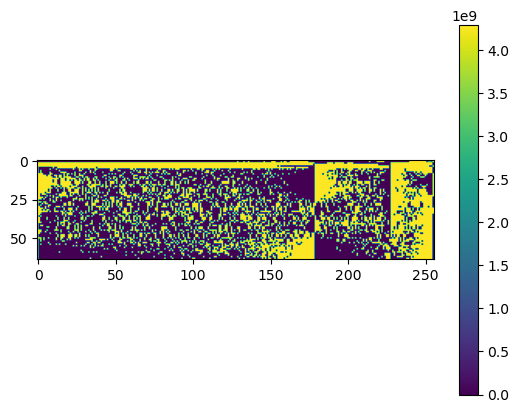

In [11]:
plt.imshow(data_mag_array)

# Add colorbar for reference
plt.colorbar()

# Display the plot
plt.show()

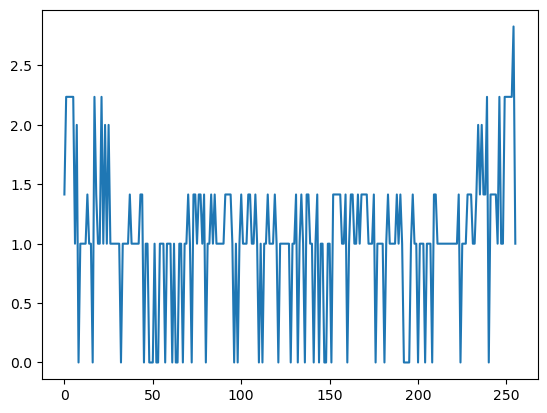

In [59]:
word_array = data_array[6]
im = [to_16bit_signed_integer(wd>>16) for wd in word_array]
re = [to_16bit_signed_integer(wd & 0xffff) for wd in word_array]
mag_array = []
for i in range(len(im)):
    mag_array.append(math.sqrt((im[i])**2 + (re[i])**2))

t = np.arange(0,256,1)
fig,ax = plt.subplots()
ax.plot(t,mag_array)



In [27]:
range_array = [[0x4ffff,0x10000,0xfffc,0x4fffc,0x30000,0x1fffe,0x4fffc,0x40001,0x0,0x2fffd,0x4ffff,0x10000,0x1fffd,0x5fffe,0x30002,0x1ffff,0x4fffe,0x40002,0x1,0x2fffe,0x40001,0x10001,0x2fffe,0x50000,0x20003,0x10000,0x40000,0x30003,0xffff0001,0x2ffff,0x40002,0x2,0x2ffff,0x40002,0x10004,0x0,0x30001,0x10004,0xffff0001,0x20000,0x30003,0xffff0003,0x10000,0x30003,0xffff0004,0xffff0000,0x20002,0xffff0004,0xfffe0001,0x20000,0x10004,0xfffe0002,0x0,0x10004,0xfffd0004,0xfffe0000,0x1,0xfffe0003,0xfffd0000,0x10000,0x4,0xfffc0002,0xffff0000,0xffff0003,0xfffc0003,0xfffdffff,0x1,0xfffd0003,0xfffc0000,0x0,0xfffe0004,0xfffb0001,0xfffeffff,0xfffe0003,0xfffb0001,0xfffdfffe,0xffff0001,0xfffc0002,0xfffcfffe,0x0,0xfffd0003,0xfffaffff,0xfffefffe,0xfffd0002,0xfffbffff,0xfffefffd,0xffff0000,0xfffc0000,0xfffcfffd,0xffffffff,0xfffc0001,0xfffbfffd,0xfffffffd,0xfffd0000,0xfffbfffd,0xfffefffc,0xffff0000,0xfffbffff,0xfffdfffc,0xfffffffe,0xfffc0000,0xfffcfffb,0xfffffffc,0xfffeffff,0xfffcfffc,0xfffb,0xffffffff,0xfffbfffe,0xfffefffb,0xfffe,0xfffcfffe,0xfffdfffa,0x1fffc,0xfffffffe,0xfffdfffb,0x1fffb,0xffff,0xfffcfffd,0xfffffffa,0x1fffd,0xfffdfffd,0xfffffffa,0x2fffc,0xffffffff,0xfffefffb,0x2fffc,0xffff,0xfffefffc,0x1fffa,0x2fffd,0xfffffffd,0x1fffa,0x3fffd,0xffff,0xfffb,0x3fffc,0xffff,0xfffffffb,0x3fffa,0x3fffe,0xfffd,0x2fffb,0x4fffe,0xffff,0x1fffc,0x4fffd,0x1ffff,0xfffc,0x4fffc,0x40000,0xfffe,0x3fffc,0x40000,0x0,0x2fffc,0x4ffff,0x10000,0x2fffd,0x5fffe,0x30001,0x1ffff,0x4fffe,0x40001,0x0,0x2fffd,0x40000,0x10001,0x2fffe,0x50000,0x20003,0x0,0x4ffff,0x30003,0x1,0x3fffe,0x40002,0x10002,0x2ffff,0x50001,0x10004,0x0,0x30000,0x20003,0xffff0001,0x2ffff,0x30003,0xffff0003,0x10000,0x30002,0xffff0004,0xffff0000,0x20001,0x4,0xfffe0001,0x20000,0x10004,0xfffe0003,0x0,0x20003,0xfffe0004,0xfffe0000,0x20001,0xffff0004,0xfffd0001,0x10001,0x4,0xfffd0002,0xffff0000,0x3,0xfffc0003,0xfffdffff,0x10001,0xfffe0004,0xfffc0000,0x1,0xfffe0004,0xfffb0002,0xfffeffff,0xffff0002,0xfffb0001,0xfffdfffe,0x1,0xfffd0003,0xfffcffff,0xffff0000,0xfffd0003,0xfffa0000,0xfffefffe,0xfffe0002,0xfffb0000,0xfffefffd,0xffff0001,0xfffb0002,0xfffcfffe,0xffffffff,0xfffc0001,0xfffafffd,0xfffefffd,0xfffe0000,0xfffbffff,0xfffefffd,0xffff0000,0xfffb0000,0xfffcfffc,0xfffffffe,0xfffc0000,0xfffbfffc,0xfffffffc,0xfffeffff,0xfffcfffd,0xfffffffc,0xffffffff,0xfffbfffe,0xfffdfffb,0xfffd,0xfffcffff],
[0x40000,0x10001,0xfffd,0x4fffe,0x20001,0xfffe,0x4fffe,0x40001,0x0,0x3fffe,0x40001,0x1,0x1fffe,0x5ffff,0x20002,0x1ffff,0x4ffff,0x30003,0x1,0x2fffe,0x30001,0x1,0x1fffe,0x50001,0x10003,0x0,0x40000,0x20004,0xffff0001,0x20000,0x30003,0xffff0002,0x1ffff,0x30002,0x4,0xffff0000,0x20002,0x4,0xfffe0001,0x20000,0x10003,0xfffe0003,0x10000,0x20003,0xfffe0004,0xfffe0000,0x10002,0xfffe0004,0xfffd0000,0x10000,0x4,0xfffd0002,0x0,0x10003,0xfffd0003,0xfffeffff,0x2,0xfffd0003,0xfffdffff,0x0,0xffff0003,0xfffc0001,0xffffffff,0xffff0003,0xfffc0002,0xfffdfffe,0x2,0xfffc0002,0xfffdfffe,0x0,0xfffd0003,0xfffb0000,0xffffffff,0xfffe0002,0xfffb0000,0xfffefffd,0xffff0000,0xfffc0001,0xfffdfffd,0x0,0xfffd0002,0xfffbfffe,0xfffffffe,0xfffe0001,0xfffbffff,0xfffefffc,0xffff0000,0xfffb0000,0xfffdfffd,0xffff,0xfffc0001,0xfffcfffd,0xfffffffd,0xfffe0000,0xfffbfffd,0xfffffffc,0xffff,0xfffcffff,0xfffefffc,0xffff,0xfffcffff,0xfffcfffb,0xfffd,0xfffeffff,0xfffcfffc,0x1fffb,0x0,0xfffdfffe,0xfffffffb,0xfffe,0xfffdfffe,0xfffefffb,0x2fffc,0xffffffff,0xfffefffb,0x2fffc,0xffff,0xfffdfffd,0x1fffb,0x1fffe,0xfffefffd,0xfffb,0x3fffd,0xffffffff,0xfffffffb,0x3fffd,0xffff,0xfffefffc,0x2fffb,0x2ffff,0xfffffffd,0x2fffa,0x4fffe,0xffff,0xfffc,0x3fffd,0x0,0xfffffffd,0x3fffc,0x30000,0xfffd,0x3fffb,0x40000,0x0,0x1fffc,0x4fffe,0x10000,0xfffd,0x4fffd,0x30001,0xfffe,0x4fffd,0x40001,0x1,0x2fffd,0x40000,0x10001,0x1fffd,0x5ffff,0x30002,0x1ffff,0x4fffe,0x30002,0x1,0x2fffe,0x40001,0x10001,0x2fffe,0x50000,0x20003,0x0,0x30000,0x20003,0xffff0001,0x2ffff,0x30002,0x2,0x1ffff,0x40002,0x4,0xffff0000,0x20001,0x10004,0xfffe0001,0x20000,0x20003,0xffff0002,0x10000,0x20003,0xfffe0004,0xfffe0000,0x10001,0xffff0004,0xfffe0001,0x10000,0x10004,0xfffd0002,0x0,0x10003,0xfffd0003,0xfffe0000,0x10001,0xfffe0003,0xfffd0000,0x10000,0xffff0004,0xfffc0002,0xffffffff,0xffff0003,0xfffc0002,0xfffeffff,0x1,0xfffd0003,0xfffdffff,0x0,0xfffe0003,0xfffb0001,0xffffffff,0xffff0002,0xfffb0001,0xfffdfffd,0x1,0xfffc0002,0xfffcfffe,0xffffffff,0xfffd0003,0xfffbfffe,0xfffffffe,0xfffe0001,0xfffbffff,0xfffefffd,0x0,0xfffc0001,0xfffcfffd,0xffffffff,0xfffc0001,0xfffbfffd,0xfffffffd,0xfffe0000,0xfffcfffe,0xfffffffc,0xffff0000,0xfffcffff,0xfffdfffc,0xffff,0xfffc0000,0xfffcfffc,0xfffc,0xfffeffff,0xfffcfffd,0xfffc,0xffff,0xfffcfffe,0xfffefffb,0xfffe,0xfffdfffe],
[0x40001,0x1,0xfffd,0x4ffff,0x20001,0xfffe,0x4fffe,0x30002,0x0,0x2fffe,0x30001,0x2,0x1fffe,0x40000,0x10003,0xffff,0x3ffff,0x30003,0xffff0001,0x2ffff,0x30002,0xffff0002,0x1fffe,0x40001,0x3,0x0,0x30001,0x10004,0xfffe0001,0x20000,0x20003,0xfffe0002,0x1ffff,0x30002,0xffff0004,0xffff0000,0x20002,0x4,0xfffe0001,0x10000,0x10003,0xfffd0002,0x10000,0x20003,0xfffe0003,0xfffe0000,0x10001,0xfffe0003,0xfffd0000,0x10000,0x3,0xfffd0001,0x0,0x10004,0xfffc0003,0xfffeffff,0x2,0xfffd0003,0xfffdffff,0x0,0xfffe0003,0xfffc0000,0xffffffff,0xffff0002,0xfffb0001,0xfffefffe,0xffff0001,0xfffc0002,0xfffdfffe,0x0,0xfffd0002,0xfffbffff,0xffffffff,0xfffe0002,0xfffb0000,0xfffefffd,0x0,0xfffc0000,0xfffdfffd,0xffff,0xfffd0002,0xfffcfffe,0xfffffffe,0xfffe0001,0xfffbfffe,0xfffefffc,0xffff0000,0xfffcffff,0xfffefffc,0xffff,0xfffc0000,0xfffcfffd,0xfffffffd,0xfffe0000,0xfffcfffd,0xfffc,0x0,0xfffcffff,0xfffffffc,0xffff,0xfffc0000,0xfffdfffb,0xfffd,0xfffeffff,0xfffdfffc,0x1fffc,0x0,0xfffdfffe,0xfffffffc,0x1fffe,0xfffdfffe,0xfffefffb,0x1fffd,0xffffffff,0xfffefffb,0x2fffc,0x0,0xfffefffd,0x1fffb,0x1ffff,0xfffefffe,0xfffb,0x3fffe,0xffff,0xfffffffc,0x3fffd,0x0,0xfffefffd,0x2fffc,0x2ffff,0xfffffffe,0x2fffb,0x4ffff,0xffff,0x1fffc,0x4fffe,0x10001,0xfffffffd,0x3fffc,0x20000,0xfffe,0x3fffc,0x40000,0x0,0x1fffd,0x4ffff,0x10001,0xfffd,0x4fffe,0x30001,0xffff,0x3fffe,0x30002,0x1,0x1fffe,0x40001,0x1,0x1fffe,0x4ffff,0x20002,0xffff,0x3ffff,0x20003,0xffff0001,0x2fffe,0x30002,0x2,0x1fffe,0x40000,0x10003,0x0,0x30000,0x20003,0xfffe0001,0x2ffff,0x20003,0xffff0002,0x1ffff,0x30002,0xffff0004,0xffff0000,0x20001,0x4,0xfffe0001,0x2ffff,0x10003,0xffff0002,0x0,0x20003,0xfffe0004,0xfffe0000,0x10001,0xffff0004,0xfffd0000,0x10000,0x4,0xfffd0002,0x0,0x10003,0xfffd0003,0xfffeffff,0x1,0xfffe0003,0xfffd0000,0x10000,0xffff0003,0xfffc0001,0xffffffff,0xffff0003,0xfffb0002,0xfffdfffe,0x1,0xfffd0002,0xfffdffff,0x0,0xfffe0003,0xfffb0000,0xffffffff,0xfffe0002,0xfffb0000,0xfffefffd,0x0,0xfffc0001,0xfffdfffe,0x0,0xfffd0002,0xfffbffff,0xfffffffe,0xfffe0001,0xfffbffff,0xfffefffd,0x0,0xfffc0000,0xfffdfffd,0xffffffff,0xfffc0001,0xfffcfffd,0xfffffffd,0xfffe0000,0xfffcfffd,0xfffffffc,0xffff0000,0xfffcffff,0xfffefffc,0xffff,0xfffdffff,0xfffdfffb,0xfffd,0xffff0000,0xfffdfffd,0xfffc,0x0,0xfffcfffe,0xfffffffb,0xfffe,0xfffdffff],
[0x30001,0x1,0xfffe,0x3ffff,0x10002,0xffff,0x3fffe,0x30002,0xffff0001,0x2fffe,0x30002,0xffff0002,0x1fffe,0x30000,0x10002,0xffff,0x30000,0x20003,0xffff0001,0x2ffff,0x20002,0xffff0002,0x1fffe,0x30001,0x3,0xffff,0x30001,0x10004,0xfffe0001,0x10000,0x10003,0xfffe0002,0xffff,0x20002,0xffff0003,0xffffffff,0x20002,0xffff0004,0xfffd0000,0x10000,0x3,0xfffd0001,0xffff,0x10003,0xfffe0003,0xfffe0000,0x10001,0xfffe0003,0xfffd0000,0x10000,0x3,0xfffd0001,0x0,0x3,0xfffc0002,0xfffeffff,0x2,0xfffc0002,0xfffdffff,0x0,0xfffe0003,0xfffc0000,0xffffffff,0xffff0003,0xfffb0001,0xfffefffe,0xffff0001,0xfffc0001,0xfffdfffe,0x0,0xfffd0002,0xfffcffff,0xffffffff,0xfffe0002,0xfffbffff,0xfffefffd,0xffff0000,0xfffc0000,0xfffefffd,0x0,0xfffd0001,0xfffcfffe,0xfffe,0xfffe0001,0xfffbfffe,0xfffffffc,0xffff0000,0xfffcffff,0xfffefffc,0xffff,0xfffd0000,0xfffdfffd,0xfffe,0xfffe0000,0xfffcfffd,0xfffc,0x0,0xfffcfffe,0xfffffffc,0xffff,0xfffdffff,0xfffefffc,0x1fffd,0xfffeffff,0xfffdfffc,0x1fffc,0x0,0xfffdfffe,0xfffc,0x1ffff,0xfffdfffe,0xfffffffb,0x2fffe,0xffffffff,0xfffffffc,0x2fffd,0x0,0xfffefffd,0x1fffc,0x1ffff,0xfffefffe,0xfffb,0x3fffe,0xffff,0xfffc,0x3fffe,0x0,0xfffffffd,0x2fffc,0x2ffff,0xfffffffe,0x2fffc,0x4ffff,0x0,0x1fffd,0x3ffff,0x1,0xfffffffd,0x3fffd,0x20000,0xfffffffe,0x3fffd,0x40000,0x0,0x1fffd,0x30000,0x1,0xfffe,0x4fffe,0x20001,0xffff,0x3fffe,0x30002,0x1,0x1fffe,0x30001,0x1,0x1fffe,0x30000,0x20002,0xffff,0x3ffff,0x20003,0xffff0001,0x1ffff,0x30001,0xffff0002,0x1fffe,0x40001,0x10003,0x0,0x30001,0x10003,0xfffe0001,0x2ffff,0x20002,0xffff0002,0x1ffff,0x30002,0xffff0003,0xffff0000,0x20001,0xffff0004,0xfffe0000,0x1ffff,0x10003,0xfffe0002,0x0,0x20003,0xfffe0003,0xfffe0000,0x10001,0xfffe0003,0xfffd0000,0x10000,0x3,0xfffd0002,0xffff,0x3,0xfffc0003,0xfffeffff,0x1,0xfffd0002,0xfffdffff,0x0,0xffff0003,0xfffc0001,0xffffffff,0xffff0002,0xfffb0001,0xfffefffe,0x1,0xfffd0002,0xfffdfffe,0x0,0xfffe0003,0xfffc0000,0xffffffff,0xfffe0002,0xfffb0000,0xfffefffd,0x0,0xfffd0001,0xfffdfffd,0xffff,0xfffd0002,0xfffcfffe,0xfffffffe,0xfffe0001,0xfffbffff,0xfffffffd,0x0,0xfffc0000,0xfffefffd,0xffff,0xfffc0000,0xfffcfffd,0xfffd,0xfffe0000,0xfffcfffd,0xfffc,0x0,0xfffcffff,0xfffefffc,0xffff,0xfffcffff,0xfffdfffc,0x1fffd,0xfffe0000,0xfffdfffd,0x1fffc,0x0,0xfffdfffe,0xfffffffc,0x1ffff,0xfffdfffe],
[0x30001,0x1,0xfffe,0x3ffff,0x10001,0xffff,0x3ffff,0x20002,0xffff0000,0x2ffff,0x30002,0xffff0002,0xfffe,0x30000,0x2,0xffff,0x30000,0x10003,0xffff0001,0x1ffff,0x20002,0xfffe0001,0xffff,0x30001,0x3,0xffff,0x20001,0x3,0xfffe0001,0x10000,0x10003,0xfffe0001,0xffff,0x20002,0xffff0003,0xffff,0x20001,0xffff0003,0xfffd0000,0x10000,0x3,0xfffd0001,0xffff,0x10002,0xfffd0002,0xfffe0000,0x10002,0xfffd0003,0xfffdffff,0x10000,0xffff0002,0xfffd0000,0xffff,0x3,0xfffd0002,0xfffeffff,0x1,0xfffd0002,0xfffdfffe,0xffff,0xfffe0002,0xfffdffff,0xffffffff,0xffff0002,0xfffc0001,0xfffefffe,0xffff0001,0xfffc0001,0xfffdfffd,0xffff,0xfffe0002,0xfffcffff,0xffff,0xfffe0001,0xfffbffff,0xfffefffd,0xffff0000,0xfffc0000,0xfffefffd,0xffff,0xfffd0001,0xfffdfffe,0xfffe,0xfffe0001,0xfffbfffe,0xfffffffc,0xffff0000,0xfffcffff,0xfffffffc,0xffff,0xfffd0000,0xfffdfffd,0xfffe,0xfffe0000,0xfffdfffc,0xfffd,0x0,0xfffdfffe,0xfffffffc,0xffff,0xfffdffff,0xfffefffc,0x1fffd,0xfffeffff,0xfffefffc,0x1fffd,0x0,0xfffefffe,0xfffc,0xffff,0xfffeffff,0xfffffffb,0x2fffe,0xffffffff,0xfffffffc,0x2fffd,0x0,0xfffefffe,0x1fffc,0x10000,0xfffefffe,0xfffb,0x2fffe,0xffffffff,0xfffc,0x3fffe,0x1,0xfffffffd,0x2fffd,0x10000,0xfffffffe,0x2fffc,0x3ffff,0x0,0x1fffd,0x3ffff,0x1,0xfffffffd,0x3fffe,0x20000,0xfffffffe,0x3fffd,0x30001,0x0,0x1fffe,0x30000,0x1,0xfffe,0x3ffff,0x20001,0xffff,0x3ffff,0x20002,0xffff0001,0x2fffe,0x30001,0x1,0xfffe,0x30000,0x10002,0xffff,0x30000,0x20003,0xffff0001,0x1ffff,0x20002,0xffff0001,0x1fffe,0x30001,0x3,0xffff0000,0x20000,0x10003,0xfffe0001,0x1ffff,0x10003,0xfffe0002,0x1ffff,0x20002,0xffff0003,0xffff0000,0x10001,0x4,0xfffe0000,0x10000,0x3,0xfffe0001,0xffff,0x10003,0xfffd0003,0xfffe0000,0x1,0xfffe0003,0xfffdffff,0x0,0x3,0xfffd0001,0x0,0x3,0xfffd0002,0xfffeffff,0x1,0xfffd0002,0xfffdfffe,0x0,0xffff0002,0xfffc0000,0xffffffff,0xffff0003,0xfffb0001,0xfffefffe,0x1,0xfffd0001,0xfffdfffe,0x10000,0xfffe0002,0xfffcffff,0xffffffff,0xfffe0002,0xfffbffff,0xfffefffd,0x0,0xfffd0000,0xfffefffd,0x0,0xfffd0001,0xfffcfffe,0xfffffffe,0xfffe0001,0xfffbfffe,0xfffffffc,0x0,0xfffc0000,0xfffefffd,0xffff,0xfffd0000,0xfffdfffd,0xfffe,0xfffe0000,0xfffdfffd,0xfffd,0x0,0xfffdffff,0xfffffffc,0xffff,0xfffdffff,0xfffdfffc,0x1fffd,0xffff0000,0xfffefffc,0x1fffd,0x0,0xfffdfffe,0xfffc,0x1ffff,0xfffdffff],
[0x30001,0xffff0001,0xfffe,0x30000,0x10001,0xffff,0x3ffff,0x20002,0xffff0001,0x2ffff,0x20002,0xffff0002,0xfffe,0x20000,0xffff0002,0xffff,0x30000,0x10003,0xffff0001,0x1ffff,0x10002,0xfffe0001,0xfffe,0x20001,0x2,0xffffffff,0x20001,0x3,0xfffe0000,0x10000,0x3,0xfffe0001,0xffff,0x20002,0xfffe0002,0xffffffff,0x20001,0xffff0003,0xfffd0000,0x10000,0x2,0xfffd0000,0xffff,0x10002,0xfffe0002,0xffffffff,0x1,0xfffd0002,0xfffdffff,0x0,0xffff0002,0xfffd0000,0xffff,0x2,0xfffd0001,0xfffeffff,0x1,0xfffd0001,0xfffdfffe,0xffff,0xfffe0002,0xfffdffff,0xffff,0xffff0002,0xfffc0000,0xfffefffe,0x1,0xfffc0000,0xfffefffd,0x1ffff,0xfffe0001,0xfffdfffe,0xffff,0xfffe0002,0xfffcffff,0xfffffffd,0x0,0xfffd0000,0xfffefffd,0x0,0xfffe0001,0xfffdfffe,0xfffe,0xfffe0001,0xfffcfffe,0xfffd,0x0,0xfffdffff,0xfffffffd,0x10000,0xfffe0000,0xfffdfffd,0xfffe,0xfffe0000,0xfffdfffd,0x1fffc,0x0,0xfffdfffe,0xfffd,0x10000,0xfffdffff,0xfffffffc,0x1fffe,0xfffeffff,0xfffefffc,0x2fffd,0x0,0xfffefffe,0x1fffd,0x10000,0xfffdffff,0xfffffffc,0x2fffe,0xffffffff,0xfffc,0x2fffd,0x0,0xfffefffe,0x1fffd,0x10000,0xfffefffe,0x1fffc,0x2ffff,0xffff,0xfffd,0x3ffff,0x1,0xfffffffe,0x2fffd,0x10000,0xfffffffe,0x2fffd,0x30000,0x0,0x1fffd,0x30000,0x1,0xfffffffe,0x3fffe,0x10001,0xfffffffe,0x3fffe,0x20001,0x0,0x1fffe,0x30000,0xffff0001,0xfffe,0x3ffff,0x10001,0xffff,0x3fffe,0x20002,0xffff0001,0x1fffe,0x20001,0xffff0002,0xfffe,0x30000,0x2,0xffff,0x30000,0x10003,0xfffe0001,0x1ffff,0x20002,0xffff0001,0xfffe,0x30001,0x3,0xffffffff,0x20001,0x3,0xfffe0000,0x1ffff,0x10002,0xfffe0001,0x1ffff,0x20002,0xffff0003,0xffff0000,0x10001,0xffff0003,0xfffe0000,0x1ffff,0x2,0xfffe0001,0xffff,0x10003,0xfffe0003,0xfffeffff,0x1,0xfffe0002,0xfffdffff,0x10000,0xffff0002,0xfffd0001,0xffff,0x3,0xfffd0001,0xfffeffff,0x1,0xfffd0001,0xfffdfffe,0x1ffff,0xfffe0002,0xfffd0000,0xffffffff,0xffff0002,0xfffc0001,0xfffefffe,0x0,0xfffd0001,0xfffefffe,0xffff,0xfffe0002,0xfffcfffe,0xffffffff,0xfffe0002,0xfffcffff,0xfffffffd,0x0,0xfffd0000,0xfffefffd,0x0,0xfffe0001,0xfffcfffe,0xfffe,0xfffe0001,0xfffcfffe,0xfffffffd,0x0,0xfffdffff,0xfffefffd,0x0,0xfffd0000,0xfffdfffd,0xfffe,0xfffe0000,0xfffdfffd,0xfffd,0x0,0xfffdffff,0xfffffffd,0x0,0xfffd0000,0xfffefffc,0x1fffe,0xffffffff,0xfffefffc,0x1fffd,0x0,0xfffdfffe,0xfffd,0x10000,0xfffdfffe],
[0x30001,0xffff0002,0xffff,0x30000,0x1,0xffffffff,0x3ffff,0x10002,0xffff0000,0x1ffff,0x10002,0xffff0001,0xffff,0x20000,0x2,0xffffffff,0x30000,0x10003,0xffff0000,0x10000,0x10002,0xfffe0001,0xffff,0x20001,0xffff0002,0xffffffff,0x20001,0x3,0xfffe0000,0x10000,0x3,0xfffe0001,0xffff,0x10002,0xfffe0002,0xffff0000,0x10001,0xfffe0003,0xfffd0000,0x10000,0xffff0002,0xfffd0000,0xffff,0x2,0xfffe0001,0xffffffff,0x1,0xfffe0002,0xfffeffff,0x10000,0xffff0002,0xfffd0000,0xffff,0x2,0xfffd0001,0xfffeffff,0x1,0xfffd0001,0xfffefffe,0xffff,0xfffe0001,0xfffdffff,0xffff,0xffff0002,0xfffc0000,0xfffffffe,0x1,0xfffd0000,0xfffefffd,0xffff,0xfffe0001,0xfffdffff,0xffff,0xfffe0001,0xfffcffff,0xfffffffe,0x0,0xfffd0000,0xfffffffd,0x10000,0xfffe0001,0xfffefffe,0xffff,0xfffe0001,0xfffdfffe,0xfffd,0x0,0xfffdffff,0xfffd,0x10000,0xfffe0000,0xfffefffd,0xffff,0xfffe0000,0xfffefffd,0x1fffd,0x0,0xfffefffe,0xfffd,0x10000,0xfffe0000,0xfffffffd,0x1ffff,0xfffe0000,0xfffffffd,0x2fffd,0x0,0xfffefffe,0x1fffd,0x10000,0xfffeffff,0xfffc,0x1ffff,0xffffffff,0xfffd,0x2fffe,0x1,0xfffffffe,0x1fffe,0x10001,0xfffeffff,0x1fffd,0x2ffff,0x0,0xfffd,0x2ffff,0x1,0xfffffffe,0x2fffe,0x10000,0xfffffffe,0x2fffd,0x20000,0x0,0x1fffe,0x30000,0xffff0001,0xfffe,0x2ffff,0x10001,0xfffffffe,0x3fffe,0x20001,0x0,0x1ffff,0x20001,0xffff0001,0xfffe,0x3ffff,0x10001,0xffff,0x2ffff,0x20002,0xffff0001,0x1ffff,0x20002,0xffff0001,0xfffe,0x20000,0x10002,0xffff,0x20000,0x10003,0xfffe0001,0x1ffff,0x10002,0xffff0001,0xffff,0x20001,0x2,0xffff0000,0x20001,0x3,0xfffe0000,0x1ffff,0x2,0xfffe0001,0xffff,0x20002,0xfffe0002,0xffff0000,0x10001,0xffff0003,0xfffe0000,0x10000,0x2,0xfffe0001,0xffff,0x10002,0xfffd0002,0xfffeffff,0x1,0xfffe0002,0xfffeffff,0x1ffff,0xffff0002,0xfffe0000,0xffff,0x2,0xfffd0001,0xfffeffff,0x1,0xfffd0002,0xfffefffe,0x10000,0xfffe0002,0xfffd0000,0xffff,0xffff0002,0xfffc0000,0xfffefffe,0x0,0xfffd0001,0xfffefffe,0x0,0xfffe0002,0xfffdffff,0xffff,0xfffe0001,0xfffcffff,0xfffffffd,0x0,0xfffd0000,0xfffffffd,0x10000,0xfffd0001,0xfffdfffe,0xffff,0xfffe0001,0xfffdfffe,0xfffd,0x0,0xfffdffff,0xfffffffd,0x0,0xfffe0000,0xfffefffd,0xfffe,0xffff0000,0xfffdfffd,0x1fffd,0x0,0xfffdffff,0xfffd,0x10000,0xfffd0000,0xfffefffd,0x1fffe,0xffff0000,0xfffffffd,0x1fffe,0x0,0xfffeffff,0xfffd,0x10000,0xfffeffff],
[0x20001,0xffff0001,0xfffffffe,0x20000,0xffff0001,0xfffffffe,0x2ffff,0x10002,0xffff0000,0x1ffff,0x10001,0xfffe0001,0xffff,0x10000,0xffff0001,0xffffffff,0x20000,0x2,0xfffe0000,0x1ffff,0x2,0xfffe0000,0xfffe,0x10001,0xffff0001,0xffffffff,0x10001,0xffff0002,0xfffe0000,0x0,0x2,0xfffe0000,0xffff,0x10002,0xfffe0001,0xffffffff,0x10001,0xfffe0002,0xfffeffff,0x0,0xffff0002,0xfffe0000,0xffff,0x2,0xfffd0001,0xffffffff,0x1,0xfffd0002,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x2,0xfffd0001,0xffffffff,0x1,0xfffd0001,0xfffefffe,0x0,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffd0000,0xfffefffe,0xffff0001,0xfffd0000,0xfffefffd,0x0,0xfffe0001,0xfffefffe,0xffff,0xfffe0001,0xfffdffff,0xfffffffe,0xffff0000,0xfffdffff,0xfffffffd,0x0,0xfffe0000,0xfffefffe,0xffff,0xfffe0001,0xfffdfffe,0xfffd,0x0,0xfffdfffe,0xfffd,0x10000,0xfffd0000,0xfffefffd,0xffff,0xfffe0000,0xfffefffd,0x1fffe,0x0,0xfffefffe,0xfffd,0x0,0xfffe0000,0xfffffffd,0x1ffff,0xfffeffff,0xfffffffd,0x1fffd,0x0,0xfffefffe,0x1fffe,0x0,0xfffeffff,0xfffd,0x1ffff,0xffffffff,0xfffd,0x2fffe,0x0,0xfffefffe,0x1fffe,0x0,0xfffefffe,0xfffd,0x2ffff,0xffffffff,0xfffd,0x2ffff,0x1,0xfffffffe,0x2ffff,0x0,0xfffffffe,0x1fffd,0x20000,0xffff0000,0x1fffe,0x20000,0xffff0001,0xfffffffe,0x2ffff,0x1,0xfffffffe,0x2fffe,0x20001,0xffff0000,0x1fffe,0x20001,0xffff0001,0xfffffffe,0x2ffff,0x1,0xfffffffe,0x2ffff,0x10002,0xffff0001,0x1ffff,0x10001,0xfffe0001,0xfffe,0x20000,0x1,0xffffffff,0x20000,0x2,0xfffe0000,0x1ffff,0x10001,0xfffe0000,0xfffe,0x20001,0xffff0002,0xffffffff,0x10000,0xffff0002,0xfffe0000,0x1ffff,0x2,0xfffe0000,0xffff,0x10001,0xfffe0002,0xffffffff,0x10001,0xfffe0002,0xfffeffff,0x1ffff,0x1,0xfffe0000,0xffff,0x2,0xfffd0001,0xfffeffff,0x1,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffe0000,0xffff,0x2,0xfffd0001,0xfffeffff,0x1,0xfffd0001,0xfffefffe,0xffff,0xffff0002,0xfffeffff,0xffff,0xffff0002,0xfffc0000,0xfffffffe,0x0,0xfffd0000,0xfffffffe,0x1ffff,0xfffe0001,0xfffdffff,0xffff,0xffff0001,0xfffcffff,0xfffffffe,0x0,0xfffdffff,0xfffffffe,0x0,0xfffe0001,0xfffdfffe,0xffff,0xfffe0000,0xfffcfffe,0xfffd,0x0,0xfffeffff,0xfffffffd,0x0,0xfffd0000,0xfffefffd,0xfffe,0xfffe0000,0xfffefffd,0x1fffd,0x0,0xfffdffff,0xfffe,0x0,0xfffdffff,0xfffefffd,0x1fffe,0xffffffff,0xfffffffd,0x1fffe,0x1,0xfffefffe,0xfffd,0x0,0xfffeffff],
[0x20001,0xfffe0001,0xfffe,0x10000,0xffff0001,0xfffffffe,0x2ffff,0x10002,0xffff0000,0x1ffff,0x10001,0xfffe0001,0xfffe,0x10000,0xffff0001,0xffffffff,0x20000,0x2,0xfffe0000,0x10000,0x1,0xfffe0000,0xfffe,0x10001,0xffff0001,0xffffffff,0x10000,0xffff0002,0xfffeffff,0xffff,0xffff0002,0xfffe0000,0xfffe,0x10001,0xfffe0001,0xffffffff,0x10001,0xfffe0002,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0x1,0xfffd0001,0xfffefffe,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffd0000,0xffffffff,0xffff0001,0xfffd0000,0xfffefffe,0xffff,0xfffe0001,0xfffeffff,0xffff,0xffff0002,0xfffd0000,0xfffffffe,0xffff0000,0xfffd0000,0xfffffffe,0x1ffff,0xfffe0000,0xfffefffe,0xffff,0xfffe0001,0xfffdfffe,0xfffffffe,0xffff0000,0xfffdffff,0xfffd,0xffff,0xfffe0000,0xfffefffe,0xffff,0xfffe0001,0xfffdfffe,0xfffe,0xffff0000,0xfffeffff,0xfffd,0x10000,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffefffd,0x1fffe,0x0,0xfffefffe,0xfffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffeffff,0xfffffffd,0x2fffe,0x0,0xfffffffe,0x1fffe,0x0,0xfffeffff,0xfffd,0x1ffff,0xffffffff,0xfffd,0x2ffff,0x1,0xfffffffe,0x1fffe,0x0,0xfffeffff,0xfffd,0x10000,0xffffffff,0xfffe,0x2ffff,0xffff0001,0xfffffffe,0x1ffff,0x1,0xfffffffe,0x1fffe,0x10000,0xffff0000,0x1fffe,0x20000,0xffff0001,0xffffffff,0x2ffff,0x1,0xfffffffe,0x2fffe,0x10001,0xffff0000,0x1ffff,0x10001,0xffff0000,0xfffffffe,0x2ffff,0x1,0xffffffff,0x2ffff,0x10001,0xfffe0000,0xffff,0x10001,0xfffe0000,0xfffffffe,0x20000,0xffff0001,0xfffe,0x20000,0x2,0xfffe0000,0xffff,0x1,0xfffe0000,0xfffe,0x20001,0xffff0001,0xffffffff,0x10000,0xffff0002,0xfffe0000,0xffff,0x1,0xfffe0000,0xffff,0x10001,0xfffe0001,0xffffffff,0x1,0xfffe0001,0xfffeffff,0x1ffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0001,0xffffffff,0x1,0xfffe0001,0xfffefffe,0x1ffff,0xffff0001,0xfffeffff,0xffff,0xffff0002,0xfffd0000,0xfffeffff,0x0,0xfffd0000,0xfffefffe,0x1ffff,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffd0000,0xfffffffe,0xffff0000,0xfffd0000,0xfffffffe,0x10000,0xfffe0001,0xfffeffff,0xffff,0xfffe0001,0xfffdffff,0xfffffffd,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0001,0xfffefffe,0xffff,0xfffe0000,0xfffdfffe,0xfffd,0x0,0xfffeffff,0xfffe,0x0,0xfffd0000,0xfffefffd,0xfffe,0xfffe0000,0xfffefffd,0x1fffe,0x0,0xfffeffff,0xfffe,0x0,0xfffe0000,0xfffffffd,0x1ffff,0xffff0000,0xfffffffd,0x1fffe,0x1,0xfffeffff,0xfffe,0x0,0xfffeffff],
[0x10001,0xffff0000,0xfffffffe,0x10000,0xffff0001,0xfffffffe,0x1ffff,0x1,0xffff0000,0x1ffff,0x1,0xfffe0000,0xfffffffe,0x10000,0xffff0001,0xffffffff,0x10000,0x1,0xfffeffff,0x0,0x1,0xfffe0000,0xfffe,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xfffeffff,0x0,0xffff0001,0xfffe0000,0xfffe,0x1,0xfffe0000,0xffff,0x10001,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffff,0x1,0xfffe0001,0xfffefffe,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0x1,0xfffd0000,0xfffefffe,0xffff,0xffff0000,0xfffeffff,0xffff,0xffff0001,0xfffd0000,0xffffffff,0xffff0000,0xfffd0000,0xfffffffd,0x1ffff,0xfffe0000,0xfffffffe,0xffff,0xfffe0001,0xfffdffff,0xfffe,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffefffe,0xfffe,0xffff0000,0xfffefffe,0xfffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffefffe,0x1fffe,0x0,0xfffeffff,0x1fffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffeffff,0xfffffffd,0x1fffe,0x0,0xffffffff,0x1fffe,0x0,0xfffeffff,0xfffe,0x1ffff,0xffffffff,0xfffd,0x1ffff,0x0,0xfffffffe,0x1ffff,0x0,0xfffeffff,0x1fffe,0x10000,0xffffffff,0xfffe,0x10000,0xffff0001,0xfffffffe,0x1ffff,0x0,0xfffefffe,0x1fffe,0x10000,0xffffffff,0x1ffff,0x10001,0xffff0001,0xfffffffe,0x1ffff,0xffff0001,0xfffffffe,0x2ffff,0x10001,0xffff0000,0xffff,0x10001,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0x2ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0x10000,0xffff0000,0xffff,0x20000,0x2,0xfffe0000,0xffff,0x1,0xfffe0000,0xfffe,0x10001,0xffff0001,0xffffffff,0x10000,0xffff0001,0xfffeffff,0xffff,0x1,0xfffeffff,0xffff,0x10001,0xfffe0001,0xffffffff,0x1,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0x1ffff,0x1,0xfffe0001,0xffffffff,0x0,0xfffe0001,0xfffefffe,0xffff,0xffff0001,0xfffeffff,0xffff,0x2,0xfffd0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0x1ffff,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffd0000,0xfffffffe,0xffff0000,0xfffe0000,0xfffffffe,0x10000,0xfffe0001,0xfffeffff,0x0,0xfffe0001,0xfffdffff,0xfffffffe,0x0,0xfffeffff,0xfffffffe,0x0,0xfffe0001,0xfffefffe,0xffff,0xfffe0000,0xfffefffe,0xfffe,0x0,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xfffefffe,0xffff,0xffff0000,0xfffefffe,0x1fffe,0x0,0xfffeffff,0xfffe,0x0,0xfffeffff,0xfffffffd,0xffff,0xfffe0000,0xfffffffe,0x1ffff,0x1,0xfffeffff,0xfffe,0x0,0xfffeffff],
[0x20001,0xffff0000,0xffffffff,0x10000,0xffff0000,0xfffffffe,0x1ffff,0x1,0xffffffff,0xffff,0x1,0xfffe0000,0xfffe,0x0,0xffff0000,0xffffffff,0x10000,0x1,0xffffffff,0x0,0xffff0001,0xfffe0000,0xfffe,0x10000,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xfffe,0x0,0xffff0000,0xffff,0x1,0xfffe0001,0xfffeffff,0x0,0xffff0001,0xfffeffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0001,0xfffeffff,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x1,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffffffe,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xfffe,0xffff0000,0xfffeffff,0xfffffffe,0x10000,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xfffe,0x0,0xfffeffff,0xfffe,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xffff,0xffff0000,0xfffeffff,0x1ffff,0x1,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0001,0xfffffffe,0xffff,0xffff0000,0xfffefffe,0x1fffe,0x10000,0xffffffff,0xffff,0x10000,0xffff0000,0xffffffff,0x1ffff,0xffff0000,0xfffffffe,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0x10000,0xffff0001,0xffffffff,0x10000,0x1,0xffff0000,0xffff,0xffff0000,0xfffe0000,0xfffe,0x10000,0xffff0000,0xffffffff,0x10000,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x10001,0xffff0000,0xffff,0x0,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xffffffff,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xffff,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x1ffff,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xfffffffe,0x10000,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xfffe,0xffff,0xfffeffff,0xfffe,0x0,0xfffe0001,0xfffeffff,0xffff,0xfffe0001,0xfffefffe,0xfffe,0x0,0xfffeffff,0xfffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffffffe,0x1fffe,0x0,0xfffeffff,0xfffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffffffe,0x1ffff,0x1,0xffffffff,0xffff,0xffff0000,0xfffeffff],
[0x10001,0xffff0000,0xffffffff,0x0,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xfffe0000,0xfffe,0xffff,0xffff0000,0xfffffffe,0x10000,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffeffff,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0x0,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xfffe,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xfffffffe,0xffff0000,0xffffffff,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xfffffffe,0x1ffff,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xfffe,0xffff,0xffffffff,0xfffe,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffefffe,0xfffe,0x0,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0x1fffe,0x0,0xffff0000,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xfffeffff,0xfffe,0x10000,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffe,0x0,0xffff0001,0xffffffff,0x0,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xfffe0000,0xfffeffff,0xfffe,0x0,0xfffeffff,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffefffe,0xffff,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xfffffffe,0x0,0xfffe0000,0xfffffffe,0x1ffff,0xffff0000,0xfffeffff,0xffff,0xffff0000,0xfffeffff],
[0x10000,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xfffe,0x1ffff,0x1,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x0,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffe,0x0,0xffffffff,0xffff,0x0,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xfffe0000,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffefffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xfffeffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0xffff,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0xfffe,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffffffe,0x1fffe,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffffffff,0xffffffff,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0xffff,0xffff0000,0xfffe,0x10000,0x0,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x1ffff,0xffffffff,0xffff,0x0,0xffff0001,0xffffffff,0xffff,0x0,0xffffffff,0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x10000,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xfffeffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xffffffff,0xffff,0xfffe0000,0xffffffff,0xffff,0x0,0xffffffff,0xffffffff,0x1,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffffffe,0xffff,0x0,0xffffffff,0xffff,0xffff0000,0xfffeffff],
[0x10001,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0xffff,0x0,0xffffffff,0xffff,0x0,0xfffeffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0x1,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0xffffffff,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffefffe,0xfffe,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0x1ffff,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffffffe,0xffff,0xffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffe,0x10000,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x1ffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0x1ffff,0x0,0xffff0000,0x0,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x1,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xffffffff,0xffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xfffffffe,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff],
[0x10000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x1ffff,0x0,0x10000,0x0,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0x1,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0x0,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0001,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0x0,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xfffffffe,0xfffe,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x10000,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0x1ffff,0x0,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0xffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xfffeffff,0xffffffff,0x0,0xffffffff,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff],
[0x10000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0x1ffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xfffe,0x1ffff,0xffff,0x0,0xffff,0x0,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffff,0x1ffff,0xffff,0x0,0x0,0x0,0xffff,0x0,0x0,0xffff,0xffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x1ffff,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffefffe,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffffffff,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffff,0x10000,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x10000,0xffff0001,0x0,0x0,0xffff0000,0xffff,0xffff,0x0,0xffff,0x0,0x1,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x1,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0x0,0xffff0000,0xffff,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff],
[0x10000,0xffffffff,0xffffffff,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x10000,0x0,0x0,0xffff,0x0,0xffff,0xffff,0x10000,0x0,0x0,0x0,0x0,0xffff,0xffff,0x0,0xffffffff,0x1ffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0xffff,0x1ffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffff,0x1ffff,0x1ffff,0xffff,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0x0,0x0,0xffff0000,0xffff,0x0,0xffff,0xffff,0x10000,0x0,0xffff,0x0,0x0,0xffff,0xffff,0x0,0x0,0x0,0x0,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0x0,0x0,0xffff0000,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xfffeffff],
[0x10000,0xffff,0xffffffff,0xffff,0xffff,0xfffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0xffff,0x0,0xffff,0xffff,0xffff,0xffff,0x10000,0xffff,0xffff,0x10000,0x0,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x10000,0x0,0xffff0000,0xffff,0x0,0x0,0xffff,0x10000,0x0,0x0,0x0,0x0,0xffff0000,0x0,0x0,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0xfffe,0xffff,0xfffe,0x1ffff,0xffff,0xffff,0xffff,0xffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0xffff,0x1ffff,0xffff,0xffff,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x0,0x0,0x0,0x0,0x0,0xffff,0xffff,0x0,0x1ffff,0x10000,0x1,0x0,0x0,0x0,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0x1,0xffff0000,0x0,0x0,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x0,0xffff0001,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0xffff0000,0x0,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff],
[0x10000,0x0,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0x1ffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0xffff,0xffff,0xffff,0xfffe,0x1ffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0x0,0x0,0x0,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0xffff,0x0,0x0,0x0,0x0,0x0,0xffff0000,0x0,0x0,0x0,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0x0,0xffff0000,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffffffff,0xffff0000,0xffffffff,0xfffe0000,0xfffe0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xfffe,0xfffe,0xffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0x10000,0x0,0xffff,0xfffe,0xffff,0xffff,0x1ffff,0x10000,0xffff,0x10000,0x10000,0x0,0xffff,0x1ffff,0xffff,0x1ffff,0x1ffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x10000,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x10000,0x1,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xfffeffff,0xffff0000,0xfffeffff],
[0x10000,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0x1ffff,0xffff,0xffff,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0x1ffff,0x1ffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0x0,0x0,0xffff,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0x10000,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0000,0x0,0x0,0x1,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0xffff0001,0xffff0000,0x1,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffff,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffeffff,0xffff,0xffffffff,0xffff0000,0xffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffe,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0x1ffff,0xffff,0xffff,0x1ffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x1ffff,0x0,0xffff,0x1ffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x0,0x10000,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff,0x10000,0x1,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x0,0x1,0xffff0000,0x0,0x0,0xffff0000,0x0,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xffff0000,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x1,0xfffe0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffff0000],
[0x1ffff,0x0,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xffff,0x1ffff,0xffff,0xffff,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0x1ffff,0x10000,0x0,0xffff,0x10000,0x0,0xffff0000,0x0,0x0,0xffff,0x1ffff,0x10000,0x0,0xffff,0x1,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0x10000,0x0,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0001,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffff0000,0x0,0xfffe0001,0xfffeffff,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0xffff,0xffff0000,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffe,0x0,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xffff,0x0,0xffffffff,0xfffe,0x0,0xffffffff,0xfffe,0xffff,0xffff,0xfffe,0x1ffff,0x0,0xffff,0xffff,0xffff,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x10000,0x0,0xffff,0x10000,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff,0x10000,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0x1,0x0,0x1,0xffff0001,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff,0x0,0xffff0000,0xffff0000,0x1,0xffff0001,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffff,0xffff0000,0xffff0000,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffff0000,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000],
[0x1ffff,0x0,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0x1fffe,0x10000,0x0,0xffff,0x1ffff,0x0,0xffffffff,0xffff,0x10000,0x0,0x1ffff,0x10000,0x1,0xffffffff,0x10000,0xffff0000,0xffffffff,0xffff,0x10000,0x0,0xffff,0x1,0xffff0000,0xffff,0x0,0x0,0xffff,0x1ffff,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0001,0xffff,0x10000,0x1,0xffff0000,0x0,0x0,0xfffe0000,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffff,0x1,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffefffe,0xfffe,0xffff,0xffffffff,0xfffe,0x0,0xffff0000,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xfffe,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0xfffe,0x1ffff,0x0,0xffff,0xffff,0x0,0xffffffff,0xfffe,0x10000,0xffff,0xffff,0x10000,0x0,0xffffffff,0xffff,0x0,0xffffffff,0x1fffe,0x1ffff,0x0,0xffff,0x10000,0x0,0xffffffff,0x1ffff,0x0,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff,0x10000,0x10001,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x1ffff,0x0,0xffff0000,0x10000,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xffff0000,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffffffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffffffff,0xffff0000],
[0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0x1ffff,0x0,0xffffffff,0xffff,0x10000,0xffff,0xffff,0x10000,0x1,0xffffffff,0x10000,0x0,0xffffffff,0x1ffff,0x10000,0x0,0xffff,0x10000,0xffff0001,0xffff,0x10000,0x0,0xffffffff,0x1ffff,0x10000,0x0,0x1ffff,0x10001,0xffff0000,0xffff,0x0,0x1,0xffff,0x10000,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0001,0x0,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff,0x1,0xffff0001,0xffffffff,0x1,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffff0001,0xfffe0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x0,0xffffffff,0xfffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffefffe,0xfffe,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffffffe,0x1fffe,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xfffe,0xffff,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xfffe,0x1ffff,0x0,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0x1fffe,0x10000,0x0,0xffff,0x10000,0x1,0xffffffff,0xffff,0x0,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffff,0x10001,0xffff0001,0xffff,0x1ffff,0x0,0xffff,0x1ffff,0x10001,0xffff0000,0xffff,0x10001,0xffff0000,0xffff,0x10000,0x1,0xffff,0x10000,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x10000,0x1,0x0,0x10000,0x1,0xffff0000,0x0,0x1,0xffff0000,0xffff,0x10000,0x1,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff,0x1,0xffff0000,0xffff,0x1,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xffff0000,0x0,0x1,0xfffe0001,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffff,0x0,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0001,0xffff0000,0x0,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xffff0000,0xffff0000],
[0x1ffff,0x0,0xffff0000,0xffff,0xffff,0xffff0000,0xfffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x0,0xffffffff,0xfffe,0x0,0xffff0000,0xfffe,0x10000,0x0,0xffff,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0x10000,0xffffffff,0x1ffff,0x10000,0xffff0001,0xffffffff,0x10000,0xffff0001,0xffffffff,0x1ffff,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x10000,0xffff0001,0xffff0000,0x0,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xffffffff,0xffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0xffff0000,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xfffeffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xfffe0000,0xfffeffff,0xfffe,0xffff,0xfffeffff,0xffff,0x0,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffefffe,0xfffe,0x0,0xffffffff,0xffff,0x0,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x0,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xfffe,0x10000,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x1ffff,0xffffffff,0xfffe,0x10000,0x1,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x10000,0x0,0xffff,0x10000,0xffff0000,0xffffffff,0x1ffff,0x0,0xffffffff,0x1ffff,0x10001,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x1ffff,0x1,0xffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xffff0000,0xffff,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xffff0000,0xffff,0x1,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffff,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffff,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xffff0000,0xfffffffe,0x0,0xffff0000,0xfffeffff,0xffff,0xffff0000],
[0x1ffff,0x0,0xfffeffff,0xfffffffe,0x0,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x0,0xffff0000,0xfffe,0x10000,0x0,0xffffffff,0x10000,0xffff0000,0xffffffff,0x1fffe,0x0,0xffffffff,0xffff,0x10000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0x0,0xffff0000,0xffff,0x1ffff,0x1,0xffff0000,0x1ffff,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x10000,0x1,0xffff0000,0x0,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x10000,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xfffe0000,0xffffffff,0x1,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffdffff,0xfffe,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffefffe,0xfffe,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0x1fffe,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0x0,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x10000,0xffff0000,0xfffe,0x10000,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0x1fffe,0x10000,0x0,0xffff,0x10000,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffff,0x1,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xfffe0000,0xffff,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xfffe0000,0xffff,0x1,0xfffe0000,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xfffe0000,0xffff,0x10001,0xffff0001,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffff0001,0xfffe0000,0xffff,0x1,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x1ffff,0xffff0000,0xfffeffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000],
[0x1ffff,0x1,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0x0,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffffffff,0x1ffff,0xffff0001,0xffffffff,0xfffe,0x0,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffff,0x10000,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffff0000,0xffff,0x1,0xfffe0000,0xffffffff,0x10000,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffff0000,0xffff,0xffff0001,0xfffe0000,0xffff,0x10000,0xffff0000,0xffff,0x10000,0xffff0001,0xfffe0000,0x0,0xffff0001,0xfffeffff,0xffff,0x0,0xffff0000,0xffffffff,0x1,0xfffe0001,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffff,0x0,0xffffffff,0xfffe,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffe0000,0xfffffffe,0xffff,0x0,0xffffffff,0xfffe,0x0,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0x0,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0001,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffff,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x1ffff,0x0,0xffff0000,0xffff,0x1,0xffff0000,0xfffe,0x1ffff,0xffff0000,0xffffffff,0x10000,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xffff,0x10000,0x0,0xffff,0x10000,0x1,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0xffff0000,0x1,0xfffe0001,0xfffeffff,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffffffff,0x1,0xfffe0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0x0,0x1,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xffff0001,0xfffe0000,0xffff,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000],
[0x1ffff,0x1,0xfffeffff,0xfffffffe,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x0,0xffffffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0000,0xffffffff,0x10000,0x0,0xffffffff,0x1fffe,0x0,0xffffffff,0xffff,0x10001,0xffff0000,0xffffffff,0x10000,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xffffffff,0x10000,0xffff0000,0xffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xffff0000,0xffff,0x10000,0xffff0000,0xfffffffe,0x10000,0xffff0001,0xffff0000,0xffff,0x1,0xfffe0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffeffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xffffffff,0x0,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xffffffff,0x0,0xffff0000,0xfffefffe,0xffff,0xffff0000,0xffffffff,0xfffe,0x0,0xfffe0000,0xffffffff,0xffff,0xfffe0000,0xfffefffe,0xffff,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xfffffffe,0xffff,0xfffeffff,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffe,0x0,0xffffffff,0xffff,0x10000,0xffff0001,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0x1fffe,0x0,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffffffff,0x10000,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0x10000,0xffff0000,0xffff,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xffff0000,0xffff,0x1,0xfffe0000,0xffff,0x10001,0xffff0001,0xffff,0x10000,0xffff0001,0xfffe0000,0xffff,0x0,0xffffffff,0xffff,0x10001,0xffff0001,0xffff0000,0x1,0xffff0001,0xfffeffff,0xffff,0x1,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x1,0xfffe0000,0xffffffff,0xffff,0xffff0001,0xfffeffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffffffe,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xfffe0001,0xffffffff,0x0,0xffff0001],
[0x1ffff,0x0,0xfffeffff,0xfffe,0x0,0xfffeffff,0xfffe,0x1ffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0000,0xffffffff,0x10000,0xffff0000,0xffffffff,0xfffe,0x0,0xffffffff,0xfffe,0x10001,0xffff0000,0xffffffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x1,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x1,0xffffffff,0xffff,0x1,0xfffe0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffe0000,0xfffe,0x0,0xffff0000,0xffff,0x10001,0xffff0001,0xffffffff,0x0,0xffff0001,0xffffffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffffffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0001,0xfffe0000,0xfffffffe,0x0,0xfffe0000,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x0,0xfffe0000,0xffffffff,0x0,0xfffeffff,0xfffefffe,0xffff,0xffff0000,0xffffffff,0xffff,0x1,0xfffeffff,0xfffffffe,0xffff,0xfffeffff,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffff0000,0xfffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0xffff,0xffffffff,0xfffe,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0x1fffe,0x10000,0xffff0000,0xffffffff,0x1ffff,0xffff0000,0xfffffffe,0x1ffff,0x1,0xffff0000,0xffff,0x1,0xffff0000,0xffffffff,0x10000,0xffff0000,0xffff,0x1ffff,0x0,0xffff0000,0xffff,0x1,0xffffffff,0xfffe,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0x1,0xffffffff,0xffff,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffff,0x1,0xffff0001,0xffffffff,0x1,0xfffe0001,0xfffeffff,0x0,0xffff0001,0xffffffff,0xffff,0x1,0xfffe0001,0xffffffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xfffe0001,0xffffffff,0x0,0xfffe0001],
[0x1ffff,0x0,0xfffeffff,0xfffe,0x0,0xfffeffff,0xfffffffe,0x1ffff,0xffffffff,0xfffffffe,0x1ffff,0x0,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0xfffe,0x0,0xffffffff,0x1fffe,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x10001,0xffff0000,0xffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0x1,0xffff0000,0x10000,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0x10000,0xffff0001,0xfffe0000,0xffff,0x1,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0001,0xfffeffff,0x0,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0001,0xfffeffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xffff0000,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xffff,0xffff0000,0xfffeffff,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffefffe,0xfffe,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xfffeffff,0xfffffffe,0x1ffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffeffff,0xfffe,0x1ffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffefffe,0xfffe,0xffff,0xffffffff,0xfffe,0x0,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffffffff,0x1fffe,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0xffff0000,0xffffffff,0x1ffff,0x1,0xffffffff,0xffff,0x1,0xfffeffff,0xfffe,0x10000,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0xffff,0x0,0xfffeffff,0xffff,0x10001,0xffff0000,0xffff,0x10001,0xffff0001,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xffff,0x1,0xfffe0000,0xffff,0x1,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xffffffff,0x1ffff,0x1,0xfffe0000,0xffffffff,0xffff0001,0xfffe0001,0xffffffff,0x0,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffe,0x0,0xfffe0001,0xffffffff,0x0,0xfffe0001],
[0x1ffff,0xffff0000,0xfffeffff,0xfffe,0xffff0000,0xfffeffff,0xfffd,0x1ffff,0xffff0000,0xfffe,0x1ffff,0xffff0000,0xfffeffff,0xfffe,0xffff0000,0xfffffffe,0xfffe,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xfffffffe,0xfffe,0x0,0xffffffff,0x1fffe,0x10000,0xffff0000,0xfffffffe,0x10000,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xfffe,0x1ffff,0x1,0xffffffff,0x10000,0x1,0xfffe0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0x0,0xfffe0001,0xffffffff,0xffff,0x1,0xffff0000,0x0,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffffffff,0xffff0000,0xfffefffe,0xfffe,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0xfffe,0xffffffff,0xfffffffe,0xfffe,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffeffff,0xfffffffe,0x1ffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffe,0xffff,0xffffffff,0xfffffffd,0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x0,0xffffffff,0xfffe,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0xfffe,0x10000,0xffffffff,0x1fffe,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x1ffff,0xffff0000,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0x0,0xfffe0000,0xffff,0x10000,0xffff0000,0xfffe,0x10000,0x1,0xffff0000,0x0,0x1,0xfffeffff,0xffff,0x10000,0xffff0000,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xffff0001,0xffffffff,0xffff,0x1,0xfffe0000,0xffff0000,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0001,0xfffe0000,0xfffffffe,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffe,0x0,0xfffe0001,0xfffeffff,0xffff0000,0xfffe0001],
[0x1ffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffefffe,0xfffe,0x1ffff,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffffffff,0xffff,0x0,0xffffffff,0xfffe,0x0,0xffff0000,0xffff,0xffff,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffff,0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffff,0x10000,0xffff0001,0xfffeffff,0xffff,0x0,0xffff0000,0xffff,0x10001,0xffff0001,0xffff0000,0x0,0xffff0001,0xffffffff,0xffff,0x1,0xffff0000,0xffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0001,0xffffffff,0x0,0x1,0xffff0000,0x0,0xffff0001,0xfffe0001,0xffffffff,0x0,0xfffe0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0001,0xfffeffff,0xffffffff,0x0,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffffffff,0xfffe0000,0xfffeffff,0xfffe,0x0,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffefffe,0xffffffff,0xffff0000,0xfffeffff,0xffff,0x0,0xfffe0000,0xffffffff,0xffff,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xfffffffe,0x1ffff,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffe,0x10000,0xffff0000,0xfffffffe,0xffff,0xffff0000,0xfffffffe,0x1fffe,0x0,0xffffffff,0x1ffff,0x0,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xfffe,0x0,0x0,0xffff,0x1ffff,0x0,0xffff,0x1ffff,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x10001,0xffff0001,0xffffffff,0x0,0xffff0000,0xffff0000,0x1ffff,0x1,0xffff0000,0x0,0x1,0xfffe0001,0xffffffff,0x0,0xffff0001,0xffffffff,0xffff,0x1,0xffff0000,0x0,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0001,0xfffe0000,0xffffffff,0x0,0xffff0001,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xfffe0001],
[0x1ffff,0xffff0000,0xfffeffff,0xfffe,0xffffffff,0xfffeffff,0xfffe,0xffff,0xffffffff,0xffffffff,0x1ffff,0xffff0000,0xffffffff,0xfffe,0xffff,0xfffffffe,0xfffe,0x1ffff,0xffffffff,0xffff,0x10000,0xffff0000,0xfffffffe,0xfffe,0xffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0x0,0xffff0000,0xfffe,0x1ffff,0x0,0xffff,0x1ffff,0x10001,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x1ffff,0x0,0x0,0x10000,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffffffff,0x0,0x1,0xffffffff,0xffff,0x0,0xffffffff,0xffff,0x10001,0xffff0001,0xffff0000,0x0,0xffff0001,0xffff0000,0xffff,0x1,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0xffff0000,0xffff0001,0xffffffff,0xffff,0x1,0xffff0000,0x0,0xffff0001,0xfffe0001,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff0000,0xffff0000,0xfffeffff,0xfffffffe,0x0,0xfffe0000,0xffffffff,0xffff0000,0xfffe0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xfffffffe,0xffffffff,0xfffefffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xfffe,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xfffefffe,0xfffe,0xffff,0xffffffff,0x1fffe,0x10000,0xffff0000,0xffff,0xffff,0xffff0000,0xfffffffe,0x1fffe,0xffff,0xffff,0x1ffff,0x10000,0xffff0000,0xffffffff,0xffff,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffff0000,0x1ffff,0x0,0xffff0000,0xffff,0x10000,0x0,0xffff,0x1ffff,0x1,0xffffffff,0x10000,0x1,0xffffffff,0xffff,0x0,0x0,0xffff,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xffffffff,0xffff,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0x0,0x0,0xfffe0001,0xffffffff,0xffff,0xffff0001,0xffffffff,0xffff,0x1,0xffff0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xfffe0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffe0001],
[0x2ffff,0x0,0xffffffff,0xffff,0x0,0xfffeffff,0xfffe,0x1ffff,0xffffffff,0xfffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xfffffffe,0xfffe,0x10000,0xffff,0xffff,0x10000,0xffff0000,0xfffffffe,0xfffe,0xffff,0xfffe,0x1fffe,0x10000,0x0,0xffff,0x0,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x10000,0x1,0xffff0000,0xffffffff,0x0,0xffffffff,0xffff,0x0,0x1,0x0,0x10000,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0xffff0001,0xffff0000,0x1,0xffff0001,0xfffeffff,0xffff,0x0,0xffff0000,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffe0001,0xffffffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xfffe0001,0xfffeffff,0xffff0000,0xfffe0000,0xfffeffff,0xfffffffe,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffe0000,0xfffefffe,0xffffffff,0x0,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xfffe,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xfffeffff,0xfffffffe,0xfffe,0xffffffff,0xfffe,0xffff,0xffff0000,0xfffefffe,0xfffe,0xffff,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffe,0xffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffffffff,0x1fffe,0xffff,0x0,0xffff,0xffff,0xffff0000,0xfffffffe,0x1fffe,0xffff,0xfffe,0x1ffff,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffff,0x1ffff,0x1,0x0,0x0,0x1,0xffff0000,0xffff,0x10000,0x0,0xffff,0x10000,0x1,0xffff0000,0x0,0x0,0xffffffff,0xffff,0x10000,0xffff0000,0xffff,0x1,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x1,0xfffe0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x1,0xffff0000,0xffff0000,0x1,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffe0000,0xfffeffff,0xfffe0000,0xfffeffff,0xfffffffe,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000],
[0x2fffe,0x0,0xffffffff,0xffff,0xffff,0xfffffffe,0xfffe,0xffff,0xffff,0xfffe,0xffff,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0xffffffff,0xffff,0x0,0x0,0xffff,0x1ffff,0x0,0xffff,0x1ffff,0x0,0xffff0000,0xffff,0x0,0xffffffff,0xffff,0x1ffff,0x0,0xffff,0x0,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffff,0x0,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0001,0xffff0000,0xffff0000,0xfffe0001,0xfffe0000,0xfffeffff,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xfffffffe,0xffffffff,0xfffeffff,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffefffe,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xfffefffe,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xfffeffff,0xfffefffe,0xfffe,0xffffffff,0xfffffffe,0xfffe,0x0,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xfffe,0xffffffff,0xfffe,0xffff,0xffff0000,0xfffffffe,0xfffe,0xffff,0xffffffff,0xfffe,0x1ffff,0xffffffff,0xffff,0xffff,0xffff0000,0xfffffffe,0xfffe,0xffff,0xffff,0x1fffe,0x1ffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0x1ffff,0x10000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x0,0xffff,0x10000,0x1,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x1ffff,0x0,0xffff,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0xffff,0x10000,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0x0,0x0,0x0,0x10001,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0x0,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x1,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xfffeffff,0xffff0000,0xfffeffff,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffffffff,0xfffe0000],
[0x1ffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0x10000,0xffff0000,0xffffffff,0xffff,0xffff,0xfffffffe,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0xffff,0x0,0xffff0000,0xffffffff,0x1ffff,0xffff,0xffff,0x1ffff,0x10001,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0x0,0x10000,0x1,0xffff0000,0x0,0x0,0xffff0000,0xffff,0x10000,0x1,0x0,0x1,0xffff0001,0xffff0000,0xffff,0x0,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0x0,0xffff0001,0xffff0000,0xffffffff,0x0,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffe0000,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xfffeffff,0xfffefffe,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xffff,0xffffffff,0xffffffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xfffe,0xffff,0xffffffff,0xfffe,0x1ffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xfffe,0xffff,0xffff,0x1fffe,0x10000,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x10000,0x0,0x1ffff,0x0,0xffff0000,0x0,0x0,0x0,0xffff,0x1ffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0x0,0x0,0x1ffff,0x10000,0x1,0x0,0x0,0x1,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x1,0xffff0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffffffff,0x0,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000],
[0x2fffe,0xffff,0xffffffff,0xffff,0xffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0x1ffff,0x0,0xffffffff,0xffff,0xffff,0xfffffffe,0xffff,0x1ffff,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x10000,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0x1ffff,0x0,0x0,0x10000,0x1,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff,0x10000,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0001,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xfffeffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffeffff,0xfffffffe,0xffffffff,0xfffffffe,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffffffe,0xffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xfffe,0xfffe,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x1ffff,0x0,0xffff,0xffff,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x0,0x0,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x0,0xffff,0x10000,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x1ffff,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0x0,0x0,0x0,0x10000,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0x1,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000],
[0x1ffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xfffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0x0,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0x0,0xffff0000,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0x1,0xffff0000,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xfffe0000,0xfffe0000,0xfffeffff,0xffffffff,0xffff,0xffffffff,0xffff0000,0x0,0xffff0000,0xfffe0000,0xffffffff,0xfffeffff,0xffffffff,0xffffffff,0xffff,0xffffffff,0xffff,0xffff0000,0xffffffff,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xfffffffe,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0xffff,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xfffe,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xfffe,0xffff,0x0,0xffff,0x0,0xffff0000,0xffffffff,0xfffffffe,0xffff,0xffff,0xfffe,0x1ffff,0x0,0x0,0x0,0xffff,0xfffffffe,0xffff,0xffff,0xffff,0x0,0x0,0x0,0x0,0xffff0000,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0x0,0x0,0xffff0000,0xffff0000,0xffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0001,0xffff0000,0xffff0000,0xfffe0000,0xffff0000,0xffffffff,0x0,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000],
[0x1fffe,0x0,0x0,0xffffffff,0xffff,0xffff,0xffffffff,0x1fffe,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffe,0x1ffff,0x1ffff,0x0,0xffff,0x0,0xffffffff,0xffffffff,0xffff,0xffff,0xffff,0x10000,0x0,0x0,0xffff,0x0,0xffffffff,0xffff,0xffff,0xffff,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffff,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0001,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffff,0xffff,0xffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffeffff,0xffffffff,0xffff,0xffffffff,0xffffffff,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffffffff,0xffffffff,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xffffffff,0xfffffffe,0xffffffff,0xffff,0xffff,0x0,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0xfffffffe,0xffffffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0x0,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0xffff,0x0,0x0,0xffffffff,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff,0x10000,0x0,0xffff0000,0xffff,0xffff,0xffffffff,0xffff,0x1ffff,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x10000,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0x0,0x1,0xffff0001,0xffff0000,0xffffffff,0xffff0000,0xffff,0x0,0x0,0x0,0xffff0001,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0x0,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xfffe0000,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000],
[0x2ffff,0x0,0x1,0xffff0000,0xffff,0xffffffff,0xffff,0xfffe,0x1ffff,0xffff,0xffff,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x10000,0x10000,0x0,0x0,0x0,0xffffffff,0xffff,0x1ffff,0x0,0x0,0x10000,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff,0xffff,0x1ffff,0x0,0x0,0x0,0x1,0xffff0000,0xffffffff,0x0,0x0,0xffff,0x10000,0x1,0x0,0x0,0xffff0001,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xfffe0001,0xffffffff,0xffff0000,0xffff0000,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0001,0xfffe0000,0xffffffff,0xffffffff,0xffff0000,0xffff,0x0,0x0,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0xffffffff,0x0,0x0,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0x0,0xffff0000,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0x1ffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xfffffffe,0xffff,0xffff,0xffff,0x0,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0x1ffff,0x0,0x0,0x0,0x0,0xffffffff,0xffff,0xffff,0xffff,0xffff,0x10000,0x0,0x0,0x0,0xffff0000,0xffffffff,0xffff,0xffff,0xffff,0x1ffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0000,0xfffffffe,0x1ffff,0x0,0xffff,0x0,0x1,0xffff0000,0xffff0000,0xffff,0xffffffff,0xffff,0x1ffff,0x0,0x0,0x0,0x1,0xffff0000,0xffff,0x0,0xffff,0x1ffff,0x10000,0x0,0xffff0000,0x0,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x10001,0x1,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0001,0xffff0000,0x0,0xffff0000,0xffffffff,0x10000,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0x1,0xffff0001,0xffff0000,0xffff0000,0xfffe0000,0xffffffff,0xffff,0x0,0x0,0x0,0xffff0001,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0001,0xfffe0000,0xffff0000,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000],
[0x1ffff,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff0000,0xffffffff,0xfffe,0x1ffff,0xffff0000,0xffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffff,0x1ffff,0x10000,0xffff0000,0xffff,0xffff0000,0xfffe0000,0xffffffff,0xffff,0x0,0xffff,0x1ffff,0x1,0xffff0000,0x0,0x0,0xfffe0000,0xfffffffe,0xffff,0x0,0xffff,0x10000,0x1,0xffff0000,0xffff,0xffff0000,0xffffffff,0xfffe,0x10000,0x0,0x0,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xffff0000,0x1ffff,0x10000,0x1,0x0,0x0,0xffff0001,0xffffffff,0xffff,0x0,0x0,0xffff,0x1,0xffff0000,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xfffe0001,0xffffffff,0xffff0000,0xffffffff,0xffffffff,0x1ffff,0x0,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x10000,0x1,0xffff0000,0x0,0xffff0000,0xfffeffff,0xffffffff,0xffff,0xffff0000,0xffff,0x0,0xffff0001,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0xffff,0xffff0000,0xffff,0x0,0xfffe0001,0xfffeffff,0xffffffff,0xffff0000,0xfffffffe,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffff,0xffffffff,0xffffffff,0xffff,0xffff0000,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff,0xffff,0x0,0xffff0001,0xffff0000,0xffffffff,0xffffffff,0xfffeffff,0xfffe,0x1ffff,0x0,0xffffffff,0x0,0xffff0000,0xffffffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x10000,0xffff0000,0xffffffff,0x0,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x1ffff,0x10000,0xffff0000,0xffffffff,0x0,0xffffffff,0xffffffff,0xffff,0x0,0xffff,0xffff,0x1,0xfffe0000,0xffffffff,0xffff,0xffffffff,0xfffe,0x1ffff,0x10000,0x0,0x0,0xffff0001,0xffffffff,0xffff,0x0,0xffff,0xffff,0x10000,0x1,0xffff0000,0xffff0000,0xffff0000,0xffffffff,0xffff,0xffff,0x0,0xffff,0x10000,0xffff0001,0xffff0000,0xffff,0xffff0000,0xffffffff,0xffff,0x0,0x0,0x0,0x1,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0x1ffff,0x10000,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff,0x0,0xffff,0x0,0x1,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0x1ffff,0xffff0000,0xffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffffffff,0xffffffff,0xffff,0x0,0xffff0000,0xffff0000,0xffff0000],
[0x1ffff,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0x10000,0x0,0xffff,0x0,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffffffe,0xffff,0x0,0xffff0000,0xffff,0x0,0xfffe0000,0xfffefffe,0xffff,0x0,0xffff,0x1ffff,0x0,0xffff0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0x1ffff,0x0,0xffff,0x1ffff,0x1,0xffff0000,0xffffffff,0x0,0xffffffff,0xfffe,0x10000,0x0,0xffffffff,0x10000,0xffff0001,0xfffeffff,0xffff,0x0,0xffffffff,0xfffe,0x10000,0x1,0xffff0000,0x0,0xffff0000,0xfffeffff,0xfffe,0x0,0xffffffff,0xffff,0x10001,0xffff0001,0xffffffff,0x0,0xfffe0000,0xffffffff,0xffff,0x0,0xffff0000,0x10000,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x1,0xffff0000,0x0,0xffff0001,0xfffe0000,0xffffffff,0x0,0xffff0000,0xffff,0x10000,0x1,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffff,0x0,0x0,0xffff,0x0,0xffff0001,0xfffe0000,0xffff0000,0xffff0000,0xffffffff,0xfffe,0x0,0xffff0000,0xffff0000,0x1,0xfffe0001,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0xffff,0x0,0xffff0000,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x1ffff,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0x10000,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xffff,0x10000,0xffff0001,0xffffffff,0x0,0xffff0000,0xfffefffe,0xfffe,0x0,0xffffffff,0x1ffff,0x1,0xffff0000,0xffffffff,0x0,0xfffeffff,0xffffffff,0x1fffe,0x0,0xffffffff,0x1ffff,0x1,0xfffe0000,0xffffffff,0x0,0xffffffff,0xfffe,0x1ffff,0x0,0x0,0x0,0xffff0001,0xfffe0000,0xfffffffe,0xffff,0xffffffff,0xfffe,0x1ffff,0x1,0xffff0000,0x0,0xffff0001,0xfffeffff,0xfffe,0x1ffff,0xffffffff,0xffff,0x10000,0xffff0001,0xffff0000,0xffff,0xffff0000,0xffffffff,0xfffe,0x0,0xffff0000,0xffff,0x1,0xffff0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0x1ffff,0x10000,0xffff0000,0x0,0x1,0xffff0000,0xffffffff,0xffff,0x0,0xffff,0x1ffff,0x1,0xffff0000,0x0,0xffff0000,0xfffe0000,0xfffffffe,0x0,0xffff0000,0xffffffff,0x10000,0xffff0001,0xfffe0000,0xffffffff,0xffff0000,0xffffffff,0xfffe,0x10000,0xffff0001,0xffff0000,0x0,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xffffffff,0x1ffff,0x10001,0xffff0001,0xffffffff,0xffff0001],
[0x1fffe,0x10000,0xffff0001,0xfffeffff,0xffff,0xffff0000,0xfffeffff,0xfffe,0x10000,0xffff0000,0xffffffff,0x0,0xfffe0001,0xfffefffe,0xffff,0xffff0000,0xffffffff,0xfffe,0x10000,0xffff0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0xfffe,0x0,0xfffffffe,0x1ffff,0x1,0xfffe0000,0xffffffff,0xffff0000,0xfffe0000,0xfffffffe,0x1ffff,0x0,0xffff,0x10000,0x1,0xfffe0000,0xffffffff,0x0,0xffffffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0x10000,0xffff0001,0xfffeffff,0xfffe,0x0,0xffffffff,0x1fffe,0x10000,0x1,0xffffffff,0x0,0xffff0001,0xfffeffff,0xfffe,0x0,0xffffffff,0xffff,0x10001,0xfffe0001,0xffffffff,0x0,0xffff0000,0xffffffff,0x1ffff,0x10000,0xffffffff,0x1ffff,0x1,0xfffe0001,0xffffffff,0x0,0xffff0000,0xfffffffe,0x1ffff,0x1,0xffff0000,0x0,0x1,0xfffe0000,0xffffffff,0xffff,0xffff0000,0xffff,0x10000,0x2,0xffff0000,0x0,0xffff0001,0xfffeffff,0xfffe,0x10000,0xffff0000,0xffff,0x10001,0xffff0001,0xfffe0000,0x0,0xffff0000,0xfffeffff,0xffff,0x10000,0xffff0000,0xffff,0x10001,0xfffe0001,0xfffeffff,0xffff,0xffff0001,0xfffeffff,0xffff,0x1,0xfffe0000,0xffff0000,0xffff0001,0xfffe0001,0xfffefffe,0xffff,0xffff0000,0xffffffff,0x10000,0x1,0xfffe0000,0xffffffff,0xffff0000,0xfffd0000,0xfffffffe,0xffff,0xffff0000,0xffffffff,0x0,0xffff0002,0xfffe0000,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0xffff,0xffff0000,0xffffffff,0x0,0xffff0001,0xfffdffff,0xffffffff,0xffff0000,0xfffeffff,0xfffe,0x10000,0xffff0001,0xffffffff,0x0,0xfffe0000,0xfffeffff,0xfffe,0xffff,0xffffffff,0xffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffe0000,0xfffefffe,0x1ffff,0x0,0xffffffff,0x1ffff,0x1,0xfffe0000,0xfffffffe,0x0,0xfffeffff,0xfffffffe,0x1ffff,0x0,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xfffffffe,0x0,0xffffffff,0xfffe,0x10000,0x1,0xffffffff,0x1ffff,0xffff0001,0xfffeffff,0xfffe,0x10000,0xffff,0xffff,0x10001,0xffff0001,0xffffffff,0xffff,0xffff0000,0xfffffffe,0xfffe,0x10000,0xffff0000,0xffff,0x10001,0xfffe0001,0xffffffff,0xffff,0xffff0000,0xffffffff,0x1ffff,0x10001,0xffff0000,0xffff,0x1,0xfffe0000,0xfffffffe,0xffff,0x0,0xffff,0x10000,0x2,0xfffe0000,0x0,0xffff0000,0xfffe0000,0xfffffffe,0x10000,0x0,0xffff,0x10000,0xffff0001,0xfffe0000,0xffff,0xffff0000,0xfffeffff,0xfffe,0x10000,0xffff0001,0xffff,0x10000,0xffff0001,0xfffeffff,0xffffffff,0x0,0xffffffff,0xffff,0x10001,0xffff0001,0xffff0000,0x1],
[0x1ffff,0x10000,0xffff0001,0xfffeffff,0xffffffff,0xffff0000,0xfffdfffe,0xfffd,0x0,0xfffe0000,0xffff,0x0,0xfffe0001,0xfffefffe,0xffff,0xffff0000,0xfffffffe,0x1fffe,0x10000,0xffff0000,0xffffffff,0x0,0xfffd0000,0xfffefffd,0x1ffff,0xffff0000,0xfffffffe,0x1ffff,0x1,0xfffe0000,0xffffffff,0x0,0xfffeffff,0xfffefffd,0x1ffff,0x0,0xffff,0x1ffff,0x1,0xfffeffff,0xfffffffe,0x0,0xfffeffff,0xfffd,0x2ffff,0x0,0xffff,0x10000,0xffff0001,0xfffeffff,0xfffe,0x0,0xffffffff,0x1fffe,0x20000,0xffff0001,0xffffffff,0x10000,0xffff0001,0xfffefffe,0x1fffe,0x10000,0xffffffff,0x1ffff,0x10001,0xffff0001,0xffff,0x10000,0xffff0000,0xfffffffe,0x1fffe,0x10000,0xffff0000,0x10000,0x10002,0xffff0001,0xffffffff,0x0,0xffff0000,0xfffe,0x2ffff,0x10001,0xffff0000,0x10000,0x2,0xfffe0000,0xfffe,0x10000,0xffff0000,0xfffe,0x20000,0x2,0xffff0000,0x0,0xffff0001,0xfffe0000,0xfffe,0x10000,0xffff0000,0xffff,0x10001,0xffff0002,0xfffe0000,0x0,0xffff0001,0xfffeffff,0xffff,0x10001,0xffff0001,0xffff,0x2,0xfffe0002,0xfffeffff,0x0,0xffff0001,0xfffeffff,0x1ffff,0x1,0xfffe0001,0x0,0x1,0xfffd0001,0xfffeffff,0xffff,0xffff0001,0xffffffff,0x1ffff,0x2,0xfffe0000,0xffff0000,0xffff0001,0xfffd0000,0xfffffffe,0xffff,0xffff0001,0xffffffff,0x10000,0xffff0002,0xfffe0000,0xffffffff,0xffff0000,0xfffdffff,0xfffffffe,0x0,0xffff0001,0xffffffff,0x0,0xfffe0002,0xfffdffff,0xfffffffe,0xffff0000,0xfffeffff,0xfffe,0x1,0xffff0001,0xffffffff,0x0,0xfffe0001,0xfffdfffe,0xfffe,0x0,0xffffffff,0xfffe,0x1,0xfffe0001,0xfffeffff,0x0,0xfffe0000,0xfffefffd,0x1fffe,0x0,0xffffffff,0xffff,0x1,0xfffe0000,0xfffffffe,0xffff,0xfffeffff,0xfffffffd,0x1ffff,0x0,0xffffffff,0xffff,0xffff0001,0xfffdffff,0xfffffffe,0xffff,0xffffffff,0xfffe,0x20000,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffeffff,0xfffe,0x1ffff,0xffffffff,0x1fffe,0x20000,0xffff0001,0xffffffff,0xffff,0xffff0001,0xfffefffe,0x1fffe,0x10000,0xffff0000,0x1ffff,0x10001,0xfffe0001,0xfffffffe,0x1ffff,0xffff0000,0xfffe,0x1ffff,0x10001,0xffff0000,0xffff,0x1,0xfffe0001,0xfffffffe,0x1ffff,0xffff0000,0xfffe,0x20000,0x2,0xfffe0000,0x0,0x1,0xfffe0000,0xfffe,0x10000,0x1,0xffff,0x20000,0xffff0002,0xfffe0000,0xffff,0x1,0xfffeffff,0xfffe,0x10001,0xffff0001,0x0,0x10001,0xffff0002,0xfffeffff,0xffff,0xffff0001,0xffffffff,0x1ffff,0x10001,0xffff0001,0x0,0x1],
[0x1fffe,0x10000,0xfffe0002,0xfffdffff,0xffffffff,0xfffe0000,0xfffdffff,0xfffffffe,0x0,0xfffe0000,0xfffffffe,0x10000,0xfffd0001,0xfffdfffe,0xfffe,0xffff0000,0xfffdfffe,0xfffe,0x10001,0xfffe0000,0xfffffffe,0x1,0xfffd0000,0xfffefffd,0xfffe,0xffff0000,0xfffffffe,0x1fffe,0x1,0xfffe0000,0xfffffffe,0x0,0xfffeffff,0xfffffffd,0x1fffe,0x0,0xfffffffe,0x1ffff,0x1,0xfffdffff,0xfffe,0x0,0xfffeffff,0xfffd,0x20000,0x1,0xffff,0x10000,0xffff0001,0xfffeffff,0xfffe,0x0,0xffffffff,0x1fffd,0x20000,0xffff0001,0xffffffff,0x10000,0xffff0001,0xfffefffe,0x1fffe,0x10000,0xffffffff,0x1fffe,0x20002,0xffff0001,0xffffffff,0x10000,0xffff0001,0xfffffffe,0x2ffff,0x10001,0xffffffff,0x1ffff,0x10002,0xfffe0001,0xffffffff,0x10000,0xffff0001,0xfffe,0x20000,0x10002,0xffff0000,0x10000,0x2,0xfffe0000,0xffff,0x10000,0xffff0000,0xffff,0x20000,0x2,0xfffe0000,0x10000,0xffff0002,0xfffd0000,0xfffe,0x10001,0xffff0001,0xffff,0x10002,0xfffe0002,0xfffe0000,0x0,0xffff0002,0xfffdffff,0xffff,0x10001,0xfffe0001,0x0,0x2,0xfffd0002,0xfffeffff,0x0,0xffff0001,0xfffeffff,0x1ffff,0x2,0xfffe0001,0x0,0x2,0xfffd0001,0xfffefffe,0x0,0xfffe0001,0xfffeffff,0x10000,0xffff0002,0xfffd0001,0xffffffff,0xffff0001,0xfffd0000,0xfffefffe,0x0,0xfffe0001,0xffffffff,0x10000,0xffff0002,0xfffd0000,0xffffffff,0xfffe0001,0xfffdffff,0xfffffffe,0x10000,0xfffe0001,0xfffeffff,0x0,0xfffe0002,0xfffdffff,0xfffffffe,0xffff0000,0xfffdffff,0xfffd,0x10001,0xfffe0001,0xfffeffff,0x0,0xfffd0001,0xfffdfffe,0xfffe,0xffff0000,0xfffeffff,0x1fffe,0x10001,0xfffd0000,0xfffefffe,0xffff0000,0xfffd0000,0xfffefffd,0x1fffe,0xffff0000,0xffffffff,0x1ffff,0xffff0001,0xfffd0000,0xfffffffe,0x0,0xfffeffff,0xfffffffd,0x2ffff,0x1,0xfffffffe,0x1ffff,0xffff0001,0xfffdffff,0xfffffffd,0xffff,0xffffffff,0xfffd,0x20000,0xffff0001,0xffffffff,0x1ffff,0xffff0001,0xfffefffe,0x1fffd,0x10000,0xffffffff,0x1fffe,0x20001,0xffff0001,0xffffffff,0x1ffff,0xffff0001,0xfffefffe,0x1fffe,0x20000,0xffff0000,0x1ffff,0x10001,0xfffe0001,0xfffffffe,0x1ffff,0xffff0000,0xfffffffe,0x2ffff,0x10001,0xffff0000,0x1ffff,0x1,0xfffe0000,0xfffffffe,0x10000,0x0,0xfffe,0x20000,0x2,0xffff0000,0x0,0x1,0xfffe0000,0xfffe,0x10000,0xffff0001,0xffff,0x10001,0x3,0xfffe0000,0x0,0xffff0001,0xfffe0000,0xfffe,0x10001,0xffff0001,0x0,0x10002,0xfffe0002,0xfffe0000,0xffff,0xffff0001,0xfffeffff,0x1ffff,0x10002,0xfffe0002,0xffff0000,0x2],
[0x1fffe,0x0,0xfffd0002,0xfffdffff,0xffffffff,0xfffe0001,0xfffdfffe,0xfffffffd,0x0,0xfffd0000,0xfffffffe,0x1,0xfffc0001,0xfffdfffe,0xfffffffe,0xfffe0000,0xfffdfffd,0x1fffd,0x0,0xfffd0000,0xfffffffe,0xffff0001,0xfffd0000,0xfffdfffd,0xfffe,0xffff0000,0xfffefffd,0x1fffe,0x1,0xfffdffff,0xfffffffe,0xffff0000,0xfffdffff,0xfffffffc,0x1fffe,0xffffffff,0xfffffffe,0x2ffff,0xffff0002,0xfffdffff,0xfffffffe,0x0,0xfffefffe,0xfffc,0x2ffff,0x0,0xfffe,0x20000,0xffff0001,0xfffefffe,0xfffe,0x0,0xfffffffe,0x2fffd,0x20000,0xffff0001,0xffffffff,0x20000,0xffff0001,0xfffefffe,0x1fffe,0x10000,0xffffffff,0x2fffe,0x20002,0xffff0001,0xfffffffe,0x10000,0xffff0001,0xfffffffe,0x2ffff,0x10001,0xffffffff,0x2ffff,0x10003,0xfffe0001,0xffff,0x10000,0xffff0001,0xfffe,0x30000,0x10002,0xffff0000,0x10000,0x3,0xfffd0001,0xfffffffe,0x10001,0xffff0001,0xfffe,0x20001,0x3,0xfffe0000,0x1,0xffff0003,0xfffd0000,0xffff,0x10001,0xfffe0001,0xffff,0x10002,0xfffe0003,0xfffe0000,0x1,0xfffe0002,0xfffdffff,0x1ffff,0x10002,0xfffe0001,0x0,0x2,0xfffd0002,0xfffd0000,0x0,0xfffe0001,0xfffeffff,0x1ffff,0x2,0xfffd0001,0xffff0000,0xffff0002,0xfffc0002,0xfffefffe,0x0,0xfffe0001,0xfffeffff,0x10000,0xffff0003,0xfffd0001,0xffff0000,0xfffe0002,0xfffc0000,0xfffefffe,0x0,0xfffe0001,0xfffeffff,0x0,0xfffe0002,0xfffcffff,0xffffffff,0xfffe0001,0xfffcffff,0xfffffffd,0x10000,0xfffe0001,0xfffeffff,0x1,0xfffd0002,0xfffcffff,0xfffffffe,0xfffe0000,0xfffdfffe,0xfffd,0x1,0xfffd0001,0xfffefffe,0x0,0xfffc0001,0xfffdfffd,0xfffe,0xffff0000,0xfffefffe,0x1fffe,0x1,0xfffd0000,0xfffefffe,0xffff0000,0xfffd0000,0xfffefffc,0x1fffe,0xffff0000,0xfffefffe,0x1fffe,0x1,0xfffdffff,0xfffffffe,0xffff,0xfffdffff,0xfffffffc,0x2fffe,0xffff0001,0xffffffff,0x1ffff,0xffff0001,0xfffdfffe,0xfffd,0xffff,0xfffeffff,0xfffc,0x20000,0xffff0001,0xffffffff,0x1ffff,0xffff0001,0xfffdfffe,0xfffd,0x1ffff,0xffffffff,0x1fffe,0x20001,0xffff0001,0xfffffffe,0x1ffff,0xffff0001,0xfffefffd,0x2fffe,0x10000,0xffffffff,0x1fffe,0x20002,0xfffe0001,0xfffffffe,0x10000,0xffff0000,0xfffffffe,0x3ffff,0x10002,0xffff0000,0x1ffff,0x10002,0xfffe0001,0xfffffffe,0x10000,0xffff0000,0xfffe,0x30000,0x3,0xffff0000,0x10000,0x2,0xfffd0000,0xfffe,0x10000,0xffff0001,0xffff,0x20001,0xffff0003,0xfffe0001,0x0,0xffff0002,0xfffe0000,0x1fffe,0x20001,0xffff0001,0x0,0x10002,0xfffe0003,0xfffdffff,0xffff,0xffff0002,0xfffeffff,0x1ffff,0x10003,0xfffe0002,0xffff0000,0x2],
[0x1fffe,0x10000,0xfffd0002,0xfffcfffe,0xfffffffe,0xfffd0000,0xfffcfffd,0xfffd,0x0,0xfffdffff,0xfffffffe,0x1,0xfffd0001,0xfffdfffd,0xfffffffe,0xfffe0000,0xfffdfffd,0x1fffd,0x1,0xfffdffff,0xfffffffe,0x0,0xfffc0000,0xfffefffc,0x1fffe,0xffffffff,0xfffffffd,0x2fffd,0x1,0xfffdffff,0xfffd,0x0,0xfffdffff,0xfffffffc,0x2fffe,0xffff0000,0xfffffffd,0x2ffff,0x2,0xfffdffff,0xfffd,0x0,0xfffefffe,0xfffc,0x2ffff,0xffff0000,0xfffd,0x20000,0xffff0002,0xfffdfffe,0x1fffd,0x0,0xfffffffe,0x2fffd,0x30001,0xffff0001,0xffff,0x20000,0xfffe0001,0xfffefffd,0x2fffe,0x10000,0xffffffff,0x2fffe,0x20002,0xfffe0002,0xfffe,0x10000,0xfffe0001,0xfffffffe,0x2ffff,0x10001,0xffffffff,0x2ffff,0x10003,0xfffe0001,0xffff,0x10001,0xfffe0001,0xfffd,0x30000,0x3,0xffff0000,0x20001,0x3,0xfffd0001,0xfffe,0x10001,0xfffe0000,0x1fffe,0x30001,0xffff0003,0xfffe0000,0x10001,0xffff0003,0xfffd0000,0xfffe,0x10002,0xfffe0001,0xffff,0x20003,0xfffe0003,0xfffe0000,0x1,0xfffe0002,0xfffdffff,0xffff,0x2,0xfffe0001,0x0,0x3,0xfffd0003,0xfffdffff,0x0,0xfffd0002,0xfffdffff,0x1ffff,0x3,0xfffd0001,0xffff0000,0xffff0003,0xfffc0002,0xfffdfffe,0x0,0xfffd0001,0xfffefffe,0x10000,0xffff0003,0xfffc0001,0xfffe0000,0xfffe0002,0xfffb0000,0xfffefffd,0x0,0xfffd0001,0xfffefffe,0x1,0xfffd0002,0xfffcffff,0xffffffff,0xfffe0001,0xfffcffff,0xfffffffd,0x0,0xfffd0001,0xfffefffe,0x1,0xfffd0002,0xfffbfffe,0xfffffffe,0xfffe0000,0xfffcfffe,0xfffd,0x1,0xfffd0001,0xfffefffe,0xffff0000,0xfffc0000,0xfffcfffd,0xfffd,0xffff0000,0xfffdfffd,0x1fffd,0x1,0xfffd0000,0xfffefffe,0xffff0000,0xfffcffff,0xfffdfffc,0x1fffe,0xffff0000,0xfffefffd,0x1fffe,0xffff0002,0xfffdffff,0xfffffffd,0xffff,0xfffdffff,0xfffffffc,0x2fffe,0xffff0000,0xfffffffe,0x1ffff,0xffff0001,0xfffdfffe,0xfffc,0x10000,0xfffeffff,0x1fffc,0x2ffff,0xffff0001,0xfffffffe,0x1ffff,0xffff0001,0xfffdfffd,0x1fffd,0x10000,0xfffffffe,0x1fffd,0x20001,0xfffe0001,0xfffffffe,0x1ffff,0xffff0001,0xfffefffd,0x2fffd,0x10001,0xffffffff,0x2fffe,0x20001,0xfffe0001,0xfffffffe,0x20000,0xffff0000,0xfffffffd,0x3ffff,0x10002,0xffff0000,0x10000,0x10002,0xfffd0001,0xfffe,0x20000,0xffff0001,0xfffe,0x30000,0x10003,0xffff0000,0x10000,0x3,0xfffd0000,0xfffe,0x20001,0xffff0001,0xffff,0x20002,0xffff0004,0xfffe0000,0x10000,0xffff0002,0xfffdffff,0x1fffe,0x20002,0xffff0002,0x0,0x10002,0xfffe0003,0xfffdffff,0x0,0xffff0002,0xfffeffff,0x1ffff,0x10003,0xfffe0002,0xffff0000,0x3],
[0x1fffd,0x10000,0xfffc0002,0xfffcfffe,0xfffffffe,0xfffd0000,0xfffcfffd,0xfffc,0x0,0xfffdffff,0xfffffffd,0x1,0xfffc0001,0xfffcfffc,0xfffe,0xfffe0000,0xfffdfffc,0x1fffc,0x10000,0xfffeffff,0xfffd,0x0,0xfffcffff,0xfffefffb,0x1fffd,0xfffeffff,0xfffffffc,0x2fffd,0x1,0xfffdfffe,0xfffd,0x0,0xfffdfffe,0xfffffffb,0x2fffe,0xffffffff,0xfffd,0x3fffe,0x2,0xfffefffe,0xfffd,0x0,0xfffefffe,0x1fffc,0x3ffff,0x0,0xfffd,0x30000,0xffff0002,0xfffefffd,0x1fffe,0x10000,0xfffffffe,0x2fffc,0x30001,0x1,0xfffe,0x20001,0xffff0001,0xfffefffd,0x2fffe,0x10001,0xfffffffe,0x3fffe,0x30002,0xffff0001,0xffff,0x20001,0xfffe0001,0xfffffffd,0x3ffff,0x10002,0xffff,0x30000,0x10004,0xfffe0002,0xffff,0x10001,0xfffe0001,0xfffd,0x30000,0x3,0x0,0x20001,0x4,0xfffd0001,0xffff,0x10002,0xfffe0001,0x1fffe,0x30002,0xffff0004,0xfffe0000,0x10001,0xffff0003,0xfffd0000,0x1ffff,0x2,0xfffe0001,0x1ffff,0x20003,0xfffe0004,0xfffd0000,0x1,0xfffe0003,0xfffdffff,0x1ffff,0x3,0xfffd0001,0x0,0x3,0xfffc0003,0xfffdffff,0xffff0001,0xfffd0002,0xfffdffff,0x1ffff,0xffff0003,0xfffd0001,0xffff0000,0xffff0003,0xfffb0002,0xfffdfffe,0x0,0xfffd0001,0xfffefffe,0x10000,0xfffe0003,0xfffc0000,0xffff0000,0xfffe0002,0xfffb0000,0xfffefffd,0x0,0xfffd0001,0xfffefffe,0x10000,0xfffd0003,0xfffbffff,0xfffefffe,0xfffe0001,0xfffbfffe,0xfffffffc,0x0,0xfffd0000,0xfffefffe,0x0,0xfffc0002,0xfffbfffe,0xfffffffe,0xfffe0000,0xfffcfffd,0xfffc,0x1,0xfffc0000,0xfffefffe,0x0,0xfffc0000,0xfffcfffc,0xfffd,0xfffe0000,0xfffdfffd,0x1fffd,0x1,0xfffdffff,0xfffefffd,0xffff0000,0xfffcffff,0xfffefffb,0x2fffd,0xffff0000,0xfffefffd,0x2fffe,0x1,0xfffcffff,0xfffffffc,0xffff,0xfffdfffe,0xfffb,0x2fffe,0xffff0000,0xfffffffd,0x2ffff,0xffff0001,0xfffcfffe,0xfffc,0x1ffff,0xfffefffe,0x2fffc,0x3ffff,0xffff0001,0xfffffffd,0x2ffff,0xffff0001,0xfffdfffd,0x2fffc,0x10000,0xfffffffe,0x2fffd,0x30001,0xfffe0001,0xfffffffe,0x1ffff,0xffff0000,0xfffffffd,0x3fffd,0x20001,0xffff,0x3fffe,0x20002,0xfffe0001,0xfffe,0x20000,0xffff0000,0xfffd,0x3ffff,0x10002,0xffff0000,0x20000,0x10003,0xfffd0001,0xfffe,0x20000,0xffff0001,0xfffe,0x40000,0x10003,0xffff0001,0x10000,0x3,0xfffd0000,0x1fffe,0x20001,0xffff0001,0x1ffff,0x30002,0xffff0004,0xfffe0000,0x10001,0xffff0003,0xfffd0000,0x1fffe,0x20002,0xfffe0002,0x0,0x10003,0xfffd0004,0xfffd0000,0x10000,0xfffe0002,0xfffdffff,0x1ffff,0x10003,0xfffe0002,0xffff0000,0x3],
[0x1fffd,0x10001,0xfffc0002,0xfffcfffe,0xfffffffe,0xfffc0000,0xfffbfffc,0xfffc,0x0,0xfffdffff,0xfffffffd,0x1,0xfffc0001,0xfffcfffc,0xfffd,0xfffdffff,0xfffdfffb,0x1fffc,0x1,0xfffdfffe,0xfffd,0x1,0xfffcffff,0xfffefffb,0x1fffe,0xfffeffff,0xfffffffb,0x3fffd,0x2,0xfffdfffe,0xfffd,0x0,0xfffcfffe,0xfffb,0x2fffe,0xffff0000,0xfffc,0x3ffff,0xffff0002,0xfffdfffe,0x1fffd,0x0,0xfffefffe,0x2fffb,0x30000,0xffff0000,0x1fffd,0x30000,0xffff0002,0xfffdfffe,0x2fffd,0x1,0xfffffffe,0x3fffc,0x30001,0xffff0001,0x1fffe,0x20001,0xfffe0002,0xfffefffd,0x3fffe,0x10001,0xffffffff,0x4fffe,0x30003,0xfffe0002,0xffff,0x20002,0xfffe0001,0xfffffffd,0x4ffff,0x10002,0xffffffff,0x40000,0x10004,0xfffd0002,0xffff,0x10002,0xfffe0001,0xfffd,0x40001,0x3,0xffff0000,0x20001,0xffff0004,0xfffc0001,0xffff,0x10002,0xfffe0001,0x1fffe,0x30002,0xffff0004,0xfffe0001,0x10002,0xfffe0004,0xfffc0000,0xffff,0x2,0xfffd0001,0x1ffff,0x10004,0xfffd0004,0xfffd0000,0x2,0xfffd0003,0xfffcfffe,0x1ffff,0x3,0xfffd0001,0x0,0x4,0xfffb0003,0xfffdffff,0xffff0001,0xfffc0002,0xfffdfffe,0x1ffff,0xffff0003,0xfffc0001,0xffff0000,0xfffe0004,0xfffa0002,0xfffcfffd,0xffff0000,0xfffc0001,0xfffdfffe,0x10000,0xfffe0004,0xfffb0000,0xfffe0000,0xfffd0002,0xfffa0000,0xfffdfffd,0x0,0xfffc0001,0xfffefffd,0x1,0xfffd0003,0xfffbffff,0xfffefffe,0xfffd0001,0xfffbfffe,0xfffffffc,0x0,0xfffc0000,0xfffefffd,0x1,0xfffb0002,0xfffbfffd,0xfffffffd,0xfffd0000,0xfffcfffd,0xfffc,0x1,0xfffc0000,0xfffefffd,0xffff0000,0xfffb0000,0xfffcfffb,0xfffd,0xfffe0000,0xfffdfffc,0x1fffd,0x1,0xfffcffff,0xfffffffd,0xffff0000,0xfffcffff,0xfffefffa,0x2fffd,0xffff0000,0xfffefffc,0x2fffe,0xffff0001,0xfffcfffe,0xfffffffc,0x0,0xfffdfffe,0xfffa,0x3fffe,0xffff0000,0xfffffffd,0x2fffe,0xffff0001,0xfffdfffe,0x1fffc,0x1ffff,0xfffefffe,0x2fffb,0x40000,0xffff0001,0xfffffffd,0x2ffff,0xfffe0001,0xfffefffd,0x2fffc,0x20000,0xfffffffe,0x3fffd,0x40001,0xfffe0001,0xfffe,0x20000,0xffff0001,0xfffffffd,0x4fffe,0x20001,0xffff,0x3fffe,0x20003,0xfffe0001,0xfffe,0x20001,0xffff0001,0xfffd,0x4ffff,0x20003,0xffff0000,0x20000,0x10003,0xfffd0001,0xfffe,0x20001,0xffff0001,0x1fffe,0x40001,0x4,0xfffe0001,0x20001,0x4,0xfffd0000,0xfffe,0x20002,0xffff0001,0x1ffff,0x30003,0xfffe0005,0xfffe0000,0x10001,0xfffe0004,0xfffdffff,0x1ffff,0x20003,0xfffe0002,0x0,0x10004,0xfffc0004,0xfffd0000,0x0,0xfffe0003,0xfffdffff,0x1ffff,0x10004,0xfffc0002,0xffff0000,0x4],
[0x1fffc,0x10001,0xfffc0001,0xfffcfffd,0xfffffffe,0xfffc0000,0xfffbfffb,0xfffb,0x0,0xfffcfffe,0xfffc,0x1,0xfffb0000,0xfffcfffb,0xfffd,0xfffdffff,0xfffdfffb,0x2fffc,0x1,0xfffdfffe,0xfffd,0x0,0xfffbffff,0xfffefffb,0x1fffe,0xfffefffe,0xfffffffb,0x3fffd,0x2,0xfffdfffe,0x1fffd,0x0,0xfffcfffe,0xfffa,0x3fffe,0xffffffff,0xfffb,0x4ffff,0xffff0002,0xfffdfffe,0x1fffd,0x0,0xfffdfffd,0x2fffb,0x40000,0x0,0x1fffd,0x30001,0xffff0002,0xfffefffd,0x2fffd,0x1,0xfffffffd,0x3fffc,0x30002,0xffff0001,0x1fffe,0x30002,0xfffe0002,0xfffffffd,0x3fffe,0x10001,0xfffe,0x4fffe,0x30004,0xfffe0002,0x1ffff,0x20002,0xfffe0002,0xfffffffd,0x40000,0x3,0xffffffff,0x40001,0x10005,0xfffd0002,0xffff,0x10002,0xfffd0001,0xfffd,0x40001,0x4,0xffff0000,0x20002,0xffff0005,0xfffc0001,0xffff,0x3,0xfffd0001,0x1fffe,0x30003,0xfffe0005,0xfffe0001,0x10002,0xfffd0005,0xfffb0000,0xffff,0x3,0xfffd0001,0x1ffff,0x10004,0xfffc0004,0xfffd0000,0x2,0xfffc0003,0xfffbffff,0x1ffff,0xffff0004,0xfffc0001,0x0,0xffff0005,0xfffa0003,0xfffcffff,0xffff0001,0xfffb0002,0xfffcfffe,0x10000,0xfffe0004,0xfffb0001,0xffff0000,0xfffe0004,0xfff90001,0xfffcfffd,0xffff0000,0xfffc0001,0xfffdfffd,0x10000,0xfffd0003,0xfffbffff,0xfffeffff,0xfffc0003,0xfff9ffff,0xfffdfffc,0x0,0xfffb0000,0xfffdfffd,0x10001,0xfffc0003,0xfffbfffe,0xfffefffe,0xfffc0001,0xfffafffd,0xfffffffb,0x0,0xfffc0000,0xfffefffd,0x0,0xfffb0002,0xfffbfffc,0xfffffffd,0xfffc0000,0xfffcfffc,0x1fffc,0x1,0xfffcffff,0xfffefffd,0xffff0000,0xfffb0000,0xfffcfffb,0xfffd,0xfffeffff,0xfffdfffb,0x2fffc,0x1,0xfffcffff,0xfffffffc,0xffffffff,0xfffbfffe,0xfffefffa,0x2fffd,0xffff0000,0xfffffffc,0x2fffd,0x1,0xfffcfffe,0xfffb,0xffff,0xfffcfffd,0xfffa,0x3fffe,0xffff0000,0xfffffffd,0x3ffff,0xffff0002,0xfffcfffd,0x1fffc,0x10000,0xfffefffd,0x2fffb,0x40000,0xffff0001,0xfffd,0x20000,0xfffe0001,0xfffefffc,0x3fffc,0x20001,0xfffffffe,0x3fffd,0x30002,0xfffe0001,0xfffd,0x20001,0xfffe0001,0xfffffffc,0x4fffe,0x20001,0xffff,0x3ffff,0x20003,0xfffd0002,0xfffe,0x20001,0xffff0001,0xfffc,0x40000,0x10003,0xffff0000,0x30000,0x10004,0xfffc0001,0xfffe,0x20001,0xffff0002,0x1fffe,0x40002,0x5,0xfffe0001,0x20001,0xffff0004,0xfffc0000,0x1fffe,0x20002,0xfffe0001,0xffff,0x30003,0xfffe0005,0xfffd0000,0x10001,0xfffe0004,0xfffcffff,0x1ffff,0x20003,0xfffd0003,0x0,0x10004,0xfffc0004,0xfffcffff,0x1,0xfffd0003,0xfffdffff,0x2ffff,0x4,0xfffc0002,0xffff0000,0xffff0004],
[0x2fffc,0x10000,0xfffb0001,0xfffcfffc,0xfffffffe,0xfffb0000,0xfffbfffa,0x1fffa,0xffff,0xfffcfffd,0xfffc,0x1,0xfffb0000,0xfffdfffa,0xfffd,0xfffcffff,0xfffdfff9,0x3fffb,0x10000,0xfffdfffd,0x1fffc,0x1,0xfffbfffe,0xfffefffa,0x2fffd,0xfffefffe,0xfffffffa,0x4fffd,0x2,0xfffdfffd,0x1fffd,0x1,0xfffcfffd,0xfffa,0x3fffe,0xffffffff,0x1fffb,0x5ffff,0xffff0002,0xfffefffd,0x2fffd,0x0,0xfffdfffc,0x3fffb,0x40000,0x0,0x1fffd,0x40001,0xffff0002,0xfffefffd,0x3fffe,0x10001,0xfffffffd,0x4fffc,0x40002,0xffff0001,0x1fffe,0x30002,0xfffd0002,0xfffffffd,0x3ffff,0x10001,0xfffffffe,0x5ffff,0x30004,0xfffe0002,0x1ffff,0x20003,0xfffd0001,0xfffd,0x40000,0x3,0xffff,0x40001,0x10006,0xfffc0002,0xffff,0x10003,0xfffd0001,0xfffd,0x40002,0xffff0004,0xffff0000,0x20002,0xffff0006,0xfffb0001,0xffff,0x3,0xfffd0001,0x1fffe,0x30003,0xfffd0005,0xfffe0000,0x10003,0xfffd0005,0xfffbffff,0xffff,0x3,0xfffd0001,0xffff,0x10005,0xfffc0004,0xfffc0000,0xffff0002,0xfffb0003,0xfffbfffe,0xffff,0xffff0003,0xfffc0001,0x0,0xffff0005,0xfffa0003,0xfffcfffe,0xffff0001,0xfffb0002,0xfffcfffd,0x1ffff,0xfffe0004,0xfffb0000,0xffff0000,0xfffd0004,0xfff90001,0xfffcfffd,0xffff0000,0xfffb0000,0xfffdfffc,0x10000,0xfffd0004,0xfffaffff,0xfffeffff,0xfffc0002,0xfff8fffe,0xfffdfffb,0xffff0000,0xfffbffff,0xfffefffc,0x10000,0xfffb0003,0xfffafffd,0xfffefffe,0xfffc0001,0xfff9fffc,0xfffffffb,0xffff0000,0xfffbffff,0xfffefffc,0x1,0xfffa0001,0xfffafffb,0xfffffffd,0xfffcffff,0xfffbfffb,0x1fffb,0x1,0xfffcffff,0xfffffffc,0xffff0000,0xfffaffff,0xfffcfffa,0x1fffc,0xfffeffff,0xfffdfffb,0x3fffc,0x1,0xfffcfffe,0xfffffffb,0xffff,0xfffbfffe,0xfffefff9,0x2fffd,0xffffffff,0xfffffffb,0x3fffd,0x2,0xfffcfffd,0xfffb,0xffff,0xfffcfffc,0x1fff9,0x4fffe,0xffff0000,0xfffc,0x3ffff,0xffff0002,0xfffdfffc,0x2fffb,0x1ffff,0xfffefffc,0x3fffb,0x40000,0xffff0001,0xfffd,0x30000,0xfffe0001,0xfffefffc,0x3fffc,0x20000,0xfffffffd,0x4fffc,0x40002,0xfffe0002,0xfffd,0x30001,0xfffe0001,0xfffffffc,0x5fffe,0x20002,0xffff,0x4ffff,0x20004,0xfffd0002,0x1fffe,0x20001,0xfffe0001,0xfffc,0x50000,0x10003,0xffff0000,0x30001,0x10005,0xfffc0001,0xfffe,0x20002,0xfffe0001,0x1fffd,0x50002,0xffff0005,0xfffe0001,0x20001,0xfffe0005,0xfffc0000,0x1fffd,0x20003,0xfffe0002,0x1ffff,0x30004,0xfffd0005,0xfffc0000,0x10001,0xfffd0004,0xfffcffff,0x1ffff,0x10004,0xfffd0002,0x0,0x10005,0xfffb0005,0xfffcffff,0x1,0xfffc0003,0xfffcfffe,0x1ffff,0x4,0xfffb0002,0xffff0000,0xffff0005],
[0x3fffc,0x10000,0xfffb0001,0xfffcfffb,0xfffe,0xfffbffff,0xfffbfffa,0x2fffa,0xffff,0xfffdfffd,0x2fffb,0x10001,0xfffbffff,0xfffdfffa,0x1fffd,0xfffcfffe,0xfffefff9,0x4fffb,0x10000,0xfffefffd,0x2fffc,0x1,0xfffbfffe,0xfffffff9,0x2fffd,0xfffefffe,0xfff9,0x5fffd,0x10002,0xfffefffd,0x3fffd,0x1,0xfffcfffd,0x1fff9,0x4fffe,0xffff,0x2fffb,0x5ffff,0x3,0xfffefffd,0x3fffd,0x1,0xfffefffc,0x4fffa,0x50000,0x0,0x2fffd,0x50002,0xfffe0003,0xfffefffd,0x4fffe,0x10001,0xfffffffc,0x5fffc,0x50003,0xffff0002,0x2fffe,0x40003,0xfffd0003,0xfffffffd,0x4ffff,0x10002,0xfffe,0x6ffff,0x30005,0xfffe0002,0x2ffff,0x20003,0xfffd0001,0xfffd,0x50000,0x10003,0xffff,0x50002,0x10006,0xfffd0002,0x1ffff,0x3,0xfffc0001,0x1fffd,0x40002,0xffff0004,0xffff0000,0x30003,0xfffe0006,0xfffb0001,0xffff,0x3,0xfffc0001,0x1fffe,0x30004,0xfffe0005,0xfffe0000,0x10003,0xfffc0005,0xfffbffff,0x1ffff,0xffff0004,0xfffc0000,0x1ffff,0x10005,0xfffb0005,0xfffcffff,0xffff0003,0xfffa0003,0xfffbfffd,0x1ffff,0xffff0004,0xfffc0000,0x0,0xffff0005,0xfff90003,0xfffcfffe,0xffff0001,0xfffa0002,0xfffcfffc,0x1ffff,0xfffe0004,0xfffb0000,0xffff0000,0xfffd0004,0xfff80000,0xfffcfffc,0xfffe0000,0xfffa0000,0xfffdfffc,0x10000,0xfffc0004,0xfffaffff,0xfffeffff,0xfffb0002,0xfff8fffd,0xfffefffb,0xffff0000,0xfffbffff,0xfffefffc,0x10001,0xfffb0002,0xfffafffd,0xfffefffe,0xfffb0001,0xfff9fffb,0xfffa,0x0,0xfffbffff,0xfffffffc,0x10001,0xfffa0001,0xfffbfffa,0xfffd,0xfffcffff,0xfffcfffa,0x2fffb,0x1,0xfffcfffe,0xfffffffb,0x0,0xfffaffff,0xfffcfff9,0x1fffc,0xfffefffe,0xfffefff9,0x4fffc,0x10001,0xfffcfffe,0xfffb,0x0,0xfffbfffe,0xfffffff8,0x3fffd,0xffffffff,0xfffa,0x4fffe,0x2,0xfffcfffd,0x1fffb,0x0,0xfffdfffc,0x2fff9,0x5fffe,0x0,0x1fffc,0x40000,0xffff0002,0xfffdfffc,0x2fffb,0x1ffff,0xfffffffc,0x4fffb,0x50001,0x1,0x1fffd,0x40001,0xfffe0002,0xfffefffc,0x4fffc,0x20000,0xfffd,0x5fffd,0x40004,0xffff0002,0x1fffd,0x30001,0xfffe0001,0xfffffffc,0x5fffe,0x20003,0xffff,0x5ffff,0x30005,0xfffd0002,0x1fffe,0x30002,0xfffe0001,0x1fffc,0x60000,0x10004,0x0,0x40001,0x6,0xfffc0001,0xfffe,0x20002,0xfffe0001,0x2fffe,0x50003,0x6,0xfffe0000,0x20002,0xfffe0006,0xfffb0000,0x1fffe,0x20003,0xfffe0002,0x1ffff,0x30005,0xfffd0006,0xfffc0001,0x2,0xfffd0004,0xfffbffff,0x2fffe,0x10004,0xfffd0002,0x10000,0x10006,0xfffa0005,0xfffcffff,0xffff0001,0xfffc0003,0xfffcfffe,0x2ffff,0xffff0005,0xfffb0002,0xffff0000,0xfffe0005],
[0x3fffb,0x20001,0xfffb0001,0xfffcfffb,0xfffe,0xfffbffff,0xfffbfff9,0x2fffa,0xffff,0xfffdfffc,0x2fffb,0x10001,0xfffbffff,0xfffdfffa,0x1fffd,0xfffdfffe,0xfffefff8,0x5fffb,0x10000,0xfffefffd,0x2fffc,0x2,0xfffbfffe,0xfffffff9,0x2fffd,0xfffefffe,0x1fff9,0x6fffd,0x10002,0xfffefffd,0x3fffd,0x2,0xfffcfffd,0x2fff9,0x4ffff,0xfffe,0x3fffb,0x60000,0x3,0xfffefffd,0x3fffd,0x1,0xfffdfffc,0x4fffa,0x50001,0x0,0x3fffd,0x50002,0xfffe0004,0xfffefffd,0x3ffff,0x1,0xfffffffc,0x6fffc,0x50003,0xffff0002,0x3ffff,0x30004,0xfffd0003,0xfffffffc,0x4ffff,0x10002,0xfffd,0x60000,0x30006,0xfffd0003,0x10000,0x10004,0xfffc0002,0xfffc,0x40001,0x3,0x0,0x50002,0x7,0xfffc0002,0x0,0x4,0xfffc0001,0x1fffd,0x40003,0xfffe0005,0xffff0000,0x30004,0xfffd0008,0xfffa0001,0xffff,0xffff0004,0xfffb0001,0x1fffe,0x30005,0xfffc0005,0xfffe0000,0x10004,0xfffb0006,0xfffaffff,0xffff,0xffff0004,0xfffc0000,0x1ffff,0x10006,0xfffa0005,0xfffcffff,0xffff0003,0xfff90003,0xfffafffd,0x1ffff,0xfffe0004,0xfffb0000,0x0,0xfffe0006,0xfff80003,0xfffbfffe,0xfffe0002,0xfff90001,0xfffbfffb,0x1ffff,0xfffd0004,0xfffbffff,0xffff0000,0xfffc0005,0xfff70000,0xfffcfffb,0xfffe0000,0xfffaffff,0xfffdfffb,0x10000,0xfffc0004,0xfffafffe,0xfffeffff,0xfffb0003,0xfff7fffd,0xfffefffa,0xffff0000,0xfffbfffe,0xfffffffb,0x10001,0xfffb0003,0xfffafffc,0xfffefffd,0xfffb0000,0xfff9fffa,0xfff9,0x0,0xfffbfffe,0xfffb,0x10001,0xfffa0001,0xfffbfffa,0xfffffffc,0xfffcffff,0xfffbfff9,0x3fffa,0x10001,0xfffcfffe,0xfffb,0x1,0xfff9ffff,0xfffdfff8,0x2fffc,0xfffefffe,0xfffefff9,0x4fffb,0x10002,0xfffcfffe,0x1fffc,0x0,0xfffbfffd,0xfff8,0x4fffd,0xffffffff,0xfffa,0x5fffe,0x2,0xfffcfffd,0x2fffb,0x0,0xfffcfffc,0x2fff8,0x5ffff,0x0,0x1fffc,0x40000,0xffff0003,0xfffdfffc,0x3fffc,0x10000,0xfffefffc,0x5fffa,0x60002,0x1,0x1fffd,0x40002,0xfffe0003,0xfffefffc,0x4fffc,0x20001,0xfffd,0x6fffd,0x50004,0xfffe0002,0x1fffe,0x30002,0xfffd0002,0xfffb,0x5fffe,0x20003,0xffff,0x60000,0x20006,0xfffd0002,0x1fffe,0x20002,0xfffd0001,0x1fffb,0x60001,0x10005,0x0,0x40002,0x7,0xfffb0002,0x1fffe,0x20003,0xfffd0001,0x1fffd,0x50003,0xffff0006,0xfffe0001,0x20003,0xfffe0006,0xfffa0000,0x1fffe,0x10004,0xfffd0002,0x2ffff,0x30006,0xfffc0006,0xfffd0000,0x3,0xfffb0005,0xfffbfffe,0x2fffe,0x5,0xfffc0002,0x0,0x6,0xfff90005,0xfffbffff,0xffff0002,0xfffa0003,0xfffbfffd,0x2ffff,0xffff0005,0xfffb0002,0xffff0000,0xfffe0006],
[0x4fffb,0x20001,0xfffb0001,0xfffcfffb,0xfffe,0xfffaffff,0xfffbfff7,0x3fff9,0xffff,0xfffdfffb,0x3fffb,0x10002,0xfffaffff,0xfffdfff9,0x1fffd,0xfffcfffd,0xfffefff7,0x5fffb,0x10001,0xfffefffc,0x3fffd,0x3,0xfffafffd,0xfffffff8,0x3fffd,0xfffefffd,0x2fff8,0x7fffe,0x10003,0xfffefffd,0x3fffe,0xffff0002,0xfffbfffc,0x2fff9,0x5ffff,0xfffe,0x3fffb,0x70001,0xffff0004,0xfffefffe,0x3fffe,0xffff0002,0xfffdfffb,0x5fffa,0x50001,0x0,0x4fffd,0x50004,0xfffd0005,0xfffefffd,0x4ffff,0x2,0xfffffffc,0x6fffc,0x50004,0xffff0002,0x30000,0x30005,0xfffc0003,0xfffefffc,0x40000,0x3,0xfffd,0x70000,0x30007,0xfffd0003,0x20000,0x5,0xfffb0002,0xfffffffc,0x50001,0xffff0004,0xffff,0x50003,0xffff0008,0xfffa0003,0x0,0xffff0005,0xfffb0000,0x1fffc,0x50003,0xfffe0005,0xffff0000,0x30005,0xfffc0008,0xfff90000,0xffffffff,0xfffe0004,0xfffbffff,0x1fffd,0x30005,0xfffc0006,0xfffd0000,0x5,0xfff90006,0xfff9fffe,0xfffe,0xfffe0003,0xfffb0000,0x1ffff,0x10006,0xfff80005,0xfffbffff,0xfffe0004,0xfff70003,0xfffafffb,0x1fffe,0xfffd0004,0xfffbffff,0x10000,0xfffe0007,0xfff70003,0xfffbfffd,0xfffd0002,0xfff70001,0xfffbfffa,0x2ffff,0xfffd0003,0xfffaffff,0xffff0000,0xfffb0005,0xfff6ffff,0xfffbfffb,0xfffe0000,0xfff9fffe,0xfffdfff9,0x20000,0xfffb0003,0xfffafffe,0xfffeffff,0xfffa0003,0xfff6fffc,0xfffefff9,0xffffffff,0xfffafffd,0xfffffffa,0x10001,0xfffa0002,0xfff9fffc,0xfffefffd,0xfffa0000,0xfff8fff9,0x1fff9,0xffff,0xfffbfffd,0xfffb,0x10002,0xfff90001,0xfffbfffa,0xfffc,0xfffbfffe,0xfffcfff8,0x4fff9,0x10001,0xfffcfffe,0x1fffb,0x1,0xfff9ffff,0xfffdfff8,0x1fffb,0xfffdfffe,0xfffffff8,0x5fffc,0x10003,0xfffcfffe,0x1fffc,0xffff0001,0xfffafffc,0xfff7,0x4fffd,0xfffffffe,0x1fffa,0x6ffff,0x3,0xfffcfffd,0x2fffc,0x0,0xfffcfffb,0x3fff8,0x6ffff,0x0,0x2fffc,0x50001,0xfffe0004,0xfffcfffc,0x3fffc,0x10000,0xfffefffb,0x5fffa,0x60002,0x2,0x2fffd,0x40002,0xfffd0003,0xfffdfffb,0x5fffd,0x20001,0xfffd,0x6fffe,0x50005,0xfffe0003,0x1fffe,0x30003,0xfffc0002,0xfffffffb,0x6ffff,0x20004,0xffff,0x60001,0x20008,0xfffc0003,0xffff,0x10003,0xfffc0001,0x1fffc,0x60001,0x10006,0x0,0x40003,0xffff0008,0xfffa0002,0xfffe,0x10003,0xfffc0001,0x2fffd,0x50004,0xfffe0007,0xfffe0001,0x10003,0xfffc0007,0xfff9ffff,0x1fffd,0x10004,0xfffc0001,0x2ffff,0x30007,0xfffb0007,0xfffc0000,0x3,0xfffa0005,0xfffafffd,0x2fffe,0x4,0xfffc0001,0x10000,0x7,0xfff80005,0xfffafffe,0xfffe0002,0xfff90003,0xfffbfffc,0x2ffff,0xffff0005,0xfffa0001,0xffff0000,0xfffd0006],
[0x5fffb,0x30001,0xfffa0001,0xfffcfffa,0xfffffffe,0xfff9fffe,0xfffbfff6,0x3fff8,0x1fffe,0xfffefffb,0x4fffb,0x20003,0xfff9ffff,0xfffdfff8,0x1fffd,0xfffbfffc,0xfffffff5,0x7fffa,0x20001,0xfffffffc,0x4fffd,0x4,0xfff9fffd,0xfffffff7,0x3fffd,0xfffdfffc,0x3fff7,0x8fffe,0x10004,0xfffefffd,0x4fffe,0xfffe0003,0xfffafffb,0x2fff7,0x5ffff,0xfffe,0x5fffa,0x80002,0xffff0005,0xfffdfffd,0x3fffe,0xfffe0002,0xfffcfffa,0x5fff9,0x60001,0x0,0x5fffe,0x60005,0xfffc0005,0xfffdfffd,0x2ffff,0xfffe0001,0xfffffffa,0x7fffc,0x50005,0xffff0002,0x30000,0x30007,0xfffa0004,0xfffdfffb,0x4ffff,0xffff0002,0xfffc,0x80000,0x30008,0xfffc0003,0x10001,0xffff0006,0xfff90001,0xfffffffb,0x50001,0xffff0004,0xfffe,0x60004,0xffff000a,0xfff90002,0xffff0000,0xfffd0005,0xfff90000,0x1fffb,0x40003,0xfffe0005,0xffff0000,0x30006,0xfffa0009,0xfff70000,0xffffffff,0xfffd0003,0xfffafffe,0x2fffc,0x30005,0xfffb0006,0xfffd0001,0xffff0005,0xfff70006,0xfff7fffd,0xfffffffd,0xfffd0003,0xfffbfffe,0x2fffe,0x7,0xfff80005,0xfffbffff,0xfffd0004,0xfff50002,0xfff9fff9,0x1fffd,0xfffd0003,0xfffbfffe,0x1ffff,0xfffd0007,0xfff50002,0xfffafffd,0xfffc0001,0xfff6ffff,0xfffbfff8,0x2fffe,0xfffd0003,0xfffbfffe,0xffff0000,0xfffa0005,0xfff4fffe,0xfffbfff9,0xfffdffff,0xfff8fffc,0xfffefff8,0x30000,0xfffc0004,0xfff9fffd,0xfffeffff,0xfff80003,0xfff5fffa,0xfffefff7,0xfffffffe,0xfffafffc,0xfff9,0x30001,0xfff90003,0xfff9fffb,0xfffefffd,0xfff8ffff,0xfff8fff7,0x2fff7,0x1ffff,0xfffcfffc,0x1fffb,0x10002,0xfff80001,0xfffafff8,0xfffffffb,0xfffafffd,0xfffcfff6,0x5fff8,0x20001,0xfffcfffd,0x2fffc,0xffff0002,0xfff8fffe,0xfffdfff6,0x2fffb,0xfffdfffc,0xfff6,0x7fffc,0x10003,0xfffcfffd,0x2fffc,0xffff0001,0xfff9fffc,0xfff5,0x5fffc,0xfffd,0x2fff9,0x7ffff,0xffff0004,0xfffbfffd,0x2fffc,0xffff0000,0xfffbfffa,0x4fff6,0x7ffff,0x10000,0x3fffc,0x60002,0xfffd0005,0xfffcfffc,0x3fffb,0x0,0xfffefffa,0x7fffa,0x70003,0x2,0x3fffe,0x40004,0xfffb0004,0xfffdfffa,0x5fffc,0x10001,0xfffb,0x8fffd,0x60006,0xfffd0004,0x1ffff,0x20004,0xfffa0002,0xfffffffa,0x6fffe,0x20003,0x1fffe,0x70002,0x10009,0xfffa0003,0xffff,0x4,0xfffb0000,0x1fffa,0x70001,0x10005,0xffff0000,0x40004,0xfffd0009,0xfff80001,0xfffffffd,0x3,0xfffb0000,0x2fffc,0x60005,0xfffe0007,0xfffd0001,0x10005,0xfffa0008,0xfff8fffe,0xfffd,0x3,0xfffc0000,0x3fffe,0x30007,0xfffa0008,0xfffa0000,0xffff0003,0xfff80004,0xfff8fffc,0x2fffd,0x4,0xfffc0001,0x10000,0xffff0008,0xfff60005,0xfff9fffe,0xfffd0001,0xfff80002,0xfffbfffa,0x3fffe,0xfffe0005,0xfffa0001,0xffff0001,0xfffc0007],
[0x8fff9,0x60003,0xfffb0003,0xfffcfffb,0xfffeffff,0xfff7fffd,0xfffafff2,0x6fff5,0x3fffe,0x1fffa,0x7fffc,0x30006,0xfff80001,0xfffcfff9,0xfffd,0xfffafffa,0xfff2,0xafff9,0x40002,0x1fffd,0x6ffff,0xffff0006,0xfff7fffe,0xfffefff6,0x3fffc,0xfffefffa,0x5fff5,0xcfffe,0x30005,0xffffffff,0x40001,0xfffd0004,0xfff8fffa,0x3fff5,0x6fffd,0x2fffc,0x8fff9,0xb0004,0xffff0008,0xfffdffff,0x20000,0xfffc0002,0xfffbfff8,0x7fff7,0x80001,0x20000,0x8ffff,0x70008,0xfffb0007,0xfffbfffd,0x2fffe,0xfffd0000,0xfffffff8,0xbfffb,0x80006,0x4,0x50002,0x2000a,0xfff70005,0xfffcfffa,0x3fffe,0xffff0000,0x2fffa,0xb0000,0x4000a,0xfffc0005,0x10002,0xfffd0008,0xfff60001,0xfffefff8,0x5ffff,0x2,0x3fffe,0x90006,0xffff000d,0xfff80004,0xfffe0000,0xfffb0005,0xfff7fffd,0x1fff8,0x70002,0xffff0005,0x10001,0x40008,0xfff8000b,0xfff50000,0xfffdfffe,0xfffc0002,0xfffafffb,0x4fffa,0x60006,0xfffc0007,0xfffd0002,0xffff0008,0xfff40007,0xfff5fffb,0xfffffffb,0xfffd0000,0xfffcfffb,0x5fffd,0x30009,0xfff80007,0xfffa0000,0xfffb0004,0xfff30001,0xfff8fff6,0x2fffa,0xffff0001,0xfffdfffd,0x40000,0xfffd000a,0xfff30003,0xfff8fffc,0xfffa0000,0xfff4fffc,0xfffcfff4,0x5fffc,0xffff0003,0xfffcfffe,0x10002,0xfff90008,0xfff1fffe,0xfffafff7,0xfffcfffd,0xfff8fff9,0x1fff5,0x7ffff,0xfffd0005,0xfffafffe,0xfffe0001,0xfff60003,0xfff3fff8,0xfffefff4,0xfffc,0xfffcfff9,0x4fff8,0x60003,0xfffa0005,0xfff9fffc,0xfffdfffe,0xfff6fffe,0xfff7fff4,0x3fff4,0x3fffd,0xfffefffb,0x4fffb,0x20005,0xfff70003,0xfff8fff8,0xfffefffa,0xfff9fffb,0xfffdfff2,0x9fff7,0x50001,0xfffefffe,0x3fffd,0xffff0005,0xfff5fffe,0xfffbfff4,0x2fff9,0xfffefffa,0x2fff4,0xbfffc,0x30005,0xfffdffff,0x2fffe,0xfffd0003,0xfff6fffa,0xfff3,0x6fffa,0x1fffc,0x6fff8,0xa0001,0x7,0xfffbfffe,0x1fffc,0xfffd0000,0xfffafff7,0x6fff4,0xafffe,0x30000,0x6fffc,0x80005,0xfffc0007,0xfffafffb,0x2fffb,0xffffffff,0xfffefff7,0xafff8,0xa0004,0x10003,0x40000,0x30007,0xfff90005,0xfffbfff9,0x5fffa,0x2ffff,0x2fffa,0xbfffd,0x70009,0xfffd0006,0x0,0x6,0xfff80001,0xfffefff7,0x8fffc,0x30002,0x3fffe,0xa0003,0x2000c,0xfff80005,0xfffeffff,0xffff0004,0xfff9fffe,0x2fff7,0x90000,0x20006,0x10002,0x60007,0xfffc000c,0xfff50002,0xfffefffc,0xffff0002,0xfffbfffd,0x4fffa,0x90005,0xffff0009,0xfffe0003,0x10007,0xfff70009,0xfff5fffd,0xfffa,0x10001,0xfffdfffe,0x6fffd,0x50009,0xfffa000a,0xfffa0001,0xfffd0005,0xfff50004,0xfff7fff9,0x3fffa,0x10003,0xfffd0000,0x40001,0xb,0xfff50007,0xfff7fffd,0xfffc0001,0xfff6ffff,0xfffbfff6,0x5fffc,0x5,0xfffb0001,0x2,0xfffb0009],
[0xffc8fffb,0xffd3ffdb,0xffecffc1,0x1cffbe,0x3effe7,0x360012,0x1e0029,0xffff0037,0xffd2002b,0xffbefffb,0xffd5ffd2,0xfff6ffc6,0x16ffc6,0x3bffde,0x410012,0x1d0033,0xfff70032,0xffdb0026,0xffc20005,0xffccffd2,0xfffbffbd,0x1fffcd,0x34ffe4,0x3f0009,0x270035,0xfff4003c,0xffd50020,0xffcc0001,0xffceffdd,0xfff1ffbc,0x25ffc5,0x3bffed,0x37000e,0x27002d,0xfffd0041,0xffcf0029,0xffc6fffa,0xffd8ffdc,0xfff1ffc8,0x1cffc2,0x42ffe7,0x3b0018,0x1d002f,0xffff0038,0xffd7002f,0xffbe0002,0xffd4ffd4,0xfffbffc8,0x19ffce,0x39ffe3,0x430014,0x1f003a,0xfff50038,0xffda0027,0xffc50009,0xffcbffda,0xfff8ffc0,0x22ffd0,0x34ffed,0x3b000d,0x280037,0xfff40043,0xffd00025,0xffca0002,0xffcfffe3,0xffedffc3,0x21ffc7,0x3cfff1,0x330015,0x22002f,0xfffd0042,0xffcd002f,0xffc0fffe,0xffd6ffdc,0xfff0ffcc,0x16ffc8,0x3dffe7,0x3a001b,0x180035,0xfff90038,0xffd6002f,0xffbb0007,0xffcdffd5,0xfff8ffc7,0x17ffd1,0x32ffe5,0x3e0012,0x1e003c,0xffee003c,0xffd30024,0xffc40009,0xffc6ffdd,0xfff0ffbe,0x20ffcd,0x31ffee,0x33000e,0x230033,0xfff20044,0xffc90026,0xffc4fffe,0xffceffe0,0xffe8ffc4,0x1affc3,0x3affed,0x310016,0x1a002d,0xfffa003c,0xffcc002e,0xffb9fffd,0xffd1ffd5,0xfff0ffc9,0x12ffc8,0x38ffe1,0x3b0016,0x160035,0xfff30034,0xffd40028,0xffbb0005,0xffc7ffd2,0xfff5ffbf,0x19ffce,0x2effe3,0x3b000a,0x200036,0xffed003b,0xffcf001f,0xffc50002,0xffc7ffdb,0xffedffba,0x20ffc5,0x34ffeb,0x32000b,0x23002b,0xfff7003f,0xffc90025,0xffc2fff7,0xffd2ffda,0xffebffc3,0x19ffbe,0x3effe5,0x360014,0x1a002b,0xfffc0035,0xffd2002b,0xffbafffc,0xffd1ffcf,0xfff6ffc4,0x15ffc7,0x38ffdd,0x400010,0x1c0035,0xfff30033,0xffd90023,0xffc20004,0xffc9ffd3,0xfff7ffba,0x20ffcb,0x33ffe5,0x3c0007,0x270033,0xfff4003d,0xffd1001f,0xffcafffe,0xffcfffdd,0xffeeffbc,0x23ffc1,0x3cffeb,0x35000f,0x25002a,0xffff003e,0xffce0029,0xffc3fff8,0xffd8ffd8,0xfff2ffc6,0x1affc1,0x41ffe3,0x3e0016,0x1d0030,0xfffe0035,0xffd9002d,0xffbe0002,0xffd2ffd2,0xfffbffc4,0x1affcd,0x37ffe1,0x440010,0x230039,0xfff50039,0xffda0024,0xffc80008,0xffcbffdb,0xfff7ffbd,0x24ffcc,0x36ffec,0x3b000c,0x2a0034,0xfff80044,0xffd00026,0xffca0000,0xffd2ffe2,0xffeeffc4,0x21ffc3,0x3fffed,0x370016,0x22002e,0x10040,0xffd10031,0xffc0ffff,0xffd6ffda,0xfff3ffcc,0x16ffc8,0x3effe4,0x400019,0x1b0037,0xfff90038,0xffd9002e,0xffbe000a,0xffcbffd7,0xfff8ffc4,0x1affd1,0x32ffe6,0x40000f,0x23003c,0xfff1003f,0xffd40025,0xffc60009,0xffc7ffe1,0xffeeffbf,0x21ffcb,0x34fff0,0x34000f,0x260032,0xfff80045,0xffca002b,0xffc3ffff,0xffd0ffe2,0xffe9ffc8,0x18ffc3,0x3cffea,0x340018,0x1b002f,0xfffc003c,0xffd00032,0xffb80002,0xffcfffd7,0xfff1ffca,0x11ffca,0x35ffe0,0x3e0014,0x190038,0xfff20037,0xffd6002a,0xffbd000a,0xffc4ffd7,0xfff2ffbf,0x19ffce],
[0xffd2fff7,0xffddffdb,0xfff9ffc9,0x1fffd0,0x33fff1,0x2b0012,0x160025,0xfff7002d,0xffd6001b,0xffcefff4,0xffe1ffd8,0xfffdffcd,0x1bffd2,0x34ffed,0x300014,0x13002a,0xfff60029,0xffdc001a,0xffcefff9,0xffdeffd6,0x2ffcb,0x1effd8,0x30ffef,0x320011,0x18002e,0xfff2002d,0xffdb0017,0xffd4fffb,0xffddffdc,0xffffffc9,0x23ffd6,0x32fff5,0x2e0012,0x1a002b,0xfff60032,0xffd6001a,0xffd3fff7,0xffe2ffde,0xfffcffcf,0x20ffd4,0x36fff5,0x2d0018,0x16002a,0xfff8002f,0xffd9001f,0xffcefffa,0xffe2ffdb,0xffd2,0x1cffd8,0x33fff2,0x310018,0x140030,0xfff3002e,0xffdc001d,0xffcfffff,0xffddffdc,0x1ffcf,0x1fffdd,0x2ffff5,0x2f0015,0x180032,0xfff00033,0xffd7001b,0xffd2fffe,0xffdcffe1,0xfffbffce,0x20ffd9,0x30fff9,0x2a0017,0x16002d,0xfff40035,0xffd3001f,0xffcefffa,0xffdfffe0,0xfff9ffd3,0x1bffd7,0x32fff6,0x2a001b,0x10002e,0xfff30030,0xffd60021,0xffc9fffc,0xffdcffdb,0xfffdffd2,0x18ffdb,0x2dfff2,0x2d0018,0x100031,0xffed002f,0xffd7001c,0xffccffff,0xffd7ffdc,0xfffbffcc,0x1cffdb,0x2afff5,0x2a0013,0x14002e,0xffed0033,0xffd10019,0xffcefffa,0xffd9ffdf,0xfff6ffcd,0x1bffd5,0x2dfff6,0x260015,0x110029,0xfff10030,0xffd0001c,0xffcafff6,0xffddffdb,0xfff7ffd0,0x17ffd4,0x2ffff0,0x2a0017,0xd002b,0xfff0002a,0xffd5001c,0xffc8fffa,0xffd9ffd6,0xfffcffcc,0x18ffd7,0x2bffee,0x2c0011,0x11002d,0xffec002b,0xffd50016,0xffcdfffa,0xffd7ffda,0xfffaffc7,0x1dffd5,0x2cfff2,0x29000f,0x150028,0xfff0002e,0xffd20016,0xffcffff4,0xffddffdb,0xfff8ffca,0x1cffd0,0x31fff1,0x290013,0x130026,0xfff4002b,0xffd5001a,0xffccfff4,0xffdfffd6,0xfffcffcc,0x1affd2,0x32ffec,0x2f0013,0x120029,0xfff30028,0xffda0018,0xffcdfff9,0xffdcffd5,0xffc9,0x1effd6,0x2effee,0x30000f,0x18002c,0xfff1002c,0xffd90015,0xffd3fff8,0xffddffdb,0xfffdffc8,0x22ffd4,0x32fff3,0x2d0011,0x190029,0xfff60030,0xffd60019,0xffd2fff6,0xffe2ffdc,0xfffcffcd,0x1fffd2,0x36fff2,0x2f0016,0x160029,0xfff9002d,0xffda001d,0xffcffff9,0xffe2ffd9,0x1ffd0,0x1dffd7,0x33ffef,0x330015,0x16002f,0xfff4002d,0xffdd001b,0xffd1fffe,0xffddffdb,0x1ffcc,0x21ffda,0x30fff4,0x300013,0x1a002f,0xfff30033,0xffd8001a,0xffd4fffd,0xffdeffe1,0xfffbffce,0x21ffd7,0x32fff8,0x2b0016,0x17002c,0xfff70033,0xffd6001f,0xffcffffb,0xffe1ffdf,0xfffbffd3,0x1bffd7,0x33fff4,0x2e001a,0x13002e,0xfff5002f,0xffd90021,0xffcbfffe,0xffddffdc,0xfffeffd2,0x1affdb,0x2efff2,0x2f0017,0x140032,0xfff00031,0xffd8001d,0xffce0001,0xffd8ffdf,0xfffaffcd,0x1dffdb,0x2bfff7,0x2a0013,0x16002e,0xfff00034,0xffd3001c,0xffcffffc,0xffdaffe2,0xfff6ffcf,0x1affd6,0x2ffff6,0x270017,0x12002b,0xfff30031,0xffd30020,0xffc9fffa,0xffdcffdd,0xfff7ffd2,0x16ffd6,0x2efff0,0x2b0017,0xf002d,0xfff0002d,0xffd6001e,0xffc9fffe,0xffd7ffda,0xfffaffcd,0x17ffd9],
[0xffe00021,0xffe5ffec,0x13fffe,0xfff30021,0xffdffff8,0xefff3,0x30024,0xffd6000c,0xfff9ffeb,0x90015,0xffd90013,0xffeaffe4,0x130000,0xffed001d,0xffe0fff0,0xffff5,0xfff90022,0xffd3ffff,0xfffdffe5,0x50013,0xffd70007,0xfff2ffde,0x140003,0xffe60017,0xffe2ffe8,0xefff6,0xfff0001c,0xffd4fff2,0x3ffe1,0x30010,0xffd9fffd,0xfffbffda,0x130007,0xffe20011,0xffe7ffe1,0x10fff6,0xffeb0014,0xffdaffe5,0xdffe0,0x3000e,0xffddfff5,0x4ffda,0x12000a,0xffdf0009,0xffefffda,0x14fff7,0xffeb000d,0xffe4ffdb,0x17ffe2,0x3000f,0xffe2ffee,0xdffdc,0x10000c,0xffdf0000,0xfff9ffd5,0x18fff8,0xffed0007,0xfff0ffd7,0x20ffe9,0x20011,0xffe8ffea,0x15ffe0,0xe000f,0xffe1fff8,0x5ffd3,0x1dfffe,0xfff00004,0xfffdffd7,0x27fff3,0x14,0xffedffe7,0x1cffe5,0xc0011,0xffe7fff2,0x12ffd6,0x200006,0xfff20004,0x7ffdb,0x29fffe,0xfffb0015,0xfff3ffe5,0x22ffec,0xa0014,0xffedffee,0x1dffdd,0x210011,0xfff20005,0xeffe1,0x27000a,0xfff60016,0xfff9ffe3,0x26fff4,0x80018,0xfff3ffee,0x25ffe9,0x1c001b,0xfff00006,0x12ffe7,0x230013,0xfff10014,0xffffffe4,0x29ffff,0x4001c,0xfff7fff0,0x28fff6,0x130025,0xffec0006,0x14ffed,0x1c001a,0xffec0012,0x5ffe6,0x28000a,0xfffd0020,0xfff9fff3,0x250001,0x8002a,0xffe80003,0x14fff2,0x140020,0xffe8000e,0x9ffe9,0x240015,0xfff40022,0xfff7fff4,0x20000a,0xfffa002b,0xffe5fffd,0x15fff5,0xc0023,0xffe5000a,0xcffee,0x1b001e,0xffe90020,0xfff5fff3,0x19000f,0xffef0027,0xffe4fff5,0x16fff9,0x30025,0xffe20005,0xcfff2,0x100024,0xffde001a,0xfff4ffef,0x120011,0xffe50020,0xffe5ffee,0x16fffc,0xfffa0025,0xffdfffff,0xcfff4,0x40024,0xffd6000f,0xfff6ffe9,0xd0011,0xffdf0017,0xffeaffe7,0x150000,0xfff00023,0xffddfff7,0xafff5,0xfffa0021,0xffd20002,0xfffaffe3,0x90010,0xffdb000d,0xfff0ffe2,0x140004,0xffe8001d,0xffddffed,0xbfff3,0xfff3001b,0xffd3fff4,0x2ffdf,0x80010,0xffdb0004,0xfff7ffde,0x120007,0xffe10015,0xffe1ffe3,0xdfff2,0xffef0014,0xffd9ffe8,0xbffde,0x70010,0xffdcfffc,0xfffeffdc,0x100008,0xffde000b,0xffe8ffd9,0x13fff1,0xffef000d,0xffe3ffdf,0x15ffe2,0x50012,0xffdefff5,0x6ffdc,0xe0009,0xffde0001,0xfff4ffd3,0x19fff4,0xfff10009,0xffedffdb,0x1dffe8,0x30013,0xffe2ffee,0xeffdc,0xe000b,0xffe2fff9,0x2ffd1,0x1ffffa,0xfff30008,0xfff8ffda,0x22fff0,0xffff0014,0xffe7ffe8,0x17ffdf,0xf000c,0xffe8fff3,0xfffd4,0x230003,0xfff30008,0xffdc,0x25fffa,0xfffc0014,0xffeeffe4,0x20ffe5,0xf0011,0xffeefff1,0x1bffdc,0x23000e,0xfff20009,0x7ffe0,0x260003,0xfff80014,0xfff6ffe2,0x27ffee,0xe0017,0xfff3fff2,0x21ffe7,0x1e0019,0xffef0009,0xcffe3,0x23000b,0xfff50013,0xfffeffe2,0x2bfffa,0xa001d,0xfff6fff4,0x24fff2,0x160022,0xffeb0007,0x10ffe8,0x200014,0xfff10012,0x5ffe5],
[0xffee000b,0xffed0004,0xfff10003,0xfff00005,0xffef0003,0xfff20002,0xfff10006,0xffed0005,0xffed0001,0xffee0001,0xffec0000,0xffedfffc,0xfff1fffc,0xfff0fffe,0xffeffffd,0xfff1fffd,0xffefffff,0xffecfffd,0xffedfff9,0xffeffff9,0xffeefff9,0xfff0fff5,0xfff3fff6,0xfff2fff9,0xfff0fff7,0xfff2fff7,0xfff1fff8,0xffeffff5,0xfff1fff1,0xfff3fff2,0xfff3fff2,0xfff5fff0,0xfff8fff3,0xfff6fff5,0xfff4fff2,0xfff6fff1,0xfff5fff2,0xfff4ffee,0xfff8ffec,0xfffbffef,0xfffaffef,0xfffcffee,0xfffefff1,0xfffbfff2,0xfffaffee,0xfffdffee,0xfffcffef,0xfffcffec,0x1ffeb,0x2ffef,0x1ffef,0x3ffee,0x3fff1,0xfff0,0x1ffed,0x4ffed,0x4ffee,0x5ffec,0x9ffee,0x9fff2,0x7fff2,0x8fff1,0x9fff3,0x5fff2,0x8ffef,0xcfff0,0xbfff2,0xcfff1,0x10fff3,0xefff7,0xbfff6,0xdfff5,0xdfff8,0xbfff6,0xefff4,0x11fff7,0x10fff9,0x11fff8,0x12fffb,0xffffe,0xdfffc,0x10fffb,0x10fffd,0xefffc,0x12fffb,0x14ffff,0x110001,0x110000,0x120003,0xf0005,0xd0001,0x100001,0x100004,0xf0002,0x120003,0x130008,0xf0009,0xe0007,0xe0009,0xb000a,0xb0007,0xe0007,0xd000a,0xc0009,0xe000a,0xd000f,0x9000e,0x9000c,0x9000e,0x6000d,0x7000a,0xa000d,0x90010,0x6000e,0x80010,0x50013,0x10011,0x2000e,0x20010,0xf,0x2000d,0x4000f,0x10012,0xffff0011,0x12,0xfffc0013,0xfffa0010,0xfffb000e,0xfffc000f,0xfffa000f,0xfffb000d,0xfffd0010,0xfff90012,0xfff7000f,0xfff8000f,0xfff5000f,0xfff3000c,0xfff6000a,0xfff7000d,0xfff4000c,0xfff6000b,0xfff6000e,0xfff2000e,0xfff0000a,0xfff1000a,0xffef0009,0xffef0006,0xfff30005,0xfff30008,0xfff00007,0xfff20006,0xfff10008,0xffec0007,0xffec0003,0xffee0002,0xffed0002,0xffeeffff,0xfff1ffff,0xfff00002,0xffee0001,0xffefffff,0xffee0001,0xffebfffe,0xffedfffa,0xfff0fffa,0xffeffffb,0xfff0fff9,0xfff3fffa,0xfff0fffc,0xffeefffa,0xfff0fff8,0xffeffff9,0xffedfff5,0xfff0fff2,0xfff4fff4,0xfff2fff5,0xfff3fff3,0xfff6fff5,0xfff2fff6,0xfff1fff3,0xfff4fff2,0xfff3fff2,0xfff3fff0,0xfff7ffee,0xfff9fff1,0xfff8fff1,0xfff9fff0,0xfffafff1,0xfff7fff2,0xfff7ffee,0xfffbffed,0xfffbffee,0xfffbffed,0xffffffec,0xfff0,0xfffefff0,0xffffffee,0xfff0,0xfffdffef,0xfffeffeb,0x3ffec,0x3ffee,0x3ffed,0x7ffee,0x6fff2,0x4fff1,0x5ffef,0x6fff1,0x5fff0,0x7ffed,0xbffef,0xafff1,0xafff1,0xdfff2,0xbfff6,0x8fff4,0xbfff2,0xcfff4,0xbfff3,0xefff1,0x11fff5,0xffff8,0xefff7,0x10fff9,0xefffb,0xcfff9,0xffff7,0x10fff9,0xffff9,0x12fff9,0x14fffd,0x100000,0x10fffe,0x110000,0xe0001,0xdfffe,0x11fffe,0x120001,0x100001,0x120001,0x120006,0xe0007,0xe0005,0xf0006,0xd0006,0xd0004,0x110005,0x100009,0xe0009,0xf0009,0xe000d,0x9000c,0xa0009,0xb000b,0x9000b,0xa0009],
[0x1fffe,0xfffc,0xfffa,0x3fffb,0x3fffd,0x2fffc,0x3fffd,0x2ffff,0xfffe,0x1fffc,0x2fffd,0x1fffc,0x2fffb,0x5fffd,0x4fffe,0x2fffe,0x3fffe,0x20000,0x1fffe,0x2fffc,0x3fffd,0x2fffe,0x3fffd,0x5ffff,0x30000,0x2ffff,0x30000,0x20001,0x1fffe,0x3fffd,0x4ffff,0x3ffff,0x4ffff,0x40001,0x20002,0x10000,0x20000,0x10001,0x1ffff,0x3ffff,0x40001,0x30001,0x30001,0x30003,0x3,0x1,0x10001,0x10001,0x10000,0x30001,0x30003,0x10003,0x10002,0x10003,0xffff0002,0xffff0000,0x10001,0x2,0x10001,0x20002,0x10004,0xffff0003,0xffff0002,0xfffe0003,0xfffd0001,0xffff0000,0x1,0xffff0002,0xffff0001,0x3,0xfffe0004,0xfffd0003,0xfffd0002,0xfffd0002,0xfffc0001,0xfffeffff,0xffff0001,0xfffe0002,0xfffe0001,0xfffe0002,0xfffc0003,0xfffb0001,0xfffd0000,0xfffd0001,0xfffcffff,0xfffeffff,0xfffe0002,0xfffc0002,0xfffc0001,0xfffc0002,0xfffb0001,0xfffafffe,0xfffdfffe,0xfffdffff,0xfffdffff,0xfffeffff,0xfffe0001,0xfffb0001,0xfffcffff,0xfffc0000,0xfffaffff,0xfffbfffd,0xfffdfffd,0xfffdffff,0xfffdfffe,0xfffefffe,0xfffd0000,0xfffbffff,0xfffcfffd,0xfffcfffe,0xfffbfffd,0xfffdfffb,0xfffffffd,0xfffefffe,0xfffdfffd,0xfffdfffd,0xfffcfffe,0xfffbfffc,0xfffcfffb,0xfffefffc,0xfffdfffb,0xfffffffa,0xfffd,0xfffefffe,0xfffdfffc,0xfffefffd,0xfffdfffd,0xfffcfffb,0xfffffffa,0xfffffffb,0xfffefffb,0xfffb,0xfffd,0xfffefffd,0xfffefffc,0xfffffffb,0xfffefffc,0xfffffffa,0x1fffa,0x1fffc,0xfffc,0x1fffc,0x1fffd,0xfffffffe,0xfffffffb,0x1fffb,0xfffb,0x1fffa,0x3fffb,0x2fffd,0x1fffd,0x2fffc,0x2fffe,0xfffffffd,0xfffb,0x2fffc,0x2fffc,0x2fffb,0x4fffd,0x3ffff,0x1fffd,0x2fffd,0x1fffe,0xfffd,0x3fffb,0x4fffd,0x3fffe,0x3fffd,0x4ffff,0x30001,0x1ffff,0x2fffe,0x2ffff,0x1fffd,0x4fffc,0x5ffff,0x40000,0x4ffff,0x40001,0x10001,0x10000,0x2ffff,0x20000,0x2ffff,0x4ffff,0x40001,0x20001,0x20001,0x20002,0x2,0x0,0x20000,0x20001,0x20000,0x30001,0x30004,0x3,0x2,0x10002,0xffff0002,0xffff,0x20001,0x10002,0x10002,0x20003,0x10004,0xffff0003,0xffff0002,0xffff0002,0xfffe0001,0x0,0x10002,0x3,0xffff0002,0x3,0xfffe0004,0xfffd0002,0xfffe0001,0xfffe0002,0xfffe0001,0xffff0000,0x2,0xfffe0004,0xfffd0002,0xfffe0003,0xfffc0003,0xfffc0000,0xfffdffff,0xfffe0001,0xfffd0000,0xfffe0000,0xffff0003,0xfffc0003,0xfffc0001,0xfffc0001,0xfffb0001,0xfffbffff,0xfffeffff,0xfffd0000,0xfffc0000,0xfffe0000,0xfffd0002,0xfffb0001,0xfffbffff,0xfffcffff,0xfffbffff,0xfffcfffd,0xfffefffe,0xfffd0000,0xfffcffff,0xfffdffff,0xfffc0000,0xfffaffff,0xfffbfffc,0xfffdfffd,0xfffcfffd],
[0x3fffe,0x1fffe,0x1fffb,0x4fffb,0x3fffe,0x1fffd,0x3fffc,0x3ffff,0xffff,0x1fffc,0x3fffd,0x1fffe,0x2fffb,0x5fffd,0x40000,0x2fffe,0x4fffe,0x30001,0x1ffff,0x2fffd,0x4ffff,0x2ffff,0x3fffd,0x5ffff,0x30001,0x2ffff,0x4ffff,0x30001,0x10000,0x3fffe,0x40000,0x20001,0x3ffff,0x50001,0x20003,0x0,0x30000,0x10002,0x0,0x3ffff,0x40002,0x10002,0x30001,0x30003,0x4,0x1,0x20001,0x10003,0xffff0000,0x20000,0x20003,0x2,0x10001,0x20003,0xfffe0004,0xffff0000,0x10001,0x3,0xffff0001,0x20002,0x5,0xfffe0003,0xffff0001,0xffff0003,0xfffd0003,0xfffeffff,0x1,0xffff0003,0xfffe0001,0x10002,0xffff0005,0xfffc0003,0xfffe0001,0xfffe0002,0xfffc0001,0xfffdffff,0xffff0001,0xfffd0003,0xfffd0000,0xffff0001,0xfffd0003,0xfffb0000,0xfffeffff,0xfffd0001,0xfffb0000,0xfffeffff,0xffff0001,0xfffc0002,0xfffc0000,0xfffd0000,0xfffb0001,0xfffafffd,0xfffdfffd,0xfffd0000,0xfffcfffe,0xfffefffe,0xffff0000,0xfffb0001,0xfffcfffe,0xfffdffff,0xfffbffff,0xfffbfffc,0xfffefffc,0xfffdffff,0xfffcfffd,0xfffefffc,0xfffeffff,0xfffbfffe,0xfffcfffc,0xfffefffd,0xfffcfffe,0xfffcfffb,0xfffffffc,0xfffeffff,0xfffcfffc,0xfffffffc,0xfffdfffe,0xfffbfffd,0xfffdfffa,0xfffffffc,0xfffdfffc,0xfffefffa,0x1fffc,0xfffffffe,0xfffdfffc,0xfffffffc,0xfffefffe,0xfffcfffb,0xfffffff9,0xfffc,0xfffefffc,0xfffa,0x2fffc,0xfffffffe,0xfffffffb,0x1fffb,0xfffd,0xfffefffb,0x2fffa,0x2fffc,0xfffc,0x1fffb,0x2fffd,0xfffffffe,0xfffffffb,0x2fffb,0x1fffc,0x1fffa,0x4fffb,0x4fffe,0x1fffd,0x3fffc,0x3fffe,0xfffe,0x1fffb,0x3fffc,0x2fffd,0x2fffc,0x4fffc,0x4ffff,0x1fffe,0x3fffd,0x3ffff,0x1fffe,0x2fffc,0x5fffe,0x3ffff,0x3fffe,0x5ffff,0x30002,0x1ffff,0x3fffe,0x30000,0x1ffff,0x3fffd,0x50000,0x30001,0x3ffff,0x50001,0x20003,0x10000,0x3ffff,0x20002,0x10000,0x3ffff,0x40002,0x10002,0x20000,0x40002,0x10003,0x0,0x30000,0x30003,0x10001,0x30001,0x30003,0x4,0x1,0x20003,0xffff0003,0xffff0000,0x20000,0x10003,0x2,0x20002,0x10005,0xfffe0003,0xffff0001,0x3,0xfffd0003,0xffff0000,0x10001,0xffff0004,0xfffe0002,0x2,0xffff0004,0xfffc0002,0xfffe0000,0xffff0002,0xfffd0002,0xfffe0000,0x2,0xfffe0004,0xfffc0002,0xfffe0002,0xfffd0003,0xfffb0000,0xfffdffff,0xfffe0001,0xfffd0001,0xfffeffff,0xffff0002,0xfffc0003,0xfffc0000,0xfffd0000,0xfffb0001,0xfffaffff,0xfffdfffe,0xfffe0001,0xfffbffff,0xfffdfffe,0xfffe0001,0xfffb0001,0xfffbfffe,0xfffdffff,0xfffb0000,0xfffbfffd,0xfffefffd,0xfffe0000,0xfffbffff,0xfffdfffe,0xfffd0000,0xfffaffff,0xfffbfffb,0xfffefffd,0xfffcfffe],
[0x0,0xfffdfffe,0xfffdfff9,0x2fff8,0x3fffb,0x3fffa,0x7fff9,0x7ffff,0x40000,0x5fffe,0x60001,0x10003,0xffff,0x2ffff,0x1,0xfffefffd,0x1fffb,0x2fffd,0x2fffc,0x4fffa,0x8fffd,0x60000,0x6ffff,0x80002,0x40006,0x3,0x10002,0x3,0xfffc0000,0xfffc,0x2fffd,0x1fffe,0x4fffb,0x8ffff,0x60002,0x40002,0x60003,0x30007,0x5,0x10002,0x4,0xfffd0003,0xfffeffff,0x0,0xffff0001,0xfffd,0x4fffe,0x40001,0x30001,0x60002,0x40007,0xffff0007,0xffff0005,0xffff0006,0xfffa0005,0xfffa0000,0xfffeffff,0xfffe0000,0xfffefffd,0x3fffd,0x30002,0x10002,0x30002,0x30006,0xfffe0007,0xfffd0004,0xfffe0005,0xfffb0005,0xfff90001,0xfffd0000,0xfffc0001,0xfffbfffe,0xfffffffc,0x1ffff,0xffff0000,0x1ffff,0x30003,0xffff0005,0xfffd0003,0xfffe0004,0xfffa0006,0xfff70001,0xfff9fffe,0xfffaffff,0xfff9fffc,0xfffdfffa,0xfffd,0xffffffff,0xfffe,0x20001,0xffff0004,0xfffc0002,0xfffd0001,0xfffb0004,0xfff80000,0xfffafffd,0xfffbffff,0xfff8fffd,0xfffafff9,0xfffffffb,0xfffdfffc,0xfffffffa,0x2fffc,0x10001,0xfffe0000,0xffff0000,0xfffd0003,0xfff80001,0xfff9fffd,0xfffbfffd,0xfff9fffc,0xfffafff7,0xfff8,0xfffb,0xfffffff9,0x3fffb,0x30000,0xfffeffff,0xfffffffe,0xffff0000,0xfffb0000,0xfffbfffc,0xfffefffc,0xfffbfffd,0xfffbfff9,0xfffffff8,0xfffa,0xfffffff8,0x3fff8,0x5fffd,0x2fffe,0x2fffd,0x30000,0xfffe0002,0xfffcfffe,0xfffefffd,0xfffcfffd,0xfffcfff9,0xfff6,0x2fff9,0x1fff9,0x5fff8,0x7fffd,0x4ffff,0x3fffd,0x40000,0x10002,0xfffefffe,0x1fffd,0xffff,0xfffdfffc,0xfff9,0x2fffb,0x1fffb,0x3fff8,0x8fffb,0x6ffff,0x5fffe,0x70000,0x40004,0x2,0x10000,0x1,0xfffcfffe,0xfffffffa,0x3fffb,0x2fffc,0x4fffa,0x9fffd,0x70001,0x50000,0x60001,0x50005,0x4,0x10001,0x20002,0xfffe0002,0xfffffffe,0x2fffe,0xffff,0x1fffc,0x6fffc,0x60001,0x40000,0x70001,0x70005,0x10007,0x4,0x10005,0xfffd0005,0xfffb0000,0xfffe,0xffff0000,0xfffffffd,0x4fffd,0x60001,0x30002,0x40002,0x50006,0x7,0xffff0004,0x4,0xfffd0006,0xfffb0002,0xfffe0000,0xfffe0002,0xfffc0000,0xfffd,0x30000,0x10001,0x20000,0x50003,0x10007,0xfffe0005,0xffff0005,0xfffc0007,0xfff80004,0xfffaffff,0xfffc0000,0xfffaffff,0xfffefffb,0x2fffe,0x1,0x0,0x30002,0xffff0006,0xfffc0004,0xfffd0003,0xfffc0005,0xfff80003,0xfffaffff,0xfffc0000,0xfff90000,0xfffafffb,0xfffefffc,0xfffefffe,0xfffefffd,0x2fffd,0x10003,0xfffd0002,0xfffe0001,0xfffd0004,0xfff80003,0xfff8ffff,0xfffafffe,0xfff9fffe,0xfff9fff9,0xfffefff9,0xfffffffc,0xfffefffc,0x2fffc,0x20000,0xfffd0001,0xfffdffff,0xfffe0001,0xfffa0001],
[0x3ffff,0x1ffff,0xfffc,0x4fffb,0x4ffff,0x1fffd,0x4fffc,0x40000,0x10000,0x2fffd,0x4ffff,0x10001,0x1fffd,0x4fffe,0x30001,0x1fffe,0x4fffe,0x40001,0x10000,0x3fffd,0x50000,0x20001,0x2fffe,0x50000,0x30003,0x0,0x30000,0x20003,0xffff0001,0x2fffe,0x40001,0x10001,0x3ffff,0x50002,0x20004,0x1,0x30001,0x10004,0xffff0001,0x20000,0x30003,0xffff0003,0x10000,0x30003,0x4,0xffff0000,0x30001,0x10004,0xffff0001,0x20001,0x20005,0xfffe0004,0x1,0x10004,0xfffd0004,0xfffd0000,0x10001,0xffff0003,0xfffe0000,0x20001,0x4,0xfffd0003,0xffff0001,0x4,0xfffc0004,0xfffd0000,0xffff0001,0xfffd0003,0xfffc0000,0x0,0xfffe0003,0xfffc0001,0xffffffff,0xffff0002,0xfffc0002,0xfffeffff,0x1,0xfffc0003,0xfffc0000,0xffff0001,0xfffc0003,0xfffa0000,0xfffdfffe,0xfffd0001,0xfffaffff,0xfffdfffd,0x0,0xfffc0001,0xfffcfffe,0xffff0000,0xfffc0002,0xfffafffe,0xfffdfffd,0xfffd0000,0xfffafffe,0xfffdfffc,0xffffffff,0xfffbffff,0xfffdfffc,0xfffffffe,0xfffc0000,0xfffcfffc,0xfffffffd,0xfffe0000,0xfffcfffd,0xfffefffc,0xfffe0000,0xfffbfffe,0xfffdfffb,0xfffefffe,0xfffcfffe,0xfffdfffa,0xfffb,0xfffffffe,0xfffefffc,0xfffc,0xffffffff,0xfffcfffd,0xfffefffb,0xfffe,0xfffdfffd,0xfffefffa,0x1fffc,0xfffffffe,0xfffefffb,0x1fffb,0xfffe,0xfffefffb,0x1fffa,0x2fffe,0xfffefffd,0xfffa,0x3fffd,0xffffffff,0xfffffffb,0x2fffc,0xfffe,0xfffefffb,0x2fffa,0x3fffd,0xfffd,0x3fffb,0x4fffe,0xffff,0xfffc,0x3fffd,0x10000,0xfffffffc,0x4fffb,0x3ffff,0xfffd,0x3fffc,0x4ffff,0xffff,0x2fffc,0x5fffe,0x30000,0x2fffd,0x5fffe,0x30001,0xffff,0x3fffe,0x30000,0xffff,0x2fffc,0x5ffff,0x20001,0x2fffd,0x6ffff,0x30003,0x10000,0x3ffff,0x30002,0x1,0x2fffe,0x40001,0x10002,0x2ffff,0x40001,0x20003,0x0,0x30000,0x30003,0x1,0x30000,0x40003,0x4,0x10000,0x30003,0xffff0004,0xfffe0000,0x20000,0x10003,0xffff0001,0x30000,0x30004,0xffff0004,0x1,0x20004,0xfffe0004,0xfffe0000,0x10002,0xffff0004,0xfffe0001,0x10001,0x4,0xfffd0003,0xffff0000,0x3,0xfffd0003,0xfffe0000,0x10002,0xfffe0004,0xfffd0001,0xffff0002,0xfffe0004,0xfffb0002,0xfffdffff,0xffff0002,0xfffb0001,0xfffefffe,0x10001,0xfffd0003,0xfffc0000,0xffff0001,0xfffd0004,0xfffa0001,0xfffdffff,0xfffd0002,0xfffa0001,0xfffdfffd,0xffff0001,0xfffb0002,0xfffcfffe,0xffffffff,0xfffc0001,0xfffbfffe,0xfffefffe,0xfffe0001,0xfffb0000,0xfffdfffd,0xfffe0001,0xfffa0001,0xfffbfffd,0xfffefffe,0xfffb0000,0xfffbfffc,0xfffffffc,0xfffe0000,0xfffcfffd,0xfffffffc,0xffff0000,0xfffbffff,0xfffcfffc,0xfffefffe,0xfffcffff],
[0x4ffff,0x10000,0xfffc,0x4fffc,0x30000,0x1fffe,0x4fffc,0x40001,0x0,0x2fffd,0x4ffff,0x10000,0x1fffd,0x5fffe,0x30002,0x1ffff,0x4fffe,0x40002,0x1,0x2fffe,0x40001,0x10001,0x2fffe,0x50000,0x20003,0x10000,0x40000,0x30003,0xffff0001,0x2ffff,0x40002,0x2,0x2ffff,0x40002,0x10004,0x0,0x30001,0x10004,0xffff0001,0x20000,0x30003,0xffff0003,0x10000,0x30003,0xffff0004,0xffff0000,0x20002,0xffff0004,0xfffe0001,0x20000,0x10004,0xfffe0002,0x0,0x10004,0xfffd0004,0xfffe0000,0x1,0xfffe0003,0xfffd0000,0x10000,0x4,0xfffc0002,0xffff0000,0xffff0003,0xfffc0003,0xfffdffff,0x1,0xfffd0003,0xfffc0000,0x0,0xfffe0004,0xfffb0001,0xfffeffff,0xfffe0003,0xfffb0001,0xfffdfffe,0xffff0001,0xfffc0002,0xfffcfffe,0x0,0xfffd0003,0xfffaffff,0xfffefffe,0xfffd0002,0xfffbffff,0xfffefffd,0xffff0000,0xfffc0000,0xfffcfffd,0xffffffff,0xfffc0001,0xfffbfffd,0xfffffffd,0xfffd0000,0xfffbfffd,0xfffefffc,0xffff0000,0xfffbffff,0xfffdfffc,0xfffffffe,0xfffc0000,0xfffcfffb,0xfffffffc,0xfffeffff,0xfffcfffc,0xfffb,0xffffffff,0xfffbfffe,0xfffefffb,0xfffe,0xfffcfffe,0xfffdfffa,0x1fffc,0xfffffffe,0xfffdfffb,0x1fffb,0xffff,0xfffcfffd,0xfffffffa,0x1fffd,0xfffdfffd,0xfffffffa,0x2fffc,0xffffffff,0xfffefffb,0x2fffc,0xffff,0xfffefffc,0x1fffa,0x2fffd,0xfffffffd,0x1fffa,0x3fffd,0xffff,0xfffb,0x3fffc,0xffff,0xfffffffb,0x3fffa,0x3fffe,0xfffd,0x2fffb,0x4fffe,0xffff,0x1fffc,0x4fffd,0x1ffff,0xfffc,0x4fffc,0x40000,0xfffe,0x3fffc,0x40000,0x0,0x2fffc,0x4ffff,0x10000,0x2fffd,0x5fffe,0x30001,0x1ffff,0x4fffe,0x40001,0x0,0x2fffd,0x40000,0x10001,0x2fffe,0x50000,0x20003,0x0,0x4ffff,0x30003,0x1,0x3fffe,0x40002,0x10002,0x2ffff,0x50001,0x10004,0x0,0x30000,0x20003,0xffff0001,0x2ffff,0x30003,0xffff0003,0x10000,0x30002,0xffff0004,0xffff0000,0x20001,0x4,0xfffe0001,0x20000,0x10004,0xfffe0003,0x0,0x20003,0xfffe0004,0xfffe0000,0x20001,0xffff0004,0xfffd0001,0x10001,0x4,0xfffd0002,0xffff0000,0x3,0xfffc0003,0xfffdffff,0x10001,0xfffe0004,0xfffc0000,0x1,0xfffe0004,0xfffb0002,0xfffeffff,0xffff0002,0xfffb0001,0xfffdfffe,0x1,0xfffd0003,0xfffcffff,0xffff0000,0xfffd0003,0xfffa0000,0xfffefffe,0xfffe0002,0xfffb0000,0xfffefffd,0xffff0001,0xfffb0002,0xfffcfffe,0xffffffff,0xfffc0001,0xfffafffd,0xfffefffd,0xfffe0000,0xfffbffff,0xfffefffd,0xffff0000,0xfffb0000,0xfffcfffc,0xfffffffe,0xfffc0000,0xfffbfffc,0xfffffffc,0xfffeffff,0xfffcfffd,0xfffffffc,0xffffffff,0xfffbfffe,0xfffdfffb,0xfffd,0xfffcffff]
]
range_array = np.array(range_array)

In [40]:
len(range_array)

64

In [24]:
hex(range_array[54][0])

'0x8fff9'

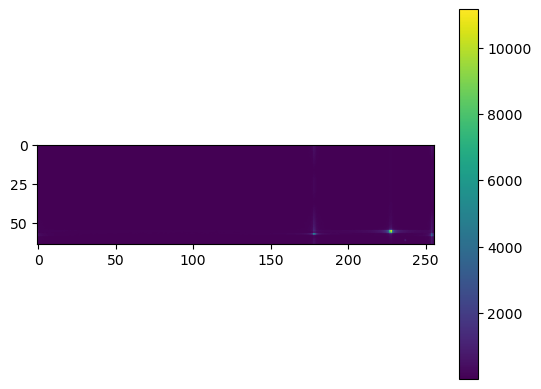

In [77]:
complex_array = []
for range_idx in range(len(range_array)):
    im = [to_16bit_signed_integer(wd>>16) for wd in range_array[range_idx]]
    re = [to_16bit_signed_integer(wd & 0xffff) for wd in range_array[range_idx]]
    temp = []
    for i in range(len(im)):
        temp.append(complex(re[i],im[i]))
    complex_array.append(temp)
    
complex_array = np.array(complex_array)
plt.imshow(abs(fft(complex_array,axis=1)))

# Add colorbar for reference
plt.colorbar()

# Display the plot
plt.show()

In [76]:
np.amax(abs(complex_array))

73.24616030891995

In [90]:
range_unscaled =[[0xfde40464,0xce6e77d,0xe4fece8,0xbc3f1a3,0xc2f5f2,0xa9007f,0xfff500ca,0x18800e2,0xff810106,0xfefe00c8,0xfecc009d,0xfeb40070,0xfe9b003f,0xfea90017,0xfeb0ffe3,0xfecbffc5,0xfee4ff9c,0xff02ff8d,0xff34ff7f,0xff5dff83,0xff81ff88,0xffaaff93,0xffc0ffa8,0xffd5ffc3,0xffe0ffe4,0xffeb0004,0xffe60023,0xffe1003b,0xffd00055,0xffc3005b,0xffae005f,0xff9b0064,0xff920062,0xff7f0059,0xff810053,0xff830045,0xff82003c,0xff8a0031,0xff8b0027,0xffa0002b,0xffb40023,0xffc8002a,0xffcc0034,0xffd7003d,0xffdf004e,0xffe10066,0xffe50069,0xffe0007a,0xffe60086,0xffe70093,0xffdf009d,0xffe800ae,0xffe600b5,0xffe600c0,0xffe500d1,0xffe900e7,0xffe90101,0xffe60124,0xffe80148,0xffde0175,0xffb801b8,0xff8e0205,0xff4e026b,0xfee00303],
[0x177ffca,0x21d20ab4,0x18fa0ced,0xf14af7c4,0xa5f7d4,0x17c0205,0x15e0227,0x26b03df,0xf902a3,0xb90258,0x7a0245,0x3d0218,0xfffc01fc,0xffd201c9,0xffa80196,0xff9a015b,0xff8c0121,0xff8d00ed,0xff9600c1,0xffa90095,0xffc00076,0xffd00057,0xffea0043,0x50034,0x1c002e,0x2c0028,0x3c0029,0x430026,0x53002d,0x640032,0x62002e,0x6a002f,0x730034,0x79003d,0x79003b,0x7d003f,0x810046,0x7e0045,0x7f004c,0x760055,0x700056,0x5b005d,0x58005b,0x450051,0x2e003d,0x1e0030,0x14001a,0x5fffa,0x6ffd5,0xffffffb1,0x10ff7d,0x27ff4e,0x45ff32,0x71ff01,0xa3fee8,0xdcfed2,0x125fecb,0x15ffec9,0x1b0fee9,0x1f1feff,0x21dff2c,0x24eff5f,0x25fff9c,0x23affd1],
[0xff28009c,0x10291de3,0xa1918cb,0x6ccee87,0x193f766,0x9d01dd,0xf01ee,0xfffe03ef,0xff350220,0xff0b01b6,0xfed9016e,0xfeac0133,0xfe9f00ea,0xfea100a6,0xfea5006c,0xfec10029,0xfedbfffb,0xfefeffd1,0xff2dffb5,0xff68ffa2,0xff9dffa1,0xffc8ffa5,0xffecffbf,0x3ffd4,0x1afff0,0x2a0008,0x2f001b,0x29003c,0x1d0047,0x1c005f,0xd0065,0xfffd0071,0xfff0006a,0xffe4006c,0xffda0065,0xffcb005b,0xffd00050,0xffcf0043,0xffd00037,0xffdf0035,0xffe2002a,0xffe4001f,0xffeb0018,0xfff00018,0xfff60016,0xfffd0015,0x80018,0x11000c,0x190007,0x28000b,0x36fffd,0x480006,0x560004,0x6b0009,0x830016,0x9d0026,0xb1003d,0xc2005e,0xd00085,0xd100ab,0xc500db,0xac0105,0x700125,0x70130],
[0x22fc58,0xfaca1cec,0xfa031799,0x81106e2,0x1f0f8de,0xdb019b,0x9a011f,0xffd902d1,0xe00e6,0x2e0087,0x28005e,0x170036,0x1f0016,0x1b0000,0x27ffdc,0x35ffce,0x49ffbf,0x5fffb8,0x69ffb5,0x81ffbd,0x8fffca,0x94ffe2,0x95fff0,0x860003,0x78000e,0x70001c,0x5d0020,0x4b0017,0x31001c,0x220014,0x19000d,0xdfff6,0xfffaffe2,0x5ffd4,0xcffb4,0x12ffa6,0x1cffa3,0x2fff9a,0x3bff95,0x47ff99,0x53ffa5,0x5cffa8,0x63ffbf,0x5dffc6,0x53ffd5,0x45ffe8,0x32fff1,0x22ffe7,0x3ffe7,0xffecffdb,0xffdbffc8,0xffc2ffb5,0xffbcff93,0xffb0ff78,0xffb4ff52,0xffb4ff39,0xffc5ff0e,0xffcdfeef,0xffdefed0,0xfff4feaf,0xbfe8f,0x20fe6b,0x19fe29,0x17fdb4],
[0x5d8fdf3,0xed991427,0xee350f55,0xefb10065,0x5bf8d0,0x9f0241,0xf40232,0xff9d03b1,0x95024e,0xc0023d,0x9d022a,0x7c0213,0x5701f0,0x3c01c8,0x2301a0,0x130173,0x80149,0x140127,0x100101,0x1700e4,0x2200c8,0x2b00b6,0x3800a0,0x440095,0x530085,0x5a007e,0x60006b,0x720060,0x740065,0x7f0053,0x8d004d,0x900042,0xa40033,0xab0031,0xb2002d,0xbf0032,0xc5002f,0xce003a,0xd50036,0xd3003c,0xd0004e,0xc9004b,0xbc0056,0xac004d,0x9f0045,0x880031,0x76001c,0x6ffffb,0x64ffc9,0x67ffa3,0x6fff6f,0x84ff43,0xa1ff13,0xcdfedd,0x10dfeb3,0x14afe90,0x19efe6e,0x1ebfe5c,0x249fe63,0x2acfe5d,0x310fe71,0x37bfe87,0x3f4fe9d,0x491fe87],
[0x48d0394,0xe30e0595,0xe7bd0043,0xfcbfead9,0xb8f6f6,0xff8b01df,0xff710243,0xfd540324,0xfeac0262,0xfeba025f,0xfe8b0225,0xfe7101f5,0xfe5b01b7,0xfe480172,0xfe610130,0xfe7200e9,0xfe9b00b6,0xfec20081,0xfef90064,0xff240049,0xff54003e,0xff810040,0xffac0041,0xffd4004a,0xfff10063,0xfffd0076,0x1a0087,0x290092,0x2b00b1,0x2600b4,0x2400c0,0x2200d2,0x1d00d0,0x1400ce,0x1500d5,0x1300c8,0x1200bd,0x1700bd,0x1700b8,0x1a00a9,0x2500a1,0x2800a3,0x2f009d,0x3e008e,0x420085,0x500082,0x620072,0x6c0060,0x8b0052,0xa5003e,0xce0046,0xf80034,0x121003a,0x14e003e,0x18a0053,0x1c4006f,0x1fc0094,0x23700c2,0x26a010a,0x29e0159,0x2c601ad,0x2ec0213,0x3140281,0x3760303],
[0xd20276,0xe5c1eda2,0xee8fee6b,0xc4efcc3,0x274f71e,0xffe200c9,0xff9a00bf,0xfd52006d,0xfee3005a,0xff04006a,0xfef00045,0xfef6001f,0xfeffffeb,0xff13ffd5,0xff25ffb8,0xff52ffa7,0xff7bff97,0xff9aff94,0xffc7ff98,0xffe2ffaa,0xfffdffbd,0x12ffdb,0x1effff,0x1d001b,0x18002c,0x100048,0x56,0xfff10062,0xffdc006b,0xffce006a,0xffbc005e,0xffb30053,0xffa2004c,0xff9e0034,0xff9d0023,0xffb00016,0xffbf000c,0xffd10001,0xffe0fffe,0xfff20002,0x40003,0x140017,0x1c002e,0x270038,0x2b0043,0x2e005a,0x2e006e,0x1f0078,0x1d0087,0x190087,0xf008b,0xa008b,0x60093,0x10091,0x20097,0x90091,0x1300a5,0x1b00ad,0x2200c4,0x2100e1,0x3100fa,0x270129,0x2c0159,0x4601ab],
[0x2d90191,0xfc85e07e,0xa3e7cf,0xf6ae03e2,0x245f7be,0xbe0119,0xe50135,0xff1d001b,0x8c00ef,0x820137,0x640138,0x4c0127,0x30011a,0x200108,0xf00e4,0xc00d0,0xc00c0,0x400b4,0x600a4,0x12008f,0xf008a,0x180086,0x110080,0x110078,0x100070,0x70065,0x150061,0xd0052,0xf0053,0xb003b,0x12002e,0x1c0021,0x2d0017,0x36000b,0x45000f,0x590002,0x6b000c,0x77000e,0x86002d,0x870034,0x8b003e,0x880057,0x770066,0x680071,0x540079,0x390074,0x2c0069,0x120066,0xfffa0044,0xfff00029,0xffe40000,0xffeeffd7,0x3ffae,0x15ff91,0x36ff65,0x6dff4f,0x9cff35,0xdaff2b,0x116ff38,0x159ff4c,0x198ff74,0x1deffa7,0x21afff7,0x2650073],
[0x16c0557,0x1186e8d4,0xfcceee7,0xf876ebd1,0x2cbf6b3,0x680188,0x210216,0xfece0088,0xff73020d,0xff2f0239,0xfee8021f,0xfeb001ec,0xfe8e01b4,0xfe7f0176,0xfe840138,0xfe8000fa,0xfe9a00cb,0xfeb3009c,0xfed6007a,0xfefe0054,0xff260044,0xff4b003e,0xff6d002d,0xff940036,0xffb20040,0xffca0047,0xffdd005f,0xffee0069,0xfffa0079,0x30081,0x8d,0x20093,0x10009f,0xc009f,0x1400af,0x1400b5,0xb00b2,0xa00b1,0x1200ba,0xc00c0,0x400c0,0x100c0,0x200b5,0xfffd00ad,0xfff600a5,0xfff40092,0xfff90086,0xfff70079,0xe005f,0x290047,0x440036,0x62002c,0x920020,0xca0024,0x10e0034,0x1390049,0x1790079,0x1b400b3,0x1e70100,0x210015c,0x22901c9,0x22d0248,0x21d02eb,0x1ed03bc],
[0xfc2402f3,0x1a40f6f1,0x176bfb2a,0x1064f512,0x4f5f747,0x7c0107,0xffba011a,0xff19fef3,0xff07007e,0xfea20080,0xfe80004c,0xfe6f000c,0xfe78ffd9,0xfe87ff9e,0xfea3ff72,0xfed1ff53,0xff02ff3b,0xff25ff32,0xff54ff3b,0xff86ff42,0xffabff54,0xffcaff6b,0xffdcff8f,0xffe3ffb2,0xffe8ffd6,0xffebfff3,0xffdf0012,0xffcf0024,0xffc2003c,0xffa90037,0xff9f0049,0xff88003e,0xff74003b,0xff6c0039,0xff680023,0xff690016,0xff730011,0xff7e000d,0xff860010,0xff95000c,0xff94000f,0xffa80014,0xffab0022,0xffb10029,0xffb5002f,0xffb90043,0xffb3004e,0xffb80057,0xffb20067,0xffb5006f,0xffab007a,0xffb70084,0xffaf008b,0xffab00a3,0xffae00ad,0xffad00c8,0xffaf00e3,0xff94010b,0xff850136,0xff63015d,0xff2c018b,0xfedd01cb,0xfe710208,0xfdb5025a],
[0xfe60fd93,0x1e160770,0x17fb0af9,0x16d0934,0x4e9f963,0x14201a5,0x1000143,0x195ff1f,0xee0099,0x8b0098,0x770072,0x5c0052,0x4f0037,0x4c001f,0x51000e,0x59fffd,0x59fff8,0x68fff0,0x67fff5,0x6dfff6,0x640002,0x600000,0x5e0005,0x55000e,0x4e0011,0x3f0014,0x2a0008,0x21ffff,0x14fff6,0x4ffe5,0x9ffd6,0xfffeffc4,0x2ffb3,0xbffaf,0x16ffa0,0x26ff9b,0x3fff96,0x3dffa0,0x4cffa9,0x51ffb8,0x54ffc4,0x4bffd4,0x49ffea,0x33fffc,0x190003,0xfffd0006,0xffe20005,0xffc3fffe,0xffa5ffea,0xff92ffc8,0xff79ffac,0xff6aff8d,0xff66ff60,0xff70ff39,0xff70ff11,0xff7ffeee,0xffa0fed0,0xffb5feaf,0xffc3fe9a,0xffdbfe8d,0xffeefe7a,0xffe5fe74,0xffcbfe5e,0xff78fe29],
[0x243ff77,0x14591c72,0xc031982,0xf412f59b,0x3b7f941,0x8702b1,0x6f02c5,0x1d30161,0x610294,0xffe70271,0xffb1023e,0xff90020f,0xff6201cd,0xff550192,0xff47015a,0xff4e0122,0xff5c00f4,0xff6c00c6,0xff8000a0,0xff94007f,0xffb00065,0xffc80059,0xffec0045,0x42,0x1c0041,0x200041,0x3a0043,0x400045,0x4f004d,0x54004c,0x5e0053,0x5d004f,0x71004b,0x6f004c,0x6d0054,0x7a005b,0x75005a,0x77006e,0x6d0071,0x670070,0x600073,0x52006f,0x490068,0x370058,0x2b004c,0x22002a,0x170013,0x1bfff8,0x18ffd2,0x2eff9f,0x42ff77,0x6aff55,0x9bff36,0xd8ff12,0x117ff0f,0x15cff0b,0x199ff1f,0x1d9ff2e,0x21aff4a,0x250ff76,0x27affb0,0x294ffdf,0x2ab000b,0x298000d],
[0x2800a9,0xfa922272,0xf8601a2a,0xab0f08f,0x484f8d8,0xff80023f,0xfef6022d,0x9b017c,0xfeb801cc,0xfe570163,0xfe3c011d,0xfe2f00c4,0xfe3d0083,0xfe5d0038,0xfe7e0002,0xfea8ffdd,0xfed1ffb0,0xff10ff9a,0xff4dff8e,0xff7fff8f,0xffabff95,0xffceffa6,0xfff8ffc5,0xeffe2,0x1e0006,0x23002f,0x1f0038,0x1a005e,0xd006d,0xfff90071,0xffec0082,0xffdd0076,0xffd4007b,0xffce0072,0xffc4006c,0xffc20061,0xffc1005a,0xffc90050,0xffcf004a,0xffd2003a,0xffd70033,0xffe40032,0xffec0032,0xffef0021,0xfff80027,0x80023,0x140016,0x200020,0x2f0020,0x3f0018,0x5a001b,0x6d0017,0x8f0027,0xa7003a,0xbe0049,0xd70072,0xed0095,0xf300ba,0xf800eb,0xfb011f,0xe50147,0xc50176,0x8f0181,0x59016c],
[0x1b1fd93,0xe8391334,0xebe60df8,0x716080d,0x48bfa14,0xffc501ba,0xffa00139,0x1920159,0xffd700d6,0xffa90075,0xffae003c,0xffbf0011,0xffd6ffef,0xffe8ffd6,0xbffc6,0x26ffbc,0x39ffb9,0x57ffc6,0x6cffdc,0x77ffe0,0x88fff6,0x800005,0x810020,0x7b002f,0x620045,0x53004b,0x3d004d,0x25004b,0x15003f,0x5002f,0xfffd0020,0xfff2000a,0xfffdffef,0x2ffea,0x8ffd5,0x13ffc6,0x2cffc2,0x34ffbd,0x42ffc2,0x52ffc0,0x62ffcc,0x6bffd9,0x64ffe0,0x5dfffb,0x5dffff,0x43000c,0x3c000d,0x23000b,0x150009,0x8fff2,0xfffdffe6,0xfff7ffd3,0xfff7ffbb,0xfffeffa2,0x4ff87,0x10ff6e,0x27ff5d,0x37ff4e,0x4cff42,0x62ff2f,0x7fff22,0x93ff05,0xbbfee3,0xf0fe81],
[0x61f00c8,0xe56301d1,0xe94bff8d,0xf10afc61,0x331f984,0xff7f021f,0xffce0222,0x1790374,0x90272,0xffe4021e,0xffd301fb,0xffb701e0,0xffb401bd,0xffa4019b,0xff9c0175,0xffaa014c,0xffad0128,0xffac010c,0xffbe00f1,0xffd700de,0xffdd00c9,0xfff700b7,0xfffd00ab,0xa00a6,0x1300a4,0x1f009d,0x290095,0x32008a,0x35007d,0x400078,0x54006b,0x5f006d,0x710066,0x7d0061,0x850060,0x96005f,0x9f006e,0xaa0076,0xa90085,0xae0085,0xad0091,0x9b0093,0x900097,0x840091,0x750089,0x6c0073,0x5c0058,0x5a0031,0x5b000a,0x6bffe8,0x80ffc0,0xa3ff91,0xdeff67,0x10eff4d,0x153ff40,0x19dff38,0x1e6ff37,0x23dff48,0x28fff6b,0x2e4ff8b,0x33cffc8,0x3920004,0x4050046,0x4a3008c],
[0x2bd05e2,0xe82af218,0xee31f121,0x2e1ea14,0x438f7cd,0xfec9016d,0xfe7d01c1,0xff1b03bf,0xfe090223,0xfdf801c4,0xfde4018a,0xfdd30147,0xfdd9010c,0xfded00ca,0xfe0a009c,0xfe300066,0xfe58003b,0xfe920019,0xfed1000c,0xfeff0005,0xff310002,0xff650009,0xff840027,0xffa3003a,0xffb60053,0xffcf006e,0xffdd0082,0xffd9009a,0xffe000ad,0xffd800b9,0xffcb00c4,0xffd500c8,0xffcd00d0,0xffd200d1,0xffc600c9,0xffc800d0,0xffcf00c6,0xffd100c3,0xffd200c0,0xffd100c6,0xffda00b8,0xffe900ba,0xffe900b4,0xfff800a9,0xad,0x1100a4,0x220093,0x35008a,0x520083,0x6c0080,0x9e0087,0xcb008e,0xf6009f,0x12700bd,0x15400ee,0x1840118,0x1a90158,0x1d601a2,0x1ed01fb,0x1fa025c,0x20d02cc,0x2080343,0x20a03d3,0x2240487],
[0xfebd0340,0xf724e232,0xfda0e78f,0xec9ff57,0x616f896,0xff910075,0xff200051,0xfecc0232,0xfe9b004e,0xfebcffeb,0xfec5ffc4,0xfecfff93,0xfeedff73,0xff10ff5a,0xff2dff48,0xff5dff46,0xff83ff44,0xffa1ff52,0xffcbff6d,0xffedff7c,0xfffdff9d,0xbffc5,0x9ffeb,0xffff0006,0xfffc0024,0xffec003d,0xffd0003e,0xffc10057,0xffa8004a,0xff960047,0xff8a0041,0xff7c0037,0xff7b0026,0xff78001b,0xff78000a,0xff8dfffe,0xffa1fffe,0xffb4fffc,0xffbbffef,0xffcd0002,0xffde000a,0xffdd0018,0xfff30031,0xffef003f,0xfff30055,0xffe80063,0xffe50078,0xffd3007e,0xffcd0086,0xffc90093,0xffc40090,0xffba009e,0xffba00a5,0xffbb00b1,0xffba00b8,0xffae00cd,0xffaa00dc,0xffad00ee,0xff9e010f,0xff880132,0xff7f015c,0xff550186,0xff2f01c5,0xfeee0228],
[0xe101e1,0x112fe41d,0x1071ed12,0xf840026a,0x5d2f981,0x68012b,0x70010b,0xff5b02d2,0xfff60139,0x1d0113,0xd0102,0xfff700f3,0xffec00d6,0xffe200c9,0xffe000aa,0xffe20099,0xffe20086,0xffe90080,0xffef006e,0xffed006d,0xfff70069,0xffff006e,0xfff3006b,0xfff50062,0xfff2005b,0xffe60050,0xffee0055,0xffe4003a,0xffee002f,0xfff20023,0xfff60017,0xfffd0006,0x150007,0x200003,0x2ffffe,0x460009,0x540016,0x5c001f,0x5f002d,0x64003f,0x5d004c,0x520064,0x470073,0x2c0076,0x15007c,0xfffa0073,0xffe8005e,0xffd70050,0xffc00032,0xffc3000e,0xffc7ffe8,0xffd3ffca,0xffe5ffaa,0x4ff8a,0x25ff7c,0x5aff6c,0x81ff66,0xb6ff77,0xe8ff88,0x110ffaf,0x13bffd8,0x1480013,0x15c006c,0x14100d7],
[0xff40048d,0x1e64f915,0x184afd34,0xfe9cebd5,0x65cf8db,0xffe7019d,0xff9501ea,0xfd87031f,0xfe9b0202,0xfe9b01e2,0xfe6701a9,0xfe4c016b,0xfe3d012c,0xfe3f00eb,0xfe4300b1,0xfe640077,0xfe88004b,0xfeae0028,0xfed0000d,0xff00fffc,0xff2dfffb,0xff55fffe,0xff770001,0xff990010,0xffae001e,0xffbc002e,0xffc90037,0xffd3004e,0xffda0059,0xffe2006c,0xffde0070,0xffe90081,0xffe40089,0xffea008c,0xffe70095,0xffe400a1,0xffe60099,0xffdf00a5,0xffdb00aa,0xffd600ad,0xffca00b1,0xffc900ac,0xffbb00a0,0xffb6009f,0xffb70092,0xffbe0078,0xffc9006a,0xffd20050,0xffe0003b,0xfffe002e,0x210021,0x520018,0x7c0023,0xac0036,0xd7004d,0x1180076,0x13700a9,0x15e00fe,0x17b0141,0x17501a6,0x16d020b,0x143027b,0x10002fc,0x78038e],
[0xfb8300db,0x1a330b7b,0x150e0bfb,0x1378fa03,0x808fa16,0x20140,0xff5100fb,0xfcdf00f7,0xfe56004f,0xfe6b001d,0xfe60ffda,0xfe6bff97,0xfe80ff5e,0xfea7ff32,0xfed2ff0f,0xff06fef3,0xff3bfeef,0xff6efef5,0xffa0ff09,0xffc8ff1c,0xffddff43,0xfffcff5f,0x7ff8c,0x1ffb4,0x4ffd2,0xfffcffef,0xffea0007,0xffcb0017,0xffbd001c,0xffa00023,0xff940022,0xff81001a,0xff790015,0xff720001,0xff6e0001,0xff6fffed,0xff7effe9,0xff79ffe0,0xff8effe9,0xff8effe6,0xff95ffec,0xffa7fffd,0xffa40002,0xffa80000,0xffa90014,0xffa60017,0xffaa0019,0xffad0028,0xffa90031,0xffab0035,0xffad003d,0xffaf0046,0xffa30064,0xffa70073,0xffa00087,0xff940099,0xff8700ba,0xff6a00dd,0xff4800fb,0xff180118,0xfed70131,0xfe750145,0xfdfa0151,0xfd2b013a],
[0xffa3fc86,0x11401852,0xb511736,0x1c0a5f,0x73dfc1f,0x7601fb,0x6e016f,0xfe6c0066,0xc009c,0x2a009c,0x250073,0x2a004f,0x320026,0x3a001a,0x48000b,0x5bfffa,0x6ffffc,0x78fffd,0x7f0008,0x800017,0x790016,0x76001f,0x6f002f,0x5d0032,0x490030,0x3d002a,0x2e0020,0x1e0012,0x120002,0x17fff2,0xdffe5,0x11ffce,0x1bffbe,0x29ffb1,0x35ffaa,0x45ffaa,0x55ffae,0x59ffb0,0x69ffba,0x68ffc5,0x69ffdb,0x59ffe6,0x48fffd,0x39fffb,0x290000,0xfffff,0xffedfff3,0xffd5ffde,0xffc3ffc4,0xffbeffa2,0xffb1ff8b,0xffb1ff5f,0xffb7ff34,0xffc2ff15,0xffd8fef6,0xffeefed6,0x8febb,0x27feb3,0x40fe9f,0x55fe9b,0x65fe87,0x65fe67,0x50fe30,0x29fdc4],
[0x359000b,0xfedc21b7,0xfa0e1b09,0xf6d4f3f7,0x5ebfb90,0xff6602b8,0xff8502c5,0xfe040131,0xff2e022a,0xff190241,0xff00020a,0xfeed01c7,0xfee50190,0xfee3015a,0xfef40120,0xff0d00e9,0xff2200c8,0xff44009b,0xff640083,0xff860079,0xff9d006c,0xffbe006d,0xffd20053,0xffea005c,0xfff8005f,0xf0063,0x1e005f,0x280063,0x350068,0x3f0068,0x40006d,0x500071,0x530073,0x5c007b,0x610079,0x60007e,0x6a007c,0x61008e,0x5f0096,0x56009a,0x4b0099,0x430092,0x370082,0x2d0073,0x26005a,0x190044,0x270015,0x2cfffe,0x3effde,0x5effb9,0x87ff95,0xb4ff7c,0xf0ff6a,0x131ff60,0x170ff70,0x1bfff80,0x1f9ff90,0x238ffc5,0x271fffb,0x29c0036,0x2c20070,0x2d300a9,0x2ee00d0,0x30900c9],
[0xbc01a9,0xe6de1853,0xe9c40ff9,0xe2cf339,0x6c9fb12,0xfe9101df,0xfe2c01cc,0xfd5eff94,0xfddb00e5,0xfdb500d2,0xfdbc0087,0xfdd7003e,0xfdeefff7,0xfe1affbf,0xfe60ff93,0xfe9aff75,0xfee1ff66,0xff21ff65,0xff57ff70,0xff86ff81,0xffb4ff96,0xffdaffb7,0xffeaffde,0xfffafffd,0x70023,0xfffe0045,0xfffc0054,0xffe6006d,0xffe6007a,0xffcb0087,0xffc20087,0xffbc0082,0xffae007d,0xff9f0074,0xff9e006f,0xffac0068,0xffaf005b,0xffad0058,0xffb40054,0xffba004b,0xffcc0046,0xffd20043,0xffd40045,0xffe5003f,0xffee003d,0xfffb003d,0x100035,0x27003a,0x350038,0x550046,0x6d0048,0x840061,0xa20077,0xb60093,0xdc00b8,0xe000db,0xf00114,0xed014c,0xe70182,0xd401b9,0xbc01ed,0x8e020f,0x73022c,0x590225],
[0x215ff6a,0xe053ffa4,0xe765fd96,0x63b0930,0x6c7fc29,0xff050151,0xff1500f2,0xff6bfe9c,0xff5e0016,0xff3b0014,0xff5bffe4,0xff79ffca,0xff9bffa4,0xffc3ffa7,0xffecff9e,0x14ff9b,0x31ffb2,0x49ffbf,0x62ffd8,0x69fff7,0x6d0011,0x66002b,0x550045,0x450053,0x2f005e,0x22005c,0x40060,0xfff4005e,0xffe60049,0xffdb003b,0xffd1002b,0xffd60016,0xffd3fff8,0xffe3ffec,0xfff8ffde,0x8ffd9,0x1effd7,0x2dffdc,0x3bffdd,0x46ffe8,0x4bfffd,0x510013,0x550021,0x47002d,0x390039,0x2e003b,0x24003e,0x200033,0xb0030,0x30020,0xfffe0012,0xffff0002,0xcfffd,0xaffef,0x1effda,0x29ffd4,0x43ffd1,0x51ffd3,0x5fffd5,0x72ffdd,0x84ffe0,0x93ffda,0xbeffc7,0x109ffa3],
[0x4d8035a,0xeb3beec1,0xefe9f0a1,0xf3aef954,0x5c3fb68,0xfedb01ab,0xff1401d9,0x6a003e,0xff8701ae,0xff3101b1,0xff2a0197,0xff270175,0xff260153,0xff2c012d,0xff3c0115,0xff4300f9,0xff5900e5,0xff6e00cf,0xff8600c6,0xff8c00ba,0xff9c00ab,0xffab00a6,0xffb600a1,0xffc200a0,0xffd2009d,0xffd0009a,0xffdf0092,0xffe70087,0xffef0085,0xffff007e,0x130073,0x210073,0x320072,0x450078,0x4f0083,0x5f0086,0x6b0092,0x66009b,0x6d00ac,0x6400b5,0x6500bf,0x5900bf,0x4900bd,0x3800c2,0x3300b0,0x29009c,0x27007c,0x320060,0x3d003f,0x490022,0x700005,0x9efff1,0xd5ffd9,0x10bffca,0x14cffd0,0x18effd7,0x1d9fffd,0x218002c,0x25c0065,0x29800b1,0x2ce00fe,0x30e0158,0x35001bf,0x3b7024a],
[0xffe306dc,0xf88fe6f1,0xfcc2ea03,0x948eba5,0x746fa40,0xfe6800f0,0xfdee0140,0xff820056,0xfdd50132,0xfd7e00e5,0xfd6900b0,0xfd78006f,0xfd9a0039,0xfdbafffd,0xfde8ffd4,0xfe21ffbe,0xfe5fffaa,0xfe8eff9b,0xfec2ffa0,0xfef3ffa7,0xff29ffb7,0xff4dffd7,0xff67fff0,0xff7e0011,0xff8a002d,0xff900044,0xff970064,0xff9b0071,0xff950085,0xff930098,0xff8d009a,0xff8100a3,0xff8300ac,0xff7f00b3,0xff8100b1,0xff8300ad,0xff8200b0,0xff8400b1,0xff8800b1,0xff8b00b2,0xff8c00b5,0xff9200af,0xff9b00af,0xff9f00a9,0xffa6009c,0xffbd00a3,0xffd20099,0xffe70096,0xb009a,0x2a00ab,0x4a00b3,0x7400d2,0x9e00ec,0xbd0116,0xdc0156,0x10701a1,0x11301e6,0x113023b,0x118029f,0xfc0301,0xda0378,0x9903eb,0x5f047a,0x150547],
[0xfc6e028e,0xb93e4a0,0xd95ec1a,0x108d0387,0x8e9fbb7,0xff600057,0xfedf000b,0xadffc4,0xfee8ffaf,0xfeb5ff48,0xfec0ff21,0xfee3fefb,0xff0cfedb,0xff3cfed5,0xff62fed2,0xff92fed8,0xffb8feee,0xffdaff13,0xffefff2f,0x8ff59,0x15ff83,0x11ffab,0x5ffcd,0xfff9ffea,0xffe3fffb,0xffcc0017,0xffb6001d,0xff970026,0xff89001e,0xff700016,0xff5f0009,0xff60fff5,0xff66ffe2,0xff6effde,0xff70ffd4,0xff7dffd1,0xff86ffca,0xff9cffd7,0xffa2ffd6,0xffb8ffe5,0xffb9ffee,0xffbd0004,0xffbe001c,0xffbe002e,0xffb7003f,0xffae004c,0xffa3005d,0xff92005f,0xff84006e,0xff84006e,0xff7b007e,0xff6d0086,0xff6a008e,0xff6a009d,0xff5700ac,0xff4d00c3,0xff3a00d2,0xff1d00f4,0xff0600fc,0xfece0114,0xfea3013a,0xfe5c0150,0xfdfb0172,0xfd7301b6],
[0xff6e00ea,0x1efdf453,0x1949fb89,0xf96b0270,0x82dfce5,0xfffa014e,0xffe2011c,0x1ac01e1,0x5012e,0xffd700ca,0xffd200a7,0xffce0096,0xffd2007c,0xffd10068,0xffd60060,0xffdf0054,0xffe10051,0xfff00047,0xffed0052,0xffeb004b,0xfff3004b,0xfff40044,0xfff5004f,0xffe70046,0xffdf0040,0xffd70032,0xffd60025,0xffcf001f,0xffda0012,0xffe60004,0xffe6fffb,0xfffaffe4,0x12ffec,0x1efff4,0x2dfff3,0x3affff,0x3f000d,0x4b0018,0x480032,0x41003a,0x2e0050,0x1d0061,0x100065,0xfffe005d,0xffe30058,0xffca0056,0xffbd003d,0xffa9001c,0xffa7fffd,0xffa7ffe0,0xffb4ffb8,0xffc9ffa7,0xffe0ff86,0x1ff7c,0x27ff6e,0x46ff6d,0x74ff76,0x8fff85,0xb1ffa1,0xc3ffc0,0xcfffeb,0xca0018,0xa10046,0x5c007f],
[0xfe3202fc,0x1db60e5f,0x15730e16,0x39dedd3,0x878fc7f,0xff2801ac,0xfec201c4,0xffb10345,0xfe5101d5,0xfe2b0151,0xfe180100,0xfe1500c8,0xfe26008b,0xfe37004e,0xfe520024,0xfe77fff7,0xfeadffe1,0xfecdffcd,0xfef8ffb9,0xff23ffbb,0xff51ffc3,0xff73ffca,0xff8affea,0xffa1ffed,0xffba0005,0xffbe0015,0xffc3001e,0xffc30032,0xffce0040,0xffd00050,0xffd50050,0xffcf0066,0xffd00068,0xffd30074,0xffca007b,0xffc3007c,0xffc50088,0xffbe008a,0xffbf0089,0xffb20087,0xffae0088,0xff9d0080,0xff970075,0xff980066,0xff950057,0xff9e0046,0xffa8003a,0xffbd0022,0xffd5000f,0xfff9000b,0x250008,0x4a000d,0x78001c,0xa9003e,0xcf0063,0xee00a1,0x10900d8,0x114011c,0x10d016b,0xfd01ba,0xd50214,0x820262,0x2402a9,0xff8402eb],
[0xfc12ff16,0xc8b1b62,0x8361777,0x148effc0,0x97cfde8,0xff2c013a,0xfea000ae,0xfebf023b,0xfe2a0031,0xfe4aff9e,0xfe60ff50,0xfe8cff15,0xfebafee3,0xfef4fec6,0xff2efeb3,0xff62feb6,0xff9efebc,0xffd1fed3,0xfffafef1,0x19ff1e,0x2aff33,0x33ff6d,0x3aff99,0x2dffba,0x1affdf,0xfffffff6,0xffef0000,0xffcf000a,0xffbb0016,0xffa80010,0xff990006,0xff8cfffe,0xff82ffee,0xff81ffdf,0xff7dffde,0xff81ffcd,0xff8dffc4,0xff90ffc4,0xff92ffcb,0xffa1ffcd,0xffa5ffce,0xffaeffcf,0xffb0ffdb,0xffabffe0,0xffacffed,0xffaefff0,0xffaffff9,0xffb7fff7,0xffb20004,0xffb8000a,0xffba0017,0xffb7002b,0xffb80033,0xffab0050,0xffaa0065,0xff9c0083,0xff81009c,0xff5e00b3,0xff3300bf,0xfef400cf,0xfeb100d4,0xfe5300cc,0xfddd0091,0xfd3d002f],
[0x159fc77,0xfca81ce5,0xf9d11892,0xfdea0b39,0x807ff6a,0xff6601cf,0xff900129,0xff2602bc,0xff8f00ce,0xffd8006b,0xfff70041,0xd002e,0x200015,0x440005,0x5a0000,0x6a0000,0x7d000d,0x820018,0x8b001f,0x8f002e,0x8b0041,0x7a004d,0x6a0056,0x50004e,0x3d004f,0x34003b,0x200033,0x18001f,0x13000d,0x16fff4,0x16ffea,0x20ffd7,0x27ffcd,0x43ffc7,0x4cffc1,0x56ffbd,0x62ffc0,0x73ffd9,0x7dffda,0x75ffeb,0x72fff7,0x62ffff,0x51000d,0x420009,0x2d0009,0x16fffb,0x6ffe9,0xfff6ffd6,0xffebffbb,0xffe9ff99,0xffefff75,0xfff7ff56,0xeff3c,0x22ff2d,0x3fff16,0x53fef9,0x78feee,0x95fee5,0xaafee1,0xc3fed3,0xdbfebb,0xe6fea2,0xfdfe6b,0x112fde0],
[0x3f50195,0xeb361861,0xeb2e1107,0xf99ff2d2,0x6dbfe49,0xfe4c0213,0xfe860214,0xfd28037b,0xfe2901f2,0xfe7201c1,0xfe78018a,0xfe780154,0xfe900127,0xfea800ef,0xfec100c2,0xfedd00a6,0xff080088,0xff260071,0xff53005c,0xff6e005f,0xff8c0063,0xffa10065,0xffb90066,0xffd1006a,0xffd9006e,0xffe40077,0xfff10075,0x2007a,0xd007e,0x17007a,0x1c007f,0x220085,0x31008b,0x3f0090,0x3a0099,0x42009d,0x3e00a7,0x3b00ae,0x3500b3,0x2f00b5,0x2400b1,0x1600a8,0xf009c,0x110084,0x100075,0x190056,0x260037,0x370012,0x5afffc,0x83ffe4,0xafffd6,0xe7ffcc,0x125ffcb,0x169ffe0,0x19ffff1,0x1de0027,0x2180051,0x24a0086,0x27200d3,0x288011d,0x29e015c,0x2b6019f,0x2cb01da,0x31001ee],
[0x51030d,0xdde10439,0xe4e0fee5,0x1122f68d,0x81afdd0,0xfdd800e4,0xfd9700bb,0xfb8a013c,0xfd170032,0xfd6f0005,0xfd91ffbc,0xfdbdff87,0xfdf3ff5a,0xfe2dff34,0xfe78ff1c,0xfebcff10,0xfefdff19,0xff3aff26,0xff6eff43,0xff96ff6e,0xffb6ff97,0xffd0ffb9,0xffdcffdf,0xffe20003,0xffde0029,0xffcd0048,0xffc5005a,0xffb60068,0xffa20079,0xff9c0074,0xff8b0076,0xff780075,0xff7b006f,0xff7b0066,0xff7b0062,0xff80005a,0xff810057,0xff8a0054,0xff89004f,0xff9e0049,0xff9e004f,0xffb2004b,0xffba0049,0xffc00044,0xffd6004d,0xffe3004a,0xfff60050,0x130055,0x2b006b,0x44007d,0x5c0089,0x7200ae,0x8d00d4,0x9500f9,0xa6012d,0xa0016e,0x9f019c,0x9001de,0x720218,0x4e024c,0x1c0282,0xffea02af,0xffbe02d1,0xffb402ed],
[0x12600fd,0xe6bceb5f,0xee73ee1b,0x5690a84,0x80efee0,0xfeb2007e,0xfedf001e,0xfcf4ffa4,0xfed5ff7d,0xff27ff88,0xff4fff74,0xff7eff5f,0xffa7ff5f,0xffd9ff61,0xfff9ff67,0x1dff7a,0x3cff99,0x54ffb4,0x59ffd9,0x5bfffa,0x59001c,0x460033,0x2d004e,0x1a005c,0xfff20060,0xffe5005c,0xffd2004f,0xffba0047,0xffaf0030,0xffb3001b,0xffad0012,0xffb8fffa,0xffc2ffed,0xffcfffdc,0xffdbffe0,0xfff6ffda,0x8ffdf,0x17ffe7,0x1cfff2,0x2d000b,0x2c001e,0x2e0029,0x25003a,0x1f0042,0x130043,0x30057,0xfff60049,0xfff10044,0xffe40045,0xffe3003f,0xffe3002e,0xffdc002a,0xffe20027,0xfff0002a,0xfff60024,0x30026,0xb003b,0xf0038,0x190041,0x1b0053,0x190068,0x1b0067,0x2f006d,0x60008a],
[0x27e04a7,0xfc48e42a,0xfe91e9b2,0xf6eaf7ac,0x776fe3b,0xfea900ef,0xfee1012f,0xfd360025,0xfec500ec,0xfed20120,0xfed50101,0xfedf00f1,0xfee800d4,0xfef600b5,0xff0e00a7,0xff1f0096,0xff2b008c,0xff43007f,0xff5f008a,0xff610083,0xff720076,0xff7c0081,0xff800080,0xff8d007a,0xff940071,0xffa6006d,0xffa2006a,0xffb3005d,0xffc0005b,0xffcb005f,0xffe50057,0xffed0060,0x40067,0xe0064,0x150080,0x2b0087,0x26009b,0x2d00a3,0x2000ba,0x1f00c3,0x1700cf,0x400cb,0xfff100ca,0xffed00bb,0xffe700a5,0xffdc0099,0xffe30082,0xffef0064,0xffff004e,0x210032,0x450022,0x6c001b,0xa80016,0xd7002c,0x105003d,0x141005c,0x17b0092,0x1a300ce,0x1c50114,0x1e1015d,0x1f001be,0x2020222,0x20c02a3,0x2230340],
[0xfcd5062d,0xc0ae959,0xc49ee24,0xeedef5e,0x932fdbf,0xfe6e005f,0xfdee0095,0xfc9ffebf,0xfd6d0000,0xfd5f000a,0xfd64ffd5,0xfd71ffa0,0xfda3ff6d,0xfddbff41,0xfe0cff28,0xfe4dff29,0xfe86ff18,0xfebeff20,0xfef3ff34,0xff16ff56,0xff41ff72,0xff5cff8e,0xff6cffb8,0xff73ffd3,0xff7afff4,0xff7f000a,0xff7a0026,0xff730039,0xff6c004a,0xff5f005f,0xff5f0060,0xff5a006f,0xff57006d,0xff52006f,0xff4f0075,0xff4e007e,0xff490083,0xff4f0080,0xff4f0082,0xff4a007e,0xff4a0079,0xff4f0085,0xff59007f,0xff680077,0xff670070,0xff770074,0xff8d0073,0xffa70072,0xffc6008a,0xffdc0097,0xfffc00b2,0x2100cd,0x3600fb,0x4d013d,0x5d017b,0x5f01c7,0x550215,0x32026d,0xb02c5,0xffca031e,0xff850377,0xff1103df,0xfe9e0443,0xfdf104d4],
[0xfafe0084,0x196df37a,0x16ccf9cc,0x10ad08ce,0xa33ffe4,0xff69003d,0xff05ffc4,0xfeb7fd56,0xfefafec9,0xfee1fecb,0xff02fe98,0xff2bfe85,0xff5bfe75,0xff94fe73,0xffc4fe88,0xfff1fe9b,0x1cfebe,0x30fee9,0x3fff14,0x48ff46,0x41ff70,0x2eff96,0x1cffb5,0xffcf,0xffe8ffe6,0xffcbffee,0xffa8fff1,0xff99ffe7,0xff7fffe7,0xff72ffd7,0xff70ffc6,0xff69ffb3,0xff66ffa4,0xff71ff9e,0xff7bff9b,0xff7fff9d,0xff95ff99,0xff9effa8,0xff9effb2,0xffa7ffc1,0xffa9ffce,0xffaaffda,0xffa9fff4,0xff9efffa,0xff8e0007,0xff8a000d,0xff7a001c,0xff790020,0xff64002e,0xff580035,0xff4c0036,0xff420049,0xff350052,0xff290054,0xff0c0067,0xfef70071,0xfedf0085,0xfead009c,0xfe8300a1,0xfe3c00a4,0xfdf500a3,0xfd9f0097,0xfd240084,0xfc740078],
[0xff22ff53,0x1f6709ab,0x16e30c7a,0xf99c032b,0x8da0100,0xff920163,0xff9e0130,0x6aff0c,0xffea008c,0xffa90085,0xffb50067,0xffc3004a,0xffcc003e,0xffde002d,0xfff1002b,0xfffa0023,0x25,0xc0035,0x60033,0xb0034,0xfffe0039,0xfff5003c,0xfff50034,0xffdf0030,0xffe80029,0xffda0021,0xffdb000f,0xffdc0005,0xffdcfff9,0xffe9ffef,0xfffcffde,0xbffd9,0x1cffd9,0x28ffe0,0x3affec,0x47fff8,0x46000f,0x460015,0x400029,0x390039,0x2b003f,0xf0040,0xfff20043,0xffe4003b,0xffd2002a,0xffbd001c,0xffaf0003,0xffa8ffdf,0xffb2ffc3,0xffb2ffaa,0xffc7ff91,0xffe0ff78,0x1ff5b,0x1dff5b,0x3bff56,0x64ff61,0x81ff6e,0x88ff88,0xa3ff99,0xa7ffb8,0xa4ffd1,0x8bffe2,0x65ffda,0x11ffbf],
[0xfe4f0188,0xf871ec4,0x84c1978,0x73bf0e6,0x8c90098,0xfe75018f,0xfe1d0186,0xff7dfffd,0xfe2700fd,0xfde600b8,0xfde90071,0xfdfc002f,0xfe14fff6,0xfe48ffc9,0xfe7bffa9,0xfeaeff92,0xfedcff87,0xff06ff85,0xff32ff8a,0xff55ff99,0xff79ffab,0xff8dffb7,0xffa3ffc8,0xffb6ffe0,0xffbbfff5,0xffc20006,0xffc70016,0xffc50027,0xffc70030,0xffcc003b,0xffc40045,0xffcd004b,0xffc3004e,0xffc60065,0xffc30060,0xffc10068,0xffb5006d,0xffab0076,0xffa6006f,0xff9e006b,0xff920060,0xff8a005f,0xff820048,0xff88003b,0xff96002f,0xff9f001b,0xffb5000c,0xffcdfffd,0xfff6fff7,0x17fff4,0x3efffd,0x66000c,0x8f001e,0xba0052,0xcf007d,0xe500ba,0xee0108,0xe10141,0xd1018b,0xa201d2,0x6d0209,0x200234,0xffb60245,0xff360230],
[0xfd60fe23,0xf7851ec6,0xf6e81810,0x13c20564,0x94201e1,0xfe5f00e8,0xfe0b0045,0xfff8ff50,0xfe67ff74,0xfe49ff07,0xfe80feb9,0xfec4fe91,0xff06fe7c,0xff4bfe6e,0xff8ffe7a,0xffc7fe83,0xfffffeaa,0x27fecb,0x3ffef9,0x56ff2a,0x54ff5b,0x51ff8b,0x47ffae,0x34ffd2,0x20ffe9,0x9fffe,0xffe80006,0xffcf000c,0xffbf0002,0xffa8fffd,0xff8ffff1,0xff83ffe9,0xff88ffd9,0xff86ffcc,0xff93ffc7,0xff92ffc1,0xff9effbd,0xffa4ffb6,0xffa1ffb7,0xffafffc2,0xffb9ffbf,0xffb4ffc4,0xffc6ffc0,0xffbeffd3,0xffc7ffd4,0xffc4ffdd,0xffc9ffdc,0xffcaffed,0xffcdffee,0xffd0fff9,0xffd1000e,0xffd0001f,0xffcc0035,0xffcf004e,0xffbb0064,0xff9f0086,0xff7b0097,0xff5900ad,0xff2400b3,0xfee100b7,0xfea300a5,0xfe560073,0xfe040020,0xfdb1ff8e],
[0x2cafd92,0xea1c131a,0xeb920e78,0xfb4e0b5f,0x77902c0,0xfe780147,0xfed600bd,0x11a00d8,0xff9f006b,0xffa5000d,0xffd5fff2,0x4ffe7,0x29ffdd,0x49ffe9,0x65fffa,0x7b0006,0x860022,0x880033,0x810046,0x78005b,0x680063,0x600073,0x430068,0x380073,0x1c0062,0xd005e,0x40044,0xfffa002a,0xfffc001a,0x2000b,0x6ffec,0x18ffe1,0x2cffdc,0x40ffd8,0x4fffd4,0x5dffe1,0x6bffe6,0x73fff1,0x750008,0x690016,0x68001c,0x5a0023,0x480023,0x3d0026,0x300013,0x1f0006,0xffffd,0xfffe2,0x8ffc8,0x16ffa9,0x1cff9c,0x30ff84,0x4bff72,0x67ff5c,0x7cff56,0x9bff54,0xafff55,0xc7ff50,0xd9ff51,0xf8ff47,0x109ff40,0x139ff27,0x163fef8,0x1c4fe96],
[0x37f0385,0xe2300517,0xe61c0032,0xfc90f23e,0x6b4012c,0xfd7f0118,0xfdb5013b,0xff59027f,0xfe070161,0xfe010100,0xfe2400d4,0xfe4400ae,0xfe670087,0xfe85006b,0xfea6005d,0xfed00045,0xfef30049,0xff1a0036,0xff300039,0xff56003c,0xff6f0043,0xff80004a,0xff900057,0xff9d0059,0xffa80063,0xffb20063,0xffbd006a,0xffc60069,0xffd60076,0xffdb0072,0xffeb0084,0xfff10084,0xfff9008b,0xfffd009c,0xf00aa,0xb00b0,0xb00b5,0x100bd,0xfffa00c5,0xfff400c4,0xffee00c0,0xffd900b7,0xffe300a8,0xffd80093,0xffed007a,0xfff00067,0x50052,0x2c003a,0x510027,0x870026,0xb3001d,0xed0027,0x1230042,0x1560068,0x18f0093,0x1b900ce,0x1d50112,0x1f1015c,0x20201a5,0x20c01f4,0x2100247,0x20a0292,0x21c02db,0x26a0326],
[0xfeb00415,0xe372ef4d,0xebc4eedc,0x1356fad4,0x82d00dd,0xfd82ffc9,0xfd41ff92,0xfdff0147,0xfd38ff7f,0xfd7eff07,0xfdb2fed1,0xfdf5feae,0xfe39fe9a,0xfe82fe97,0xfebffe9a,0xff07feac,0xff3dfec2,0xff6cfeef,0xff8dff1d,0xffacff46,0xffcaff72,0xffceffa4,0xffd1ffc6,0xffccfff9,0xffb6000f,0xffa1001f,0xff900032,0xff860046,0xff6f004c,0xff660048,0xff5b004e,0xff530041,0xff4c003f,0xff50003f,0xff4f0039,0xff58003b,0xff5a0035,0xff640034,0xff650038,0xff6b002e,0xff770030,0xff7a003b,0xff89003c,0xff99003d,0xffac0049,0xffb4004c,0xffca005a,0xffdc0067,0xffef0082,0x5009c,0x1a00bb,0x2800e9,0x350112,0x320149,0x2b0182,0x1001c4,0xfff90200,0xffca0235,0xff93026b,0xff5602a1,0xff1a02d0,0xfece02f4,0xfe920318,0xfe5d0359],
[0xff570180,0xf894dfd5,0xfdafe6e4,0x4210c5e,0x8300228,0xfe9bffa3,0xfecaff46,0xfed70115,0xfefeff36,0xff5bfeed,0xff98fee0,0xffc0fee6,0xfff3feef,0x13ff17,0x36ff38,0x57ff50,0x63ff80,0x6cffae,0x68ffcd,0x57fff6,0x4c0013,0x280022,0xf0037,0xfff5003f,0xffd90035,0xffbc0032,0xffa8002c,0xff9c0011,0xff97ffff,0xff8dfff0,0xff9effd7,0xffa4ffc2,0xffb1ffc2,0xffcbffbe,0xffdbffbb,0xffe3ffc9,0xfff5ffd3,0xfffaffda,0x9ffeb,0x5ffff,0x3000a,0x60021,0xfff40028,0xffeb0036,0xffe3003e,0xffc60049,0xffc60045,0xffb40047,0xffb1003a,0xffa70035,0xffa80033,0xffab0036,0xffa40038,0xffa50037,0xffa0003e,0xff9d0053,0xff980056,0xff8e005b,0xff860066,0xff730075,0xff5a0072,0xff4d007a,0xff35008e,0xff3300bd],
[0xffdc0473,0x1046e74c,0xe1fee0f,0xf9dcf782,0x7b801a6,0xfe9c0038,0xfec0005d,0xfdcb0233,0xfe8a009f,0xfecd0075,0xfee70072,0xfeef005e,0xfefd004e,0xff08004a,0xff1e003b,0xff31003a,0xff450036,0xff4b003a,0xff5b0035,0xff67003f,0xff6a003d,0xff6c0041,0xff6f0039,0xff770041,0xff7c003e,0xff820030,0xff8a002a,0xff9a002a,0xffa50022,0xffb10024,0xffc60030,0xffd9003a,0xffe2003b,0xfff0004d,0xfff2005d,0xfffc006a,0xfff9007c,0xfff8008a,0xffef009a,0xffd400a5,0xffd100ac,0xffc300a9,0xffb100a5,0xffa20094,0xffa00081,0xff9e006e,0xffa40058,0xffc10041,0xffd1002c,0xffee0020,0x13001d,0x370023,0x66002e,0x92004b,0xb30066,0xd10095,0xf300cd,0x1030108,0x100014a,0xfb019e,0xe801e6,0xc7023d,0xa7029f,0x64032a],
[0xfaac0407,0x18eef81d,0x1523fb69,0x12abf4db,0x94801c8,0xfe7affd3,0xfe03ffc0,0xfc1600be,0xfd4bff71,0xfda0ff3b,0xfdbbff0f,0xfddffedd,0xfe12fec4,0xfe49fead,0xfe7ffe9d,0xfeb9feae,0xfeeffeb2,0xff1afecc,0xff48feef,0xff60ff11,0xff7eff37,0xff8dff5a,0xff92ff7d,0xff8fffa5,0xff93ffc0,0xff89ffd5,0xff78ffe7,0xff710001,0xff650008,0xff60000e,0xff5a0017,0xff540024,0xff460027,0xff3d002f,0xff3c0032,0xff3d0031,0xff350032,0xff2f003b,0xff2c0037,0xff2e0035,0xff2e003c,0xff2e002d,0xff350034,0xff3d002c,0xff43002f,0xff4b0022,0xff60002e,0xff7d0035,0xff970050,0xffb1005f,0xffcb0084,0xffde00ad,0xffe400dd,0xffe9011e,0xffd50162,0xffbf01a2,0xffa201e9,0xff670236,0xff160278,0xfec602b0,0xfe5c02eb,0xfdda0311,0xfd300348,0xfc51037b],
[0xfaf1fde0,0x1a2d0797,0x14e20a26,0xe7e0e4b,0x97b042b,0xff5ffff1,0xff31ff4b,0xfd22ff22,0xfeeffe73,0xff50fe65,0xff8ffe3e,0xffbcfe3c,0xfff4fe3f,0x21fe51,0x54fe6e,0x7efe87,0x89febc,0x9afef3,0x9cff25,0x96ff4d,0x84ff7e,0x61ff9e,0x52ffb8,0x1effca,0x8ffcf,0xffe3ffd2,0xffc0ffd2,0xffa9ffbd,0xff99ffb7,0xff91ff9e,0xff8cff98,0xff90ff86,0xff93ff7a,0xff96ff74,0xff9fff72,0xffb1ff72,0xffb8ff71,0xffb8ff78,0xffc1ff88,0xffc0ff96,0xffb8ffa2,0xffb8ffaa,0xffacffb2,0xffa0ffbb,0xffa2ffcb,0xff8effd1,0xff81ffd9,0xff73ffda,0xff6bffde,0xff5fffe8,0xff4dffe8,0xff3dfff5,0xff23fffc,0xff150004,0xfef7000c,0xfed6000d,0xfeaf000e,0xfe7e0015,0xfe430000,0xfe06fff2,0xfdbcffce,0xfd5eff9a,0xfcedff47,0xfc4cfec3],
[0x10fe09,0x12271a5d,0xa1d1807,0xf87803ba,0x79904dc,0xff200114,0xff6e00cb,0xfda5ffe6,0xff75002f,0xffab0040,0xffcb0032,0xffdb0022,0xfff2001a,0xf001d,0x14001e,0x260027,0x210026,0x260030,0x220041,0x1c003f,0x150049,0x70046,0xfffb0038,0xffee0033,0xffec0025,0xffe3000c,0xffe70005,0xffe7fff0,0xfff6ffe6,0xdffdd,0x11ffd8,0x24ffd9,0x38ffcf,0x47ffe3,0x49fff4,0x56fffd,0x55000f,0x4c0018,0x450026,0x300031,0x1a0039,0x100037,0xfff3002e,0xffe9001f,0xffda000b,0xffcdfff3,0xffcfffd6,0xffceffbf,0xffd7ff9a,0xffe6ff7b,0x5ff6d,0x1dff60,0x3fff4e,0x54ff50,0x70ff5d,0x8fff64,0xa3ff72,0xb8ff7b,0xb9ff92,0xc0ffa2,0xb9ffa7,0xa5ff99,0x97ff6e,0x6aff1f],
[0xff1d00e1,0xf9cd229c,0xf69c19e2,0x953f424,0x7680429,0xfde700e9,0xfdcf00df,0xfc58ff23,0xfdb2000d,0xfdce000c,0xfde2ffd6,0xfe1dffab,0xfe49ff8c,0xfe7aff63,0xfeb0ff5c,0xfeecff55,0xff20ff56,0xff43ff67,0xff65ff76,0xff87ff8b,0xff98ffa4,0xffacffb4,0xffb9ffd7,0xffbdffde,0xffc3fff7,0xffca0007,0xffc60016,0xffcd001b,0xffc90026,0xffca0031,0xffc4003d,0xffcc0042,0xffc30051,0xffc10052,0xffb60059,0xffae0062,0xffa8005a,0xff9d0068,0xff99005f,0xff8b005c,0xff8f004a,0xff85003e,0xff8e0037,0xff94001d,0xffa1000e,0xffb5fffd,0xffcbfff4,0xffeeffe6,0x18fff0,0x3dfff9,0x67000d,0x87002d,0xa6004f,0xbb0082,0xd100ba,0xd700fa,0xd20138,0xa90175,0x8c01b4,0x5d01e0,0x1b0206,0xffd90211,0xff900205,0xff4c01ce],
[0xfe9dfe3e,0xe4cc13cd,0xe9020d3d,0x11730a27,0x78c0530,0xfe020013,0xfdf5ff8d,0xfd80fd2a,0xfe5afe6b,0xfe85fe6a,0xfed7fe49,0xff19fe33,0xff6bfe2f,0xffb2fe3e,0xffecfe5d,0x2bfe7f,0x53febc,0x70feee,0x7cff1e,0x86ff55,0x70ff91,0x67ffb7,0x45ffcf,0x35ffeb,0x11ffff,0xfffc000e,0xffdb000a,0xffc60003,0xffb2fffd,0xffa2ffed,0xff9affdf,0xff91ffd6,0xff95ffca,0xff97ffbe,0xff9cffb9,0xffa4ffb9,0xffb0ffad,0xffacffb4,0xffb6ffbb,0xffbfffb8,0xffbbffbc,0xffc6ffbe,0xffc6ffc4,0xffcdffc9,0xffd6ffd2,0xffdbffd4,0xffe0ffdf,0xffeaffef,0xffe70004,0xffeb0011,0xffeb0027,0xffe10038,0xffd60058,0xffc90070,0xffaf0093,0xff9600a1,0xff6400b1,0xff3300bc,0xff0200b8,0xfeca00aa,0xfe900088,0xfe5b0047,0xfe2cfff7,0xfe21ff6b],
[0x343ff47,0xe24dff9d,0xe72cfdb7,0xf8bf0aa9,0x5d6057a,0xfe280065,0xfeb4001e,0xff77fde2,0xff9cff86,0xffa4ffa0,0xffddffa5,0xcffb1,0x3dffbc,0x53ffd5,0x71ffee,0x790018,0x820032,0x810050,0x700068,0x5c0078,0x430084,0x2e008d,0xc0083,0xfffc0074,0xfff2006e,0xffe30058,0xffe0003e,0xffdc002f,0xffe60015,0xffee0001,0xfffcfff2,0xaffe7,0x27ffe9,0x3affea,0x4dffec,0x56fffd,0x630008,0x60001d,0x6a002a,0x570033,0x4d0039,0x40003c,0x36003a,0x20003f,0x18002a,0x120021,0x11000c,0x11fff7,0x14fff2,0x26ffdb,0x2dffc7,0x4affc0,0x5affbc,0x71ffb4,0x89ffb7,0x9dffb1,0xb3ffc5,0xbfffcb,0xd7ffca,0xe7ffd3,0xfbffd7,0x113ffb8,0x160ffab,0x1daff81],
[0x1d0051e,0xe799f0f0,0xecd8f044,0xffb8f26e,0x5a603c9,0xfd6d000c,0xfd8d0056,0xfedcfebb,0xfe170032,0xfdf20026,0xfe19000f,0xfe34ffff,0xfe62ffef,0xfe89ffe5,0xfeb3ffe3,0xfed6ffea,0xfef3fff5,0xff0ffff6,0xff2a0005,0xff3d000d,0xff4f001b,0xff550025,0xff62002d,0xff790037,0xff770038,0xff880049,0xff910047,0xff980048,0xffa00057,0xffae005c,0xffb80061,0xffbf006a,0xffca007e,0xffce008b,0xffcb0099,0xffcb00a0,0xffc200b6,0xffbf00c1,0xffb400ba,0xffab00bb,0xffa400bb,0xffa300a7,0xffa10098,0xffa4008e,0xffb20075,0xffc80069,0xffe00059,0x20051,0x33004f,0x5c0051,0x810064,0xb60087,0xdf00a5,0x10600dd,0x1270115,0x13f015c,0x14c01a9,0x1460200,0x138024d,0x1260299,0x11302e4,0xf70334,0xeb0391,0x10f0401],
[0xfc6503e9,0xf4aee2e7,0xfb1fe704,0x1491fff9,0x74b0400,0xfdd6fee2,0xfd88feb1,0xff53fd94,0xfdf5fe55,0xfde7fe1d,0xfe1efe02,0xfe64fdf4,0xfeb0fdf9,0xfef7fe0f,0xff2afe2f,0xff6ffe56,0xff9afe8a,0xffb8feb8,0xffc6feee,0xffd9ff21,0xffdfff4f,0xffd7ff7a,0xffc9ffa7,0xffafffc4,0xffa4ffe2,0xff8dfff2,0xff75ffff,0xff650004,0xff50000a,0xff480009,0xff3e0003,0xff33fffe,0xff370001,0xff300001,0xff2b0004,0xff36fffe,0xff3efff5,0xff350004,0xff460002,0xff430004,0xff4c0002,0xff530004,0xff63000a,0xff6b0018,0xff6e0023,0xff82002c,0xff970040,0xff9f005a,0xffb20074,0xffbc009b,0xffc200c4,0xffca00f3,0xffb7012b,0xffa8015f,0xff870198,0xff5901d6,0xff290205,0xfedf0233,0xfe99025b,0xfe460277,0xfde90291,0xfd8002a2,0xfd2302bd,0xfcc102f5],
[0xfd89009a,0xdb3e247,0xe01eb2d,0x20f0e97,0x6f8057e,0xfefbff22,0xff1dfecb,0x15bfe8f,0xffd0fea8,0xffd1fe7c,0xbfe82,0x3bfe9a,0x63feb9,0x89fede,0x9fff10,0xadff41,0xa1ff6e,0x9dff99,0x89ffc3,0x6cffe5,0x490000,0x2a0011,0xd0017,0xffeb0019,0xffcf000e,0xffb6fffe,0xff9fffef,0xff92ffd5,0xff92ffc2,0xff8cffaa,0xff9cff98,0xffabff95,0xffbbff8c,0xffc8ff90,0xffe1ff9a,0xffe9ffa1,0xfff1ffac,0xfff4ffc6,0xfff8ffcf,0xfff0ffe1,0xffe7fff5,0xffd6fffb,0xffcb0003,0xffb70010,0xffb30012,0xffa70014,0xff950015,0xff850014,0xff830010,0xff77000b,0xff730010,0xff6b0012,0xff600014,0xff5e0019,0xff44001a,0xff3c0023,0xff280027,0xff090028,0xfeed0026,0xfecf0023,0xfea90019,0xfe8b0007,0xfe5afff9,0xfe21000c],
[0xfe1202d9,0x1d9bf6ea,0x1709fbb7,0xfbddf88a,0x6570521,0xfeb9ffda,0xfec4fff6,0xa700e5,0xff12003a,0xff01fff2,0xff19ffec,0xff2cffda,0xff35ffdc,0xff4bffdc,0xff5dffe7,0xff6cffea,0xff7afff7,0xff790000,0xff7cffff,0xff7b0005,0xff7f000a,0xff7b000b,0xff7d000c,0xff7afff7,0xff7afff6,0xff89ffed,0xff94fff0,0xffa1fff1,0xffb0ffef,0xffbdffef,0xffd1fffb,0xffe00004,0xffe0000b,0xffea0026,0xfff10038,0xfff0004b,0xffdf005c,0xffdb0073,0xffc70072,0xffb70078,0xffa30079,0xff900075,0xff89005d,0xff8a0057,0xff7a0043,0xff85002b,0xff8f001a,0xffa0fffb,0xffb8fff5,0xffd4fff2,0xfff4fff9,0x1a0009,0x3d000f,0x570033,0x6a005e,0x7b008a,0x7300c5,0x7000f3,0x60012a,0x330164,0x140199,0xffd601c4,0xff9001fb,0xff160241],
[0xf9f3012d,0x18dd0bf2,0x13140b4a,0x13fffb30,0x77d0590,0xfe83ff6f,0xfe10ff27,0xff290093,0xfe02ff03,0xfe18fe90,0xfe42fe65,0xfe73fe4c,0xfeb3fe39,0xfee4fe43,0xff24fe4a,0xff52fe67,0xff7afe86,0xff97fea3,0xffaafecc,0xffc0feee,0xffcbff1b,0xffcdff42,0xffc7ff5e,0xffc1ff7c,0xffb8ff91,0xffa5ffae,0xff9bffb9,0xff8fffc4,0xff7effcf,0xff7dffd0,0xff70ffe1,0xff66ffe1,0xff5dffe9,0xff50fff0,0xff4cffec,0xff43fff1,0xff3cfff7,0xff38fff2,0xff32ffe9,0xff2affe7,0xff21ffea,0xff2cffdb,0xff31ffd5,0xff39ffd8,0xff4effd6,0xff57ffdd,0xff6dffe0,0xff78ffeb,0xff8e0000,0xffa60025,0xffb40050,0xffbb0077,0xffba00a8,0xffa600e3,0xff820128,0xff590160,0xff1b018c,0xfed501b9,0xfe7501e3,0xfe1801f3,0xfd9f01fc,0xfd1601ef,0xfc7501d8,0xfb960197],
[0xfc51fbac,0xd971733,0x8c01550,0xa0912db,0x6d507b8,0xff26ffa7,0xff28fede,0xffb90074,0xff82fe86,0xffe9fe20,0x2cfe11,0x63fe1c,0x9cfe31,0xccfe5e,0xe1fe87,0x104febd,0x10efef5,0x100ff26,0xf3ff57,0xd0ff7b,0xbeffa5,0x9cffc7,0x6dffcf,0x42ffcd,0x22ffd5,0x1ffca,0xffecffb8,0xffd3ffa8,0xffc8ff94,0xffc7ff7d,0xffbeff70,0xffc6ff5c,0xffcfff5c,0xffd8ff57,0xffdbff52,0xffdfff50,0xffecff5a,0xffedff66,0xffedff6e,0xffe3ff6f,0xffe3ff7b,0xffdbff85,0xffd2ff96,0xffc5ff94,0xffc3ff95,0xffb8ff99,0xffa4ff9d,0xff9fff9b,0xff92ff9f,0xff8bffaf,0xff74ffb2,0xff62ffb9,0xff4fffb4,0xff2fffbb,0xff0cffb7,0xfeebffae,0xfeb7ffa4,0xfe85ff89,0xfe50ff67,0xfe17ff2f,0xfde7fef0,0xfda3fe8e,0xfd68fe0a,0xfd0dfd4a],
[0x1a7fdbc,0xfd691ecf,0xf8c418d3,0xf666036b,0x4a407b0,0xfe920081,0xff18003e,0xfece0211,0xff620049,0xffcb0014,0xfff10009,0x110014,0x2c0018,0x420028,0x450036,0x49003f,0x44004d,0x3f0058,0x34005f,0x240059,0x170060,0xf0056,0xfff7004e,0xffee003a,0xffea002e,0xffe60019,0xfff20004,0xfffffff1,0xeffe9,0x1effe7,0x2effd5,0x49ffe5,0x55ffe4,0x58fff2,0x64fffc,0x5b0013,0x5e0017,0x54002d,0x43003b,0x320035,0x230034,0x150026,0x1001b,0xffef0005,0xffeefff4,0xffedffda,0xfff0ffbd,0xffa5,0x10ff8f,0x26ff85,0x42ff6c,0x65ff6b,0x7dff63,0x99ff6f,0xb0ff7f,0xc4ff83,0xd7ff97,0xe1ff9c,0xe3ffa7,0xe3ffa8,0xf6ff9e,0xf9ff8a,0xfbff5a,0x12ffef7],
[0xffe60136,0xe65117e5,0xe8680ee5,0xa37f6ff,0x4a5068c,0xfd8effe1,0xfd98ffcb,0xfc540120,0xfd87ff9e,0xfdf5ff67,0xfe33ff49,0xfe63ff35,0xfe9dff2d,0xfed1ff1f,0xfef9ff28,0xff2bff31,0xff54ff46,0xff76ff5c,0xff91ff72,0xffa9ff8f,0xffb3ffa9,0xffc2ffbf,0xffb7ffd3,0xffc1ffe5,0xffc6fff4,0xffc40006,0xffc2000f,0xffbb0014,0xffc3001d,0xffbe002c,0xffc50031,0xffc30041,0xffb40044,0xffad0050,0xffb00046,0xffa20056,0xff900054,0xff8d0050,0xff8d0051,0xff8e0048,0xff820037,0xff860024,0xff900017,0xff940003,0xffaffffe,0xffccffee,0xffe9fff2,0xbfffe,0x3afff8,0x590011,0x6d0035,0x940063,0xae0096,0xb500c6,0xb1010c,0xa70145,0x87017d,0x6301b6,0x3901e0,0x30205,0xffc60215,0xff83021e,0xff5c020a,0xff5401da],
[0xff2bfef6,0xdd16ff0d,0xe4fcfbe7,0xe160dde,0x4ca075a,0xfe09fef4,0xfe35fe76,0xfc99fed9,0xfe6efdea,0xff07fdeb,0xff60fddd,0xffadfdf0,0xfff5fe11,0x31fe37,0x65fe69,0x86fe95,0xa2fed7,0xa9ff12,0xacff4b,0x9cff81,0x83ffaf,0x66ffcf,0x40ffea,0x23fffa,0xfffc000b,0xffe20004,0xffc50002,0xffb4fff3,0xffacffe8,0xff9affd2,0xff9effd0,0xffa0ffc6,0xff9dffb2,0xff99ffae,0xffa4ffa9,0xffa7ffaa,0xffb6ffa3,0xffb6ffa6,0xffbbffa4,0xffc4ffb1,0xffc9ffb5,0xffcaffb9,0xffd0ffb9,0xffd2ffd5,0xffd7ffda,0xffe5ffd6,0xffe6ffe9,0xffe4fffc,0xfff60011,0xffea0028,0xffe2004b,0xffd60065,0xffc4007a,0xffa10094,0xff8200ae,0xff5a00b6,0xff2300cc,0xfeef00bf,0xfebd00b2,0xfe8b0097,0xfe56006b,0xfe360033,0xfe25ffdd,0xfe45ff80],
[0x29600ce,0xe8ffeb78,0xee8dedf5,0xf671093c,0x3570732,0xfe62ff49,0xff0dff2f,0xfd73fef6,0xff83ff0d,0xffefff4d,0x23ff66,0x4fff8f,0x68ffad,0x82ffd5,0x8dfffa,0x8d0027,0x7f0047,0x700057,0x570076,0x3a0085,0x15008a,0xffff0089,0xffe1007e,0xffce0072,0xffc20058,0xffb9003e,0xffbe0022,0xffbf000c,0xffd0fff7,0xffe0ffee,0xfff4ffde,0x5ffdf,0x14ffe6,0x31ffed,0x39fffa,0x450001,0x480013,0x48002a,0x430037,0x3b003e,0x2c0048,0x230048,0x100041,0xc0045,0xffff0033,0xfffb0023,0xfffb0018,0x20012,0xb0001,0x16fffb,0x29ffed,0x3afff0,0x42fff0,0x4efff6,0x5d0003,0x6b0001,0x79000d,0x770018,0x89001d,0x8d0027,0x9f001f,0xb10028,0xf70032,0x15b004a],
[0xff660582,0xf89be54e,0xfc09e87d,0x2a5f369,0x3c805b0,0xfdf2fef1,0xfe17ff5b,0xfc6efe56,0xfe13ff35,0xfe3dff75,0xfe5dff78,0xfe82ff79,0xfe9fff7f,0xfec4ff7a,0xfee1ff8d,0xfef7ff95,0xff12ffa2,0xff2affb9,0xff33ffcb,0xff36ffd5,0xff41ffde,0xff52fff4,0xff51ffff,0xff54fff9,0xff61ffff,0xff6d0006,0xff7b000d,0xff840010,0xff94001c,0xff930026,0xff9d0036,0xffa0004a,0xffac005c,0xffa8006f,0xff9f007a,0xffa2008f,0xff8d0091,0xff8b0094,0xff7d0095,0xff73008e,0xff6f008c,0xff600083,0xff6f006f,0xff740067,0xff890055,0xff9d0048,0xffb30042,0xffd80045,0xfffc0050,0x250065,0x430089,0x6d00b2,0x8400e3,0x930118,0x9d015f,0x9901a2,0x8c01e6,0x6c0230,0x430273,0x1d02b6,0xffe702f2,0xffb2033f,0xff85038d,0xff58041e],
[0xfa530252,0x961e468,0xba6eaa1,0x14440590,0x5520686,0xfeb3fe25,0xfe69fdf9,0xfd68fc13,0xfe85fd58,0xfea3fd86,0xfee2fd88,0xff1bfd8d,0xff60fda0,0xff98fdcb,0xffcefdfc,0xffecfe2d,0x11fe66,0x18fea0,0x1efed5,0x19ff12,0xcff3c,0xffeeff60,0xffdbff84,0xffbbff96,0xffadffac,0xff97ffae,0xff7dffbd,0xff68ffc0,0xff5affbe,0xff4affbd,0xff41ffb6,0xff46ffb6,0xff37ffb2,0xff3bffbb,0xff36ffba,0xff36ffb6,0xff36ffbb,0xff37ffba,0xff37ffbd,0xff41ffbb,0xff40ffc3,0xff47ffc8,0xff4effcc,0xff4dffd5,0xff5bffdd,0xff6bfff5,0xff6f0009,0xff7e0025,0xff89004e,0xff7d0078,0xff70009e,0xff6800ce,0xff4a00fd,0xff1a012f,0xfeec0158,0xfeab0186,0xfe6001a7,0xfe0d01ba,0xfdb101c9,0xfd4a01c4,0xfce201bf,0xfc7101a6,0xfbf4019b,0xfb5f01a1],
[0xfcc3fe95,0x1c49f15f,0x17bdf8bc,0xfebf1083,0x482082a,0xffa5fee6,0xffe4fea2,0xfff7fc5e,0x6ffe12,0x85fe55,0xadfe6c,0xdafe88,0xe7fec1,0x102fefb,0x10bff27,0x100ff5d,0xf4ff90,0xdaffbb,0xb1ffde,0x8afff8,0x5affff,0x3c0002,0x150004,0xfff1fff3,0xffd1ffdf,0xffc0ffcf,0xffc0ffb0,0xffafff9f,0xffbaff90,0xffbfff7d,0xffceff6d,0xffd1ff65,0xffe9ff65,0xffecff71,0xfffeff72,0x7ff82,0xcff91,0x9ffa0,0xfffaffb1,0xfff4ffbe,0xffe0ffc4,0xffdbffd0,0xffc2ffd8,0xffb6ffdd,0xffa9ffde,0xff9dffd7,0xff93ffd3,0xff87ffd4,0xff7cffce,0xff6bffcb,0xff5effc6,0xff53ffc5,0xff46ffc7,0xff29ffc6,0xff17ffc4,0xff02ffb7,0xfeeaffaa,0xfec6ff9f,0xfe9fff83,0xfe7eff6b,0xfe5cff43,0xfe34ff0c,0xfe03fed6,0xfdadfea5],
[0xfdaa00b3,0x1dd20bb7,0x150c0c02,0xfc93f9d4,0x39607c0,0xff0bffae,0xff1effd4,0xfffdfde5,0xff84ff91,0xff62ffaf,0xff6dffab,0xff7bffb1,0xff8cffb1,0xff9fffc4,0xffa5ffc5,0xffadffd1,0xffb0ffe7,0xffb2fff0,0xffa5ffec,0xffa9fff2,0xff9fffef,0xff9affeb,0xff98ffe7,0xff9dffda,0xffa1ffd1,0xffaaffc8,0xffb7ffc7,0xffc4ffc5,0xffd4ffc3,0xffe2ffcf,0xffedffd9,0xfff4ffee,0xfffafffb,0xfffd000f,0xfffa001e,0xfff20032,0xffe00041,0xffd10049,0xffc40048,0xffac0048,0xff9b0044,0xff8e0032,0xff830025,0xff76000f,0xff7efff8,0xff89ffe1,0xff97ffc8,0xffb0ffc6,0xffd0ffc3,0xffdeffc8,0x8ffcf,0x17ffe7,0x2dfff6,0x410014,0x44003f,0x450067,0x3a0088,0x2900ad,0xd0,0xffdd00f2,0xffac0102,0xff700102,0xff210108,0xfebe00f9],
[0xfad3feb5,0xb971b2d,0x6e61618,0x13030118,0x4390847,0xfeadff3a,0xfe54fee4,0xffe4fd43,0xfecdfe54,0xfeaefe23,0xfee2fe0e,0xff14fe00,0xff4cfe0b,0xff8ffe18,0xffb8fe34,0xffdffe60,0xfffefe82,0x12feb0,0x1ffedb,0x20fef9,0x13ff27,0xcff43,0x8ff5f,0xfff8ff79,0xffe3ff88,0xffd2ff90,0xffc2ffa7,0xffb0ffac,0xffaaffaf,0xff9effb6,0xff97ffc2,0xff87ffbc,0xff83ffc3,0xff7cffc4,0xff6fffcb,0xff64ffc3,0xff56ffc0,0xff50ffb9,0xff4effb8,0xff51ffad,0xff4effb5,0xff45ffa0,0xff54ff97,0xff68ff92,0xff78ff96,0xff83ff99,0xff96ffa6,0xff9fffc2,0xffb4ffd6,0xffbafffa,0xffc70024,0xffbb0047,0xffac0078,0xff8900ac,0xff5c00d4,0xff220105,0xfee8011d,0xfe910133,0xfe3b012e,0xfdd3012d,0xfd6f0106,0xfcfb00cc,0xfc7e0072,0xfbe1ffe1],
[0xfe9cfaa0,0xf9bf1ac7,0xf82615f2,0x41415a0,0x2f209ef,0xff16ff61,0xff60fead,0x1b5fde0,0x60fe44,0x79fe14,0xc2fe15,0xf6fe37,0x127fe64,0x14ffea2,0x15dfed7,0x16cff13,0x152ff46,0x13fff7d,0x122ffa6,0xfdffd0,0xd8ffe5,0xa6fff6,0x83fff6,0x5afff1,0x38ffea,0x18ffd9,0x7ffb8,0xfff6ffa9,0xfff0ff92,0xfff1ff7c,0xfff3ff6b,0xfff9ff62,0x6ff56,0x14ff58,0x14ff53,0x19ff5b,0x1bff55,0x19ff61,0x19ff6a,0x14ff6a,0xbff73,0x8ff7b,0x6ff7a,0xfff5ff7f,0xfff3ff7c,0xffe9ff85,0xffdbff80,0xffd9ff8e,0xffccff90,0xffb8ff8e,0xffa6ff97,0xff99ff90,0xff80ff92,0xff5dff8f,0xff3aff82,0xff18ff70,0xfef3ff51,0xfec5ff27,0xfea0fef0,0xfe7afeab,0xfe64fe51,0xfe4dfde0,0xfe4ffd49,0xfe5cfc70],
[0x323fea9,0xeac714ed,0xeae00e74,0xf42601cc,0xcd08fe,0xfe5affdd,0xfeebffcd,0x1530045,0xffe30006,0xffedffe0,0x20ffef,0x400001,0x560018,0x5a0032,0x5e0054,0x560067,0x48007a,0x3a0083,0x25007f,0xf0084,0xfffd007e,0xffee006d,0xffe50059,0xffdb0046,0xffe4002d,0xffe2001d,0xfff7000b,0x2fffc,0x10fff3,0x30ffeb,0x3affe9,0x4dfff3,0x570003,0x5e0013,0x6b001e,0x660035,0x5e003a,0x500047,0x420046,0x2f0046,0x260035,0x11003b,0xc001f,0x4000b,0x5fff2,0xcffe0,0x1cffca,0x21ffb5,0x42ffaa,0x56ffa0,0x76ffa6,0x90ff9d,0xa6ffa4,0xc2ffad,0xd8ffc2,0xe0ffce,0xfdffd6,0xfeffe2,0xfeffea,0x104ffea,0x122ffe5,0x13dffce,0x17affb3,0x1efff60],
[0xffe20229,0xddd90377,0xe43cfd70,0xa8ef956,0x1380791,0xfda1fecf,0xfda7fedb,0xff600025,0xfe28ff1d,0xfe57febe,0xfe95fec1,0xfec2febf,0xff00fed5,0xff2efee6,0xff4ffeff,0xff6dff16,0xff8cff37,0xffa7ff57,0xffa7ff71,0xffb0ff90,0xffb9ff9f,0xffbfffb7,0xffc0ffca,0xffbbffd9,0xffb5ffe9,0xffc0fff0,0xffb3fff6,0xffba0006,0xffb1000d,0xffaf001c,0xffae0021,0xffa60033,0xffaa0031,0xff9c0039,0xff8d0047,0xff900045,0xff830040,0xff73003d,0xff6e003d,0xff75002a,0xff70001c,0xff810011,0xff890007,0xff98fff9,0xffbbfff6,0xffd4fff7,0xfff1fffc,0x12000a,0x30002b,0x4b0047,0x62006e,0x6d009b,0x7a00e2,0x6f0113,0x5e014c,0x42018e,0x1b01b9,0xffe701e0,0xffae0204,0xff720219,0xff42022b,0xff0e0226,0xfef1021e,0xff0c021c],
[0xfec3ffb2,0xe414e9f3,0xecdfebcf,0xa301087,0x184084a,0xfe82fdf7,0xfeb6fd92,0xffd8ff4f,0xff5efdc2,0xffc5fd84,0x10fda4,0x5efdc2,0x95fe04,0xbbfe47,0xd5fe83,0xe5fec3,0xe5ff06,0xd4ff46,0xc5ff77,0xabff9a,0x81ffc7,0x5effdd,0x39ffeb,0xcfff3,0xffeffff5,0xffd5ffed,0xffc1ffd9,0xffabffd1,0xffa5ffc1,0xffa0ffb2,0xff9aff9e,0xff9cff9e,0xffa5ff94,0xffafff93,0xffa7ff8e,0xffb4ff8f,0xffbaff94,0xffb6ff95,0xffc7ff94,0xffc9ff9e,0xffcdffa3,0xffceffae,0xffd9ffb2,0xffd5ffc0,0xffdaffc7,0xffe0ffde,0xffe0ffec,0xffdd0009,0xffd7001c,0xffcb003a,0xffb80055,0xff9f0072,0xff7a0089,0xff58009d,0xff2400a9,0xfeed00b7,0xfeb800ac,0xfe820098,0xfe44007f,0xfe100058,0xfdf60023,0xfddaffe7,0xfdd7ffa1,0xfe00ff75],
[0x11d017d,0xfb31e041,0xfe2ce6a9,0xf45f0778,0x5a07ef,0xff04fe6d,0xff91fe7f,0xffd400b0,0x13ff1f,0x6fff16,0xa1ff49,0xbfff74,0xc9ffae,0xc3ffee,0xb4001a,0x9c003e,0x870059,0x660077,0x3b0078,0x190080,0xffff007f,0xffe10074,0xffcb0058,0xffbb0043,0xffab002d,0xffaa000e,0xffb4fff8,0xffbaffe0,0xffcdffd3,0xffe2ffc1,0xfffcffc9,0x12ffcb,0x1fffd7,0x2dffde,0x34fff1,0x3b0000,0x310010,0x2c001f,0x2c0032,0x160031,0x100034,0x50036,0xfff0002e,0xffef0027,0xffe60020,0xffdb0018,0xffde0008,0xffe60002,0xffe9ffff,0xfff2fffc,0xfff4fffb,0x7fffe,0x90003,0xd0006,0xb000d,0xd0017,0xc001a,0x40018,0x5001b,0x6001b,0x160012,0x2a001f,0x4c0037,0x96007f],
[0xfd06047c,0xccee78b,0xc40ec44,0x4e2f529,0x12406c4,0xfeb7fe34,0xfeb7fe89,0xfdae0084,0xfe77ff0a,0xfed3ff00,0xfef1ff0b,0xff05ff1d,0xff1bff2d,0xff30ff45,0xff44ff5d,0xff46ff68,0xff54ff76,0xff53ff83,0xff56ff97,0xff58ff9e,0xff61ffb3,0xff64ffb5,0xff63ffb7,0xff64ffb6,0xff6bffc5,0xff7effc1,0xff81ffcd,0xff83ffda,0xff96ffe5,0xff94fff2,0xffa3fffa,0xffa20017,0xffa40026,0xff8f003b,0xff870043,0xff7e0050,0xff790062,0xff69005e,0xff5a005b,0xff49004f,0xff420047,0xff45003a,0xff460036,0xff53001c,0xff660017,0xff7f001a,0xff9c0011,0xffb5001c,0xffce003c,0xffee004e,0x90079,0x1200a7,0x1c00d9,0x1e0113,0xe0150,0xffef018d,0xffce01c5,0xff9801f3,0xff61022c,0xff27024b,0xfedb0272,0xfe8f02a1,0xfe3f02cf,0xfdcd0344],
[0xf94fff91,0x17bcf296,0x15a3f7b7,0x11fe0b01,0x25e0820,0xff98fdc6,0xff5efd72,0xfdb3fe63,0xff32fd44,0xffaafd46,0xffe2fd59,0x11fd76,0x3bfda0,0x5efdd1,0x79fe06,0x8cfe43,0x8ffe7b,0x88feaa,0x8afee0,0x6dff10,0x51ff35,0x2cff55,0xeff6d,0xfff4ff7a,0xffd8ff7e,0xffbfff89,0xffadff84,0xff99ff85,0xff89ff78,0xff83ff79,0xff78ff78,0xff6dff76,0xff69ff6f,0xff65ff76,0xff5bff6f,0xff59ff77,0xff51ff72,0xff56ff70,0xff4fff71,0xff51ff71,0xff5dff74,0xff50ff76,0xff63ff7c,0xff62ff87,0xff71ff95,0xff72ffaa,0xff6dffbe,0xff7bffda,0xff750001,0xff5d0025,0xff470051,0xff2a0076,0xfef50096,0xfec400c3,0xfe7b00d6,0xfe2e00f0,0xfddb00e5,0xfd7900e1,0xfd2000ca,0xfcc2009c,0xfc62006a,0xfbeb002b,0xfb6dffe6,0xfac2ffa7],
[0xfd69fc43,0x1dd60609,0x16710940,0xfa101162,0xe9098f,0x45fec8,0xa9fe81,0xfee4fea0,0xd1fe56,0x13dfe87,0x160feaf,0x17ffee7,0x180ff22,0x180ff51,0x175ff89,0x156ffb3,0x13bffdd,0x10cfff9,0xdc0012,0xb2001b,0x82001b,0x51001a,0x31fffe,0x17ffe6,0xfffdffce,0xfff3ffb5,0xffeaff9a,0xffecff7d,0xfff5ff71,0xffffff5b,0xfff4d,0x1bff55,0x2bff55,0x31ff5d,0x3bff69,0x39ff70,0x39ff82,0x2fff89,0x26ff98,0x1bff9d,0xbff9e,0xfffcffa5,0xffe8ffa8,0xffd5ffa3,0xffcaff9d,0xffc0ff9e,0xffb4ff8d,0xffabff87,0xff9dff87,0xff8fff7f,0xff7dff7b,0xff73ff74,0xff57ff66,0xff38ff60,0xff22ff50,0xff11ff37,0xfeeaff21,0xfedffeed,0xfeb8feb9,0xfea2fe87,0xfe93fe4a,0xfe78fdf0,0xfe66fd98,0xfe2efd1b],
[0xfeb5fef8,0x10a41c05,0x8d61728,0xfc18fa6f,0xffdc08cd,0xff58ff74,0xff8aff9a,0xfdc1fef1,0xff88ff60,0xffc9ffa0,0xffcfffb4,0xffd9ffbf,0xffeaffd0,0xfff4ffde,0xffe8ffe9,0xffe3fff2,0xffe2fff3,0xffd8fffc,0xffd1fffd,0xffc8fff9,0xffbdfff4,0xffbbffec,0xffc0ffe0,0xffc2ffcb,0xffc7ffc2,0xffcbffbf,0xffe3ffbc,0xffecffc2,0x7ffbe,0xdffce,0x20ffdd,0x28ffe7,0x230004,0x1a0007,0x14001a,0x8002a,0xfff10032,0xffdb0029,0xffd30031,0xffc2002f,0xffab0017,0xffa8000b,0xff95ffee,0xff9cffda,0xffa7ffc2,0xffb4ffb9,0xffd2ff9d,0xffe7ff9e,0xfffeff99,0x18ffa2,0x2effb0,0x47ffc5,0x48ffe0,0x57fff5,0x55001c,0x45002f,0x3c0045,0x26005f,0x70064,0xffe6006c,0xffc20062,0xff960059,0xff700027,0xff33ffe3],
[0xfcaffd4c,0xf7141e3f,0xf66b164f,0x104b0595,0x36091e,0xfefcfed5,0xfeecfe7f,0xfd97fccc,0xff0ffdd0,0xff4bfdfe,0xff85fe02,0xffb7fe09,0xffe8fe2b,0x1afe3f,0x3cfe66,0x51fe93,0x62febb,0x6dfeea,0x64ff08,0x5fff2c,0x4cff56,0x44ff6b,0x32ff83,0x1cff8f,0xdff8d,0xfff8ff9d,0xffebffa1,0xffdfffa8,0xffd5ffad,0xffd3ffb3,0xffbaffb4,0xffb7ffb3,0xffafffbe,0xff9affb2,0xff94ffb1,0xff86ffad,0xff82ffa7,0xff79ffa3,0xff77ff9a,0xff7bff89,0xff7cff7f,0xff81ff75,0xff8fff75,0xffa2ff6f,0xffadff75,0xffcaff7e,0xffd4ff8b,0xffe4ffa6,0xffecffc3,0xfff3ffeb,0xffe7001b,0xffcd0040,0xffb3006f,0xff8e0087,0xff5800a2,0xff2000c2,0xfed200c2,0xfe9200bf,0xfe3700a5,0xfdea007d,0xfda4003d,0xfd4fffe6,0xfd17ff6e,0xfcdafeb5],
[0xeefb02,0xe830104a,0xeb190b87,0xfd9815fa,0xfea30a11,0xff63fee1,0xffeafe7d,0xffc7fc4f,0xcbfde8,0x108fe3d,0x144fe69,0x179fe99,0x198fed4,0x1a6ff13,0x1a3ff53,0x19cff8f,0x17dffc7,0x15dffea,0x12f0012,0x1030025,0xcf003a,0xa10035,0x6e0027,0x570012,0x380005,0x24ffe1,0x19ffc9,0xeffb3,0x15ffa0,0x1aff8a,0x16ff7c,0x26ff70,0x34ff6a,0x33ff6a,0x45ff69,0x46ff6c,0x42ff74,0x44ff79,0x47ff7e,0x41ff7e,0x42ff83,0x33ff87,0x3eff84,0x2bff8f,0x28ff90,0x20ff97,0x1fff97,0x11ff91,0x5ff9d,0xfffaff94,0xffdeffa4,0xffcaff98,0xffaeff97,0xff92ff87,0xff73ff71,0xff4cff4c,0xff35ff27,0xff17fef9,0xff03feb5,0xfefcfe63,0xff05fe09,0xff16fd96,0xff5efd17,0xffcbfc56],
[0x3c30054,0xe2fd018d,0xe6e8fd90,0xf294feec,0xfd010876,0xfeaeff27,0xff4fff73,0xbfd92,0x2fff78,0x28ffce,0x46fffa,0x5c001c,0x660043,0x5c005a,0x51007a,0x420096,0x2e00a3,0x1b00aa,0xa5,0xffdd0095,0xffcf008e,0xffc20071,0xffbc0062,0xffbc004a,0xffbe002d,0xffd70018,0xffe2000d,0xfff8fffb,0x11fff9,0x250001,0x3e0009,0x460010,0x590020,0x540025,0x5c0042,0x55004c,0x470057,0x3d0058,0x2e0061,0x1f0052,0x140053,0x8003f,0x5002f,0xf001d,0x16000c,0x20fff7,0x28ffec,0x44ffde,0x5affdd,0x77ffcf,0x8effe4,0x9cffe1,0xb4fff0,0xc1fffb,0xd60019,0xe00014,0xe90032,0xf30038,0xf90039,0x10b003a,0x1250039,0x1550040,0x1a3003c,0x23f0043],
[0xfef302f0,0xe41eee6c,0xec00ed48,0xad0fb42,0xfe030722,0xfe5cfdfc,0xfe53fe40,0xffb0fcb3,0xfeecfe41,0xfee6fe5c,0xff0cfe76,0xff32fe86,0xff5dfea8,0xff7dfecd,0xff9bfee8,0xffa8ff0e,0xffbaff2d,0xffb6ff55,0xffb6ff6d,0xffc1ff83,0xffb4ff99,0xffbfffa5,0xffb0ffb9,0xffafffc0,0xffadffc0,0xffafffd3,0xffacffe6,0xffa3fff0,0xffa8fff7,0xffaaffff,0xff9e0013,0xff9b0017,0xff970022,0xff880020,0xff800027,0xff72002b,0xff690029,0xff5c0021,0xff560023,0xff620011,0xff670007,0xff6dfff6,0xff79ffec,0xff93ffe2,0xffabffec,0xffcafffb,0xffe5000d,0x2a,0x180049,0x26006d,0x2c00a6,0x2f00d6,0x1f010e,0x80144,0xffea017a,0xffbd01aa,0xff8a01c7,0xff4901e8,0xff0501fe,0xfeca01ff,0xfe970207,0xfe660206,0xfe4c020b,0xfe5f0238],
[0xfdc1ffa0,0xf6cfddd7,0xfd33e455,0x6161242,0xfe5d080a,0xff86fd7b,0xffadfd51,0x1c9fc5a,0x98fd54,0x9afd69,0xd6fd96,0x100fde4,0x129fe20,0x139fe71,0x141feb1,0x136fefc,0x11eff3d,0xfbff73,0xd9ffa0,0xa6ffc1,0x83ffcc,0x4cffdc,0x2cffda,0x7ffdc,0xffe6ffcf,0xffd7ffc9,0xffc5ffc0,0xffb8ffa7,0xffb0ff97,0xffb0ff85,0xffb4ff80,0xffaaff76,0xffb3ff74,0xffb2ff73,0xffc7ff70,0xffbcff73,0xffc4ff77,0xffc4ff79,0xffc7ff76,0xffcbff85,0xffd1ff8e,0xffc5ff98,0xffdaffa2,0xffd0ffac,0xffd7ffc2,0xffcaffcb,0xffd2ffec,0xffc5fffa,0xffae001b,0xff960036,0xff7b0045,0xff5a005d,0xff32006d,0xfef80076,0xfecb0071,0xfe87006c,0xfe50005b,0xfe180035,0xfddd0007,0xfdb2ffcb,0xfd96ff91,0xfd80ff4d,0xfd7eff19,0xfd91fefe],
[0xffb700ec,0x1080e346,0xeefeb1b,0xf295057c,0xfd5207bb,0xffe9fe40,0x49fe7e,0x2adfeb5,0x114ff14,0x106ff1f,0x116ff64,0x11dffa0,0x10dffdc,0xfa0017,0xe20039,0xb30060,0x8b0076,0x640084,0x330080,0x60073,0xffec0066,0xffcf0049,0xffbc002f,0xffa8000d,0xffaeffec,0xffb1ffdc,0xffc8ffc5,0xffd5ffbc,0xffe9ffa4,0xffffffa4,0x11ffa4,0x23ffb9,0x35ffbe,0x39ffd3,0x3affd9,0x39fff0,0x2bfffc,0x21000a,0x160018,0x70019,0xfffc001d,0xffea0018,0xffea0014,0xffd3000c,0xffd0fffa,0xffcefff9,0xffd0fff0,0xffceffea,0xffd1ffdc,0xffd2ffdc,0xffcfffe2,0xffd1ffe4,0xffcdffe5,0xffd1ffeb,0xffc3ffe1,0xffbfffe0,0xffb9ffde,0xffb0ffd4,0xffabffce,0xffa9ffbe,0xffb1ffaa,0xffbfffae,0xffc8ffbd,0xffdefffb],
[0xfba50250,0x1a9bf68b,0x15f6f9a6,0x621f768,0xfe2106e4,0xff96fe24,0xff5dfe61,0x128ff77,0xff88fef6,0xff75fece,0xff88fee8,0xff92fef4,0xff99ff13,0xffa2ff22,0xffa0ff44,0xff9dff55,0xff97ff6a,0xff94ff6d,0xff92ff76,0xff8aff71,0xff85ff7e,0xff8aff81,0xff8aff77,0xff90ff85,0xff9dff89,0xffa7ff94,0xffaaff97,0xffb5ffa7,0xffb5ffb3,0xffbaffc2,0xffc0ffd4,0xffbdffe9,0xffb9fff8,0xffa4000f,0xff940015,0xff82001f,0xff70001e,0xff5f0017,0xff510011,0xff4b000a,0xff470000,0xff3dfff2,0xff4cffdf,0xff57ffdd,0xff6affcf,0xff83ffd0,0xff93ffe0,0xffa8fff1,0xffbb0006,0xffcf0023,0xffd7004a,0xffd80076,0xffcd00a2,0xffbf00d2,0xff9b0102,0xff730129,0xff3a0148,0xff090166,0xfec00174,0xfe780187,0xfe2b0195,0xfde4018a,0xfd7c0199,0xfcec01c7],
[0xf9f6fc95,0x19460663,0x14a507f8,0xdd60f8e,0xfec10876,0x48fde7,0x21fd76,0x175fefb,0x61fd9e,0x98fd65,0xc8fd7e,0xecfda6,0x110fddc,0x11efe1a,0x123fe50,0x11ffe8a,0x112febb,0xf6fee9,0xdeff16,0xbcff33,0x94ff4f,0x75ff55,0x52ff69,0x2eff6d,0x17ff72,0xfffeff6c,0xffebff65,0xffdaff5e,0xffd0ff59,0xffc5ff55,0xffb6ff55,0xffaaff4d,0xffa6ff45,0xff9fff46,0xff97ff45,0xff95ff3e,0xff89ff41,0xff89ff3c,0xff8fff37,0xff8dff2f,0xff90ff35,0xff90ff39,0xff97ff38,0xff9aff4e,0xffa1ff59,0xffa1ff67,0xff9aff80,0xff97ff9d,0xff7effbf,0xff63ffdd,0xff48fffc,0xff170016,0xfee4002c,0xfe9c0039,0xfe5b0034,0xfe0a0027,0xfdba0016,0xfd68ffed,0xfd14ffa8,0xfcbeff64,0xfc79ff0b,0xfc22fe98,0xfbcffe16,0xfb3ffd82],
[0xff74faa3,0x11de168e,0xad314ed,0xf4891085,0xfcc40958,0x8ffefb,0x104feaa,0x1bf009e,0x18dff13,0x1d8fefd,0x1f2ff33,0x1fcff71,0x1faffa0,0x1e1ffd9,0x1be000f,0x1960037,0x1560053,0x12b005c,0xf30065,0xc5005c,0x9a0050,0x700037,0x560017,0x35fff1,0x26ffdd,0x23ffb6,0x22ffa0,0x2bff81,0x3bff6f,0x4cff68,0x5dff5d,0x66ff5a,0x6eff65,0x7bff6b,0x73ff71,0x70ff7c,0x68ff8e,0x62ff87,0x5eff8f,0x4dff99,0x42ff92,0x32ff97,0x28ff88,0x15ff88,0xeff80,0xfffbff7b,0xffefff6c,0xffe7ff63,0xffd8ff55,0xffcaff4e,0xffbdff44,0xffb1ff36,0xff9cff1d,0xff86ff06,0xff73feee,0xff5efec2,0xff49fe95,0xff42fe5f,0xff3efe18,0xff41fdd5,0xff57fd83,0xff57fd1b,0xff81fcb1,0xff98fc02],
[0x83fe6a,0xfbe92034,0xf81a17dc,0xfb09f9d6,0xfbc407f8,0xff72ff35,0xffb1ff59,0xff510178,0xffc3ffd6,0x19ffc3,0x22ffdd,0x2dffeb,0x330002,0x20001b,0x150023,0xc0028,0xfff8002b,0xffe9002f,0xffd20023,0xffd40011,0xffd60008,0xffd4fff9,0xffd1ffe9,0xffd3ffd2,0xffe5ffdb,0xfffaffc7,0x8ffc8,0x21ffc8,0x27ffd0,0x3dffe2,0x43fff0,0x42fffe,0x390016,0x33001d,0x1f0026,0x1c0031,0x33,0xfff4002b,0xffe80019,0xffda0012,0xffcd0005,0xffccfff0,0xffd2ffdb,0xffd5ffc3,0xffe3ffb8,0xfff7ffa4,0xdff9c,0x27ff9b,0x40ffa1,0x5dffaa,0x67ffbd,0x79ffc6,0x7cffe4,0x790006,0x80000c,0x70002a,0x5e002c,0x4c003d,0x3b002e,0x230029,0x22000c,0x1bfff5,0x1dffcb,0x35ff6a],
[0xfe96fd3e,0xe4e71333,0xe9550b99,0xc9f0830,0xfc2c07fa,0xff4efe4a,0xff65fe07,0xfe2aff68,0xff7cfe0e,0xfffbfe08,0x28fe21,0x4ffe3d,0x77fe62,0x8dfe97,0xa1feb9,0xaafeeb,0xa7ff0b,0x9cff2f,0x94ff4d,0x85ff6e,0x6eff86,0x60ff95,0x4bff9e,0x34ffad,0x32ffb4,0x21ffb7,0xfffb5,0xffb1,0xffefffb4,0xffefffb8,0xffe2ffc3,0xffd8ffb5,0xffc8ffb6,0xffc4ffb5,0xffb5ffb3,0xffa4ffaa,0xffa1ff9c,0xffa1ff93,0xff9eff80,0xffa8ff7d,0xffb1ff71,0xffbdff6d,0xffceff6b,0xffd7ff68,0xfff5ff76,0xff81,0x11ff9e,0x1affb6,0x1bffd5,0xffffb,0x21,0xffe3004a,0xffc0006b,0xff8f0081,0xff540091,0xff190091,0xfed7007f,0xfe9c006e,0xfe5a003d,0xfe200000,0xfdffffc1,0xfddaff62,0xfdd3feec,0xfdf7fe51],
[0x278fc5f,0xe17afc75,0xe7c7fad4,0xf78213fd,0xfac10848,0xffdcfe5b,0x92fe20,0xff28fedc,0x115fe48,0x192fe94,0x1c1fecd,0x1deff1a,0x1efff5b,0x1e3ffa7,0x1c4ffdf,0x1a10015,0x1790040,0x1450063,0x1140071,0xe10077,0xb20072,0x870060,0x60004c,0x47003b,0x390020,0x25fffa,0x22ffd7,0x1bffbd,0x2bffae,0x29ff9b,0x3bff8f,0x47ff88,0x44ff8d,0x56ff93,0x5fff8e,0x5eff8c,0x5fff94,0x62ff93,0x63ff9b,0x62ff9b,0x59ff9a,0x53ffa2,0x5bffa7,0x53ffa4,0x4bffa2,0x45ffb3,0x3fffac,0x34ffb6,0x23ffb8,0x11ffbf,0xfff8ffbc,0xffe1ffb2,0xffc4ffac,0xffadff94,0xff8cff77,0xff71ff48,0xff60ff12,0xff59fed7,0xff58fe97,0xff72fe4f,0xff92fdff,0xffd5fda9,0x38fd48,0xe3fce8],
[0x3380208,0xe99eeda7,0xeea5edf8,0xf222fb24,0xf9d5065d,0xff68fe7b,0x4fefa,0xfe38ff17,0x29ff6d,0x73ffdd,0x830023,0x750054,0x690082,0x5e00a0,0x3b00b7,0x2200c2,0xfffe00c4,0xffe900b9,0xffc600ad,0xffb30099,0xff9c0083,0xffa10068,0xffa4004c,0xffa00030,0xffb1001a,0xffca0009,0xffe00000,0xfff3fff6,0x8fffd,0x28fffa,0x380011,0x400024,0x4a0032,0x480047,0x410055,0x42005c,0x2a0060,0x1f006a,0xb0064,0x3005d,0xfff90055,0xfffd0046,0xfffa0034,0x10023,0xe0014,0x160010,0x2b0006,0x40fffc,0x54fffe,0x6b000b,0x830014,0x8c001f,0x930026,0x9f0039,0xa4004c,0xaf0056,0xb00067,0xb1006f,0xc50074,0xd50079,0xf70093,0x11e009d,0x16c00c5,0x1f80119],
[0xfd5c02ef,0xf601e240,0xfc19e598,0xb11fcfc,0xfb6d056d,0xff83fd77,0xff6dfdd5,0xfdbbfcdc,0xff56fdd3,0xff8bfe43,0xffa1fe66,0xffb9fe93,0xffcbfeb2,0xffdcfed5,0xffe5fefa,0xffddff15,0xffddff38,0xffdaff4f,0xffcdff60,0xffceff76,0xffc7ff7f,0xffbcff8e,0xffc0ff94,0xffb6ff9f,0xffb7ffa7,0xffb6ffb6,0xffb6ffbb,0xffb2ffc6,0xffacffd4,0xffaaffe4,0xffa0ffed,0xff9b0001,0xff8c0001,0xff7f0004,0xff72000b,0xff690005,0xff570001,0xff53fff3,0xff57fff0,0xff59ffde,0xff5dffd4,0xff6dffcd,0xff7cffcc,0xff8fffcf,0xffa5ffd5,0xffc7ffec,0xffddfffc,0xffec002a,0xfff70054,0xfffb0077,0xffee00b0,0xffde00e4,0xffb8010d,0xff91013a,0xff5b0161,0xff210179,0xfee80184,0xfead0198,0xfe680192,0xfe2c019b,0xfdef0187,0xfdb60181,0xfd900193,0xfd7701d6],
[0xfce6fe7b,0xcdfdff3,0xe84e8a6,0x1bf130c,0xfbb806a9,0xcbfd7a,0x108fd66,0x30fbae,0x160fd3c,0x17bfdb9,0x1a0fdfd,0x1aafe41,0x1affe8d,0x1a6fed0,0x18cff17,0x177ff50,0x14bff86,0x122ffaf,0xeaffcc,0xb9ffdc,0x87ffe4,0x5effde,0x3bffda,0x1bffcf,0x2ffbb,0xffeaffa3,0xffe2ff91,0xffdfff85,0xffdbff74,0xffd7ff6b,0xffd7ff68,0xffddff60,0xffe2ff5d,0xffdeff58,0xffe3ff59,0xffe6ff5a,0xffecff50,0xffdeff5d,0xffedff5b,0xffe3ff65,0xffe3ff6b,0xffe7ff78,0xffefff83,0xffe2ff8e,0xffdcffa5,0xffd7ffb6,0xffd2ffc6,0xffb8ffda,0xffa1fffe,0xff7f000c,0xff510014,0xff200020,0xfef0001e,0xfeb40015,0xfe7afffb,0xfe40ffd9,0xfe15ffb1,0xfdd6ff76,0xfdaeff41,0xfd8ffef1,0xfd7cfeac,0xfd6efe64,0xfd65fe24,0xfd52fe05],
[0xff1bff82,0x1f3af319,0x18f9f91d,0xf10202ff,0xfa9a0665,0xf0fe94,0x145fee3,0x14ffd19,0x1a6ff25,0x189ff98,0x179ffdb,0x164001a,0x1430044,0x11b0068,0xf10082,0xb6009a,0x9000a3,0x55009a,0x2d0091,0x9007a,0xffe7005c,0xffd20033,0xffc60016,0xffc9ffed,0xffc8ffd2,0xffdbffb4,0xffedffa7,0x1ffa0,0x17ff97,0x29ff91,0x43ff9e,0x4dffac,0x53ffbc,0x51ffc8,0x4affd9,0x47ffec,0x41fff4,0x2ffffb,0x1cffff,0x10ffff,0x7fff8,0xffeefff7,0xffeefff1,0xffdaffe9,0xffddffd9,0xffdcffcb,0xffd9ffc5,0xffd8ffc1,0xffdeffbb,0xffd2ffb4,0xffd3ffb0,0xffc9ffad,0xffc0ffa5,0xffbdff98,0xffafff8f,0xffb2ff7d,0xffa5ff6b,0xffa8ff5b,0xffa2ff40,0xffafff23,0xffbbff16,0xffcaff06,0xffc9fefd,0xffc3ff14],
[0xfbc1ffd7,0x1b5c0adb,0x14c50a01,0x66cf970,0xfb4c05ce,0x66fe8b,0x24fec7,0xe2fd0c,0x49fec9,0x8fef4,0x3ff0d,0x8ff2a,0xffffff40,0xfff5ff56,0xffefff65,0xffe4ff70,0xffd8ff70,0xffc9ff74,0xffc6ff72,0xffc0ff7d,0xffbcff73,0xffbeff6d,0xffc3ff66,0xffcdff66,0xffd6ff6d,0xffdaff77,0xffe4ff88,0xffecff94,0xfff3ffa6,0xfff4ffb9,0xffecffc6,0xffe5ffd7,0xffd1ffe5,0xffc0ffec,0xffb1fff8,0xff9ffffd,0xff84ffee,0xff79fff0,0xff66ffda,0xff64ffcb,0xff62ffc0,0xff6fffb8,0xff70ffaa,0xff82ff9c,0xff96ff90,0xffa6ff9f,0xffbbffab,0xffc9ffc0,0xffd6ffdc,0xffdcfff3,0xffda001b,0xffcb003c,0xffbb005f,0xff99007b,0xff71009f,0xff4300a9,0xff1d00b1,0xfed900bf,0xfe9b00b7,0xfe6000a8,0xfe1e0097,0xfddf006c,0xfd85004c,0xfd01001f],
[0xfc21fa62,0xd761617,0x9861378,0x8651254,0xfb490752,0xe3fe77,0xdcfe0c,0x285fc93,0x173fdc4,0x159fdd6,0x17afe00,0x188fe30,0x19afe66,0x19ffe9c,0x194fed0,0x17efefc,0x163ff2c,0x143ff4e,0x117ff6c,0xedff81,0xcdff85,0xa2ff8a,0x89ff87,0x69ff82,0x4fff80,0x44ff72,0x2fff74,0x20ff6d,0x17ff5f,0xcff58,0xfffcff55,0xfffbff51,0xffefff44,0xffe5ff3e,0xffe7ff37,0xffe7ff30,0xffd7ff2c,0xffd4ff26,0xffdaff21,0xffe0ff18,0xffd9ff15,0xffe2ff16,0xffe3ff1e,0xfff4ff2a,0xfff8ff3c,0xfff4ff49,0xffeaff65,0xffd1ff79,0xffc1ff96,0xff94ffa7,0xff72ffbb,0xff39ffc5,0xfefdffcb,0xfec2ffbf,0xfe7fffa2,0xfe39ff85,0xfdf8ff4d,0xfdbeff04,0xfd7efeb0,0xfd53fe50,0xfd31fddd,0xfd07fd55,0xfce9fcb8,0xfcc0fbe9],
[0x23ffa75,0xfe611b4c,0xfa9e164d,0xef390d70,0xf9050779,0xc5ff54,0x156ff3f,0x3aafedc,0x248ff8e,0x225ffa9,0x231ffd9,0x2310016,0x2140052,0x1ee007f,0x1c300a7,0x18400c1,0x15200c8,0x10d00c9,0xda00c6,0xaf00ad,0x8a0085,0x670066,0x54003d,0x440020,0x3ffff7,0x41ffd5,0x52ffbd,0x60ffaa,0x73ff9b,0x7cff85,0x8fff89,0xa2ff89,0x9dff91,0xaaff98,0xa7ff99,0xa6ffa1,0x9fffa5,0x94ffb1,0x8bffb5,0x7affb3,0x77ffa7,0x6bffa5,0x60ffa1,0x52ff90,0x4eff8d,0x43ff7b,0x38ff7c,0x39ff6e,0x22ff5e,0x1dff59,0xeff3a,0xfffcff25,0xffedff04,0xffeafeef,0xffe9fec1,0xffdffe8f,0xffe0fe56,0xfff2fe1f,0xfffffdd3,0x27fd87,0x5dfd3d,0xa1fcdf,0xf9fc72,0x17cfbd3],
[0x236ff51,0xe95e1651,0xeab70dad,0xfa60f7f0,0xf8680580,0xff98ff2b,0xffcfff75,0x2010022,0x560006,0x3ffffa,0x460019,0x390031,0x360049,0x2b0063,0xc0064,0xfff60065,0xffe90060,0xffd30051,0xffcd003d,0xffc1002f,0xffc3001a,0xffcd0007,0xffd3fff2,0xffe6ffe2,0xffffffdf,0xaffd6,0x28ffe9,0x2fffe2,0x35fff5,0x4e0008,0x4c0013,0x47002b,0x400035,0x35003f,0x23004c,0x1c0049,0x70046,0xfff5003d,0xffe3002c,0xffe5001a,0xffe7000b,0xffecfff6,0xffefffe3,0x4ffd1,0x18ffc7,0x2cffbd,0x40ffbc,0x5affbf,0x75ffce,0x84ffd1,0x93fff0,0x960002,0x9b0016,0x9c0028,0x950038,0x920039,0x86004a,0x7d0049,0x720045,0x720037,0x840021,0x9a0012,0xc7fff7,0x12bffcc],
[0xffc4fe38,0xddb2fee2,0xe610fab5,0x92a093f,0xf912054c,0xffb7fe05,0xffcffdea,0x192ff3e,0x5dfe51,0x83fe34,0xacfe54,0xc2fe84,0xd1feb3,0xe3fee5,0xddff12,0xd0ff37,0xc6ff60,0xa9ff79,0x9cff95,0x83ffa3,0x6dffaf,0x5dffbb,0x4effbc,0x3fffbd,0x34ffcd,0x22ffbd,0x17ffc0,0xcffc2,0x6ffc8,0xfff7ffc5,0xffebffc9,0xffe5ffc3,0xffd6ffbe,0xffcfffbc,0xffc3ffb0,0xffbeffa5,0xffc1ff9b,0xffc1ff95,0xffc2ff81,0xffc4ff76,0xffd6ff72,0xffebff72,0xfffbff7b,0x9ff7a,0x1fff92,0x2fffa8,0x31ffc1,0x31ffdf,0x2c0002,0x18002f,0xfffb0044,0xffd70067,0xffae0075,0xff790081,0xff4b0087,0xff09007d,0xfed3005e,0xfe9d0037,0xfe70fffc,0xfe57ffc3,0xfe41ff7e,0xfe49ff39,0xfe65fedf,0xfec0fe89],
[0x2cdfe0e,0xe92be891,0xf008ebb0,0xf2af1064,0xf8070537,0x8bfe1f,0x123fe21,0x25a003c,0x1c9fefc,0x210ff02,0x227ff4c,0x223ff9f,0x212ffed,0x1ed0023,0x1c10063,0x1870083,0x15800a5,0x11b00b0,0xde00b2,0xaf00a3,0x7f008e,0x610077,0x3e0054,0x2a003c,0x240018,0x1cfff9,0x17ffe4,0x26ffcb,0x36ffb5,0x39ffb0,0x47ffa1,0x55ffa5,0x65ffa0,0x67ff9f,0x71ffa0,0x72ffaf,0x6fffb0,0x71ffb0,0x6dffb0,0x6bffb6,0x6cffc1,0x6dffbe,0x63ffc6,0x66ffc9,0x64ffd2,0x4fffd4,0x45ffdd,0x3dffdb,0x26ffe5,0xdffe2,0xfff4ffd4,0xffd6ffc8,0xffbdffb5,0xff99ff94,0xff8cff75,0xff7cff3c,0xff76ff09,0xff71fed1,0xff8dfe89,0xffb3fe43,0xffeefe06,0x41fdd7,0xc1fda6,0x169fda3],
[0x1cc0308,0xfb8de2c5,0xfe79e6ff,0xf303f752,0xf7d60344,0x3efe39,0x8dfeda,0x910164,0x950002,0xc40017,0xac0053,0x96008a,0x6d00ae,0x4100ce,0x1b00db,0xfff400d9,0xffd000ce,0xffac00b6,0xff95009c,0xff820081,0xff7d0062,0xff790041,0xff8c0025,0xffa20008,0xffb2fff8,0xffc7ffe2,0xffe0ffe2,0xfff7ffea,0x14fff0,0x23fffd,0x330013,0x3c0020,0x3e003e,0x33004c,0x2a0056,0x210063,0x110065,0x40060,0xffee005f,0xffef0056,0xffec0043,0xffec003c,0xffef0030,0xfff30025,0xffff0023,0xd001a,0x1b001d,0x2c001b,0x36001c,0x4a001f,0x4a002a,0x580038,0x5a004b,0x58004b,0x640060,0x5c0069,0x640069,0x6b0071,0x730072,0x8a0082,0xa7009e,0xc500c8,0xfd010b,0x13e019a],
[0xfbe801cd,0xb25e455,0xd26e9c9,0xb18fecf,0xf9b402e5,0xaffd76,0x61fdb9,0xff41ffb1,0xfe50,0x3dfe5c,0x40fe8a,0x43feb3,0x40fed8,0x35fef7,0x29ff0f,0x19ff2e,0xcff3b,0xfffbff51,0xfff8ff54,0xffe4ff66,0xffeaff62,0xffe3ff67,0xffd6ff71,0xffd2ff79,0xffd7ff85,0xffd6ff92,0xffd2ff9f,0xffd5ffaa,0xffc5ffb3,0xffc2ffb7,0xffb7ffd4,0xffadffd7,0xff9cffdd,0xff85ffdb,0xff71ffdd,0xff6affcf,0xff66ffca,0xff61ffba,0xff70ffb6,0xff65ffa9,0xff70ff9d,0xff7fff99,0xff8dffa4,0xffa3ffae,0xffb1ffbf,0xffbeffd3,0xffc8ffea,0xffd10012,0xffd00037,0xffbd005c,0xffa60088,0xff8c00b6,0xff5b00d9,0xff2800f3,0xfeeb0105,0xfeb50118,0xfe700100,0xfe3000fb,0xfdeb00ea,0xfdbf00d0,0xfd8000b9,0xfd5100a9,0xfd0600a4,0xfcaf00de],
[0xfce4fca5,0x1c60ef51,0x191df6c3,0xfd2512e4,0xf9af0466,0x1ddfdfa,0x207fdc9,0x74fefa,0x1e4fe21,0x23cfe5d,0x245fea1,0x239feea,0x224ff2a,0x1f9ff6c,0x1d3ffa0,0x1a0ffc8,0x16dffe2,0x139ffef,0xfffff9,0xd20000,0xa6fff7,0x81ffe6,0x5effde,0x46ffb9,0x2effa7,0x20ff96,0x18ff7f,0x18ff72,0x14ff66,0x17ff5a,0x1aff4e,0x13ff4f,0x18ff3f,0x18ff4c,0x1bff4e,0x1bff45,0x13ff42,0x1cff45,0x1cff47,0x19ff4f,0x15ff54,0x1bff61,0xdff60,0xeff7c,0x3ff88,0xfff6ff9a,0xffd4ffa3,0xffc3ffb4,0xffa3ffba,0xff75ffc6,0xff4bffc7,0xff15ffc5,0xfee3ffa8,0xfea4ff89,0xfe6eff60,0xfe3fff28,0xfe1bfeeb,0xfdfffe9f,0xfde3fe56,0xfde3fdf6,0xfdd8fda6,0xfde0fd4e,0xfde5fcf9,0xfdb4fcb0],
[0xffcbfdeb,0x209b08a1,0x17c70a34,0xef83ffde,0xf8750400,0x19fff1e,0x1f8ff73,0xfffbfff5,0x1b0ffe2,0x1d80047,0x1c2008a,0x19700b8,0x15b00dd,0x12500f0,0xe600f3,0xad00f4,0x7300e5,0x4800d1,0x2200a5,0x50083,0xffed0064,0xffe60036,0xffe40008,0xfff4ffe6,0xfffbffd1,0xeffb0,0x2bff9f,0x43ff9c,0x5effa5,0x6affab,0x74ffaf,0x82ffc2,0x7dffcd,0x7dffdf,0x73ffe8,0x62fff3,0x63fff6,0x4cfffa,0x39fff7,0x2ffff4,0x1fffe5,0x17ffde,0x10ffd3,0xcffc4,0xffffffbd,0x8ffb1,0x1ffa4,0xffffff96,0xfffdff93,0xfffaff8a,0xffefff7d,0xffe8ff6b,0xffecff60,0xffe5ff4d,0xffe9ff34,0xffddff0f,0xffecfeee,0xfff6fed1,0x1feb6,0x21fe93,0x42fe7c,0x58fe5e,0x70fe44,0x6dfe2e],
[0xfd41fe0a,0xe941b0d,0x9341584,0x600fa95,0xf9110367,0xe9fef7,0xc1ff29,0xfeb9fe8f,0x55ff1f,0x64ff71,0x5bff86,0x46ff95,0x36ffa4,0x29ffa3,0x11ffa6,0x7ffac,0xfffcffa1,0xfff0ff99,0xfff4ff98,0xffeeff8c,0xffecff8b,0xfff4ff7d,0xfffdff79,0xfffeff80,0x14ff7d,0x22ff88,0x28ff8e,0x27ffa5,0x25ffb7,0x28ffc0,0x1dffd4,0xeffec,0xfff9fff0,0xffe9fff4,0xffd4fff0,0xffb6fff4,0xffb4ffdf,0xffa8ffd7,0xffa1ffb9,0xff92ffae,0xffa2ff9d,0xffadff94,0xffb8ff84,0xffceff7c,0xffddff82,0xffe6ff8a,0xfffaff94,0xeffa4,0xeffbd,0xaffdc,0xfffffffb,0xfff3000d,0xffd10025,0xffb60037,0xff86003f,0xff660041,0xff3f0036,0xff14002d,0xfee30005,0xfebffff3,0xfea2ffc1,0xfe74ff91,0xfe3eff49,0xfdfffeef],
[0xff10f996,0xfa2e1a07,0xf9aa14ae,0x29c12cc,0xf8a70495,0x151feeb,0x18bfe91,0x45fcf4,0x1aefe34,0x1d2fe8e,0x1e5febb,0x1eafef1,0x1e7ff22,0x1d3ff48,0x1baff76,0x19eff96,0x173ffb5,0x150ffca,0x130ffd8,0xfeffd8,0xe8ffda,0xc6ffce,0xa8ffd1,0x8bffbc,0x7bffb1,0x6dffa6,0x63ff9b,0x58ff91,0x53ff8e,0x49ff7b,0x41ff77,0x3fff6d,0x32ff5e,0x2cff56,0x22ff51,0x1dff47,0x27ff3c,0x1fff33,0x29ff2a,0x2dff1f,0x31ff25,0x3dff26,0x43ff2b,0x46ff3a,0x48ff42,0x40ff55,0x36ff68,0x21ff7d,0xffffff93,0xffdcffa0,0xffb3ffa7,0xff7bff9b,0xff45ff8e,0xff0cff6a,0xfed6ff4e,0xfeaaff12,0xfe80fec8,0xfe5efe71,0xfe47fe11,0xfe42fdab,0xfe50fd30,0xfe62fcb6,0xfe8dfc22,0xfec0fb46],
[0x4bffbe2,0xeccc1218,0xed810cc4,0xeb32083c,0xf68803fa,0xfcffa0,0x1acffd2,0x16cfe0a,0x23effeb,0x2290069,0x21e00aa,0x20d00e6,0x1e1010f,0x1a7012f,0x1700141,0x13e014a,0x1000145,0xc60130,0x980114,0x7400ee,0x5d00c9,0x420096,0x420072,0x3f0049,0x4c002b,0x510002,0x68ffed,0x82ffdb,0x95ffcf,0x9effd3,0xacffcb,0xbdffd1,0xbbffdc,0xc5ffde,0xc3ffe1,0xbfffe8,0xb6ffe7,0xbaffe2,0xb4ffe9,0xa5ffe5,0x9fffde,0x96ffd4,0x90ffcd,0x91ffcb,0x8cffbc,0x83ffbc,0x7fffa9,0x6eff9e,0x66ff8d,0x67ff79,0x52ff5e,0x4dff44,0x4bff1d,0x4efefa,0x4dfec9,0x67fe99,0x7dfe62,0xa6fe24,0xd5fdee,0x11ffdb2,0x16dfd84,0x1defd45,0x26ffd0d,0x332fcb1],
[0x2ef0112,0xe16e02ec,0xe70bfd2d,0xfb0ef516,0xf6a001b8,0x5ff1a,0x27ffaa,0x98fdf3,0x71ffed,0x3e0044,0x37006f,0x1c0080,0x40094,0xffea0097,0xffce0094,0xffbe008e,0xffa60083,0xff9a006e,0xff9b0052,0xff9a0037,0xff9c0023,0xffb00012,0xffc5fff7,0xffd7ffef,0xfffdffed,0x11ffe9,0x240001,0x2d0012,0x390021,0x40002c,0x3a0043,0x350052,0x33005c,0x170063,0x110065,0xffff0060,0xfffd005e,0xfff0004d,0xffe9003e,0xffeb0034,0xffee0016,0xfffb000a,0x2fff8,0x18fffb,0x2fffe9,0x4bffe5,0x5efff1,0x6ffffa,0x8c000f,0x8f0021,0x970037,0x9f0046,0x960059,0x9a006d,0x95007b,0x95007c,0x8e007e,0x900083,0x9a007f,0xa20085,0xc2008c,0xe9008a,0x124009f,0x1a400c1],
[0xffe4ff6f,0xe506ea43,0xee67eb5e,0x698091f,0xf7b1019f,0x89fe0f,0x86fe25,0x1dffc9e,0x118fe42,0xe7fe86,0xf2feb1,0xf8fee6,0xf6ff0f,0xeeff3c,0xdcff66,0xc8ff85,0xb3ff9e,0xa5ffaa,0x85ffb6,0x68ffc6,0x58ffc7,0x4cffcf,0x3effcf,0x38ffc9,0x28ffd7,0x23ffd2,0x1cffd0,0xfffc9,0x3ffd7,0xfff7ffd9,0xffe9ffd1,0xffe5ffc8,0xffe0ffc5,0xffd0ffb8,0xffcaffb8,0xffc9ffa9,0xffcdff9e,0xffccff95,0xffd0ff81,0xffe7ff81,0xffebff81,0x5ff87,0xcff89,0x22ff9b,0x31ffb0,0x30ffd0,0x35ffea,0x29000f,0x15002a,0xfffb0051,0xffd40069,0xffa90074,0xff800082,0xff4e007b,0xff130072,0xfee10053,0xfeb70030,0xfe8c0007,0xfe7cffcd,0xfe69ff98,0xfe6cff59,0xfe81ff26,0xfeafff00,0xfef9fef7],
[0x244ff31,0xfc34ddd8,0x55e537,0xef920be0,0xf6f10195,0x161fe6d,0x1d0feb3,0x3ecfe19,0x28fff5e,0x256ffa2,0x242fff1,0x22a0037,0x1ff007d,0x1c500a7,0x19100cf,0x14800e8,0x11100e8,0xd700ec,0x9c00d9,0x6f00b8,0x470099,0x2e0070,0x1b004d,0x1a0032,0x10000e,0x1afff4,0x24ffe1,0x2cffd5,0x3affbf,0x4bffb6,0x55ffb4,0x5affb1,0x6cffaf,0x66ffba,0x71ffb9,0x72ffbf,0x73ffc1,0x70ffc8,0x71ffcc,0x6fffd4,0x77ffd3,0x6dffda,0x67ffdd,0x63ffe5,0x5effe9,0x51ffeb,0x3cfffb,0x2bfffb,0xffff4,0xfff2ffed,0xffccffe1,0xffb8ffc7,0xffa7ff9f,0xff8cff81,0xff76ff4e,0xff7dff18,0xff89fee3,0xff9dfeaa,0xffbdfe70,0xfff0fe41,0x34fe1a,0x89fdff,0xf4fe01,0x17efe37],
[0x2f02f2,0x107ee61f,0xf3aebce,0xf527f404,0xf74effe2,0x114feb8,0x114ff65,0x317ffe0,0x1390066,0xe30075,0xb400ab,0x8100d2,0x5200eb,0x1d00ec,0xffea00ea,0xffbc00de,0xff9c00bb,0xff7e00a5,0xff6c007b,0xff620052,0xff6b002d,0xff760009,0xff8cfff6,0xffa5ffda,0xffc0ffd7,0xffd5ffcd,0xfff9ffd0,0x15ffdf,0x1affea,0x280001,0x2f000e,0x330028,0x33003c,0x250044,0x150058,0x40055,0xfff10053,0xffef0056,0xffe30045,0xffda0042,0xffd8003b,0xffd60027,0xffe2001a,0xffe10017,0xffef0010,0xfff8000e,0x50015,0x160014,0x1a001f,0x230022,0x1f0021,0x210033,0x280030,0x290040,0x280042,0x240046,0x250046,0x340046,0x370052,0x4b0067,0x60007d,0x7600ac,0x8700f9,0x82018d],
[0xfb38ffce,0x19c7f356,0x177df7c9,0xad800c0,0xf90f0030,0x17cfe2f,0x10dfe50,0x2a9ff5e,0xf8fed7,0xc3febf,0xb4fedc,0x9bfefd,0x88ff1b,0x7bff28,0x5dff41,0x51ff4a,0x3bff55,0x29ff54,0x1aff56,0x17ff58,0x9ff54,0x11ff5d,0xbff64,0xcff6a,0x15ff6a,0x9ff7e,0xffffff87,0xffffff91,0xfff5ff9f,0xffe8ffb3,0xffdbffbe,0xffcaffba,0xffb4ffc4,0xffaaffbb,0xff91ffb3,0xff8affab,0xff83ffa0,0xff75ff8f,0xff78ff83,0xff83ff7a,0xff8fff7a,0xffa2ff6b,0xffb0ff7b,0xffc1ff85,0xffcbff9d,0xffd3ffb1,0xffceffd0,0xffcfffeb,0xffad0011,0xffa00035,0xff81004c,0xff510060,0xff240077,0xfef1007f,0xfeba007f,0xfe7e0074,0xfe460053,0xfe080036,0xfdd30014,0xfdabffe8,0xfd7effc3,0xfd49ffa2,0xfd01ff7f,0xfc91ff80],
[0xfe34fac8,0x1e96047f,0x18520820,0xf87e11ac,0xf87a01af,0x263fee9,0x280feb9,0x3ce0068,0x2b2ff4c,0x2b3ff36,0x2a0ff6b,0x27dffab,0x254ffe2,0x21e000e,0x1e6002b,0x1ae004a,0x16e0054,0x139004c,0x1070045,0xd80030,0xb40023,0x99ffff,0x7bffe7,0x6effd6,0x66ffb5,0x5cffa7,0x53ff8d,0x5aff82,0x57ff6d,0x5aff62,0x57ff64,0x5eff50,0x5cff50,0x5aff49,0x59ff48,0x57ff4b,0x57ff47,0x57ff3f,0x57ff4c,0x5dff41,0x5dff4c,0x53ff4d,0x53ff62,0x46ff6a,0x33ff73,0x25ff80,0x5ff8e,0xffe5ff8c,0xffbeff90,0xff95ff87,0xff6cff79,0xff3dff5f,0xff02ff36,0xfee0feff,0xfebdfece,0xfea1fe7b,0xfe8dfe2e,0xfe7ffddf,0xfe88fd80,0xfe99fd28,0xfeb8fcc5,0xfeddfc66,0xfef8fc09,0xfee9fb9c],
[0x194fd18,0x14221a1f,0xbf7168d,0xee91fbe6,0xf72b00dc,0x1b0fff6,0x1f90033,0x2530283,0x1d10117,0x1d50113,0x1a20133,0x1730157,0x13a016b,0xf80171,0xb2015d,0x760144,0x4a0128,0x1b00fa,0x800c9,0xfff70098,0xffef0065,0xfff3003e,0xfffc001a,0x14fff6,0x2dffe0,0x3fffd1,0x5fffcb,0x6fffcb,0x83ffca,0x9effcf,0xa4ffe6,0xaafff8,0xaafffa,0xa30005,0x9c0012,0x88000e,0x7d0012,0x700009,0x5b0004,0x53ffff,0x45ffee,0x43ffe0,0x40ffd7,0x3fffbd,0x41ffbb,0x3dffaa,0x3aff9b,0x36ff8f,0x38ff86,0x31ff78,0x3bff5e,0x37ff46,0x3bff2f,0x3fff1d,0x4afefd,0x5dfed3,0x74feba,0x93fe92,0xb1fe75,0xeafe53,0x124fe3a,0x153fe1f,0x18efe05,0x1b8fdd7],
[0xff6afd96,0xfa331f43,0xf8dc16ca,0x56afacc,0xf7ce001d,0xf5ff72,0xcdff8a,0x17019a,0x64fffb,0x84ffe8,0x71fffa,0x59fffc,0x3b0000,0x2e0001,0x1afffc,0x6ffee,0x3ffe1,0x3ffca,0xffffffb5,0x7ffae,0xeffa2,0x19ff99,0x27ff9f,0x2fff97,0x43ffa5,0x4dffb5,0x4fffbc,0x50ffd3,0x51ffe6,0x45fff4,0x3cfffc,0x24000a,0x10000e,0xfffd0009,0xffedffff,0xffdffff7,0xffd0ffe9,0xffc5ffca,0xffcdffbb,0xffd3ffb5,0xffddff9c,0xffeeff88,0xfffeff85,0xeff8e,0x1fff8d,0x2cff93,0x3dffa5,0x43ffb8,0x4bffc7,0x37ffe0,0x33fff8,0x1b000a,0x7000f,0xffef0016,0xffcd0016,0xffa90008,0xff92fff6,0xff7bffde,0xff68ffbf,0xff63ff96,0xff60ff63,0xff4fff3a,0xff50fefe,0xff5efe9a],
[0x1cefa83,0xe8d6102c,0xecdc0b25,0xfd5c111b,0xf75200d1,0x173ff42,0x1bdfef0,0x870075,0x1b6ff31,0x208ff4b,0x20dff7d,0x205ffb1,0x1edffde,0x1cd0005,0x1ae001b,0x1830028,0x157003a,0x13a0037,0x1120036,0xf40029,0xd80025,0xba001a,0xa70014,0x9b0001,0x8ffff1,0x86ffe5,0x75ffd2,0x72ffd0,0x6dffbf,0x64ffb1,0x5effa2,0x53ff9d,0x54ff97,0x4dff8b,0x44ff7c,0x51ff68,0x57ff65,0x59ff5c,0x69ff54,0x70ff4e,0x83ff4c,0x87ff4f,0x8cff5b,0x8bff71,0x87ff73,0x86ff87,0x6effa1,0x56ffb3,0x3bffb0,0x11ffb4,0xffe9ffaf,0xffb6ff9e,0xff96ff84,0xff6cff5f,0xff38ff1a,0xff25fede,0xff1bfe8c,0xff15fe3f,0xff21fde0,0xff41fd81,0xff7dfd1e,0xffbffcb1,0x19fc40,0xaafbaf],
[0x619fe64,0xe58cff9f,0xe9cdfcf8,0xe92a0189,0xf5baff86,0x128ffc0,0x1d00018,0x1c0124,0x1ca00bf,0x204011e,0x1ea015e,0x1b90192,0x17801b6,0x13b01bf,0xfc01bd,0xb601b1,0x8f0196,0x5f0172,0x370141,0x1e0118,0x1900e5,0x1100b8,0x15008f,0x1b006b,0x320046,0x4b0031,0x640020,0x780013,0x8b0010,0xa00011,0xae0016,0xbb001a,0xbd001c,0xbb0024,0xbd0024,0xbc002a,0xbb0028,0xb80033,0xb00027,0xb0001f,0xaf0020,0xae0016,0xa00009,0xa2000d,0xa0ffff,0x99fff5,0x99ffeb,0x90ffe0,0x87ffca,0x85ffb9,0x81ffa2,0x7fff8b,0x81ff57,0x90ff37,0xa6ff04,0xc7fedd,0xf8fea9,0x13afe81,0x180fe5b,0x1e0fe40,0x23cfe2d,0x2befe25,0x364fe30,0x44efe43],
[0x24b0301,0xe7bdef17,0xeeb6ee0b,0xfd5bf225,0xf6bffd68,0x84ff0d,0x8effb1,0xfe72ffd8,0x160031,0x320092,0x900b2,0xffe300c0,0xffb900c3,0xff9f00c5,0xff8200ac,0xff6c0097,0xff61007d,0xff5e0059,0xff5c003b,0xff6d0020,0xff7d0012,0xff980005,0xffb1fff5,0xffcfffef,0xffdffff0,0xfffa0000,0x14000c,0x1a0028,0x260035,0x2d0049,0x27005a,0x160070,0xf0079,0xfffd0078,0xfff30073,0xffe40077,0xffda0065,0xffda0057,0xffd30046,0xffe00038,0xffe1002e,0xffed0027,0x4001f,0x180018,0x300018,0x3e001b,0x510029,0x5f0038,0x710049,0x76005e,0x80006d,0x7e0086,0x7d0097,0x7d00a2,0x6900af,0x7100b3,0x7400bf,0x7d00c2,0x8100ce,0x9900da,0xb300f7,0xd10121,0x1080167,0x16501e3],
[0xff070006,0xf7b7deb1,0xfecce4a0,0x50d0894,0xf82afdc3,0x177fe49,0x15ffe7a,0xffabfd80,0x132fe84,0x13dfefb,0x130ff27,0x121ff53,0x108ff79,0xecff94,0xd3ffac,0xbcffba,0x9dffd0,0x88ffcb,0x72ffd9,0x67ffcd,0x52ffd1,0x47ffd4,0x3bffcd,0x34ffd4,0x27ffd4,0x1fffcd,0x1cffd4,0x10ffd2,0xffffffdd,0xfffbffd6,0xffeeffce,0xffe8ffcf,0xffd9ffc4,0xffd4ffba,0xffcfffa9,0xffd1ff97,0xffd5ff8d,0xffd6ff88,0xffe3ff8a,0xfff6ff87,0xfffdff85,0x10ff94,0x25ff9b,0x25ffb1,0x30ffc4,0x2affea,0x1d0008,0x10002c,0xfff30042,0xffcb0055,0xffa80064,0xff75006b,0xff460069,0xff0e0055,0xfee10041,0xfeb90018,0xfea0ffe5,0xfe8affb3,0xfe79ff7c,0xfe7dff54,0xfe87ff28,0xfe9eff06,0xfeb5fef4,0xfed6ff21],
[0x16aff67,0x1220e177,0x115aea88,0xee170723,0xf795fde9,0x244ff28,0x291ff88,0x19bfe11,0x295ffd8,0x2620063,0x23d00ab,0x1fd00e7,0x1bc0109,0x17f011d,0x13d0130,0xfe0125,0xc30120,0x8d0103,0x5a00e9,0x3d00be,0x25009b,0x170077,0x110047,0x100028,0x14000d,0x1cfff0,0x35ffe3,0x3affd3,0x49ffc2,0x55ffc5,0x5bffc3,0x64ffc1,0x72ffcd,0x75ffcc,0x74ffc5,0x7bffcd,0x7effcc,0x7cffd6,0x7affe0,0x76ffe1,0x78ffe5,0x72ffe9,0x62ffed,0x59fff7,0x50fffe,0x42fffe,0x25fffc,0xffff6,0xfff9fff0,0xffd9ffd8,0xffc6ffc0,0xffa8ffa7,0xff96ff7a,0xff8cff45,0xff8bff14,0xff95fee0,0xffb5fea8,0xffd7fe6f,0x6fe3f,0x42fe1d,0x89fe02,0xd8fdff,0x125fe22,0x166fe66],
[0xff3001f6,0x1e9cf647,0x1916fa39,0xf81ef173,0xf82bfcaa,0x1caff8e,0x1960048,0x13bfe99,0x13c0091,0xd20107,0x8e011c,0x4b0126,0xa0125,0xffdc010e,0xffa900f8,0xff7e00db,0xff6400ae,0xff560083,0xff540054,0xff5a0028,0xff69000c,0xff82ffe9,0xff9fffd5,0xffb9ffc6,0xffdeffc8,0xfff4ffc1,0x11ffca,0x29ffdc,0x32ffef,0x400004,0x390020,0x360033,0x2e0040,0x200048,0x170053,0x60050,0xfff20052,0xfff00045,0xffde0036,0xffdc0031,0xffdd002c,0xffe20017,0xffe00011,0xffea0005,0xfff50002,0xfff50002,0xfff80003,0x60001,0xa0010,0x14000d,0xd000e,0x100017,0x10000e,0xe0006,0x180003,0x220007,0x2bfffd,0x370008,0x430013,0x51001f,0x660039,0x5d006a,0x5c00aa,0x180117],
[0xfbe6fdba,0x1b3d080c,0x169208d9,0xa320293,0xf9a1fd80,0x20eff4d,0x192ff55,0x214fd76,0x160ff26,0x107ff54,0xd9ff61,0xbfff75,0x9cff77,0x87ff7a,0x7dff78,0x64ff75,0x5bff7d,0x47ff6f,0x44ff69,0x42ff6a,0x3fff66,0x3dff69,0x42ff6b,0x43ff73,0x43ff7d,0x42ff85,0x3fff8d,0x30ffa1,0x23ffad,0xaffb8,0xfffaffb8,0xffeaffbb,0xffdcffb2,0xffc5ffb0,0xffbeff9d,0xffb2ff8c,0xffadff83,0xffadff76,0xffb6ff66,0xffc1ff5c,0xffc7ff60,0xffdcff5e,0xffe6ff6c,0xfff2ff71,0xfffbff84,0xfff6ff9a,0xfff8ffb7,0xffe0ffcf,0xffc3ffef,0xffa80000,0xff86000f,0xff610016,0xff250019,0xfefe0006,0xfec1fff7,0xfe92ffd2,0xfe74ffac,0xfe4eff83,0xfe29ff50,0xfe0dff23,0xfdf1feeb,0xfdd0feae,0xfd97fe73,0xfd24fe37],
[0xa1f9d7,0x12fb15c2,0xcfe14c2,0xf4430f18,0xf871febd,0x27a002f,0x2a60001,0x446feb7,0x309000b,0x2b3003b,0x28f005e,0x2650080,0x22e00a2,0x1fd00b5,0x1be00bf,0x18200c0,0x14e00b6,0x11800a7,0xf40091,0xcd0070,0xb4005d,0xa20031,0x960014,0x89fff5,0x88ffe3,0x88ffcd,0x8cffb9,0x8affb1,0x8effa3,0x94ff93,0x93ff8d,0x8fff7c,0x91ff81,0x8eff6c,0x96ff6c,0x92ff6f,0x94ff61,0x97ff71,0xa1ff6c,0x98ff65,0x9cff68,0x8fff6c,0x97ff73,0x78ff80,0x78ff8e,0x59ff8a,0x3dff90,0x1bff8c,0xfffcff82,0xffceff64,0xffaaff54,0xff85ff1f,0xff6afee3,0xff4ffeaa,0xff3efe60,0xff3cfe12,0xff4dfdb8,0xff5dfd62,0xff8cfd11,0xffbefcb9,0xfffefc6b,0x40fc14,0x8dfbae,0xc6fb26],
[0x3ccfdad,0xffcf1fae,0xfb4a1884,0xeec5f732,0xf736fd64,0x17300de,0x1990136,0x3960104,0x1d001bf,0x16701c8,0x12b01dc,0xf301e4,0xb101de,0x7701ca,0x3f01ac,0x12018b,0xffe70152,0xffd20117,0xffcb00e2,0xffc500a9,0xffd0007b,0xffe60054,0xffff002f,0x1e0015,0x400003,0x57fffa,0x72fffd,0x8e0008,0x9a0011,0xa40019,0xb30029,0xac0035,0xb0003b,0xa60045,0x9b004a,0x91004d,0x84003e,0x800036,0x6f0035,0x6a0022,0x6d0016,0x640002,0x6d0000,0x6efff1,0x69ffe1,0x70ffce,0x75ffc6,0x74ffba,0x79ffa6,0x73ff88,0x7eff72,0x87ff5e,0x9cff3d,0xb1ff2a,0xd3ff00,0xf4feec,0x11efece,0x14dfeba,0x189fea6,0x1c3fe99,0x21afe9a,0x263fe8a,0x2bffe8b,0x329fe65],
[0x143fe8d,0xe7b11578,0xeb810d37,0x592fa2b,0xf816fc7a,0xc5fff3,0x8b0012,0x25d00ab,0x99007d,0x50004f,0x35004d,0x27004d,0x90048,0xfff4003d,0xffe5002b,0xffde0014,0xffdfffff,0xffdffff1,0xffefffd4,0xfffbffce,0x5ffc2,0x16ffbc,0x2cffc0,0x3effc7,0x57ffd8,0x5dffe0,0x5efff4,0x5d0005,0x4b001b,0x4e0023,0x370032,0x21002e,0xd0033,0x1002f,0xffed0019,0xffe3000b,0xffdd0000,0xffdbffeb,0xffe4ffcb,0xfff1ffc7,0xffbc,0x12ffb0,0x28ffac,0x3fffb6,0x4cffb8,0x5bffc6,0x62ffdf,0x68fff6,0x61fffd,0x5e001a,0x4d001f,0x42002a,0x2e002e,0x200030,0x4002a,0xfff6001d,0xffee0009,0xffdeffee,0xffebffd9,0xffecffbe,0x7ff9f,0x11ff84,0x45ff66,0x84ff2f],
[0x370fc91,0xe202fd15,0xe955fb6c,0xf9a90dfe,0xf7c4fce6,0x164ffa3,0x19cff87,0x35100e8,0x201000c,0x1eefff6,0x1e80016,0x1d10045,0x1b00061,0x18e007b,0x164008f,0x13e0093,0x1150090,0xec0088,0xd1007e,0xc0006a,0xaa0067,0x95004f,0x92003c,0x820032,0x7b0024,0x730017,0x73000e,0x6b0001,0x62fff8,0x5affeb,0x65ffdd,0x60ffd5,0x58ffbf,0x58ffbb,0x65ffa9,0x65ff9b,0x76ff96,0x77ff80,0x85ff81,0x8fff84,0xa1ff91,0xa9ff96,0xa8ffa5,0xb0ffb8,0xa8ffc6,0x98ffdc,0x81ffe2,0x61ffed,0x4bffec,0x25ffe4,0xffffffd3,0xffddffb7,0xffbaff8f,0xffa6ff68,0xff93ff26,0xff81fee8,0xff92fea2,0xffa4fe52,0xffcbfe01,0xbfdc8,0x5cfd8b,0xc2fd44,0x139fd17,0x1f3fcd9],
[0x5e6011d,0xec59ecd4,0xf14fee8e,0xe9c0faa6,0xf6dafb49,0x12c0008,0x1980086,0x28c02da,0x1a501ab,0x19901b1,0x16101de,0x12901f5,0xde020d,0xa3020b,0x6901f2,0x2f01dc,0x401ab,0xffdb0182,0xffcd0140,0xffc2010a,0xffc300da,0xffce00b9,0xffda0084,0xfff9006a,0xd004d,0x270046,0x430039,0x590037,0x6e0035,0x800042,0x920042,0x9d0045,0xa4004f,0xa50054,0xa4005c,0xa7005d,0xa4005d,0x980061,0x9d0062,0x990055,0x980050,0x9a004f,0x920048,0x9a0049,0x920049,0x870048,0x83002b,0x7d001f,0x7a0015,0x79fff4,0x7affdc,0x85ffbd,0x8dff92,0xb5ff79,0xd3ff5a,0xffff35,0x134ff0a,0x17dff05,0x1c8feeb,0x232ff00,0x299ff0f,0x319ff3d,0x3a8ff8a,0x46d0007],
[0xa30429,0xf947e418,0xfe4fe75a,0x124f024,0xf89df9a0,0xebff4c,0xa7ffde,0x4c024a,0x400d5,0xfff800c0,0xffd100cf,0xff9b00d7,0xff7100cb,0xff5300af,0xff350096,0xff290073,0xff260054,0xff2c002d,0xff37000c,0xff53ffed,0xff64ffe6,0xff8bffd3,0xffa9ffd6,0xffc5ffda,0xffe4ffe5,0xfff6fffa,0x2000d,0xe0029,0xc0038,0xa0053,0xfffc0057,0xfff3006f,0xffe70077,0xffdb0078,0xffd10071,0xffc0006f,0xffb70066,0xffb3004a,0xffbc0050,0xffbf003c,0xffd3002c,0xffdc0023,0xffef0026,0xfffd0027,0x110036,0x280039,0x2e004f,0x3a0065,0x3c0070,0x410081,0x3f0092,0x3b00a2,0x3200ae,0x2d00b9,0x2a00c7,0x2e00d3,0x2f00dc,0x3400e6,0x4100fc,0x4c0114,0x5b0142,0x690187,0x7301e6,0x7c028b],
[0xfdf9ffae,0xd68e17a,0xfbbe9ae,0x4300845,0xfa18fa93,0x21afeed,0x1d4feeb,0xab00da,0x148ff6b,0x16dff7b,0x14aff9a,0x124ffb5,0x105ffd2,0xe6ffd7,0xc7ffd7,0xadffe7,0x91ffe4,0x7bffe2,0x68ffd8,0x60ffd3,0x54ffcc,0x4effcf,0x4bffc8,0x41ffcb,0x36ffd2,0x30ffcb,0x23ffce,0x1fffda,0x8ffc9,0xfffdffd6,0xfff9ffcf,0xffebffc1,0xffe5ffba,0xffe3ffa6,0xffd5ff9f,0xffdaff8b,0xffe7ff85,0xffefff7e,0xfff7ff7c,0x4ff7a,0x19ff88,0x23ff9b,0x32ffb4,0x27ffbd,0x26ffde,0x1dfff4,0x6000e,0xfff30022,0xffc90038,0xff9c003b,0xff72003e,0xff440034,0xff200022,0xfeec0008,0xfec8ffdd,0xfeaeffa8,0xfe97ff7d,0xfe8aff4d,0xfe87ff13,0xfe94feeb,0xfe9ffec6,0xfeb2feb1,0xfeacfeb6,0xfe90fee1],
[0xfbfeca,0x2111f226,0x1b42f96d,0xedc1029e,0xf96efaf2,0x2a20013,0x2c80053,0xfb01bf,0x23c00ef,0x2460135,0x202015a,0x1bf017e,0x16e018f,0x128018c,0xe60178,0x9f015d,0x79013c,0x510113,0x2700e3,0x1c00b9,0xc008b,0xe0064,0x11003b,0x120021,0x250013,0x36fff5,0x4bffe6,0x56ffe0,0x68ffd5,0x72ffd0,0x7bffdf,0x7fffdc,0x87ffe2,0x8affda,0x7fffe4,0x8effe5,0x94ffe2,0x8fffe6,0x89ffe8,0x87ffee,0x89fffc,0x7c0000,0x710003,0x5c0002,0x510004,0x340002,0x1afff8,0xeffe3,0xfff5ffd4,0xffdaffbc,0xffc2ff96,0xffb4ff69,0xffb5ff31,0xffb7fefe,0xffc5fec8,0xffdefe9d,0x4fe54,0x36fe2c,0x78fe07,0xc2fdf6,0x103fdf6,0x149fdf1,0x183fe18,0x193fe4e],
[0xff3300b0,0x1f410bfe,0x17740b92,0xfb84efa1,0xfa14f9ff,0x1ef0084,0x19a00fb,0xff3b0179,0x9a014d,0x7d0186,0x3c0188,0xfff50177,0xffb80161,0xff83012d,0xff65010b,0xff4100ca,0xff400095,0xff410060,0xff48003a,0xff660005,0xff7effe7,0xffa3ffdc,0xffc1ffbc,0xffdfffbe,0x2ffc1,0x28ffc8,0x3dffe9,0x46fff3,0x45000a,0x50001c,0x4b003d,0x3f003f,0x2d0050,0x27004e,0x1c0050,0x50049,0xfffa0042,0xffef003c,0xffeb0033,0xffe60026,0xfff1001a,0xfff20007,0xfffa0002,0xfffa0000,0x8fff5,0xbfff3,0x11fff4,0x19ffeb,0x18fff3,0x1dffea,0x1effee,0x23ffee,0x32ffdf,0x35ffd6,0x45ffc9,0x4effca,0x61ffc6,0x74ffd9,0x8fffdc,0xa6ffec,0xb2000f,0xac002d,0x8e005a,0x3e0092],
[0xfdabfc42,0xee41894,0xafc1525,0x93a03e0,0xfb1efb09,0x20b0040,0x1aa0019,0xff72ff5a,0xf8ffc4,0xeffffc,0xc6fff2,0xaaffec,0x91ffdd,0x7affcd,0x6fffc4,0x5dffb5,0x5fff9c,0x5dff96,0x60ff92,0x62ff91,0x6dff8d,0x72ff8d,0x7aff95,0x7aff9d,0x78ffaa,0x6bffb3,0x66ffc6,0x5bffcb,0x49ffde,0x32ffd9,0x1bffd3,0x11ffd2,0xffffffc6,0xfff2ffb4,0xffe5ffa9,0xffddff93,0xffdaff87,0xffe8ff72,0xfff1ff69,0xfffcff5d,0xdff63,0x1aff63,0x26ff6e,0x2eff7a,0x32ff90,0x26ffa2,0x18ffb5,0x2ffcb,0xfff7ffd8,0xffcbffe4,0xffa9ffe2,0xff84ffde,0xff5dffc9,0xff3effaf,0xff1eff8f,0xff03ff65,0xfee9ff39,0xfee2ff05,0xfed4fed9,0xfecbfea0,0xfec7fe63,0xfebcfe2e,0xfeacfddf,0xfe6afd61],
[0x369fa5f,0xff721b36,0xfc8d1704,0xf0ee0b0f,0xf9a2fbd4,0x233011d,0x27a00fc,0x12aff7a,0x26600c6,0x2560124,0x2270140,0x1fa0151,0x1c3015d,0x18d014f,0x1500147,0x1270130,0x1010113,0xd900fd,0xbc00dd,0xa900b5,0x9f0097,0x920078,0x86005b,0x8b0043,0x8d002c,0x980013,0x9e0001,0x96fff3,0xabffe4,0xa9ffe0,0xaaffd1,0xb2ffca,0xa9ffbf,0xb5ffbb,0xbaffb3,0xc3ffa8,0xbeffa2,0xc4ffa7,0xcfff9c,0xd3ffa4,0xd1ffa5,0xcaffaf,0xc4ffb8,0xbdffbf,0xb2ffba,0x94ffc2,0x74ffb9,0x58ffa7,0x39ff8f,0x1bff6c,0x7ff3a,0xfff1ff0e,0xffe2fed1,0xffe2fe8f,0xffeefe43,0x6fdf6,0x36fda7,0x66fd64,0xadfd21,0x101fce3,0x162fca3,0x1c5fc62,0x234fc21,0x2bafbaa],
[0x56cffb2,0xed021715,0xed750f68,0xf0c7f212,0xf8d2fa06,0x1010163,0x12a01df,0x870034,0xfa01ff,0xa80251,0x6d0258,0x2d024f,0xfff1022c,0xffbc0209,0xff9b01d0,0xff7d019f,0xff70015e,0xff6f0124,0xff7400f0,0xff8b00bd,0xffa6008e,0xffbd006c,0xffe00052,0x60043,0x250039,0x48003b,0x640040,0x82004b,0x940055,0x94006b,0x970075,0x97007e,0x900086,0x92008a,0x850085,0x860087,0x7c007d,0x750076,0x6a0071,0x750069,0x750054,0x7b004e,0x730033,0x78002c,0x7e0020,0x87001a,0x930007,0x95fff3,0x9cfff2,0xb0ffcf,0xb7ffb2,0xcfffa3,0xf2ff86,0x117ff6d,0x13bff61,0x170ff4e,0x1baff43,0x1f4ff48,0x22eff4f,0x288ff55,0x2dcff7e,0x333ff9d,0x3a5ffca,0x436ffe2],
[0x1f4008a,0xdfb10215,0xe788fd2c,0x6fcf954,0xfa25f933,0xa6004b,0x5f0083,0x91fe9e,0x3b0063,0xffe4008c,0xffc5008d,0xffae007a,0xff930069,0xff95004a,0xff940034,0xff950015,0xff9afffe,0xffb0ffec,0xffc6ffda,0xffd9ffd3,0xfff7ffd2,0xbffd8,0x1fffdb,0x30fff1,0x3d0000,0x3c001b,0x3f0030,0x39003b,0x2e003e,0x210054,0x14005b,0xfffd005c,0xffec0052,0xffe70046,0xffd2002e,0xffd60020,0xffd8000b,0xffd70001,0xffe4ffed,0xfffbffe7,0x10ffdc,0x24ffe5,0x34ffe5,0x42ffec,0x530002,0x60000a,0x65001c,0x69002c,0x660046,0x560050,0x4e005e,0x430067,0x360062,0x2e0063,0x200060,0x1a0055,0x1e004f,0x1a003e,0x31003c,0x3e0032,0x560032,0x7d0033,0xa9004c,0xfe005e],
[0x385fee1,0xe93ce9a3,0xf125ecfc,0xf7e30a63,0xfa19f999,0x16e001c,0x1990028,0x2e4fea0,0x1f80048,0x1a3006f,0x18a0093,0x15f00ae,0x14100c5,0x11800c8,0xf100ca,0xd300c2,0xba00b8,0x9600ae,0x820094,0x7f0086,0x71007b,0x660063,0x640058,0x5a004f,0x5c0042,0x4f0038,0x51002f,0x4d0028,0x48001b,0x4b0010,0x4b0002,0x48fff7,0x4bffe9,0x4bffdd,0x4fffd5,0x65ffc2,0x74ffb4,0x82ffbd,0x8affbd,0x98ffc5,0xa6ffcf,0xafffdc,0xa7ffe9,0xaafffc,0x9a000d,0x880020,0x6c0029,0x510034,0x3a0022,0x100018,0xfff4fffc,0xffd7ffd7,0xffc8ffae,0xffb8ff76,0xffafff41,0xffc5ff0b,0xffe9fed1,0xafe9e,0x44fe6b,0x88fe42,0xdbfe29,0x142fe0f,0x1b2fe2a,0x24efe46],
[0x4690322,0xfe1fe2e3,0xa9e87c,0xeccbf4a5,0xf9daf82a,0x1480092,0x1660138,0x32b00bb,0x18501f6,0xfd0212,0xbd0229,0x750234,0x31022a,0xfff1020e,0xffbe01ee,0xff9901b4,0xff7d0184,0xff670154,0xff660115,0xff6e00e5,0xff7600b7,0xff920098,0xffaf0076,0xffd40058,0xffef0051,0x2004e,0x220045,0x37004d,0x490056,0x63005c,0x660064,0x71006b,0x710072,0x790074,0x720075,0x700086,0x7d0081,0x720085,0x70008a,0x6f007f,0x70007d,0x6c0080,0x6d007d,0x6a0080,0x600077,0x56006b,0x56005b,0x4c0052,0x4d0038,0x50001b,0x5d0004,0x71ffeb,0x89ffc8,0xaaffab,0xd4ff8f,0x10cff7c,0x14eff72,0x190ff7b,0x1e6ff8b,0x238ffb9,0x294fff4,0x2e80045,0x34d00c1,0x3b8017d],
[0xfe8a041f,0xdbce71f,0xea8ec5b,0x5e8efda,0xfbf5f736,0x129fff6,0x940071,0x23900bb,0x2300fb,0xffb200dc,0xff6d00d9,0xff4500bb,0xff16009b,0xff020073,0xfef40050,0xfef30028,0xfefafffb,0xff16ffe2,0xff27ffc3,0xff45ffb3,0xff65ffae,0xff93ffa1,0xffb3ffaf,0xffceffbc,0xffe0ffd9,0xfff1ffee,0xfff6000b,0xffff0020,0xfff80032,0xffe90048,0xffdf005b,0xffcb0060,0xffbc0061,0xffac005f,0xffa3005c,0xff9c0051,0xff99004b,0xff9c0041,0xffa7003a,0xffa80027,0xffba002c,0xffc70023,0xffd50025,0xffe70024,0xffee0036,0xfff10046,0xfffe0054,0x10064,0x71,0xfffd007b,0xfff8008c,0xfff90094,0xffef009f,0xffee00aa,0xfff100b5,0xffe800bd,0xfff100d2,0xfff400dd,0xffee0102,0xfff70124,0xffee015a,0xffd6019e,0xffb10203,0xff5b02a7],
[0xfd79fe73,0x1c5af13b,0x19c7f85d,0x3950891,0xfd0cf8d0,0x241fffb,0x1d7ffd5,0x37100c4,0x1a3002a,0x15ffff6,0x12efffb,0x10b0003,0xeafffd,0xd00000,0xaefff8,0x99fffa,0x8cffea,0x74ffdd,0x72ffd1,0x68ffc9,0x68ffc6,0x60ffc8,0x64ffc5,0x59ffcc,0x57ffcf,0x47ffce,0x37ffd4,0x28ffdf,0x19ffd4,0xeffd8,0xfffcffc1,0xffefffb7,0xffefffa3,0xffedff9c,0xfffcff90,0xffffff86,0x1ff7a,0x9ff81,0x17ff74,0x24ff7f,0x2fff8d,0x34ff9d,0x32ffa5,0x2fffc6,0x25ffe2,0x12fff0,0xfff70000,0xffd60006,0xffb40010,0xff83000a,0xff61fff9,0xff32ffe2,0xff05ffc1,0xfeecff9e,0xfed5ff6f,0xfec8ff37,0xfebeff10,0xfec5feda,0xfecbfea6,0xfeddfe7f,0xfeebfe5f,0xfeedfe43,0xfed2fe38,0xfe91fe3f],
[0x180fe0f,0x225a087d,0x19960b63,0xee38fe98,0xfc08f91c,0x24b013e,0x2500161,0x368033f,0x20c020b,0x1cb01e8,0x18401f1,0x14201e9,0xf701e5,0xbf01cb,0x7f01ab,0x4c016a,0x2f0146,0x100119,0xfffe00da,0xffff00ac,0x83,0x10005e,0x20004a,0x290024,0x380018,0x520009,0x63ffff,0x6efffb,0x76fffa,0x82fffa,0x8afff7,0x94ffff,0x9afffb,0x9dfffa,0x9cfff4,0xa20001,0x9e0002,0x9e000a,0x99ffff,0x900007,0x8f000c,0x85000f,0x760011,0x660013,0x560011,0x46fffb,0x25fff9,0x12ffd3,0xffffffbc,0xffefff9a,0xffebff66,0xfff1ff28,0xfff8fefa,0x9fec1,0x2dfe8c,0x59fe63,0x94fe3b,0xd9fe16,0x11afe01,0x169fdf4,0x1acfdfa,0x1f7fe0a,0x21cfe28,0x221fe2f],
[0x25ffef,0x11de1d61,0xb191810,0xff25eea3,0xfc9bf83c,0x152016f,0xf101ac,0xe403d4,0x1f022a,0xfff701df,0xffb301bf,0xff7a0192,0xff490165,0xff300133,0xff1600ef,0xff0f00ac,0xff140076,0xff260041,0xff430018,0xff68fff3,0xff9bffd8,0xffb6ffce,0xffe7ffce,0xdffd1,0x25ffe2,0x3fffef,0x4e0001,0x4f001f,0x620037,0x500047,0x480058,0x3c0060,0x2d0069,0x20006a,0xf0068,0x8005e,0x40051,0x4004b,0xfffb0035,0xfffc0028,0xfffe0021,0xb0014,0xa000c,0x120007,0x1f0004,0x23fffc,0x2bfff5,0x2dfff0,0x32ffee,0x3effe3,0x43ffde,0x52ffcf,0x64ffcd,0x7bffcb,0x87ffc7,0xadffcd,0xc4ffcd,0xe1ffd5,0xf7ffee,0x10bfffa,0x1250022,0x1220047,0x10e0065,0xd2006a],
[0xffe2fc2c,0xfaac1d31,0xfa541704,0x82304ab,0xfd51f938,0x16800f8,0x11f00a9,0x530279,0x8b00a7,0x9e0067,0x890051,0x67003b,0x600029,0x4f000d,0x48ffef,0x46ffde,0x51ffd3,0x57ffbf,0x6cffb7,0x73ffb4,0x7effb5,0x8bffc1,0x90ffc1,0x92ffd4,0x8fffe6,0x85fff2,0x760004,0x630005,0x520009,0x3f000a,0x2bfffe,0x1bfffc,0x10ffe8,0x3ffd7,0x4ffb8,0x4ffab,0xfff9a,0x15ff87,0x26ff7f,0x36ff79,0x43ff80,0x4eff8d,0x5eff97,0x5fff9f,0x5cffad,0x5affc6,0x3dffd2,0x2fffdb,0x21ffe1,0xffffffe7,0xffdeffd7,0xffc4ffc8,0xffb0ffb3,0xff9aff93,0xff85ff75,0xff7bff48,0xff7eff19,0xff85feec,0xff89fec2,0xff99fe97,0xffb0fe63,0xffbafe31,0xffcffdeb,0xffdafd76],
[0x595fc62,0xed6112b3,0xeebf0e39,0xef23062a,0xfbd3f96c,0x1730193,0x1d4017b,0x7f0307,0x18d01bc,0x1ad01c1,0x18d01d2,0x15a01d5,0x12901c5,0xf901b4,0xd6019b,0xa60178,0x91014e,0x7f012f,0x750111,0x6c00e9,0x6500ce,0x6e00af,0x6c0094,0x74007d,0x7a0066,0x80005a,0x8b0046,0x940039,0x980032,0x960025,0xa1001d,0xa8000e,0xb70008,0xb7fffa,0xbffff1,0xc6ffed,0xd5ffeb,0xdaffec,0xe4ffef,0xebffee,0xe8fffb,0xe70001,0xdc0007,0xd0000c,0xbb0010,0xa90002,0x8cfff0,0x78ffd9,0x6bffb8,0x54ff96,0x4fff67,0x45ff36,0x51fefa,0x63feb4,0x8afe6f,0xbcfe37,0xfffe09,0x14bfdd3,0x1a2fda7,0x205fd8c,0x27bfd7f,0x2f2fd67,0x37bfd52,0x435fd1f],
[0x5aa0276,0xe45e04be,0xe8c4ffb5,0xf4a0ed4b,0xfbb2f75f,0x6a017d,0x7f0200,0xfe7302fd,0xffc80267,0xffd10285,0xff940277,0xff65025f,0xff310239,0xff0e01fb,0xfef301bb,0xfef5017c,0xfef2013a,0xff080100,0xff1e00c6,0xff3d009e,0xff6b0081,0xff8c0065,0xffbb005c,0xffe0005f,0x4005e,0x290068,0x370076,0x510082,0x5f0099,0x6100a3,0x6200a7,0x6500b5,0x6400b8,0x5c00bd,0x5400c1,0x5200b7,0x5200b2,0x4f00ae,0x5400a4,0x58009b,0x5e008e,0x5c0087,0x68007e,0x6b007c,0x7c006a,0x770064,0x84004c,0x8f003e,0xa00038,0xb9001f,0xcd0006,0xf20002,0x11bfff0,0x142ffe6,0x17dffe3,0x1afffeb,0x1f5fff3,0x23c000a,0x2830034,0x2c90069,0x31600b6,0x3690101,0x3c50161,0x45601d8],
[0x1220272,0xe5cbee10,0xeecbee4c,0x99af920,0xfd99f6dc,0x870058,0x31008b,0xfdea0059,0xff6f0073,0xff7b0099,0xff610080,0xff4e0069,0xff340050,0xff360027,0xff470008,0xff51ffee,0xff6affd4,0xff83ffc6,0xffa4ffc2,0xffc2ffba,0xffe1ffca,0xfff5ffd9,0xaffde,0x1bfff6,0x240013,0x1c0029,0x1f0040,0x110054,0xffff0063,0xffee006d,0xffde0069,0xffd4005d,0xffbe005e,0xffb8004d,0xffb2003c,0xffb90029,0xffbc0022,0xffce000a,0xffe10007,0xffec0002,0x5fffc,0x140006,0x270012,0x2e0020,0x3b0034,0x3f004b,0x42005c,0x440069,0x3a0078,0x200087,0x250097,0x1d009f,0x10009e,0xc009b,0xfffe009b,0xc0096,0xb0090,0x17009a,0x2300a5,0x2500ba,0x4100d0,0x5000ff,0x5f0132,0x890193],
[0x26c006e,0xfb97df0e,0xa0e6cd,0xf7c9072c,0xfdbef79c,0x1890079,0x1a3008b,0xffd9ff92,0x14b007c,0x13a00da,0x11700e9,0xef00ef,0xcc00ef,0xa200ed,0x8e00d5,0x6f00bf,0x5d00b9,0x5900a9,0x47009b,0x400083,0x38007a,0x3f0063,0x39005e,0x330052,0x380054,0x30003a,0x2a0040,0x280033,0x2c0029,0x230025,0x23000a,0x290000,0x2efff6,0x3bffe9,0x4affe8,0x4fffdc,0x5fffe1,0x74ffe1,0x79ffe7,0x8cffef,0x8fffff,0x8d0012,0x960023,0x800032,0x720040,0x5b004e,0x3e0050,0x25004a,0x1003f,0xffe7002e,0xffcd000e,0xffbbffdc,0xffb9ffb3,0xffbaff82,0xffc2ff4d,0xffdeff23,0xdfef4,0x3bfed4,0x6ffebe,0xb8feb2,0xfcfeba,0x146fecb,0x19bfefc,0x1edff65],
[0x25603e5,0x129de6e8,0x109dedd3,0xf186f053,0xfde3f68c,0x153011f,0x14601ca,0x54,0xad01f2,0x4b0253,0x70253,0xffc3023b,0xff7c0217,0xff4f01e1,0xff2a01ac,0xff1c0171,0xff0f013c,0xff0f00fb,0xff2400c7,0xff2c00a8,0xff4c007c,0xff710063,0xff900049,0xffb8003f,0xffd70040,0xffe9003c,0x90040,0x1d004d,0x26005a,0x390063,0x32006f,0x430076,0x44007d,0x430081,0x4a008b,0x490092,0x46008d,0x420094,0x460098,0x460094,0x3e009d,0x3c0099,0x310093,0x340094,0x2b0088,0x210078,0x240072,0x20005d,0x230042,0x27002e,0x3a0009,0x54fff2,0x6cffd1,0x9cffc8,0xd6ffb3,0x108ffb0,0x150ffb7,0x192ffd2,0x1d90005,0x216003e,0x24d0095,0x27d00fb,0x29f018d,0x2a40252],
[0xfcfe02ef,0x1b6af6ca,0x1816faa4,0xacdf15f,0x4f679,0x13500c8,0x7c010b,0xffe0ff1d,0xffc000ca,0xff4600e9,0xff0b00c3,0xfee30098,0xfecf0063,0xfebc002a,0xfec9fffe,0xfeddffd1,0xfef2ffa7,0xff19ff8e,0xff38ff83,0xff5dff6d,0xff83ff76,0xffa5ff81,0xffcdff92,0xffe3ffaa,0xfff6ffbe,0xfffdffde,0xfffc0001,0xfff8001c,0xffed0034,0xffe60044,0xffcd0052,0xffbc004e,0xffa80049,0xff9b004b,0xff8c0040,0xff8a0030,0xff8e002c,0xff930020,0xff950018,0xffa50014,0xffa90015,0xffb8000d,0xffc00017,0xffcf001a,0xffdd0023,0xffd6003a,0xffe00046,0xffd8004d,0xffdc0059,0xffd90060,0xffd40067,0xffcd0072,0xffca0077,0xffcd007a,0xffd0008d,0xffcd009c,0xffcb00a9,0xffcf00bf,0xffc400df,0xffad010d,0xff960140,0xff5e0177,0xff0901c0,0xfe71022b],
[0xfdf7fcf9,0x1dda06ab,0x184f09f9,0x2e2094b,0x6ef879,0x208011e,0x1a000d8,0x23bfed2,0x1770056,0x10a0066,0xed0052,0xca0043,0xac0035,0x9e001c,0x8f0007,0x810002,0x82ffe8,0x7bffe7,0x7dffde,0x82ffd7,0x78ffde,0x7bffdd,0x78ffe1,0x6fffe4,0x72fff0,0x58ffef,0x50ffea,0x3cffee,0x29ffe1,0x1affd8,0x19ffd1,0x4ffb9,0x9ffa5,0xbff9e,0x16ff93,0x1aff84,0x2aff7e,0x34ff7a,0x42ff7e,0x48ff86,0x55ff97,0x54ffa6,0x4effb4,0x41ffc4,0x33ffd9,0x16ffe2,0xfffaffe7,0xffd8ffef,0xffb6ffe6,0xff8effd7,0xff69ffbd,0xff4dff9c,0xff3eff75,0xff27ff41,0xff1dff0f,0xff23fee2,0xff31feb5,0xff3dfe83,0xff54fe5a,0xff63fe35,0xff6efe13,0xff70fdf5,0xff60fdcb,0xff1dfd90],
[0x2d4fdd9,0x15941a9f,0xd311849,0xef76faf5,0xff13f890,0x1950255,0x1920272,0x2ff012a,0x18b0268,0x10e0264,0xc80252,0x850234,0x55020c,0x2201e6,0x401b2,0xffe8017a,0xffd80141,0xffd2010b,0xffcd00e1,0xffe400b2,0xfff1008a,0x6c,0x110056,0x2e0041,0x370035,0x590032,0x6a002e,0x720028,0x78002f,0x830025,0x90002e,0x980022,0x980029,0x9e002c,0xa4002e,0xa6002a,0xa6002a,0xa80033,0xa70038,0x9e0036,0x950035,0x8a003b,0x810032,0x74002e,0x620027,0x4a0016,0x3dfff7,0x31ffdb,0x28ffb5,0x23ff8d,0x2bff53,0x3aff20,0x5bfeee,0x85febf,0xb9fe93,0xf8fe71,0x144fe5c,0x18dfe55,0x1e1fe44,0x228fe55,0x26ffe6f,0x2affe89,0x2edfe97,0x304fe87],
[0x1730049,0xfc802289,0xf9c519eb,0x300ee50,0xffa5f79c,0x690214,0xfff5023d,0x1a001ca,0xffac0238,0xff2a01e8,0xfef301ba,0xfed2017d,0xfebc013c,0xfeb800fa,0xfeb300b4,0xfecc007d,0xfeef0041,0xff0f0014,0xff39fff3,0xff60ffe1,0xff9cffd5,0xffc7ffd4,0xffe7ffe2,0xffff0,0x360008,0x2e001e,0x45003c,0x430053,0x480068,0x3c0072,0x2e0082,0x220082,0x17008d,0x10089,0x7007b,0xfff4006c,0xfff6006c,0xfff10056,0xffee004f,0xfffa003d,0x70038,0xe0032,0x190026,0x220021,0x29001d,0x290010,0x44000d,0x500008,0x57fffd,0x62fffd,0x7afffd,0x97fff5,0xacfff2,0xc6fff0,0xe50001,0x1050007,0x11e001c,0x144003a,0x1590056,0x17b007d,0x18500a5,0x18500d2,0x18600f8,0x17800f0],
[0x1a0fd70,0xe82313b8,0xec740dd1,0x7730531,0x1ff87b,0x89016d,0x4a0111,0x21c014d,0x5400e9,0x20008c,0xffff006a,0x7004a,0x60027,0xb000c,0x11fff7,0x24ffe5,0x32ffe0,0x49ffd2,0x58ffd2,0x6fffcf,0x77ffe7,0x86ffee,0x850003,0x870018,0x780028,0x740030,0x5a0037,0x510037,0x3b0039,0x270031,0x13001e,0xb0012,0x0,0x4ffee,0x8ffd5,0xcffc6,0x1effc1,0x28ffb8,0x3dffa1,0x4bffa8,0x54ffaf,0x6affc0,0x6bffc5,0x77ffde,0x6affed,0x69fff8,0x590008,0x420003,0x2a0014,0x1b0002,0xafff7,0xfff4ffe0,0xffedffc8,0xffe3ffac,0xffe2ff91,0xffe8ff75,0xfffbff54,0xff3b,0x1eff1c,0x3aff00,0x57feee,0x7bfecd,0xa9fe9d,0xe1fe50],
[0x65fff47,0xe5730091,0xea15fedc,0xef2d012f,0xfed9f830,0x8601d1,0xd301cc,0x2830338,0x10f0249,0xe20206,0xc30200,0x9901f3,0x7501dc,0x5a01c4,0x3e01a2,0x2b0181,0x1b015f,0x150131,0x10011a,0x1700f4,0x1700d5,0x2e00ba,0x3900b1,0x3d009d,0x450091,0x520087,0x520077,0x5a006e,0x670060,0x72005e,0x74004d,0x850046,0x8f003b,0x9c0039,0xa90034,0xb00033,0xc5002b,0xca0040,0xcf0042,0xd30049,0xda0054,0xd70053,0xc8005d,0xbf0060,0xaa005c,0x970052,0x8b0036,0x680028,0x6bfffb,0x5affdf,0x68ffa4,0x7bff78,0x96ff42,0xbdff10,0xf0fee8,0x12ffebc,0x184fe9c,0x1d3fe97,0x22efe8f,0x294fe92,0x304feaa,0x37bfed2,0x409fef9,0x4c6ff28],
[0x4440512,0xe9a3f198,0xef3bf0fe,0xfa4eea17,0xff7df627,0xffbd016e,0xff9f01ee,0x320416,0xff22029b,0xfefc0255,0xfec3022e,0xfe9b01fe,0xfe8001d0,0xfe6a0196,0xfe690153,0xfe740114,0xfe8c00d4,0xfeae00a8,0xfed4007e,0xff000066,0xff370055,0xff6d0040,0xff930047,0xffb30052,0xffd1005f,0xfff10070,0x1007c,0xc0098,0x2000a5,0x1c00b1,0x1600c2,0x1800cf,0x1400d2,0xe00d9,0x1300d4,0xf00d2,0x1000d2,0xb00c7,0xf00c1,0x1300bf,0x1b00ba,0x2300b5,0x2900ae,0x2d00aa,0x38009d,0x440093,0x4c0091,0x5e007f,0x740074,0x8c0061,0xb00055,0xd50057,0x1020054,0x1380059,0x1610071,0x1a2008b,0x1e000ae,0x21a00e4,0x251012a,0x282017a,0x2b701e8,0x2e4025c,0x31402ec,0x36803b1],
[0xff37037d,0xf725e29d,0xfdeee785,0xcdcfa68,0x1b0f660,0x4a005a,0xffcd0064,0xff5a026c,0xff1b00a6,0xff1f005c,0xff0e0035,0xff020016,0xfefdfff2,0xff07ffcf,0xff1effb3,0xff3bff9d,0xff50ff8e,0xff7aff88,0xff9aff83,0xffc1ff87,0xffd5ffa6,0xffe9ffb5,0xfffcffd7,0x3fff6,0x2000f,0x2002b,0xfff00035,0xffe5004a,0xffd30055,0xffba0057,0xffa7004c,0xff9c0050,0xff8b003b,0xff8c003c,0xff8d002a,0xff8f0018,0xff9a0009,0xffae0005,0xffbe0003,0xffc80009,0xffe0000b,0xfff00015,0xfff50025,0x30033,0x100055,0xa005e,0x6006f,0xfffc007e,0xfff20096,0xffec0099,0xffde00a4,0xffd300a8,0xffcf00a7,0xffc500af,0xffc300bb,0xffc100bb,0xffbd00cb,0xffc500da,0xffbb00e3,0xffc00117,0xffbf0132,0xffa4016b,0xff8b01b1,0xff5a0233],
[0xd300d0,0x10c5e28d,0x10b7ec17,0xf8a10519,0x1cdf776,0x15500df,0x15e00c8,0x23029e,0xc5011d,0xd90104,0xb30100,0x9b00fb,0x7000ea,0x5300d6,0x3a00cb,0x2e00b1,0x2d0098,0x220085,0x1d007a,0x220069,0x250057,0x1e0060,0x200053,0x1d004c,0x1f0044,0x1a003b,0x150035,0x120024,0x120024,0x90015,0x140006,0x140001,0x23fff0,0x2bffef,0x3bffe3,0x47ffe3,0x58ffe4,0x5ffff0,0x78fff9,0x720008,0x7e0010,0x6f0028,0x6c0035,0x520048,0x3f0058,0x1e0057,0xa004f,0xffec0042,0xffd50030,0xffb8000e,0xffa4ffee,0xffa0ffc1,0xffa0ff99,0xffb4ff70,0xffc4ff4a,0xffecff24,0x1cff05,0x4dfef3,0x7bfeec,0xb3fef8,0xeaff0d,0x114ff3c,0x12fff7b,0x12dffd7],
[0x9d0378,0x2013f77a,0x197bfc5e,0xf6e5ee02,0x201f6c9,0xfb01a2,0xbd0209,0xfeba035e,0xffb80258,0xffa9025c,0xff670239,0xff300207,0xfef501d7,0xfedd0195,0xfec8015e,0xfece0115,0xfecf00dc,0xfee500ac,0xff010077,0xff24005b,0xff500048,0xff720033,0xff91002b,0xffb7001a,0xffd10029,0xffe80036,0xffff0036,0x120046,0x16004b,0x1c0062,0x27006d,0x2b006f,0x290078,0x2a007f,0x250086,0x1e0089,0x1f0091,0x270094,0x28008e,0x1e0094,0x190097,0xa0094,0xa0091,0x40084,0xfffe007e,0xfff00072,0xfff60057,0xffef0042,0xfffb0028,0x100009,0x22fff3,0x43ffdc,0x72ffcc,0x9effbd,0xd0ffcb,0x110ffc7,0x14cffe2,0x18b0015,0x1b7004a,0x1df0091,0x20100ef,0x2010159,0x1ec01d8,0x19b0278],
[0xfc83013d,0x1baa0bc2,0x16110bbb,0xed6f471,0x3cff757,0xd4015a,0x160156,0xfd920164,0xfef000e6,0xfeeb00cf,0xfebd009b,0xfea20058,0xfea30018,0xfeacffdb,0xfebcffa8,0xfee8ff79,0xff06ff5e,0xff3cff46,0xff64ff4d,0xff92ff4b,0xffc3ff50,0xffd8ff63,0xfff7ff8b,0xfffeffa6,0xeffca,0xaffe4,0x20003,0xfffc0016,0xffe80027,0xffd9003c,0xffc10040,0xffb7003a,0xff9f002f,0xff92002c,0xff920021,0xff8f001a,0xff93000c,0xff940002,0xff98fff4,0xffa1fff4,0xffb70003,0xffb1fff9,0xffc30001,0xffc6000f,0xffd00014,0xffd0001c,0xffd60021,0xffd3002c,0xffd0002e,0xffca003a,0xffcf0035,0xffd00044,0xffce0048,0xffd20054,0xffc80059,0xffc90067,0xffd1007b,0xffc5009e,0xffb900bc,0xff9600d9,0xff700107,0xff2d0127,0xfec00141,0xfe15014c],
[0xff75fbfc,0x117017c4,0xc1f168c,0x1a40a12,0x38df966,0x15701d2,0x12c0160,0xff1c005f,0xa6009e,0xa800ba,0x980094,0x7d007a,0x720050,0x6e0039,0x740026,0x6f0007,0x830002,0x85fffd,0x83fffd,0x96fffe,0x910001,0x8b0009,0x8b0009,0x780008,0x6d0012,0x5f0014,0x510013,0x460007,0x3cfffa,0x2cffee,0x27ffe0,0x1dffcd,0x27ffbe,0x2effa8,0x34ff9c,0x3dff93,0x4fff90,0x4fff91,0x64ff97,0x70ffa6,0x71ffb3,0x6effc0,0x5dffcb,0x53ffde,0x48ffe1,0x2effe3,0x8ffe1,0xffe9ffdd,0xffd5ffcc,0xffb7ffae,0xffa0ff91,0xff91ff63,0xff89ff3c,0xff89ff0f,0xff97fed6,0xffaefeb1,0xffbefe8b,0xffd6fe68,0xfffcfe40,0x10fe27,0x29fe07,0x3bfde0,0x34fdab,0xefd35],
[0x467febe,0x99208b,0xfb9e1a79,0xf15df78c,0x20cf90b,0x9102be,0xb302da,0xff2b0157,0x57027b,0x25029c,0xfff30275,0xffc7024f,0xffa90210,0xff8b01e3,0xff820199,0xff730164,0xff820131,0xff9500fe,0xff9f00d8,0xffb600b7,0xffd3009e,0xffe90085,0x7a,0x1b006f,0x2d0063,0x45005e,0x4a0064,0x620064,0x670060,0x770060,0x7f005c,0x890059,0x8f005c,0x920060,0x90005b,0xa60067,0xa20062,0xa1006b,0xa4006e,0x990068,0x960076,0x86006b,0x7a0064,0x6d0058,0x6a0044,0x58002c,0x550010,0x49ffeb,0x50ffbd,0x62ff9e,0x79ff6e,0xa1ff44,0xcdff1b,0x106fef6,0x14ffee4,0x197fed8,0x1dcfed2,0x233fed4,0x283fef9,0x2cdff1f,0x313ff42,0x354ff6e,0x398ff85,0x3d9ff7f],
[0x23801b0,0xe8c01937,0xeb36106b,0x742eeb5,0x2c8f804,0xff740224,0xff19024e,0xfe330039,0xfea101ad,0xfe6001ad,0xfe370177,0xfe2f0129,0xfe3000df,0xfe3b009f,0xfe650062,0xfe830025,0xfebd0001,0xfef8ffe3,0xff2effd0,0xff5fffd2,0xff8effc7,0xffbaffe6,0xffd9fff5,0xfff8000c,0x100027,0x1d0049,0x290058,0x1b0079,0x130090,0x50097,0xfffb009e,0xfff300aa,0xffe600a4,0xffe10099,0xffe1008c,0xffd7008e,0xffd8007e,0xffda0079,0xffe2006b,0xfff20058,0xfff60050,0xffff005e,0xf0055,0x16004f,0x290046,0x32003e,0x40003a,0x530039,0x650033,0x790037,0x8e0037,0xae003a,0xd40041,0xf6004f,0x1130064,0x1380085,0x15700aa,0x16b00d7,0x187010f,0x1960146,0x19e0186,0x19401ba,0x19201f3,0x1a50206],
[0x22cff69,0xe011005f,0xe7e9fde3,0x76b05b8,0x356f8db,0xffcd016a,0xffac011f,0xfff7fedd,0xffc40066,0xff8f006e,0xff870044,0xff9c001f,0xffa0fffe,0xffb9ffe9,0xffceffd4,0xfff1ffce,0x10ffc7,0x29ffcd,0x43ffdb,0x4fffe6,0x5ffffb,0x5e0011,0x62002a,0x54003c,0x4e004e,0x400058,0x2c0062,0x18005d,0x30055,0xfff00049,0xffea0035,0xffdb0030,0xffe40015,0xffddfffa,0xffecffec,0xffdb,0xfffd6,0x23ffd9,0x32ffdb,0x41ffdf,0x59fff2,0x5dfff8,0x690005,0x610015,0x600024,0x520034,0x45003c,0x3b0040,0x24003f,0x140038,0x6002b,0xfffc0016,0x20003,0x1ffee,0x3ffe2,0xfffce,0x2fffbd,0x3fffc0,0x56ffb8,0x7effb6,0x93ffaf,0xb4ffb1,0xe1ffae,0x127ff98],
[0x57f0212,0xeb75ed96,0xf0acf04c,0xf11dfce7,0x268f867,0xffe501cd,0x2501f8,0x1690064,0x6f01ea,0x1801f9,0xfff501e7,0xffdd01ca,0xffc301a9,0xffba018c,0xffab016a,0xffaf014b,0xffb0012f,0xffb50112,0xffb800f4,0xffc200df,0xffca00c8,0xffe200ba,0xffec00b4,0xfff800a8,0xfffb0095,0xa0097,0x130090,0x1c0084,0x1e0079,0x300075,0x35006d,0x460062,0x5b005c,0x660061,0x7b0059,0x870062,0x8e0069,0x9c006f,0x9d007f,0xa1008c,0x9e008f,0x950094,0x8c00a4,0x7e009b,0x74009b,0x630089,0x570079,0x4b0060,0x460033,0x460010,0x5fffed,0x7cffc2,0xa2ffa2,0xd7ff81,0x118ff68,0x15cff57,0x19fff60,0x1efff6e,0x24eff8b,0x29cffb9,0x2edfff5,0x3510035,0x3b40097,0x43e0119],
[0x1a006a7,0xfa0be6c0,0xfdbcea2a,0x123e925,0x3a1f6e2,0xff520155,0xfefa01da,0x750117,0xfeb801f9,0xfe4001d5,0xfe0e019f,0xfdfd0168,0xfde80122,0xfdfa00e8,0xfe0b00ac,0xfe290077,0xfe52004b,0xfe79002b,0xfeb00015,0xfee5000b,0xff0fffff,0xff440006,0xff63001a,0xff8d0029,0xffa90041,0xffc10056,0xffc30079,0xffcc008c,0xffd2009e,0xffce00aa,0xffcb00b3,0xffc500bb,0xffc600c1,0xffc400c5,0xffc700cf,0xffc200c7,0xffc600cc,0xffc600ca,0xffc600c6,0xffcd00c4,0xffd000c4,0xffd100bd,0xffd800bb,0xffde00bc,0xffe700b2,0xfff400ad,0xa8,0x1000a0,0x300095,0x4a0092,0x670091,0x91008f,0xc00099,0xf300b5,0x12400dc,0x14b010e,0x17e0150,0x19c019a,0x1bd01ef,0x1c8025a,0x1ce02cb,0x1c70353,0x1b403f3,0x19404dd],
[0xfcf4030b,0xb97e503,0xdddec23,0xfeffd8f,0x5b8f7e1,0xf0097,0xff6f0071,0x124005b,0xff330055,0xfee0fff1,0xfed5ffca,0xfed9ff93,0xfee0ff6d,0xff02ff55,0xff21ff39,0xff47ff33,0xff70ff2f,0xff96ff34,0xffafff40,0xffd7ff5c,0xffeaff77,0xffefff95,0xfffeffb0,0x2ffd5,0xfff3fff6,0xffe60014,0xffd10024,0xffc10034,0xffaa0034,0xff940038,0xff82002e,0xff720020,0xff6c0017,0xff72000a,0xff73fff5,0xff7dffeb,0xff89ffeb,0xff97ffe6,0xff9dffe4,0xffaffff5,0xffc00000,0xffca0013,0xffcb001b,0xffd50033,0xffd20041,0xffc70053,0xffc10062,0xffb4006e,0xffb0007b,0xff9b008d,0xff8f008e,0xff840097,0xff7b009e,0xff75009c,0xff7900ad,0xff7100b5,0xff6000c7,0xff5700e2,0xff4200fd,0xff270118,0xff020139,0xfec8016a,0xfe7b01ad,0xfe040209],
[0xffad0013,0x1f21f2c1,0x19e5faaa,0xf9910474,0x561f94d,0xda0172,0xba0141,0x26c0214,0xb40159,0x6d0104,0x5800eb,0x3b00d0,0x2d00bd,0x2300a4,0x14008e,0x1c0077,0x10006c,0x120058,0x160057,0x190050,0x1a0045,0x1c003e,0x1c0040,0x15003e,0x10003b,0xa002f,0x60028,0x10014,0x10006,0x40004,0x8fff4,0xefff0,0x15ffe1,0x2affd8,0x35ffe1,0x46ffd5,0x58ffea,0x58fff0,0x680002,0x630012,0x5d001b,0x4e0039,0x430042,0x26004c,0x11004d,0xfff50042,0xffd90034,0xffbe001f,0xffaa0008,0xffa1ffe1,0xff96ffc0,0xff9fff99,0xffafff6b,0xffc1ff4a,0xffe0ff24,0x7ff16,0x31ff00,0x5afefe,0x89ff01,0xacff11,0xcbff2f,0xdfff51,0xcdff7c,0x93ffab],
[0xffcd0267,0x200e0d5c,0x17050da1,0xfc09edb2,0x55df8dc,0x290219,0xffd3024c,0xc003f5,0xff41028d,0xff040223,0xfed001ea,0xfea901ae,0xfe9c016b,0xfe900126,0xfe9200f2,0xfea400b1,0xfeba0072,0xfee0004f,0xff05002b,0xff2b0019,0xff560009,0xff780003,0xffa10009,0xffc10013,0xffd5001b,0xffea0028,0xfff40036,0x47,0xe004e,0xf0057,0x100069,0x130069,0x110071,0x140076,0x140084,0xc0084,0xb0088,0x9008e,0x8c,0x1008d,0xfffa0080,0xffec0088,0xffe40081,0xffe30074,0xffd90066,0xffdf004b,0xffd8002d,0xffde001b,0xfffc000a,0xcffee,0x30ffd6,0x57ffcb,0x89ffc0,0xc0ffc9,0xeeffd9,0x129fff5,0x15a001a,0x1800054,0x19f0096,0x1ba00dd,0x1b40136,0x1a00186,0x16401d7,0xf60232],
[0xfd02ffbd,0xe241c50,0x98017be,0x118bf8b1,0x6a9f9a9,0xffe301a3,0xff370150,0xff2d030c,0xfe840109,0xfe7f0083,0xfe7b0036,0xfe79ffed,0xfe93ffb0,0xfeb0ff75,0xfedfff4f,0xff08ff32,0xff39ff1e,0xff72ff18,0xffa6ff1e,0xffd5ff39,0xfffcff50,0xeff6a,0x1bff95,0x28ffb7,0x27ffdb,0x21fff7,0x90012,0xfffc0026,0xffe20033,0xffcc0031,0xffbc0037,0xffa5002c,0xffa2002b,0xffa50018,0xff940010,0xff93ffff,0xffa3fff8,0xffa1fff2,0xffa8ffe9,0xffb1ffe9,0xffbdffe8,0xffc7fff1,0xffd7ffeb,0xffc1fffa,0xffd0fff5,0xffd20003,0xffd4000c,0xffd5000e,0xffd70012,0xffe00016,0xffdc001b,0xffdf0021,0xffeb0035,0xfff00037,0xffec004c,0xfff50066,0xffea007b,0xffdb009f,0xffc000af,0xffa000c9,0xff6d00df,0xff2500e1,0xfebb00dc,0xfe3100a2],
[0x15dfc1f,0xfd051cd7,0xfad31873,0xfff00a96,0x5d0fb5f,0x370208,0x3c016b,0xffa50304,0xfff8011a,0x3800bd,0x33008f,0x3d006b,0x41004a,0x4a0036,0x5b0026,0x67001b,0x740014,0x870017,0x940013,0x970029,0x8c002d,0x98002e,0x870036,0x7a004d,0x730047,0x5b0045,0x4a0038,0x33002f,0x2b001a,0x2fffff,0x20fff7,0x28ffe7,0x31ffd1,0x3fffc7,0x4bffb8,0x56ffae,0x5cffb3,0x6effad,0x7cffb7,0x8cffc9,0x87ffd7,0x84ffef,0x76ffeb,0x61fffa,0x59fffe,0x31fffb,0x25ffed,0x8ffde,0xfffaffc0,0xffe8ffa6,0xffe1ff88,0xffe2ff65,0xfff5ff37,0xfff5ff13,0x10feee,0x24fec8,0x48feb2,0x6ffe95,0x93fe88,0xaafe76,0xd1fe55,0xf0fe3a,0x10ffe00,0x123fd83],
[0x54c00a1,0xed001805,0xeccd113b,0xf3eef49a,0x47afa6f,0xff4d0291,0xff85029e,0xfe1a0409,0xff1e0299,0xff3f026d,0xff2c0246,0xff18020f,0xff0d01d8,0xff0701a5,0xff10016d,0xff200137,0xff36010b,0xff5000df,0xff6900c1,0xff8b00a6,0xffa900a0,0xffc90094,0xffe5008d,0xfff40088,0xb008a,0x1e0088,0x290082,0x330084,0x420086,0x4f0082,0x590084,0x5f0083,0x6c0085,0x72008f,0x790094,0x7a008f,0x800093,0x84009e,0x8600a0,0x7b00a6,0x7100a8,0x6e00a0,0x5d009b,0x5e0099,0x540078,0x4d0056,0x4f003a,0x540011,0x66ffef,0x8cffc7,0xb4ff9f,0xe0ff8f,0x11fff7c,0x164ff70,0x1a4ff6f,0x1edff7b,0x240ff8b,0x28cffad,0x2d0ffe8,0x3090027,0x3570060,0x38f00a6,0x3d600e3,0x4430103],
[0x1c5039f,0xdf4d05c3,0xe5fcfff5,0xbb1f015,0x599f96b,0xfe910184,0xfe490196,0xfc16022a,0xfd850141,0xfdb50120,0xfdb600d3,0xfdc7008c,0xfddd0051,0xfe02001f,0xfe32ffe2,0xfe70ffb7,0xfeabffa5,0xfee3ff9b,0xff23ff9a,0xff5affac,0xff7dffc4,0xffafffdc,0xffcbfffc,0xffe8001e,0xffde0048,0xffec0058,0xffe10076,0xffdf008f,0xffd9009e,0xffc8009e,0xffbc00ac,0xffb900a1,0xffaf009d,0xffa7009c,0xffa10095,0xffa3008d,0xffac0087,0xffb30087,0xffbc0073,0xffbf0078,0xffd20076,0xffdd0069,0xffea006f,0xffef006e,0x2006b,0x11006e,0x280068,0x38006c,0x51006f,0x670074,0x86007e,0xa00091,0xc400a8,0xea00c7,0x10600f6,0x1150123,0x1290160,0x1380192,0x13901d6,0x139021d,0x12f0264,0x11302b7,0x1040301,0x1160345],
[0x147013d,0xe60fec20,0xeea5eeb9,0x7b706cb,0x64afa6a,0xff5200e1,0xff51009a,0xfd310023,0xfef50009,0xff30000a,0xff42ffe7,0xff5cffc6,0xff77ffae,0xff95ffa5,0xffbcff99,0xffd9ff95,0xfffeffa6,0x1effb8,0x38ffcb,0x3cffed,0x430001,0x410021,0x370040,0x2c0041,0x17005e,0x1005d,0xfff1005f,0xffde005f,0xffc90058,0xffb70043,0xffb50033,0xffb20025,0xffbf0007,0xffc8fffa,0xffd9ffe8,0xffe6ffea,0xfff8ffdf,0xfffe4,0x1ffff8,0x2effff,0x360010,0x40001f,0x370033,0x390045,0x29004f,0x1b0059,0x110060,0x90062,0x5a,0xffed0059,0xffdf0052,0xffe10049,0xffe2003d,0xfff00031,0xfff0002d,0xfffb0028,0x100024,0x190033,0x280039,0x340044,0x450051,0x4b0076,0x600086,0x9600b3],
[0x36103d2,0xfc9be304,0xff36e99b,0xf425fa0e,0x5b2fa1f,0xff85016c,0xffc201a5,0xfe070092,0xff7b016c,0xff7801a1,0xff5e018d,0xff58016b,0xff490157,0xff4c0132,0xff450116,0xff5600fb,0xff5e00db,0xff7500c0,0xff7e00b9,0xff8500ac,0xff95009e,0xffa50095,0xffaf0094,0xffb5008a,0xffc1008b,0xffc60084,0xffda007f,0xffd7006f,0xffe4006e,0xfff70068,0x10062,0xf005e,0x210060,0x300063,0x4c0066,0x510071,0x57007b,0x630089,0x630097,0x6000a1,0x6200be,0x4600b8,0x3d00ba,0x2a00ba,0x2000b2,0xf00a0,0xa0087,0x7006b,0x100053,0x1e002b,0x2f0011,0x56ffeb,0x84ffe2,0xbcffcc,0xfeffc3,0x13affd6,0x179ffeb,0x1ba000d,0x1fe004b,0x229008a,0x26500db,0x2880145,0x2ae01b6,0x2eb0262],
[0xfe95068c,0xd90e976,0xd2fee70,0x7fceaab,0x73ff93e,0xff220118,0xfeac017d,0xfd42ffbf,0xfdfc011a,0xfdc40123,0xfdaa00f1,0xfda000a9,0xfdab006e,0xfdbb0037,0xfde4fff9,0xfe15ffd1,0xfe4bffbe,0xfe7fffa9,0xfeb5ffa0,0xfee4ffaa,0xff18ffb3,0xff3cffc5,0xff59ffdc,0xff7efff6,0xff8a001b,0xff97002b,0xff9f004e,0xff9b0066,0xffa10074,0xff9a0082,0xff95008e,0xff900095,0xff8b009a,0xff9100a2,0xff8600a3,0xff8300a5,0xff8100a6,0xff8200a6,0xff8400af,0xff8600a9,0xff8b00ab,0xff8d00b3,0xff8d00a0,0xff8f009b,0xff9a009c,0xffaf008d,0xffbb0091,0xffd4008e,0xffe90084,0x5008d,0x2d0093,0x4400a1,0x6e00bc,0x9600e7,0xb60116,0xd80159,0xe901a7,0xf301f5,0xf00254,0xd902c0,0xb1032d,0x6603ac,0x170436,0xff8504f1],
[0xfb580155,0x1992f3ea,0x172ef9e9,0x11df0251,0x8dafb03,0xfff300c2,0xff5a006e,0xfef5fe1b,0xfefcff8d,0xfecbff84,0xfeccff4e,0xfedfff21,0xfef9fefc,0xff1ffee0,0xff54fed2,0xff7cfed1,0xffb1fede,0xffd8fefa,0xffecff12,0xcff36,0xfff5e,0x1eff80,0x15ffa8,0xbffc9,0xfff2ffe6,0xffddfff6,0xffcb0004,0xffab000c,0xff9f000a,0xff820001,0xff77fffb,0xff6dffe6,0xff70ffdf,0xff6fffd5,0xff71ffc6,0xff7dffc0,0xff83ffbb,0xff8fffc6,0xff9effc6,0xffa7ffce,0xffb3ffda,0xffaeffed,0xffad0000,0xffb4000a,0xffa40023,0xffa2002b,0xff950035,0xff84003d,0xff77004e,0xff700049,0xff67005a,0xff5a0058,0xff4b0059,0xff430063,0xff420076,0xff2f0081,0xff1d0091,0xfefc00a3,0xfedb00b8,0xfea300d2,0xfe6b00df,0xfe1000fa,0xfda20100,0xfcee0116],
[0xff7efebf,0x20240861,0x17da0be8,0xf9f304b1,0x7d1fc91,0x5501e1,0x4a0192,0x100ff84,0x5f00f8,0x1800f3,0x500cd,0xfffc00a6,0xfffd008a,0xffff006f,0x40061,0xe0058,0x190046,0x1d0042,0x1e0042,0x240044,0x26003c,0x23003f,0x18003c,0x1e0034,0xe0036,0x30028,0x40022,0xfffc0013,0xffff0002,0x4fff0,0xaffee,0x19ffdd,0x2affd1,0x37ffd6,0x41ffd3,0x50ffe6,0x5dffee,0x5cfffb,0x640010,0x5b0018,0x50001f,0x390031,0x2c003f,0x160039,0xfff8002f,0xffe20025,0xffd0000d,0xffbaffed,0xffb3ffd6,0xffa7ffad,0xffb0ff8d,0xffbfff6c,0xffdbff4a,0xfff6ff28,0x18ff08,0x3dff03,0x65fef5,0x8bfefe,0xb1ff10,0xc5ff18,0xd3ff2b,0xd5ff3a,0xb4ff47,0x71ff2c],
[0xfff70180,0x12291ea2,0xa1519b1,0x67eeba,0x781fc0f,0xff3f025a,0xfee60263,0x4300f6,0xfecb01fc,0xfe5f01bb,0xfe460175,0xfe3b0132,0xfe4100ea,0xfe5100ac,0xfe76006c,0xfe980044,0xfec60025,0xfeed000c,0xff1dfff7,0xff43ffe4,0xff6bffee,0xff8effe9,0xffacfffc,0xffca0008,0xffe0001a,0xffe7002a,0xfff0003b,0xfffa004c,0xfffe0049,0x5005b,0xfff60061,0xfff30072,0x30076,0x78,0xfff8007d,0x86,0xfff4008c,0xfff30087,0xffe90093,0xffe8008b,0xffdc008b,0xffcb007c,0xffce006b,0xffca005a,0xffc60044,0xffcc003a,0xffd7001c,0xffec0007,0xcfff5,0x2dffdc,0x58ffce,0x7dffce,0xb6ffd9,0xeeffe4,0x1240005,0x1460036,0x1730065,0x18900a6,0x19e00e3,0x1980132,0x189017b,0x16301b9,0x12001f1,0xc301fe],
[0xfe2bff27,0xf8e12089,0xf80c1905,0x12e3fd6f,0x85efceb,0xfede01a5,0xfe56012d,0x270046,0xfe670079,0xfe30fffd,0xfe40ffb1,0xfe65ff63,0xfe8fff3c,0xfecaff07,0xff00fef9,0xff3dfeec,0xff83fee9,0xffaeff09,0xffdeff17,0xff3e,0x21ff60,0x28ff87,0x33ffaa,0x38ffd3,0x29fff5,0x15000c,0x1001c,0xffe9002d,0xffd70037,0xffb90039,0xffab002d,0xff9d001a,0xff97001b,0xff930008,0xff92fffd,0xffa5fff3,0xff98fff3,0xffa6ffe5,0xffaaffe3,0xffb8ffe4,0xffb8ffe3,0xffc7fff0,0xffd2fff1,0xffd7fff1,0xffdefff7,0xffd90001,0xffe5fffc,0xffeb0004,0xffeb0011,0xfff70017,0xfff7001e,0xffff0027,0xf0033,0xe004d,0xb0068,0x70089,0xfffe00a2,0xffeb00b6,0xffcb00d4,0xffa100e9,0xff6b00f1,0xff2a00e6,0xfee300c5,0xfe82005d],
[0x2d3fd63,0xea441395,0xec6f0f15,0xfe040abf,0x71dfe18,0xff1f01d2,0xff43013f,0x16c0166,0xffcb00de,0xffba0077,0xffd90051,0xfff80039,0xd0023,0x300014,0x480010,0x620014,0x70001e,0x81002f,0x860036,0x870045,0x820052,0x6e005f,0x630067,0x58006a,0x490062,0x330061,0x1e0057,0x140044,0x14002e,0xf0020,0x1a0006,0x19fff0,0x29ffeb,0x32ffd3,0x4fffd6,0x5dffd6,0x6effd2,0x75ffe0,0x7afff3,0x88fff4,0x7e0009,0x7e0012,0x6a001c,0x580025,0x4e001b,0x380010,0x2a0011,0x1ffffc,0xcffdc,0x10ffb8,0x13ffa4,0x1aff7d,0x2dff5e,0x49ff4a,0x66ff32,0x7eff2a,0xa5ff15,0xc7ff14,0xe9ff0d,0x10aff04,0x133fefe,0x159fee6,0x18ffeb8,0x1e1fe66],
[0x4fe0319,0xe3b90555,0xe751010d,0xf74af277,0x61efcaf,0xfe3b01ed,0xfe6a0212,0x35f,0xfe900248,0xfe8e01df,0xfe7b01b2,0xfe87017b,0xfe970154,0xfeae0128,0xfec400fe,0xfee600dc,0xfef900bc,0xff1200a4,0xff3b0092,0xff57008b,0xff75007e,0xff8f0084,0xffaa0089,0xffbb008d,0xffca008a,0xffda0081,0xffe5008d,0xfff40091,0xfffe0098,0xa0095,0x130093,0x1c009d,0x2c00a1,0x3200a9,0x4000af,0x4000ba,0x4300bf,0x4e00ca,0x4600ce,0x3d00cd,0x3700cb,0x3500c5,0x2a00be,0x2200af,0x2a0092,0x260082,0x300061,0x3f0048,0x61002a,0x890013,0xbafff8,0xf6fff2,0x130ffef,0x17afffc,0x1bd0015,0x1ff003d,0x2390072,0x27600b2,0x2a400f1,0x2d10143,0x2f80195,0x31c01f4,0x3540251,0x3c402b1],
[0xfffc0519,0xe433f124,0xec48f044,0xffef2fe,0x7bcfbf5,0xfdf400af,0xfd8e00a9,0xfe2b0270,0xfd4600ad,0xfd600033,0xfd79ffee,0xfda4ffb8,0xfdc8ff8f,0xfe07ff63,0xfe38ff4c,0xfe7dff3c,0xfebcff39,0xff01ff40,0xff29ff53,0xff5cff74,0xff85ff91,0xff9dffba,0xffb5ffe2,0xffbc0012,0xffb8002c,0xffb5004c,0xffa20064,0xff9a0075,0xff930083,0xff8a008a,0xff7d0087,0xff6b0088,0xff680081,0xff670080,0xff6f007b,0xff6a007a,0xff74007e,0xff78006c,0xff7b006e,0xff87006f,0xff980072,0xffa10071,0xffa30075,0xffb10075,0xffbb007b,0xffcf007e,0xffe80082,0xfffc0088,0x1c0091,0x2f009f,0x4a00bc,0x6300db,0x750107,0x8c0135,0x980169,0xa0019d,0xa501e8,0x98022e,0x800273,0x5802c8,0x34030d,0xfff7035b,0xffc603b2,0xffa20426],
[0xff6001fd,0xf78fe056,0xfd7ae772,0x7d608c7,0x85cfd3a,0xff080047,0xfefbffe8,0xfed001b8,0xfed6ffc8,0xff19ff78,0xff41ff57,0xff6dff43,0xff99ff3e,0xffb6ff45,0xffd5ff4d,0xfff8ff5e,0x11ff72,0x29ff8e,0x33ffad,0x3affd6,0x39fff4,0x2b0007,0x1a0028,0xfffe0032,0xffe90046,0xffd70041,0xffc10042,0xffa4003a,0xff9b0027,0xff99001d,0xff8effff,0xff97fff2,0xffa0ffdf,0xffa8ffde,0xffbcffd3,0xffc9ffd4,0xffdfffd4,0xffefffde,0xfff7ffec,0xf0001,0x110013,0xc002c,0x10038,0xfff6004e,0xffeb0056,0xffdd005f,0xffcc0064,0xffc3005e,0xffbb005e,0xffaf0055,0xffa90050,0xff9d004e,0xffa2003d,0xffaf004b,0xffa6004e,0xffb10050,0xffaa0061,0xffae0066,0xffa3007d,0xff9c0088,0xff8f00a4,0xff7a00b9,0xff6700d6,0xff590118],
[0xe003fc,0x10d1e62c,0xea5ee03,0xf755f8ed,0x7d7fd26,0xff3f00fd,0xff62011a,0xfe4702ec,0xfef60155,0xff300126,0xff20010f,0xff1a00ee,0xff1d00dc,0xff2500bd,0xff3300a0,0xff40008f,0xff4e0084,0xff5e0073,0xff6d006c,0xff7b0067,0xff830064,0xff850060,0xff940062,0xff960061,0xff9f0056,0xffab0056,0xffb20046,0xffbd004e,0xffc1003b,0xffcf003a,0xffe3003b,0xfff1003f,0x44,0xc004e,0x1f0058,0x200060,0x260070,0x28008b,0x290093,0x1f00a5,0x1700ac,0x500af,0xfff500b0,0xffde00a3,0xffcd0099,0xffc8007a,0xffc30067,0xffc6004d,0xffce003c,0xffef0016,0x50003,0x2ffff6,0x62ffec,0x8afff2,0xc30000,0xef0014,0x126003f,0x1460074,0x16b00b1,0x17d00fb,0x18f014e,0x18201a5,0x17d0221,0x15002b4],
[0xfc3604e3,0x1a94f87e,0x15f9fbd0,0xd86ee80,0x959fcea,0xfeea00ca,0xfe5e00e0,0xfc4801e7,0xfd7100a5,0xfd9a006a,0xfd960028,0xfda4ffe9,0xfdb7ffb8,0xfde5ff88,0xfe0fff5a,0xfe4bff49,0xfe84ff33,0xfebbff2d,0xfef5ff40,0xff27ff51,0xff44ff6a,0xff5fff89,0xff75ffaa,0xff89ffc8,0xff95ffec,0xff930003,0xff930018,0xff87002a,0xff86003a,0xff7c0045,0xff7e004d,0xff7a0063,0xff720063,0xff630069,0xff67006b,0xff650067,0xff590074,0xff600078,0xff5a006e,0xff61006f,0xff5e0075,0xff550074,0xff59006d,0xff5d0068,0xff630064,0xff740057,0xff880059,0xff990058,0xffbc005b,0xffd3005a,0xffed0074,0x10008d,0x2c00b7,0x4500e0,0x590122,0x600168,0x5b01ad,0x4301f9,0x25024d,0xffee02a3,0xffa20300,0xff320357,0xfe9e03ae,0xfdd80427],
[0xfb07feeb,0x1a790836,0x15600a68,0x11c207d6,0xa39ff20,0xff9900ae,0xff32001b,0xfcf7ffe3,0xfea6ff35,0xfee6ff16,0xff0afede,0xff25fec0,0xff57fe9e,0xff86fe93,0xffbdfe91,0xffe9fe9f,0xbfec1,0x34fee2,0x49ff09,0x51ff2b,0x55ff5a,0x51ff88,0x41ffac,0x22ffc4,0x10ffd2,0xffeeffe1,0xffd7ffe8,0xffb9fff2,0xffaaffe5,0xff8bffd4,0xff88ffcb,0xff80ffba,0xff7bffab,0xff86ffa0,0xff8cff94,0xff97ff95,0xff9aff96,0xffa5ff9b,0xffb5ffa0,0xffafffaf,0xffb9ffba,0xffb3ffc4,0xffb6ffd0,0xffaeffe7,0xff9cffea,0xff90fff5,0xff8cfff7,0xff84fff9,0xff770001,0xff740006,0xff5a0009,0xff540010,0xff4b001e,0xff440022,0xff260027,0xff160038,0xfef30046,0xfecf0047,0xfea2004c,0xfe67004a,0xfe250042,0xfdbe0027,0xfd49ffff,0xfc96ffad],
[0x72fdae,0x134d19a7,0xb4817ff,0xf9450514,0x88b0057,0xff9b01d2,0xffd20173,0xfdf10079,0xffa400b4,0xffd700c7,0xffe100a8,0xffe60088,0xfff0006a,0xfffa0061,0x13004b,0x1e0043,0x2a003e,0x35003f,0x2f004a,0x32004d,0x31004e,0x2e0056,0x25004a,0x150043,0xf0039,0x30029,0x9001b,0x30010,0xf0008,0x9fff9,0x1fffef,0x2bffdf,0x3affe6,0x47ffe5,0x53ffe8,0x61ffea,0x680004,0x6f0008,0x63000f,0x670026,0x51002d,0x3c0033,0x290031,0xf0027,0xfff40019,0xffe10005,0xffdbffeb,0xffd8ffc2,0xffd2ffaa,0xffdeff87,0xffe8ff65,0xaff48,0x16ff2e,0x46ff1a,0x64ff12,0x9dff0c,0xc2ff08,0xd8ff13,0xecff25,0x103ff2b,0x10fff3b,0x10eff3e,0x105ff1e,0xddfeca],
[0xba014c,0xfc572385,0xf84a1ae4,0x3c8f069,0x824ff8e,0xfe5b01f7,0xfe3c01f1,0xfcb30049,0xfde40128,0xfde60136,0xfdea00eb,0xfdfe00b1,0xfe1b0067,0xfe470039,0xfe6e000d,0xfea0ffee,0xfed3ffd7,0xff02ffc9,0xff37ffd2,0xff5cffd6,0xff82ffe5,0xff9ffff7,0xffb20005,0xffc30010,0xffce0021,0xffda002a,0xffdf0046,0xffea0050,0xffe40050,0xffed005e,0xffea0066,0xffee006f,0xffee0076,0xffed007d,0xffee0083,0xffea0084,0xffe30090,0xffdd008e,0xffd5008c,0xffce0089,0xffc30089,0xffbf0079,0xffc10069,0xffba0050,0xffc40045,0xffda0029,0xffea0016,0x60005,0x31fff7,0x51ffef,0x83fff2,0xb8fffc,0xea000b,0x113002f,0x1420061,0x1660090,0x18500cc,0x1870116,0x1840158,0x17301a1,0x15001e2,0x1310219,0xfb022e,0xca020d],
[0xff1fff85,0xe5741633,0xe9ac0eda,0x12f8020b,0x8c3004d,0xfe1e010d,0xfde40089,0xfd44fe20,0xfdfdff73,0xfe07ff59,0xfe32ff10,0xfe6ffee0,0xfeadfec8,0xfef2feb3,0xff41fea8,0xff86feb6,0xffbafed4,0xfff1fef6,0x15ff20,0x2cff4e,0x36ff7b,0x3effa6,0x2effd0,0x24fff8,0x10000a,0xfffb0021,0xffed0032,0xffd00035,0xffb30038,0xffa00031,0xff940028,0xff8f0020,0xff910009,0xff8d0000,0xff91ffef,0xff94ffed,0xffa2ffea,0xffa4ffe8,0xffb0ffe7,0xffbcffeb,0xffbaffeb,0xffc8ffef,0xffccfff2,0xffd5fffa,0xffe2fffd,0xffe9fffe,0xffed000a,0xfffc001a,0x6001a,0x1002d,0xc0048,0x110055,0x1f006d,0x160084,0x1500a6,0x600c3,0xffef00e3,0xffcc0102,0xffab011a,0xff7b0122,0xff470129,0xff140110,0xfed900e1,0xfebe008a],
[0x34aff48,0xe1e8004c,0xe784feb7,0xfc4d0a82,0x76f0109,0xfe770120,0xfed600c8,0xff71fe76,0xff7f000d,0xff760016,0xffa2fff6,0xffcbffed,0xffedffe7,0x1bffea,0x32fff8,0x4e0006,0x5b0019,0x720037,0x65004d,0x66005b,0x520072,0x48007a,0x330084,0x1d0088,0xa0076,0xfffe0071,0xfff3005e,0xffee0051,0xffea0035,0xffe2001f,0xfff20007,0x8fffe,0x12fff2,0x20ffec,0x39ffea,0x4dfff2,0x57ffff,0x670008,0x700011,0x6b0025,0x660033,0x5b0042,0x4b0046,0x420044,0x360042,0x28003b,0x22002c,0x120012,0x110005,0x14fff0,0x27ffcf,0x33ffc3,0x4effac,0x61ffa7,0x86ffaa,0x99ffa4,0xb8ffa1,0xd7ffa9,0xeeffb0,0x10bffb4,0x12affb8,0x151ffb7,0x187ffa8,0x202ff8d],
[0x3410525,0xe899f17b,0xed6ff16f,0xfb38f169,0x6ffff83,0xfdc50112,0xfdea0158,0xff2effb9,0xfe4a012c,0xfe13011c,0xfe2300fa,0xfe2800d5,0xfe4e00b0,0xfe6d008d,0xfe8c0077,0xfeb80066,0xfedb0059,0xfef5004f,0xff120054,0xff260059,0xff420055,0xff5a005a,0xff710060,0xff7f0065,0xff8b0072,0xffa10072,0xffa90074,0xffb40079,0xffbb007c,0xffcd0082,0xffdf0085,0xffe5008e,0xffef009b,0xfff500a6,0xb4,0xfffb00b5,0xfffd00cc,0x200cf,0xffee00de,0xffea00e1,0xffe700dd,0xffe000d1,0xffd700ca,0xffdd00b6,0xffd700a6,0xffed0097,0xfffa0082,0x210065,0x350053,0x62004b,0x9c0044,0xcd0050,0x1050062,0x148008b,0x17600b9,0x1a700ee,0x1da012f,0x1eb017f,0x20801da,0x215022e,0x222029c,0x2200300,0x226036c,0x2610401],
[0xfd620562,0xf4c8e4bb,0xfafde85b,0x13a5f786,0x8d4ff4f,0xfddbffe1,0xfd65ffe0,0xff15fec7,0xfd91ff7f,0xfd5dff33,0xfd7ffeff,0xfdb3fed0,0xfdf6fead,0xfe3cfea3,0xfe80fea1,0xfebcfeaf,0xfefcfec4,0xff27fee8,0xff56ff0c,0xff71ff34,0xff8fff60,0xff9dff85,0xffa5ffb8,0xff9affe7,0xff9a0000,0xff8a001c,0xff7c002d,0xff6a003e,0xff4b0048,0xff50004c,0xff48004d,0xff35004a,0xff38004c,0xff350045,0xff310046,0xff3b003e,0xff42003f,0xff43003c,0xff44004e,0xff4d0049,0xff5b0054,0xff5b0046,0xff6e005a,0xff6f0059,0xff7e0062,0xff99006a,0xffa30072,0xffb70082,0xffca0092,0xffde00b2,0xffeb00d8,0x200f7,0xe0130,0x130165,0xd01a0,0xffff01e7,0xffe10230,0xffb00275,0xff7a02b4,0xff3202f4,0xfef20330,0xfe8e036d,0xfe2b03ba,0xfdbe042f],
[0xfd5d0148,0xc7be25c,0xd85eb80,0x72f0bc5,0x9290105,0xff0cffdb,0xfef7ff79,0x111ff3f,0xff68ff2e,0xff54fee1,0xff79fece,0xffaefec9,0xffdefed2,0xefee2,0x2afef8,0x39ff1c,0x4fff46,0x5bff77,0x55ff92,0x4dffb9,0x3fffda,0x2bfff6,0xe0003,0xfff4001e,0xffd10020,0xffbe0016,0xffa30012,0xff90fff4,0xff88ffed,0xff88ffd2,0xff84ffc9,0xff95ffb5,0xff99ffb4,0xffacffa7,0xffbbffa9,0xffcbffb1,0xffd1ffb7,0xffdcffc3,0xffe4ffd3,0xffe8ffe7,0xffe1fffd,0xffe4000a,0xffd1001d,0xffc70028,0xffb90031,0xffa90032,0xff98003b,0xff88002e,0xff7f0036,0xff70002d,0xff6e0027,0xff68002c,0xff5d002c,0xff630033,0xff55003f,0xff51003e,0xff40004b,0xff30005d,0xff120061,0xfef60069,0xfec70069,0xfea40070,0xfe6c0075,0xfe14009b],
[0xfeff02c9,0x1e88f5d5,0x179dfba3,0xf9d3f96f,0x8690113,0xfefe00c2,0xfefc00ca,0xcd01ad,0xff2d00f5,0xff06009d,0xff150081,0xff1b0068,0xff230050,0xff360041,0xff470041,0xff530038,0xff670029,0xff6f002e,0xff77002a,0xff8c0030,0xff81002b,0xff910033,0xff930029,0xff95002b,0xff9b0027,0xffa1001c,0xffa4001b,0xffb00013,0xffbd000e,0xffbf0014,0xffd80008,0xffea0015,0xfff9001b,0x29,0x90037,0xc0045,0xd005d,0x8006b,0xfff9007f,0xffee0084,0xffdc008c,0xffc70086,0xffba0081,0xffa80074,0xffa40063,0xff97004c,0xff9e0036,0xffa6001c,0xffb90007,0xffcbffea,0xfff1ffe7,0x13ffd7,0x43ffe3,0x60ffef,0x920008,0xb60026,0xca005a,0xd8008c,0xe700c2,0xd80102,0xc60145,0xa20191,0x6101cf,0xffff0229],
[0xfb22028c,0x1a9c0cd1,0x13df0bf3,0x1115f3ec,0x9830139,0xfe8b0081,0xfdf60056,0xfef101c7,0xfdab0038,0xfdabffa3,0xfdc4ff61,0xfde5ff2c,0xfe12ff07,0xfe4efee8,0xfe81fed3,0xfeb3fed1,0xfeecfed4,0xff23feea,0xff4cff02,0xff6eff19,0xff8cff3e,0xff97ff5a,0xffa4ff7a,0xffadff9e,0xffadffc1,0xffafffd8,0xffa1ffee,0xff97fff3,0xff93000c,0xff7e0014,0xff7d0022,0xff7a0028,0xff76002c,0xff66002c,0xff5a0037,0xff5a003d,0xff57003c,0xff500039,0xff460035,0xff460032,0xff48002f,0xff480028,0xff460024,0xff520020,0xff5a0019,0xff5f0010,0xff750012,0xff900017,0xffa40014,0xffc10028,0xffda0042,0xfffd0069,0xc008f,0x1800ca,0x12010a,0x6014b,0xffe6018e,0xffbc01d3,0xff800210,0xff290246,0xfecb0276,0xfe4802a3,0xfdb402ab,0xfccd02b3],
[0xfc0dfcdd,0xdd8184c,0x93a15fa,0xf570d59,0x9820370,0xff0b0078,0xfed2ffaa,0xff30012a,0xfedcff25,0xff21feab,0xff5ffe7d,0xffa1fe66,0xffd6fe5b,0xafe68,0x3cfe72,0x63fe9e,0x88fec4,0x9bfef5,0xa2ff1a,0xa2ff4b,0x99ff78,0x79ff9b,0x67ffb7,0x4affd2,0x27ffe2,0x6ffdc,0xffe5ffe7,0xffccffd4,0xffb9ffc4,0xffb5ffbc,0xffa7ffaa,0xffafff98,0xffa3ff8d,0xffafff7e,0xffb5ff7c,0xffbcff74,0xffc4ff76,0xffcaff7c,0xffd5ff8a,0xffd0ff8c,0xffcbff94,0xffc8ffa3,0xffc8ffb2,0xffc2ffb7,0xffb9ffc0,0xffa5ffc2,0xffa6ffc1,0xff99ffc8,0xff90ffc6,0xff80ffd0,0xff7dffd2,0xff76ffd1,0xff6bffd9,0xff50ffeb,0xff38fff3,0xff25fff2,0xff00fff7,0xfecbffec,0xfe9effe1,0xfe63ffc6,0xfe23ff9f,0xfdd6ff5c,0xfd79fefc,0xfcfffe4d],
[0x1f6fd90,0xfe821ecc,0xf9d3196f,0xf7a50500,0x76e03f5,0xfec10154,0xff2200ef,0xfec502a6,0xff4800cc,0xffa10078,0xffcd0058,0xffe7004b,0x3004d,0x190044,0x260047,0x340048,0x410047,0x430053,0x3a0063,0x3b0063,0x360063,0x1f0069,0x1b005f,0x150053,0x2004c,0x3e,0x2e,0xffff0017,0x30004,0x18fffd,0x2dffed,0x37ffeb,0x4effee,0x59fff4,0x640002,0x710005,0x720018,0x6b001b,0x610024,0x5e003b,0x480031,0x32002e,0x22002d,0x1a0028,0x60015,0xffff,0xfffaffda,0xfff5ffbf,0x3ff9f,0x14ff7f,0x32ff6a,0x55ff52,0x75ff3f,0x98ff42,0xb7ff40,0xdfff47,0xfdff49,0x116ff5a,0x12fff5f,0x13dff6c,0x14eff71,0x162ff6a,0x16eff41,0x196fed4],
[0x13a0210,0xe83c19c6,0xe98a1095,0x64cf251,0x72902c1,0xfd9200fc,0xfd9800ed,0xfc360240,0xfd5500b4,0xfdaa0074,0xfdd40036,0xfdfc000f,0xfe2bffdf,0xfe5affc3,0xfe8dffb0,0xfec4ffa6,0xfef0ffa2,0xff14ffac,0xff4cffb3,0xff68ffc0,0xff83ffdb,0xff99ffee,0xffac0002,0xffb8001a,0xffbb0027,0xffc50035,0xffcb0041,0xffc7004d,0xffc6005c,0xffd10063,0xffcd0065,0xffd10077,0xffd20074,0xffcf0082,0xffce008c,0xffc50091,0xffc1008e,0xffb50091,0xffb80082,0xffaf0086,0xffaa007f,0xffaa0070,0xffbb005e,0xffb8004f,0xffc2003b,0xffd90029,0xfff2001d,0x120011,0x38000e,0x6f0012,0x9a0022,0xc90040,0xee0068,0x11b008f,0x13a00d1,0x145010e,0x1500150,0x1490199,0x13001dd,0x10f0220,0xef0254,0xc2027f,0xab0294,0x9c0288],
[0xff3e0083,0xdcae01ce,0xe4e0fdca,0x11f90657,0x7d70355,0xfdcbffe5,0xfdc8ff6c,0xfbeaffbd,0xfdb4febf,0xfe28fe9f,0xfe71fe76,0xfec2fe5c,0xff09fe55,0xff54fe5d,0xff93fe7a,0xffcffea0,0x7fec4,0x21fef4,0x39ff27,0x4cff64,0x44ff93,0x32ffb9,0x2cffe7,0x130000,0xfff40017,0xffd70024,0xffbd0029,0xffa90021,0xff9a0026,0xff8a0011,0xff7c000a,0xff7affff,0xff7efff9,0xff78ffe6,0xff80ffe2,0xff89ffe2,0xff91ffdc,0xffa4ffdf,0xffb0ffda,0xffb0ffe1,0xffb9ffe6,0xffbeffea,0xffcbfff5,0xffd5fffc,0xffd70008,0xffda0002,0xffe3001f,0xffee0029,0xfff5003c,0x4e,0xfff90067,0x50088,0xfffe00aa,0xfff100cc,0xffde00ed,0xffbe0103,0xff950126,0xff75013d,0xff450152,0xff0b0155,0xfed8014b,0xfea20137,0xfe7c0116,0xfe8400d3],
[0x27500ec,0xe7eeec08,0xee29ef0b,0xfa9b0a01,0x6b203c3,0xfe500010,0xfedbffcf,0xfd24ff6c,0xff1aff6a,0xff88ff91,0xffb8ff97,0xffe9ffa0,0xfffa8,0x2affc4,0x45ffdf,0x52fffa,0x5d0018,0x590035,0x580056,0x46006d,0x370077,0x1c0083,0xffff0086,0xffe9007e,0xffd80074,0xffc30057,0xffbc0048,0xffbc0033,0xffc10019,0xffc9000c,0xffdefffc,0xffedfff9,0x3ffee,0x18fff2,0x25fffd,0x31fff8,0x46000d,0x4c001d,0x4f0034,0x3e0039,0x350047,0x300057,0x22005f,0x170059,0x90051,0xfff80045,0xfff40038,0xfffb002c,0xfff3001a,0xfffc0007,0xdfffb,0x1dfff9,0x30ffec,0x4bffee,0x55fff9,0x6fffff,0x7f0005,0x8b0010,0x9c0020,0xa6002e,0xb60041,0xd3004a,0xfb0063,0x160006c],
[0xa905fd,0xf912e5c3,0xfbeae984,0xff27f1b1,0x6bb0260,0xfdde0000,0xfdfe0059,0xfc54ff4a,0xfde5001d,0xfe04004c,0xfe160038,0xfe32002d,0xfe54001a,0xfe740008,0xfea0fff9,0xfebcfffe,0xfedafffc,0xfef40002,0xff130004,0xff200013,0xff300015,0xff420027,0xff46002f,0xff540036,0xff690033,0xff6a0041,0xff7d0044,0xff81004f,0xff960053,0xff9f0059,0xffa8005f,0xffb40069,0xffbb0079,0xffc90088,0xffc6009e,0xffc200aa,0xffbe00b5,0xffbe00bb,0xffb300c9,0xffa900c5,0xffa000c6,0xff9400bb,0xff9300af,0xff9500a1,0xff9c008f,0xffad007b,0xffb8006c,0xffda0064,0x6005a,0x2b0062,0x5b0070,0x890084,0xb000b0,0xdd00db,0x103011d,0x11d0156,0x11c01ac,0x12c01fa,0x11c024f,0x11202aa,0xed0306,0xba0366,0x9603de,0x7d0477],
[0xfacd0418,0x8f3e5dc,0xb08eb9f,0x15dbfd48,0x89702e8,0xfe4aff1c,0xfddefeff,0xfcbafd09,0xfdacfe4c,0xfdcbfe56,0xfdf4fe3c,0xfe32fe1f,0xfe6cfe14,0xfeb1fe16,0xfeeafe26,0xff2efe44,0xff5efe75,0xff8efe9b,0xffa0fed0,0xffb9feff,0xffbbff2c,0xffbcff61,0xffb3ff87,0xffa6ffaa,0xff8effc5,0xff80ffdf,0xff6affef,0xff5cfff7,0xff45fffd,0xff38fff7,0xff2dfffe,0xff2b0002,0xff25fffe,0xff240002,0xff20ffff,0xff24ffff,0xff21fffd,0xff2a0003,0xff250002,0xff30000e,0xff310012,0xff350011,0xff420018,0xff490014,0xff54001d,0xff61002c,0xff72003c,0xff790051,0xff88006d,0xffa10096,0xff9f00bd,0xffa300e8,0xff93011d,0xff82015a,0xff690192,0xff3f01c5,0xff0b0204,0xfec6023d,0xfe72026b,0xfe100298,0xfdb102b1,0xfd2b02cd,0xfca202ef,0xfbf00324],
[0xfc38ff4a,0x1b3ef107,0x173ff8c4,0x5180f17,0x84904f0,0xff5aff94,0xff69ff32,0xff5efcd8,0xffc3fe61,0xffc8fe7d,0xfff6fe80,0x27fe89,0x4bfe9b,0x6efeb8,0x88fedd,0xa6ff15,0xa9ff43,0xa1ff66,0x9aff95,0x7effb8,0x61ffd6,0x3dffea,0x25fff5,0xfffafff9,0xffe1fff3,0xffc4ffe5,0xffabffda,0xff9effc7,0xff9dffb0,0xffa0ffa1,0xff9eff87,0xffa3ff83,0xffbaff76,0xffc2ff7a,0xffd2ff78,0xffdeff8a,0xffedff94,0xffe9ffa3,0xffeaffb7,0xffe5ffc9,0xffdeffd2,0xffcaffe2,0xffbbffee,0xffabffeb,0xffa2fff9,0xff8efffa,0xff7afff7,0xff70fff3,0xff61ffed,0xff5dffef,0xff53ffee,0xff4affe9,0xff37ffe8,0xff2bfff1,0xff17ffec,0xff09fff1,0xfef0ffe9,0xfed0ffef,0xfea7ffdb,0xfe82ffd7,0xfe53ffc6,0xfe17ffa3,0xfdc2ff7b,0xfd51ff48],
[0xfe6300e9,0x1f2e0aeb,0x15bf0c06,0xfb1ffa97,0x73504ee,0xfef3009c,0xfefb0092,0xffdbfea7,0xff530037,0xff23002f,0xff30002a,0xff420014,0xff560003,0xff670003,0xff81fffc,0xff89fffd,0xff960000,0xff99000b,0xffa70011,0xff9d0014,0xff9f000d,0xffa30013,0xff9e0011,0xffa50003,0xffa3000d,0xffaafffb,0xffb6ffef,0xffc0ffed,0xffcffff0,0xffe1ffe8,0xffeefff0,0xfff5fff4,0x90009,0x60017,0x90023,0xc0030,0x20046,0xfff70056,0xffe1005d,0xffd10064,0xffc20068,0xffb4005c,0xffa1004e,0xff980043,0xff8f0026,0xff95000e,0xff9bffee,0xffa9ffde,0xffbeffc6,0xffddffba,0xfff7ffc0,0x1affbb,0x45ffc1,0x5affd6,0x75fff6,0x890020,0x9e004a,0x950071,0x8c00a4,0x7900ce,0x5500f1,0x21010e,0xffe10120,0xff6b0120],
[0xfb89004d,0xd3c1cc5,0x7af172c,0x125ff9bb,0x7d2052f,0xfe450037,0xfdd6fff8,0xff49fe5d,0xfe10ff47,0xfdebff03,0xfe1afece,0xfe47fea5,0xfe8afe89,0xfebbfe84,0xfefbfe81,0xff2cfe90,0xff6bfead,0xff90fecb,0xffa7fee3,0xffbdff0e,0xffcfff36,0xffd6ff56,0xffd5ff76,0xffd1ff93,0xffd0ffa8,0xffc4ffbb,0xffbfffd0,0xffacffe5,0xffa2ffe4,0xff9cfff8,0xff8bfffc,0xff840001,0xff790005,0xff7b0007,0xff6b0009,0xff660009,0xff59000a,0xff59000d,0xff4f0006,0xff440005,0xff4dfffa,0xff4bfff0,0xff4cffea,0xff5bffd8,0xff65ffd1,0xff7cffd0,0xff8effd5,0xffa7ffe1,0xffc3fff1,0xffd70004,0xffed0026,0xfff80050,0x10083,0xfffa00b4,0xfff000f3,0xffd4012d,0xffa90165,0xff610194,0xff1601bb,0xfebc01cd,0xfe5901dc,0xfde301cf,0xfd5a01a8,0xfcb30140],
[0xfdeafbc6,0xf9971c56,0xf8671707,0xb1611b6,0x7220705,0xfea2001a,0xfeabff51,0xd7fe60,0xff7bfe9b,0xff88fe50,0xffcdfe38,0x12fe36,0x5afe43,0x92fe5a,0xb6fe8c,0xd8feba,0xe9fef5,0xefff2a,0xe8ff5c,0xd6ff87,0xb8ffb1,0x9cffc3,0x77ffdc,0x52ffea,0x2fffea,0xfffe5,0xffebffd8,0xffe1ffcb,0xffcbffb6,0xffccffa6,0xffcaff96,0xffc7ff82,0xffc8ff7a,0xffd1ff6f,0xffdbff71,0xffe4ff6d,0xfff6ff6f,0xfff0ff73,0xfff7ff82,0xfff0ff80,0xfff0ff92,0xfff1ff91,0xffe5ff9b,0xffe0ff9a,0xffddff9f,0xffccffa5,0xffceffa7,0xffc5ffa6,0xffbdffb3,0xffb8ffb3,0xffa5ffbd,0xff9fffc5,0xff8affc5,0xff79ffcb,0xff61ffcc,0xff3dffd5,0xff1cffc7,0xfeeeffb4,0xfec4ff9b,0xfe97ff63,0xfe60ff22,0xfe2dfec9,0xfe08fe46,0xfdf2fd78],
[0x349fe96,0xeb6d159e,0xeb790f91,0xf5ab040c,0x4ea06b5,0xfe2600a8,0xfea40067,0x10100c0,0xff8a0061,0xffa00025,0xffca0024,0xfff3001b,0x13001d,0x280035,0x36003f,0x440058,0x400063,0x390076,0x350081,0x280083,0x200084,0x8007d,0xfffb0072,0xfff20064,0xffeb0049,0xffed0048,0xffef002b,0xfff8001a,0x90010,0x140004,0x26fffb,0x35fff5,0x4f0002,0x5e000d,0x66000f,0x6b0025,0x6b0035,0x640043,0x5a0042,0x4d0043,0x410052,0x300040,0x19003c,0x120035,0xa001a,0x80004,0x15ffe1,0x1affcd,0x30ffb5,0x4bff9d,0x62ff8d,0x80ff82,0xa9ff81,0xc5ff8a,0xeeff8b,0x102ffa4,0x120ffb2,0x135ffb9,0x141ffd0,0x151ffd5,0x168ffd8,0x18affd2,0x1c2ffb7,0x224ff6c],
[0xdd0348,0xdebf05d4,0xe46eff7e,0x849f468,0x51a0539,0xfd31ffdc,0xfd32ffe7,0xfedb011f,0xfd980003,0xfdbdff9d,0xfde1ff80,0xfe20ff66,0xfe56ff56,0xfe97ff54,0xfecdff56,0xfeeaff5f,0xff20ff73,0xff40ff82,0xff5aff9e,0xff71ffb2,0xff81ffc7,0xff8dffdb,0xff9efff6,0xff9a0005,0xffa0001b,0xffa90027,0xffa40037,0xffa3003f,0xffa80041,0xffa5004b,0xffae0059,0xffb00066,0xffa90066,0xffa80074,0xffa20078,0xff9d0084,0xff9e0081,0xff97008a,0xff880083,0xff81007c,0xff83006d,0xff83005e,0xff930051,0xffa30037,0xffb00037,0xffce0033,0xffee002d,0xd002b,0x3a0033,0x6b0044,0x8b0067,0xab0094,0xce00c9,0xde0101,0xea0143,0xef018e,0xdb01d0,0xbe0214,0x960257,0x64028f,0x4002b5,0xc02dc,0xfff502fb,0x70316],
[0xfe5c0135,0xe28cec5b,0xebd3ed96,0x10200a61,0x5d605df,0xfdd7febb,0xfddffe57,0xfed9fff2,0xfe49fe45,0xfeb3fde8,0xff02fdd0,0xff4cfde2,0xff95fdfd,0xffd7fe22,0xffe4b,0x2ffe80,0x54febb,0x5ffeff,0x60ff34,0x55ff65,0x4dff93,0x2fffbf,0x16ffe0,0xfffbfff7,0xffd50000,0xffbdfffd,0xffa3fffe,0xff8c0006,0xff81fff2,0xff72ffe8,0xff70ffe0,0xff76ffcf,0xff6effcb,0xff6dffc2,0xff7affc0,0xff81ffc2,0xff87ffc0,0xff8fffc1,0xff98ffc7,0xff9fffce,0xffa8ffda,0xffa5ffde,0xffb0ffe9,0xffb6fff2,0xffbafffc,0xffc40009,0xffce0019,0xffd6002f,0xffd20049,0xffd2005a,0xffcd007c,0xffc100ad,0xffac00c9,0xff9500ef,0xff79010c,0xff470128,0xff180143,0xfed6014a,0xfea6014c,0xfe5c0147,0xfe260130,0xfdf50120,0xfdcd00fe,0xfdcc00ec],
[0xc701a0,0xf995e035,0xfd29e749,0xf8e8098f,0x4db0623,0xfe97ff1a,0xff0bfef7,0xff3900f9,0xff7dff41,0xffecff1e,0x21ff36,0x3bff55,0x5eff80,0x72ffa1,0x7cffca,0x80fff3,0x760017,0x680037,0x4a0050,0x2e005d,0x1d0063,0xfff10067,0xffdc0067,0xffc30058,0xffb20046,0xffaa0033,0xffa30018,0xffab0002,0xffb7ffe6,0xffbeffd9,0xffd0ffce,0xffeaffcd,0xfffdffcc,0x11ffd8,0x14ffe1,0x22fff3,0x250004,0x2a001b,0x210025,0x1d0030,0x6003e,0x60042,0xfff10044,0xffe9003f,0xffda0048,0xffcf0037,0xffc90024,0xffcc0020,0xffce0015,0xffd5000e,0xffe30005,0xfff20007,0xfff60000,0xfffd000e,0x6001a,0x5001a,0x110029,0x130037,0x90041,0xb0051,0xb004d,0x180069,0x25007a,0x5500bb],
[0xfdf30546,0xd15e7b0,0xbc9ecde,0x25bf33c,0x53b0505,0xfe41ff13,0xfe46ff65,0xfd3e013b,0xfe05ffb6,0xfe4fff9b,0xfe74ff91,0xfe8bff8b,0xfea4ff90,0xfec5ff8a,0xfee4ff95,0xfeecff9d,0xff07ffa6,0xff1effb7,0xff36ffc1,0xff37ffc8,0xff43ffd9,0xff4cffe4,0xff55ffe9,0xff56ffee,0xff59fff3,0xff67fff9,0xff70fff3,0xff76fffa,0xff83000d,0xff8d0019,0xff9c002c,0xffa50038,0xff9f0042,0xffa60059,0xffa0006c,0xff980077,0xff910084,0xff7f008f,0xff710091,0xff660093,0xff5e008b,0xff5d007f,0xff580072,0xff63006b,0xff6a0053,0xff750049,0xff8f003a,0xffa8003f,0xffcf003a,0xfff50049,0x23006b,0x41008b,0x5000b5,0x6700f1,0x730130,0x6c0172,0x6201ba,0x4701fb,0x220244,0xfff5028a,0xffb502cf,0xff700316,0xff12036b,0xfea903f3],
[0x4d0fd6c,0xe43afe17,0xe981fc46,0xf08810f1,0xf77a05bf,0xf4ffa2,0x1a1ff94,0x13006c,0x1daffd8,0x22e0020,0x21f005a,0x21d0083,0x1fc00a2,0x1dd00b8,0x1b800c3,0x19a00d2,0x17f00cf,0x16300c6,0x14a00c4,0x12800bd,0x11600b1,0xfe00a9,0xe30090,0xd10084,0xcd0069,0xc20051,0xc7003e,0xbf0027,0xc30024,0xbf0010,0xc6fffd,0xc3fffa,0xc8ffea,0xbdffde,0xc0ffd0,0xc2ffc3,0xc5ffb2,0xd9ffac,0xe0ff9c,0xe7ff98,0xf3ff9b,0xf8ff99,0xfcff8d,0x108ff94,0x108ff94,0x10fff87,0x107ff8e,0x10bff88,0x101ff8b,0xfcff83,0xf8ff7b,0xecff72,0xe6ff60,0xd7ff3f,0xdaff1c,0xdffefa,0xfcfeca,0x10efe9c,0x139fe75,0x17afe40,0x1bcfe28,0x213fdfb,0x286fddd,0x342fdae],
[0x3800249,0xe9b7ee94,0xef01ee3b,0xf2c7f661,0xf6dc0286,0x2dfeaa,0x96ff5c,0xfeb0ff8b,0x76ffe7,0xa90071,0x9800a0,0x7c00cf,0x5800ef,0x2f00fa,0x70103,0xffe400f4,0xffc600eb,0xffae00ce,0xff9400b7,0xff8e0093,0xff880075,0xff8c0054,0xffa00037,0xffb2001c,0xffcd000e,0xfff1fffb,0x40002,0x1c0000,0x350016,0x410028,0x4c0033,0x4a0043,0x4c0055,0x450061,0x3f006a,0x370079,0x240078,0x1e0066,0xc0062,0x60054,0x70048,0xd0042,0xf002e,0x200027,0x270011,0x41000d,0x4d000f,0x630012,0x720013,0x800024,0x8a0022,0x970036,0x9a0040,0x9f0043,0xaf0041,0xb2004a,0xb8004d,0xcc0054,0xe70067,0x1050068,0x12f007b,0x16d0097,0x1be00d6,0x2490141],
[0xfdef01e8,0xf64de156,0xfcd1e514,0x9bbffc3,0xf8a401f1,0x85fdab,0x61fdff,0xfe9dfd21,0x26fe1c,0x42fe83,0x49feb0,0x4afee6,0x42ff06,0x3bff27,0x2fff44,0x2cff52,0x1fff6a,0xbff84,0x8ff82,0xfffdff8f,0xfff3ff93,0xfff1ff99,0xffefff96,0xffe6ffa0,0xfff0ffab,0xffe9ffb2,0xffe1ffc1,0xffe1ffce,0xffdfffd1,0xffd2ffdb,0xffc4ffe3,0xffb8fff1,0xff9dfff6,0xff9efff0,0xff8effec,0xff81ffdd,0xff7cffda,0xff75ffc9,0xff85ffc3,0xff8dffb4,0xff9bffab,0xffadffa2,0xffbcffa6,0xffc9ffbd,0xffe1ffc8,0xffeeffdf,0x2fffd,0x50028,0xfff9004c,0xfff50075,0xffd40099,0xffb200c0,0xff9100dc,0xff5800ee,0xff2a0102,0xfef60106,0xfeb900f8,0xfe8f00ef,0xfe6000cf,0xfe3200b9,0xfe1700a3,0xfdf80091,0xfdee0092,0xfde500d3],
[0xfea3fe28,0xe95dfe9,0xfcfe8a0,0xf9e41136,0xf89802f1,0x1c3fdf3,0x1fffe06,0x113fc75,0x237fe13,0x23efea9,0x23cfef1,0x228ff39,0x207ff85,0x1e3ffb9,0x1bbffee,0x17e0012,0x142002f,0x1180038,0xe60042,0xaf0040,0x830036,0x5e0023,0x400003,0x2cffec,0x12ffd6,0x1affb8,0x11ffac,0x14ff94,0x19ff90,0x1aff7c,0x15ff7a,0x20ff6f,0x1fff6e,0x20ff66,0x22ff63,0x2bff6f,0x30ff6c,0x2dff72,0x33ff6f,0x31ff72,0x30ff78,0x32ff89,0x31ff91,0x32ffa2,0x23ffb3,0x17ffc1,0xfffdffcd,0xffe8ffe8,0xffc4ffef,0xff95fffb,0xff68fff1,0xff40ffe5,0xff0fffcc,0xfedfffaa,0xfeb0ff8a,0xfe8eff4b,0xfe7dff09,0xfe60fec4,0xfe5dfe84,0xfe65fe3f,0xfe7ffdf7,0xfea2fdb9,0xfec8fd91,0xfeddfd90],
[0xffd70024,0x1f96f3fb,0x19adf964,0xefa3fc52,0xf7f60223,0x19dfefe,0x1d7ff85,0x1b5fdd6,0x1eeffe3,0x1ac005f,0x17f009f,0x15100c3,0x11100f5,0xdc0102,0x98010b,0x670105,0x2f00f0,0xffff00d3,0xffdc00b4,0xffcc008b,0xffbb0061,0xffab002c,0xffb6000f,0xffcaffea,0xffdbffd5,0xffeeffbf,0x13ffb6,0x24ffb3,0x3fffbf,0x4cffc8,0x54ffce,0x67ffdc,0x63fff0,0x5cfffe,0x550011,0x510017,0x430018,0x3b0022,0x2b001c,0x190018,0xd000e,0x60007,0xfff8,0x1fff3,0x2ffe6,0x1ffe2,0xfff6ffd7,0xfffcffd0,0xfffbffd0,0xfff2ffc6,0xfff1ffc2,0xfff3ffb6,0xffeeffa7,0xffe0ff96,0xffe7ff83,0xffeeff73,0xfffdff5c,0xbff52,0x11ff38,0x34ff2d,0x50ff28,0x6dff2e,0x80ff42,0x79ff82],
[0xfbf5ff4a,0x1b4109f5,0x158f0992,0x790fa39,0xf90b01d1,0x149fec4,0xdcff0d,0x174fd4d,0xd3ff12,0x7bff50,0x63ff5f,0x4aff75,0x2eff7c,0x1eff8a,0xfff87,0xfffbff89,0xffe9ff88,0xffe6ff85,0xffd9ff7d,0xffdbff73,0xffdeff6f,0xffe3ff61,0xfff2ff63,0xffefff69,0x3ff69,0xcff80,0x13ff88,0x17ff9b,0x16ffb5,0x9ffc2,0xfff6ffd6,0xffebffdf,0xffd3ffe8,0xffcaffea,0xffb7ffe6,0xffa4ffe8,0xff8fffd3,0xff8cffc4,0xff7cffbd,0xff86ffa9,0xff8bff95,0xff94ff90,0xff9fff8f,0xffb3ff88,0xffbaff93,0xffd2ffa1,0xffdbffb2,0xffe4ffc9,0xffe7ffe6,0xffd1fffa,0xffd00022,0xffa8003b,0xff8e004b,0xff690066,0xff400062,0xff0d006b,0xfee6005f,0xfeab005e,0xfe86003c,0xfe530022,0xfe28fffb,0xfdf1ffda,0xfdaeffbb,0xfd35ff91],
[0xfdadf9b6,0xf5a1526,0xb151369,0x1aa12c1,0xf8cb0364,0x1e0fefb,0x1d5fea1,0x379fd3b,0x25dfe87,0x226fead,0x21efed1,0x217fefc,0x205ff32,0x1e8ff5c,0x1c8ff85,0x1a4ffa0,0x17affc7,0x149ffca,0x11fffd6,0xf3ffda,0xd5ffca,0xafffc6,0xa2ffbf,0x86ffa2,0x7bff98,0x64ff8f,0x5fff88,0x57ff7f,0x49ff82,0x48ff69,0x34ff62,0x2cff58,0x2dff4c,0x27ff49,0x25ff3c,0x1eff33,0x21ff2c,0x1aff28,0x2bff1c,0x23ff17,0x2eff1c,0x2bff1d,0x36ff24,0x34ff3c,0x2fff47,0x2aff59,0x17ff70,0xfff6ff85,0xffd4ff8b,0xffa4ff95,0xff75ff90,0xff40ff8d,0xff05ff79,0xfec9ff4e,0xfe98ff1b,0xfe64fedd,0xfe41fe98,0xfe22fe41,0xfe0ffde1,0xfe00fd6f,0xfe0afd08,0xfe0dfc89,0xfe17fbfc,0xfe18fb31],
[0x366fb2a,0xffe01c2a,0xfbad1706,0xeb6a064f,0xf6b802f4,0x169fff9,0x1e20007,0x41affba,0x2950093,0x25300a4,0x23d00d8,0x20c0109,0x1db0130,0x1a80142,0x164014a,0x122014e,0xe9013f,0xb10120,0x890106,0x6400d5,0x5500a7,0x3e0078,0x43004b,0x470021,0x520000,0x61ffe7,0x7dffd0,0x80ffcb,0x9bffc2,0xafffbe,0xb9ffc2,0xc3ffc0,0xc6ffd0,0xceffd2,0xcaffda,0xbdffdd,0xb6ffdd,0xb1ffda,0xa6ffde,0x96ffd8,0x94ffcc,0x8bffc5,0x84ffbd,0x7effb2,0x76ffac,0x67ff9f,0x5dff94,0x5cff85,0x4fff6b,0x44ff5a,0x3aff43,0x2fff1a,0x30fef3,0x2ffed8,0x32fe9a,0x44fe68,0x5ffe2c,0x7ffdf6,0xb5fdb9,0xecfd7c,0x13dfd45,0x19cfd04,0x210fcbe,0x295fc57],
[0x23aff3f,0xe978165d,0xeb4b0dea,0xfcbcf5d5,0xf6b50115,0x4bff89,0x5cffda,0x2570088,0x9d0083,0x6a0065,0x57007c,0x3a008f,0x1c0090,0xffff0091,0xffec0082,0xffd20075,0xffc1006a,0xffbc0052,0xffb40029,0xffb9001a,0xffc6fffc,0xffd8ffea,0xffebffdf,0x2ffd8,0x1cffde,0x34ffda,0x45ffe8,0x51fff7,0x56000c,0x54001b,0x540035,0x470044,0x3a0045,0x2e004e,0x22004a,0xb0045,0xfffd003d,0xffed002b,0xffec001b,0xffed000f,0xfff4fff7,0xfffaffe0,0xcffd6,0x21ffc5,0x35ffbf,0x4dffc5,0x62ffc6,0x6affd2,0x7fffe2,0x89ffed,0x8e0002,0x8f0015,0x87001c,0x7e0020,0x7b001f,0x6d002f,0x6d0027,0x6a0018,0x73000f,0x7a0004,0x97fff7,0xbaffe1,0xe9ffca,0x147ffaf],
[0xfbfd66,0xdf45fe1f,0xe739fabb,0x4d10b18,0xf74c011e,0xacfe8a,0xbdfe73,0x27affc5,0x12afeed,0x12bfece,0x138fefb,0x143ff26,0x137ff54,0x130ff7d,0x112ff93,0xfdffb5,0xe4ffc7,0xcbffd6,0xb7ffd3,0xa7ffe0,0x8cffd5,0x84ffdb,0x6dffdf,0x64ffda,0x63ffde,0x57ffda,0x46ffdd,0x3affdc,0x28ffcd,0x28ffd9,0x1cffcd,0xdffcd,0xffffffc0,0xfff4ffb4,0xfff6ffa4,0xfff3ff97,0xfffeff8a,0xfffbff7b,0x1ff76,0x15ff72,0x21ff66,0x34ff65,0x47ff6e,0x4fff77,0x61ff9a,0x5cffac,0x57ffc5,0x4cffe6,0x3affff,0x1a0016,0xfff80028,0xffca002f,0xff9c0021,0xff67001f,0xff3bfffe,0xff10ffda,0xfef0ffa9,0xfed0ff6c,0xfec6ff28,0xfecdfee0,0xfee2fe9b,0xff06fe48,0xff4efdfd,0xffc8fdb7],
[0x468fe95,0xeaffe9b0,0xf10eec6c,0xecd20a59,0xf62100a3,0x136fee0,0x1c5ff07,0x2eb0145,0x2400017,0x2560022,0x243006a,0x22800b3,0x1fa00e7,0x1c2010c,0x178012a,0x1390135,0x104012d,0xce011f,0x8e010b,0x6600e8,0x4c00c5,0x4300a1,0x270078,0x320052,0x2b0031,0x38001a,0x48fffd,0x4fffef,0x5effe6,0x71ffda,0x73ffd6,0x81ffd0,0x8cffd1,0x94ffd3,0x9bffd1,0x9cffd6,0x97ffe0,0xa2ffdf,0xa4ffd8,0xa8ffe3,0xa1ffe4,0x9effe4,0x95ffeb,0x94ffed,0x8cfff1,0x7dfff4,0x6cfff7,0x61ffef,0x48ffe5,0x34ffd5,0x1fffc6,0x12ffa7,0xfffbff8e,0xfff4ff57,0xffeaff27,0xffeefef4,0x12feaa,0x37fe7e,0x6bfe41,0xbcfe0e,0x11bfde8,0x18afdcc,0x220fdcb,0x2e8fdf1],
[0x20a0392,0xfb6ae3c9,0xfed4e75a,0xf52cf240,0xf69cfe7f,0xd3fec0,0xebff7e,0xd401f8,0xa200ae,0xb000be,0x8500e7,0x56010f,0x21011c,0xffea0126,0xffc30114,0xff9c0104,0xff7b00e1,0xff5f00b4,0xff5a0096,0xff580070,0xff670043,0xff790029,0xff910010,0xffaafffd,0xffcdfffd,0xffe4fff8,0xfffefffc,0x1e000e,0x2e0011,0x32002d,0x38003e,0x3c0058,0x320064,0x290068,0x1c0070,0x110079,0x60076,0xfff5006e,0xfff60065,0xfff30056,0xffe60053,0xfff40040,0x35,0x3002b,0x12002b,0x28002d,0x2e002b,0x440031,0x450031,0x59003d,0x580047,0x620052,0x6d005a,0x65005b,0x71006b,0x790063,0x860070,0x9f0079,0xab0082,0xcb0097,0xed00ba,0x11900f3,0x1550155,0x19201fd],
[0xfc990111,0xb9de394,0xe05e99a,0x9ca00c2,0xf8a5fe8c,0x176fe07,0x126fe3a,0xfff50033,0x8cfed4,0xc5fee1,0xaaff10,0x94ff27,0x82ff45,0x6dff5a,0x52ff6c,0x3bff7b,0x28ff78,0x19ff78,0xdff79,0xeff81,0xcff7f,0x5ff84,0x8ff8f,0x11ff8e,0x6ff9d,0xffa4,0xffffffb3,0xfff5ffb8,0xffeaffc6,0xffe2ffca,0xffcfffd9,0xffc6ffd7,0xffb9ffcf,0xffa7ffd8,0xff98ffcd,0xff8effc2,0xff8fffb2,0xff87ffab,0xff92ff9c,0xff95ff8d,0xffabff91,0xffbcff9a,0xffccff9c,0xffe2ffb0,0xffeaffbe,0xffeeffdc,0xffecfffb,0xffe40016,0xffd2003c,0xffbe0066,0xff930077,0xff740091,0xff42009d,0xff0f00a4,0xfed200a1,0xfea80094,0xfe750078,0xfe4a005f,0xfe1e003b,0xfe040017,0xfde4fffa,0xfdcdffee,0xfda0ffeb,0xfd55002f],
[0xfea9fce0,0x1e17efaf,0x1a65f739,0xf6730f0c,0xf867ffcb,0x291fec2,0x2befebd,0x11c0012,0x270ff3c,0x29bff79,0x28bffbf,0x25f0003,0x22e0024,0x1ed0056,0x1ac006e,0x174007c,0x13a007d,0x1070079,0xce006a,0xa7005b,0x87003b,0x660024,0x590002,0x47ffe7,0x3dffd0,0x3affbf,0x39ffaf,0x43ff90,0x47ff8b,0x45ff85,0x4bff7c,0x4cff7b,0x51ff76,0x51ff77,0x4eff6f,0x56ff6b,0x5eff6a,0x5bff67,0x59ff6e,0x5fff70,0x5dff79,0x5dff81,0x52ff8f,0x47ffa4,0x35ffb7,0x21ffbe,0xbffbd,0xffe7ffd0,0xffc8ffc1,0xff93ffbc,0xff6dffad,0xff3eff95,0xff12ff66,0xfeedff38,0xfecbfefd,0xfebcfeb9,0xfeb8fe6d,0xfeb9fe21,0xfec4fdd5,0xfeddfd8c,0xff14fd49,0xff2ffd0e,0xff50fcdf,0xff56fccf],
[0x5afede,0x20cf09c7,0x18600adf,0xf030f896,0xf7aeff07,0x212ffd4,0x2380048,0x1400e3,0x1a100c9,0x1a40126,0x1690158,0x1280169,0xdc0176,0x9c016e,0x57015c,0x29013a,0xfff70113,0xffd800eb,0xffc400b1,0xffb70083,0xffb90052,0xffc80028,0xffd10009,0xffebffe7,0x2ffd4,0x25ffc8,0x3affbf,0x59ffc3,0x69ffcf,0x7bffde,0x81ffef,0x82fff6,0x7c000a,0x7f001d,0x70001f,0x6a0022,0x540025,0x4a001d,0x3a001f,0x340018,0x2a000d,0x250003,0x1ffffa,0x21ffe7,0x1affe0,0x1effd2,0x1affc9,0x15ffc3,0x17ffb1,0x10ffa3,0x19ff93,0x12ff7f,0x13ff70,0x1bff51,0x1cff37,0x38ff29,0x4dff01,0x6dfef1,0x88fede,0xb0fecf,0xdffed2,0x101fed4,0x119fee7,0x103fef8],
[0xfd84fdae,0xeb31a5d,0x9ee1594,0x791fb2f,0xf8b3fece,0x199ff8e,0x14dffb0,0xff19ff10,0x9dff99,0x99ffd8,0x7bffe4,0x5cffee,0x4affe3,0x21ffe3,0x19ffd2,0xfffcffc5,0xfff7ffaf,0xfff8ffa0,0xfff7ff9c,0xfff9ff86,0x7ff7f,0x17ff7b,0x27ff7e,0x2cff83,0x3eff87,0x42ff95,0x4affa8,0x40ffb7,0x3dffc9,0x36ffdc,0x28ffe6,0xffff6,0xfffefffa,0xffe0fff3,0xffd1ffe9,0xffc4ffdc,0xffb4ffc6,0xffb3ffb4,0xffb5ffa3,0xffb3ff96,0xffc2ff8c,0xffd4ff7f,0xffe6ff88,0xfff1ff81,0xffffff8a,0x8ff9a,0x15ffa9,0xdffbf,0x13ffcd,0xbffee,0xfff1fffe,0xffd00002,0xffb4000f,0xff8f0012,0xff75000e,0xff52fffd,0xff2dffe6,0xff0bffca,0xfef3ffa7,0xfee2ff80,0xfeccff5d,0xfeb0ff35,0xfe8cfef5,0xfe42fe9b],
[0xacf972,0xfc2819c4,0xfb081534,0xfc8f1177,0xf80a0006,0x1fbffc1,0x233ff74,0xddfdfa,0x23cff2b,0x246ff8d,0x235ffb9,0x21fffda,0x1fafff7,0x1d90018,0x1b3002e,0x1860038,0x163003b,0x13f0044,0x11f003e,0xfc0027,0xe0001a,0xc2000c,0xb20000,0xa3ffe9,0x9affd8,0x8fffc4,0x89ffb8,0x7effb6,0x75ffa9,0x72ffaa,0x6cff94,0x6aff8b,0x60ff78,0x62ff70,0x5dff64,0x63ff5b,0x60ff4e,0x65ff44,0x79ff43,0x7fff3f,0x7fff3e,0x82ff49,0x85ff57,0x82ff60,0x75ff68,0x6cff76,0x5bff87,0x3dff91,0x19ff97,0xffedff92,0xffc2ff81,0xff8dff6d,0xff68ff40,0xff48ff0c,0xff19fecb,0xff00fe80,0xfef9fe29,0xfefbfdd6,0xff0cfd73,0xff27fd17,0xff5ffcae,0xff97fc36,0xffe0fbc5,0x36fb02],
[0x5b6fd04,0xede91390,0xee3f0ddd,0xe992000e,0xf63dfee6,0x15f0082,0x1e900cc,0x17aff1f,0x22a0100,0x1f8016f,0x1d601a7,0x19d01c8,0x15e01ce,0x11601d5,0xdb01c7,0xaa01b4,0x7c0192,0x500162,0x2e0133,0x1c0105,0x1b00d2,0x1500a0,0x290078,0x3a0058,0x4b0031,0x61001d,0x830015,0x94000f,0xad0007,0xb80011,0xc1000f,0xc80018,0xd40012,0xcf001a,0xc90025,0xd10023,0xc10025,0xb90025,0xb6001b,0xb50013,0xaf000d,0xb1000d,0xacfff9,0xa5ffe8,0x9fffe6,0x97ffdc,0x94ffca,0x8affbd,0x8effac,0x7eff8a,0x85ff6d,0x8bff48,0x90ff1d,0x9dfef8,0xbafec4,0xdafe94,0x10efe64,0x148fe3d,0x198fe11,0x1f4fdf6,0x25ffde0,0x2d9fdc8,0x367fdb5,0x42efd96],
[0x2ed013b,0xe1670334,0xe74ffd98,0xfe83f333,0xf6e2fcf0,0x7bffb6,0x6e0043,0xb3fe80,0x720073,0x2200be,0xffff00d2,0xffdf00d3,0xffbc00cb,0xffa400bc,0xff8e00aa,0xff8b008b,0xff7a0072,0xff770050,0xff7f0037,0xff8d001d,0xffa3fffd,0xffbfffef,0xffdfffeb,0xfffafff0,0xffff8,0x2c0001,0x3a0017,0x410026,0x44003b,0x410049,0x3b005c,0x33006f,0x210071,0x180071,0x2006a,0xfff60063,0xffec0055,0xffe90046,0xffe6002f,0xffef0022,0xfffd0012,0xe0007,0x1afff8,0x33fffc,0x4efff7,0x5d0000,0x720010,0x79001b,0x88002a,0x89003d,0x8b0049,0x8d004f,0x8d005c,0x870064,0x8f0066,0x8e0068,0x980071,0x9d0068,0xab0074,0xc80075,0xe90079,0x1110091,0x15b00b0,0x1c400e5],
[0x122ff01,0xe691e9fc,0xef6bebb7,0x29a09bc,0xf7d9fd1f,0x134fee4,0x12cfef4,0x26afd66,0x18aff15,0x14aff47,0x13fff7c,0x131ff94,0x11affba,0x108ffd4,0xf1ffe2,0xd6fff2,0xbd0002,0xabfffc,0x8e0006,0x7bfffd,0x6dfffd,0x66fff8,0x5dffef,0x4effec,0x4cffee,0x42fff2,0x37fff1,0x2bfff6,0x27fff8,0x18ffec,0x14ffea,0x9ffd8,0xfff4ffd1,0xfff6ffcc,0xfff4ffb2,0xfff7ffa9,0x8ff9d,0xfff94,0x14ff88,0x24ff88,0x3bff84,0x47ff8f,0x56ffa7,0x62ffb6,0x65ffcc,0x5bffe3,0x52fffb,0x3e0019,0x250034,0xfffb0042,0xffda0047,0xffad0047,0xff840031,0xff5a001e,0xff2ffff3,0xff1bffc8,0xff05ff97,0xff00ff5a,0xff0eff2e,0xff19fef3,0xff44febd,0xff73fe9b,0xffbefe84,0x2dfe8f],
[0x3a60039,0xfda9df77,0x12de642,0xebd40474,0xf721fca7,0x1c3ff71,0x215ffd2,0x408ff42,0x294008b,0x23b00ce,0x2040104,0x1ca0140,0x18f0157,0x1480170,0x1090176,0xc7016d,0x970160,0x5f013d,0x400114,0x1f00ee,0xa00c3,0x9009c,0xfffe0069,0x70053,0x1a002e,0x2a0018,0x35000a,0x3dffff,0x58fff7,0x5ffff2,0x74ffef,0x79fff1,0x84fff9,0x8ffff8,0x93fffd,0x97fffc,0x940004,0x950008,0x960003,0x990012,0x950013,0x920019,0x850017,0x810018,0x720020,0x670024,0x58001a,0x40001b,0x37000e,0xffff6,0x2ffd8,0xfff9ffb0,0xff88,0xfff5ff5d,0x1ff2d,0x17feef,0x43fec3,0x78fe94,0xaffe75,0x109fe60,0x165fe58,0x1c8fe64,0x242fe97,0x2d3fefd],
[0x3c03ae,0x100ee735,0xf6dec70,0xf90bef41,0xf826fafc,0x15bff6b,0x1210024,0x2ec0088,0xf90110,0x89010f,0x3f0130,0x60132,0xffc80131,0xff970120,0xff6700fe,0xff4d00de,0xff3400b6,0xff260082,0xff2c0052,0xff370030,0xff4b0013,0xff67fff3,0xff8fffe1,0xffb1ffd9,0xffceffdb,0xffe5ffd8,0x6fff3,0x15000d,0x27001a,0x2e0026,0x200045,0x230058,0x1e0060,0x7006e,0xfffd0072,0xfffa0074,0xffe60068,0xffdc0063,0xffdf0057,0xffde0054,0xffde0047,0xffe30041,0xffec002e,0xfff1002e,0xfff9002f,0xb002c,0xe0033,0x1d0036,0x1a0040,0x220041,0x24004b,0x2e0051,0x2f0053,0x380056,0x430054,0x4b0064,0x590068,0x6d0072,0x7d0083,0x9200a8,0xa600d8,0xbf0118,0xc1017c,0xa6022e],
[0xfc03ff79,0x1a53f2d9,0x184ef7fb,0x9df0227,0xf9f4fbbb,0x1fbfeff,0x175ff0a,0x309000b,0x13fff7d,0xfcff59,0xd2ff6d,0xb7ff73,0x96ff81,0x7dff8b,0x5fff90,0x4dff90,0x43ff87,0x36ff7d,0x2aff78,0x25ff77,0x26ff6c,0x26ff80,0x3aff7f,0x29ff87,0x38ff94,0x2fff9b,0x27ffac,0x1affbf,0x6ffbc,0xfff8ffc9,0xffe5ffc6,0xffd5ffbe,0xffc7ffc1,0xffb8ffc3,0xffa9ffb0,0xffaaff9e,0xffa8ff90,0xffaaff85,0xffb4ff7a,0xffbeff78,0xffcaff74,0xffdfff75,0xffebff7c,0xfff8ff9b,0xfff1ffae,0xfffbffc1,0xffebffe3,0xffd10004,0xffc30017,0xff950035,0xff6e003f,0xff490045,0xff1d003f,0xfee40036,0xfec40027,0xfe8e0004,0xfe6effe1,0xfe51ffbd,0xfe26ff91,0xfe19ff66,0xfe02ff4b,0xfde2ff2d,0xfdb3ff16,0xfd4aff1c],
[0xffc3fb93,0x201e0563,0x195f0921,0xf3670c53,0xf937fd00,0x2b7ffff,0x2cbffe7,0x40701a4,0x2cb0076,0x2aa0068,0x282008a,0x24b00ac,0x20000cb,0x1c400dc,0x17d00e1,0x14500df,0x11600c6,0xe300b0,0xba0099,0x97007a,0x88005a,0x770030,0x6f0016,0x6cfff8,0x68ffe3,0x64ffd2,0x6cffba,0x6affb2,0x7bffa3,0x71ff9e,0x7cff92,0x7fff92,0x7dff87,0x83ff83,0x82ff84,0x84ff7f,0x85ff7d,0x85ff78,0x90ff7c,0x8aff81,0x91ff87,0x82ff94,0x7bffa3,0x6affa7,0x58ffac,0x3bffb0,0x29ffb1,0xfffaffb5,0xffdaffa4,0xffb3ff84,0xff8fff68,0xff6cff3e,0xff4eff08,0xff40fecb,0xff29fe82,0xff36fe3d,0xff4bfdea,0xff61fda4,0xff85fd5c,0xffbbfd12,0xfff7fcd4,0x32fc9d,0x65fc69,0x67fc20],
[0x1d4fe57,0x140c1b6c,0xc40178f,0xf171f4bc,0xf875fbf3,0x1d900d1,0x1dd0125,0x2140363,0x16501f8,0x14401d6,0x10901e8,0xbb01e7,0x7801da,0x3601b9,0x30194,0xffd40163,0xffbd0126,0xffa300f0,0xff9a00b1,0xffa70081,0xffb7004f,0xffcb0029,0xffed000c,0xffff8,0x31fff2,0x46ffe5,0x64ffed,0x79fff6,0x8dfff8,0x8c0006,0x9b001d,0x980033,0x940039,0x88003e,0x820046,0x6d004b,0x640044,0x550038,0x570031,0x480025,0x400015,0x470007,0x480001,0x47fff9,0x46ffe7,0x46ffdb,0x41ffd0,0x41ffc1,0x47ffb2,0x47ff98,0x53ff8b,0x59ff6f,0x6aff51,0x72ff35,0x8dff21,0xafff06,0xdcfeef,0xfefee3,0x136fed8,0x168fed0,0x1a8fed5,0x1d2fee9,0x1fbfeed,0x209feec],
[0xffacfd70,0xfa571ecc,0xf9441729,0x797fb8c,0xf962fbba,0x14a003a,0xff0035,0x350232,0x600084,0x72005c,0x510057,0x2f0049,0x19003c,0x40025,0xfff50009,0xffeafffb,0xfff2ffd8,0xfff6ffc3,0xffb2,0x13ff9e,0x19ff9a,0x34ff9e,0x4affa1,0x58ffa7,0x61ffbe,0x66ffd3,0x6dffde,0x63fff7,0x4c0002,0x440008,0x300020,0x20001a,0x120016,0xfffc0008,0xffeefffa,0xffdfffe4,0xffe2ffd0,0xffddffc3,0xffddffb2,0xffe9ffa1,0xff9c,0xeff8f,0x1dff93,0x30ff99,0x40ff9e,0x3cffaf,0x4cffc3,0x46ffd4,0x40ffe6,0x31ffef,0x1cfffa,0xafffc,0xfff1fffe,0xffdafff0,0xffc1ffe6,0xffb8ffd4,0xff9effb5,0xff94ffa0,0xff90ff7a,0xff95ff59,0xff99ff36,0xff96ff07,0xffa2fed6,0xff9dfe7d],
[0x347fae1,0xeab9107f,0xedc80c03,0xf8770e69,0xf8a9fc73,0x1b6004b,0x1ff0004,0xbd0189,0x1d20045,0x2140052,0x1fe007b,0x1e6008b,0x1c200a2,0x19300b4,0x17000bc,0x14100b5,0x11f00a5,0xfe0097,0xe30089,0xce0071,0xbe0054,0xb10056,0xa50040,0x9d0033,0x9e0022,0x8e000b,0x8e0008,0x8afff8,0x8cffee,0x80ffe9,0x7dffcd,0x78ffc5,0x77ffb5,0x77ffad,0x81ff9c,0x83ff90,0x86ff86,0x95ff7f,0xa3ff71,0xaeff7c,0xb7ff84,0xbfff8c,0xbfff94,0xb4ffa4,0xb0ffb3,0x9bffba,0x84ffc2,0x5fffc2,0x47ffb9,0x29ffac,0xfffaff8e,0xffdeff68,0xffc1ff39,0xffabff0a,0xffa7fec1,0xff9ffe7a,0xffbbfe1f,0xffddfdd5,0xfd8c,0x46fd3f,0x98fcf4,0xf9fca7,0x171fc57,0x211fbea],
[0x6b4ffd8,0xe6430176,0xea13fe37,0xea18f924,0xf775fad2,0x12c00bd,0x1a40131,0xffce0243,0x15101cb,0x16a0216,0x1310239,0xf50240,0xb10246,0x790233,0x380212,0x1101e5,0xffef01b7,0xffd70178,0xffc60145,0xffc70110,0xffc900e3,0xffe000b5,0xfff60092,0x100075,0x29005f,0x440055,0x670050,0x7e004c,0x8d0047,0x9f004c,0xa9005d,0xb50056,0xb6005c,0xb50066,0xb70066,0xb00067,0xb7006a,0xac006c,0xaa0061,0xb20058,0xa80054,0xa80049,0xa60051,0xa30043,0xa10031,0x9d002b,0xa00016,0xa00004,0x9ffff1,0x9effd7,0xafffb5,0xb7ff96,0xceff68,0xefff45,0x11aff26,0x152fefa,0x18cfedc,0x1e0feca,0x234fec1,0x299fecc,0x312fee0,0x391ff01,0x421ff31,0x4f8ff7c],
[0x227034c,0xe780ef73,0xeeceee87,0x1ebf0fb,0xf8fbf90e,0xafffcb,0x84005c,0xfe430076,0xffc900ab,0xffc200ed,0xff9d00fa,0xff7000ec,0xff5400de,0xff3b00c4,0xff20009b,0xff21007d,0xff2b0056,0xff3f0030,0xff500013,0xff6c0001,0xff90fff1,0xffafffec,0xffcaffe9,0xffe1fff2,0xfff90004,0xa0018,0x180030,0x260043,0x210059,0x230069,0x11007e,0xfffd0081,0xfff50082,0xffe40084,0xffd6007d,0xffc9006a,0xffcb005a,0xffcd004e,0xffd30043,0xffe10035,0xffeb0026,0xfffe002b,0x100026,0x270025,0x370030,0x4d0038,0x53004a,0x5f005c,0x650064,0x730078,0x6e0088,0x690090,0x700099,0x6700a6,0x6d00ae,0x7900b2,0x7e00b9,0x9100ca,0xa200da,0xb600f5,0xd3011b,0xf7014a,0x11b019f,0x1660228],
[0x31000f,0xf920deea,0xffa3e534,0x1c60854,0xfa2cf9c1,0x1c0ff4d,0x1a9ff65,0xffd5fe68,0x13eff5f,0x14affbf,0x12bffdd,0x104fffc,0xe90013,0xc90019,0xb2001a,0x980017,0x830017,0x71000f,0x63000d,0x590001,0x57000d,0x490000,0x4b0006,0x41fffc,0x390002,0x32ffff,0x29fffe,0x23fffa,0x1a0000,0x13fff7,0x1fff9,0xfff7ffed,0xfff3ffd5,0xfff6ffc6,0xfff2ffb9,0xfffbffb2,0x5ffa5,0x13ff9e,0x28ff9a,0x30ff9c,0x43ffa6,0x50ffb7,0x56ffc8,0x60ffdf,0x55fffa,0x520013,0x32002d,0x14003b,0x5004d,0xffdb004f,0xffaf0049,0xff88003f,0xff5e001f,0xff41ffff,0xff2affd9,0xff14ffb2,0xff18ff7f,0xff16ff45,0xff28ff23,0xff44ff01,0xff6efede,0xff93fecf,0xffbdfeda,0xfff8ff17],
[0x26300db,0x1311e37e,0x11d7ebde,0xecb0ff15,0xf9b5f991,0x2310036,0x26200a9,0x14aff43,0x22200f7,0x1e50173,0x19901a4,0x15401b6,0x10901bc,0xc301b4,0x8301a3,0x550183,0x280160,0x133,0xfff700ff,0xffe200d8,0xffd800a7,0xffe60090,0xffe4005d,0xfff90041,0x5002b,0x17001b,0x2a0011,0x48000f,0x58000a,0x5c0009,0x61000c,0x70000e,0x7b000d,0x7e000c,0x870015,0x830017,0x8b001a,0x8c0022,0x8e0022,0x88002d,0x83002c,0x820034,0x7a003c,0x650039,0x590038,0x470038,0x2d002d,0x230023,0xe0008,0xfffffff9,0xffeaffd4,0xffe9ffaa,0xffeeff78,0x3ff43,0x16ff16,0x3ffee9,0x70fec0,0xb1fea4,0xfdfe91,0x149fe98,0x19dfea4,0x1e8fed5,0x22cff1e,0x275ff9e],
[0xfee702d0,0x1dcef759,0x1904fb18,0xfdbdedab,0xfae6f884,0x1b6005b,0x1400100,0xbcff46,0xb20129,0x2a016d,0xffdb016b,0xff97015e,0xff5c0136,0xff350112,0xff1500e2,0xff0500ad,0xff010076,0xff030044,0xff1f001e,0xff32fff8,0xff57ffdf,0xff79ffc8,0xff9cffcb,0xffc3ffc7,0xffe7ffcd,0xffdb,0x17ffed,0x210006,0x2a001d,0x25003a,0x1e004d,0x180060,0x110062,0xfffc0066,0xffef0066,0xffdd0063,0xffd8005e,0xffd30058,0xffc9004e,0xffcc0037,0xffcf003e,0xffd8002e,0xffdc002f,0xffea002d,0xffef0030,0xffef0027,0xffff002c,0x20029,0x3002c,0xd002b,0xb0039,0x120034,0x190035,0x250027,0x2d002e,0x430032,0x5a003e,0x680051,0x78006c,0x800099,0x8900ca,0x7d0108,0x5c015c,0x301df],
[0xfc8efd99,0x1bab07c3,0x17240970,0x9b103e8,0xfc48f9ca,0x22d002d,0x1a5001e,0x21bfe23,0x159ffc6,0xe9ffe1,0xc1ffdc,0x9effd1,0x7cffcc,0x67ffc0,0x54ffae,0x4fffa0,0x4eff93,0x47ff88,0x4cff81,0x49ff87,0x54ff87,0x57ff8a,0x58ff8d,0x59ff9a,0x4fffa6,0x5dffb5,0x4affc2,0x3dffcc,0x29ffd0,0x12ffd0,0xffd3,0xffe7ffcd,0xffd8ffbb,0xffd3ffae,0xffc5ff9a,0xffceff8b,0xffccff81,0xffd3ff71,0xffe1ff76,0xffe8ff6c,0xfffaff6b,0x8ff73,0xbff81,0x12ff99,0x15ffae,0x5ffbc,0xfff7ffd7,0xffdeffe3,0xffc4fff9,0xffa60001,0xff81ffff,0xff5bfffd,0xff2affe0,0xff07ffca,0xfee3ffad,0xfec7ff89,0xfeb5ff5f,0xfea3ff34,0xfe94ff10,0xfe8dfedc,0xfe7ffea8,0xfe69fe8a,0xfe43fe56,0xfdcdfe16],
[0x1d6fb09,0x142d1714,0xd88161a,0xf12008e6,0xfafefadc,0x2680143,0x281012e,0x3feffde,0x2b30129,0x247014a,0x20b0151,0x1d2015b,0x1910159,0x1590157,0x1290142,0xf6012a,0xd5010a,0xb500ed,0x9300c6,0x7b00a5,0x750080,0x6d0062,0x750043,0x760021,0x830011,0x880003,0x84fff2,0x8dffec,0x8cffdb,0x9cffd0,0xa0ffcd,0x93ffc6,0xa4ffc1,0xa6ffb5,0xa2ffa9,0xacffae,0xb7ffa9,0xb9ffa9,0xbaffa8,0xc3ffa9,0xc0ffba,0xb3ffc4,0xabffc6,0x99ffca,0x84ffce,0x69ffca,0x4effbb,0x28ffac,0x9ff90,0xffeeff6d,0xffd6ff3e,0xffc3ff0e,0xffb4fecd,0xffbcfe84,0xffcbfe46,0xffebfe02,0x18fdb6,0x4dfd7a,0x85fd39,0xd2fd0d,0x125fcd8,0x167fcb1,0x1befc80,0x1edfc17],
[0x39fff10,0xff36210f,0xfb0e19a5,0xf3d9f0ea,0xfa55f973,0x12c01b8,0x116020e,0x2e501c2,0x105026b,0x88025b,0x4a0251,0x30233,0xffd00209,0xffa101d9,0xff7d01a2,0xff660162,0xff58012b,0xff6000ea,0xff6a00aa,0xff82007b,0xffa8005b,0xffbd0037,0xffea001e,0x14000c,0x330016,0x500019,0x650029,0x790032,0x8d0044,0x8e0055,0x8c0062,0x8d0069,0x810070,0x800074,0x710073,0x6c006f,0x5e006c,0x600065,0x570056,0x540044,0x540042,0x540030,0x520032,0x580017,0x5f0009,0x640005,0x61fff0,0x65ffe0,0x74ffcd,0x75ffb6,0x91ffa0,0xa0ff8a,0xc7ff6c,0xeaff5b,0x10cff45,0x13dff3c,0x177ff3b,0x1abff3a,0x1e6ff3b,0x22aff5b,0x26eff68,0x2a7ff8f,0x2e3ffae,0x32affa7],
[0x156fea9,0xe7c2151c,0xeb990dad,0x83dfb94,0xfb65f91b,0xbe00c1,0x6400c6,0x22d0131,0x5100e2,0x5009a,0xffe30085,0xffcc007c,0xffbe0052,0xffb50035,0xffb5001f,0xffbcfffe,0xffcaffe3,0xffdeffcf,0xffeaffbb,0x9ffb9,0x24ffb8,0x34ffbd,0x4affcc,0x5effdc,0x60fffa,0x650008,0x5e0019,0x560025,0x4b003a,0x36003f,0x29003f,0x14003b,0x33,0xffeb0023,0xffea001c,0xffe00008,0xffe7ffe7,0xffe7ffde,0xfff5ffcd,0x9ffc6,0x1effb7,0x29ffc0,0x3effbd,0x4fffcc,0x60ffd4,0x5effe7,0x5dfff4,0x57000b,0x540015,0x430024,0x3e0026,0x2c0021,0x1e0015,0x160011,0x7000b,0x6fff4,0x3ffe7,0x7ffd0,0x10ffba,0x29ffa9,0x3cff9e,0x50ff87,0x72ff74,0xa3ff3f],
[0x498fd55,0xe39efdd9,0xe9edfc6e,0xf6170a8d,0xfac9f986,0x14600b4,0x17b0096,0x32c01ee,0x1bf010d,0x1a600db,0x18400ea,0x17100fc,0x143010a,0x1210105,0x10400ff,0xdd00ed,0xc300e4,0xb200c9,0x9b00b2,0x8e009f,0x810096,0x7e0077,0x830070,0x7a0062,0x7b0051,0x770049,0x6b003f,0x790031,0x6b0026,0x6b0011,0x670004,0x75fff9,0x70ffe7,0x79ffd9,0x78ffd0,0x8affca,0x9affbf,0xa9ffc1,0xb2ffbe,0xb5ffc3,0xc8ffce,0xcdffd9,0xcaffe6,0xc3fff3,0xb7ffff,0xa2000c,0x840009,0x710007,0x4dfff8,0x2effe2,0x16ffbe,0xcff99,0xfff7ff61,0xfff2ff2a,0xfffbfeee,0x1bfeaa,0x44fe72,0x78fe41,0xb9fe06,0x10afdd6,0x16dfdbb,0x1ddfd9c,0x264fd92,0x31bfd85],
[0x60402c6,0xec7aeed7,0xf135efce,0xed0bf2da,0xfa54f7ac,0xd000f0,0x105017b,0x1d503b9,0xd3027d,0xac0265,0x78026a,0x2f026c,0xfffc025f,0xffba0235,0xff8e0201,0xff6e01ce,0xff58019c,0xff500157,0xff5f011e,0xff6800f0,0xff8100c4,0xffa2009f,0xffc30085,0xffdb0075,0x3006a,0x1f0065,0x34006a,0x490064,0x590072,0x72007b,0x77008a,0x7b0089,0x84008e,0x81008e,0x810097,0x86009d,0x850097,0x7f009d,0x870099,0x84009b,0x84008e,0x8b0088,0x880084,0x820081,0x82007c,0x7e0073,0x7e005e,0x750047,0x800030,0x900016,0x9dfffb,0xbaffdb,0xd9ffc3,0x102ffa6,0x13bff92,0x176ff7d,0x1cdff79,0x214ff83,0x26affa2,0x2ccffc5,0x32b0005,0x3940063,0x41300d6,0x4b10184],
[0x3a0480,0xf8c1e483,0xfe3ae7ec,0x694f03e,0xfc7df689,0xb7ffff,0x430074,0xffd102bb,0xff7b0122,0xff6c00ef,0xff3800e0,0xff1200cb,0xfef800ad,0xfee4007f,0xfee1005f,0xfee00035,0xfef0000a,0xff07ffee,0xff26ffce,0xff52ffbc,0xff73ffc3,0xffa4ffc5,0xffc0ffd2,0xffd7ffe0,0xfff0fffd,0xfffc0012,0x70032,0xfffd004e,0xfffa005c,0xffe80071,0xffdf0080,0xffc50081,0xffba007c,0xffae0077,0xffa50074,0xffa00065,0xffa7005a,0xffa3004e,0xffae0040,0xffb50038,0xffd00035,0xffe50033,0xfff5003a,0x30042,0x100049,0x22005d,0x1d006c,0x290076,0x28008e,0x30009a,0x2900a8,0x2900b4,0x2f00b8,0x2900bf,0x3200d0,0x3400de,0x3f00f6,0x42010a,0x4e0126,0x5c0153,0x5c018d,0x5801d5,0x550247,0x4402f3],
[0xfef60009,0xe90e209,0x105eea91,0x1b607b8,0xfda0f7d1,0x1f6ffea,0x1b8ffca,0x8101ad,0x112002e,0x12b0024,0x1060033,0xdf0037,0xbc003d,0xa0002f,0x87002b,0x78001e,0x6b0014,0x57000f,0x5a0006,0x59fffe,0x56fff9,0x4cfff5,0x4efffc,0x44ffff,0x37ffff,0x3b0007,0x27fffc,0x15fffc,0xcfff4,0x2ffef,0xfffcffe8,0xfff7ffd9,0xfffaffcb,0xfff2ffbd,0xfff8ffb2,0x5ffa3,0xdff9f,0x15ff98,0x23ff9c,0x3affa0,0x47ffb0,0x4fffce,0x51ffe1,0x47fff5,0x3f000e,0x29001c,0x11002d,0xffeb003f,0xffc5003c,0xffa90039,0xff7f0029,0xff5b000d,0xff3bffea,0xff2bffcb,0xff1dff9d,0xff14ff72,0xff1eff46,0xff22ff1a,0xff44fefa,0xff57fee2,0xff77fed4,0xff90fed8,0xff97feeb,0xff80ff2c],
[0x17e0081,0x2152f45c,0x1b43fafb,0xeeb8fad0,0xfd23f7dd,0x22b0106,0x2340163,0x5202c1,0x16801e3,0x16d01fe,0x11c020f,0xcf020a,0x8f01f6,0x4f01da,0x1f01ac,0xffed017b,0xffd6014b,0xffc00115,0xffb700e1,0xffbd00b5,0xffc4008d,0xffd5006f,0xffed0053,0xfff8003d,0xc0027,0x22001b,0x36001d,0x4d000f,0x580018,0x5b0018,0x62001c,0x750022,0x74001f,0x7c0027,0x810028,0x84002f,0x86002d,0x880034,0x800039,0x850034,0x750049,0x740046,0x5a004a,0x510041,0x430042,0x2e003d,0x170027,0x8000c,0xfffcfff5,0xfff4ffcf,0xfff7ffa3,0xfff9ff79,0x5ff4f,0x2bff25,0x4afef4,0x7ffed4,0xb9febc,0xfffea7,0x142feac,0x191fec3,0x1d8fee6,0x20aff17,0x22fff67,0x228ffc4],
[0xfe8c018b,0x1df10ce5,0x16f80c87,0x268ed77,0xfe47f73b,0x1800132,0xf70192,0xfe7f01f5,0xffc701a3,0xffa701ab,0xff630197,0xff2c0165,0xfef40135,0xfeda00f5,0xfed300af,0xfed80071,0xfeeb003a,0xff010011,0xff27ffe5,0xff4cffca,0xff78ffba,0xff9affae,0xffc7ffb4,0xffedffb9,0x4ffd8,0x17ffe9,0x1e0004,0x2b001a,0x340035,0x280048,0x140055,0xb0060,0x4006d,0xfff30063,0xffe3005f,0xffd60061,0xffd00054,0xffc9004a,0xffd1003e,0xffcf0032,0xffd10030,0xffe20027,0xffe9001d,0xffe40018,0xfff0001f,0xfff20015,0xfffd0015,0x1001f,0xfffd0016,0x150010,0x180010,0x280009,0x2b0002,0x3b000d,0x530013,0x5f001f,0x73002b,0x8a003b,0x9d0056,0x9f0084,0xa300b9,0x8b00e9,0x4a0129,0xffd3015f],
[0xfe24fc66,0xf22186b,0xb2115d6,0x912057c,0xff1ef8c6,0x1cf011d,0x16600cd,0xff30ffee,0xab0040,0x9e005a,0x800041,0x680023,0x4f000b,0x3cffe6,0x3cffd0,0x42ffbc,0x4cffae,0x58ffa0,0x64ffa1,0x71ff9f,0x79ffa6,0x82ffab,0x83ffba,0x85ffc6,0x77ffd3,0x74ffe3,0x5cffeb,0x4bfff4,0x32ffef,0x28fff3,0x19ffeb,0x6ffd4,0xfff2ffd0,0xfff6ffb5,0xffebffa0,0xfff0ff98,0xfffeff85,0x2ff7c,0x16ff75,0x20ff77,0x29ff77,0x3fff86,0x3dff99,0x37ffa3,0x3dffb1,0x29ffc5,0x11ffd5,0x6ffdf,0xffe2ffe4,0xffc2ffda,0xffa2ffd0,0xff84ffc3,0xff66ffa5,0xff4fff8a,0xff4aff5e,0xff35ff3b,0xff38ff0d,0xff32fedf,0xff3dfeb9,0xff44fe90,0xff4dfe6b,0xff41fe38,0xff28fdfb,0xfee4fd8c],
[0x434fbde,0x291cb3,0xfc7b186a,0xefd404c3,0xfd81f955,0x1b20214,0x1ef01f7,0x880084,0x1bb01ad,0x19401ee,0x15e01ec,0x12e01e2,0x10101cc,0xcf01ac,0xa7018c,0x8b015e,0x6f013f,0x600111,0x6400ec,0x5b00cd,0x5a00a9,0x60008b,0x65006c,0x68005f,0x72004f,0x7e003d,0x870033,0x93002a,0x93001c,0x990013,0xa4000f,0xa80006,0xb2fffa,0xb0fffb,0xb9ffeb,0xc5ffe8,0xceffeb,0xddffef,0xd9ffeb,0xd7fffb,0xd2fffe,0xcc0003,0xc30005,0xa80000,0x9efffb,0x8bfff4,0x6affe2,0x57ffcb,0x47ffa9,0x2dff7c,0x26ff46,0x2bff0a,0x41fecd,0x4bfe94,0x7afe53,0xa8fe19,0xebfde5,0x140fdc1,0x191fd95,0x1e2fd7a,0x249fd73,0x2b0fd63,0x30dfd41,0x385fcf7],
[0x4c30102,0xebfe1844,0xecb9105e,0xf7a1ed5c,0xfd46f799,0x630211,0x520280,0xff8600b9,0xfffb025f,0xff9e028d,0xff60026e,0xff30023c,0xff090206,0xfee901c7,0xfedf0187,0xfee40143,0xfef100fa,0xff0a00c6,0xff2d0097,0xff4c0073,0xff81005a,0xffa6003f,0xffcf0038,0xfff70036,0x1a0047,0x3d0050,0x4c0063,0x56006f,0x670082,0x660094,0x70009c,0x6400a5,0x5900a8,0x4b00aa,0x4d00ae,0x4100aa,0x4a009e,0x440091,0x480082,0x47008b,0x4a0078,0x520076,0x540062,0x580058,0x61004f,0x680036,0x6a0030,0x800017,0x93000c,0xabfff6,0xcbffe8,0xe8ffd5,0x10dffc5,0x139ffc2,0x16effb8,0x1a6ffc0,0x1e7ffc8,0x222ffeb,0x2610013,0x2a8003b,0x2e50077,0x32700b9,0x36600fb,0x3c3012a],
[0x1d5009d,0xdfac01b5,0xe75cfd88,0x9eafbc7,0xfe9af769,0x4100fb,0xffef0100,0x15feec,0xffc1009b,0xff7500a4,0xff63008a,0xff520064,0xff4d0040,0xff550017,0xff6d0002,0xff77ffd8,0xff96ffd2,0xffb7ffc5,0xffd4ffc0,0xfff1ffc3,0xeffcd,0x23ffe0,0x37ffeb,0x410002,0x44001d,0x410031,0x3e0045,0x2a0057,0x19005f,0x50069,0xfff30066,0xffea005b,0xffd30049,0xffcf0040,0xffcd002d,0xffcc001b,0xffd90007,0xffe8fffa,0xfff1fff2,0x3ffed,0x18ffed,0x31fff2,0x40fffd,0x510007,0x4f001b,0x540024,0x59003f,0x590047,0x4a0050,0x440059,0x3a005e,0x28005a,0x26005a,0x260051,0x24004e,0x250047,0x31003a,0x3c0042,0x4d0043,0x5d0044,0x790054,0x88005a,0xad006f,0xf00080],
[0x45bffe6,0xea8beacb,0xf15dee03,0xf5ae06ca,0xfe44f7d8,0xf10109,0x118010d,0x25cff77,0x1600106,0x1090122,0xe8012f,0xcd0130,0xaa0126,0x920112,0x7d010d,0x6500f6,0x6000e3,0x4f00d4,0x4c00b7,0x4800a7,0x4700a2,0x450092,0x43008a,0x420073,0x470072,0x3a006a,0x460060,0x3d0053,0x42004a,0x400031,0x3b002f,0x47001d,0x510016,0x550005,0x6bfff4,0x7dffee,0x89ffef,0x99fff8,0xabfffe,0xb40005,0xb20014,0xb50024,0xb30031,0xa0003e,0x96004a,0x800050,0x670049,0x490045,0x300029,0x230016,0xefff0,0x8ffc4,0xaff99,0x1bff64,0x38ff29,0x58ff03,0x8afedc,0xcefebf,0x115feaa,0x169fea9,0x1bbfeb0,0x21efebf,0x29afee5,0x329ff36],
[0xfb89004d,0xd3c1cc5,0x7af172c,0x125ff9bb,0x7d2052f,0xfe450037,0xfdd6fff8,0xff49fe5d,0xfe10ff47,0xfdebff03,0xfe1afece,0xfe47fea5,0xfe8afe89,0xfebbfe84,0xfefbfe81,0xff2cfe90,0xff6bfead,0xff90fecb,0xffa7fee3,0xffbdff0e,0xffcfff36,0xffd6ff56,0xffd5ff76,0xffd1ff93,0xffd0ffa8,0xffc4ffbb,0xffbfffd0,0xffacffe5,0xffa2ffe4,0xff9cfff8,0xff8bfffc,0xff840001,0xff790005,0xff7b0007,0xff6b0009,0xff660009,0xff59000a,0xff59000d,0xff4f0006,0xff440005,0xff4dfffa,0xff4bfff0,0xff4cffea,0xff5bffd8,0xff65ffd1,0xff7cffd0,0xff8effd5,0xffa7ffe1,0xffc3fff1,0xffd70004,0xffed0026,0xfff80050,0x10083,0xfffa00b4,0xfff000f3,0xffd4012d,0xffa90165,0xff610194,0xff1601bb,0xfebc01cd,0xfe5901dc,0xfde301cf,0xfd5a01a8,0xfcb30140],
[0xfc990111,0xb9de394,0xe05e99a,0x9ca00c2,0xf8a5fe8c,0x176fe07,0x126fe3a,0xfff50033,0x8cfed4,0xc5fee1,0xaaff10,0x94ff27,0x82ff45,0x6dff5a,0x52ff6c,0x3bff7b,0x28ff78,0x19ff78,0xdff79,0xeff81,0xcff7f,0x5ff84,0x8ff8f,0x11ff8e,0x6ff9d,0xffa4,0xffffffb3,0xfff5ffb8,0xffeaffc6,0xffe2ffca,0xffcfffd9,0xffc6ffd7,0xffb9ffcf,0xffa7ffd8,0xff98ffcd,0xff8effc2,0xff8fffb2,0xff87ffab,0xff92ff9c,0xff95ff8d,0xffabff91,0xffbcff9a,0xffccff9c,0xffe2ffb0,0xffeaffbe,0xffeeffdc,0xffecfffb,0xffe40016,0xffd2003c,0xffbe0066,0xff930077,0xff740091,0xff42009d,0xff0f00a4,0xfed200a1,0xfea80094,0xfe750078,0xfe4a005f,0xfe1e003b,0xfe040017,0xfde4fffa,0xfdcdffee,0xfda0ffeb,0xfd55002f]
]
range_unscaled = np.array(range_unscaled)

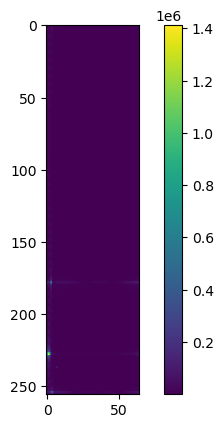

In [99]:
complex_array = []
real_array = []
im_array = []

for range_idx in range(len(range_unscaled)):
    im = [to_16bit_signed_integer(wd>>16) for wd in range_unscaled[range_idx]]
    re = [to_16bit_signed_integer(wd & 0xffff) for wd in range_unscaled[range_idx]]
    real_array.append(re)
    im_array.append(im)
    temp = []
    for i in range(len(im)):
        temp.append(complex(re[i],im[i]))
    complex_array.append(temp)
    
complex_array = np.array(complex_array)
plt.imshow(abs(fft(complex_array,axis=0)))

# Add colorbar for reference
plt.colorbar()

# Display the plot
plt.show()

In [101]:
np.amax(real_array)

9093

# ORDERED WRITE TESTS

In [2]:
output_array = [[] for i in range(64)]

In [14]:
output_array[0].append(4)

In [15]:
print(output_array)

[[4, 4], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], 4]


In [7]:
a = 8.7655
str(a)

'8.7655'

In [6]:
with open("testfile.txt", "w") as text_file:
    text_file.write(str(output_array))